In [1]:
# from tqdm import tqdm
# import os
# import numpy as np
# from PIL import Image
# import torch
# from torchvision import transforms
# from transformers import ViTForImageClassification
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import pairwise_distances
# from scipy.special import kl_div as scipy_kl_div
# from scipy.special import softmax

# def predict_scores_for_classes(model, img_path):
#     if not os.path.exists(img_path):
#         return None
#     img = Image.open(img_path)
#     img = img.resize((384, 384))
#     img_tensor = transforms.ToTensor()(img).unsqueeze(0).to(device)
#     logits = model(img_tensor).logits[0].cpu().detach().numpy()
#     return logits

# def get_top_n_classes(scores, n=5):
#     return set(np.argsort(scores)[-n:])

# def calculate_jaccard_similarity(set1, set2):
#     return len(set1.intersection(set2)) / len(set1.union(set2))

# def calculate_dice_similarity(set1, set2):
#     return 2 * len(set1.intersection(set2)) / (len(set1) + len(set2))

# def calculate_cosine_similarity(vec1, vec2):
#     similarity = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]
#     # 归一化到 [0, 1]
#     normalized_similarity = (similarity + 1) / 2
#     return normalized_similarity

# def calculate_euclidean_distance(vec1, vec2):
#     distance = pairwise_distances(vec1.reshape(1, -1), vec2.reshape(1, -1), metric='euclidean')[0][0]
#     # 归一化
#     normalized_distance = distance / np.sqrt(len(vec1))
#     return normalized_distance

# def calculate_kl_divergence(vec1, vec2):
#     # 将向量转换为概率分布
#     prob1 = softmax(vec1)
#     prob2 = softmax(vec2)
    
#     kl_div_value = scipy_kl_div(prob1, prob2).sum()
#     # 归一化
#     normalized_kl_div = kl_div_value / np.log(len(vec1))
#     return normalized_kl_div

# def calculate_weighted_jaccard_similarity(vec1, vec2):
#     min_sum = sum([min(a, b) for a, b in zip(vec1, vec2)])
#     max_sum = sum([max(a, b) for a, b in zip(vec1, vec2)])
#     return min_sum / max_sum if max_sum != 0 else 0


# def calculate_similarities(original_scores, masked_scores, top_n_values=[1, 5, 10, 50], metrics=["jaccard", "dice", "cosine", "euclidean", "kl", "weighted_jaccard"]):
#     results = {}
    
#     for n in top_n_values:
#         top_n_original = get_top_n_classes(original_scores, n)
#         top_n_masked = get_top_n_classes(masked_scores, n)
        
#         for metric in metrics:
#             if metric == "jaccard":
#                 jaccard_similarity = calculate_jaccard_similarity(top_n_original, top_n_masked)
#                 results[f"Jaccard_Top_{n}"] = jaccard_similarity
            
#             if metric == "dice":
#                 dice_similarity = calculate_dice_similarity(top_n_original, top_n_masked)
#                 results[f"Dice_Top_{n}"] = dice_similarity
                
#             if metric == "cosine":
#                 cosine_sim = calculate_cosine_similarity(original_scores, masked_scores)
#                 results[f"Cosine_Top_{n}"] = cosine_sim

#             if metric == "euclidean":
#                 euclidean_dist = calculate_euclidean_distance(original_scores, masked_scores)
#                 results[f"Euclidean_Top_{n}"] = euclidean_dist

#             if metric == "kl":
#                 kl_div = calculate_kl_divergence(original_scores, masked_scores)
#                 results[f"KL_Top_{n}"] = kl_div

#             if metric == "weighted_jaccard":
#                 for n in top_n_values:
#                     original_top_n = sorted(original_scores.items(), key=lambda x: x[1], reverse=True)[:n]
#                     masked_top_n = sorted(masked_scores.items(), key=lambda x: x[1], reverse=True)[:n]
                    
#                     original_top_n_values = [score for _, score in original_top_n]
#                     masked_top_n_values = [score for _, score in masked_top_n]
                    
#                     weighted_jaccard_sim = calculate_weighted_jaccard_similarity(original_top_n_values, masked_top_n_values)
#                     results[f"Weighted_Jaccard_Top_{n}"] = weighted_jaccard_sim
               
                
#     return results


# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = ViTForImageClassification.from_pretrained('google/vit-large-patch32-384').to(device)

# masking_root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked"

# # Metrics to calculate
# selected_metrics = ["jaccard", "dice", "cosine", "euclidean", "kl"]

# for subfolder in tqdm(os.listdir(masking_root_folder)):
#     subfolder_path = os.path.join(masking_root_folder, subfolder)
    
#     if os.path.isdir(subfolder_path):
#         original_image_path = os.path.join(subfolder_path, 'original.jpg')
#         masked_image_path = os.path.join(subfolder_path, 'masked_image.jpg')
        
#         original_scores = predict_scores_for_classes(model, original_image_path)
#         masked_scores = predict_scores_for_classes(model, masked_image_path)
        
#         if original_scores is None or masked_scores is None:
#             print(f"Skipping folder {subfolder_path} due to missing scores.")
#             continue
        
#         similarities = calculate_similarities(original_scores, masked_scores, metrics=selected_metrics)
#         print(similarities)
#         np.save(os.path.join(subfolder_path, 'similarity_metrics.npy'), similarities)
        
#         print(f"Saved similarity metrics in {subfolder_path}")


In [2]:
#all
from tqdm import tqdm
import os
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
from transformers import ViTForImageClassification
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.special import kl_div as scipy_kl_div
from scipy.special import softmax

def predict_scores_for_classes(model, img_path):
    if not os.path.exists(img_path):
        return None
    img = Image.open(img_path)
    img = img.resize((384, 384))
    img_tensor = transforms.ToTensor()(img).unsqueeze(0).to(device)
    logits = model(img_tensor).logits[0].cpu().detach().numpy()
    return logits

def get_top_n_classes(scores, n=5):
    return set(np.argsort(scores)[-n:])

def calculate_jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

def calculate_dice_similarity(set1, set2):
    return 2 * len(set1.intersection(set2)) / (len(set1) + len(set2))

def calculate_cosine_similarity(vec1, vec2):
    similarity = cosine_similarity(vec1.reshape(1, -1), vec2.reshape(1, -1))[0][0]
    normalized_similarity = (similarity + 1) / 2
    return normalized_similarity

def calculate_euclidean_distance(vec1, vec2):
    distance = pairwise_distances(vec1.reshape(1, -1), vec2.reshape(1, -1), metric='euclidean')[0][0]
    normalized_distance = distance / np.sqrt(len(vec1))
    return normalized_distance

def calculate_kl_divergence(vec1, vec2):
    prob1 = softmax(vec1)
    prob2 = softmax(vec2)
    
    kl_div_value = scipy_kl_div(prob1, prob2).sum()
    normalized_kl_div = kl_div_value / np.log(len(vec1))
    return normalized_kl_div

def calculate_weighted_jaccard_similarity(vec1, vec2):
    min_sum = sum([min(a, b) for a, b in zip(vec1, vec2)])
    max_sum = sum([max(a, b) for a, b in zip(vec1, vec2)])
    return min_sum / max_sum if max_sum != 0 else 0

def calculate_prediction_changes(original_scores, masked_scores, top_n_indices):
    # Assuming top_n_indices contains only one index for top1
    idx = top_n_indices[0]
    
    original_score = original_scores[idx]
    masked_score = masked_scores[idx]
    
    change = max(0, original_score - masked_score)  # Set to 0 if negative
    
    # Calculate the percentage change
    if original_score > 0:
        percentage = change / original_score
    elif original_score < 0:
        percentage = change / abs(original_score)
    else:
        percentage = 0
    
    return change, percentage




def calculate_similarities(original_scores, masked_scores, top_n_values=[1, 5, 10, 50], metrics=["jaccard", "dice", "cosine", "euclidean", "kl", "weighted_jaccard", "prediction_change"]):
    results = {}
    
    for n in top_n_values:
        top_n_original = get_top_n_classes(original_scores, n)
        top_n_masked = get_top_n_classes(masked_scores, n)
        top_n_original_indices = np.argsort(original_scores)[-n:]

        for metric in metrics:
            if metric == "jaccard":
                jaccard_similarity = calculate_jaccard_similarity(top_n_original, top_n_masked)
                results[f"Jaccard_Top_{n}"] = jaccard_similarity
            
            if metric == "dice":
                dice_similarity = calculate_dice_similarity(top_n_original, top_n_masked)
                results[f"Dice_Top_{n}"] = dice_similarity
                
            if metric == "cosine":
                cosine_sim = calculate_cosine_similarity(original_scores, masked_scores)
                results[f"Cosine_Top_{n}"] = cosine_sim

            if metric == "euclidean":
                euclidean_dist = calculate_euclidean_distance(original_scores, masked_scores)
                results[f"Euclidean_Top_{n}"] = euclidean_dist

            if metric == "kl":
                kl_div = calculate_kl_divergence(original_scores, masked_scores)
                results[f"KL_Top_{n}"] = kl_div

            if metric == "weighted_jaccard":
                for n in top_n_values:
                    original_top_n_indices = np.argsort(original_scores)[-n:]
                    original_top_n_values = original_scores[original_top_n_indices]
                    
                    masked_top_n_indices = np.argsort(masked_scores)[-n:]
                    masked_top_n_values = masked_scores[masked_top_n_indices]
                    
                    weighted_jaccard_sim = calculate_weighted_jaccard_similarity(original_top_n_values, masked_top_n_values)
                    results[f"Weighted_Jaccard_Top_{n}"] = weighted_jaccard_sim

            if metric == "prediction_change":
                prediction_change, prediction_change_percentage = calculate_prediction_changes(original_scores, masked_scores, top_n_original_indices)
                results["Prediction_Change_Top1"] = prediction_change
                results["Prediction_Change_Percentage_Top1"] = prediction_change_percentage

                
    return results


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTForImageClassification.from_pretrained('google/vit-large-patch32-384').to(device)

masking_root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/evaluation/google/vit-large-patch32-384/GradCAM"

# Metrics to calculate
selected_metrics = ["jaccard", "dice", "cosine", "euclidean", "kl", "weighted_jaccard", "prediction_change"]

for subfolder in tqdm(os.listdir(masking_root_folder)):
    subfolder_path = os.path.join(masking_root_folder, subfolder)
    
    
    if os.path.isdir(subfolder_path):
        original_image_path = os.path.join(subfolder_path, 'original.jpg')
        masked_image_path = os.path.join(subfolder_path, 'masked_image.jpg')
        
        original_scores = predict_scores_for_classes(model, original_image_path)
        masked_scores = predict_scores_for_classes(model, masked_image_path)
        
        if original_scores is None or masked_scores is None:
            print(f"Skipping folder {subfolder_path} due to missing scores.")
            continue
        
        similarities = calculate_similarities(original_scores, masked_scores, metrics=selected_metrics)
        print(similarities)


        np.save(os.path.join(subfolder_path, 'similarity_metrics.npy'), similarities)

        # Load back and print to verify
        loaded_similarities = np.load(os.path.join(subfolder_path, 'similarity_metrics.npy'), allow_pickle=True).item()
        print(f"Loaded similarities: {loaded_similarities}")  # Debug print

        print(f"Saved similarity metrics in {subfolder_path}")




/home/workstation/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 2/3897 [00:03<1:25:53,  1.32s/it]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9552827477455139, 'Euclidean_Top_1': 0.5806920900236462, 'KL_Top_1': 0.06302902377385784, 'Weighted_Jaccard_Top_1': 0.9754781007632112, 'Weighted_Jaccard_Top_5': 0.9309767074885502, 'Weighted_Jaccard_Top_10': 0.9271451105467203, 'Weighted_Jaccard_Top_50': 0.9515393973013765, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9552827477455139, 'Euclidean_Top_5': 0.5806920900236462, 'KL_Top_5': 0.06302902377385784, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9552827477455139, 'Euclidean_Top_10': 0.5806920900236462, 'KL_Top_10': 0.06302902377385784, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9552827477455139, 'Euclidean_Top_50': 0.5806920900236462, 'KL_Top_50': 0.06302902377385784}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9552827477

  0%|          | 6/3897 [00:03<20:19,  3.19it/s]  

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8962194323539734, 'Euclidean_Top_1': 0.9177019181742602, 'KL_Top_1': 0.0051612214826055975, 'Weighted_Jaccard_Top_1': 0.8251398415943578, 'Weighted_Jaccard_Top_5': 0.8276469114198407, 'Weighted_Jaccard_Top_10': 0.783202253661535, 'Weighted_Jaccard_Top_50': 0.6626163129327125, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8962194323539734, 'Euclidean_Top_5': 0.9177019181742602, 'KL_Top_5': 0.0051612214826055975, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8962194323539734, 'Euclidean_Top_10': 0.9177019181742602, 'KL_Top_10': 0.0051612214826055975, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.8962194323539734, 'Euclidean_Top_50': 0.9177019181742602, 'KL_Top_50': 0.0051612214826055975}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8

  0%|          | 10/3897 [00:03<10:17,  6.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8319110870361328, 'Euclidean_Top_1': 1.2294049240304514, 'KL_Top_1': 0.7649988409227463, 'Weighted_Jaccard_Top_1': 0.7777088083429892, 'Weighted_Jaccard_Top_5': 0.8735625305621835, 'Weighted_Jaccard_Top_10': 0.9169417984411421, 'Weighted_Jaccard_Top_50': 0.9566466663796362, 'Prediction_Change_Top1': 2.4549286, 'Prediction_Change_Percentage_Top1': 0.8014285, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8319110870361328, 'Euclidean_Top_5': 1.2294049240304514, 'KL_Top_5': 0.7649988409227463, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8319110870361328, 'Euclidean_Top_10': 1.2294049240304514, 'KL_Top_10': 0.7649988409227463, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8319110870361328, 'Euclidean_Top_50': 1.2294049240304514, 'KL_Top_50': 0.7649988409227463}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8319110870361328, 'Euclidean_

  0%|          | 12/3897 [00:03<08:01,  8.06it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5628122016787529, 'Euclidean_Top_1': 1.4308919185726534, 'KL_Top_1': 0.9387825290050068, 'Weighted_Jaccard_Top_1': 0.33589858552080526, 'Weighted_Jaccard_Top_5': 0.596693927708, 'Weighted_Jaccard_Top_10': 0.6942829941196683, 'Weighted_Jaccard_Top_50': 0.8180600715993431, 'Prediction_Change_Top1': 2.4655006, 'Prediction_Change_Percentage_Top1': 1.5944253, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5628122016787529, 'Euclidean_Top_5': 1.4308919185726534, 'KL_Top_5': 0.9387825290050068, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.5628122016787529, 'Euclidean_Top_10': 1.4308919185726534, 'KL_Top_10': 0.9387825290050068, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.5628122016787529, 'Euclidean_Top_50': 1.4308919185726534, 'KL_Top_50': 0.9387825290050068}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.56281220167875

  0%|          | 16/3897 [00:04<05:55, 10.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8453848659992218, 'Euclidean_Top_1': 1.1808189712899708, 'KL_Top_1': 0.537124868874078, 'Weighted_Jaccard_Top_1': 0.5535213451689707, 'Weighted_Jaccard_Top_5': 0.7344619398618862, 'Weighted_Jaccard_Top_10': 0.7902901914504248, 'Weighted_Jaccard_Top_50': 0.826137987367199, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8453848659992218, 'Euclidean_Top_5': 1.1808189712899708, 'KL_Top_5': 0.537124868874078, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8453848659992218, 'Euclidean_Top_10': 1.1808189712899708, 'KL_Top_10': 0.537124868874078, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8453848659992218, 'Euclidean_Top_50': 1.1808189712899708, 'KL_Top_50': 0.537124868874078}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8453848659992218, 'Euclidean_Top

  1%|          | 20/3897 [00:04<04:56, 13.08it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9768522083759308, 'Euclidean_Top_1': 0.2892351210333263, 'KL_Top_1': 5.3051568872143325e-05, 'Weighted_Jaccard_Top_1': 0.9762332804023555, 'Weighted_Jaccard_Top_5': 0.9537675796781868, 'Weighted_Jaccard_Top_10': 0.9424997990996734, 'Weighted_Jaccard_Top_50': 0.9444760928923707, 'Prediction_Change_Top1': 0.29245675, 'Prediction_Change_Percentage_Top1': 0.21910806, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9768522083759308, 'Euclidean_Top_5': 0.2892351210333263, 'KL_Top_5': 5.3051568872143325e-05, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9768522083759308, 'Euclidean_Top_10': 0.2892351210333263, 'KL_Top_10': 5.3051568872143325e-05, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9768522083759308, 'Euclidean_Top_50': 0.2892351210333263, 'KL_Top_50': 5.3051568872143325e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0

  1%|          | 24/3897 [00:04<04:23, 14.71it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.932984322309494, 'Euclidean_Top_1': 0.6449332135063018, 'KL_Top_1': 0.13265867609545573, 'Weighted_Jaccard_Top_1': 0.8998204683538872, 'Weighted_Jaccard_Top_5': 0.9284655644688231, 'Weighted_Jaccard_Top_10': 0.942529029645747, 'Weighted_Jaccard_Top_50': 0.8775603316349395, 'Prediction_Change_Top1': 0.2785864, 'Prediction_Change_Percentage_Top1': 0.15164475, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.932984322309494, 'Euclidean_Top_5': 0.6449332135063018, 'KL_Top_5': 0.13265867609545573, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.932984322309494, 'Euclidean_Top_10': 0.6449332135063018, 'KL_Top_10': 0.13265867609545573, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.932984322309494, 'Euclidean_Top_50': 0.6449332135063018, 'KL_Top_50': 0.13265867609545573}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

  1%|          | 28/3897 [00:04<04:25, 14.57it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8901407420635223, 'Euclidean_Top_1': 0.8825335458317748, 'KL_Top_1': 0.03688251318094374, 'Weighted_Jaccard_Top_1': 0.8334191337559744, 'Weighted_Jaccard_Top_5': 0.8470578340513994, 'Weighted_Jaccard_Top_10': 0.8354701888222673, 'Weighted_Jaccard_Top_50': 0.9116522541600519, 'Prediction_Change_Top1': 1.3454635, 'Prediction_Change_Percentage_Top1': 0.5736604, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8901407420635223, 'Euclidean_Top_5': 0.8825335458317748, 'KL_Top_5': 0.03688251318094374, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8901407420635223, 'Euclidean_Top_10': 0.8825335458317748, 'KL_Top_10': 0.03688251318094374, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8901407420635223, 'Euclidean_Top_50': 0.8825335458317748, 'KL_Top_50': 0.03688251318094374}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

  1%|          | 32/3897 [00:05<04:01, 15.99it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6886022984981537, 'Euclidean_Top_1': 1.4651676191513279, 'KL_Top_1': 0.7790922665450918, 'Weighted_Jaccard_Top_1': 0.6050946182675967, 'Weighted_Jaccard_Top_5': 0.57110921867299, 'Weighted_Jaccard_Top_10': 0.5074424334223806, 'Weighted_Jaccard_Top_50': 0.46247504892770097, 'Prediction_Change_Top1': 1.4637818, 'Prediction_Change_Percentage_Top1': 1.1481695, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6886022984981537, 'Euclidean_Top_5': 1.4651676191513279, 'KL_Top_5': 0.7790922665450918, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6886022984981537, 'Euclidean_Top_10': 1.4651676191513279, 'KL_Top_10': 0.7790922665450918, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6886022984981537, 'Euclidean_Top_50': 1.4651676191513279, 'KL_Top_50': 0.7790922665450918}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.68860229849815

  1%|          | 36/3897 [00:05<03:56, 16.35it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9022118449211121, 'Euclidean_Top_1': 0.8833507627052798, 'KL_Top_1': 0.48874264801036393, 'Weighted_Jaccard_Top_1': 0.8450236095564371, 'Weighted_Jaccard_Top_5': 0.80985617250214, 'Weighted_Jaccard_Top_10': 0.8604710765997604, 'Weighted_Jaccard_Top_50': 0.8733496081759238, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9022118449211121, 'Euclidean_Top_5': 0.8833507627052798, 'KL_Top_5': 0.48874264801036393, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9022118449211121, 'Euclidean_Top_10': 0.8833507627052798, 'KL_Top_10': 0.48874264801036393, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9022118449211121, 'Euclidean_Top_50': 0.8833507627052798, 'KL_Top_50': 0.48874264801036393}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.902211844921

  1%|          | 40/3897 [00:05<03:49, 16.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.835024893283844, 'Euclidean_Top_1': 0.9757243765087782, 'KL_Top_1': 0.6862163114350845, 'Weighted_Jaccard_Top_1': 0.4267000029076848, 'Weighted_Jaccard_Top_5': 0.7011277945777199, 'Weighted_Jaccard_Top_10': 0.7340623297003522, 'Weighted_Jaccard_Top_50': 0.7048312299517169, 'Prediction_Change_Top1': 0.39121306, 'Prediction_Change_Percentage_Top1': 0.22821906, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.835024893283844, 'Euclidean_Top_5': 0.9757243765087782, 'KL_Top_5': 0.6862163114350845, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.835024893283844, 'Euclidean_Top_10': 0.9757243765087782, 'KL_Top_10': 0.6862163114350845, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.835024893283844, 'Euclidean_Top_50': 0.9757243765087782, 'KL_Top_50': 0.6862163114350845}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.835024893283844

  1%|          | 44/3897 [00:05<03:55, 16.39it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9566879272460938, 'Euclidean_Top_1': 0.4248957457663617, 'KL_Top_1': 0.0008020900759020144, 'Weighted_Jaccard_Top_1': 0.8941319883819449, 'Weighted_Jaccard_Top_5': 0.8758278176088727, 'Weighted_Jaccard_Top_10': 0.8880459650079234, 'Weighted_Jaccard_Top_50': 0.8769161081720566, 'Prediction_Change_Top1': 0.18210709, 'Prediction_Change_Percentage_Top1': 0.13817337, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9566879272460938, 'Euclidean_Top_5': 0.4248957457663617, 'KL_Top_5': 0.0008020900759020144, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9566879272460938, 'Euclidean_Top_10': 0.4248957457663617, 'KL_Top_10': 0.0008020900759020144, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9566879272460938, 'Euclidean_Top_50': 0.4248957457663617, 'KL_Top_50': 0.0008020900759020144}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Co

  1%|          | 46/3897 [00:05<04:10, 15.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8181070685386658, 'Euclidean_Top_1': 1.21867368248493, 'KL_Top_1': 0.46701075634101036, 'Weighted_Jaccard_Top_1': 0.46511800389913494, 'Weighted_Jaccard_Top_5': 0.7059520799729617, 'Weighted_Jaccard_Top_10': 0.7765618806273359, 'Weighted_Jaccard_Top_50': 0.7329379029665115, 'Prediction_Change_Top1': 0.532089, 'Prediction_Change_Percentage_Top1': 0.25008887, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8181070685386658, 'Euclidean_Top_5': 1.21867368248493, 'KL_Top_5': 0.46701075634101036, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8181070685386658, 'Euclidean_Top_10': 1.21867368248493, 'KL_Top_10': 0.46701075634101036, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8181070685386658, 'Euclidean_Top_50': 1.21867368248493, 'KL_Top_50': 0.46701075634101036}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8

  1%|▏         | 50/3897 [00:06<04:02, 15.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8903118968009949, 'Euclidean_Top_1': 0.9620789838640319, 'KL_Top_1': 0.09057477018410809, 'Weighted_Jaccard_Top_1': 0.859885817235488, 'Weighted_Jaccard_Top_5': 0.8152840161583014, 'Weighted_Jaccard_Top_10': 0.7900383838061558, 'Weighted_Jaccard_Top_50': 0.8662371999841493, 'Prediction_Change_Top1': 0.09592104, 'Prediction_Change_Percentage_Top1': 0.039469313, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8903118968009949, 'Euclidean_Top_5': 0.9620789838640319, 'KL_Top_5': 0.09057477018410809, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8903118968009949, 'Euclidean_Top_10': 0.9620789838640319, 'KL_Top_10': 0.09057477018410809, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.8903118968009949, 'Euclidean_Top_50': 0.9620789838640319, 'KL_Top_50': 0.09057477018410809}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

  1%|▏         | 54/3897 [00:06<03:46, 16.97it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7785089612007141, 'Euclidean_Top_1': 1.4134232972054284, 'KL_Top_1': 0.9225725285541769, 'Weighted_Jaccard_Top_1': 0.750502753572446, 'Weighted_Jaccard_Top_5': 0.9015964680617395, 'Weighted_Jaccard_Top_10': 0.9292859628017096, 'Weighted_Jaccard_Top_50': 0.9641465747770392, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7785089612007141, 'Euclidean_Top_5': 1.4134232972054284, 'KL_Top_5': 0.9225725285541769, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7785089612007141, 'Euclidean_Top_10': 1.4134232972054284, 'KL_Top_10': 0.9225725285541769, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7785089612007141, 'Euclidean_Top_50': 1.4134232972054284, 'KL_Top_50': 0.9225725285541769}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.778508961200

  1%|▏         | 58/3897 [00:06<03:36, 17.72it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9039595425128937, 'Euclidean_Top_1': 0.9040678045578809, 'KL_Top_1': 0.06169225942673823, 'Weighted_Jaccard_Top_1': 0.6997189350511002, 'Weighted_Jaccard_Top_5': 0.8110471927926145, 'Weighted_Jaccard_Top_10': 0.8464792495677372, 'Weighted_Jaccard_Top_50': 0.8946395929829238, 'Prediction_Change_Top1': 0.7303022, 'Prediction_Change_Percentage_Top1': 0.31066757, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9039595425128937, 'Euclidean_Top_5': 0.9040678045578809, 'KL_Top_5': 0.06169225942673823, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9039595425128937, 'Euclidean_Top_10': 0.9040678045578809, 'KL_Top_10': 0.06169225942673823, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9039595425128937, 'Euclidean_Top_50': 0.9040678045578809, 'KL_Top_50': 0.06169225942673823}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.903959

  2%|▏         | 62/3897 [00:06<03:45, 17.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7847837209701538, 'Euclidean_Top_1': 1.2323940474947044, 'KL_Top_1': 0.9323327121087094, 'Weighted_Jaccard_Top_1': 0.44702324153777956, 'Weighted_Jaccard_Top_5': 0.642588857213615, 'Weighted_Jaccard_Top_10': 0.6966305597912207, 'Weighted_Jaccard_Top_50': 0.8041178383724781, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7847837209701538, 'Euclidean_Top_5': 1.2323940474947044, 'KL_Top_5': 0.9323327121087094, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7847837209701538, 'Euclidean_Top_10': 1.2323940474947044, 'KL_Top_10': 0.9323327121087094, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7847837209701538, 'Euclidean_Top_50': 1.2323940474947044, 'KL_Top_50': 0.9323327121087094}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7847837209701538, 'Euclidean_Top_1': 1.232

  2%|▏         | 66/3897 [00:07<03:36, 17.71it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7433941066265106, 'Euclidean_Top_1': 1.638277543372535, 'KL_Top_1': 0.9405828808444727, 'Weighted_Jaccard_Top_1': 0.46738064695574383, 'Weighted_Jaccard_Top_5': 0.7056764541815025, 'Weighted_Jaccard_Top_10': 0.6776483087768734, 'Weighted_Jaccard_Top_50': 0.5979326123847415, 'Prediction_Change_Top1': 0.54904175, 'Prediction_Change_Percentage_Top1': 0.31579694, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7433941066265106, 'Euclidean_Top_5': 1.638277543372535, 'KL_Top_5': 0.9405828808444727, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7433941066265106, 'Euclidean_Top_10': 1.638277543372535, 'KL_Top_10': 0.9405828808444727, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7433941066265106, 'Euclidean_Top_50': 1.638277543372535, 'KL_Top_50': 0.9405828808444727}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7433941066265106, 'Euclidean_

  2%|▏         | 70/3897 [00:07<03:46, 16.93it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8413245975971222, 'Euclidean_Top_1': 1.1682645079825251, 'KL_Top_1': 0.06160879875054083, 'Weighted_Jaccard_Top_1': 0.6073148287987271, 'Weighted_Jaccard_Top_5': 0.7835515643986051, 'Weighted_Jaccard_Top_10': 0.760332459606026, 'Weighted_Jaccard_Top_50': 0.663542946590815, 'Prediction_Change_Top1': 0.19488597, 'Prediction_Change_Percentage_Top1': 0.11165438, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8413245975971222, 'Euclidean_Top_5': 1.1682645079825251, 'KL_Top_5': 0.06160879875054083, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8413245975971222, 'Euclidean_Top_10': 1.1682645079825251, 'KL_Top_10': 0.06160879875054083, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8413245975971222, 'Euclidean_Top_50': 1.1682645079825251, 'KL_Top_50': 0.06160879875054083}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8413245975

  2%|▏         | 74/3897 [00:07<04:17, 14.87it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6827473789453506, 'Euclidean_Top_1': 1.5329906484019347, 'KL_Top_1': 1.1710934940825217, 'Weighted_Jaccard_Top_1': 0.506933076524839, 'Weighted_Jaccard_Top_5': 0.7201125594321309, 'Weighted_Jaccard_Top_10': 0.7993127171069765, 'Weighted_Jaccard_Top_50': 0.800077453122823, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6827473789453506, 'Euclidean_Top_5': 1.5329906484019347, 'KL_Top_5': 1.1710934940825217, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6827473789453506, 'Euclidean_Top_10': 1.5329906484019347, 'KL_Top_10': 1.1710934940825217, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.6827473789453506, 'Euclidean_Top_50': 1.5329906484019347, 'KL_Top_50': 1.1710934940825217}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6827473789453506, 'Euclidean_Top_1': 1.53299

  2%|▏         | 78/3897 [00:07<04:00, 15.86it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8522555828094482, 'Euclidean_Top_1': 0.8538485037522651, 'KL_Top_1': 0.2120825131909767, 'Weighted_Jaccard_Top_1': 0.5235571834226133, 'Weighted_Jaccard_Top_5': 0.7265843930547727, 'Weighted_Jaccard_Top_10': 0.8037275684264417, 'Weighted_Jaccard_Top_50': 0.8913603371344162, 'Prediction_Change_Top1': 1.5629131, 'Prediction_Change_Percentage_Top1': 0.8465417, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8522555828094482, 'Euclidean_Top_5': 0.8538485037522651, 'KL_Top_5': 0.2120825131909767, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8522555828094482, 'Euclidean_Top_10': 0.8538485037522651, 'KL_Top_10': 0.2120825131909767, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8522555828094482, 'Euclidean_Top_50': 0.8538485037522651, 'KL_Top_50': 0.2120825131909767}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.852255582809

  2%|▏         | 82/3897 [00:08<04:01, 15.77it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.611151210963726, 'Euclidean_Top_1': 1.2108073141446445, 'KL_Top_1': 0.9717536594295492, 'Weighted_Jaccard_Top_1': 0.3824378151897452, 'Weighted_Jaccard_Top_5': 0.5111227127102171, 'Weighted_Jaccard_Top_10': 0.549085215988416, 'Weighted_Jaccard_Top_50': 0.5908707796730657, 'Prediction_Change_Top1': 0.028609514, 'Prediction_Change_Percentage_Top1': 0.023172183, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.611151210963726, 'Euclidean_Top_5': 1.2108073141446445, 'KL_Top_5': 0.9717536594295492, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.611151210963726, 'Euclidean_Top_10': 1.2108073141446445, 'KL_Top_10': 0.9717536594295492, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.611151210963726, 'Euclidean_Top_50': 1.2108073141446445, 'KL_Top_50': 0.9717536594295492}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.611151210963726, 'Euclidean_T

  2%|▏         | 86/3897 [00:08<03:58, 15.96it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.889483779668808, 'Euclidean_Top_1': 1.0100622625326208, 'KL_Top_1': 0.06816570589778542, 'Weighted_Jaccard_Top_1': 0.7314643550149293, 'Weighted_Jaccard_Top_5': 0.7871458308868728, 'Weighted_Jaccard_Top_10': 0.7697988663811055, 'Weighted_Jaccard_Top_50': 0.7093945886589142, 'Prediction_Change_Top1': 1.5993264, 'Prediction_Change_Percentage_Top1': 0.7791461, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.889483779668808, 'Euclidean_Top_5': 1.0100622625326208, 'KL_Top_5': 0.06816570589778542, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.889483779668808, 'Euclidean_Top_10': 1.0100622625326208, 'KL_Top_10': 0.06816570589778542, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.889483779668808, 'Euclidean_Top_50': 1.0100622625326208, 'KL_Top_50': 0.06816570589778542}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

  2%|▏         | 90/3897 [00:08<04:05, 15.49it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.704066202044487, 'Euclidean_Top_1': 1.502763214272143, 'KL_Top_1': 0.6548561856203906, 'Weighted_Jaccard_Top_1': 0.7878779475104549, 'Weighted_Jaccard_Top_5': 0.8591705243354393, 'Weighted_Jaccard_Top_10': 0.8727427281373479, 'Weighted_Jaccard_Top_50': 0.8681169864911504, 'Prediction_Change_Top1': 0.89945316, 'Prediction_Change_Percentage_Top1': 0.40268362, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.704066202044487, 'Euclidean_Top_5': 1.502763214272143, 'KL_Top_5': 0.6548561856203906, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.704066202044487, 'Euclidean_Top_10': 1.502763214272143, 'KL_Top_10': 0.6548561856203906, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.704066202044487, 'Euclidean_Top_50': 1.502763214272143, 'KL_Top_50': 0.6548561856203906}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.704066202044487, 'Euclidean_Top_1':

  2%|▏         | 94/3897 [00:08<04:01, 15.74it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8923396468162537, 'Euclidean_Top_1': 0.6510611035865655, 'KL_Top_1': 0.00026628541702866876, 'Weighted_Jaccard_Top_1': 0.9322100681592247, 'Weighted_Jaccard_Top_5': 0.7609670684029431, 'Weighted_Jaccard_Top_10': 0.7499866746625744, 'Weighted_Jaccard_Top_50': 0.7895490711076864, 'Prediction_Change_Top1': 0.34706956, 'Prediction_Change_Percentage_Top1': 0.26071152, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8923396468162537, 'Euclidean_Top_5': 0.6510611035865655, 'KL_Top_5': 0.00026628541702866876, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8923396468162537, 'Euclidean_Top_10': 0.6510611035865655, 'KL_Top_10': 0.00026628541702866876, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.8923396468162537, 'Euclidean_Top_50': 0.6510611035865655, 'KL_Top_50': 0.00026628541702866876}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0

  3%|▎         | 98/3897 [00:09<03:58, 15.96it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.966468870639801, 'Euclidean_Top_1': 0.45661777178610974, 'KL_Top_1': 0.0013804136174429208, 'Weighted_Jaccard_Top_1': 0.9375890689278872, 'Weighted_Jaccard_Top_5': 0.9441086063059955, 'Weighted_Jaccard_Top_10': 0.9578032628147558, 'Weighted_Jaccard_Top_50': 0.9165371421934144, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.966468870639801, 'Euclidean_Top_5': 0.45661777178610974, 'KL_Top_5': 0.0013804136174429208, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.966468870639801, 'Euclidean_Top_10': 0.45661777178610974, 'KL_Top_10': 0.0013804136174429208, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.966468870639801, 'Euclidean_Top_50': 0.45661777178610974, 'KL_Top_50': 0.0013804136174429208}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.966468870639801,

  3%|▎         | 102/3897 [00:09<04:03, 15.59it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7521308362483978, 'Euclidean_Top_1': 1.2884645704494622, 'KL_Top_1': 1.3224354282147974, 'Weighted_Jaccard_Top_1': 0.7712592041446968, 'Weighted_Jaccard_Top_5': 0.8586552673348451, 'Weighted_Jaccard_Top_10': 0.8045847639827796, 'Weighted_Jaccard_Top_50': 0.7164910740405548, 'Prediction_Change_Top1': 1.8952425, 'Prediction_Change_Percentage_Top1': 1.089085, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7521308362483978, 'Euclidean_Top_5': 1.2884645704494622, 'KL_Top_5': 1.3224354282147974, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7521308362483978, 'Euclidean_Top_10': 1.2884645704494622, 'KL_Top_10': 1.3224354282147974, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.7521308362483978, 'Euclidean_Top_50': 1.2884645704494622, 'KL_Top_50': 1.3224354282147974}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

  3%|▎         | 106/3897 [00:09<03:55, 16.08it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7233275771141052, 'Euclidean_Top_1': 1.4860656682987394, 'KL_Top_1': 1.040567191884883, 'Weighted_Jaccard_Top_1': 0.4432703399750736, 'Weighted_Jaccard_Top_5': 0.6075237978656164, 'Weighted_Jaccard_Top_10': 0.6143019619435965, 'Weighted_Jaccard_Top_50': 0.6361577083283315, 'Prediction_Change_Top1': 0.90951955, 'Prediction_Change_Percentage_Top1': 0.48228392, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7233275771141052, 'Euclidean_Top_5': 1.4860656682987394, 'KL_Top_5': 1.040567191884883, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7233275771141052, 'Euclidean_Top_10': 1.4860656682987394, 'KL_Top_10': 1.040567191884883, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.7233275771141052, 'Euclidean_Top_50': 1.4860656682987394, 'KL_Top_50': 1.040567191884883}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7233275771141052, 'Euclidean_To

  3%|▎         | 110/3897 [00:09<03:56, 16.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6451413184404373, 'Euclidean_Top_1': 1.24894623272819, 'KL_Top_1': 0.9293118541201849, 'Weighted_Jaccard_Top_1': 0.2981271079332703, 'Weighted_Jaccard_Top_5': 0.4258784817805178, 'Weighted_Jaccard_Top_10': 0.4996729800510932, 'Weighted_Jaccard_Top_50': 0.7175550053925959, 'Prediction_Change_Top1': 2.159624, 'Prediction_Change_Percentage_Top1': 1.3696431, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6451413184404373, 'Euclidean_Top_5': 1.24894623272819, 'KL_Top_5': 0.9293118541201849, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6451413184404373, 'Euclidean_Top_10': 1.24894623272819, 'KL_Top_10': 0.9293118541201849, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6451413184404373, 'Euclidean_Top_50': 1.24894623272819, 'KL_Top_50': 0.9293118541201849}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6451413

  3%|▎         | 114/3897 [00:10<03:45, 16.76it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8885579705238342, 'Euclidean_Top_1': 1.0853956167842038, 'KL_Top_1': 0.5968874242776465, 'Weighted_Jaccard_Top_1': 0.9441465057831984, 'Weighted_Jaccard_Top_5': 0.94888322806917, 'Weighted_Jaccard_Top_10': 0.9231823143836957, 'Weighted_Jaccard_Top_50': 0.8771112129032351, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8885579705238342, 'Euclidean_Top_5': 1.0853956167842038, 'KL_Top_5': 0.5968874242776465, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8885579705238342, 'Euclidean_Top_10': 1.0853956167842038, 'KL_Top_10': 0.5968874242776465, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8885579705238342, 'Euclidean_Top_50': 1.0853956167842038, 'KL_Top_50': 0.5968874242776465}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8885579705238342, 'Euclidean

  3%|▎         | 118/3897 [00:10<03:50, 16.42it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.958805114030838, 'Euclidean_Top_1': 0.5112588739212355, 'KL_Top_1': 0.11202409062326138, 'Weighted_Jaccard_Top_1': 0.9983603407470806, 'Weighted_Jaccard_Top_5': 0.8977357813279871, 'Weighted_Jaccard_Top_10': 0.8969367773635722, 'Weighted_Jaccard_Top_50': 0.9050409072458792, 'Prediction_Change_Top1': 0.04726398, 'Prediction_Change_Percentage_Top1': 0.026434409, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.958805114030838, 'Euclidean_Top_5': 0.5112588739212355, 'KL_Top_5': 0.11202409062326138, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.958805114030838, 'Euclidean_Top_10': 0.5112588739212355, 'KL_Top_10': 0.11202409062326138, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.958805114030838, 'Euclidean_Top_50': 0.5112588739212355, 'KL_Top_50': 0.11202409062326138}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

  3%|▎         | 120/3897 [00:10<03:50, 16.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.755319356918335, 'Euclidean_Top_1': 1.2501015188744085, 'KL_Top_1': 0.6985287824368933, 'Weighted_Jaccard_Top_1': 0.35182720837202947, 'Weighted_Jaccard_Top_5': 0.6667656783758208, 'Weighted_Jaccard_Top_10': 0.77233018633005, 'Weighted_Jaccard_Top_50': 0.8293378134884914, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.755319356918335, 'Euclidean_Top_5': 1.2501015188744085, 'KL_Top_5': 0.6985287824368933, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.755319356918335, 'Euclidean_Top_10': 1.2501015188744085, 'KL_Top_10': 0.6985287824368933, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.755319356918335, 'Euclidean_Top_50': 1.2501015188744085, 'KL_Top_50': 0.6985287824368933}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.755319356918335, '

  3%|▎         | 124/3897 [00:10<04:02, 15.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7875014245510101, 'Euclidean_Top_1': 1.3859197182684544, 'KL_Top_1': 0.5540779691888644, 'Weighted_Jaccard_Top_1': 0.7793244552882975, 'Weighted_Jaccard_Top_5': 0.7280104697588548, 'Weighted_Jaccard_Top_10': 0.726712123497591, 'Weighted_Jaccard_Top_50': 0.7645781329203019, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7875014245510101, 'Euclidean_Top_5': 1.3859197182684544, 'KL_Top_5': 0.5540779691888644, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7875014245510101, 'Euclidean_Top_10': 1.3859197182684544, 'KL_Top_10': 0.5540779691888644, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7875014245510101, 'Euclidean_Top_50': 1.3859197182684544, 'KL_Top_50': 0.5540779691888644}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7875014245510101, 'Euclidean

  3%|▎         | 128/3897 [00:10<04:03, 15.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.529558589681983, 'Euclidean_Top_1': 1.4279848244056155, 'KL_Top_1': 1.0035432162013889, 'Weighted_Jaccard_Top_1': 0.3204863979634634, 'Weighted_Jaccard_Top_5': 0.6463627860986538, 'Weighted_Jaccard_Top_10': 0.7440823372944703, 'Weighted_Jaccard_Top_50': 0.8742521177962118, 'Prediction_Change_Top1': 1.8921175, 'Prediction_Change_Percentage_Top1': 1.051534, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.529558589681983, 'Euclidean_Top_5': 1.4279848244056155, 'KL_Top_5': 1.0035432162013889, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.529558589681983, 'Euclidean_Top_10': 1.4279848244056155, 'KL_Top_10': 1.0035432162013889, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.529558589681983, 'Euclidean_Top_50': 1.4279848244056155, 'KL_Top_50': 1.0035432162013889}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.529558589681983, 'Euclidean_Top_1'

  3%|▎         | 132/3897 [00:11<04:04, 15.39it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9250002205371857, 'Euclidean_Top_1': 0.5837180663559862, 'KL_Top_1': 0.0005179811248074913, 'Weighted_Jaccard_Top_1': 0.9302071924504951, 'Weighted_Jaccard_Top_5': 0.9256346662857259, 'Weighted_Jaccard_Top_10': 0.8992551090681802, 'Weighted_Jaccard_Top_50': 0.8660667080607523, 'Prediction_Change_Top1': 0.82086474, 'Prediction_Change_Percentage_Top1': 0.48427626, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9250002205371857, 'Euclidean_Top_5': 0.5837180663559862, 'KL_Top_5': 0.0005179811248074913, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9250002205371857, 'Euclidean_Top_10': 0.5837180663559862, 'KL_Top_10': 0.0005179811248074913, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9250002205371857, 'Euclidean_Top_50': 0.5837180663559862, 'KL_Top_50': 0.0005179811248074913}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

  3%|▎         | 136/3897 [00:11<04:18, 14.54it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7467155754566193, 'Euclidean_Top_1': 1.2490925585186632, 'KL_Top_1': 0.6381794093887828, 'Weighted_Jaccard_Top_1': 0.7936676981649179, 'Weighted_Jaccard_Top_5': 0.773262889346711, 'Weighted_Jaccard_Top_10': 0.7495666672347621, 'Weighted_Jaccard_Top_50': 0.725429384609701, 'Prediction_Change_Top1': 0.9635438, 'Prediction_Change_Percentage_Top1': 0.35240257, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7467155754566193, 'Euclidean_Top_5': 1.2490925585186632, 'KL_Top_5': 0.6381794093887828, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7467155754566193, 'Euclidean_Top_10': 1.2490925585186632, 'KL_Top_10': 0.6381794093887828, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7467155754566193, 'Euclidean_Top_50': 1.2490925585186632, 'KL_Top_50': 0.6381794093887828}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7467155754566193, 'Euclidean_

  4%|▎         | 140/3897 [00:11<04:08, 15.13it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8323618471622467, 'Euclidean_Top_1': 1.2135562606519044, 'KL_Top_1': 0.17183733938146, 'Weighted_Jaccard_Top_1': 0.5262781813427085, 'Weighted_Jaccard_Top_5': 0.7007860422733239, 'Weighted_Jaccard_Top_10': 0.7872210145970202, 'Weighted_Jaccard_Top_50': 0.7163256538136109, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8323618471622467, 'Euclidean_Top_5': 1.2135562606519044, 'KL_Top_5': 0.17183733938146, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8323618471622467, 'Euclidean_Top_10': 1.2135562606519044, 'KL_Top_10': 0.17183733938146, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8323618471622467, 'Euclidean_Top_50': 1.2135562606519044, 'KL_Top_50': 0.17183733938146}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8323618471622467, 'Eu

  4%|▎         | 144/3897 [00:12<04:06, 15.24it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8299289345741272, 'Euclidean_Top_1': 0.9323437858331902, 'KL_Top_1': 0.35914862033317696, 'Weighted_Jaccard_Top_1': 0.673845328890848, 'Weighted_Jaccard_Top_5': 0.7222819969394596, 'Weighted_Jaccard_Top_10': 0.729653746411284, 'Weighted_Jaccard_Top_50': 0.68658752381747, 'Prediction_Change_Top1': 0.9841212, 'Prediction_Change_Percentage_Top1': 0.6984859, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8299289345741272, 'Euclidean_Top_5': 0.9323437858331902, 'KL_Top_5': 0.35914862033317696, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8299289345741272, 'Euclidean_Top_10': 0.9323437858331902, 'KL_Top_10': 0.35914862033317696, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8299289345741272, 'Euclidean_Top_50': 0.9323437858331902, 'KL_Top_50': 0.35914862033317696}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

  4%|▍         | 148/3897 [00:12<04:01, 15.54it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9333145022392273, 'Euclidean_Top_1': 0.7234339843122612, 'KL_Top_1': 0.017338683677341184, 'Weighted_Jaccard_Top_1': 0.891692226147227, 'Weighted_Jaccard_Top_5': 0.8992417274836827, 'Weighted_Jaccard_Top_10': 0.9101022798754486, 'Weighted_Jaccard_Top_50': 0.8823710729102672, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9333145022392273, 'Euclidean_Top_5': 0.7234339843122612, 'KL_Top_5': 0.017338683677341184, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9333145022392273, 'Euclidean_Top_10': 0.7234339843122612, 'KL_Top_10': 0.017338683677341184, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9333145022392273, 'Euclidean_Top_50': 0.7234339843122612, 'KL_Top_50': 0.017338683677341184}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93331

  4%|▍         | 152/3897 [00:12<03:46, 16.53it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9253757894039154, 'Euclidean_Top_1': 0.6500373055785299, 'KL_Top_1': 0.027612685367166268, 'Weighted_Jaccard_Top_1': 0.9438735994370957, 'Weighted_Jaccard_Top_5': 0.935565843863046, 'Weighted_Jaccard_Top_10': 0.889299011153506, 'Weighted_Jaccard_Top_50': 0.855954567237843, 'Prediction_Change_Top1': 0.3677745, 'Prediction_Change_Percentage_Top1': 0.16172282, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9253757894039154, 'Euclidean_Top_5': 0.6500373055785299, 'KL_Top_5': 0.027612685367166268, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9253757894039154, 'Euclidean_Top_10': 0.6500373055785299, 'KL_Top_10': 0.027612685367166268, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9253757894039154, 'Euclidean_Top_50': 0.6500373055785299, 'KL_Top_50': 0.027612685367166268}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.92537

  4%|▍         | 156/3897 [00:12<03:39, 17.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8324986100196838, 'Euclidean_Top_1': 1.3427959516719414, 'KL_Top_1': 0.6010983465164831, 'Weighted_Jaccard_Top_1': 0.4975379062006538, 'Weighted_Jaccard_Top_5': 0.6027772096596836, 'Weighted_Jaccard_Top_10': 0.6386000545852031, 'Weighted_Jaccard_Top_50': 0.8067908051056476, 'Prediction_Change_Top1': 0.8014028, 'Prediction_Change_Percentage_Top1': 0.27060494, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8324986100196838, 'Euclidean_Top_5': 1.3427959516719414, 'KL_Top_5': 0.6010983465164831, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.8324986100196838, 'Euclidean_Top_10': 1.3427959516719414, 'KL_Top_10': 0.6010983465164831, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.8324986100196838, 'Euclidean_Top_50': 1.3427959516719414, 'KL_Top_50': 0.6010983465164831}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8324986100196838, 'Euclidea

  4%|▍         | 160/3897 [00:12<03:37, 17.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7792778611183167, 'Euclidean_Top_1': 1.1483248746680157, 'KL_Top_1': 0.6473025910348534, 'Weighted_Jaccard_Top_1': 0.6863365364015905, 'Weighted_Jaccard_Top_5': 0.8195691584242898, 'Weighted_Jaccard_Top_10': 0.7711571771563835, 'Weighted_Jaccard_Top_50': 0.6444362577456844, 'Prediction_Change_Top1': 1.4091208, 'Prediction_Change_Percentage_Top1': 0.8971719, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7792778611183167, 'Euclidean_Top_5': 1.1483248746680157, 'KL_Top_5': 0.6473025910348534, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7792778611183167, 'Euclidean_Top_10': 1.1483248746680157, 'KL_Top_10': 0.6473025910348534, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.7792778611183167, 'Euclidean_Top_50': 1.1483248746680157, 'KL_Top_50': 0.6473025910348534}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

  4%|▍         | 164/3897 [00:13<03:40, 16.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8729716539382935, 'Euclidean_Top_1': 1.0424570192630218, 'KL_Top_1': 0.15510711725392384, 'Weighted_Jaccard_Top_1': 0.9587495985626372, 'Weighted_Jaccard_Top_5': 0.947350425726339, 'Weighted_Jaccard_Top_10': 0.8957782858260886, 'Weighted_Jaccard_Top_50': 0.764345189411391, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8729716539382935, 'Euclidean_Top_5': 1.0424570192630218, 'KL_Top_5': 0.15510711725392384, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8729716539382935, 'Euclidean_Top_10': 1.0424570192630218, 'KL_Top_10': 0.15510711725392384, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8729716539382935, 'Euclidean_Top_50': 1.0424570192630218, 'KL_Top_50': 0.15510711725392384}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.872971653

  4%|▍         | 168/3897 [00:13<03:52, 16.07it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9023296236991882, 'Euclidean_Top_1': 1.0049311490448396, 'KL_Top_1': 0.21187218106970634, 'Weighted_Jaccard_Top_1': 0.7756761804111743, 'Weighted_Jaccard_Top_5': 0.7846716637480671, 'Weighted_Jaccard_Top_10': 0.7986926754271193, 'Weighted_Jaccard_Top_50': 0.8399817469927578, 'Prediction_Change_Top1': 0.5073168, 'Prediction_Change_Percentage_Top1': 0.16635172, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9023296236991882, 'Euclidean_Top_5': 1.0049311490448396, 'KL_Top_5': 0.21187218106970634, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9023296236991882, 'Euclidean_Top_10': 1.0049311490448396, 'KL_Top_10': 0.21187218106970634, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.9023296236991882, 'Euclidean_Top_50': 1.0049311490448396, 'KL_Top_50': 0.21187218106970634}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

  4%|▍         | 172/3897 [00:13<03:47, 16.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.867489367723465, 'Euclidean_Top_1': 1.1828670498313196, 'KL_Top_1': 0.41578359852948654, 'Weighted_Jaccard_Top_1': 0.7918943038916685, 'Weighted_Jaccard_Top_5': 0.8575166840475732, 'Weighted_Jaccard_Top_10': 0.9050761615083457, 'Weighted_Jaccard_Top_50': 0.9259451643245802, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.867489367723465, 'Euclidean_Top_5': 1.1828670498313196, 'KL_Top_5': 0.41578359852948654, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.867489367723465, 'Euclidean_Top_10': 1.1828670498313196, 'KL_Top_10': 0.41578359852948654, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.867489367723465, 'Euclidean_Top_50': 1.1828670498313196, 'KL_Top_50': 0.41578359852948654}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.867489367723465, 'Euclidean

  4%|▍         | 174/3897 [00:13<03:46, 16.42it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6774948984384537, 'Euclidean_Top_1': 1.5907900594268194, 'KL_Top_1': 0.9205652960558836, 'Weighted_Jaccard_Top_1': 0.5658229992386845, 'Weighted_Jaccard_Top_5': 0.6143088049763278, 'Weighted_Jaccard_Top_10': 0.6240360999208721, 'Weighted_Jaccard_Top_50': 0.6189281935121291, 'Prediction_Change_Top1': 4.6200767, 'Prediction_Change_Percentage_Top1': 1.4513979, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6774948984384537, 'Euclidean_Top_5': 1.5907900594268194, 'KL_Top_5': 0.9205652960558836, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6774948984384537, 'Euclidean_Top_10': 1.5907900594268194, 'KL_Top_10': 0.9205652960558836, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6774948984384537, 'Euclidean_Top_50': 1.5907900594268194, 'KL_Top_50': 0.9205652960558836}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6774948984384537, 'Euclidean

  5%|▍         | 178/3897 [00:14<04:28, 13.87it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9167534410953522, 'Euclidean_Top_1': 0.7683716237434425, 'KL_Top_1': 0.006151042128509802, 'Weighted_Jaccard_Top_1': 0.8088078060657288, 'Weighted_Jaccard_Top_5': 0.8511288854757562, 'Weighted_Jaccard_Top_10': 0.8893753275395021, 'Weighted_Jaccard_Top_50': 0.9005966024893501, 'Prediction_Change_Top1': 0.14145231, 'Prediction_Change_Percentage_Top1': 0.06534415, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9167534410953522, 'Euclidean_Top_5': 0.7683716237434425, 'KL_Top_5': 0.006151042128509802, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9167534410953522, 'Euclidean_Top_10': 0.7683716237434425, 'KL_Top_10': 0.006151042128509802, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9167534410953522, 'Euclidean_Top_50': 0.7683716237434425, 'KL_Top_50': 0.006151042128509802}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

  5%|▍         | 182/3897 [00:14<04:15, 14.54it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8180603682994843, 'Euclidean_Top_1': 1.090707013778879, 'KL_Top_1': 0.2266487546533752, 'Weighted_Jaccard_Top_1': 0.912266570923075, 'Weighted_Jaccard_Top_5': 0.9128216585285269, 'Weighted_Jaccard_Top_10': 0.9481252356808247, 'Weighted_Jaccard_Top_50': 0.9709909531474427, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8180603682994843, 'Euclidean_Top_5': 1.090707013778879, 'KL_Top_5': 0.2266487546533752, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8180603682994843, 'Euclidean_Top_10': 1.090707013778879, 'KL_Top_10': 0.2266487546533752, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.8180603682994843, 'Euclidean_Top_50': 1.090707013778879, 'KL_Top_50': 0.2266487546533752}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8180603682994843, 'Euclidean_To

  5%|▍         | 186/3897 [00:14<03:56, 15.68it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8316453397274017, 'Euclidean_Top_1': 1.1569208212282376, 'KL_Top_1': 0.6869835715361414, 'Weighted_Jaccard_Top_1': 0.7662787802751045, 'Weighted_Jaccard_Top_5': 0.8300218761095514, 'Weighted_Jaccard_Top_10': 0.8782026541697405, 'Weighted_Jaccard_Top_50': 0.9029095830889311, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8316453397274017, 'Euclidean_Top_5': 1.1569208212282376, 'KL_Top_5': 0.6869835715361414, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8316453397274017, 'Euclidean_Top_10': 1.1569208212282376, 'KL_Top_10': 0.6869835715361414, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8316453397274017, 'Euclidean_Top_50': 1.1569208212282376, 'KL_Top_50': 0.6869835715361414}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.831645339727

  5%|▍         | 188/3897 [00:14<04:14, 14.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6563416868448257, 'Euclidean_Top_1': 1.4921647878093183, 'KL_Top_1': 0.5939873674746236, 'Weighted_Jaccard_Top_1': 0.7212035066879636, 'Weighted_Jaccard_Top_5': 0.745239307767988, 'Weighted_Jaccard_Top_10': 0.7485394952537013, 'Weighted_Jaccard_Top_50': 0.7035716830180528, 'Prediction_Change_Top1': 3.3953958, 'Prediction_Change_Percentage_Top1': 1.3133433, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6563416868448257, 'Euclidean_Top_5': 1.4921647878093183, 'KL_Top_5': 0.5939873674746236, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6563416868448257, 'Euclidean_Top_10': 1.4921647878093183, 'KL_Top_10': 0.5939873674746236, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6563416868448257, 'Euclidean_Top_50': 1.4921647878093183, 'KL_Top_50': 0.5939873674746236}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6563416868448257, 'Euclidean_

  5%|▍         | 190/3897 [00:15<04:57, 12.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7784722447395325, 'Euclidean_Top_1': 1.3068374441871637, 'KL_Top_1': 0.7417428179532322, 'Weighted_Jaccard_Top_1': 0.8654468006071676, 'Weighted_Jaccard_Top_5': 0.7107572190948482, 'Weighted_Jaccard_Top_10': 0.6772109420863236, 'Weighted_Jaccard_Top_50': 0.6925908561662399, 'Prediction_Change_Top1': 1.9340394, 'Prediction_Change_Percentage_Top1': 0.64784133, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7784722447395325, 'Euclidean_Top_5': 1.3068374441871637, 'KL_Top_5': 0.7417428179532322, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7784722447395325, 'Euclidean_Top_10': 1.3068374441871637, 'KL_Top_10': 0.7417428179532322, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7784722447395325, 'Euclidean_Top_50': 1.3068374441871637, 'KL_Top_50': 0.7417428179532322}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7784722447395325, 'Euclidea

  5%|▍         | 194/3897 [00:15<04:30, 13.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.730182871222496, 'Euclidean_Top_1': 1.4361822050864277, 'KL_Top_1': 0.7167911605147698, 'Weighted_Jaccard_Top_1': 0.6542962330851012, 'Weighted_Jaccard_Top_5': 0.7813494424632409, 'Weighted_Jaccard_Top_10': 0.7516583009782924, 'Weighted_Jaccard_Top_50': 0.6692620978941536, 'Prediction_Change_Top1': 2.3031137, 'Prediction_Change_Percentage_Top1': 1.432326, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.730182871222496, 'Euclidean_Top_5': 1.4361822050864277, 'KL_Top_5': 0.7167911605147698, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.730182871222496, 'Euclidean_Top_10': 1.4361822050864277, 'KL_Top_10': 0.7167911605147698, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.730182871222496, 'Euclidean_Top_50': 1.4361822050864277, 'KL_Top_50': 0.7167911605147698}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7301

  5%|▌         | 198/3897 [00:15<04:28, 13.77it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9485203325748444, 'Euclidean_Top_1': 0.47601290548252423, 'KL_Top_1': 0.002156080321535, 'Weighted_Jaccard_Top_1': 0.8524192238904392, 'Weighted_Jaccard_Top_5': 0.8795527019662259, 'Weighted_Jaccard_Top_10': 0.8998550683797415, 'Weighted_Jaccard_Top_50': 0.9169096247061973, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9485203325748444, 'Euclidean_Top_5': 0.47601290548252423, 'KL_Top_5': 0.002156080321535, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9485203325748444, 'Euclidean_Top_10': 0.47601290548252423, 'KL_Top_10': 0.002156080321535, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9485203325748444, 'Euclidean_Top_50': 0.47601290548252423, 'KL_Top_50': 0.002156080321535}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9485203325748444, 'Euclidea

  5%|▌         | 202/3897 [00:15<04:08, 14.86it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.50383579172194, 'Euclidean_Top_1': 1.452683725165751, 'KL_Top_1': 1.033775335060494, 'Weighted_Jaccard_Top_1': 0.22179344330784767, 'Weighted_Jaccard_Top_5': 0.4011014683475279, 'Weighted_Jaccard_Top_10': 0.5085639122540571, 'Weighted_Jaccard_Top_50': 0.762474944831276, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.50383579172194, 'Euclidean_Top_5': 1.452683725165751, 'KL_Top_5': 1.033775335060494, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.50383579172194, 'Euclidean_Top_10': 1.452683725165751, 'KL_Top_10': 1.033775335060494, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.50383579172194, 'Euclidean_Top_50': 1.452683725165751, 'KL_Top_50': 1.033775335060494}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.50383579172194, 'Euclidean_Top_1': 1.452683725165751, 'KL_T

  5%|▌         | 206/3897 [00:16<03:49, 16.09it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9507055878639221, 'Euclidean_Top_1': 0.515370230550182, 'KL_Top_1': 0.012409129207522145, 'Weighted_Jaccard_Top_1': 0.9376102286621266, 'Weighted_Jaccard_Top_5': 0.9319123475348732, 'Weighted_Jaccard_Top_10': 0.9224104935762835, 'Weighted_Jaccard_Top_50': 0.8235915960012029, 'Prediction_Change_Top1': 0.39712512, 'Prediction_Change_Percentage_Top1': 0.28655767, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9507055878639221, 'Euclidean_Top_5': 0.515370230550182, 'KL_Top_5': 0.012409129207522145, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9507055878639221, 'Euclidean_Top_10': 0.515370230550182, 'KL_Top_10': 0.012409129207522145, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9507055878639221, 'Euclidean_Top_50': 0.515370230550182, 'KL_Top_50': 0.012409129207522145}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95070558

  5%|▌         | 210/3897 [00:16<03:42, 16.61it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8139461576938629, 'Euclidean_Top_1': 1.2195418660908959, 'KL_Top_1': 0.401961216252782, 'Weighted_Jaccard_Top_1': 0.9620456677736371, 'Weighted_Jaccard_Top_5': 0.8720664637764132, 'Weighted_Jaccard_Top_10': 0.8255968269816591, 'Weighted_Jaccard_Top_50': 0.8440251718119975, 'Prediction_Change_Top1': 2.8999667, 'Prediction_Change_Percentage_Top1': 1.09177, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8139461576938629, 'Euclidean_Top_5': 1.2195418660908959, 'KL_Top_5': 0.401961216252782, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.8139461576938629, 'Euclidean_Top_10': 1.2195418660908959, 'KL_Top_10': 0.401961216252782, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.8139461576938629, 'Euclidean_Top_50': 1.2195418660908959, 'KL_Top_50': 0.401961216252782}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8139461576938629, 'Euclidean_Top_1

  5%|▌         | 214/3897 [00:16<03:34, 17.16it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9608551859855652, 'Euclidean_Top_1': 0.5167816169875589, 'KL_Top_1': 0.0028322611823427464, 'Weighted_Jaccard_Top_1': 0.9892889907353218, 'Weighted_Jaccard_Top_5': 0.9030563944860869, 'Weighted_Jaccard_Top_10': 0.8681353083665299, 'Weighted_Jaccard_Top_50': 0.8402696263851774, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9608551859855652, 'Euclidean_Top_5': 0.5167816169875589, 'KL_Top_5': 0.0028322611823427464, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9608551859855652, 'Euclidean_Top_10': 0.5167816169875589, 'KL_Top_10': 0.0028322611823427464, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9608551859855652, 'Euclidean_Top_50': 0.5167816169875589, 'KL_Top_50': 0.0028322611823427464}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.96085518598556

  6%|▌         | 216/3897 [00:16<03:42, 16.52it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6912607550621033, 'Euclidean_Top_1': 1.174914430097639, 'KL_Top_1': 0.4363365741722185, 'Weighted_Jaccard_Top_1': 0.33739133042507946, 'Weighted_Jaccard_Top_5': 0.6218908413308539, 'Weighted_Jaccard_Top_10': 0.7279638521624018, 'Weighted_Jaccard_Top_50': 0.7151465057650297, 'Prediction_Change_Top1': 0.21589577, 'Prediction_Change_Percentage_Top1': 0.18478753, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6912607550621033, 'Euclidean_Top_5': 1.174914430097639, 'KL_Top_5': 0.4363365741722185, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6912607550621033, 'Euclidean_Top_10': 1.174914430097639, 'KL_Top_10': 0.4363365741722185, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6912607550621033, 'Euclidean_Top_50': 1.174914430097639, 'KL_Top_50': 0.4363365741722185}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

  6%|▌         | 218/3897 [00:16<04:24, 13.90it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8971300423145294, 'Euclidean_Top_1': 1.087245256805084, 'KL_Top_1': 0.5026361304133922, 'Weighted_Jaccard_Top_1': 0.7628520463232088, 'Weighted_Jaccard_Top_5': 0.8770982523736344, 'Weighted_Jaccard_Top_10': 0.9177396447956069, 'Weighted_Jaccard_Top_50': 0.9179162338694695, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8971300423145294, 'Euclidean_Top_5': 1.087245256805084, 'KL_Top_5': 0.5026361304133922, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8971300423145294, 'Euclidean_Top_10': 1.087245256805084, 'KL_Top_10': 0.5026361304133922, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8971300423145294, 'Euclidean_Top_50': 1.087245256805084, 'KL_Top_50': 0.5026361304133922}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8971300423145294, 'Euclidean_Top_1': 1.0872452

  6%|▌         | 220/3897 [00:17<05:24, 11.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9640620946884155, 'Euclidean_Top_1': 0.3970419741090711, 'KL_Top_1': 6.805812057769417e-05, 'Weighted_Jaccard_Top_1': 0.9204194206068048, 'Weighted_Jaccard_Top_5': 0.8633593893746351, 'Weighted_Jaccard_Top_10': 0.8527059491422072, 'Weighted_Jaccard_Top_50': 0.8463048597649672, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9640620946884155, 'Euclidean_Top_5': 0.3970419741090711, 'KL_Top_5': 6.805812057769417e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9640620946884155, 'Euclidean_Top_10': 0.3970419741090711, 'KL_Top_10': 6.805812057769417e-05, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9640620946884155, 'Euclidean_Top_50': 0.3970419741090711, 'KL_Top_50': 6.805812057769417e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

  6%|▌         | 222/3897 [00:17<06:33,  9.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8012001216411591, 'Euclidean_Top_1': 1.2488560005012534, 'KL_Top_1': 0.3306969728898666, 'Weighted_Jaccard_Top_1': 0.6201513535999218, 'Weighted_Jaccard_Top_5': 0.7976975862408721, 'Weighted_Jaccard_Top_10': 0.8304747526952064, 'Weighted_Jaccard_Top_50': 0.8083965016363466, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8012001216411591, 'Euclidean_Top_5': 1.2488560005012534, 'KL_Top_5': 0.3306969728898666, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8012001216411591, 'Euclidean_Top_10': 1.2488560005012534, 'KL_Top_10': 0.3306969728898666, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8012001216411591, 'Euclidean_Top_50': 1.2488560005012534, 'KL_Top_50': 0.3306969728898666}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8012001216411591, 'Euclidean_Top_1': 1.2

  6%|▌         | 225/3897 [00:17<08:25,  7.27it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6823537647724152, 'Euclidean_Top_1': 1.6964788979537733, 'KL_Top_1': 1.4452947898002744, 'Weighted_Jaccard_Top_1': 0.5303897434084701, 'Weighted_Jaccard_Top_5': 0.6104921795833815, 'Weighted_Jaccard_Top_10': 0.6063450390555126, 'Weighted_Jaccard_Top_50': 0.5840396685914573, 'Prediction_Change_Top1': 0.3315382, 'Prediction_Change_Percentage_Top1': 0.17600228, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6823537647724152, 'Euclidean_Top_5': 1.6964788979537733, 'KL_Top_5': 1.4452947898002744, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6823537647724152, 'Euclidean_Top_10': 1.6964788979537733, 'KL_Top_10': 1.4452947898002744, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6823537647724152, 'Euclidean_Top_50': 1.6964788979537733, 'KL_Top_50': 1.4452947898002744}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6823537647724152, 'Euclidean

  6%|▌         | 227/3897 [00:18<09:00,  6.78it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9404502511024475, 'Euclidean_Top_1': 0.7024178371031238, 'KL_Top_1': 0.015309212975095408, 'Weighted_Jaccard_Top_1': 0.849947581495336, 'Weighted_Jaccard_Top_5': 0.8444456403879956, 'Weighted_Jaccard_Top_10': 0.8632481398229321, 'Weighted_Jaccard_Top_50': 0.8890707495113946, 'Prediction_Change_Top1': 0.102725744, 'Prediction_Change_Percentage_Top1': 0.043906894, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9404502511024475, 'Euclidean_Top_5': 0.7024178371031238, 'KL_Top_5': 0.015309212975095408, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9404502511024475, 'Euclidean_Top_10': 0.7024178371031238, 'KL_Top_10': 0.015309212975095408, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9404502511024475, 'Euclidean_Top_50': 0.7024178371031238, 'KL_Top_50': 0.015309212975095408}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

  6%|▌         | 229/3897 [00:18<07:24,  8.25it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7573158144950867, 'Euclidean_Top_1': 1.141225480256691, 'KL_Top_1': 0.5307840836763517, 'Weighted_Jaccard_Top_1': 0.549475267957089, 'Weighted_Jaccard_Top_5': 0.6937145467368449, 'Weighted_Jaccard_Top_10': 0.7070180594636055, 'Weighted_Jaccard_Top_50': 0.7035019533453529, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7573158144950867, 'Euclidean_Top_5': 1.141225480256691, 'KL_Top_5': 0.5307840836763517, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7573158144950867, 'Euclidean_Top_10': 1.141225480256691, 'KL_Top_10': 0.5307840836763517, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7573158144950867, 'Euclidean_Top_50': 1.141225480256691, 'KL_Top_50': 0.5307840836763517}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7573158144950867, 'Euclidean_T

  6%|▌         | 233/3897 [00:18<05:49, 10.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9209137558937073, 'Euclidean_Top_1': 0.8125199724515675, 'KL_Top_1': 0.228539206919913, 'Weighted_Jaccard_Top_1': 0.9932445480778117, 'Weighted_Jaccard_Top_5': 0.8883811697317405, 'Weighted_Jaccard_Top_10': 0.9211552489351987, 'Weighted_Jaccard_Top_50': 0.7849346520050937, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9209137558937073, 'Euclidean_Top_5': 0.8125199724515675, 'KL_Top_5': 0.228539206919913, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9209137558937073, 'Euclidean_Top_10': 0.8125199724515675, 'KL_Top_10': 0.228539206919913, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9209137558937073, 'Euclidean_Top_50': 0.8125199724515675, 'KL_Top_50': 0.228539206919913}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9209137558937073, 'Euclidean_Top_1': 0.81251997

  6%|▌         | 235/3897 [00:18<06:01, 10.13it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8697533309459686, 'Euclidean_Top_1': 0.9369348932195256, 'KL_Top_1': 0.44304842609718104, 'Weighted_Jaccard_Top_1': 0.9659523827903918, 'Weighted_Jaccard_Top_5': 0.8420520816008514, 'Weighted_Jaccard_Top_10': 0.8574325006439311, 'Weighted_Jaccard_Top_50': 0.8728298934794189, 'Prediction_Change_Top1': 0.9875059, 'Prediction_Change_Percentage_Top1': 0.49662834, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8697533309459686, 'Euclidean_Top_5': 0.9369348932195256, 'KL_Top_5': 0.44304842609718104, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8697533309459686, 'Euclidean_Top_10': 0.9369348932195256, 'KL_Top_10': 0.44304842609718104, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8697533309459686, 'Euclidean_Top_50': 0.9369348932195256, 'KL_Top_50': 0.44304842609718104}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_To

  6%|▌         | 237/3897 [00:19<06:06, 10.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8220522999763489, 'Euclidean_Top_1': 1.106946522632392, 'KL_Top_1': 0.12415239158911691, 'Weighted_Jaccard_Top_1': 0.8163047201372496, 'Weighted_Jaccard_Top_5': 0.772518193616899, 'Weighted_Jaccard_Top_10': 0.7345665896847362, 'Weighted_Jaccard_Top_50': 0.5646330786615029, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8220522999763489, 'Euclidean_Top_5': 1.106946522632392, 'KL_Top_5': 0.12415239158911691, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.8220522999763489, 'Euclidean_Top_10': 1.106946522632392, 'KL_Top_10': 0.12415239158911691, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8220522999763489, 'Euclidean_Top_50': 1.106946522632392, 'KL_Top_50': 0.12415239158911691}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8220522999763489, 'Euclidean_

  6%|▌         | 241/3897 [00:19<05:53, 10.35it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9515092670917511, 'Euclidean_Top_1': 0.6622941111052724, 'KL_Top_1': 0.018729460175946164, 'Weighted_Jaccard_Top_1': 0.8173144217242424, 'Weighted_Jaccard_Top_5': 0.8403360996666425, 'Weighted_Jaccard_Top_10': 0.8445204860414798, 'Weighted_Jaccard_Top_50': 0.8441128555356722, 'Prediction_Change_Top1': 1.0490689, 'Prediction_Change_Percentage_Top1': 0.4719973, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9515092670917511, 'Euclidean_Top_5': 0.6622941111052724, 'KL_Top_5': 0.018729460175946164, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9515092670917511, 'Euclidean_Top_10': 0.6622941111052724, 'KL_Top_10': 0.018729460175946164, 'Jaccard_Top_50': 0.7857142857142857, 'Dice_Top_50': 0.88, 'Cosine_Top_50': 0.9515092670917511, 'Euclidean_Top_50': 0.6622941111052724, 'KL_Top_50': 0.018729460175946164}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

  6%|▌         | 243/3897 [00:19<05:37, 10.83it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9530505239963531, 'Euclidean_Top_1': 0.5256420477156395, 'KL_Top_1': 0.030959264337919346, 'Weighted_Jaccard_Top_1': 0.9440372475209255, 'Weighted_Jaccard_Top_5': 0.9576437992866803, 'Weighted_Jaccard_Top_10': 0.9567697129266375, 'Weighted_Jaccard_Top_50': 0.9587451243877045, 'Prediction_Change_Top1': 0.218966, 'Prediction_Change_Percentage_Top1': 0.13091101, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9530505239963531, 'Euclidean_Top_5': 0.5256420477156395, 'KL_Top_5': 0.030959264337919346, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9530505239963531, 'Euclidean_Top_10': 0.5256420477156395, 'KL_Top_10': 0.030959264337919346, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9530505239963531, 'Euclidean_Top_50': 0.5256420477156395, 'KL_Top_50': 0.030959264337919346}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_T

  6%|▋         | 247/3897 [00:20<05:15, 11.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.950852781534195, 'Euclidean_Top_1': 0.41615618762035383, 'KL_Top_1': 0.036116735051573326, 'Weighted_Jaccard_Top_1': 0.8056554461373504, 'Weighted_Jaccard_Top_5': 0.8997608766557104, 'Weighted_Jaccard_Top_10': 0.923142625488857, 'Weighted_Jaccard_Top_50': 0.9443663288778524, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.950852781534195, 'Euclidean_Top_5': 0.41615618762035383, 'KL_Top_5': 0.036116735051573326, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.950852781534195, 'Euclidean_Top_10': 0.41615618762035383, 'KL_Top_10': 0.036116735051573326, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.950852781534195, 'Euclidean_Top_50': 0.41615618762035383, 'KL_Top_50': 0.036116735051573326}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95085

  6%|▋         | 249/3897 [00:20<05:10, 11.73it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9374296367168427, 'Euclidean_Top_1': 0.8054415678898244, 'KL_Top_1': 0.2794241522302232, 'Weighted_Jaccard_Top_1': 0.6324357044880241, 'Weighted_Jaccard_Top_5': 0.8048899380819909, 'Weighted_Jaccard_Top_10': 0.8610859769474188, 'Weighted_Jaccard_Top_50': 0.9259400024822106, 'Prediction_Change_Top1': 0.824759, 'Prediction_Change_Percentage_Top1': 0.28536233, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9374296367168427, 'Euclidean_Top_5': 0.8054415678898244, 'KL_Top_5': 0.2794241522302232, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9374296367168427, 'Euclidean_Top_10': 0.8054415678898244, 'KL_Top_10': 0.2794241522302232, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9374296367168427, 'Euclidean_Top_50': 0.8054415678898244, 'KL_Top_50': 0.2794241522302232}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

  6%|▋         | 253/3897 [00:20<04:28, 13.55it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9119431376457214, 'Euclidean_Top_1': 0.8125619521507305, 'KL_Top_1': 0.01860874527700571, 'Weighted_Jaccard_Top_1': 0.995007548679196, 'Weighted_Jaccard_Top_5': 0.888848142556731, 'Weighted_Jaccard_Top_10': 0.8232940464912156, 'Weighted_Jaccard_Top_50': 0.7451687945157273, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9119431376457214, 'Euclidean_Top_5': 0.8125619521507305, 'KL_Top_5': 0.01860874527700571, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9119431376457214, 'Euclidean_Top_10': 0.8125619521507305, 'KL_Top_10': 0.01860874527700571, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9119431376457214, 'Euclidean_Top_50': 0.8125619521507305, 'KL_Top_50': 0.01860874527700571}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9119431376457214, 'Euclide

  7%|▋         | 257/3897 [00:20<04:24, 13.76it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.548715390264988, 'Euclidean_Top_1': 1.594422147823655, 'KL_Top_1': 1.2409187882383674, 'Weighted_Jaccard_Top_1': 0.34542213798281673, 'Weighted_Jaccard_Top_5': 0.6135714326487176, 'Weighted_Jaccard_Top_10': 0.6673034231557208, 'Weighted_Jaccard_Top_50': 0.687798829711893, 'Prediction_Change_Top1': 3.2530298, 'Prediction_Change_Percentage_Top1': 2.0473282, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.548715390264988, 'Euclidean_Top_5': 1.594422147823655, 'KL_Top_5': 1.2409187882383674, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.548715390264988, 'Euclidean_Top_10': 1.594422147823655, 'KL_Top_10': 1.2409187882383674, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.548715390264988, 'Euclidean_Top_50': 1.594422147823655, 'KL_Top_50': 1.2409187882383674}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.548715390264988, 'Euclidean_Top_1': 

  7%|▋         | 259/3897 [00:20<04:17, 14.14it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9659890532493591, 'Euclidean_Top_1': 0.43965296712450047, 'KL_Top_1': 0.021170983721937646, 'Weighted_Jaccard_Top_1': 0.9509473824324346, 'Weighted_Jaccard_Top_5': 0.9457195187345203, 'Weighted_Jaccard_Top_10': 0.9495352500991805, 'Weighted_Jaccard_Top_50': 0.939468790570181, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9659890532493591, 'Euclidean_Top_5': 0.43965296712450047, 'KL_Top_5': 0.021170983721937646, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9659890532493591, 'Euclidean_Top_10': 0.43965296712450047, 'KL_Top_10': 0.021170983721937646, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9659890532493591, 'Euclidean_Top_50': 0.43965296712450047, 'KL_Top_50': 0.021170983721937646}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.96598905324935

  7%|▋         | 263/3897 [00:21<04:58, 12.19it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7993787229061127, 'Euclidean_Top_1': 1.4117644959318927, 'KL_Top_1': 0.4016232145357488, 'Weighted_Jaccard_Top_1': 0.8855846713664856, 'Weighted_Jaccard_Top_5': 0.9405301664089589, 'Weighted_Jaccard_Top_10': 0.9446851448838602, 'Weighted_Jaccard_Top_50': 0.9016522365272952, 'Prediction_Change_Top1': 1.4370992, 'Prediction_Change_Percentage_Top1': 0.48717555, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7993787229061127, 'Euclidean_Top_5': 1.4117644959318927, 'KL_Top_5': 0.4016232145357488, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7993787229061127, 'Euclidean_Top_10': 1.4117644959318927, 'KL_Top_10': 0.4016232145357488, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7993787229061127, 'Euclidean_Top_50': 1.4117644959318927, 'KL_Top_50': 0.4016232145357488}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

  7%|▋         | 265/3897 [00:21<05:07, 11.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7905617654323578, 'Euclidean_Top_1': 1.347290674634049, 'KL_Top_1': 0.33974332498195836, 'Weighted_Jaccard_Top_1': 0.6866616517833868, 'Weighted_Jaccard_Top_5': 0.7255031297144217, 'Weighted_Jaccard_Top_10': 0.7402156278790999, 'Weighted_Jaccard_Top_50': 0.8273659562982879, 'Prediction_Change_Top1': 3.0588622, 'Prediction_Change_Percentage_Top1': 1.1942629, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7905617654323578, 'Euclidean_Top_5': 1.347290674634049, 'KL_Top_5': 0.33974332498195836, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7905617654323578, 'Euclidean_Top_10': 1.347290674634049, 'KL_Top_10': 0.33974332498195836, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7905617654323578, 'Euclidean_Top_50': 1.347290674634049, 'KL_Top_50': 0.33974332498195836}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

  7%|▋         | 269/3897 [00:21<04:57, 12.18it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7499524503946304, 'Euclidean_Top_1': 1.1043736978515055, 'KL_Top_1': 0.426709617067982, 'Weighted_Jaccard_Top_1': 0.4677936764897469, 'Weighted_Jaccard_Top_5': 0.7357876163247552, 'Weighted_Jaccard_Top_10': 0.7833626248802242, 'Weighted_Jaccard_Top_50': 0.8855638386134466, 'Prediction_Change_Top1': 0.6406772, 'Prediction_Change_Percentage_Top1': 0.3501063, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7499524503946304, 'Euclidean_Top_5': 1.1043736978515055, 'KL_Top_5': 0.426709617067982, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7499524503946304, 'Euclidean_Top_10': 1.1043736978515055, 'KL_Top_10': 0.426709617067982, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7499524503946304, 'Euclidean_Top_50': 1.1043736978515055, 'KL_Top_50': 0.426709617067982}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7499524503946304,

  7%|▋         | 273/3897 [00:22<04:28, 13.48it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8698074817657471, 'Euclidean_Top_1': 0.9414401111064239, 'KL_Top_1': 0.005313219574262893, 'Weighted_Jaccard_Top_1': 0.9509076879447592, 'Weighted_Jaccard_Top_5': 0.687948247506585, 'Weighted_Jaccard_Top_10': 0.6492561349918604, 'Weighted_Jaccard_Top_50': 0.6042975932987007, 'Prediction_Change_Top1': 1.2494963, 'Prediction_Change_Percentage_Top1': 0.82889193, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8698074817657471, 'Euclidean_Top_5': 0.9414401111064239, 'KL_Top_5': 0.005313219574262893, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8698074817657471, 'Euclidean_Top_10': 0.9414401111064239, 'KL_Top_10': 0.005313219574262893, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8698074817657471, 'Euclidean_Top_50': 0.9414401111064239, 'KL_Top_50': 0.005313219574262893}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

  7%|▋         | 277/3897 [00:22<04:03, 14.88it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9378241300582886, 'Euclidean_Top_1': 0.7657626095667257, 'KL_Top_1': 0.05166048892123001, 'Weighted_Jaccard_Top_1': 0.8066973162272605, 'Weighted_Jaccard_Top_5': 0.8698932169194603, 'Weighted_Jaccard_Top_10': 0.9045147624492464, 'Weighted_Jaccard_Top_50': 0.9105127431116562, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9378241300582886, 'Euclidean_Top_5': 0.7657626095667257, 'KL_Top_5': 0.05166048892123001, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9378241300582886, 'Euclidean_Top_10': 0.7657626095667257, 'KL_Top_10': 0.05166048892123001, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.9378241300582886, 'Euclidean_Top_50': 0.7657626095667257, 'KL_Top_50': 0.05166048892123001}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9378241300582886, 'Eucl

  7%|▋         | 281/3897 [00:22<03:48, 15.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.971237301826477, 'Euclidean_Top_1': 0.3265589941071166, 'KL_Top_1': 7.6404111306333e-06, 'Weighted_Jaccard_Top_1': 0.980966364774835, 'Weighted_Jaccard_Top_5': 0.9544414095909634, 'Weighted_Jaccard_Top_10': 0.9327624971518192, 'Weighted_Jaccard_Top_50': 0.9488871150312082, 'Prediction_Change_Top1': 0.1166631, 'Prediction_Change_Percentage_Top1': 0.087102376, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.971237301826477, 'Euclidean_Top_5': 0.3265589941071166, 'KL_Top_5': 7.6404111306333e-06, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.971237301826477, 'Euclidean_Top_10': 0.3265589941071166, 'KL_Top_10': 7.6404111306333e-06, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.971237301826477, 'Euclidean_Top_50': 0.3265589941071166, 'KL_Top_50': 7.6404111306333e-06}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

  7%|▋         | 285/3897 [00:22<03:51, 15.62it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8523192703723907, 'Euclidean_Top_1': 1.1512439113356776, 'KL_Top_1': 0.3168136723010449, 'Weighted_Jaccard_Top_1': 0.7940039645969287, 'Weighted_Jaccard_Top_5': 0.7691012350172817, 'Weighted_Jaccard_Top_10': 0.7824821920228594, 'Weighted_Jaccard_Top_50': 0.8350403107673356, 'Prediction_Change_Top1': 0.20735788, 'Prediction_Change_Percentage_Top1': 0.08441931, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8523192703723907, 'Euclidean_Top_5': 1.1512439113356776, 'KL_Top_5': 0.3168136723010449, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8523192703723907, 'Euclidean_Top_10': 1.1512439113356776, 'KL_Top_10': 0.3168136723010449, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.8523192703723907, 'Euclidean_Top_50': 1.1512439113356776, 'KL_Top_50': 0.3168136723010449}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

  7%|▋         | 287/3897 [00:22<03:52, 15.54it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9333435595035553, 'Euclidean_Top_1': 0.6124713254466357, 'KL_Top_1': 3.1701794188134636e-05, 'Weighted_Jaccard_Top_1': 0.9412778367791919, 'Weighted_Jaccard_Top_5': 0.8968696570883222, 'Weighted_Jaccard_Top_10': 0.8979209250217487, 'Weighted_Jaccard_Top_50': 0.9126077733458607, 'Prediction_Change_Top1': 0.9300598, 'Prediction_Change_Percentage_Top1': 0.46383506, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9333435595035553, 'Euclidean_Top_5': 0.6124713254466357, 'KL_Top_5': 3.1701794188134636e-05, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9333435595035553, 'Euclidean_Top_10': 0.6124713254466357, 'KL_Top_10': 3.1701794188134636e-05, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9333435595035553, 'Euclidean_Top_50': 0.6124713254466357, 'KL_Top_50': 3.1701794188134636e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0,

  7%|▋         | 291/3897 [00:23<03:46, 15.90it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8725030422210693, 'Euclidean_Top_1': 1.162623184329198, 'KL_Top_1': 0.7220589205536225, 'Weighted_Jaccard_Top_1': 0.6618766915404263, 'Weighted_Jaccard_Top_5': 0.7791134084627916, 'Weighted_Jaccard_Top_10': 0.7474828711720604, 'Weighted_Jaccard_Top_50': 0.7191030704892315, 'Prediction_Change_Top1': 1.4862493, 'Prediction_Change_Percentage_Top1': 0.45456272, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8725030422210693, 'Euclidean_Top_5': 1.162623184329198, 'KL_Top_5': 0.7220589205536225, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8725030422210693, 'Euclidean_Top_10': 1.162623184329198, 'KL_Top_10': 0.7220589205536225, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8725030422210693, 'Euclidean_Top_50': 1.162623184329198, 'KL_Top_50': 0.7220589205536225}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8725030422210693,

  8%|▊         | 295/3897 [00:23<04:03, 14.77it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6991531550884247, 'Euclidean_Top_1': 1.3061739719302774, 'KL_Top_1': 0.8701368756828958, 'Weighted_Jaccard_Top_1': 0.3215566498969094, 'Weighted_Jaccard_Top_5': 0.5696746660681649, 'Weighted_Jaccard_Top_10': 0.6965630945071322, 'Weighted_Jaccard_Top_50': 0.7720180867596534, 'Prediction_Change_Top1': 1.4441835, 'Prediction_Change_Percentage_Top1': 0.8113714, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6991531550884247, 'Euclidean_Top_5': 1.3061739719302774, 'KL_Top_5': 0.8701368756828958, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6991531550884247, 'Euclidean_Top_10': 1.3061739719302774, 'KL_Top_10': 0.8701368756828958, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6991531550884247, 'Euclidean_Top_50': 1.3061739719302774, 'KL_Top_50': 0.8701368756828958}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

  8%|▊         | 299/3897 [00:23<03:56, 15.19it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8979789316654205, 'Euclidean_Top_1': 0.9344056163449547, 'KL_Top_1': 0.5469754117153656, 'Weighted_Jaccard_Top_1': 0.9524930610938714, 'Weighted_Jaccard_Top_5': 0.9073418045206126, 'Weighted_Jaccard_Top_10': 0.9109195894752015, 'Weighted_Jaccard_Top_50': 0.8630289537157588, 'Prediction_Change_Top1': 1.8386278, 'Prediction_Change_Percentage_Top1': 0.9469853, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8979789316654205, 'Euclidean_Top_5': 0.9344056163449547, 'KL_Top_5': 0.5469754117153656, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8979789316654205, 'Euclidean_Top_10': 0.9344056163449547, 'KL_Top_10': 0.5469754117153656, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8979789316654205, 'Euclidean_Top_50': 0.9344056163449547, 'KL_Top_50': 0.5469754117153656}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.

  8%|▊         | 303/3897 [00:23<03:49, 15.67it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9337644875049591, 'Euclidean_Top_1': 0.8198491695264137, 'KL_Top_1': 0.17660361918467157, 'Weighted_Jaccard_Top_1': 0.9915821065029634, 'Weighted_Jaccard_Top_5': 0.9594713906857926, 'Weighted_Jaccard_Top_10': 0.9455338977479001, 'Weighted_Jaccard_Top_50': 0.9524460250154537, 'Prediction_Change_Top1': 0.47496343, 'Prediction_Change_Percentage_Top1': 0.15722197, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9337644875049591, 'Euclidean_Top_5': 0.8198491695264137, 'KL_Top_5': 0.17660361918467157, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9337644875049591, 'Euclidean_Top_10': 0.8198491695264137, 'KL_Top_10': 0.17660361918467157, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9337644875049591, 'Euclidean_Top_50': 0.8198491695264137, 'KL_Top_50': 0.17660361918467157}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

  8%|▊         | 305/3897 [00:24<04:04, 14.67it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9240145981311798, 'Euclidean_Top_1': 0.635927301406984, 'KL_Top_1': 0.025966598798749855, 'Weighted_Jaccard_Top_1': 0.8328610703937842, 'Weighted_Jaccard_Top_5': 0.9146821269938225, 'Weighted_Jaccard_Top_10': 0.919386087406543, 'Weighted_Jaccard_Top_50': 0.8895577773594113, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9240145981311798, 'Euclidean_Top_5': 0.635927301406984, 'KL_Top_5': 0.025966598798749855, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9240145981311798, 'Euclidean_Top_10': 0.635927301406984, 'KL_Top_10': 0.025966598798749855, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9240145981311798, 'Euclidean_Top_50': 0.635927301406984, 'KL_Top_50': 0.025966598798749855}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9240145981311798, 'Euclid

  8%|▊         | 309/3897 [00:24<03:56, 15.15it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8742333054542542, 'Euclidean_Top_1': 0.9568410513428919, 'KL_Top_1': 0.3278805795364596, 'Weighted_Jaccard_Top_1': 0.6716784029560722, 'Weighted_Jaccard_Top_5': 0.6876915147993259, 'Weighted_Jaccard_Top_10': 0.695614302686847, 'Weighted_Jaccard_Top_50': 0.768892256192141, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8742333054542542, 'Euclidean_Top_5': 0.9568410513428919, 'KL_Top_5': 0.3278805795364596, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8742333054542542, 'Euclidean_Top_10': 0.9568410513428919, 'KL_Top_10': 0.3278805795364596, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.8742333054542542, 'Euclidean_Top_50': 0.9568410513428919, 'KL_Top_50': 0.3278805795364596}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.874233305454254

  8%|▊         | 313/3897 [00:24<03:41, 16.15it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9300801753997803, 'Euclidean_Top_1': 0.594535559294903, 'KL_Top_1': 0.04520365261318927, 'Weighted_Jaccard_Top_1': 0.8966404707282608, 'Weighted_Jaccard_Top_5': 0.9046686371823711, 'Weighted_Jaccard_Top_10': 0.8694845725259646, 'Weighted_Jaccard_Top_50': 0.8360328246595098, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9300801753997803, 'Euclidean_Top_5': 0.594535559294903, 'KL_Top_5': 0.04520365261318927, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9300801753997803, 'Euclidean_Top_10': 0.594535559294903, 'KL_Top_10': 0.04520365261318927, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.9300801753997803, 'Euclidean_Top_50': 0.594535559294903, 'KL_Top_50': 0.04520365261318927}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.930080175399

  8%|▊         | 317/3897 [00:24<03:34, 16.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7210284322500229, 'Euclidean_Top_1': 1.1731181091199485, 'KL_Top_1': 0.38306352748304084, 'Weighted_Jaccard_Top_1': 0.5619814021240938, 'Weighted_Jaccard_Top_5': 0.607755908705607, 'Weighted_Jaccard_Top_10': 0.7155206117741044, 'Weighted_Jaccard_Top_50': 0.8014950512363558, 'Prediction_Change_Top1': 1.9136732, 'Prediction_Change_Percentage_Top1': 1.1759481, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7210284322500229, 'Euclidean_Top_5': 1.1731181091199485, 'KL_Top_5': 0.38306352748304084, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7210284322500229, 'Euclidean_Top_10': 1.1731181091199485, 'KL_Top_10': 0.38306352748304084, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7210284322500229, 'Euclidean_Top_50': 1.1731181091199485, 'KL_Top_50': 0.38306352748304084}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7210284322

  8%|▊         | 321/3897 [00:25<03:37, 16.46it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9109635651111603, 'Euclidean_Top_1': 0.6795370915894963, 'KL_Top_1': 0.0026520085562622545, 'Weighted_Jaccard_Top_1': 0.8332606593947178, 'Weighted_Jaccard_Top_5': 0.9116424944741378, 'Weighted_Jaccard_Top_10': 0.9141299581326382, 'Weighted_Jaccard_Top_50': 0.8793838244664409, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9109635651111603, 'Euclidean_Top_5': 0.6795370915894963, 'KL_Top_5': 0.0026520085562622545, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9109635651111603, 'Euclidean_Top_10': 0.6795370915894963, 'KL_Top_10': 0.0026520085562622545, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9109635651111603, 'Euclidean_Top_50': 0.6795370915894963, 'KL_Top_50': 0.0026520085562622545}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

  8%|▊         | 325/3897 [00:25<03:42, 16.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.944153368473053, 'Euclidean_Top_1': 0.6542487258869469, 'KL_Top_1': 0.8899532402110639, 'Weighted_Jaccard_Top_1': 0.7963648920772216, 'Weighted_Jaccard_Top_5': 0.8228266721944834, 'Weighted_Jaccard_Top_10': 0.8613618542382602, 'Weighted_Jaccard_Top_50': 0.9130768895063093, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.944153368473053, 'Euclidean_Top_5': 0.6542487258869469, 'KL_Top_5': 0.8899532402110639, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.944153368473053, 'Euclidean_Top_10': 0.6542487258869469, 'KL_Top_10': 0.8899532402110639, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.944153368473053, 'Euclidean_Top_50': 0.6542487258869469, 'KL_Top_50': 0.8899532402110639}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.944153368473053, 'Euclidean_Top

  8%|▊         | 329/3897 [00:25<03:36, 16.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6181875392794609, 'Euclidean_Top_1': 1.2265516314318812, 'KL_Top_1': 0.9194965161958149, 'Weighted_Jaccard_Top_1': 0.34213663505168834, 'Weighted_Jaccard_Top_5': 0.5683971909865947, 'Weighted_Jaccard_Top_10': 0.6322667387031843, 'Weighted_Jaccard_Top_50': 0.5971518474275963, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6181875392794609, 'Euclidean_Top_5': 1.2265516314318812, 'KL_Top_5': 0.9194965161958149, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6181875392794609, 'Euclidean_Top_10': 1.2265516314318812, 'KL_Top_10': 0.9194965161958149, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6181875392794609, 'Euclidean_Top_50': 1.2265516314318812, 'KL_Top_50': 0.9194965161958149}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6181875392794609, 'Euclidean_Top_1': 1.226

  9%|▊         | 333/3897 [00:25<03:31, 16.89it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9171172678470612, 'Euclidean_Top_1': 0.6555247639839189, 'KL_Top_1': 0.12424898076558148, 'Weighted_Jaccard_Top_1': 0.656099253244658, 'Weighted_Jaccard_Top_5': 0.8415187161102781, 'Weighted_Jaccard_Top_10': 0.8783446349562457, 'Weighted_Jaccard_Top_50': 0.9259386636783526, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9171172678470612, 'Euclidean_Top_5': 0.6555247639839189, 'KL_Top_5': 0.12424898076558148, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9171172678470612, 'Euclidean_Top_10': 0.6555247639839189, 'KL_Top_10': 0.12424898076558148, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9171172678470612, 'Euclidean_Top_50': 0.6555247639839189, 'KL_Top_50': 0.12424898076558148}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.917117267

  9%|▊         | 335/3897 [00:25<03:57, 15.01it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8169914484024048, 'Euclidean_Top_1': 1.4058702084017127, 'KL_Top_1': 0.7192829783400464, 'Weighted_Jaccard_Top_1': 0.7315873080710477, 'Weighted_Jaccard_Top_5': 0.8291627222180392, 'Weighted_Jaccard_Top_10': 0.7842135417597591, 'Weighted_Jaccard_Top_50': 0.6170349231582896, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8169914484024048, 'Euclidean_Top_5': 1.4058702084017127, 'KL_Top_5': 0.7192829783400464, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8169914484024048, 'Euclidean_Top_10': 1.4058702084017127, 'KL_Top_10': 0.7192829783400464, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8169914484024048, 'Euclidean_Top_50': 1.4058702084017127, 'KL_Top_50': 0.7192829783400464}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8169914484024048, 'Euclidea

  9%|▊         | 339/3897 [00:26<03:47, 15.64it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8789746463298798, 'Euclidean_Top_1': 0.7949544238191774, 'KL_Top_1': 0.003492098559546848, 'Weighted_Jaccard_Top_1': 0.860440839558299, 'Weighted_Jaccard_Top_5': 0.6147783910475811, 'Weighted_Jaccard_Top_10': 0.5650311631717648, 'Weighted_Jaccard_Top_50': 0.5997855754273207, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8789746463298798, 'Euclidean_Top_5': 0.7949544238191774, 'KL_Top_5': 0.003492098559546848, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8789746463298798, 'Euclidean_Top_10': 0.7949544238191774, 'KL_Top_10': 0.003492098559546848, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8789746463298798, 'Euclidean_Top_50': 0.7949544238191774, 'KL_Top_50': 0.003492098559546848}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8789746463298798, 

  9%|▉         | 343/3897 [00:26<03:33, 16.64it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9025838375091553, 'Euclidean_Top_1': 0.7825982180852213, 'KL_Top_1': 0.0353661778715761, 'Weighted_Jaccard_Top_1': 0.8293365158744149, 'Weighted_Jaccard_Top_5': 0.7680854614356637, 'Weighted_Jaccard_Top_10': 0.7910167094444439, 'Weighted_Jaccard_Top_50': 0.7167982700551475, 'Prediction_Change_Top1': 0.71013004, 'Prediction_Change_Percentage_Top1': 0.43070966, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9025838375091553, 'Euclidean_Top_5': 0.7825982180852213, 'KL_Top_5': 0.0353661778715761, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9025838375091553, 'Euclidean_Top_10': 0.7825982180852213, 'KL_Top_10': 0.0353661778715761, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9025838375091553, 'Euclidean_Top_50': 0.7825982180852213, 'KL_Top_50': 0.0353661778715761}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

  9%|▉         | 347/3897 [00:26<03:29, 16.97it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7183057814836502, 'Euclidean_Top_1': 1.4116716098159285, 'KL_Top_1': 0.8649608555157753, 'Weighted_Jaccard_Top_1': 0.5362970383419657, 'Weighted_Jaccard_Top_5': 0.7860367404860439, 'Weighted_Jaccard_Top_10': 0.8222251922459802, 'Weighted_Jaccard_Top_50': 0.8561952557054603, 'Prediction_Change_Top1': 2.7701743, 'Prediction_Change_Percentage_Top1': 1.2729263, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7183057814836502, 'Euclidean_Top_5': 1.4116716098159285, 'KL_Top_5': 0.8649608555157753, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7183057814836502, 'Euclidean_Top_10': 1.4116716098159285, 'KL_Top_10': 0.8649608555157753, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7183057814836502, 'Euclidean_Top_50': 1.4116716098159285, 'KL_Top_50': 0.8649608555157753}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7183057814836502, 'Euclidean

  9%|▉         | 351/3897 [00:26<03:40, 16.10it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8505664467811584, 'Euclidean_Top_1': 1.2327791026663375, 'KL_Top_1': 0.04719910699589623, 'Weighted_Jaccard_Top_1': 0.9244748438052205, 'Weighted_Jaccard_Top_5': 0.8780372890087539, 'Weighted_Jaccard_Top_10': 0.8419116981119807, 'Weighted_Jaccard_Top_50': 0.7239694702490652, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8505664467811584, 'Euclidean_Top_5': 1.2327791026663375, 'KL_Top_5': 0.04719910699589623, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8505664467811584, 'Euclidean_Top_10': 1.2327791026663375, 'KL_Top_10': 0.04719910699589623, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8505664467811584, 'Euclidean_Top_50': 1.2327791026663375, 'KL_Top_50': 0.04719910699589623}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8505664

  9%|▉         | 355/3897 [00:27<03:37, 16.31it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7059534788131714, 'Euclidean_Top_1': 1.4685144144777023, 'KL_Top_1': 0.7789767806117524, 'Weighted_Jaccard_Top_1': 0.5810007339602768, 'Weighted_Jaccard_Top_5': 0.7221917797046622, 'Weighted_Jaccard_Top_10': 0.7960507263284519, 'Weighted_Jaccard_Top_50': 0.8715025321678699, 'Prediction_Change_Top1': 4.119791, 'Prediction_Change_Percentage_Top1': 1.6267729, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7059534788131714, 'Euclidean_Top_5': 1.4685144144777023, 'KL_Top_5': 0.7789767806117524, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7059534788131714, 'Euclidean_Top_10': 1.4685144144777023, 'KL_Top_10': 0.7789767806117524, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7059534788131714, 'Euclidean_Top_50': 1.4685144144777023, 'KL_Top_50': 0.7789767806117524}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

  9%|▉         | 359/3897 [00:27<03:33, 16.60it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7983356714248657, 'Euclidean_Top_1': 1.009119287508606, 'KL_Top_1': 0.027520859208872893, 'Weighted_Jaccard_Top_1': 0.7998621555276382, 'Weighted_Jaccard_Top_5': 0.7938697977193174, 'Weighted_Jaccard_Top_10': 0.8470957468910121, 'Weighted_Jaccard_Top_50': 0.9284145565633252, 'Prediction_Change_Top1': 0.7491834, 'Prediction_Change_Percentage_Top1': 0.3708698, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7983356714248657, 'Euclidean_Top_5': 1.009119287508606, 'KL_Top_5': 0.027520859208872893, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7983356714248657, 'Euclidean_Top_10': 1.009119287508606, 'KL_Top_10': 0.027520859208872893, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.7983356714248657, 'Euclidean_Top_50': 1.009119287508606, 'KL_Top_50': 0.027520859208872893}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_

  9%|▉         | 361/3897 [00:27<03:26, 17.09it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.557382982224226, 'Euclidean_Top_1': 1.7391361832380354, 'KL_Top_1': 1.2628224591935042, 'Weighted_Jaccard_Top_1': 0.5398534300392868, 'Weighted_Jaccard_Top_5': 0.7982890435195855, 'Weighted_Jaccard_Top_10': 0.8445569130927854, 'Weighted_Jaccard_Top_50': 0.8996344804077812, 'Prediction_Change_Top1': 3.6021082, 'Prediction_Change_Percentage_Top1': 1.6663754, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.557382982224226, 'Euclidean_Top_5': 1.7391361832380354, 'KL_Top_5': 1.2628224591935042, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.557382982224226, 'Euclidean_Top_10': 1.7391361832380354, 'KL_Top_10': 1.2628224591935042, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.557382982224226, 'Euclidean_Top_50': 1.7391361832380354, 'KL_Top_50': 1.2628224591935042}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.557382982224226, 'Euclidean_Top

  9%|▉         | 365/3897 [00:27<04:08, 14.22it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8053530156612396, 'Euclidean_Top_1': 1.1177303594331867, 'KL_Top_1': 0.8877634253495411, 'Weighted_Jaccard_Top_1': 0.6072399553811927, 'Weighted_Jaccard_Top_5': 0.8102521424426385, 'Weighted_Jaccard_Top_10': 0.8706672799510518, 'Weighted_Jaccard_Top_50': 0.8745502529460277, 'Prediction_Change_Top1': 0.9060512, 'Prediction_Change_Percentage_Top1': 0.51637286, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8053530156612396, 'Euclidean_Top_5': 1.1177303594331867, 'KL_Top_5': 0.8877634253495411, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8053530156612396, 'Euclidean_Top_10': 1.1177303594331867, 'KL_Top_10': 0.8877634253495411, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.8053530156612396, 'Euclidean_Top_50': 1.1177303594331867, 'KL_Top_50': 0.8877634253495411}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.805353015661

  9%|▉         | 369/3897 [00:28<04:02, 14.53it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9036775827407837, 'Euclidean_Top_1': 0.6433946816582418, 'KL_Top_1': 0.00471336564821587, 'Weighted_Jaccard_Top_1': 0.979409174184265, 'Weighted_Jaccard_Top_5': 0.8906703667091167, 'Weighted_Jaccard_Top_10': 0.8736304011995962, 'Weighted_Jaccard_Top_50': 0.9004499993593027, 'Prediction_Change_Top1': 0.62920827, 'Prediction_Change_Percentage_Top1': 0.42560187, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9036775827407837, 'Euclidean_Top_5': 0.6433946816582418, 'KL_Top_5': 0.00471336564821587, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9036775827407837, 'Euclidean_Top_10': 0.6433946816582418, 'KL_Top_10': 0.00471336564821587, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.9036775827407837, 'Euclidean_Top_50': 0.6433946816582418, 'KL_Top_50': 0.00471336564821587}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.903677582

 10%|▉         | 371/3897 [00:28<04:08, 14.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8147797286510468, 'Euclidean_Top_1': 1.0187688883284232, 'KL_Top_1': 0.5660651743700542, 'Weighted_Jaccard_Top_1': 0.4588203669403916, 'Weighted_Jaccard_Top_5': 0.6156771681899089, 'Weighted_Jaccard_Top_10': 0.6993879505040824, 'Weighted_Jaccard_Top_50': 0.8082521676239027, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8147797286510468, 'Euclidean_Top_5': 1.0187688883284232, 'KL_Top_5': 0.5660651743700542, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8147797286510468, 'Euclidean_Top_10': 1.0187688883284232, 'KL_Top_10': 0.5660651743700542, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8147797286510468, 'Euclidean_Top_50': 1.0187688883284232, 'KL_Top_50': 0.5660651743700542}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8147797286510468, 'Euclidea

 10%|▉         | 375/3897 [00:28<03:51, 15.23it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8675211071968079, 'Euclidean_Top_1': 1.0329930097281537, 'KL_Top_1': 0.3825859141101922, 'Weighted_Jaccard_Top_1': 0.8583577826061162, 'Weighted_Jaccard_Top_5': 0.9111914848175614, 'Weighted_Jaccard_Top_10': 0.8939788201524612, 'Weighted_Jaccard_Top_50': 0.8568135041515174, 'Prediction_Change_Top1': 0.11816883, 'Prediction_Change_Percentage_Top1': 0.048084464, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8675211071968079, 'Euclidean_Top_5': 1.0329930097281537, 'KL_Top_5': 0.3825859141101922, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8675211071968079, 'Euclidean_Top_10': 1.0329930097281537, 'KL_Top_10': 0.3825859141101922, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8675211071968079, 'Euclidean_Top_50': 1.0329930097281537, 'KL_Top_50': 0.3825859141101922}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 10%|▉         | 379/3897 [00:28<03:41, 15.90it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9530200660228729, 'Euclidean_Top_1': 0.5769584903715068, 'KL_Top_1': 0.015396039905756644, 'Weighted_Jaccard_Top_1': 0.8980705692445011, 'Weighted_Jaccard_Top_5': 0.927025063168191, 'Weighted_Jaccard_Top_10': 0.9365600723742675, 'Weighted_Jaccard_Top_50': 0.8980667635938765, 'Prediction_Change_Top1': 0.8772191, 'Prediction_Change_Percentage_Top1': 0.44546232, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9530200660228729, 'Euclidean_Top_5': 0.5769584903715068, 'KL_Top_5': 0.015396039905756644, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9530200660228729, 'Euclidean_Top_10': 0.5769584903715068, 'KL_Top_10': 0.015396039905756644, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9530200660228729, 'Euclidean_Top_50': 0.5769584903715068, 'KL_Top_50': 0.015396039905756644}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95302

 10%|▉         | 383/3897 [00:29<03:53, 15.08it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8570284843444824, 'Euclidean_Top_1': 1.022642842520724, 'KL_Top_1': 0.21022474627377316, 'Weighted_Jaccard_Top_1': 0.6402720856561767, 'Weighted_Jaccard_Top_5': 0.6778783911053076, 'Weighted_Jaccard_Top_10': 0.7651686885719903, 'Weighted_Jaccard_Top_50': 0.80652770553466, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8570284843444824, 'Euclidean_Top_5': 1.022642842520724, 'KL_Top_5': 0.21022474627377316, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8570284843444824, 'Euclidean_Top_10': 1.022642842520724, 'KL_Top_10': 0.21022474627377316, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8570284843444824, 'Euclidean_Top_50': 1.022642842520724, 'KL_Top_50': 0.21022474627377316}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.85702848434448

 10%|▉         | 387/3897 [00:29<03:38, 16.06it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9447912573814392, 'Euclidean_Top_1': 0.6336389252773226, 'KL_Top_1': 0.032675916055980865, 'Weighted_Jaccard_Top_1': 0.8266511562348308, 'Weighted_Jaccard_Top_5': 0.8740086883298074, 'Weighted_Jaccard_Top_10': 0.8433844680327781, 'Weighted_Jaccard_Top_50': 0.8670234060464983, 'Prediction_Change_Top1': 0.5982697, 'Prediction_Change_Percentage_Top1': 0.27428228, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9447912573814392, 'Euclidean_Top_5': 0.6336389252773226, 'KL_Top_5': 0.032675916055980865, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9447912573814392, 'Euclidean_Top_10': 0.6336389252773226, 'KL_Top_10': 0.032675916055980865, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9447912573814392, 'Euclidean_Top_50': 0.6336389252773226, 'KL_Top_50': 0.032675916055980865}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

 10%|▉         | 389/3897 [00:29<03:56, 14.83it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6346566081047058, 'Euclidean_Top_1': 1.552753194939515, 'KL_Top_1': 1.1848171990479839, 'Weighted_Jaccard_Top_1': 0.37939672972902816, 'Weighted_Jaccard_Top_5': 0.644661766746481, 'Weighted_Jaccard_Top_10': 0.7245276215394441, 'Weighted_Jaccard_Top_50': 0.6843585686421239, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6346566081047058, 'Euclidean_Top_5': 1.552753194939515, 'KL_Top_5': 1.1848171990479839, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6346566081047058, 'Euclidean_Top_10': 1.552753194939515, 'KL_Top_10': 1.1848171990479839, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.6346566081047058, 'Euclidean_Top_50': 1.552753194939515, 'KL_Top_50': 1.1848171990479839}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6346566081047058, 'Euclidean_Top_1': 1.5527531

 10%|█         | 393/3897 [00:29<03:52, 15.08it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6429452449083328, 'Euclidean_Top_1': 1.3729707905464599, 'KL_Top_1': 0.7386515501308725, 'Weighted_Jaccard_Top_1': 0.4247430943466533, 'Weighted_Jaccard_Top_5': 0.6193473932548549, 'Weighted_Jaccard_Top_10': 0.6602142448518623, 'Weighted_Jaccard_Top_50': 0.6891626966219953, 'Prediction_Change_Top1': 1.3180609, 'Prediction_Change_Percentage_Top1': 0.83936316, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6429452449083328, 'Euclidean_Top_5': 1.3729707905464599, 'KL_Top_5': 0.7386515501308725, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6429452449083328, 'Euclidean_Top_10': 1.3729707905464599, 'KL_Top_10': 0.7386515501308725, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6429452449083328, 'Euclidean_Top_50': 1.3729707905464599, 'KL_Top_50': 0.7386515501308725}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6429452449083328, 'Euclidea

 10%|█         | 397/3897 [00:29<04:05, 14.23it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7907433807849884, 'Euclidean_Top_1': 1.204566452833731, 'KL_Top_1': 0.10609335642106395, 'Weighted_Jaccard_Top_1': 0.6975710318659825, 'Weighted_Jaccard_Top_5': 0.7853839582427987, 'Weighted_Jaccard_Top_10': 0.8022527267083707, 'Weighted_Jaccard_Top_50': 0.5351530172725134, 'Prediction_Change_Top1': 1.1095066, 'Prediction_Change_Percentage_Top1': 0.97205937, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7907433807849884, 'Euclidean_Top_5': 1.204566452833731, 'KL_Top_5': 0.10609335642106395, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7907433807849884, 'Euclidean_Top_10': 1.204566452833731, 'KL_Top_10': 0.10609335642106395, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.7907433807849884, 'Euclidean_Top_50': 1.204566452833731, 'KL_Top_50': 0.10609335642106395}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7907433807849884, 'Euclidea

 10%|█         | 399/3897 [00:30<04:11, 13.88it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9725561738014221, 'Euclidean_Top_1': 0.4438114302836861, 'KL_Top_1': 0.043234584660858284, 'Weighted_Jaccard_Top_1': 0.8397737275638737, 'Weighted_Jaccard_Top_5': 0.9160644386402348, 'Weighted_Jaccard_Top_10': 0.9008792640479157, 'Weighted_Jaccard_Top_50': 0.8868143784244741, 'Prediction_Change_Top1': 1.187891, 'Prediction_Change_Percentage_Top1': 0.6819657, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9725561738014221, 'Euclidean_Top_5': 0.4438114302836861, 'KL_Top_5': 0.043234584660858284, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9725561738014221, 'Euclidean_Top_10': 0.4438114302836861, 'KL_Top_10': 0.043234584660858284, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.9725561738014221, 'Euclidean_Top_50': 0.4438114302836861, 'KL_Top_50': 0.043234584660858284}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9725561

 10%|█         | 403/3897 [00:30<04:00, 14.55it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8287201225757599, 'Euclidean_Top_1': 0.9835424923212901, 'KL_Top_1': 0.4947456385788035, 'Weighted_Jaccard_Top_1': 0.6272801692649898, 'Weighted_Jaccard_Top_5': 0.8160420019201384, 'Weighted_Jaccard_Top_10': 0.8657671321114068, 'Weighted_Jaccard_Top_50': 0.8872293161810829, 'Prediction_Change_Top1': 2.0200446, 'Prediction_Change_Percentage_Top1': 1.1514688, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8287201225757599, 'Euclidean_Top_5': 0.9835424923212901, 'KL_Top_5': 0.4947456385788035, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8287201225757599, 'Euclidean_Top_10': 0.9835424923212901, 'KL_Top_10': 0.4947456385788035, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8287201225757599, 'Euclidean_Top_50': 0.9835424923212901, 'KL_Top_50': 0.4947456385788035}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 10%|█         | 407/3897 [00:30<03:39, 15.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6485445350408554, 'Euclidean_Top_1': 1.3832944188636143, 'KL_Top_1': 0.9035798900526315, 'Weighted_Jaccard_Top_1': 0.34814596446426815, 'Weighted_Jaccard_Top_5': 0.6015315429945869, 'Weighted_Jaccard_Top_10': 0.7108917982762624, 'Weighted_Jaccard_Top_50': 0.8127766087683551, 'Prediction_Change_Top1': 1.9408029, 'Prediction_Change_Percentage_Top1': 1.0837511, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6485445350408554, 'Euclidean_Top_5': 1.3832944188636143, 'KL_Top_5': 0.9035798900526315, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6485445350408554, 'Euclidean_Top_10': 1.3832944188636143, 'KL_Top_10': 0.9035798900526315, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6485445350408554, 'Euclidean_Top_50': 1.3832944188636143, 'KL_Top_50': 0.9035798900526315}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6485445350408554, 'Euclidea

 11%|█         | 411/3897 [00:30<03:26, 16.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7838680148124695, 'Euclidean_Top_1': 1.051934901399625, 'KL_Top_1': 0.3172139038859237, 'Weighted_Jaccard_Top_1': 0.5988003982244186, 'Weighted_Jaccard_Top_5': 0.7484784800502876, 'Weighted_Jaccard_Top_10': 0.802939162782806, 'Weighted_Jaccard_Top_50': 0.6235813650767595, 'Prediction_Change_Top1': 0.5380621, 'Prediction_Change_Percentage_Top1': 0.52844435, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.7838680148124695, 'Euclidean_Top_5': 1.051934901399625, 'KL_Top_5': 0.3172139038859237, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.7838680148124695, 'Euclidean_Top_10': 1.051934901399625, 'KL_Top_10': 0.3172139038859237, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.7838680148124695, 'Euclidean_Top_50': 1.051934901399625, 'KL_Top_50': 0.3172139038859237}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7

 11%|█         | 415/3897 [00:31<03:39, 15.89it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9285163283348083, 'Euclidean_Top_1': 0.6132922818910432, 'KL_Top_1': 0.03400851923369277, 'Weighted_Jaccard_Top_1': 0.7594870630404393, 'Weighted_Jaccard_Top_5': 0.7884867958849805, 'Weighted_Jaccard_Top_10': 0.8409581602097069, 'Weighted_Jaccard_Top_50': 0.868892103432357, 'Prediction_Change_Top1': 0.74621296, 'Prediction_Change_Percentage_Top1': 0.40940005, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9285163283348083, 'Euclidean_Top_5': 0.6132922818910432, 'KL_Top_5': 0.03400851923369277, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9285163283348083, 'Euclidean_Top_10': 0.6132922818910432, 'KL_Top_10': 0.03400851923369277, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9285163283348083, 'Euclidean_Top_50': 0.6132922818910432, 'KL_Top_50': 0.03400851923369277}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 11%|█         | 419/3897 [00:31<03:30, 16.54it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6575878262519836, 'Euclidean_Top_1': 1.552898073154155, 'KL_Top_1': 0.5886347704889242, 'Weighted_Jaccard_Top_1': 0.9348389567414638, 'Weighted_Jaccard_Top_5': 0.9334867744361464, 'Weighted_Jaccard_Top_10': 0.9052662202611476, 'Weighted_Jaccard_Top_50': 0.791033397761632, 'Prediction_Change_Top1': 2.2509365, 'Prediction_Change_Percentage_Top1': 1.1989627, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6575878262519836, 'Euclidean_Top_5': 1.552898073154155, 'KL_Top_5': 0.5886347704889242, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6575878262519836, 'Euclidean_Top_10': 1.552898073154155, 'KL_Top_10': 0.5886347704889242, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6575878262519836, 'Euclidean_Top_50': 1.552898073154155, 'KL_Top_50': 0.5886347704889242}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6575878262519836,

 11%|█         | 423/3897 [00:31<03:28, 16.69it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8796947002410889, 'Euclidean_Top_1': 0.9983492026782266, 'KL_Top_1': 0.07493927428555507, 'Weighted_Jaccard_Top_1': 0.6455855177631727, 'Weighted_Jaccard_Top_5': 0.7610217212269162, 'Weighted_Jaccard_Top_10': 0.7811150087791637, 'Weighted_Jaccard_Top_50': 0.763371393957754, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8796947002410889, 'Euclidean_Top_5': 0.9983492026782266, 'KL_Top_5': 0.07493927428555507, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8796947002410889, 'Euclidean_Top_10': 0.9983492026782266, 'KL_Top_10': 0.07493927428555507, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8796947002410889, 'Euclidean_Top_50': 0.9983492026782266, 'KL_Top_50': 0.07493927428555507}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8796947002410889, 'Eucl

 11%|█         | 427/3897 [00:31<03:28, 16.63it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9462696611881256, 'Euclidean_Top_1': 0.5511139539707075, 'KL_Top_1': 0.001182019646365187, 'Weighted_Jaccard_Top_1': 0.895727889452093, 'Weighted_Jaccard_Top_5': 0.8420683700692847, 'Weighted_Jaccard_Top_10': 0.8515883056759908, 'Weighted_Jaccard_Top_50': 0.8467266384261612, 'Prediction_Change_Top1': 0.2990371, 'Prediction_Change_Percentage_Top1': 0.17725372, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9462696611881256, 'Euclidean_Top_5': 0.5511139539707075, 'KL_Top_5': 0.001182019646365187, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9462696611881256, 'Euclidean_Top_10': 0.5511139539707075, 'KL_Top_10': 0.001182019646365187, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9462696611881256, 'Euclidean_Top_50': 0.5511139539707075, 'KL_Top_50': 0.001182019646365187}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.946269

 11%|█         | 429/3897 [00:31<03:42, 15.58it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.838146299123764, 'Euclidean_Top_1': 1.0579745496697228, 'KL_Top_1': 0.462595990730296, 'Weighted_Jaccard_Top_1': 0.5023877391501047, 'Weighted_Jaccard_Top_5': 0.7932431771160215, 'Weighted_Jaccard_Top_10': 0.8105717994369298, 'Weighted_Jaccard_Top_50': 0.8275007485797781, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.838146299123764, 'Euclidean_Top_5': 1.0579745496697228, 'KL_Top_5': 0.462595990730296, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.838146299123764, 'Euclidean_Top_10': 1.0579745496697228, 'KL_Top_10': 0.462595990730296, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.838146299123764, 'Euclidean_Top_50': 1.0579745496697228, 'KL_Top_50': 0.462595990730296}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.838146299123764, 'Euclidean_Top_1':

 11%|█         | 433/3897 [00:32<03:40, 15.70it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9469946324825287, 'Euclidean_Top_1': 0.6015292806704035, 'KL_Top_1': 0.0002518710110616891, 'Weighted_Jaccard_Top_1': 0.9587314303254497, 'Weighted_Jaccard_Top_5': 0.9196715377744217, 'Weighted_Jaccard_Top_10': 0.8770476262170331, 'Weighted_Jaccard_Top_50': 0.81823754258866, 'Prediction_Change_Top1': 1.086325, 'Prediction_Change_Percentage_Top1': 0.48669732, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9469946324825287, 'Euclidean_Top_5': 0.6015292806704035, 'KL_Top_5': 0.0002518710110616891, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9469946324825287, 'Euclidean_Top_10': 0.6015292806704035, 'KL_Top_10': 0.0002518710110616891, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9469946324825287, 'Euclidean_Top_50': 0.6015292806704035, 'KL_Top_50': 0.0002518710110616891}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 11%|█         | 437/3897 [00:32<03:36, 15.95it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9730494320392609, 'Euclidean_Top_1': 0.3446105964833358, 'KL_Top_1': 0.00027395647768929925, 'Weighted_Jaccard_Top_1': 0.9801629479624964, 'Weighted_Jaccard_Top_5': 0.9425746490817706, 'Weighted_Jaccard_Top_10': 0.9112017670764153, 'Weighted_Jaccard_Top_50': 0.8761161573936608, 'Prediction_Change_Top1': 0.5933381, 'Prediction_Change_Percentage_Top1': 0.49582013, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9730494320392609, 'Euclidean_Top_5': 0.3446105964833358, 'KL_Top_5': 0.00027395647768929925, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9730494320392609, 'Euclidean_Top_10': 0.3446105964833358, 'KL_Top_10': 0.00027395647768929925, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9730494320392609, 'Euclidean_Top_50': 0.3446105964833358, 'KL_Top_50': 0.00027395647768929925}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, '

 11%|█▏        | 441/3897 [00:32<03:27, 16.64it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7699181139469147, 'Euclidean_Top_1': 1.232101516545077, 'KL_Top_1': 1.0911593496361618, 'Weighted_Jaccard_Top_1': 0.8414487689053812, 'Weighted_Jaccard_Top_5': 0.7442767516633167, 'Weighted_Jaccard_Top_10': 0.701667894614148, 'Weighted_Jaccard_Top_50': 0.6104331298623027, 'Prediction_Change_Top1': 0.09450662, 'Prediction_Change_Percentage_Top1': 0.06367699, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7699181139469147, 'Euclidean_Top_5': 1.232101516545077, 'KL_Top_5': 1.0911593496361618, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7699181139469147, 'Euclidean_Top_10': 1.232101516545077, 'KL_Top_10': 1.0911593496361618, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7699181139469147, 'Euclidean_Top_50': 1.232101516545077, 'KL_Top_50': 1.0911593496361618}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7699181139469147, 'Euclidean_Top

 11%|█▏        | 445/3897 [00:32<03:20, 17.23it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8975264132022858, 'Euclidean_Top_1': 0.756054924766601, 'KL_Top_1': 0.008865279743681048, 'Weighted_Jaccard_Top_1': 0.9515708485651453, 'Weighted_Jaccard_Top_5': 0.9112404829510348, 'Weighted_Jaccard_Top_10': 0.8884568109069136, 'Weighted_Jaccard_Top_50': 0.8600169747966001, 'Prediction_Change_Top1': 0.42572117, 'Prediction_Change_Percentage_Top1': 0.28078017, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8975264132022858, 'Euclidean_Top_5': 0.756054924766601, 'KL_Top_5': 0.008865279743681048, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8975264132022858, 'Euclidean_Top_10': 0.756054924766601, 'KL_Top_10': 0.008865279743681048, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8975264132022858, 'Euclidean_Top_50': 0.756054924766601, 'KL_Top_50': 0.008865279743681048}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

 12%|█▏        | 449/3897 [00:33<03:25, 16.78it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8313908874988556, 'Euclidean_Top_1': 0.9962604713822284, 'KL_Top_1': 0.0829947373962583, 'Weighted_Jaccard_Top_1': 0.5840506420691752, 'Weighted_Jaccard_Top_5': 0.6736633063308931, 'Weighted_Jaccard_Top_10': 0.6771709376490254, 'Weighted_Jaccard_Top_50': 0.6641720258860474, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8313908874988556, 'Euclidean_Top_5': 0.9962604713822284, 'KL_Top_5': 0.0829947373962583, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8313908874988556, 'Euclidean_Top_10': 0.9962604713822284, 'KL_Top_10': 0.0829947373962583, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8313908874988556, 'Euclidean_Top_50': 0.9962604713822284, 'KL_Top_50': 0.0829947373962583}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8313908874988556, 'Euclidean_Top_1': 0.9

 12%|█▏        | 453/3897 [00:33<03:23, 16.90it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9049207866191864, 'Euclidean_Top_1': 0.8227965545541426, 'KL_Top_1': 0.022604982237565862, 'Weighted_Jaccard_Top_1': 0.8084215813021524, 'Weighted_Jaccard_Top_5': 0.9153921676508895, 'Weighted_Jaccard_Top_10': 0.9230223154908689, 'Weighted_Jaccard_Top_50': 0.8927315277780904, 'Prediction_Change_Top1': 1.191119, 'Prediction_Change_Percentage_Top1': 0.5810866, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9049207866191864, 'Euclidean_Top_5': 0.8227965545541426, 'KL_Top_5': 0.022604982237565862, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9049207866191864, 'Euclidean_Top_10': 0.8227965545541426, 'KL_Top_10': 0.022604982237565862, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9049207866191864, 'Euclidean_Top_50': 0.8227965545541426, 'KL_Top_50': 0.022604982237565862}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 12%|█▏        | 457/3897 [00:33<03:30, 16.36it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9370206892490387, 'Euclidean_Top_1': 0.6462994235145506, 'KL_Top_1': 0.0034534459552234063, 'Weighted_Jaccard_Top_1': 0.8497553307583301, 'Weighted_Jaccard_Top_5': 0.7739385986457569, 'Weighted_Jaccard_Top_10': 0.7750657171121544, 'Weighted_Jaccard_Top_50': 0.8251201922715982, 'Prediction_Change_Top1': 0.58445585, 'Prediction_Change_Percentage_Top1': 0.28339052, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9370206892490387, 'Euclidean_Top_5': 0.6462994235145506, 'KL_Top_5': 0.0034534459552234063, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9370206892490387, 'Euclidean_Top_10': 0.6462994235145506, 'KL_Top_10': 0.0034534459552234063, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9370206892490387, 'Euclidean_Top_50': 0.6462994235145506, 'KL_Top_50': 0.0034534459552234063}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'C

 12%|█▏        | 461/3897 [00:33<03:27, 16.55it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.46089641004800797, 'Euclidean_Top_1': 1.9733283792112017, 'KL_Top_1': 0.7828348943596756, 'Weighted_Jaccard_Top_1': 0.49668279998736886, 'Weighted_Jaccard_Top_5': 0.5344762130242342, 'Weighted_Jaccard_Top_10': 0.5695229574740555, 'Weighted_Jaccard_Top_50': 0.638232328471173, 'Prediction_Change_Top1': 1.6462488, 'Prediction_Change_Percentage_Top1': 0.619724, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.46089641004800797, 'Euclidean_Top_5': 1.9733283792112017, 'KL_Top_5': 0.7828348943596756, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.46089641004800797, 'Euclidean_Top_10': 1.9733283792112017, 'KL_Top_10': 0.7828348943596756, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.46089641004800797, 'Euclidean_Top_50': 1.9733283792112017, 'KL_Top_50': 0.7828348943596756}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.46089641004800797, 'Eucl

 12%|█▏        | 463/3897 [00:34<03:58, 14.38it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.789716899394989, 'Euclidean_Top_1': 1.3113606361406578, 'KL_Top_1': 0.700397749349724, 'Weighted_Jaccard_Top_1': 0.5912485644751483, 'Weighted_Jaccard_Top_5': 0.5726922514515012, 'Weighted_Jaccard_Top_10': 0.598908785619673, 'Weighted_Jaccard_Top_50': 0.6091007624326021, 'Prediction_Change_Top1': 0.4055189, 'Prediction_Change_Percentage_Top1': 0.2348045, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.789716899394989, 'Euclidean_Top_5': 1.3113606361406578, 'KL_Top_5': 0.700397749349724, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.789716899394989, 'Euclidean_Top_10': 1.3113606361406578, 'KL_Top_10': 0.700397749349724, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.789716899394989, 'Euclidean_Top_50': 1.3113606361406578, 'KL_Top_50': 0.700397749349724}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.789716899394989, 'Euc

 12%|█▏        | 467/3897 [00:34<03:57, 14.46it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9749949276447296, 'Euclidean_Top_1': 0.3449070177930148, 'KL_Top_1': 3.5362394104756e-05, 'Weighted_Jaccard_Top_1': 0.9272796280516149, 'Weighted_Jaccard_Top_5': 0.8913818029284145, 'Weighted_Jaccard_Top_10': 0.9036090710932493, 'Weighted_Jaccard_Top_50': 0.9260759148046325, 'Prediction_Change_Top1': 0.37514603, 'Prediction_Change_Percentage_Top1': 0.2247038, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9749949276447296, 'Euclidean_Top_5': 0.3449070177930148, 'KL_Top_5': 3.5362394104756e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9749949276447296, 'Euclidean_Top_10': 0.3449070177930148, 'KL_Top_10': 3.5362394104756e-05, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9749949276447296, 'Euclidean_Top_50': 0.3449070177930148, 'KL_Top_50': 3.5362394104756e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.974994

 12%|█▏        | 471/3897 [00:34<03:41, 15.45it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.607111468911171, 'Euclidean_Top_1': 1.6754237868284587, 'KL_Top_1': 1.309111540658721, 'Weighted_Jaccard_Top_1': 0.5138376256009624, 'Weighted_Jaccard_Top_5': 0.6807728616772589, 'Weighted_Jaccard_Top_10': 0.6041075830199039, 'Weighted_Jaccard_Top_50': 0.53531781723749, 'Prediction_Change_Top1': 0.3170117, 'Prediction_Change_Percentage_Top1': 0.20623799, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.607111468911171, 'Euclidean_Top_5': 1.6754237868284587, 'KL_Top_5': 1.309111540658721, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.607111468911171, 'Euclidean_Top_10': 1.6754237868284587, 'KL_Top_10': 1.309111540658721, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.607111468911171, 'Euclidean_Top_50': 1.6754237868284587, 'KL_Top_50': 1.309111540658721}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.607111468911171, 'Euclidean_Top_1': 

 12%|█▏        | 475/3897 [00:34<03:30, 16.23it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9231292009353638, 'Euclidean_Top_1': 0.5374323116144714, 'KL_Top_1': 2.1055123773432192e-05, 'Weighted_Jaccard_Top_1': 0.9858980964324413, 'Weighted_Jaccard_Top_5': 0.9563035023944042, 'Weighted_Jaccard_Top_10': 0.9379518657328204, 'Weighted_Jaccard_Top_50': 0.9190046423133947, 'Prediction_Change_Top1': 0.20188093, 'Prediction_Change_Percentage_Top1': 0.14653745, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9231292009353638, 'Euclidean_Top_5': 0.5374323116144714, 'KL_Top_5': 2.1055123773432192e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9231292009353638, 'Euclidean_Top_10': 0.5374323116144714, 'KL_Top_10': 2.1055123773432192e-05, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.9231292009353638, 'Euclidean_Top_50': 0.5374323116144714, 'KL_Top_50': 2.1055123773432192e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0

 12%|█▏        | 479/3897 [00:35<03:40, 15.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9359725415706635, 'Euclidean_Top_1': 0.675320363503024, 'KL_Top_1': 0.1602515220250674, 'Weighted_Jaccard_Top_1': 0.8424444351618307, 'Weighted_Jaccard_Top_5': 0.8510818821341335, 'Weighted_Jaccard_Top_10': 0.8584835753059544, 'Weighted_Jaccard_Top_50': 0.8340157316636688, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9359725415706635, 'Euclidean_Top_5': 0.675320363503024, 'KL_Top_5': 0.1602515220250674, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9359725415706635, 'Euclidean_Top_10': 0.675320363503024, 'KL_Top_10': 0.1602515220250674, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9359725415706635, 'Euclidean_Top_50': 0.675320363503024, 'KL_Top_50': 0.1602515220250674}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9359725415706635, 'Euclidean_

 12%|█▏        | 483/3897 [00:35<03:30, 16.23it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8911179900169373, 'Euclidean_Top_1': 1.0474582731354325, 'KL_Top_1': 0.4040029633755044, 'Weighted_Jaccard_Top_1': 0.9030353446813232, 'Weighted_Jaccard_Top_5': 0.8903138048446756, 'Weighted_Jaccard_Top_10': 0.8585346382461169, 'Weighted_Jaccard_Top_50': 0.8722178274935661, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8911179900169373, 'Euclidean_Top_5': 1.0474582731354325, 'KL_Top_5': 0.4040029633755044, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8911179900169373, 'Euclidean_Top_10': 1.0474582731354325, 'KL_Top_10': 0.4040029633755044, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8911179900169373, 'Euclidean_Top_50': 1.0474582731354325, 'KL_Top_50': 0.4040029633755044}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.89111799001

 12%|█▏        | 487/3897 [00:35<03:46, 15.08it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9292090237140656, 'Euclidean_Top_1': 0.7183122197517362, 'KL_Top_1': 0.005958870631890162, 'Weighted_Jaccard_Top_1': 0.9836196640449325, 'Weighted_Jaccard_Top_5': 0.8450049120145665, 'Weighted_Jaccard_Top_10': 0.8072135046139693, 'Weighted_Jaccard_Top_50': 0.7268857196802518, 'Prediction_Change_Top1': 0.26241922, 'Prediction_Change_Percentage_Top1': 0.16325624, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9292090237140656, 'Euclidean_Top_5': 0.7183122197517362, 'KL_Top_5': 0.005958870631890162, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9292090237140656, 'Euclidean_Top_10': 0.7183122197517362, 'KL_Top_10': 0.005958870631890162, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9292090237140656, 'Euclidean_Top_50': 0.7183122197517362, 'KL_Top_50': 0.005958870631890162}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 13%|█▎        | 489/3897 [00:35<04:06, 13.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5101859793066978, 'Euclidean_Top_1': 1.5480432657035372, 'KL_Top_1': 1.4806935408486552, 'Weighted_Jaccard_Top_1': 0.5021741319123824, 'Weighted_Jaccard_Top_5': 0.6058913059841506, 'Weighted_Jaccard_Top_10': 0.6768651114033818, 'Weighted_Jaccard_Top_50': 0.7352519332506484, 'Prediction_Change_Top1': 1.5648576, 'Prediction_Change_Percentage_Top1': 1.0335494, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5101859793066978, 'Euclidean_Top_5': 1.5480432657035372, 'KL_Top_5': 1.4806935408486552, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5101859793066978, 'Euclidean_Top_10': 1.5480432657035372, 'KL_Top_10': 1.4806935408486552, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.5101859793066978, 'Euclidean_Top_50': 1.5480432657035372, 'KL_Top_50': 1.4806935408486552}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5101859793066978, 'Euclidean_Top_1': 1.548043

 13%|█▎        | 493/3897 [00:36<04:21, 13.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8537008762359619, 'Euclidean_Top_1': 0.9127822713894466, 'KL_Top_1': 0.4272851139157113, 'Weighted_Jaccard_Top_1': 0.9788836212112989, 'Weighted_Jaccard_Top_5': 0.8245781935026029, 'Weighted_Jaccard_Top_10': 0.8672335910697339, 'Weighted_Jaccard_Top_50': 0.9328509569468588, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8537008762359619, 'Euclidean_Top_5': 0.9127822713894466, 'KL_Top_5': 0.4272851139157113, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8537008762359619, 'Euclidean_Top_10': 0.9127822713894466, 'KL_Top_10': 0.4272851139157113, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8537008762359619, 'Euclidean_Top_50': 0.9127822713894466, 'KL_Top_50': 0.4272851139157113}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.85370087623

 13%|█▎        | 495/3897 [00:36<04:10, 13.56it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9850651025772095, 'Euclidean_Top_1': 0.2784981796579616, 'KL_Top_1': 3.636760726198491e-05, 'Weighted_Jaccard_Top_1': 0.9664524832916521, 'Weighted_Jaccard_Top_5': 0.946975742434066, 'Weighted_Jaccard_Top_10': 0.9374922624261892, 'Weighted_Jaccard_Top_50': 0.9490820485913966, 'Prediction_Change_Top1': 0.20250964, 'Prediction_Change_Percentage_Top1': 0.119115606, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9850651025772095, 'Euclidean_Top_5': 0.2784981796579616, 'KL_Top_5': 3.636760726198491e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9850651025772095, 'Euclidean_Top_10': 0.2784981796579616, 'KL_Top_10': 3.636760726198491e-05, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.9850651025772095, 'Euclidean_Top_50': 0.2784981796579616, 'KL_Top_50': 3.636760726198491e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Co

 13%|█▎        | 499/3897 [00:36<04:03, 13.93it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8714844584465027, 'Euclidean_Top_1': 0.8697597747855983, 'KL_Top_1': 0.09068003115996044, 'Weighted_Jaccard_Top_1': 0.969273753940761, 'Weighted_Jaccard_Top_5': 0.876673551482352, 'Weighted_Jaccard_Top_10': 0.8424176521696852, 'Weighted_Jaccard_Top_50': 0.8157440908648788, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8714844584465027, 'Euclidean_Top_5': 0.8697597747855983, 'KL_Top_5': 0.09068003115996044, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.8714844584465027, 'Euclidean_Top_10': 0.8697597747855983, 'KL_Top_10': 0.09068003115996044, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8714844584465027, 'Euclidean_Top_50': 0.8697597747855983, 'KL_Top_50': 0.09068003115996044}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8714844584

 13%|█▎        | 503/3897 [00:36<03:44, 15.11it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9117114841938019, 'Euclidean_Top_1': 0.736788414214533, 'KL_Top_1': 0.003105216044957002, 'Weighted_Jaccard_Top_1': 0.9982916555084851, 'Weighted_Jaccard_Top_5': 0.8655830767057657, 'Weighted_Jaccard_Top_10': 0.8226863281214135, 'Weighted_Jaccard_Top_50': 0.8008242231298796, 'Prediction_Change_Top1': 0.615206, 'Prediction_Change_Percentage_Top1': 0.35534367, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9117114841938019, 'Euclidean_Top_5': 0.736788414214533, 'KL_Top_5': 0.003105216044957002, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9117114841938019, 'Euclidean_Top_10': 0.736788414214533, 'KL_Top_10': 0.003105216044957002, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9117114841938019, 'Euclidean_Top_50': 0.736788414214533, 'KL_Top_50': 0.003105216044957002}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_

 13%|█▎        | 507/3897 [00:37<03:56, 14.34it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6213961094617844, 'Euclidean_Top_1': 1.586373264297066, 'KL_Top_1': 1.1091230381542296, 'Weighted_Jaccard_Top_1': 0.41768283042704485, 'Weighted_Jaccard_Top_5': 0.6488336373280973, 'Weighted_Jaccard_Top_10': 0.7214062911816067, 'Weighted_Jaccard_Top_50': 0.8028181625729033, 'Prediction_Change_Top1': 1.4184785, 'Prediction_Change_Percentage_Top1': 0.7496241, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6213961094617844, 'Euclidean_Top_5': 1.586373264297066, 'KL_Top_5': 1.1091230381542296, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6213961094617844, 'Euclidean_Top_10': 1.586373264297066, 'KL_Top_10': 1.1091230381542296, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6213961094617844, 'Euclidean_Top_50': 1.586373264297066, 'KL_Top_50': 1.1091230381542296}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6213961094617844, 'Euclidean_Top

 13%|█▎        | 511/3897 [00:37<03:45, 15.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7341917157173157, 'Euclidean_Top_1': 1.3180835402040292, 'KL_Top_1': 0.6075300777495798, 'Weighted_Jaccard_Top_1': 0.5180345725671713, 'Weighted_Jaccard_Top_5': 0.6851020923653067, 'Weighted_Jaccard_Top_10': 0.7582066118965932, 'Weighted_Jaccard_Top_50': 0.8589396500779386, 'Prediction_Change_Top1': 3.1452286, 'Prediction_Change_Percentage_Top1': 1.2458261, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7341917157173157, 'Euclidean_Top_5': 1.3180835402040292, 'KL_Top_5': 0.6075300777495798, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7341917157173157, 'Euclidean_Top_10': 1.3180835402040292, 'KL_Top_10': 0.6075300777495798, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.7341917157173157, 'Euclidean_Top_50': 1.3180835402040292, 'KL_Top_50': 0.6075300777495798}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7341917157173157, 'Euclidean

 13%|█▎        | 513/3897 [00:37<03:38, 15.52it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8782961368560791, 'Euclidean_Top_1': 1.0370579232991182, 'KL_Top_1': 0.19485817970011488, 'Weighted_Jaccard_Top_1': 0.6195724102225839, 'Weighted_Jaccard_Top_5': 0.7146138381556041, 'Weighted_Jaccard_Top_10': 0.7278470863118257, 'Weighted_Jaccard_Top_50': 0.6987315787457186, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8782961368560791, 'Euclidean_Top_5': 1.0370579232991182, 'KL_Top_5': 0.19485817970011488, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8782961368560791, 'Euclidean_Top_10': 1.0370579232991182, 'KL_Top_10': 0.19485817970011488, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8782961368560791, 'Euclidean_Top_50': 1.0370579232991182, 'KL_Top_50': 0.19485817970011488}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8782961368560791, 'Euclidean_Top_1': 1

 13%|█▎        | 517/3897 [00:37<03:37, 15.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8609718084335327, 'Euclidean_Top_1': 0.7382919026642976, 'KL_Top_1': 0.32418975817314366, 'Weighted_Jaccard_Top_1': 0.6475024801351251, 'Weighted_Jaccard_Top_5': 0.7421648075509933, 'Weighted_Jaccard_Top_10': 0.7357224274520827, 'Weighted_Jaccard_Top_50': 0.770488034782725, 'Prediction_Change_Top1': 1.0309329, 'Prediction_Change_Percentage_Top1': 0.7686684, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8609718084335327, 'Euclidean_Top_5': 0.7382919026642976, 'KL_Top_5': 0.32418975817314366, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8609718084335327, 'Euclidean_Top_10': 0.7382919026642976, 'KL_Top_10': 0.32418975817314366, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8609718084335327, 'Euclidean_Top_50': 0.7382919026642976, 'KL_Top_50': 0.32418975817314366}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 13%|█▎        | 521/3897 [00:37<03:36, 15.59it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8248474299907684, 'Euclidean_Top_1': 1.47443898046906, 'KL_Top_1': 0.510765497963654, 'Weighted_Jaccard_Top_1': 0.9229440127978419, 'Weighted_Jaccard_Top_5': 0.8463980104011438, 'Weighted_Jaccard_Top_10': 0.8683591244431096, 'Weighted_Jaccard_Top_50': 0.8951340922646911, 'Prediction_Change_Top1': 2.7229228, 'Prediction_Change_Percentage_Top1': 0.8422466, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8248474299907684, 'Euclidean_Top_5': 1.47443898046906, 'KL_Top_5': 0.510765497963654, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.8248474299907684, 'Euclidean_Top_10': 1.47443898046906, 'KL_Top_10': 0.510765497963654, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.8248474299907684, 'Euclidean_Top_50': 1.47443898046906, 'KL_Top_50': 0.510765497963654}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8248474299907684, 'Euclidean_Top_1': 1.4

 13%|█▎        | 525/3897 [00:38<03:42, 15.13it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9230604469776154, 'Euclidean_Top_1': 0.9013572791258606, 'KL_Top_1': 0.2825917318871954, 'Weighted_Jaccard_Top_1': 0.9623546699958684, 'Weighted_Jaccard_Top_5': 0.9060929846935702, 'Weighted_Jaccard_Top_10': 0.8654534196900704, 'Weighted_Jaccard_Top_50': 0.8172250997567231, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9230604469776154, 'Euclidean_Top_5': 0.9013572791258606, 'KL_Top_5': 0.2825917318871954, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.9230604469776154, 'Euclidean_Top_10': 0.9013572791258606, 'KL_Top_10': 0.2825917318871954, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.9230604469776154, 'Euclidean_Top_50': 0.9013572791258606, 'KL_Top_50': 0.2825917318871954}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.92306044697761

 14%|█▎        | 529/3897 [00:38<03:30, 16.00it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9036965072154999, 'Euclidean_Top_1': 0.5434895720572065, 'KL_Top_1': 0.020531861321237525, 'Weighted_Jaccard_Top_1': 0.8692817181323691, 'Weighted_Jaccard_Top_5': 0.8673321138867521, 'Weighted_Jaccard_Top_10': 0.867724161319533, 'Weighted_Jaccard_Top_50': 0.8543280321443549, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9036965072154999, 'Euclidean_Top_5': 0.5434895720572065, 'KL_Top_5': 0.020531861321237525, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9036965072154999, 'Euclidean_Top_10': 0.5434895720572065, 'KL_Top_10': 0.020531861321237525, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9036965072154999, 'Euclidean_Top_50': 0.5434895720572065, 'KL_Top_50': 0.020531861321237525}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9036965072154999, 'Eu

 14%|█▎        | 533/3897 [00:38<03:24, 16.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9562259614467621, 'Euclidean_Top_1': 0.5393853326761064, 'KL_Top_1': 0.0010867854385549513, 'Weighted_Jaccard_Top_1': 0.9480685806831302, 'Weighted_Jaccard_Top_5': 0.8594518137103371, 'Weighted_Jaccard_Top_10': 0.8060102533270963, 'Weighted_Jaccard_Top_50': 0.7319707558839526, 'Prediction_Change_Top1': 0.45273268, 'Prediction_Change_Percentage_Top1': 0.29691118, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9562259614467621, 'Euclidean_Top_5': 0.5393853326761064, 'KL_Top_5': 0.0010867854385549513, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9562259614467621, 'Euclidean_Top_10': 0.5393853326761064, 'KL_Top_10': 0.0010867854385549513, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9562259614467621, 'Euclidean_Top_50': 0.5393853326761064, 'KL_Top_50': 0.0010867854385549513}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Co

 14%|█▍        | 537/3897 [00:38<03:16, 17.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8761688768863678, 'Euclidean_Top_1': 1.162296514716171, 'KL_Top_1': 0.37567370479041934, 'Weighted_Jaccard_Top_1': 0.4924096674601149, 'Weighted_Jaccard_Top_5': 0.6849897694393723, 'Weighted_Jaccard_Top_10': 0.7437720419062103, 'Weighted_Jaccard_Top_50': 0.8190667592113214, 'Prediction_Change_Top1': 1.3715627, 'Prediction_Change_Percentage_Top1': 0.5567855, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8761688768863678, 'Euclidean_Top_5': 1.162296514716171, 'KL_Top_5': 0.37567370479041934, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8761688768863678, 'Euclidean_Top_10': 1.162296514716171, 'KL_Top_10': 0.37567370479041934, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8761688768863678, 'Euclidean_Top_50': 1.162296514716171, 'KL_Top_50': 0.37567370479041934}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 14%|█▍        | 541/3897 [00:39<03:14, 17.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.37530407309532166, 'Euclidean_Top_1': 1.8502044548238255, 'KL_Top_1': 1.1636448239552488, 'Weighted_Jaccard_Top_1': 0.42359704867788045, 'Weighted_Jaccard_Top_5': 0.7301237313280736, 'Weighted_Jaccard_Top_10': 0.8172413396466454, 'Weighted_Jaccard_Top_50': 0.8722417329853228, 'Prediction_Change_Top1': 2.1818907, 'Prediction_Change_Percentage_Top1': 1.1944138, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.37530407309532166, 'Euclidean_Top_5': 1.8502044548238255, 'KL_Top_5': 1.1636448239552488, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.37530407309532166, 'Euclidean_Top_10': 1.8502044548238255, 'KL_Top_10': 1.1636448239552488, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.37530407309532166, 'Euclidean_Top_50': 1.8502044548238255, 'KL_Top_50': 1.1636448239552488}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.37530407309532166, 'Euclidean_Top_1': 1.

 14%|█▍        | 545/3897 [00:39<03:13, 17.32it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9827678501605988, 'Euclidean_Top_1': 0.3045214012006724, 'KL_Top_1': 1.6500419393201253e-05, 'Weighted_Jaccard_Top_1': 0.9767290267665745, 'Weighted_Jaccard_Top_5': 0.957998703974127, 'Weighted_Jaccard_Top_10': 0.9582569373400802, 'Weighted_Jaccard_Top_50': 0.9270214072565981, 'Prediction_Change_Top1': 0.3134972, 'Prediction_Change_Percentage_Top1': 0.15233307, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9827678501605988, 'Euclidean_Top_5': 0.3045214012006724, 'KL_Top_5': 1.6500419393201253e-05, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9827678501605988, 'Euclidean_Top_10': 0.3045214012006724, 'KL_Top_10': 1.6500419393201253e-05, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9827678501605988, 'Euclidean_Top_50': 0.3045214012006724, 'KL_Top_50': 1.6500419393201253e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

 14%|█▍        | 549/3897 [00:39<03:31, 15.80it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8391702771186829, 'Euclidean_Top_1': 0.9192382786585704, 'KL_Top_1': 0.2143936642146797, 'Weighted_Jaccard_Top_1': 0.5546638920831497, 'Weighted_Jaccard_Top_5': 0.7982776577775167, 'Weighted_Jaccard_Top_10': 0.8388639098642058, 'Weighted_Jaccard_Top_50': 0.7771751684419048, 'Prediction_Change_Top1': 0.44723642, 'Prediction_Change_Percentage_Top1': 0.29355362, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8391702771186829, 'Euclidean_Top_5': 0.9192382786585704, 'KL_Top_5': 0.2143936642146797, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8391702771186829, 'Euclidean_Top_10': 0.9192382786585704, 'KL_Top_10': 0.2143936642146797, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8391702771186829, 'Euclidean_Top_50': 0.9192382786585704, 'KL_Top_50': 0.2143936642146797}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 14%|█▍        | 553/3897 [00:39<03:36, 15.43it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9062288999557495, 'Euclidean_Top_1': 0.7947599058165902, 'KL_Top_1': 0.003158571609641697, 'Weighted_Jaccard_Top_1': 0.8450620765544423, 'Weighted_Jaccard_Top_5': 0.8356317397886956, 'Weighted_Jaccard_Top_10': 0.8313302619372047, 'Weighted_Jaccard_Top_50': 0.8445719546439473, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9062288999557495, 'Euclidean_Top_5': 0.7947599058165902, 'KL_Top_5': 0.003158571609641697, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9062288999557495, 'Euclidean_Top_10': 0.7947599058165902, 'KL_Top_10': 0.003158571609641697, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9062288999557495, 'Euclidean_Top_50': 0.7947599058165902, 'KL_Top_50': 0.003158571609641697}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.906

 14%|█▍        | 555/3897 [00:40<03:39, 15.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7742862105369568, 'Euclidean_Top_1': 1.3399008000055275, 'KL_Top_1': 0.5888072055525715, 'Weighted_Jaccard_Top_1': 0.466931134587787, 'Weighted_Jaccard_Top_5': 0.6954331300954907, 'Weighted_Jaccard_Top_10': 0.6718779390247518, 'Weighted_Jaccard_Top_50': 0.6054750498955058, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7742862105369568, 'Euclidean_Top_5': 1.3399008000055275, 'KL_Top_5': 0.5888072055525715, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7742862105369568, 'Euclidean_Top_10': 1.3399008000055275, 'KL_Top_10': 0.5888072055525715, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7742862105369568, 'Euclidean_Top_50': 1.3399008000055275, 'KL_Top_50': 0.5888072055525715}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7742862105369568, 'Euclidean_Top_1': 1.3399

 14%|█▍        | 559/3897 [00:40<03:36, 15.43it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9566059708595276, 'Euclidean_Top_1': 0.5460845326852091, 'KL_Top_1': 0.00018209883828340843, 'Weighted_Jaccard_Top_1': 0.9101211596299832, 'Weighted_Jaccard_Top_5': 0.7722204862968938, 'Weighted_Jaccard_Top_10': 0.7315061135948826, 'Weighted_Jaccard_Top_50': 0.7582655016616564, 'Prediction_Change_Top1': 0.04263091, 'Prediction_Change_Percentage_Top1': 0.021740966, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9566059708595276, 'Euclidean_Top_5': 0.5460845326852091, 'KL_Top_5': 0.00018209883828340843, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9566059708595276, 'Euclidean_Top_10': 0.5460845326852091, 'KL_Top_10': 0.00018209883828340843, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9566059708595276, 'Euclidean_Top_50': 0.5460845326852091, 'KL_Top_50': 0.00018209883828340843}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 14%|█▍        | 563/3897 [00:40<03:22, 16.49it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9682191014289856, 'Euclidean_Top_1': 0.46045221922129587, 'KL_Top_1': 0.05906626599899383, 'Weighted_Jaccard_Top_1': 0.8928913497780488, 'Weighted_Jaccard_Top_5': 0.9000686107671759, 'Weighted_Jaccard_Top_10': 0.9119540469218532, 'Weighted_Jaccard_Top_50': 0.9236662317456816, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9682191014289856, 'Euclidean_Top_5': 0.46045221922129587, 'KL_Top_5': 0.05906626599899383, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9682191014289856, 'Euclidean_Top_10': 0.46045221922129587, 'KL_Top_10': 0.05906626599899383, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9682191014289856, 'Euclidean_Top_50': 0.46045221922129587, 'KL_Top_50': 0.05906626599899383}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.96821

 15%|█▍        | 567/3897 [00:40<03:25, 16.18it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9610379636287689, 'Euclidean_Top_1': 0.5532346525663557, 'KL_Top_1': 0.009363272923672969, 'Weighted_Jaccard_Top_1': 0.8889372389524863, 'Weighted_Jaccard_Top_5': 0.9026291874000769, 'Weighted_Jaccard_Top_10': 0.9028692537224176, 'Weighted_Jaccard_Top_50': 0.9184369449664338, 'Prediction_Change_Top1': 0.35364604, 'Prediction_Change_Percentage_Top1': 0.14140058, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9610379636287689, 'Euclidean_Top_5': 0.5532346525663557, 'KL_Top_5': 0.009363272923672969, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9610379636287689, 'Euclidean_Top_10': 0.5532346525663557, 'KL_Top_10': 0.009363272923672969, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9610379636287689, 'Euclidean_Top_50': 0.5532346525663557, 'KL_Top_50': 0.009363272923672969}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 15%|█▍        | 571/3897 [00:41<03:39, 15.18it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8794504404067993, 'Euclidean_Top_1': 1.1602017518542012, 'KL_Top_1': 0.5614032495338037, 'Weighted_Jaccard_Top_1': 0.6359030888033773, 'Weighted_Jaccard_Top_5': 0.8461978147329596, 'Weighted_Jaccard_Top_10': 0.8832617445516797, 'Weighted_Jaccard_Top_50': 0.8319490655766424, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8794504404067993, 'Euclidean_Top_5': 1.1602017518542012, 'KL_Top_5': 0.5614032495338037, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8794504404067993, 'Euclidean_Top_10': 1.1602017518542012, 'KL_Top_10': 0.5614032495338037, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.8794504404067993, 'Euclidean_Top_50': 1.1602017518542012, 'KL_Top_50': 0.5614032495338037}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8794504404067

 15%|█▍        | 575/3897 [00:41<03:22, 16.40it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6753770560026169, 'Euclidean_Top_1': 1.3984306336695844, 'KL_Top_1': 0.8813950629668961, 'Weighted_Jaccard_Top_1': 0.43216730030726264, 'Weighted_Jaccard_Top_5': 0.606943208180966, 'Weighted_Jaccard_Top_10': 0.6729800638840473, 'Weighted_Jaccard_Top_50': 0.7157009374780874, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6753770560026169, 'Euclidean_Top_5': 1.3984306336695844, 'KL_Top_5': 0.8813950629668961, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6753770560026169, 'Euclidean_Top_10': 1.3984306336695844, 'KL_Top_10': 0.8813950629668961, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.6753770560026169, 'Euclidean_Top_50': 1.3984306336695844, 'KL_Top_50': 0.8813950629668961}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6753770560026169, 'Euclide

 15%|█▍        | 579/3897 [00:41<03:21, 16.44it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6023484393954277, 'Euclidean_Top_1': 1.4736185668655901, 'KL_Top_1': 1.6475098997559299, 'Weighted_Jaccard_Top_1': 0.8020027968759699, 'Weighted_Jaccard_Top_5': 0.8525419966134883, 'Weighted_Jaccard_Top_10': 0.8662751545512016, 'Weighted_Jaccard_Top_50': 0.7873404494661583, 'Prediction_Change_Top1': 1.0768492, 'Prediction_Change_Percentage_Top1': 0.7054, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6023484393954277, 'Euclidean_Top_5': 1.4736185668655901, 'KL_Top_5': 1.6475098997559299, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6023484393954277, 'Euclidean_Top_10': 1.4736185668655901, 'KL_Top_10': 1.6475098997559299, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6023484393954277, 'Euclidean_Top_50': 1.4736185668655901, 'KL_Top_50': 1.6475098997559299}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6023484393954277, 'Euclidean_T

 15%|█▍        | 583/3897 [00:41<03:28, 15.91it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9530000984668732, 'Euclidean_Top_1': 0.5751273069425, 'KL_Top_1': 0.011380933152871944, 'Weighted_Jaccard_Top_1': 0.8615728663026161, 'Weighted_Jaccard_Top_5': 0.8143125285500067, 'Weighted_Jaccard_Top_10': 0.7938782731271038, 'Weighted_Jaccard_Top_50': 0.8235118180558006, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9530000984668732, 'Euclidean_Top_5': 0.5751273069425, 'KL_Top_5': 0.011380933152871944, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9530000984668732, 'Euclidean_Top_10': 0.5751273069425, 'KL_Top_10': 0.011380933152871944, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9530000984668732, 'Euclidean_Top_50': 0.5751273069425, 'KL_Top_50': 0.011380933152871944}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9530000984668732

 15%|█▌        | 587/3897 [00:42<03:32, 15.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8722751140594482, 'Euclidean_Top_1': 0.8919317509818918, 'KL_Top_1': 0.18913472307492585, 'Weighted_Jaccard_Top_1': 0.6253895730512306, 'Weighted_Jaccard_Top_5': 0.8566939808872546, 'Weighted_Jaccard_Top_10': 0.8914565814158844, 'Weighted_Jaccard_Top_50': 0.8018097278127881, 'Prediction_Change_Top1': 1.4337804, 'Prediction_Change_Percentage_Top1': 0.76763433, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8722751140594482, 'Euclidean_Top_5': 0.8919317509818918, 'KL_Top_5': 0.18913472307492585, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8722751140594482, 'Euclidean_Top_10': 0.8919317509818918, 'KL_Top_10': 0.18913472307492585, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8722751140594482, 'Euclidean_Top_50': 0.8919317509818918, 'KL_Top_50': 0.18913472307492585}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 15%|█▌        | 591/3897 [00:42<03:33, 15.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7594396770000458, 'Euclidean_Top_1': 1.079852969550174, 'KL_Top_1': 0.2370089231816693, 'Weighted_Jaccard_Top_1': 0.5199827810084277, 'Weighted_Jaccard_Top_5': 0.6031868509657625, 'Weighted_Jaccard_Top_10': 0.63488738824668, 'Weighted_Jaccard_Top_50': 0.6536959720018807, 'Prediction_Change_Top1': 0.7154122, 'Prediction_Change_Percentage_Top1': 0.47867835, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7594396770000458, 'Euclidean_Top_5': 1.079852969550174, 'KL_Top_5': 0.2370089231816693, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7594396770000458, 'Euclidean_Top_10': 1.079852969550174, 'KL_Top_10': 0.2370089231816693, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7594396770000458, 'Euclidean_Top_50': 1.079852969550174, 'KL_Top_50': 0.2370089231816693}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.759

 15%|█▌        | 595/3897 [00:42<03:20, 16.44it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7140063494443893, 'Euclidean_Top_1': 1.5360587853804168, 'KL_Top_1': 1.066594946283793, 'Weighted_Jaccard_Top_1': 0.5690897445702779, 'Weighted_Jaccard_Top_5': 0.7741960511858778, 'Weighted_Jaccard_Top_10': 0.740030716533981, 'Weighted_Jaccard_Top_50': 0.6012751521601829, 'Prediction_Change_Top1': 0.617384, 'Prediction_Change_Percentage_Top1': 0.4102794, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7140063494443893, 'Euclidean_Top_5': 1.5360587853804168, 'KL_Top_5': 1.066594946283793, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7140063494443893, 'Euclidean_Top_10': 1.5360587853804168, 'KL_Top_10': 1.066594946283793, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7140063494443893, 'Euclidean_Top_50': 1.5360587853804168, 'KL_Top_50': 1.066594946283793}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7140063494443893, 'Euclidean_Top_1':

 15%|█▌        | 599/3897 [00:42<03:14, 16.98it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8417064547538757, 'Euclidean_Top_1': 1.1884287568138203, 'KL_Top_1': 0.228064699863263, 'Weighted_Jaccard_Top_1': 0.6225527728968058, 'Weighted_Jaccard_Top_5': 0.6199931191603888, 'Weighted_Jaccard_Top_10': 0.6395088165517245, 'Weighted_Jaccard_Top_50': 0.6235920377154183, 'Prediction_Change_Top1': 2.0606241, 'Prediction_Change_Percentage_Top1': 0.60158503, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8417064547538757, 'Euclidean_Top_5': 1.1884287568138203, 'KL_Top_5': 0.228064699863263, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8417064547538757, 'Euclidean_Top_10': 1.1884287568138203, 'KL_Top_10': 0.228064699863263, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8417064547538757, 'Euclidean_Top_50': 1.1884287568138203, 'KL_Top_50': 0.228064699863263}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8417064547538757, 'Euclidean_Top_1': 1.188428

 15%|█▌        | 603/3897 [00:43<03:14, 16.96it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7419038265943527, 'Euclidean_Top_1': 1.5114157369211794, 'KL_Top_1': 0.33405393429108077, 'Weighted_Jaccard_Top_1': 0.6089622370173727, 'Weighted_Jaccard_Top_5': 0.7293016164725086, 'Weighted_Jaccard_Top_10': 0.7997476197561911, 'Weighted_Jaccard_Top_50': 0.8688303895635429, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7419038265943527, 'Euclidean_Top_5': 1.5114157369211794, 'KL_Top_5': 0.33405393429108077, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7419038265943527, 'Euclidean_Top_10': 1.5114157369211794, 'KL_Top_10': 0.33405393429108077, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7419038265943527, 'Euclidean_Top_50': 1.5114157369211794, 'KL_Top_50': 0.33405393429108077}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.74190382

 16%|█▌        | 607/3897 [00:43<03:13, 17.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8011780381202698, 'Euclidean_Top_1': 1.224892709527026, 'KL_Top_1': 0.7160442640421261, 'Weighted_Jaccard_Top_1': 0.5369737311037706, 'Weighted_Jaccard_Top_5': 0.778888921640051, 'Weighted_Jaccard_Top_10': 0.833607460036522, 'Weighted_Jaccard_Top_50': 0.8805861842823642, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8011780381202698, 'Euclidean_Top_5': 1.224892709527026, 'KL_Top_5': 0.7160442640421261, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.8011780381202698, 'Euclidean_Top_10': 1.224892709527026, 'KL_Top_10': 0.7160442640421261, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8011780381202698, 'Euclidean_Top_50': 1.224892709527026, 'KL_Top_50': 0.7160442640421261}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8011780381202698, 'Euclidean_Top_1': 1.2248927095

 16%|█▌        | 609/3897 [00:43<03:34, 15.34it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.573474571108818, 'Euclidean_Top_1': 1.6081508363944705, 'KL_Top_1': 1.3754122013678765, 'Weighted_Jaccard_Top_1': 0.6801492746013346, 'Weighted_Jaccard_Top_5': 0.71103010033489, 'Weighted_Jaccard_Top_10': 0.6618647937411676, 'Weighted_Jaccard_Top_50': 0.5716701188024772, 'Prediction_Change_Top1': 0.80951464, 'Prediction_Change_Percentage_Top1': 0.6436543, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.573474571108818, 'Euclidean_Top_5': 1.6081508363944705, 'KL_Top_5': 1.3754122013678765, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.573474571108818, 'Euclidean_Top_10': 1.6081508363944705, 'KL_Top_10': 1.3754122013678765, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.573474571108818, 'Euclidean_Top_50': 1.6081508363944705, 'KL_Top_50': 1.3754122013678765}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.573474571108818, 'Euclidean_Top_1'

 16%|█▌        | 613/3897 [00:43<03:44, 14.64it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7899496853351593, 'Euclidean_Top_1': 1.1275759258314244, 'KL_Top_1': 0.8583286633439949, 'Weighted_Jaccard_Top_1': 0.7045136725828833, 'Weighted_Jaccard_Top_5': 0.6694459297860671, 'Weighted_Jaccard_Top_10': 0.6954926632529104, 'Weighted_Jaccard_Top_50': 0.7487443734115767, 'Prediction_Change_Top1': 1.1617393, 'Prediction_Change_Percentage_Top1': 0.66619885, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7899496853351593, 'Euclidean_Top_5': 1.1275759258314244, 'KL_Top_5': 0.8583286633439949, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7899496853351593, 'Euclidean_Top_10': 1.1275759258314244, 'KL_Top_10': 0.8583286633439949, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7899496853351593, 'Euclidean_Top_50': 1.1275759258314244, 'KL_Top_50': 0.8583286633439949}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 16%|█▌        | 617/3897 [00:43<03:38, 15.01it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9381456077098846, 'Euclidean_Top_1': 0.47764598212719067, 'KL_Top_1': 0.00024106837178935266, 'Weighted_Jaccard_Top_1': 0.9684625937596079, 'Weighted_Jaccard_Top_5': 0.877420661940777, 'Weighted_Jaccard_Top_10': 0.8653473526159983, 'Weighted_Jaccard_Top_50': 0.8276734572451433, 'Prediction_Change_Top1': 0.613055, 'Prediction_Change_Percentage_Top1': 0.40640956, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9381456077098846, 'Euclidean_Top_5': 0.47764598212719067, 'KL_Top_5': 0.00024106837178935266, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9381456077098846, 'Euclidean_Top_10': 0.47764598212719067, 'KL_Top_10': 0.00024106837178935266, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9381456077098846, 'Euclidean_Top_50': 0.47764598212719067, 'KL_Top_50': 0.00024106837178935266}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 16%|█▌        | 621/3897 [00:44<03:26, 15.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9513488411903381, 'Euclidean_Top_1': 0.4528383322325855, 'KL_Top_1': 0.005316112870513856, 'Weighted_Jaccard_Top_1': 0.9960403515545255, 'Weighted_Jaccard_Top_5': 0.9072885683693978, 'Weighted_Jaccard_Top_10': 0.9201477426005422, 'Weighted_Jaccard_Top_50': 0.9451342721633539, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9513488411903381, 'Euclidean_Top_5': 0.4528383322325855, 'KL_Top_5': 0.005316112870513856, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9513488411903381, 'Euclidean_Top_10': 0.4528383322325855, 'KL_Top_10': 0.005316112870513856, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.9513488411903381, 'Euclidean_Top_50': 0.4528383322325855, 'KL_Top_50': 0.005316112870513856}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9513

 16%|█▌        | 625/3897 [00:44<03:22, 16.12it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.924652636051178, 'Euclidean_Top_1': 0.7560236812548676, 'KL_Top_1': 0.7177444544414989, 'Weighted_Jaccard_Top_1': 0.9627077091269276, 'Weighted_Jaccard_Top_5': 0.8566546665125467, 'Weighted_Jaccard_Top_10': 0.8718274565900608, 'Weighted_Jaccard_Top_50': 0.7960352979288439, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.924652636051178, 'Euclidean_Top_5': 0.7560236812548676, 'KL_Top_5': 0.7177444544414989, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.924652636051178, 'Euclidean_Top_10': 0.7560236812548676, 'KL_Top_10': 0.7177444544414989, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.924652636051178, 'Euclidean_Top_50': 0.7560236812548676, 'KL_Top_50': 0.7177444544414989}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.924652636051178, 'Euclidean_To

 16%|█▌        | 627/3897 [00:44<03:19, 16.42it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6671881228685379, 'Euclidean_Top_1': 1.3719145427134964, 'KL_Top_1': 0.7187199067571115, 'Weighted_Jaccard_Top_1': 0.640886147274324, 'Weighted_Jaccard_Top_5': 0.7045237910986006, 'Weighted_Jaccard_Top_10': 0.7146205291332058, 'Weighted_Jaccard_Top_50': 0.806686872960652, 'Prediction_Change_Top1': 1.8318136, 'Prediction_Change_Percentage_Top1': 1.1428657, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6671881228685379, 'Euclidean_Top_5': 1.3719145427134964, 'KL_Top_5': 0.7187199067571115, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6671881228685379, 'Euclidean_Top_10': 1.3719145427134964, 'KL_Top_10': 0.7187199067571115, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.6671881228685379, 'Euclidean_Top_50': 1.3719145427134964, 'KL_Top_50': 0.7187199067571115}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.

 16%|█▌        | 631/3897 [00:44<03:41, 14.74it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.43291327357292175, 'Euclidean_Top_1': 2.0574158879984443, 'KL_Top_1': 1.242036647894374, 'Weighted_Jaccard_Top_1': 0.48200427169101956, 'Weighted_Jaccard_Top_5': 0.5738248215784633, 'Weighted_Jaccard_Top_10': 0.6396076028067829, 'Weighted_Jaccard_Top_50': 0.8029712796276862, 'Prediction_Change_Top1': 4.4619594, 'Prediction_Change_Percentage_Top1': 1.9485539, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.43291327357292175, 'Euclidean_Top_5': 2.0574158879984443, 'KL_Top_5': 1.242036647894374, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.43291327357292175, 'Euclidean_Top_10': 2.0574158879984443, 'KL_Top_10': 1.242036647894374, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.43291327357292175, 'Euclidean_Top_50': 2.0574158879984443, 'KL_Top_50': 1.242036647894374}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.43291327357292175, 'Euclid

 16%|█▋        | 635/3897 [00:45<03:30, 15.52it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6120088547468185, 'Euclidean_Top_1': 1.406118226394469, 'KL_Top_1': 1.138882927921897, 'Weighted_Jaccard_Top_1': 0.6982561664721623, 'Weighted_Jaccard_Top_5': 0.7667774926188853, 'Weighted_Jaccard_Top_10': 0.76044166452854, 'Weighted_Jaccard_Top_50': 0.6648096923416994, 'Prediction_Change_Top1': 0.05303216, 'Prediction_Change_Percentage_Top1': 0.04011772, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6120088547468185, 'Euclidean_Top_5': 1.406118226394469, 'KL_Top_5': 1.138882927921897, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6120088547468185, 'Euclidean_Top_10': 1.406118226394469, 'KL_Top_10': 1.138882927921897, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6120088547468185, 'Euclidean_Top_50': 1.406118226394469, 'KL_Top_50': 1.138882927921897}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6120088547468185, 'Euclidean_Top_1':

 16%|█▋        | 637/3897 [00:45<03:33, 15.28it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9217504560947418, 'Euclidean_Top_1': 0.6097077222340646, 'KL_Top_1': 0.00945267227243618, 'Weighted_Jaccard_Top_1': 0.9553080743038354, 'Weighted_Jaccard_Top_5': 0.8816133823272456, 'Weighted_Jaccard_Top_10': 0.891311160680789, 'Weighted_Jaccard_Top_50': 0.9166670138190144, 'Prediction_Change_Top1': 0.010387421, 'Prediction_Change_Percentage_Top1': 0.007100348, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9217504560947418, 'Euclidean_Top_5': 0.6097077222340646, 'KL_Top_5': 0.00945267227243618, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9217504560947418, 'Euclidean_Top_10': 0.6097077222340646, 'KL_Top_10': 0.00945267227243618, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9217504560947418, 'Euclidean_Top_50': 0.6097077222340646, 'KL_Top_50': 0.00945267227243618}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 16%|█▋        | 641/3897 [00:45<03:30, 15.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8590925633907318, 'Euclidean_Top_1': 1.0423198614528255, 'KL_Top_1': 0.2882789999286706, 'Weighted_Jaccard_Top_1': 0.7975200435774183, 'Weighted_Jaccard_Top_5': 0.788217711412999, 'Weighted_Jaccard_Top_10': 0.7862751189347327, 'Weighted_Jaccard_Top_50': 0.7280347916052939, 'Prediction_Change_Top1': 1.0924115, 'Prediction_Change_Percentage_Top1': 0.5249407, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8590925633907318, 'Euclidean_Top_5': 1.0423198614528255, 'KL_Top_5': 0.2882789999286706, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8590925633907318, 'Euclidean_Top_10': 1.0423198614528255, 'KL_Top_10': 0.2882789999286706, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8590925633907318, 'Euclidean_Top_50': 1.0423198614528255, 'KL_Top_50': 0.2882789999286706}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8590925633907318, 'Euclidean

 16%|█▋        | 643/3897 [00:45<03:51, 14.06it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8365442156791687, 'Euclidean_Top_1': 1.010147247297162, 'KL_Top_1': 0.2269409727211034, 'Weighted_Jaccard_Top_1': 0.7058104335633425, 'Weighted_Jaccard_Top_5': 0.6695234519873157, 'Weighted_Jaccard_Top_10': 0.657334187761651, 'Weighted_Jaccard_Top_50': 0.7306058086639168, 'Prediction_Change_Top1': 1.8141618, 'Prediction_Change_Percentage_Top1': 0.7527534, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8365442156791687, 'Euclidean_Top_5': 1.010147247297162, 'KL_Top_5': 0.2269409727211034, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8365442156791687, 'Euclidean_Top_10': 1.010147247297162, 'KL_Top_10': 0.2269409727211034, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8365442156791687, 'Euclidean_Top_50': 1.010147247297162, 'KL_Top_50': 0.2269409727211034}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8365442156791687,

 17%|█▋        | 647/3897 [00:45<03:53, 13.91it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9737566113471985, 'Euclidean_Top_1': 0.3551291951705252, 'KL_Top_1': 0.0004967213969753636, 'Weighted_Jaccard_Top_1': 0.9353278035053002, 'Weighted_Jaccard_Top_5': 0.9426738908199546, 'Weighted_Jaccard_Top_10': 0.9434365837928516, 'Weighted_Jaccard_Top_50': 0.9460196527962754, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9737566113471985, 'Euclidean_Top_5': 0.3551291951705252, 'KL_Top_5': 0.0004967213969753636, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9737566113471985, 'Euclidean_Top_10': 0.3551291951705252, 'KL_Top_10': 0.0004967213969753636, 'Jaccard_Top_50': 0.7543859649122807, 'Dice_Top_50': 0.86, 'Cosine_Top_50': 0.9737566113471985, 'Euclidean_Top_50': 0.3551291951705252, 'KL_Top_50': 0.0004967213969753636}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9737566113471985

 17%|█▋        | 651/3897 [00:46<03:38, 14.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9042027592658997, 'Euclidean_Top_1': 0.7748846896266586, 'KL_Top_1': 0.40130167629456814, 'Weighted_Jaccard_Top_1': 0.972484500112396, 'Weighted_Jaccard_Top_5': 0.9407132104936434, 'Weighted_Jaccard_Top_10': 0.9115076372343258, 'Weighted_Jaccard_Top_50': 0.8372499602203082, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9042027592658997, 'Euclidean_Top_5': 0.7748846896266586, 'KL_Top_5': 0.40130167629456814, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9042027592658997, 'Euclidean_Top_10': 0.7748846896266586, 'KL_Top_10': 0.40130167629456814, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9042027592658997, 'Euclidean_Top_50': 0.7748846896266586, 'KL_Top_50': 0.40130167629456814}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.904202759

 17%|█▋        | 655/3897 [00:46<03:32, 15.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.69524946808815, 'Euclidean_Top_1': 1.2600240480544451, 'KL_Top_1': 0.3898457547272141, 'Weighted_Jaccard_Top_1': 0.9352388724960464, 'Weighted_Jaccard_Top_5': 0.943380621568104, 'Weighted_Jaccard_Top_10': 0.9531454191000673, 'Weighted_Jaccard_Top_50': 0.9407535728877907, 'Prediction_Change_Top1': 1.2041425, 'Prediction_Change_Percentage_Top1': 0.566609, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.69524946808815, 'Euclidean_Top_5': 1.2600240480544451, 'KL_Top_5': 0.3898457547272141, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.69524946808815, 'Euclidean_Top_10': 1.2600240480544451, 'KL_Top_10': 0.3898457547272141, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.69524946808815, 'Euclidean_Top_50': 1.2600240480544451, 'KL_Top_50': 0.3898457547272141}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.69524946808815, 'Euclidean_Top_1': 1.260

 17%|█▋        | 659/3897 [00:46<03:31, 15.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8473703563213348, 'Euclidean_Top_1': 1.1133648326141927, 'KL_Top_1': 0.6094820868487868, 'Weighted_Jaccard_Top_1': 0.5196099406414842, 'Weighted_Jaccard_Top_5': 0.5908428208150813, 'Weighted_Jaccard_Top_10': 0.6197107456527567, 'Weighted_Jaccard_Top_50': 0.7177512456655647, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8473703563213348, 'Euclidean_Top_5': 1.1133648326141927, 'KL_Top_5': 0.6094820868487868, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8473703563213348, 'Euclidean_Top_10': 1.1133648326141927, 'KL_Top_10': 0.6094820868487868, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8473703563213348, 'Euclidean_Top_50': 1.1133648326141927, 'KL_Top_50': 0.6094820868487868}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8473703563213348, 'Euclidean

 17%|█▋        | 663/3897 [00:47<03:30, 15.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95595782995224, 'Euclidean_Top_1': 0.4351272720711282, 'KL_Top_1': 2.273611069417016e-05, 'Weighted_Jaccard_Top_1': 0.9537583359799676, 'Weighted_Jaccard_Top_5': 0.9500903888580717, 'Weighted_Jaccard_Top_10': 0.9480637391027644, 'Weighted_Jaccard_Top_50': 0.9548687061963882, 'Prediction_Change_Top1': 0.1378187, 'Prediction_Change_Percentage_Top1': 0.08788817, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.95595782995224, 'Euclidean_Top_5': 0.4351272720711282, 'KL_Top_5': 2.273611069417016e-05, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.95595782995224, 'Euclidean_Top_10': 0.4351272720711282, 'KL_Top_10': 2.273611069417016e-05, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.95595782995224, 'Euclidean_Top_50': 0.4351272720711282, 'KL_Top_50': 2.273611069417016e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.955957829

 17%|█▋        | 667/3897 [00:47<03:22, 15.93it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7745252847671509, 'Euclidean_Top_1': 1.283361986268727, 'KL_Top_1': 0.7528812394904637, 'Weighted_Jaccard_Top_1': 0.6425136755008317, 'Weighted_Jaccard_Top_5': 0.7181724969925515, 'Weighted_Jaccard_Top_10': 0.7150149812899315, 'Weighted_Jaccard_Top_50': 0.7638212865503726, 'Prediction_Change_Top1': 1.0362809, 'Prediction_Change_Percentage_Top1': 0.5544167, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7745252847671509, 'Euclidean_Top_5': 1.283361986268727, 'KL_Top_5': 0.7528812394904637, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7745252847671509, 'Euclidean_Top_10': 1.283361986268727, 'KL_Top_10': 0.7528812394904637, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7745252847671509, 'Euclidean_Top_50': 1.283361986268727, 'KL_Top_50': 0.7528812394904637}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7745252847671509, 'Euclidean_T

 17%|█▋        | 671/3897 [00:47<03:31, 15.23it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7990246415138245, 'Euclidean_Top_1': 1.1446509272033365, 'KL_Top_1': 0.5814174864038233, 'Weighted_Jaccard_Top_1': 0.6086902876205915, 'Weighted_Jaccard_Top_5': 0.5401676823665531, 'Weighted_Jaccard_Top_10': 0.555948140862622, 'Weighted_Jaccard_Top_50': 0.5570659012598244, 'Prediction_Change_Top1': 1.1452849, 'Prediction_Change_Percentage_Top1': 0.8462732, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7990246415138245, 'Euclidean_Top_5': 1.1446509272033365, 'KL_Top_5': 0.5814174864038233, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7990246415138245, 'Euclidean_Top_10': 1.1446509272033365, 'KL_Top_10': 0.5814174864038233, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.7990246415138245, 'Euclidean_Top_50': 1.1446509272033365, 'KL_Top_50': 0.5814174864038233}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.79902464151382

 17%|█▋        | 673/3897 [00:47<03:30, 15.34it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8509588539600372, 'Euclidean_Top_1': 1.159575916568978, 'KL_Top_1': 0.6384630505723403, 'Weighted_Jaccard_Top_1': 0.4813007623612541, 'Weighted_Jaccard_Top_5': 0.7751507247270113, 'Weighted_Jaccard_Top_10': 0.8278750226344375, 'Weighted_Jaccard_Top_50': 0.8073023119239365, 'Prediction_Change_Top1': 2.2647893, 'Prediction_Change_Percentage_Top1': 0.9701392, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8509588539600372, 'Euclidean_Top_5': 1.159575916568978, 'KL_Top_5': 0.6384630505723403, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8509588539600372, 'Euclidean_Top_10': 1.159575916568978, 'KL_Top_10': 0.6384630505723403, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.8509588539600372, 'Euclidean_Top_50': 1.159575916568978, 'KL_Top_50': 0.6384630505723403}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.850

 17%|█▋        | 677/3897 [00:47<03:44, 14.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9194469749927521, 'Euclidean_Top_1': 0.7032351142922886, 'KL_Top_1': 0.24080294327202795, 'Weighted_Jaccard_Top_1': 0.855717025952849, 'Weighted_Jaccard_Top_5': 0.8966375697431935, 'Weighted_Jaccard_Top_10': 0.8888025085897386, 'Weighted_Jaccard_Top_50': 0.8437181741654117, 'Prediction_Change_Top1': 1.6103749, 'Prediction_Change_Percentage_Top1': 0.80739534, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9194469749927521, 'Euclidean_Top_5': 0.7032351142922886, 'KL_Top_5': 0.24080294327202795, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9194469749927521, 'Euclidean_Top_10': 0.7032351142922886, 'KL_Top_10': 0.24080294327202795, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9194469749927521, 'Euclidean_Top_50': 0.7032351142922886, 'KL_Top_50': 0.24080294327202795}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 17%|█▋        | 679/3897 [00:48<03:48, 14.05it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4934314829297364, 'Euclidean_Top_1': 1.8209775368574186, 'KL_Top_1': 1.2093735259782363, 'Weighted_Jaccard_Top_1': 0.4194217468810093, 'Weighted_Jaccard_Top_5': 0.5592580762415791, 'Weighted_Jaccard_Top_10': 0.6204151318709745, 'Weighted_Jaccard_Top_50': 0.7537937722050198, 'Prediction_Change_Top1': 1.8124633, 'Prediction_Change_Percentage_Top1': 0.70940334, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4934314829297364, 'Euclidean_Top_5': 1.8209775368574186, 'KL_Top_5': 1.2093735259782363, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4934314829297364, 'Euclidean_Top_10': 1.8209775368574186, 'KL_Top_10': 1.2093735259782363, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.4934314829297364, 'Euclidean_Top_50': 1.8209775368574186, 'KL_Top_50': 1.2093735259782363}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4934314829297364, 'Euclidean_Top_1': 1.82097

 18%|█▊        | 683/3897 [00:48<03:31, 15.20it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9709488153457642, 'Euclidean_Top_1': 0.4580293693282955, 'KL_Top_1': 0.00485476775017346, 'Weighted_Jaccard_Top_1': 0.8954314154482489, 'Weighted_Jaccard_Top_5': 0.9146625885236495, 'Weighted_Jaccard_Top_10': 0.9045215074893833, 'Weighted_Jaccard_Top_50': 0.9187327466684821, 'Prediction_Change_Top1': 1.4482116, 'Prediction_Change_Percentage_Top1': 0.78416383, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9709488153457642, 'Euclidean_Top_5': 0.4580293693282955, 'KL_Top_5': 0.00485476775017346, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9709488153457642, 'Euclidean_Top_10': 0.4580293693282955, 'KL_Top_10': 0.00485476775017346, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9709488153457642, 'Euclidean_Top_50': 0.4580293693282955, 'KL_Top_50': 0.00485476775017346}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.970948815

 18%|█▊        | 687/3897 [00:48<03:17, 16.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6968697756528854, 'Euclidean_Top_1': 1.3548133643452673, 'KL_Top_1': 0.8221712808506644, 'Weighted_Jaccard_Top_1': 0.35819042771200027, 'Weighted_Jaccard_Top_5': 0.4350911558465034, 'Weighted_Jaccard_Top_10': 0.5086550319513882, 'Weighted_Jaccard_Top_50': 0.7159934794754683, 'Prediction_Change_Top1': 1.538245, 'Prediction_Change_Percentage_Top1': 0.76756954, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6968697756528854, 'Euclidean_Top_5': 1.3548133643452673, 'KL_Top_5': 0.8221712808506644, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.6968697756528854, 'Euclidean_Top_10': 1.3548133643452673, 'KL_Top_10': 0.8221712808506644, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.6968697756528854, 'Euclidean_Top_50': 1.3548133643452673, 'KL_Top_50': 0.8221712808506644}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.69686977565

 18%|█▊        | 691/3897 [00:48<03:13, 16.57it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9853021204471588, 'Euclidean_Top_1': 0.2780690638969053, 'KL_Top_1': 0.00013916225787831201, 'Weighted_Jaccard_Top_1': 0.9561449246858074, 'Weighted_Jaccard_Top_5': 0.9126344487367348, 'Weighted_Jaccard_Top_10': 0.9253421003395871, 'Weighted_Jaccard_Top_50': 0.9424591293968563, 'Prediction_Change_Top1': 0.49206805, 'Prediction_Change_Percentage_Top1': 0.33046618, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9853021204471588, 'Euclidean_Top_5': 0.2780690638969053, 'KL_Top_5': 0.00013916225787831201, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9853021204471588, 'Euclidean_Top_10': 0.2780690638969053, 'KL_Top_10': 0.00013916225787831201, 'Jaccard_Top_50': 0.7543859649122807, 'Dice_Top_50': 0.86, 'Cosine_Top_50': 0.9853021204471588, 'Euclidean_Top_50': 0.2780690638969053, 'KL_Top_50': 0.00013916225787831201}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 18%|█▊        | 695/3897 [00:49<03:10, 16.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9495701193809509, 'Euclidean_Top_1': 0.5152851251543215, 'KL_Top_1': 8.531853371548648e-05, 'Weighted_Jaccard_Top_1': 0.9889599995742488, 'Weighted_Jaccard_Top_5': 0.8790045795013576, 'Weighted_Jaccard_Top_10': 0.8616198071676989, 'Weighted_Jaccard_Top_50': 0.8524088632810288, 'Prediction_Change_Top1': 0.28822184, 'Prediction_Change_Percentage_Top1': 0.1721149, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9495701193809509, 'Euclidean_Top_5': 0.5152851251543215, 'KL_Top_5': 8.531853371548648e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9495701193809509, 'Euclidean_Top_10': 0.5152851251543215, 'KL_Top_10': 8.531853371548648e-05, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9495701193809509, 'Euclidean_Top_50': 0.5152851251543215, 'KL_Top_50': 8.531853371548648e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 18%|█▊        | 699/3897 [00:49<03:16, 16.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9695108532905579, 'Euclidean_Top_1': 0.4891147032440714, 'KL_Top_1': 0.02947240883214213, 'Weighted_Jaccard_Top_1': 0.9814366031803727, 'Weighted_Jaccard_Top_5': 0.9484691503086954, 'Weighted_Jaccard_Top_10': 0.9350352918833187, 'Weighted_Jaccard_Top_50': 0.9044524959411363, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9695108532905579, 'Euclidean_Top_5': 0.4891147032440714, 'KL_Top_5': 0.02947240883214213, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9695108532905579, 'Euclidean_Top_10': 0.4891147032440714, 'KL_Top_10': 0.02947240883214213, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9695108532905579, 'Euclidean_Top_50': 0.4891147032440714, 'KL_Top_50': 0.02947240883214213}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.969510853

 18%|█▊        | 703/3897 [00:49<03:10, 16.79it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6645328402519226, 'Euclidean_Top_1': 1.3359912595739938, 'KL_Top_1': 1.1764453317464838, 'Weighted_Jaccard_Top_1': 0.5475244895957432, 'Weighted_Jaccard_Top_5': 0.790971903765692, 'Weighted_Jaccard_Top_10': 0.8096865914409564, 'Weighted_Jaccard_Top_50': 0.8797098334003856, 'Prediction_Change_Top1': 1.4864473, 'Prediction_Change_Percentage_Top1': 0.8757975, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6645328402519226, 'Euclidean_Top_5': 1.3359912595739938, 'KL_Top_5': 1.1764453317464838, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6645328402519226, 'Euclidean_Top_10': 1.3359912595739938, 'KL_Top_10': 1.1764453317464838, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.6645328402519226, 'Euclidean_Top_50': 1.3359912595739938, 'KL_Top_50': 1.1764453317464838}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6645328402519226, 'Euclidean_

 18%|█▊        | 707/3897 [00:49<03:29, 15.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9117798209190369, 'Euclidean_Top_1': 0.8036892170280675, 'KL_Top_1': 0.3188481713526372, 'Weighted_Jaccard_Top_1': 0.9574843936825844, 'Weighted_Jaccard_Top_5': 0.8847311350803232, 'Weighted_Jaccard_Top_10': 0.8745453406243654, 'Weighted_Jaccard_Top_50': 0.8841987800877018, 'Prediction_Change_Top1': 0.29432392, 'Prediction_Change_Percentage_Top1': 0.11919852, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9117798209190369, 'Euclidean_Top_5': 0.8036892170280675, 'KL_Top_5': 0.3188481713526372, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9117798209190369, 'Euclidean_Top_10': 0.8036892170280675, 'KL_Top_10': 0.3188481713526372, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9117798209190369, 'Euclidean_Top_50': 0.8036892170280675, 'KL_Top_50': 0.3188481713526372}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 18%|█▊        | 709/3897 [00:49<03:32, 15.00it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9308581054210663, 'Euclidean_Top_1': 0.5694789263569862, 'KL_Top_1': 2.6711943057053532e-05, 'Weighted_Jaccard_Top_1': 0.9722496562711624, 'Weighted_Jaccard_Top_5': 0.7595792210869502, 'Weighted_Jaccard_Top_10': 0.7259463372663464, 'Weighted_Jaccard_Top_50': 0.7636115572874805, 'Prediction_Change_Top1': 0.515324, 'Prediction_Change_Percentage_Top1': 0.3744476, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9308581054210663, 'Euclidean_Top_5': 0.5694789263569862, 'KL_Top_5': 2.6711943057053532e-05, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9308581054210663, 'Euclidean_Top_10': 0.5694789263569862, 'KL_Top_10': 2.6711943057053532e-05, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9308581054210663, 'Euclidean_Top_50': 0.5694789263569862, 'KL_Top_50': 2.6711943057053532e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9308581054210

 18%|█▊        | 713/3897 [00:50<03:35, 14.78it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9580559730529785, 'Euclidean_Top_1': 0.4429212013040936, 'KL_Top_1': 0.0016478789020771924, 'Weighted_Jaccard_Top_1': 0.9603387693881724, 'Weighted_Jaccard_Top_5': 0.9573026014752332, 'Weighted_Jaccard_Top_10': 0.9299327893606407, 'Weighted_Jaccard_Top_50': 0.9319137847048844, 'Prediction_Change_Top1': 0.14691734, 'Prediction_Change_Percentage_Top1': 0.104270495, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9580559730529785, 'Euclidean_Top_5': 0.4429212013040936, 'KL_Top_5': 0.0016478789020771924, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9580559730529785, 'Euclidean_Top_10': 0.4429212013040936, 'KL_Top_10': 0.0016478789020771924, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9580559730529785, 'Euclidean_Top_50': 0.4429212013040936, 'KL_Top_50': 0.0016478789020771924}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

 18%|█▊        | 717/3897 [00:50<03:20, 15.87it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8898046910762787, 'Euclidean_Top_1': 1.0685034924925536, 'KL_Top_1': 0.3574327257796888, 'Weighted_Jaccard_Top_1': 0.9718122737287291, 'Weighted_Jaccard_Top_5': 0.9574532080854629, 'Weighted_Jaccard_Top_10': 0.9618114743449846, 'Weighted_Jaccard_Top_50': 0.8855538225088094, 'Prediction_Change_Top1': 1.6885319, 'Prediction_Change_Percentage_Top1': 0.604006, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8898046910762787, 'Euclidean_Top_5': 1.0685034924925536, 'KL_Top_5': 0.3574327257796888, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8898046910762787, 'Euclidean_Top_10': 1.0685034924925536, 'KL_Top_10': 0.3574327257796888, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8898046910762787, 'Euclidean_Top_50': 1.0685034924925536, 'KL_Top_50': 0.3574327257796888}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

 19%|█▊        | 721/3897 [00:50<03:14, 16.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9140500724315643, 'Euclidean_Top_1': 0.7843558767250332, 'KL_Top_1': 0.44912921262908356, 'Weighted_Jaccard_Top_1': 0.7637746059460305, 'Weighted_Jaccard_Top_5': 0.8444432385883459, 'Weighted_Jaccard_Top_10': 0.8370739835416733, 'Weighted_Jaccard_Top_50': 0.909448590213216, 'Prediction_Change_Top1': 0.53498113, 'Prediction_Change_Percentage_Top1': 0.2310613, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9140500724315643, 'Euclidean_Top_5': 0.7843558767250332, 'KL_Top_5': 0.44912921262908356, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9140500724315643, 'Euclidean_Top_10': 0.7843558767250332, 'KL_Top_10': 0.44912921262908356, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9140500724315643, 'Euclidean_Top_50': 0.7843558767250332, 'KL_Top_50': 0.44912921262908356}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 19%|█▊        | 725/3897 [00:51<03:37, 14.57it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7472326755523682, 'Euclidean_Top_1': 1.2021172751552642, 'KL_Top_1': 0.09448467312598713, 'Weighted_Jaccard_Top_1': 0.6002455087572885, 'Weighted_Jaccard_Top_5': 0.6506522889634121, 'Weighted_Jaccard_Top_10': 0.7333508254367327, 'Weighted_Jaccard_Top_50': 0.8122468903704914, 'Prediction_Change_Top1': 0.8135346, 'Prediction_Change_Percentage_Top1': 0.35365477, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7472326755523682, 'Euclidean_Top_5': 1.2021172751552642, 'KL_Top_5': 0.09448467312598713, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7472326755523682, 'Euclidean_Top_10': 1.2021172751552642, 'KL_Top_10': 0.09448467312598713, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.7472326755523682, 'Euclidean_Top_50': 1.2021172751552642, 'KL_Top_50': 0.09448467312598713}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.74723267

 19%|█▊        | 729/3897 [00:51<03:19, 15.90it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7498191893100739, 'Euclidean_Top_1': 1.2658943299520575, 'KL_Top_1': 0.48840022842140374, 'Weighted_Jaccard_Top_1': 0.4150428768031519, 'Weighted_Jaccard_Top_5': 0.6312639645610144, 'Weighted_Jaccard_Top_10': 0.711828030494912, 'Weighted_Jaccard_Top_50': 0.7414170406509548, 'Prediction_Change_Top1': 0.81241995, 'Prediction_Change_Percentage_Top1': 0.49376073, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7498191893100739, 'Euclidean_Top_5': 1.2658943299520575, 'KL_Top_5': 0.48840022842140374, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7498191893100739, 'Euclidean_Top_10': 1.2658943299520575, 'KL_Top_10': 0.48840022842140374, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.7498191893100739, 'Euclidean_Top_50': 1.2658943299520575, 'KL_Top_50': 0.48840022842140374}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.74981918

 19%|█▉        | 733/3897 [00:51<03:18, 15.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8026790618896484, 'Euclidean_Top_1': 1.2968618372265763, 'KL_Top_1': 0.24379562006970612, 'Weighted_Jaccard_Top_1': 0.6422031694975757, 'Weighted_Jaccard_Top_5': 0.6726577078827266, 'Weighted_Jaccard_Top_10': 0.6693122836448766, 'Weighted_Jaccard_Top_50': 0.776788056786341, 'Prediction_Change_Top1': 0.9422568, 'Prediction_Change_Percentage_Top1': 0.4465001, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8026790618896484, 'Euclidean_Top_5': 1.2968618372265763, 'KL_Top_5': 0.24379562006970612, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8026790618896484, 'Euclidean_Top_10': 1.2968618372265763, 'KL_Top_10': 0.24379562006970612, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8026790618896484, 'Euclidean_Top_50': 1.2968618372265763, 'KL_Top_50': 0.24379562006970612}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.802679061

 19%|█▉        | 735/3897 [00:51<03:31, 14.93it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9632797241210938, 'Euclidean_Top_1': 0.5437735381831539, 'KL_Top_1': 0.0021818368600151467, 'Weighted_Jaccard_Top_1': 0.8630647317119371, 'Weighted_Jaccard_Top_5': 0.8845605204494984, 'Weighted_Jaccard_Top_10': 0.8725798703878427, 'Weighted_Jaccard_Top_50': 0.8839299534042736, 'Prediction_Change_Top1': 0.03293991, 'Prediction_Change_Percentage_Top1': 0.013670231, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9632797241210938, 'Euclidean_Top_5': 0.5437735381831539, 'KL_Top_5': 0.0021818368600151467, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9632797241210938, 'Euclidean_Top_10': 0.5437735381831539, 'KL_Top_10': 0.0021818368600151467, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9632797241210938, 'Euclidean_Top_50': 0.5437735381831539, 'KL_Top_50': 0.0021818368600151467}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

 19%|█▉        | 739/3897 [00:51<03:29, 15.07it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7607067227363586, 'Euclidean_Top_1': 1.2987602123005078, 'KL_Top_1': 0.449151612620338, 'Weighted_Jaccard_Top_1': 0.3999929814355962, 'Weighted_Jaccard_Top_5': 0.7030853581211064, 'Weighted_Jaccard_Top_10': 0.7103320704711744, 'Weighted_Jaccard_Top_50': 0.6865254900573444, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7607067227363586, 'Euclidean_Top_5': 1.2987602123005078, 'KL_Top_5': 0.449151612620338, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7607067227363586, 'Euclidean_Top_10': 1.2987602123005078, 'KL_Top_10': 0.449151612620338, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7607067227363586, 'Euclidean_Top_50': 1.2987602123005078, 'KL_Top_50': 0.449151612620338}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.760706722736358

 19%|█▉        | 743/3897 [00:52<03:35, 14.62it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8037083745002747, 'Euclidean_Top_1': 1.1153539224403386, 'KL_Top_1': 0.7794331329759526, 'Weighted_Jaccard_Top_1': 0.5284084478693621, 'Weighted_Jaccard_Top_5': 0.7770676568456989, 'Weighted_Jaccard_Top_10': 0.8019315486288129, 'Weighted_Jaccard_Top_50': 0.7317125655175329, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8037083745002747, 'Euclidean_Top_5': 1.1153539224403386, 'KL_Top_5': 0.7794331329759526, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8037083745002747, 'Euclidean_Top_10': 1.1153539224403386, 'KL_Top_10': 0.7794331329759526, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8037083745002747, 'Euclidean_Top_50': 1.1153539224403386, 'KL_Top_50': 0.7794331329759526}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8037083745002747, 'Euclidea

 19%|█▉        | 747/3897 [00:52<03:23, 15.51it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8095632493495941, 'Euclidean_Top_1': 1.1935015450586552, 'KL_Top_1': 0.20847324988518653, 'Weighted_Jaccard_Top_1': 0.575790801327969, 'Weighted_Jaccard_Top_5': 0.741188653393408, 'Weighted_Jaccard_Top_10': 0.7854119367876924, 'Weighted_Jaccard_Top_50': 0.89020279084027, 'Prediction_Change_Top1': 1.4751925, 'Prediction_Change_Percentage_Top1': 0.6265663, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8095632493495941, 'Euclidean_Top_5': 1.1935015450586552, 'KL_Top_5': 0.20847324988518653, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8095632493495941, 'Euclidean_Top_10': 1.1935015450586552, 'KL_Top_10': 0.20847324988518653, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.8095632493495941, 'Euclidean_Top_50': 1.1935015450586552, 'KL_Top_50': 0.20847324988518653}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 19%|█▉        | 751/3897 [00:52<03:16, 16.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5088933194056153, 'Euclidean_Top_1': 1.5261099585727438, 'KL_Top_1': 1.1966709016618822, 'Weighted_Jaccard_Top_1': 0.371345625066862, 'Weighted_Jaccard_Top_5': 0.6986439091626097, 'Weighted_Jaccard_Top_10': 0.7503226381126138, 'Weighted_Jaccard_Top_50': 0.6680658746923634, 'Prediction_Change_Top1': 2.4747167, 'Prediction_Change_Percentage_Top1': 1.855579, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5088933194056153, 'Euclidean_Top_5': 1.5261099585727438, 'KL_Top_5': 1.1966709016618822, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5088933194056153, 'Euclidean_Top_10': 1.5261099585727438, 'KL_Top_10': 1.1966709016618822, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.5088933194056153, 'Euclidean_Top_50': 1.5261099585727438, 'KL_Top_50': 1.1966709016618822}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5088933194056153, 'Euclidean_T

 19%|█▉        | 755/3897 [00:52<03:06, 16.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5213438607752323, 'Euclidean_Top_1': 1.9169576049023729, 'KL_Top_1': 1.183857830547355, 'Weighted_Jaccard_Top_1': 0.48735195610744886, 'Weighted_Jaccard_Top_5': 0.6162631499204124, 'Weighted_Jaccard_Top_10': 0.6042251504850805, 'Weighted_Jaccard_Top_50': 0.5331916512724167, 'Prediction_Change_Top1': 0.6195917, 'Prediction_Change_Percentage_Top1': 0.38200578, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5213438607752323, 'Euclidean_Top_5': 1.9169576049023729, 'KL_Top_5': 1.183857830547355, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5213438607752323, 'Euclidean_Top_10': 1.9169576049023729, 'KL_Top_10': 1.183857830547355, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.5213438607752323, 'Euclidean_Top_50': 1.9169576049023729, 'KL_Top_50': 1.183857830547355}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5213438607752323, 'Euclidean_

 19%|█▉        | 759/3897 [00:53<03:14, 16.14it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8942967653274536, 'Euclidean_Top_1': 0.8139741226916836, 'KL_Top_1': 0.0356377691368799, 'Weighted_Jaccard_Top_1': 0.8756865224968705, 'Weighted_Jaccard_Top_5': 0.9177221417555036, 'Weighted_Jaccard_Top_10': 0.9405405530298233, 'Weighted_Jaccard_Top_50': 0.928904094245807, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8942967653274536, 'Euclidean_Top_5': 0.8139741226916836, 'KL_Top_5': 0.0356377691368799, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8942967653274536, 'Euclidean_Top_10': 0.8139741226916836, 'KL_Top_10': 0.0356377691368799, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.8942967653274536, 'Euclidean_Top_50': 0.8139741226916836, 'KL_Top_50': 0.0356377691368799}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.89429676532745

 20%|█▉        | 763/3897 [00:53<03:09, 16.55it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7642160952091217, 'Euclidean_Top_1': 1.0859762153246393, 'KL_Top_1': 0.011990018123080707, 'Weighted_Jaccard_Top_1': 0.65415510459371, 'Weighted_Jaccard_Top_5': 0.6830740255868113, 'Weighted_Jaccard_Top_10': 0.6724618833315306, 'Weighted_Jaccard_Top_50': 0.6340217232508047, 'Prediction_Change_Top1': 2.0632834, 'Prediction_Change_Percentage_Top1': 1.5526149, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.7642160952091217, 'Euclidean_Top_5': 1.0859762153246393, 'KL_Top_5': 0.011990018123080707, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.7642160952091217, 'Euclidean_Top_10': 1.0859762153246393, 'KL_Top_10': 0.011990018123080707, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7642160952091217, 'Euclidean_Top_50': 1.0859762153246393, 'KL_Top_50': 0.011990018123080707}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

 20%|█▉        | 767/3897 [00:53<03:13, 16.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7224487513303757, 'Euclidean_Top_1': 1.373780106068542, 'KL_Top_1': 0.6605811263744301, 'Weighted_Jaccard_Top_1': 0.533279666306535, 'Weighted_Jaccard_Top_5': 0.5939531844476149, 'Weighted_Jaccard_Top_10': 0.576847904988092, 'Weighted_Jaccard_Top_50': 0.6658118925604893, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7224487513303757, 'Euclidean_Top_5': 1.373780106068542, 'KL_Top_5': 0.6605811263744301, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7224487513303757, 'Euclidean_Top_10': 1.373780106068542, 'KL_Top_10': 0.6605811263744301, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7224487513303757, 'Euclidean_Top_50': 1.373780106068542, 'KL_Top_50': 0.6605811263744301}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7224487513303757, 'Euclidean_Top_

 20%|█▉        | 771/3897 [00:53<03:20, 15.62it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7822905480861664, 'Euclidean_Top_1': 1.3060567182877876, 'KL_Top_1': 0.277891357759331, 'Weighted_Jaccard_Top_1': 0.8330520892569996, 'Weighted_Jaccard_Top_5': 0.8095475796437849, 'Weighted_Jaccard_Top_10': 0.8431199567675512, 'Weighted_Jaccard_Top_50': 0.8717307348473482, 'Prediction_Change_Top1': 1.9491475, 'Prediction_Change_Percentage_Top1': 0.753845, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.7822905480861664, 'Euclidean_Top_5': 1.3060567182877876, 'KL_Top_5': 0.277891357759331, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7822905480861664, 'Euclidean_Top_10': 1.3060567182877876, 'KL_Top_10': 0.277891357759331, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.7822905480861664, 'Euclidean_Top_50': 1.3060567182877876, 'KL_Top_50': 0.277891357759331}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.78

 20%|█▉        | 773/3897 [00:54<03:28, 14.97it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.44815782830119133, 'Euclidean_Top_1': 2.065978781577141, 'KL_Top_1': 1.2575025130425148, 'Weighted_Jaccard_Top_1': 0.5885585502357388, 'Weighted_Jaccard_Top_5': 0.5956781686484636, 'Weighted_Jaccard_Top_10': 0.6659688413204656, 'Weighted_Jaccard_Top_50': 0.640838326679277, 'Prediction_Change_Top1': 1.673833, 'Prediction_Change_Percentage_Top1': 1.1739687, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.44815782830119133, 'Euclidean_Top_5': 2.065978781577141, 'KL_Top_5': 1.2575025130425148, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.44815782830119133, 'Euclidean_Top_10': 2.065978781577141, 'KL_Top_10': 1.2575025130425148, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.44815782830119133, 'Euclidean_Top_50': 2.065978781577141, 'KL_Top_50': 1.2575025130425148}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.44815782830119133, 'Euclidean_Top_1': 2.0659787

 20%|█▉        | 777/3897 [00:54<03:37, 14.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9222208559513092, 'Euclidean_Top_1': 0.5547248112553228, 'KL_Top_1': 0.0004650977768105405, 'Weighted_Jaccard_Top_1': 0.994487983412833, 'Weighted_Jaccard_Top_5': 0.9236860314575316, 'Weighted_Jaccard_Top_10': 0.9142671353700794, 'Weighted_Jaccard_Top_50': 0.9197938300187584, 'Prediction_Change_Top1': 0.11374247, 'Prediction_Change_Percentage_Top1': 0.076133154, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9222208559513092, 'Euclidean_Top_5': 0.5547248112553228, 'KL_Top_5': 0.0004650977768105405, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9222208559513092, 'Euclidean_Top_10': 0.5547248112553228, 'KL_Top_10': 0.0004650977768105405, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9222208559513092, 'Euclidean_Top_50': 0.5547248112553228, 'KL_Top_50': 0.0004650977768105405}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9222208559513

 20%|██        | 781/3897 [00:54<03:42, 13.98it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7421343475580215, 'Euclidean_Top_1': 1.2163128069322888, 'KL_Top_1': 0.5259663598254287, 'Weighted_Jaccard_Top_1': 0.47258966098190924, 'Weighted_Jaccard_Top_5': 0.5404113482561935, 'Weighted_Jaccard_Top_10': 0.5397110772621863, 'Weighted_Jaccard_Top_50': 0.5668074990527833, 'Prediction_Change_Top1': 1.3851533, 'Prediction_Change_Percentage_Top1': 0.9229766, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7421343475580215, 'Euclidean_Top_5': 1.2163128069322888, 'KL_Top_5': 0.5259663598254287, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7421343475580215, 'Euclidean_Top_10': 1.2163128069322888, 'KL_Top_10': 0.5259663598254287, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7421343475580215, 'Euclidean_Top_50': 1.2163128069322888, 'KL_Top_50': 0.5259663598254287}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7421343475

 20%|██        | 785/3897 [00:54<03:30, 14.79it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9556526839733124, 'Euclidean_Top_1': 0.4952108371294941, 'KL_Top_1': 0.00021631990302348582, 'Weighted_Jaccard_Top_1': 0.9377661048369789, 'Weighted_Jaccard_Top_5': 0.9139180020323848, 'Weighted_Jaccard_Top_10': 0.908506699007181, 'Weighted_Jaccard_Top_50': 0.9340413662306438, 'Prediction_Change_Top1': 0.5350596, 'Prediction_Change_Percentage_Top1': 0.29782993, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9556526839733124, 'Euclidean_Top_5': 0.4952108371294941, 'KL_Top_5': 0.00021631990302348582, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9556526839733124, 'Euclidean_Top_10': 0.4952108371294941, 'KL_Top_10': 0.00021631990302348582, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9556526839733124, 'Euclidean_Top_50': 0.4952108371294941, 'KL_Top_50': 0.00021631990302348582}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 

 20%|██        | 789/3897 [00:55<03:20, 15.51it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5861578062176704, 'Euclidean_Top_1': 1.6115040251807748, 'KL_Top_1': 1.1042539220275318, 'Weighted_Jaccard_Top_1': 0.5656852273352682, 'Weighted_Jaccard_Top_5': 0.6284808060539658, 'Weighted_Jaccard_Top_10': 0.6222495982761223, 'Weighted_Jaccard_Top_50': 0.6116109240508846, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5861578062176704, 'Euclidean_Top_5': 1.6115040251807748, 'KL_Top_5': 1.1042539220275318, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.5861578062176704, 'Euclidean_Top_10': 1.6115040251807748, 'KL_Top_10': 1.1042539220275318, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.5861578062176704, 'Euclidean_Top_50': 1.6115040251807748, 'KL_Top_50': 1.1042539220275318}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5861578062176704, 'Euclide

 20%|██        | 793/3897 [00:55<03:20, 15.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8525562286376953, 'Euclidean_Top_1': 0.9858744766729268, 'KL_Top_1': 0.5346026436646794, 'Weighted_Jaccard_Top_1': 0.5032122961494124, 'Weighted_Jaccard_Top_5': 0.6990032296086764, 'Weighted_Jaccard_Top_10': 0.7842999895240153, 'Weighted_Jaccard_Top_50': 0.8211721743531227, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8525562286376953, 'Euclidean_Top_5': 0.9858744766729268, 'KL_Top_5': 0.5346026436646794, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8525562286376953, 'Euclidean_Top_10': 0.9858744766729268, 'KL_Top_10': 0.5346026436646794, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.8525562286376953, 'Euclidean_Top_50': 0.9858744766729268, 'KL_Top_50': 0.5346026436646794}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8525562286376953, 'Euclidea

 20%|██        | 797/3897 [00:55<03:21, 15.42it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8203426897525787, 'Euclidean_Top_1': 1.2511968512548683, 'KL_Top_1': 0.1768288616236953, 'Weighted_Jaccard_Top_1': 0.5684552849791027, 'Weighted_Jaccard_Top_5': 0.7227729893857063, 'Weighted_Jaccard_Top_10': 0.7341952425688829, 'Weighted_Jaccard_Top_50': 0.5776536282230644, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8203426897525787, 'Euclidean_Top_5': 1.2511968512548683, 'KL_Top_5': 0.1768288616236953, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8203426897525787, 'Euclidean_Top_10': 1.2511968512548683, 'KL_Top_10': 0.1768288616236953, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8203426897525787, 'Euclidean_Top_50': 1.2511968512548683, 'KL_Top_50': 0.1768288616236953}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8203426897525787, 'Euclidean_Top_1': 1.25

 21%|██        | 799/3897 [00:55<03:26, 15.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7254206240177155, 'Euclidean_Top_1': 1.1950605842310191, 'KL_Top_1': 1.3654659149584227, 'Weighted_Jaccard_Top_1': 0.8233993073748602, 'Weighted_Jaccard_Top_5': 0.7393039385606814, 'Weighted_Jaccard_Top_10': 0.7589229005228346, 'Weighted_Jaccard_Top_50': 0.6832497727013527, 'Prediction_Change_Top1': 1.9303669, 'Prediction_Change_Percentage_Top1': 1.3196223, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7254206240177155, 'Euclidean_Top_5': 1.1950605842310191, 'KL_Top_5': 1.3654659149584227, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7254206240177155, 'Euclidean_Top_10': 1.1950605842310191, 'KL_Top_10': 1.3654659149584227, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7254206240177155, 'Euclidean_Top_50': 1.1950605842310191, 'KL_Top_50': 1.3654659149584227}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7254206240177155, 'Euclidean

 21%|██        | 803/3897 [00:56<03:34, 14.44it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8909673690795898, 'Euclidean_Top_1': 0.915387485679601, 'KL_Top_1': 0.2126281548885749, 'Weighted_Jaccard_Top_1': 0.9447606127991549, 'Weighted_Jaccard_Top_5': 0.7963282833421301, 'Weighted_Jaccard_Top_10': 0.8547561648926393, 'Weighted_Jaccard_Top_50': 0.8794165867232328, 'Prediction_Change_Top1': 0.8607429, 'Prediction_Change_Percentage_Top1': 0.3415439, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8909673690795898, 'Euclidean_Top_5': 0.915387485679601, 'KL_Top_5': 0.2126281548885749, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8909673690795898, 'Euclidean_Top_10': 0.915387485679601, 'KL_Top_10': 0.2126281548885749, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.8909673690795898, 'Euclidean_Top_50': 0.915387485679601, 'KL_Top_50': 0.2126281548885749}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.890

 21%|██        | 805/3897 [00:56<03:54, 13.20it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9128075838088989, 'Euclidean_Top_1': 0.6944644332658667, 'KL_Top_1': 0.002253646828126475, 'Weighted_Jaccard_Top_1': 0.9850130619518204, 'Weighted_Jaccard_Top_5': 0.9030896188655076, 'Weighted_Jaccard_Top_10': 0.7795629162067639, 'Weighted_Jaccard_Top_50': 0.7295754790726112, 'Prediction_Change_Top1': 0.961002, 'Prediction_Change_Percentage_Top1': 0.63420886, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9128075838088989, 'Euclidean_Top_5': 0.6944644332658667, 'KL_Top_5': 0.002253646828126475, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9128075838088989, 'Euclidean_Top_10': 0.6944644332658667, 'KL_Top_10': 0.002253646828126475, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9128075838088989, 'Euclidean_Top_50': 0.6944644332658667, 'KL_Top_50': 0.002253646828126475}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.912807

 21%|██        | 807/3897 [00:56<03:58, 12.97it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8272596895694733, 'Euclidean_Top_1': 1.1000243356293158, 'KL_Top_1': 0.5714192899992284, 'Weighted_Jaccard_Top_1': 0.43915985910834765, 'Weighted_Jaccard_Top_5': 0.715816442898795, 'Weighted_Jaccard_Top_10': 0.7681888625306688, 'Weighted_Jaccard_Top_50': 0.7504884187758478, 'Prediction_Change_Top1': 0.6018745, 'Prediction_Change_Percentage_Top1': 0.3020602, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8272596895694733, 'Euclidean_Top_5': 1.1000243356293158, 'KL_Top_5': 0.5714192899992284, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8272596895694733, 'Euclidean_Top_10': 1.1000243356293158, 'KL_Top_10': 0.5714192899992284, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8272596895694733, 'Euclidean_Top_50': 1.1000243356293158, 'KL_Top_50': 0.5714192899992284}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.827259689569

 21%|██        | 811/3897 [00:56<04:08, 12.42it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7954128980636597, 'Euclidean_Top_1': 1.067472215342713, 'KL_Top_1': 0.7395893815058575, 'Weighted_Jaccard_Top_1': 0.4042182249156241, 'Weighted_Jaccard_Top_5': 0.6535685267647351, 'Weighted_Jaccard_Top_10': 0.7601295447556307, 'Weighted_Jaccard_Top_50': 0.8637533903875059, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7954128980636597, 'Euclidean_Top_5': 1.067472215342713, 'KL_Top_5': 0.7395893815058575, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7954128980636597, 'Euclidean_Top_10': 1.067472215342713, 'KL_Top_10': 0.7395893815058575, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.7954128980636597, 'Euclidean_Top_50': 1.067472215342713, 'KL_Top_50': 0.7395893815058575}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.795412898063659

 21%|██        | 813/3897 [00:56<03:57, 13.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8794707357883453, 'Euclidean_Top_1': 1.068389616527008, 'KL_Top_1': 0.26578222966734577, 'Weighted_Jaccard_Top_1': 0.5973336648499289, 'Weighted_Jaccard_Top_5': 0.7424755743338282, 'Weighted_Jaccard_Top_10': 0.7770465076955508, 'Weighted_Jaccard_Top_50': 0.772555292525143, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8794707357883453, 'Euclidean_Top_5': 1.068389616527008, 'KL_Top_5': 0.26578222966734577, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8794707357883453, 'Euclidean_Top_10': 1.068389616527008, 'KL_Top_10': 0.26578222966734577, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8794707357883453, 'Euclidean_Top_50': 1.068389616527008, 'KL_Top_50': 0.26578222966734577}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.87947073578

 21%|██        | 817/3897 [00:57<04:00, 12.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8751996159553528, 'Euclidean_Top_1': 0.9230992046683723, 'KL_Top_1': 0.06384067399625844, 'Weighted_Jaccard_Top_1': 0.8146541244261705, 'Weighted_Jaccard_Top_5': 0.8082329471110251, 'Weighted_Jaccard_Top_10': 0.845432392349677, 'Weighted_Jaccard_Top_50': 0.8105205876050438, 'Prediction_Change_Top1': 1.2892468, 'Prediction_Change_Percentage_Top1': 0.66099226, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8751996159553528, 'Euclidean_Top_5': 0.9230992046683723, 'KL_Top_5': 0.06384067399625844, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8751996159553528, 'Euclidean_Top_10': 0.9230992046683723, 'KL_Top_10': 0.06384067399625844, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8751996159553528, 'Euclidean_Top_50': 0.9230992046683723, 'KL_Top_50': 0.06384067399625844}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1

 21%|██        | 821/3897 [00:57<03:41, 13.88it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6320775300264359, 'Euclidean_Top_1': 1.75171006818791, 'KL_Top_1': 1.1638824226298181, 'Weighted_Jaccard_Top_1': 0.4098199506700207, 'Weighted_Jaccard_Top_5': 0.6423873748031531, 'Weighted_Jaccard_Top_10': 0.7467928856146524, 'Weighted_Jaccard_Top_50': 0.7819806943042457, 'Prediction_Change_Top1': 0.17539525, 'Prediction_Change_Percentage_Top1': 0.07878273, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6320775300264359, 'Euclidean_Top_5': 1.75171006818791, 'KL_Top_5': 1.1638824226298181, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6320775300264359, 'Euclidean_Top_10': 1.75171006818791, 'KL_Top_10': 1.1638824226298181, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.6320775300264359, 'Euclidean_Top_50': 1.75171006818791, 'KL_Top_50': 1.1638824226298181}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6320775300264359, 'Euclidean_Top_

 21%|██        | 825/3897 [00:57<03:31, 14.52it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9302635192871094, 'Euclidean_Top_1': 0.688208915249642, 'KL_Top_1': 0.003486411735881162, 'Weighted_Jaccard_Top_1': 0.8994745959495815, 'Weighted_Jaccard_Top_5': 0.800453145685884, 'Weighted_Jaccard_Top_10': 0.7847224930177172, 'Weighted_Jaccard_Top_50': 0.7982707404007044, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9302635192871094, 'Euclidean_Top_5': 0.688208915249642, 'KL_Top_5': 0.003486411735881162, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9302635192871094, 'Euclidean_Top_10': 0.688208915249642, 'KL_Top_10': 0.003486411735881162, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9302635192871094, 'Euclidean_Top_50': 0.688208915249642, 'KL_Top_50': 0.003486411735881162}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93026351928

 21%|██        | 827/3897 [00:57<03:32, 14.44it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8238808810710907, 'Euclidean_Top_1': 1.3279058247576163, 'KL_Top_1': 0.6667660780428594, 'Weighted_Jaccard_Top_1': 0.5663749915447661, 'Weighted_Jaccard_Top_5': 0.7282832391411433, 'Weighted_Jaccard_Top_10': 0.754533876126537, 'Weighted_Jaccard_Top_50': 0.7858154671619756, 'Prediction_Change_Top1': 2.3693404, 'Prediction_Change_Percentage_Top1': 0.7743006, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8238808810710907, 'Euclidean_Top_5': 1.3279058247576163, 'KL_Top_5': 0.6667660780428594, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8238808810710907, 'Euclidean_Top_10': 1.3279058247576163, 'KL_Top_10': 0.6667660780428594, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.8238808810710907, 'Euclidean_Top_50': 1.3279058247576163, 'KL_Top_50': 0.6667660780428594}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.823880881071090

 21%|██▏       | 831/3897 [00:58<03:55, 13.00it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8741612732410431, 'Euclidean_Top_1': 0.7748412020360026, 'KL_Top_1': 0.009872558857345257, 'Weighted_Jaccard_Top_1': 0.816035222896708, 'Weighted_Jaccard_Top_5': 0.8619188574176975, 'Weighted_Jaccard_Top_10': 0.8915488033941911, 'Weighted_Jaccard_Top_50': 0.9014912203812502, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8741612732410431, 'Euclidean_Top_5': 0.7748412020360026, 'KL_Top_5': 0.009872558857345257, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8741612732410431, 'Euclidean_Top_10': 0.7748412020360026, 'KL_Top_10': 0.009872558857345257, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8741612732410431, 'Euclidean_Top_50': 0.7748412020360026, 'KL_Top_50': 0.009872558857345257}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8741612732410431, 'E

 21%|██▏       | 835/3897 [00:58<03:47, 13.45it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7233656942844391, 'Euclidean_Top_1': 1.3205161913917336, 'KL_Top_1': 0.7256434023590728, 'Weighted_Jaccard_Top_1': 0.438712228681444, 'Weighted_Jaccard_Top_5': 0.5663583901434351, 'Weighted_Jaccard_Top_10': 0.6392603796514679, 'Weighted_Jaccard_Top_50': 0.6104014142686721, 'Prediction_Change_Top1': 0.9041641, 'Prediction_Change_Percentage_Top1': 0.6275987, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7233656942844391, 'Euclidean_Top_5': 1.3205161913917336, 'KL_Top_5': 0.7256434023590728, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7233656942844391, 'Euclidean_Top_10': 1.3205161913917336, 'KL_Top_10': 0.7256434023590728, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7233656942844391, 'Euclidean_Top_50': 1.3205161913917336, 'KL_Top_50': 0.7256434023590728}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7233656942844391, 'Euclidean_

 21%|██▏       | 837/3897 [00:58<03:50, 13.26it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9374627768993378, 'Euclidean_Top_1': 0.7589009794860053, 'KL_Top_1': 0.056976793779342255, 'Weighted_Jaccard_Top_1': 0.7911760990348583, 'Weighted_Jaccard_Top_5': 0.8698601423882231, 'Weighted_Jaccard_Top_10': 0.9036791157708947, 'Weighted_Jaccard_Top_50': 0.934866348697476, 'Prediction_Change_Top1': 1.6829433, 'Prediction_Change_Percentage_Top1': 0.78673446, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9374627768993378, 'Euclidean_Top_5': 0.7589009794860053, 'KL_Top_5': 0.056976793779342255, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9374627768993378, 'Euclidean_Top_10': 0.7589009794860053, 'KL_Top_10': 0.056976793779342255, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9374627768993378, 'Euclidean_Top_50': 0.7589009794860053, 'KL_Top_50': 0.056976793779342255}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 22%|██▏       | 841/3897 [00:59<03:37, 14.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.641865074634552, 'Euclidean_Top_1': 1.1998210579898396, 'KL_Top_1': 0.7600007091299328, 'Weighted_Jaccard_Top_1': 0.2830983357169784, 'Weighted_Jaccard_Top_5': 0.5005941237922421, 'Weighted_Jaccard_Top_10': 0.596906539213885, 'Weighted_Jaccard_Top_50': 0.7840993541872496, 'Prediction_Change_Top1': 1.7340676, 'Prediction_Change_Percentage_Top1': 1.180748, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.641865074634552, 'Euclidean_Top_5': 1.1998210579898396, 'KL_Top_5': 0.7600007091299328, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.641865074634552, 'Euclidean_Top_10': 1.1998210579898396, 'KL_Top_10': 0.7600007091299328, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.641865074634552, 'Euclidean_Top_50': 1.1998210579898396, 'KL_Top_50': 0.7600007091299328}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.641865074634552, 'Eu

 22%|██▏       | 845/3897 [00:59<03:29, 14.60it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5037893585395068, 'Euclidean_Top_1': 1.726346006332416, 'KL_Top_1': 0.9324499928025192, 'Weighted_Jaccard_Top_1': 0.7589195132806205, 'Weighted_Jaccard_Top_5': 0.8577344990873084, 'Weighted_Jaccard_Top_10': 0.8559434021805523, 'Weighted_Jaccard_Top_50': 0.8479259967619491, 'Prediction_Change_Top1': 1.8577981, 'Prediction_Change_Percentage_Top1': 0.7251404, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5037893585395068, 'Euclidean_Top_5': 1.726346006332416, 'KL_Top_5': 0.9324499928025192, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5037893585395068, 'Euclidean_Top_10': 1.726346006332416, 'KL_Top_10': 0.9324499928025192, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.5037893585395068, 'Euclidean_Top_50': 1.726346006332416, 'KL_Top_50': 0.9324499928025192}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5037893585395068, 'Euclidean_To

 22%|██▏       | 849/3897 [00:59<03:16, 15.52it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8511258363723755, 'Euclidean_Top_1': 1.0461266240002016, 'KL_Top_1': 0.0019294494778145392, 'Weighted_Jaccard_Top_1': 0.9971541892328066, 'Weighted_Jaccard_Top_5': 0.9521180064479859, 'Weighted_Jaccard_Top_10': 0.9505598568756463, 'Weighted_Jaccard_Top_50': 0.9489258419791252, 'Prediction_Change_Top1': 2.852016, 'Prediction_Change_Percentage_Top1': 1.2958646, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8511258363723755, 'Euclidean_Top_5': 1.0461266240002016, 'KL_Top_5': 0.0019294494778145392, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8511258363723755, 'Euclidean_Top_10': 1.0461266240002016, 'KL_Top_10': 0.0019294494778145392, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8511258363723755, 'Euclidean_Top_50': 1.0461266240002016, 'KL_Top_50': 0.0019294494778145392}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.851125836372375

 22%|██▏       | 851/3897 [00:59<03:13, 15.71it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9533855319023132, 'Euclidean_Top_1': 0.6217470898075274, 'KL_Top_1': 0.09431061587499164, 'Weighted_Jaccard_Top_1': 0.7863565218565799, 'Weighted_Jaccard_Top_5': 0.9099066968307686, 'Weighted_Jaccard_Top_10': 0.9229536581488786, 'Weighted_Jaccard_Top_50': 0.9329797410184988, 'Prediction_Change_Top1': 1.9153843, 'Prediction_Change_Percentage_Top1': 0.73604274, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9533855319023132, 'Euclidean_Top_5': 0.6217470898075274, 'KL_Top_5': 0.09431061587499164, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9533855319023132, 'Euclidean_Top_10': 0.6217470898075274, 'KL_Top_10': 0.09431061587499164, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9533855319023132, 'Euclidean_Top_50': 0.6217470898075274, 'KL_Top_50': 0.09431061587499164}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 22%|██▏       | 855/3897 [00:59<03:40, 13.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5307824593037367, 'Euclidean_Top_1': 1.3979473846039323, 'KL_Top_1': 1.0797485386829366, 'Weighted_Jaccard_Top_1': 0.2488406045085661, 'Weighted_Jaccard_Top_5': 0.4307099672127126, 'Weighted_Jaccard_Top_10': 0.5225986364882306, 'Weighted_Jaccard_Top_50': 0.667943029935602, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5307824593037367, 'Euclidean_Top_5': 1.3979473846039323, 'KL_Top_5': 1.0797485386829366, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5307824593037367, 'Euclidean_Top_10': 1.3979473846039323, 'KL_Top_10': 1.0797485386829366, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.5307824593037367, 'Euclidean_Top_50': 1.3979473846039323, 'KL_Top_50': 1.0797485386829366}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5307824593037367, 'Euclidean_Top_1': 1.3979

 22%|██▏       | 857/3897 [01:00<03:36, 14.06it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.837610512971878, 'Euclidean_Top_1': 1.0573395464042226, 'KL_Top_1': 1.1758832956022818, 'Weighted_Jaccard_Top_1': 0.9008134525793221, 'Weighted_Jaccard_Top_5': 0.8561399297477458, 'Weighted_Jaccard_Top_10': 0.861795914783902, 'Weighted_Jaccard_Top_50': 0.8780793917411707, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.837610512971878, 'Euclidean_Top_5': 1.0573395464042226, 'KL_Top_5': 1.1758832956022818, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.837610512971878, 'Euclidean_Top_10': 1.0573395464042226, 'KL_Top_10': 1.1758832956022818, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.837610512971878, 'Euclidean_Top_50': 1.0573395464042226, 'KL_Top_50': 1.1758832956022818}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.837610512971878, 'Euclidean_Top_

 22%|██▏       | 861/3897 [01:00<03:32, 14.29it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.40196314454078674, 'Euclidean_Top_1': 1.8122683174882483, 'KL_Top_1': 1.48708247394746, 'Weighted_Jaccard_Top_1': 0.564418842005572, 'Weighted_Jaccard_Top_5': 0.7859144539308032, 'Weighted_Jaccard_Top_10': 0.8225339398393539, 'Weighted_Jaccard_Top_50': 0.8250870997927515, 'Prediction_Change_Top1': 0.95317173, 'Prediction_Change_Percentage_Top1': 0.5699592, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.40196314454078674, 'Euclidean_Top_5': 1.8122683174882483, 'KL_Top_5': 1.48708247394746, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.40196314454078674, 'Euclidean_Top_10': 1.8122683174882483, 'KL_Top_10': 1.48708247394746, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.40196314454078674, 'Euclidean_Top_50': 1.8122683174882483, 'KL_Top_50': 1.48708247394746}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.40196314454078674, 'Euclidean_Top_1': 1.812268317

 22%|██▏       | 863/3897 [01:00<03:29, 14.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9611439406871796, 'Euclidean_Top_1': 0.5959112388617273, 'KL_Top_1': 0.0013921342985371056, 'Weighted_Jaccard_Top_1': 0.979756674286266, 'Weighted_Jaccard_Top_5': 0.9402333363758016, 'Weighted_Jaccard_Top_10': 0.8962836319436731, 'Weighted_Jaccard_Top_50': 0.8051159923630906, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9611439406871796, 'Euclidean_Top_5': 0.5959112388617273, 'KL_Top_5': 0.0013921342985371056, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9611439406871796, 'Euclidean_Top_10': 0.5959112388617273, 'KL_Top_10': 0.0013921342985371056, 'Jaccard_Top_50': 0.7543859649122807, 'Dice_Top_50': 0.86, 'Cosine_Top_50': 0.9611439406871796, 'Euclidean_Top_50': 0.5959112388617273, 'KL_Top_50': 0.0013921342985371056}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

 22%|██▏       | 867/3897 [01:00<03:35, 14.05it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6337385922670364, 'Euclidean_Top_1': 1.5203917927689374, 'KL_Top_1': 0.8533509642088435, 'Weighted_Jaccard_Top_1': 0.46868870144628344, 'Weighted_Jaccard_Top_5': 0.6819539294487664, 'Weighted_Jaccard_Top_10': 0.7155264911201936, 'Weighted_Jaccard_Top_50': 0.8100319016252387, 'Prediction_Change_Top1': 3.3790717, 'Prediction_Change_Percentage_Top1': 1.6123948, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6337385922670364, 'Euclidean_Top_5': 1.5203917927689374, 'KL_Top_5': 0.8533509642088435, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6337385922670364, 'Euclidean_Top_10': 1.5203917927689374, 'KL_Top_10': 0.8533509642088435, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6337385922670364, 'Euclidean_Top_50': 1.5203917927689374, 'KL_Top_50': 0.8533509642088435}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6337385922670364, 'Euclidean

 22%|██▏       | 871/3897 [01:01<03:22, 14.93it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8179000616073608, 'Euclidean_Top_1': 1.1159766213112565, 'KL_Top_1': 0.2563546462911234, 'Weighted_Jaccard_Top_1': 0.5193508655916026, 'Weighted_Jaccard_Top_5': 0.6218608707669284, 'Weighted_Jaccard_Top_10': 0.6389108101069377, 'Weighted_Jaccard_Top_50': 0.7754419248803285, 'Prediction_Change_Top1': 0.93213654, 'Prediction_Change_Percentage_Top1': 0.41301167, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8179000616073608, 'Euclidean_Top_5': 1.1159766213112565, 'KL_Top_5': 0.2563546462911234, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8179000616073608, 'Euclidean_Top_10': 1.1159766213112565, 'KL_Top_10': 0.2563546462911234, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8179000616073608, 'Euclidean_Top_50': 1.1159766213112565, 'KL_Top_50': 0.2563546462911234}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 22%|██▏       | 875/3897 [01:01<03:22, 14.92it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7583840787410736, 'Euclidean_Top_1': 1.2677655629791165, 'KL_Top_1': 0.7812321042304413, 'Weighted_Jaccard_Top_1': 0.4655218180113617, 'Weighted_Jaccard_Top_5': 0.6860587019117147, 'Weighted_Jaccard_Top_10': 0.7792358171069103, 'Weighted_Jaccard_Top_50': 0.8121633496344165, 'Prediction_Change_Top1': 1.8382204, 'Prediction_Change_Percentage_Top1': 0.86068135, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7583840787410736, 'Euclidean_Top_5': 1.2677655629791165, 'KL_Top_5': 0.7812321042304413, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7583840787410736, 'Euclidean_Top_10': 1.2677655629791165, 'KL_Top_10': 0.7812321042304413, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7583840787410736, 'Euclidean_Top_50': 1.2677655629791165, 'KL_Top_50': 0.7812321042304413}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7583840787410736, 'Euclidea

 23%|██▎       | 879/3897 [01:01<03:23, 14.83it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8941726088523865, 'Euclidean_Top_1': 0.6585456134851829, 'KL_Top_1': 0.08190896771231448, 'Weighted_Jaccard_Top_1': 0.8424151249228966, 'Weighted_Jaccard_Top_5': 0.8612488861012505, 'Weighted_Jaccard_Top_10': 0.807259457594655, 'Weighted_Jaccard_Top_50': 0.8181947169888787, 'Prediction_Change_Top1': 0.57736033, 'Prediction_Change_Percentage_Top1': 0.4784086, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.8941726088523865, 'Euclidean_Top_5': 0.6585456134851829, 'KL_Top_5': 0.08190896771231448, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8941726088523865, 'Euclidean_Top_10': 0.6585456134851829, 'KL_Top_10': 0.08190896771231448, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8941726088523865, 'Euclidean_Top_50': 0.6585456134851829, 'KL_Top_50': 0.08190896771231448}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.894172608

 23%|██▎       | 883/3897 [01:01<03:11, 15.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8067861795425415, 'Euclidean_Top_1': 1.183809301067418, 'KL_Top_1': 0.2681249443150891, 'Weighted_Jaccard_Top_1': 0.685501958846539, 'Weighted_Jaccard_Top_5': 0.6071058504592962, 'Weighted_Jaccard_Top_10': 0.5998396372661323, 'Weighted_Jaccard_Top_50': 0.7402935922818615, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8067861795425415, 'Euclidean_Top_5': 1.183809301067418, 'KL_Top_5': 0.2681249443150891, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8067861795425415, 'Euclidean_Top_10': 1.183809301067418, 'KL_Top_10': 0.2681249443150891, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.8067861795425415, 'Euclidean_Top_50': 1.183809301067418, 'KL_Top_50': 0.2681249443150891}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8067861795425415, 'Euclidean_To

 23%|██▎       | 885/3897 [01:02<03:15, 15.41it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8465902805328369, 'Euclidean_Top_1': 1.1306521451083087, 'KL_Top_1': 0.10492627891062148, 'Weighted_Jaccard_Top_1': 0.739280124465753, 'Weighted_Jaccard_Top_5': 0.8415817339802365, 'Weighted_Jaccard_Top_10': 0.8262145498600729, 'Weighted_Jaccard_Top_50': 0.6711059009095118, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8465902805328369, 'Euclidean_Top_5': 1.1306521451083087, 'KL_Top_5': 0.10492627891062148, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8465902805328369, 'Euclidean_Top_10': 1.1306521451083087, 'KL_Top_10': 0.10492627891062148, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8465902805328369, 'Euclidean_Top_50': 1.1306521451083087, 'KL_Top_50': 0.10492627891062148}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.84659028

 23%|██▎       | 889/3897 [01:02<03:19, 15.08it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7350590825080872, 'Euclidean_Top_1': 1.451657032006049, 'KL_Top_1': 0.5082450330001014, 'Weighted_Jaccard_Top_1': 0.3527875806884334, 'Weighted_Jaccard_Top_5': 0.4158439664770636, 'Weighted_Jaccard_Top_10': 0.48839082431764447, 'Weighted_Jaccard_Top_50': 0.7304164540254463, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7350590825080872, 'Euclidean_Top_5': 1.451657032006049, 'KL_Top_5': 0.5082450330001014, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7350590825080872, 'Euclidean_Top_10': 1.451657032006049, 'KL_Top_10': 0.5082450330001014, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7350590825080872, 'Euclidean_Top_50': 1.451657032006049, 'KL_Top_50': 0.5082450330001014}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.735059082508087

 23%|██▎       | 893/3897 [01:02<03:27, 14.45it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9067829847335815, 'Euclidean_Top_1': 0.5764896567485269, 'KL_Top_1': 0.03937697568931724, 'Weighted_Jaccard_Top_1': 0.8979037747437897, 'Weighted_Jaccard_Top_5': 0.753946400730327, 'Weighted_Jaccard_Top_10': 0.795013191946102, 'Weighted_Jaccard_Top_50': 0.827342719868914, 'Prediction_Change_Top1': 1.0683247, 'Prediction_Change_Percentage_Top1': 0.7894603, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9067829847335815, 'Euclidean_Top_5': 0.5764896567485269, 'KL_Top_5': 0.03937697568931724, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9067829847335815, 'Euclidean_Top_10': 0.5764896567485269, 'KL_Top_10': 0.03937697568931724, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9067829847335815, 'Euclidean_Top_50': 0.5764896567485269, 'KL_Top_50': 0.03937697568931724}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

 23%|██▎       | 897/3897 [01:02<03:16, 15.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8914486765861511, 'Euclidean_Top_1': 1.0859440067623505, 'KL_Top_1': 0.3322617624176045, 'Weighted_Jaccard_Top_1': 0.9352598841903531, 'Weighted_Jaccard_Top_5': 0.8023308871988853, 'Weighted_Jaccard_Top_10': 0.7767335705214181, 'Weighted_Jaccard_Top_50': 0.8708252749193452, 'Prediction_Change_Top1': 1.7875931, 'Prediction_Change_Percentage_Top1': 0.57899743, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8914486765861511, 'Euclidean_Top_5': 1.0859440067623505, 'KL_Top_5': 0.3322617624176045, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8914486765861511, 'Euclidean_Top_10': 1.0859440067623505, 'KL_Top_10': 0.3322617624176045, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8914486765861511, 'Euclidean_Top_50': 1.0859440067623505, 'KL_Top_50': 0.3322617624176045}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8914486765861

 23%|██▎       | 899/3897 [01:02<03:36, 13.83it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9363237023353577, 'Euclidean_Top_1': 0.5059185555677259, 'KL_Top_1': 0.0006284171371601814, 'Weighted_Jaccard_Top_1': 0.9039811108459204, 'Weighted_Jaccard_Top_5': 0.8698529004149, 'Weighted_Jaccard_Top_10': 0.9058059319937476, 'Weighted_Jaccard_Top_50': 0.903269993751267, 'Prediction_Change_Top1': 1.0602114, 'Prediction_Change_Percentage_Top1': 0.63610625, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9363237023353577, 'Euclidean_Top_5': 0.5059185555677259, 'KL_Top_5': 0.0006284171371601814, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9363237023353577, 'Euclidean_Top_10': 0.5059185555677259, 'KL_Top_10': 0.0006284171371601814, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9363237023353577, 'Euclidean_Top_50': 0.5059185555677259, 'KL_Top_50': 0.0006284171371601814}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 23%|██▎       | 903/3897 [01:03<03:25, 14.55it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8240267038345337, 'Euclidean_Top_1': 1.0379852162516068, 'KL_Top_1': 0.7952252303541961, 'Weighted_Jaccard_Top_1': 0.9670488748943157, 'Weighted_Jaccard_Top_5': 0.9455653628960506, 'Weighted_Jaccard_Top_10': 0.9112998981704976, 'Weighted_Jaccard_Top_50': 0.9222502649325403, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8240267038345337, 'Euclidean_Top_5': 1.0379852162516068, 'KL_Top_5': 0.7952252303541961, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8240267038345337, 'Euclidean_Top_10': 1.0379852162516068, 'KL_Top_10': 0.7952252303541961, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8240267038345337, 'Euclidean_Top_50': 1.0379852162516068, 'KL_Top_50': 0.7952252303541961}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8240267038345337, 'Euclidean_Top_1': 1.03

 23%|██▎       | 907/3897 [01:03<03:15, 15.29it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.95291468501091, 'Euclidean_Top_1': 0.5552132474677107, 'KL_Top_1': 0.11150348065703033, 'Weighted_Jaccard_Top_1': 0.9818241701306769, 'Weighted_Jaccard_Top_5': 0.9337960969197853, 'Weighted_Jaccard_Top_10': 0.9124516519345186, 'Weighted_Jaccard_Top_50': 0.886094889600589, 'Prediction_Change_Top1': 0.42251897, 'Prediction_Change_Percentage_Top1': 0.23300312, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.95291468501091, 'Euclidean_Top_5': 0.5552132474677107, 'KL_Top_5': 0.11150348065703033, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.95291468501091, 'Euclidean_Top_10': 0.5552132474677107, 'KL_Top_10': 0.11150348065703033, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.95291468501091, 'Euclidean_Top_50': 0.5552132474677107, 'KL_Top_50': 0.11150348065703033}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.95

 23%|██▎       | 911/3897 [01:03<03:05, 16.14it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7460239082574844, 'Euclidean_Top_1': 1.3738298061721488, 'KL_Top_1': 0.5941615972987412, 'Weighted_Jaccard_Top_1': 0.7499313893577713, 'Weighted_Jaccard_Top_5': 0.7077238871326708, 'Weighted_Jaccard_Top_10': 0.7462255201000096, 'Weighted_Jaccard_Top_50': 0.866054792943729, 'Prediction_Change_Top1': 0.8908235, 'Prediction_Change_Percentage_Top1': 0.35341546, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7460239082574844, 'Euclidean_Top_5': 1.3738298061721488, 'KL_Top_5': 0.5941615972987412, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7460239082574844, 'Euclidean_Top_10': 1.3738298061721488, 'KL_Top_10': 0.5941615972987412, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7460239082574844, 'Euclidean_Top_50': 1.3738298061721488, 'KL_Top_50': 0.5941615972987412}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7460239082574

 23%|██▎       | 915/3897 [01:03<02:54, 17.13it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8881891667842865, 'Euclidean_Top_1': 0.599471310360861, 'KL_Top_1': 0.03620846413748549, 'Weighted_Jaccard_Top_1': 0.7864141697258661, 'Weighted_Jaccard_Top_5': 0.8563150667669309, 'Weighted_Jaccard_Top_10': 0.8688123908321636, 'Weighted_Jaccard_Top_50': 0.854048603975029, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8881891667842865, 'Euclidean_Top_5': 0.599471310360861, 'KL_Top_5': 0.03620846413748549, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8881891667842865, 'Euclidean_Top_10': 0.599471310360861, 'KL_Top_10': 0.03620846413748549, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8881891667842865, 'Euclidean_Top_50': 0.599471310360861, 'KL_Top_50': 0.03620846413748549}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8881891667842865, 'Euclidean

 24%|██▎       | 919/3897 [01:04<02:56, 16.92it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8020505607128143, 'Euclidean_Top_1': 1.5537319974654018, 'KL_Top_1': 0.32919030598966714, 'Weighted_Jaccard_Top_1': 0.42606055419074507, 'Weighted_Jaccard_Top_5': 0.4722030916659449, 'Weighted_Jaccard_Top_10': 0.49191328618407676, 'Weighted_Jaccard_Top_50': 0.502284328188633, 'Prediction_Change_Top1': 2.9436224, 'Prediction_Change_Percentage_Top1': 0.66314644, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8020505607128143, 'Euclidean_Top_5': 1.5537319974654018, 'KL_Top_5': 0.32919030598966714, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8020505607128143, 'Euclidean_Top_10': 1.5537319974654018, 'KL_Top_10': 0.32919030598966714, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8020505607128143, 'Euclidean_Top_50': 1.5537319974654018, 'KL_Top_50': 0.32919030598966714}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.80205056

 24%|██▎       | 923/3897 [01:04<02:54, 16.99it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7407334893941879, 'Euclidean_Top_1': 1.2852678404844635, 'KL_Top_1': 0.8720255849609, 'Weighted_Jaccard_Top_1': 0.4613599696040829, 'Weighted_Jaccard_Top_5': 0.6176014544896448, 'Weighted_Jaccard_Top_10': 0.667677195948975, 'Weighted_Jaccard_Top_50': 0.7055247387103829, 'Prediction_Change_Top1': 2.4740894, 'Prediction_Change_Percentage_Top1': 1.3921344, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7407334893941879, 'Euclidean_Top_5': 1.2852678404844635, 'KL_Top_5': 0.8720255849609, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7407334893941879, 'Euclidean_Top_10': 1.2852678404844635, 'KL_Top_10': 0.8720255849609, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.7407334893941879, 'Euclidean_Top_50': 1.2852678404844635, 'KL_Top_50': 0.8720255849609}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7407334893941879, 'Euclide

 24%|██▎       | 925/3897 [01:04<03:00, 16.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6620526164770126, 'Euclidean_Top_1': 1.4656909178150321, 'KL_Top_1': 1.2813217456534614, 'Weighted_Jaccard_Top_1': 0.6113337202942963, 'Weighted_Jaccard_Top_5': 0.556982296104298, 'Weighted_Jaccard_Top_10': 0.5168785034292013, 'Weighted_Jaccard_Top_50': 0.5028362063640638, 'Prediction_Change_Top1': 1.806903, 'Prediction_Change_Percentage_Top1': 1.3275975, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6620526164770126, 'Euclidean_Top_5': 1.4656909178150321, 'KL_Top_5': 1.2813217456534614, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6620526164770126, 'Euclidean_Top_10': 1.4656909178150321, 'KL_Top_10': 1.2813217456534614, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6620526164770126, 'Euclidean_Top_50': 1.4656909178150321, 'KL_Top_50': 1.2813217456534614}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.662052616477012

 24%|██▍       | 929/3897 [01:04<02:59, 16.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9391454458236694, 'Euclidean_Top_1': 0.5243346454756148, 'KL_Top_1': 0.00012326034406567112, 'Weighted_Jaccard_Top_1': 0.9941859266735599, 'Weighted_Jaccard_Top_5': 0.9778777113174091, 'Weighted_Jaccard_Top_10': 0.9604618037463062, 'Weighted_Jaccard_Top_50': 0.9410620428062857, 'Prediction_Change_Top1': 0.17146826, 'Prediction_Change_Percentage_Top1': 0.11808743, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9391454458236694, 'Euclidean_Top_5': 0.5243346454756148, 'KL_Top_5': 0.00012326034406567112, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9391454458236694, 'Euclidean_Top_10': 0.5243346454756148, 'KL_Top_10': 0.00012326034406567112, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9391454458236694, 'Euclidean_Top_50': 0.5243346454756148, 'KL_Top_50': 0.00012326034406567112}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0,

 24%|██▍       | 933/3897 [01:05<02:56, 16.81it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8894359767436981, 'Euclidean_Top_1': 0.8638339421653864, 'KL_Top_1': 0.7072116265044986, 'Weighted_Jaccard_Top_1': 0.950601714522787, 'Weighted_Jaccard_Top_5': 0.8096191212544974, 'Weighted_Jaccard_Top_10': 0.7880776887357726, 'Weighted_Jaccard_Top_50': 0.6966353126461922, 'Prediction_Change_Top1': 0.4846943, 'Prediction_Change_Percentage_Top1': 0.34675246, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8894359767436981, 'Euclidean_Top_5': 0.8638339421653864, 'KL_Top_5': 0.7072116265044986, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8894359767436981, 'Euclidean_Top_10': 0.8638339421653864, 'KL_Top_10': 0.7072116265044986, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8894359767436981, 'Euclidean_Top_50': 0.8638339421653864, 'KL_Top_50': 0.7072116265044986}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 24%|██▍       | 937/3897 [01:05<03:06, 15.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6230440065264702, 'Euclidean_Top_1': 1.3040133443678965, 'KL_Top_1': 0.7070157214962397, 'Weighted_Jaccard_Top_1': 0.4880131782340186, 'Weighted_Jaccard_Top_5': 0.7441430120937207, 'Weighted_Jaccard_Top_10': 0.8115368895693517, 'Weighted_Jaccard_Top_50': 0.8837003171652085, 'Prediction_Change_Top1': 0.6628234, 'Prediction_Change_Percentage_Top1': 0.45208338, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6230440065264702, 'Euclidean_Top_5': 1.3040133443678965, 'KL_Top_5': 0.7070157214962397, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6230440065264702, 'Euclidean_Top_10': 1.3040133443678965, 'KL_Top_10': 0.7070157214962397, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6230440065264702, 'Euclidean_Top_50': 1.3040133443678965, 'KL_Top_50': 0.7070157214962397}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6230440065264702, 'Euclide

 24%|██▍       | 941/3897 [01:05<02:55, 16.84it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7578049004077911, 'Euclidean_Top_1': 1.524471182098234, 'KL_Top_1': 0.9525399892731604, 'Weighted_Jaccard_Top_1': 0.4665014700404067, 'Weighted_Jaccard_Top_5': 0.6602668884483227, 'Weighted_Jaccard_Top_10': 0.7327801954422433, 'Weighted_Jaccard_Top_50': 0.8364822280067784, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7578049004077911, 'Euclidean_Top_5': 1.524471182098234, 'KL_Top_5': 0.9525399892731604, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7578049004077911, 'Euclidean_Top_10': 1.524471182098234, 'KL_Top_10': 0.9525399892731604, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.7578049004077911, 'Euclidean_Top_50': 1.524471182098234, 'KL_Top_50': 0.9525399892731604}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7578049004077911, 'Euclidean_Top_1': 1.52447118

 24%|██▍       | 945/3897 [01:05<03:08, 15.66it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.924236387014389, 'Euclidean_Top_1': 0.8933872281665217, 'KL_Top_1': 0.24580302514112162, 'Weighted_Jaccard_Top_1': 0.8180905257696279, 'Weighted_Jaccard_Top_5': 0.8664257323688818, 'Weighted_Jaccard_Top_10': 0.8784534866241664, 'Weighted_Jaccard_Top_50': 0.8903047323097364, 'Prediction_Change_Top1': 0.51104903, 'Prediction_Change_Percentage_Top1': 0.14377744, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.924236387014389, 'Euclidean_Top_5': 0.8933872281665217, 'KL_Top_5': 0.24580302514112162, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.924236387014389, 'Euclidean_Top_10': 0.8933872281665217, 'KL_Top_10': 0.24580302514112162, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.924236387014389, 'Euclidean_Top_50': 0.8933872281665217, 'KL_Top_50': 0.24580302514112162}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.92423638701

 24%|██▍       | 949/3897 [01:06<03:02, 16.13it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8955892324447632, 'Euclidean_Top_1': 0.7095020319681997, 'KL_Top_1': 0.0066456399323235205, 'Weighted_Jaccard_Top_1': 0.9174359180173601, 'Weighted_Jaccard_Top_5': 0.8921765538981189, 'Weighted_Jaccard_Top_10': 0.8717088472058456, 'Weighted_Jaccard_Top_50': 0.9051282769825268, 'Prediction_Change_Top1': 1.1271943, 'Prediction_Change_Percentage_Top1': 0.69127715, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.8955892324447632, 'Euclidean_Top_5': 0.7095020319681997, 'KL_Top_5': 0.0066456399323235205, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8955892324447632, 'Euclidean_Top_10': 0.7095020319681997, 'KL_Top_10': 0.0066456399323235205, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8955892324447632, 'Euclidean_Top_50': 0.7095020319681997, 'KL_Top_50': 0.0066456399323235205}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8

 24%|██▍       | 953/3897 [01:06<02:54, 16.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8284480273723602, 'Euclidean_Top_1': 0.9420950788552903, 'KL_Top_1': 0.9670895601719597, 'Weighted_Jaccard_Top_1': 0.7736680477609679, 'Weighted_Jaccard_Top_5': 0.7688066215505659, 'Weighted_Jaccard_Top_10': 0.7694616564613027, 'Weighted_Jaccard_Top_50': 0.8323948343299408, 'Prediction_Change_Top1': 0.017878175, 'Prediction_Change_Percentage_Top1': 0.009959672, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8284480273723602, 'Euclidean_Top_5': 0.9420950788552903, 'KL_Top_5': 0.9670895601719597, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8284480273723602, 'Euclidean_Top_10': 0.9420950788552903, 'KL_Top_10': 0.9670895601719597, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8284480273723602, 'Euclidean_Top_50': 0.9420950788552903, 'KL_Top_50': 0.9670895601719597}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 25%|██▍       | 957/3897 [01:06<02:54, 16.87it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7826492488384247, 'Euclidean_Top_1': 1.328442875391736, 'KL_Top_1': 0.9863973862237908, 'Weighted_Jaccard_Top_1': 0.7732934234730164, 'Weighted_Jaccard_Top_5': 0.788454770021193, 'Weighted_Jaccard_Top_10': 0.7861909103375283, 'Weighted_Jaccard_Top_50': 0.746336732413082, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7826492488384247, 'Euclidean_Top_5': 1.328442875391736, 'KL_Top_5': 0.9863973862237908, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7826492488384247, 'Euclidean_Top_10': 1.328442875391736, 'KL_Top_10': 0.9863973862237908, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7826492488384247, 'Euclidean_Top_50': 1.328442875391736, 'KL_Top_50': 0.9863973862237908}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7826492488384247, 'Euclidean_Top

 25%|██▍       | 961/3897 [01:06<02:53, 16.94it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8412556350231171, 'Euclidean_Top_1': 0.9198762373913967, 'KL_Top_1': 0.020520909399473396, 'Weighted_Jaccard_Top_1': 0.73314458585976, 'Weighted_Jaccard_Top_5': 0.7858427106532903, 'Weighted_Jaccard_Top_10': 0.8304424992210808, 'Weighted_Jaccard_Top_50': 0.749094435584597, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8412556350231171, 'Euclidean_Top_5': 0.9198762373913967, 'KL_Top_5': 0.020520909399473396, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8412556350231171, 'Euclidean_Top_10': 0.9198762373913967, 'KL_Top_10': 0.020520909399473396, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8412556350231171, 'Euclidean_Top_50': 0.9198762373913967, 'KL_Top_50': 0.020520909399473396}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8412556

 25%|██▍       | 965/3897 [01:07<02:55, 16.69it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9396147429943085, 'Euclidean_Top_1': 0.5173540729139325, 'KL_Top_1': 0.0006802740795486242, 'Weighted_Jaccard_Top_1': 0.9424186900415696, 'Weighted_Jaccard_Top_5': 0.819772127725964, 'Weighted_Jaccard_Top_10': 0.8595182546231779, 'Weighted_Jaccard_Top_50': 0.913668579110248, 'Prediction_Change_Top1': 0.42721844, 'Prediction_Change_Percentage_Top1': 0.2711091, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9396147429943085, 'Euclidean_Top_5': 0.5173540729139325, 'KL_Top_5': 0.0006802740795486242, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9396147429943085, 'Euclidean_Top_10': 0.5173540729139325, 'KL_Top_10': 0.0006802740795486242, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9396147429943085, 'Euclidean_Top_50': 0.5173540729139325, 'KL_Top_50': 0.0006802740795486242}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 25%|██▍       | 969/3897 [01:07<02:48, 17.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.61343864351511, 'Euclidean_Top_1': 1.7494967247389366, 'KL_Top_1': 0.7170763203418022, 'Weighted_Jaccard_Top_1': 0.6848058648798457, 'Weighted_Jaccard_Top_5': 0.6093927479217961, 'Weighted_Jaccard_Top_10': 0.6265839657925902, 'Weighted_Jaccard_Top_50': 0.6226458024265801, 'Prediction_Change_Top1': 2.9518216, 'Prediction_Change_Percentage_Top1': 0.95964634, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.61343864351511, 'Euclidean_Top_5': 1.7494967247389366, 'KL_Top_5': 0.7170763203418022, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.61343864351511, 'Euclidean_Top_10': 1.7494967247389366, 'KL_Top_10': 0.7170763203418022, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.61343864351511, 'Euclidean_Top_50': 1.7494967247389366, 'KL_Top_50': 0.7170763203418022}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.61343864351511, 'Euclidean_Top_1':

 25%|██▍       | 973/3897 [01:07<02:46, 17.54it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8980336487293243, 'Euclidean_Top_1': 0.7366742366706888, 'KL_Top_1': 0.00027296372721017834, 'Weighted_Jaccard_Top_1': 0.8597292704025977, 'Weighted_Jaccard_Top_5': 0.8672596985632475, 'Weighted_Jaccard_Top_10': 0.857946038457185, 'Weighted_Jaccard_Top_50': 0.8123400139991055, 'Prediction_Change_Top1': 0.8356877, 'Prediction_Change_Percentage_Top1': 0.54135126, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8980336487293243, 'Euclidean_Top_5': 0.7366742366706888, 'KL_Top_5': 0.00027296372721017834, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8980336487293243, 'Euclidean_Top_10': 0.7366742366706888, 'KL_Top_10': 0.00027296372721017834, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8980336487293243, 'Euclidean_Top_50': 0.7366742366706888, 'KL_Top_50': 0.00027296372721017834}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 

 25%|██▌       | 977/3897 [01:07<02:49, 17.20it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9649318158626556, 'Euclidean_Top_1': 0.5021672834272896, 'KL_Top_1': 0.0021930200027984, 'Weighted_Jaccard_Top_1': 0.9233259689496978, 'Weighted_Jaccard_Top_5': 0.8998197451770328, 'Weighted_Jaccard_Top_10': 0.8710437580799156, 'Weighted_Jaccard_Top_50': 0.8812627018700556, 'Prediction_Change_Top1': 0.74365795, 'Prediction_Change_Percentage_Top1': 0.43545422, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9649318158626556, 'Euclidean_Top_5': 0.5021672834272896, 'KL_Top_5': 0.0021930200027984, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9649318158626556, 'Euclidean_Top_10': 0.5021672834272896, 'KL_Top_10': 0.0021930200027984, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9649318158626556, 'Euclidean_Top_50': 0.5021672834272896, 'KL_Top_50': 0.0021930200027984}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 25%|██▌       | 979/3897 [01:07<02:59, 16.22it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7286111265420914, 'Euclidean_Top_1': 1.4958675661593421, 'KL_Top_1': 1.0009098884159533, 'Weighted_Jaccard_Top_1': 0.5685207983708629, 'Weighted_Jaccard_Top_5': 0.7601075050474069, 'Weighted_Jaccard_Top_10': 0.8075268308235743, 'Weighted_Jaccard_Top_50': 0.8002303030245558, 'Prediction_Change_Top1': 1.1677796, 'Prediction_Change_Percentage_Top1': 0.64662445, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7286111265420914, 'Euclidean_Top_5': 1.4958675661593421, 'KL_Top_5': 1.0009098884159533, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7286111265420914, 'Euclidean_Top_10': 1.4958675661593421, 'KL_Top_10': 1.0009098884159533, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7286111265420914, 'Euclidean_Top_50': 1.4958675661593421, 'KL_Top_50': 1.0009098884159533}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7286111265420914, 'Euclidea

 25%|██▌       | 983/3897 [01:08<03:17, 14.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9373840391635895, 'Euclidean_Top_1': 0.7306430929086111, 'KL_Top_1': 0.1529459495306771, 'Weighted_Jaccard_Top_1': 0.935164806671737, 'Weighted_Jaccard_Top_5': 0.8840988161459101, 'Weighted_Jaccard_Top_10': 0.8338096200633359, 'Weighted_Jaccard_Top_50': 0.8158899620831441, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9373840391635895, 'Euclidean_Top_5': 0.7306430929086111, 'KL_Top_5': 0.1529459495306771, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9373840391635895, 'Euclidean_Top_10': 0.7306430929086111, 'KL_Top_10': 0.1529459495306771, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9373840391635895, 'Euclidean_Top_50': 0.7306430929086111, 'KL_Top_50': 0.1529459495306771}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9373840391635

 25%|██▌       | 985/3897 [01:08<03:09, 15.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.39031603187322617, 'Euclidean_Top_1': 1.8194121042251248, 'KL_Top_1': 1.3717166515010137, 'Weighted_Jaccard_Top_1': 0.39651916210414406, 'Weighted_Jaccard_Top_5': 0.5557848298190486, 'Weighted_Jaccard_Top_10': 0.6716638743463783, 'Weighted_Jaccard_Top_50': 0.7670811180478887, 'Prediction_Change_Top1': 3.2332797, 'Prediction_Change_Percentage_Top1': 2.0712616, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.39031603187322617, 'Euclidean_Top_5': 1.8194121042251248, 'KL_Top_5': 1.3717166515010137, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.39031603187322617, 'Euclidean_Top_10': 1.8194121042251248, 'KL_Top_10': 1.3717166515010137, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.39031603187322617, 'Euclidean_Top_50': 1.8194121042251248, 'KL_Top_50': 1.3717166515010137}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.39031603187322617, 'Euclidean_Top_1': 1.

 25%|██▌       | 989/3897 [01:08<03:08, 15.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7246832847595215, 'Euclidean_Top_1': 1.4678912330815068, 'KL_Top_1': 1.1585051822022765, 'Weighted_Jaccard_Top_1': 0.7276345724432277, 'Weighted_Jaccard_Top_5': 0.7558214439875036, 'Weighted_Jaccard_Top_10': 0.825630523102968, 'Weighted_Jaccard_Top_50': 0.8602472981595113, 'Prediction_Change_Top1': 1.051495, 'Prediction_Change_Percentage_Top1': 0.50278115, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7246832847595215, 'Euclidean_Top_5': 1.4678912330815068, 'KL_Top_5': 1.1585051822022765, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7246832847595215, 'Euclidean_Top_10': 1.4678912330815068, 'KL_Top_10': 1.1585051822022765, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7246832847595215, 'Euclidean_Top_50': 1.4678912330815068, 'KL_Top_50': 1.1585051822022765}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7246832847595215, 'Euclidean_

 25%|██▌       | 993/3897 [01:08<03:04, 15.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6446691751480103, 'Euclidean_Top_1': 1.4009818654442923, 'KL_Top_1': 1.0826933954684683, 'Weighted_Jaccard_Top_1': 0.7095419155022447, 'Weighted_Jaccard_Top_5': 0.6157442829766502, 'Weighted_Jaccard_Top_10': 0.7043631225718184, 'Weighted_Jaccard_Top_50': 0.8126011336196068, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6446691751480103, 'Euclidean_Top_5': 1.4009818654442923, 'KL_Top_5': 1.0826933954684683, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6446691751480103, 'Euclidean_Top_10': 1.4009818654442923, 'KL_Top_10': 1.0826933954684683, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6446691751480103, 'Euclidean_Top_50': 1.4009818654442923, 'KL_Top_50': 1.0826933954684683}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6446691751480103, 'Euclidean_Top_1': 1.400

 26%|██▌       | 997/3897 [01:09<03:24, 14.16it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9343158602714539, 'Euclidean_Top_1': 0.5799641403265222, 'KL_Top_1': 0.00027605583646133123, 'Weighted_Jaccard_Top_1': 0.9920932446612556, 'Weighted_Jaccard_Top_5': 0.9122294863698749, 'Weighted_Jaccard_Top_10': 0.8837813617317578, 'Weighted_Jaccard_Top_50': 0.774033102091936, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9343158602714539, 'Euclidean_Top_5': 0.5799641403265222, 'KL_Top_5': 0.00027605583646133123, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9343158602714539, 'Euclidean_Top_10': 0.5799641403265222, 'KL_Top_10': 0.00027605583646133123, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9343158602714539, 'Euclidean_Top_50': 0.5799641403265222, 'KL_Top_50': 0.00027605583646133123}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 26%|██▌       | 1001/3897 [01:09<03:08, 15.36it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.817858874797821, 'Euclidean_Top_1': 1.1227571871453172, 'KL_Top_1': 0.07626801829682299, 'Weighted_Jaccard_Top_1': 0.6573507227964364, 'Weighted_Jaccard_Top_5': 0.6452911508861081, 'Weighted_Jaccard_Top_10': 0.6761393118117078, 'Weighted_Jaccard_Top_50': 0.6326863684841295, 'Prediction_Change_Top1': 0.5018138, 'Prediction_Change_Percentage_Top1': 0.340585, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.817858874797821, 'Euclidean_Top_5': 1.1227571871453172, 'KL_Top_5': 0.07626801829682299, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.817858874797821, 'Euclidean_Top_10': 1.1227571871453172, 'KL_Top_10': 0.07626801829682299, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.817858874797821, 'Euclidean_Top_50': 1.1227571871453172, 'KL_Top_50': 0.07626801829682299}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.817858874797821, 'Euclidean_T

 26%|██▌       | 1005/3897 [01:09<03:00, 16.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8581292033195496, 'Euclidean_Top_1': 0.8398679369864717, 'KL_Top_1': 0.16941201398014585, 'Weighted_Jaccard_Top_1': 0.6986804701423597, 'Weighted_Jaccard_Top_5': 0.8689772163253143, 'Weighted_Jaccard_Top_10': 0.9103238201630957, 'Weighted_Jaccard_Top_50': 0.951121101558131, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8581292033195496, 'Euclidean_Top_5': 0.8398679369864717, 'KL_Top_5': 0.16941201398014585, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8581292033195496, 'Euclidean_Top_10': 0.8398679369864717, 'KL_Top_10': 0.16941201398014585, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8581292033195496, 'Euclidean_Top_50': 0.8398679369864717, 'KL_Top_50': 0.16941201398014585}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8581292033195496, 'Euc

 26%|██▌       | 1009/3897 [01:09<03:02, 15.83it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7339089810848236, 'Euclidean_Top_1': 1.3851891749979626, 'KL_Top_1': 1.024122353929438, 'Weighted_Jaccard_Top_1': 0.6804416436612956, 'Weighted_Jaccard_Top_5': 0.763316521527764, 'Weighted_Jaccard_Top_10': 0.8025229590453232, 'Weighted_Jaccard_Top_50': 0.7376475081466504, 'Prediction_Change_Top1': 0.022953749, 'Prediction_Change_Percentage_Top1': 0.012442353, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7339089810848236, 'Euclidean_Top_5': 1.3851891749979626, 'KL_Top_5': 1.024122353929438, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7339089810848236, 'Euclidean_Top_10': 1.3851891749979626, 'KL_Top_10': 1.024122353929438, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.7339089810848236, 'Euclidean_Top_50': 1.3851891749979626, 'KL_Top_50': 1.024122353929438}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7339089810848236, 'Euclidean_

 26%|██▌       | 1011/3897 [01:09<02:57, 16.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5915082022547722, 'Euclidean_Top_1': 1.350425761994817, 'KL_Top_1': 0.8716714649142584, 'Weighted_Jaccard_Top_1': 0.28245412678452464, 'Weighted_Jaccard_Top_5': 0.6153287958126501, 'Weighted_Jaccard_Top_10': 0.7223275513797324, 'Weighted_Jaccard_Top_50': 0.6746423331316727, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5915082022547722, 'Euclidean_Top_5': 1.350425761994817, 'KL_Top_5': 0.8716714649142584, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5915082022547722, 'Euclidean_Top_10': 1.350425761994817, 'KL_Top_10': 0.8716714649142584, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.5915082022547722, 'Euclidean_Top_50': 1.350425761994817, 'KL_Top_50': 0.8716714649142584}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5915082022547722, 'Euclidean_Top_1': 1.3504257

 26%|██▌       | 1015/3897 [01:10<03:01, 15.92it/s]

Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7044032365083694, 'Euclidean_Top_1': 1.3271243750703234, 'KL_Top_1': 0.9465274036391296, 'Weighted_Jaccard_Top_1': 0.5991529877729399, 'Weighted_Jaccard_Top_5': 0.654058286477535, 'Weighted_Jaccard_Top_10': 0.6395090205471339, 'Weighted_Jaccard_Top_50': 0.6199751156144283, 'Prediction_Change_Top1': 3.1827707, 'Prediction_Change_Percentage_Top1': 2.0960233, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7044032365083694, 'Euclidean_Top_5': 1.3271243750703234, 'KL_Top_5': 0.9465274036391296, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7044032365083694, 'Euclidean_Top_10': 1.3271243750703234, 'KL_Top_10': 0.9465274036391296, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7044032365083694, 'Euclidean_Top_50': 1.3271243750703234, 'KL_Top_50': 0.9465274036391296}
Saved similarity metrics in /home/workstation/code/XAImethods/hf_cam_dev/evaluation/google/

 26%|██▌       | 1019/3897 [01:10<03:00, 15.96it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6982690989971161, 'Euclidean_Top_1': 1.336006579751562, 'KL_Top_1': 0.8942156582695486, 'Weighted_Jaccard_Top_1': 0.8087721711403045, 'Weighted_Jaccard_Top_5': 0.7891127771886391, 'Weighted_Jaccard_Top_10': 0.7491776222972587, 'Weighted_Jaccard_Top_50': 0.7108965373699061, 'Prediction_Change_Top1': 2.4080381, 'Prediction_Change_Percentage_Top1': 1.5868917, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6982690989971161, 'Euclidean_Top_5': 1.336006579751562, 'KL_Top_5': 0.8942156582695486, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6982690989971161, 'Euclidean_Top_10': 1.336006579751562, 'KL_Top_10': 0.8942156582695486, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.6982690989971161, 'Euclidean_Top_50': 1.336006579751562, 'KL_Top_50': 0.8942156582695486}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6982690989971161, 'Euclidean_Top_

 26%|██▋       | 1023/3897 [01:10<02:57, 16.24it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8781033456325531, 'Euclidean_Top_1': 1.0672726911403694, 'KL_Top_1': 0.19364968464035762, 'Weighted_Jaccard_Top_1': 0.6651181156981565, 'Weighted_Jaccard_Top_5': 0.8645498712349009, 'Weighted_Jaccard_Top_10': 0.9168923871254959, 'Weighted_Jaccard_Top_50': 0.958096361668055, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8781033456325531, 'Euclidean_Top_5': 1.0672726911403694, 'KL_Top_5': 0.19364968464035762, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8781033456325531, 'Euclidean_Top_10': 1.0672726911403694, 'KL_Top_10': 0.19364968464035762, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8781033456325531, 'Euclidean_Top_50': 1.0672726911403694, 'KL_Top_50': 0.19364968464035762}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8781033456325531, 'Eucl

 26%|██▋       | 1027/3897 [01:10<02:55, 16.37it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9031015038490295, 'Euclidean_Top_1': 0.6998406092790779, 'KL_Top_1': 0.019027405514165544, 'Weighted_Jaccard_Top_1': 0.8083902450675048, 'Weighted_Jaccard_Top_5': 0.8330581318591415, 'Weighted_Jaccard_Top_10': 0.8755452252644843, 'Weighted_Jaccard_Top_50': 0.8164347203050508, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9031015038490295, 'Euclidean_Top_5': 0.6998406092790779, 'KL_Top_5': 0.019027405514165544, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9031015038490295, 'Euclidean_Top_10': 0.6998406092790779, 'KL_Top_10': 0.019027405514165544, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9031015038490295, 'Euclidean_Top_50': 0.6998406092790779, 'KL_Top_50': 0.019027405514165544}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.90310

 26%|██▋       | 1031/3897 [01:11<02:58, 16.02it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.88841113448143, 'Euclidean_Top_1': 0.9925199354292217, 'KL_Top_1': 0.0849201529773427, 'Weighted_Jaccard_Top_1': 0.9404209730247826, 'Weighted_Jaccard_Top_5': 0.9081546439754501, 'Weighted_Jaccard_Top_10': 0.8941057404600893, 'Weighted_Jaccard_Top_50': 0.897925254576112, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.88841113448143, 'Euclidean_Top_5': 0.9925199354292217, 'KL_Top_5': 0.0849201529773427, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.88841113448143, 'Euclidean_Top_10': 0.9925199354292217, 'KL_Top_10': 0.0849201529773427, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.88841113448143, 'Euclidean_Top_50': 0.9925199354292217, 'KL_Top_50': 0.0849201529773427}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.88841113448143, 'Euclidean_Top_1': 0.992519935429

 27%|██▋       | 1035/3897 [01:11<02:53, 16.54it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8689100742340088, 'Euclidean_Top_1': 0.8382407411186276, 'KL_Top_1': 0.0014049819630125486, 'Weighted_Jaccard_Top_1': 0.888530436426408, 'Weighted_Jaccard_Top_5': 0.7787508007614595, 'Weighted_Jaccard_Top_10': 0.7513465521635145, 'Weighted_Jaccard_Top_50': 0.687009858995328, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8689100742340088, 'Euclidean_Top_5': 0.8382407411186276, 'KL_Top_5': 0.0014049819630125486, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8689100742340088, 'Euclidean_Top_10': 0.8382407411186276, 'KL_Top_10': 0.0014049819630125486, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8689100742340088, 'Euclidean_Top_50': 0.8382407411186276, 'KL_Top_50': 0.0014049819630125486}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.86

 27%|██▋       | 1039/3897 [01:11<03:02, 15.69it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9624223709106445, 'Euclidean_Top_1': 0.5681384711354366, 'KL_Top_1': 0.08094652741011162, 'Weighted_Jaccard_Top_1': 0.9620826393212167, 'Weighted_Jaccard_Top_5': 0.8500294797819798, 'Weighted_Jaccard_Top_10': 0.8745916209538789, 'Weighted_Jaccard_Top_50': 0.8662595514102703, 'Prediction_Change_Top1': 0.97772336, 'Prediction_Change_Percentage_Top1': 0.3015595, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9624223709106445, 'Euclidean_Top_5': 0.5681384711354366, 'KL_Top_5': 0.08094652741011162, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9624223709106445, 'Euclidean_Top_10': 0.5681384711354366, 'KL_Top_10': 0.08094652741011162, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9624223709106445, 'Euclidean_Top_50': 0.5681384711354366, 'KL_Top_50': 0.08094652741011162}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 27%|██▋       | 1043/3897 [01:11<03:05, 15.38it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7694715857505798, 'Euclidean_Top_1': 1.20847273621964, 'KL_Top_1': 0.5420778555381383, 'Weighted_Jaccard_Top_1': 0.5341784589323371, 'Weighted_Jaccard_Top_5': 0.6952870325578079, 'Weighted_Jaccard_Top_10': 0.6630934608739434, 'Weighted_Jaccard_Top_50': 0.6574882187631649, 'Prediction_Change_Top1': 0.73822075, 'Prediction_Change_Percentage_Top1': 0.4631765, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.7694715857505798, 'Euclidean_Top_5': 1.20847273621964, 'KL_Top_5': 0.5420778555381383, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.7694715857505798, 'Euclidean_Top_10': 1.20847273621964, 'KL_Top_10': 0.5420778555381383, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.7694715857505798, 'Euclidean_Top_50': 1.20847273621964, 'KL_Top_50': 0.5420778555381383}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.769

 27%|██▋       | 1047/3897 [01:12<03:06, 15.24it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8865713179111481, 'Euclidean_Top_1': 0.7813432904691503, 'KL_Top_1': 0.7235326950167412, 'Weighted_Jaccard_Top_1': 0.996207860325814, 'Weighted_Jaccard_Top_5': 0.9280972921974019, 'Weighted_Jaccard_Top_10': 0.8773223420623217, 'Weighted_Jaccard_Top_50': 0.864978679367705, 'Prediction_Change_Top1': 1.3811201, 'Prediction_Change_Percentage_Top1': 0.8524227, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8865713179111481, 'Euclidean_Top_5': 0.7813432904691503, 'KL_Top_5': 0.7235326950167412, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8865713179111481, 'Euclidean_Top_10': 0.7813432904691503, 'KL_Top_10': 0.7235326950167412, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8865713179111481, 'Euclidean_Top_50': 0.7813432904691503, 'KL_Top_50': 0.7235326950167412}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8

 27%|██▋       | 1051/3897 [01:12<03:09, 15.00it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.943453848361969, 'Euclidean_Top_1': 0.5258071919919446, 'KL_Top_1': 4.623860025418651e-06, 'Weighted_Jaccard_Top_1': 0.9924022133083916, 'Weighted_Jaccard_Top_5': 0.9783956788197331, 'Weighted_Jaccard_Top_10': 0.9600928964909763, 'Weighted_Jaccard_Top_50': 0.8918156575864634, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.943453848361969, 'Euclidean_Top_5': 0.5258071919919446, 'KL_Top_5': 4.623860025418651e-06, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.943453848361969, 'Euclidean_Top_10': 0.5258071919919446, 'KL_Top_10': 4.623860025418651e-06, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.943453848361969, 'Euclidean_Top_50': 0.5258071919919446, 'KL_Top_50': 4.623860025418651e-06}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9434

 27%|██▋       | 1055/3897 [01:12<02:54, 16.26it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.76377734541893, 'Euclidean_Top_1': 1.221950873539991, 'KL_Top_1': 0.6185908413818462, 'Weighted_Jaccard_Top_1': 0.6762164649752379, 'Weighted_Jaccard_Top_5': 0.8627250833185711, 'Weighted_Jaccard_Top_10': 0.845596149509548, 'Weighted_Jaccard_Top_50': 0.7004097110524369, 'Prediction_Change_Top1': 0.67554796, 'Prediction_Change_Percentage_Top1': 0.47434598, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.76377734541893, 'Euclidean_Top_5': 1.221950873539991, 'KL_Top_5': 0.6185908413818462, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.76377734541893, 'Euclidean_Top_10': 1.221950873539991, 'KL_Top_10': 0.6185908413818462, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.76377734541893, 'Euclidean_Top_50': 1.221950873539991, 'KL_Top_50': 0.6185908413818462}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.763777345

 27%|██▋       | 1059/3897 [01:12<02:51, 16.51it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6516146957874298, 'Euclidean_Top_1': 1.3822618147692598, 'KL_Top_1': 0.8700525219407913, 'Weighted_Jaccard_Top_1': 0.6197768921650527, 'Weighted_Jaccard_Top_5': 0.6563153449732153, 'Weighted_Jaccard_Top_10': 0.5762755854543268, 'Weighted_Jaccard_Top_50': 0.5015744743378955, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6516146957874298, 'Euclidean_Top_5': 1.3822618147692598, 'KL_Top_5': 0.8700525219407913, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6516146957874298, 'Euclidean_Top_10': 1.3822618147692598, 'KL_Top_10': 0.8700525219407913, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6516146957874298, 'Euclidean_Top_50': 1.3822618147692598, 'KL_Top_50': 0.8700525219407913}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6516146957874298, 'Euclide

 27%|██▋       | 1063/3897 [01:13<02:53, 16.34it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7463670670986176, 'Euclidean_Top_1': 1.3264529411463541, 'KL_Top_1': 0.9344743445545293, 'Weighted_Jaccard_Top_1': 0.42093256093273235, 'Weighted_Jaccard_Top_5': 0.5624619441592756, 'Weighted_Jaccard_Top_10': 0.6439247053453394, 'Weighted_Jaccard_Top_50': 0.7796679812459526, 'Prediction_Change_Top1': 1.0034231, 'Prediction_Change_Percentage_Top1': 0.4939386, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7463670670986176, 'Euclidean_Top_5': 1.3264529411463541, 'KL_Top_5': 0.9344743445545293, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7463670670986176, 'Euclidean_Top_10': 1.3264529411463541, 'KL_Top_10': 0.9344743445545293, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7463670670986176, 'Euclidean_Top_50': 1.3264529411463541, 'KL_Top_50': 0.9344743445545293}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 27%|██▋       | 1067/3897 [01:13<02:46, 16.99it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9318299889564514, 'Euclidean_Top_1': 0.7307660162231142, 'KL_Top_1': 0.04600473704618653, 'Weighted_Jaccard_Top_1': 0.9159774884265984, 'Weighted_Jaccard_Top_5': 0.8337055652093044, 'Weighted_Jaccard_Top_10': 0.8610877589272009, 'Weighted_Jaccard_Top_50': 0.9049956492652793, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9318299889564514, 'Euclidean_Top_5': 0.7307660162231142, 'KL_Top_5': 0.04600473704618653, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9318299889564514, 'Euclidean_Top_10': 0.7307660162231142, 'KL_Top_10': 0.04600473704618653, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9318299889564514, 'Euclidean_Top_50': 0.7307660162231142, 'KL_Top_50': 0.04600473704618653}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9318299889564514, 'Euclidean_Top_1':

 27%|██▋       | 1071/3897 [01:13<02:45, 17.05it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7978590726852417, 'Euclidean_Top_1': 1.0874247562084018, 'KL_Top_1': 0.7229783901484114, 'Weighted_Jaccard_Top_1': 0.33780444156841766, 'Weighted_Jaccard_Top_5': 0.6446452664172792, 'Weighted_Jaccard_Top_10': 0.7649460359283022, 'Weighted_Jaccard_Top_50': 0.8235111862987212, 'Prediction_Change_Top1': 1.3191811, 'Prediction_Change_Percentage_Top1': 0.67791146, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7978590726852417, 'Euclidean_Top_5': 1.0874247562084018, 'KL_Top_5': 0.7229783901484114, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7978590726852417, 'Euclidean_Top_10': 1.0874247562084018, 'KL_Top_10': 0.7229783901484114, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.7978590726852417, 'Euclidean_Top_50': 1.0874247562084018, 'KL_Top_50': 0.7229783901484114}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.79785907268

 28%|██▊       | 1073/3897 [01:13<02:59, 15.72it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8786438405513763, 'Euclidean_Top_1': 0.8347363409734128, 'KL_Top_1': 0.01535269924471193, 'Weighted_Jaccard_Top_1': 0.6943678926134963, 'Weighted_Jaccard_Top_5': 0.7931387288147909, 'Weighted_Jaccard_Top_10': 0.8280928894266072, 'Weighted_Jaccard_Top_50': 0.8366850598808209, 'Prediction_Change_Top1': 0.15112877, 'Prediction_Change_Percentage_Top1': 0.092645, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8786438405513763, 'Euclidean_Top_5': 0.8347363409734128, 'KL_Top_5': 0.01535269924471193, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8786438405513763, 'Euclidean_Top_10': 0.8347363409734128, 'KL_Top_10': 0.01535269924471193, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8786438405513763, 'Euclidean_Top_50': 0.8347363409734128, 'KL_Top_50': 0.01535269924471193}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_

 28%|██▊       | 1077/3897 [01:14<03:06, 15.12it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7727535367012024, 'Euclidean_Top_1': 1.4567186015381766, 'KL_Top_1': 0.987955445399765, 'Weighted_Jaccard_Top_1': 0.8718953363518288, 'Weighted_Jaccard_Top_5': 0.868786099327919, 'Weighted_Jaccard_Top_10': 0.8135773480538225, 'Weighted_Jaccard_Top_50': 0.6027482834832358, 'Prediction_Change_Top1': 1.8337963, 'Prediction_Change_Percentage_Top1': 1.1229169, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7727535367012024, 'Euclidean_Top_5': 1.4567186015381766, 'KL_Top_5': 0.987955445399765, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7727535367012024, 'Euclidean_Top_10': 1.4567186015381766, 'KL_Top_10': 0.987955445399765, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.7727535367012024, 'Euclidean_Top_50': 1.4567186015381766, 'KL_Top_50': 0.987955445399765}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.772

 28%|██▊       | 1081/3897 [01:14<03:05, 15.17it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.826050877571106, 'Euclidean_Top_1': 1.1175457935144528, 'KL_Top_1': 1.1194077749708342, 'Weighted_Jaccard_Top_1': 0.6367556222452387, 'Weighted_Jaccard_Top_5': 0.7454991436827532, 'Weighted_Jaccard_Top_10': 0.7451441985325357, 'Weighted_Jaccard_Top_50': 0.6982931447915315, 'Prediction_Change_Top1': 1.1817212, 'Prediction_Change_Percentage_Top1': 0.4038293, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.826050877571106, 'Euclidean_Top_5': 1.1175457935144528, 'KL_Top_5': 1.1194077749708342, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.826050877571106, 'Euclidean_Top_10': 1.1175457935144528, 'KL_Top_10': 1.1194077749708342, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.826050877571106, 'Euclidean_Top_50': 1.1175457935144528, 'KL_Top_50': 1.1194077749708342}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.826050877571106, 

 28%|██▊       | 1085/3897 [01:14<03:01, 15.53it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8261302709579468, 'Euclidean_Top_1': 1.1100703912804526, 'KL_Top_1': 0.061664807357333005, 'Weighted_Jaccard_Top_1': 0.6532580848431921, 'Weighted_Jaccard_Top_5': 0.639404725123251, 'Weighted_Jaccard_Top_10': 0.6120982199159971, 'Weighted_Jaccard_Top_50': 0.5616452070438837, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8261302709579468, 'Euclidean_Top_5': 1.1100703912804526, 'KL_Top_5': 0.061664807357333005, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8261302709579468, 'Euclidean_Top_10': 1.1100703912804526, 'KL_Top_10': 0.061664807357333005, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8261302709579468, 'Euclidean_Top_50': 1.1100703912804526, 'KL_Top_50': 0.061664807357333005}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8261302709579468, 'Euclidean_Top_1

 28%|██▊       | 1089/3897 [01:14<02:51, 16.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.797505646944046, 'Euclidean_Top_1': 1.048047798393506, 'KL_Top_1': 0.0014894752466650275, 'Weighted_Jaccard_Top_1': 0.9225340702097322, 'Weighted_Jaccard_Top_5': 0.8998259885152896, 'Weighted_Jaccard_Top_10': 0.8515399526003948, 'Weighted_Jaccard_Top_50': 0.7334699154313855, 'Prediction_Change_Top1': 1.351807, 'Prediction_Change_Percentage_Top1': 0.54824996, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.797505646944046, 'Euclidean_Top_5': 1.048047798393506, 'KL_Top_5': 0.0014894752466650275, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.797505646944046, 'Euclidean_Top_10': 1.048047798393506, 'KL_Top_10': 0.0014894752466650275, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.797505646944046, 'Euclidean_Top_50': 1.048047798393506, 'KL_Top_50': 0.0014894752466650275}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7975056

 28%|██▊       | 1091/3897 [01:14<02:49, 16.54it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.961095929145813, 'Euclidean_Top_1': 0.42308986475660615, 'KL_Top_1': 0.021926856154096938, 'Weighted_Jaccard_Top_1': 0.8962992631700489, 'Weighted_Jaccard_Top_5': 0.9270460826888122, 'Weighted_Jaccard_Top_10': 0.9279284504763794, 'Weighted_Jaccard_Top_50': 0.9232093939380329, 'Prediction_Change_Top1': 0.039882183, 'Prediction_Change_Percentage_Top1': 0.030464726, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.961095929145813, 'Euclidean_Top_5': 0.42308986475660615, 'KL_Top_5': 0.021926856154096938, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.961095929145813, 'Euclidean_Top_10': 0.42308986475660615, 'KL_Top_10': 0.021926856154096938, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.961095929145813, 'Euclidean_Top_50': 0.42308986475660615, 'KL_Top_50': 0.021926856154096938}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 28%|██▊       | 1095/3897 [01:15<03:16, 14.25it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8762765228748322, 'Euclidean_Top_1': 0.8820022251853281, 'KL_Top_1': 0.24369763305095216, 'Weighted_Jaccard_Top_1': 0.9388815460834559, 'Weighted_Jaccard_Top_5': 0.8901971775248725, 'Weighted_Jaccard_Top_10': 0.8260249708406845, 'Weighted_Jaccard_Top_50': 0.8619712737624236, 'Prediction_Change_Top1': 1.110154, 'Prediction_Change_Percentage_Top1': 0.4564522, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8762765228748322, 'Euclidean_Top_5': 0.8820022251853281, 'KL_Top_5': 0.24369763305095216, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8762765228748322, 'Euclidean_Top_10': 0.8820022251853281, 'KL_Top_10': 0.24369763305095216, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8762765228748322, 'Euclidean_Top_50': 0.8820022251853281, 'KL_Top_50': 0.24369763305095216}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.876276522

 28%|██▊       | 1099/3897 [01:15<02:56, 15.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8149992525577545, 'Euclidean_Top_1': 1.3302154319994979, 'KL_Top_1': 0.3711573971546348, 'Weighted_Jaccard_Top_1': 0.4461916747544676, 'Weighted_Jaccard_Top_5': 0.7305160493767583, 'Weighted_Jaccard_Top_10': 0.7376187010581097, 'Weighted_Jaccard_Top_50': 0.632852813088815, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8149992525577545, 'Euclidean_Top_5': 1.3302154319994979, 'KL_Top_5': 0.3711573971546348, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8149992525577545, 'Euclidean_Top_10': 1.3302154319994979, 'KL_Top_10': 0.3711573971546348, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8149992525577545, 'Euclidean_Top_50': 1.3302154319994979, 'KL_Top_50': 0.3711573971546348}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8149992525577545, 'Euclide

 28%|██▊       | 1103/3897 [01:15<02:47, 16.64it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7103403508663177, 'Euclidean_Top_1': 1.4944009305776647, 'KL_Top_1': 1.0844566095720485, 'Weighted_Jaccard_Top_1': 0.3943878232084092, 'Weighted_Jaccard_Top_5': 0.6327437525849147, 'Weighted_Jaccard_Top_10': 0.7123004749280664, 'Weighted_Jaccard_Top_50': 0.8014416831863308, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7103403508663177, 'Euclidean_Top_5': 1.4944009305776647, 'KL_Top_5': 1.0844566095720485, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7103403508663177, 'Euclidean_Top_10': 1.4944009305776647, 'KL_Top_10': 1.0844566095720485, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.7103403508663177, 'Euclidean_Top_50': 1.4944009305776647, 'KL_Top_50': 1.0844566095720485}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7103403508663177, 'Euclidean_Top_1': 1.494

 28%|██▊       | 1107/3897 [01:15<02:52, 16.18it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7993558347225189, 'Euclidean_Top_1': 1.2616070928593763, 'KL_Top_1': 0.6217686028530248, 'Weighted_Jaccard_Top_1': 0.5411526228717448, 'Weighted_Jaccard_Top_5': 0.793985200912422, 'Weighted_Jaccard_Top_10': 0.8518861416804283, 'Weighted_Jaccard_Top_50': 0.8967517290916186, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7993558347225189, 'Euclidean_Top_5': 1.2616070928593763, 'KL_Top_5': 0.6217686028530248, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7993558347225189, 'Euclidean_Top_10': 1.2616070928593763, 'KL_Top_10': 0.6217686028530248, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7993558347225189, 'Euclidean_Top_50': 1.2616070928593763, 'KL_Top_50': 0.6217686028530248}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7993558347225189, 'Euclidean_Top_1': 1.26160

 29%|██▊       | 1111/3897 [01:16<02:54, 16.01it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9675817489624023, 'Euclidean_Top_1': 0.4253872580773952, 'KL_Top_1': 0.0042613974502545265, 'Weighted_Jaccard_Top_1': 0.9964632824236113, 'Weighted_Jaccard_Top_5': 0.9147450457379268, 'Weighted_Jaccard_Top_10': 0.8860023441284841, 'Weighted_Jaccard_Top_50': 0.8163190568239682, 'Prediction_Change_Top1': 0.18644571, 'Prediction_Change_Percentage_Top1': 0.11327836, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9675817489624023, 'Euclidean_Top_5': 0.4253872580773952, 'KL_Top_5': 0.0042613974502545265, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9675817489624023, 'Euclidean_Top_10': 0.4253872580773952, 'KL_Top_10': 0.0042613974502545265, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9675817489624023, 'Euclidean_Top_50': 0.4253872580773952, 'KL_Top_50': 0.0042613974502545265}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cos

 29%|██▊       | 1113/3897 [01:16<02:56, 15.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7998130321502686, 'Euclidean_Top_1': 1.1878774716840073, 'KL_Top_1': 1.000891595665006, 'Weighted_Jaccard_Top_1': 0.9536688605941651, 'Weighted_Jaccard_Top_5': 0.8540480814569732, 'Weighted_Jaccard_Top_10': 0.855968077751664, 'Weighted_Jaccard_Top_50': 0.9039813921535133, 'Prediction_Change_Top1': 3.0623071, 'Prediction_Change_Percentage_Top1': 1.4311259, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7998130321502686, 'Euclidean_Top_5': 1.1878774716840073, 'KL_Top_5': 1.000891595665006, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7998130321502686, 'Euclidean_Top_10': 1.1878774716840073, 'KL_Top_10': 1.000891595665006, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7998130321502686, 'Euclidean_Top_50': 1.1878774716840073, 'KL_Top_50': 1.000891595665006}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7998130321502686,

 29%|██▊       | 1117/3897 [01:16<03:00, 15.41it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6903358399868011, 'Euclidean_Top_1': 1.4570440648380092, 'KL_Top_1': 0.892365053136914, 'Weighted_Jaccard_Top_1': 0.781956902327793, 'Weighted_Jaccard_Top_5': 0.6342750366779909, 'Weighted_Jaccard_Top_10': 0.5586003228601037, 'Weighted_Jaccard_Top_50': 0.4730404284720067, 'Prediction_Change_Top1': 2.14634, 'Prediction_Change_Percentage_Top1': 1.7104421, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6903358399868011, 'Euclidean_Top_5': 1.4570440648380092, 'KL_Top_5': 0.892365053136914, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6903358399868011, 'Euclidean_Top_10': 1.4570440648380092, 'KL_Top_10': 0.892365053136914, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.6903358399868011, 'Euclidean_Top_50': 1.4570440648380092, 'KL_Top_50': 0.892365053136914}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6903358399868011, '

 29%|██▉       | 1121/3897 [01:16<02:58, 15.52it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4529174454510212, 'Euclidean_Top_1': 2.3098306510852975, 'KL_Top_1': 1.1274434698303957, 'Weighted_Jaccard_Top_1': 0.6234611154376051, 'Weighted_Jaccard_Top_5': 0.7068489322335507, 'Weighted_Jaccard_Top_10': 0.7171900375541594, 'Weighted_Jaccard_Top_50': 0.45820192144122396, 'Prediction_Change_Top1': 1.2742152, 'Prediction_Change_Percentage_Top1': 1.110116, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4529174454510212, 'Euclidean_Top_5': 2.3098306510852975, 'KL_Top_5': 1.1274434698303957, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4529174454510212, 'Euclidean_Top_10': 2.3098306510852975, 'KL_Top_10': 1.1274434698303957, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.4529174454510212, 'Euclidean_Top_50': 2.3098306510852975, 'KL_Top_50': 1.1274434698303957}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4529174454510212, 'Euclidean_Top_1': 2.309830

 29%|██▉       | 1125/3897 [01:17<02:47, 16.60it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7320059835910797, 'Euclidean_Top_1': 1.4613852241304774, 'KL_Top_1': 0.8890891320738593, 'Weighted_Jaccard_Top_1': 0.48218966847076933, 'Weighted_Jaccard_Top_5': 0.6666097208764103, 'Weighted_Jaccard_Top_10': 0.7499391239986987, 'Weighted_Jaccard_Top_50': 0.8678468179622938, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7320059835910797, 'Euclidean_Top_5': 1.4613852241304774, 'KL_Top_5': 0.8890891320738593, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7320059835910797, 'Euclidean_Top_10': 1.4613852241304774, 'KL_Top_10': 0.8890891320738593, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.7320059835910797, 'Euclidean_Top_50': 1.4613852241304774, 'KL_Top_50': 0.8890891320738593}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7320059835910797, 'Euclide

 29%|██▉       | 1129/3897 [01:17<02:51, 16.12it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7102036476135254, 'Euclidean_Top_1': 1.5935802618453259, 'KL_Top_1': 0.8079493917961941, 'Weighted_Jaccard_Top_1': 0.8638398223628779, 'Weighted_Jaccard_Top_5': 0.9250171838916906, 'Weighted_Jaccard_Top_10': 0.9375746201350222, 'Weighted_Jaccard_Top_50': 0.9407842026170888, 'Prediction_Change_Top1': 0.48462892, 'Prediction_Change_Percentage_Top1': 0.18402812, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7102036476135254, 'Euclidean_Top_5': 1.5935802618453259, 'KL_Top_5': 0.8079493917961941, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7102036476135254, 'Euclidean_Top_10': 1.5935802618453259, 'KL_Top_10': 0.8079493917961941, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.7102036476135254, 'Euclidean_Top_50': 1.5935802618453259, 'KL_Top_50': 0.8079493917961941}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7102036476135254, 'Euclid

 29%|██▉       | 1133/3897 [01:17<02:49, 16.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.41823774576187134, 'Euclidean_Top_1': 1.9942370439147237, 'KL_Top_1': 1.22813898922179, 'Weighted_Jaccard_Top_1': 0.40837581342639817, 'Weighted_Jaccard_Top_5': 0.6740907459486414, 'Weighted_Jaccard_Top_10': 0.6828913330996591, 'Weighted_Jaccard_Top_50': 0.580275727842453, 'Prediction_Change_Top1': 3.2442076, 'Prediction_Change_Percentage_Top1': 2.0243723, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.41823774576187134, 'Euclidean_Top_5': 1.9942370439147237, 'KL_Top_5': 1.22813898922179, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.41823774576187134, 'Euclidean_Top_10': 1.9942370439147237, 'KL_Top_10': 1.22813898922179, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.41823774576187134, 'Euclidean_Top_50': 1.9942370439147237, 'KL_Top_50': 1.22813898922179}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.41823774576187134, 'Euclidean_Top_1': 1.994237043

 29%|██▉       | 1137/3897 [01:17<02:45, 16.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8210738003253937, 'Euclidean_Top_1': 1.198793641042221, 'KL_Top_1': 0.4939320598517629, 'Weighted_Jaccard_Top_1': 0.48095574626721627, 'Weighted_Jaccard_Top_5': 0.7851954697357506, 'Weighted_Jaccard_Top_10': 0.8084840000524988, 'Weighted_Jaccard_Top_50': 0.7954175152098554, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8210738003253937, 'Euclidean_Top_5': 1.198793641042221, 'KL_Top_5': 0.4939320598517629, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8210738003253937, 'Euclidean_Top_10': 1.198793641042221, 'KL_Top_10': 0.4939320598517629, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8210738003253937, 'Euclidean_Top_50': 1.198793641042221, 'KL_Top_50': 0.4939320598517629}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8210738003253937, 'Euclidean_Top_1': 1.19879

 29%|██▉       | 1139/3897 [01:17<02:57, 15.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8879614174365997, 'Euclidean_Top_1': 1.037663371891357, 'KL_Top_1': 0.2110602763019506, 'Weighted_Jaccard_Top_1': 0.9558573190528149, 'Weighted_Jaccard_Top_5': 0.972929272895455, 'Weighted_Jaccard_Top_10': 0.9286294319799007, 'Weighted_Jaccard_Top_50': 0.9428349944077955, 'Prediction_Change_Top1': 1.389174, 'Prediction_Change_Percentage_Top1': 0.46630517, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8879614174365997, 'Euclidean_Top_5': 1.037663371891357, 'KL_Top_5': 0.2110602763019506, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8879614174365997, 'Euclidean_Top_10': 1.037663371891357, 'KL_Top_10': 0.2110602763019506, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8879614174365997, 'Euclidean_Top_50': 1.037663371891357, 'KL_Top_50': 0.2110602763019506}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8879614174365997, 

 29%|██▉       | 1143/3897 [01:18<03:04, 14.93it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.778823971748352, 'Euclidean_Top_1': 1.0111597662768306, 'KL_Top_1': 0.4155580109442185, 'Weighted_Jaccard_Top_1': 0.4411870354886044, 'Weighted_Jaccard_Top_5': 0.5207600791900281, 'Weighted_Jaccard_Top_10': 0.6063465411776504, 'Weighted_Jaccard_Top_50': 0.6960332479962434, 'Prediction_Change_Top1': 0.6774326, 'Prediction_Change_Percentage_Top1': 0.45470014, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.778823971748352, 'Euclidean_Top_5': 1.0111597662768306, 'KL_Top_5': 0.4155580109442185, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.778823971748352, 'Euclidean_Top_10': 1.0111597662768306, 'KL_Top_10': 0.4155580109442185, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.778823971748352, 'Euclidean_Top_50': 1.0111597662768306, 'KL_Top_50': 0.4155580109442185}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.

 29%|██▉       | 1147/3897 [01:18<02:55, 15.71it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7536643147468567, 'Euclidean_Top_1': 1.1611624596821728, 'KL_Top_1': 0.45436515018421286, 'Weighted_Jaccard_Top_1': 0.36143748807648624, 'Weighted_Jaccard_Top_5': 0.6570438765113288, 'Weighted_Jaccard_Top_10': 0.739431617394232, 'Weighted_Jaccard_Top_50': 0.822566785115267, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7536643147468567, 'Euclidean_Top_5': 1.1611624596821728, 'KL_Top_5': 0.45436515018421286, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7536643147468567, 'Euclidean_Top_10': 1.1611624596821728, 'KL_Top_10': 0.45436515018421286, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.7536643147468567, 'Euclidean_Top_50': 1.1611624596821728, 'KL_Top_50': 0.45436515018421286}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7536643147468567, 'Eucl

 30%|██▉       | 1151/3897 [01:18<02:43, 16.77it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4531714767217636, 'Euclidean_Top_1': 1.7031274931243734, 'KL_Top_1': 1.084345058305894, 'Weighted_Jaccard_Top_1': 0.36612662124500006, 'Weighted_Jaccard_Top_5': 0.7015076963358258, 'Weighted_Jaccard_Top_10': 0.7186206343516156, 'Weighted_Jaccard_Top_50': 0.7293142636548724, 'Prediction_Change_Top1': 1.000277, 'Prediction_Change_Percentage_Top1': 0.64179474, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4531714767217636, 'Euclidean_Top_5': 1.7031274931243734, 'KL_Top_5': 1.084345058305894, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4531714767217636, 'Euclidean_Top_10': 1.7031274931243734, 'KL_Top_10': 1.084345058305894, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.4531714767217636, 'Euclidean_Top_50': 1.7031274931243734, 'KL_Top_50': 1.084345058305894}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4531714767217636, 'Euclidean_T

 30%|██▉       | 1155/3897 [01:18<02:45, 16.56it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.837693989276886, 'Euclidean_Top_1': 1.001661316500264, 'KL_Top_1': 0.01763647262116862, 'Weighted_Jaccard_Top_1': 0.9116096533139385, 'Weighted_Jaccard_Top_5': 0.8744173934694283, 'Weighted_Jaccard_Top_10': 0.7788546584688695, 'Weighted_Jaccard_Top_50': 0.721359902003783, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.837693989276886, 'Euclidean_Top_5': 1.001661316500264, 'KL_Top_5': 0.01763647262116862, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.837693989276886, 'Euclidean_Top_10': 1.001661316500264, 'KL_Top_10': 0.01763647262116862, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.837693989276886, 'Euclidean_Top_50': 1.001661316500264, 'KL_Top_50': 0.01763647262116862}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.837693989276886, 

 30%|██▉       | 1159/3897 [01:19<02:44, 16.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6384288370609283, 'Euclidean_Top_1': 1.4486490900559643, 'KL_Top_1': 0.9816082059672705, 'Weighted_Jaccard_Top_1': 0.5617947893168366, 'Weighted_Jaccard_Top_5': 0.6236462430974246, 'Weighted_Jaccard_Top_10': 0.5976539705484885, 'Weighted_Jaccard_Top_50': 0.5140058474177244, 'Prediction_Change_Top1': 0.23278558, 'Prediction_Change_Percentage_Top1': 0.17715037, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6384288370609283, 'Euclidean_Top_5': 1.4486490900559643, 'KL_Top_5': 0.9816082059672705, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6384288370609283, 'Euclidean_Top_10': 1.4486490900559643, 'KL_Top_10': 0.9816082059672705, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6384288370609283, 'Euclidean_Top_50': 1.4486490900559643, 'KL_Top_50': 0.9816082059672705}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 30%|██▉       | 1163/3897 [01:19<02:42, 16.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6720829755067825, 'Euclidean_Top_1': 1.3297952731139095, 'KL_Top_1': 0.9641643767223524, 'Weighted_Jaccard_Top_1': 0.39417040864469816, 'Weighted_Jaccard_Top_5': 0.6015067935103956, 'Weighted_Jaccard_Top_10': 0.7049876230791994, 'Weighted_Jaccard_Top_50': 0.8322061619519167, 'Prediction_Change_Top1': 0.98181117, 'Prediction_Change_Percentage_Top1': 0.5061787, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6720829755067825, 'Euclidean_Top_5': 1.3297952731139095, 'KL_Top_5': 0.9641643767223524, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6720829755067825, 'Euclidean_Top_10': 1.3297952731139095, 'KL_Top_10': 0.9641643767223524, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6720829755067825, 'Euclidean_Top_50': 1.3297952731139095, 'KL_Top_50': 0.9641643767223524}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6720829755067825, 'Euclide

 30%|██▉       | 1167/3897 [01:19<03:13, 14.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5326898992061615, 'Euclidean_Top_1': 1.616608539462621, 'KL_Top_1': 1.3082304513262974, 'Weighted_Jaccard_Top_1': 0.6797047821132846, 'Weighted_Jaccard_Top_5': 0.5077373449431876, 'Weighted_Jaccard_Top_10': 0.522716738744205, 'Weighted_Jaccard_Top_50': 0.5697201553028224, 'Prediction_Change_Top1': 2.5272565, 'Prediction_Change_Percentage_Top1': 1.9165114, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5326898992061615, 'Euclidean_Top_5': 1.616608539462621, 'KL_Top_5': 1.3082304513262974, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5326898992061615, 'Euclidean_Top_10': 1.616608539462621, 'KL_Top_10': 1.3082304513262974, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.5326898992061615, 'Euclidean_Top_50': 1.616608539462621, 'KL_Top_50': 1.3082304513262974}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5326898992061615, 'Euclidean_Top

 30%|███       | 1171/3897 [01:20<03:04, 14.74it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6381096690893173, 'Euclidean_Top_1': 1.5146709730761034, 'KL_Top_1': 1.3279229773820143, 'Weighted_Jaccard_Top_1': 0.6649725461488666, 'Weighted_Jaccard_Top_5': 0.5574429523648339, 'Weighted_Jaccard_Top_10': 0.5448896851915256, 'Weighted_Jaccard_Top_50': 0.5779398927154428, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6381096690893173, 'Euclidean_Top_5': 1.5146709730761034, 'KL_Top_5': 1.3279229773820143, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6381096690893173, 'Euclidean_Top_10': 1.5146709730761034, 'KL_Top_10': 1.3279229773820143, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6381096690893173, 'Euclidean_Top_50': 1.5146709730761034, 'KL_Top_50': 1.3279229773820143}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6381096690893173, 'Euclidean_Top_1': 1.51

 30%|███       | 1175/3897 [01:20<02:57, 15.29it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7876231372356415, 'Euclidean_Top_1': 0.8642332921483724, 'KL_Top_1': 0.2897235922768345, 'Weighted_Jaccard_Top_1': 0.5214465924826935, 'Weighted_Jaccard_Top_5': 0.7510024174779046, 'Weighted_Jaccard_Top_10': 0.803899432593205, 'Weighted_Jaccard_Top_50': 0.8317165787127991, 'Prediction_Change_Top1': 0.06590271, 'Prediction_Change_Percentage_Top1': 0.049726438, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7876231372356415, 'Euclidean_Top_5': 0.8642332921483724, 'KL_Top_5': 0.2897235922768345, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7876231372356415, 'Euclidean_Top_10': 0.8642332921483724, 'KL_Top_10': 0.2897235922768345, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.7876231372356415, 'Euclidean_Top_50': 0.8642332921483724, 'KL_Top_50': 0.2897235922768345}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.78762313723

 30%|███       | 1179/3897 [01:20<02:56, 15.41it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9574671685695648, 'Euclidean_Top_1': 0.4575779066153141, 'KL_Top_1': 2.1759585290571274e-05, 'Weighted_Jaccard_Top_1': 0.9692580710393821, 'Weighted_Jaccard_Top_5': 0.8574350184093482, 'Weighted_Jaccard_Top_10': 0.8528867440606711, 'Weighted_Jaccard_Top_50': 0.8334461017806554, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9574671685695648, 'Euclidean_Top_5': 0.4575779066153141, 'KL_Top_5': 2.1759585290571274e-05, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9574671685695648, 'Euclidean_Top_10': 0.4575779066153141, 'KL_Top_10': 2.1759585290571274e-05, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9574671685695648, 'Euclidean_Top_50': 0.4575779066153141, 'KL_Top_50': 2.1759585290571274e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.957467168569

 30%|███       | 1183/3897 [01:20<02:52, 15.69it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6266245394945145, 'Euclidean_Top_1': 1.708092557600954, 'KL_Top_1': 1.291906000380861, 'Weighted_Jaccard_Top_1': 0.6687156487742127, 'Weighted_Jaccard_Top_5': 0.5444835083362557, 'Weighted_Jaccard_Top_10': 0.5150568331349761, 'Weighted_Jaccard_Top_50': 0.5122442884598903, 'Prediction_Change_Top1': 0.55034995, 'Prediction_Change_Percentage_Top1': 0.32639903, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6266245394945145, 'Euclidean_Top_5': 1.708092557600954, 'KL_Top_5': 1.291906000380861, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6266245394945145, 'Euclidean_Top_10': 1.708092557600954, 'KL_Top_10': 1.291906000380861, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6266245394945145, 'Euclidean_Top_50': 1.708092557600954, 'KL_Top_50': 1.291906000380861}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6266245394945145, '

 30%|███       | 1187/3897 [01:21<02:57, 15.27it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7451329529285431, 'Euclidean_Top_1': 1.4079146680034786, 'KL_Top_1': 0.43797981544128356, 'Weighted_Jaccard_Top_1': 0.48226460335326987, 'Weighted_Jaccard_Top_5': 0.5940607645169558, 'Weighted_Jaccard_Top_10': 0.643503322425791, 'Weighted_Jaccard_Top_50': 0.691512737993295, 'Prediction_Change_Top1': 1.4227277, 'Prediction_Change_Percentage_Top1': 0.46946105, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7451329529285431, 'Euclidean_Top_5': 1.4079146680034786, 'KL_Top_5': 0.43797981544128356, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7451329529285431, 'Euclidean_Top_10': 1.4079146680034786, 'KL_Top_10': 0.43797981544128356, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.7451329529285431, 'Euclidean_Top_50': 1.4079146680034786, 'KL_Top_50': 0.43797981544128356}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.74513295

 31%|███       | 1191/3897 [01:21<02:47, 16.15it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9733351767063141, 'Euclidean_Top_1': 0.3962651687275764, 'KL_Top_1': 0.0006322165097137815, 'Weighted_Jaccard_Top_1': 0.9948221258478761, 'Weighted_Jaccard_Top_5': 0.9531641043896868, 'Weighted_Jaccard_Top_10': 0.9652099431665534, 'Weighted_Jaccard_Top_50': 0.9495704538435621, 'Prediction_Change_Top1': 0.4849925, 'Prediction_Change_Percentage_Top1': 0.25747043, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9733351767063141, 'Euclidean_Top_5': 0.3962651687275764, 'KL_Top_5': 0.0006322165097137815, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9733351767063141, 'Euclidean_Top_10': 0.3962651687275764, 'KL_Top_10': 0.0006322165097137815, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9733351767063141, 'Euclidean_Top_50': 0.3962651687275764, 'KL_Top_50': 0.0006322165097137815}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Co

 31%|███       | 1195/3897 [01:21<02:44, 16.42it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7474125176668167, 'Euclidean_Top_1': 1.2956703616845275, 'KL_Top_1': 0.3878663065015861, 'Weighted_Jaccard_Top_1': 0.5485772172011596, 'Weighted_Jaccard_Top_5': 0.7916905013762477, 'Weighted_Jaccard_Top_10': 0.8527114150309133, 'Weighted_Jaccard_Top_50': 0.8634488747642993, 'Prediction_Change_Top1': 0.57869697, 'Prediction_Change_Percentage_Top1': 0.2929741, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7474125176668167, 'Euclidean_Top_5': 1.2956703616845275, 'KL_Top_5': 0.3878663065015861, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7474125176668167, 'Euclidean_Top_10': 1.2956703616845275, 'KL_Top_10': 0.3878663065015861, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.7474125176668167, 'Euclidean_Top_50': 1.2956703616845275, 'KL_Top_50': 0.3878663065015861}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7474125176668167, 'Euclid

 31%|███       | 1197/3897 [01:21<02:40, 16.81it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9684880077838898, 'Euclidean_Top_1': 0.49143525777819175, 'KL_Top_1': 0.01442338543188681, 'Weighted_Jaccard_Top_1': 0.8620512158229117, 'Weighted_Jaccard_Top_5': 0.8992737492435328, 'Weighted_Jaccard_Top_10': 0.9177959887348521, 'Weighted_Jaccard_Top_50': 0.9469584095075038, 'Prediction_Change_Top1': 1.2357758, 'Prediction_Change_Percentage_Top1': 0.48864812, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9684880077838898, 'Euclidean_Top_5': 0.49143525777819175, 'KL_Top_5': 0.01442338543188681, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9684880077838898, 'Euclidean_Top_10': 0.49143525777819175, 'KL_Top_10': 0.01442338543188681, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9684880077838898, 'Euclidean_Top_50': 0.49143525777819175, 'KL_Top_50': 0.01442338543188681}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.968

 31%|███       | 1201/3897 [01:21<02:49, 15.87it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7758320569992065, 'Euclidean_Top_1': 1.0776873961036963, 'KL_Top_1': 0.49523522852632895, 'Weighted_Jaccard_Top_1': 0.9710878696476812, 'Weighted_Jaccard_Top_5': 0.9254080594969885, 'Weighted_Jaccard_Top_10': 0.9385711131613683, 'Weighted_Jaccard_Top_50': 0.9517751477188836, 'Prediction_Change_Top1': 0.58688426, 'Prediction_Change_Percentage_Top1': 0.27983397, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7758320569992065, 'Euclidean_Top_5': 1.0776873961036963, 'KL_Top_5': 0.49523522852632895, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7758320569992065, 'Euclidean_Top_10': 1.0776873961036963, 'KL_Top_10': 0.49523522852632895, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7758320569992065, 'Euclidean_Top_50': 1.0776873961036963, 'KL_Top_50': 0.49523522852632895}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7758320569992065, 'Euc

 31%|███       | 1205/3897 [01:22<03:04, 14.60it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9193343818187714, 'Euclidean_Top_1': 0.8812662535054618, 'KL_Top_1': 0.1643831296569662, 'Weighted_Jaccard_Top_1': 0.8335381869328216, 'Weighted_Jaccard_Top_5': 0.9197477597609226, 'Weighted_Jaccard_Top_10': 0.9211003308424629, 'Weighted_Jaccard_Top_50': 0.7896375716914579, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9193343818187714, 'Euclidean_Top_5': 0.8812662535054618, 'KL_Top_5': 0.1643831296569662, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9193343818187714, 'Euclidean_Top_10': 0.8812662535054618, 'KL_Top_10': 0.1643831296569662, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9193343818187714, 'Euclidean_Top_50': 0.8812662535054618, 'KL_Top_50': 0.1643831296569662}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9193343818187714, 'Euclidean_Top_1': 0

 31%|███       | 1209/3897 [01:22<02:50, 15.78it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7268287092447281, 'Euclidean_Top_1': 1.42796685033902, 'KL_Top_1': 0.9835350884198931, 'Weighted_Jaccard_Top_1': 0.5421409942836294, 'Weighted_Jaccard_Top_5': 0.6882552361775343, 'Weighted_Jaccard_Top_10': 0.7462555289317037, 'Weighted_Jaccard_Top_50': 0.6784701861878102, 'Prediction_Change_Top1': 0.1892457, 'Prediction_Change_Percentage_Top1': 0.10373012, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7268287092447281, 'Euclidean_Top_5': 1.42796685033902, 'KL_Top_5': 0.9835350884198931, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7268287092447281, 'Euclidean_Top_10': 1.42796685033902, 'KL_Top_10': 0.9835350884198931, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7268287092447281, 'Euclidean_Top_50': 1.42796685033902, 'KL_Top_50': 0.9835350884198931}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7268287092447281, '

 31%|███       | 1213/3897 [01:22<02:51, 15.64it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8330246210098267, 'Euclidean_Top_1': 1.107638463880665, 'KL_Top_1': 0.514623818799324, 'Weighted_Jaccard_Top_1': 0.6974843337693392, 'Weighted_Jaccard_Top_5': 0.7991227175296067, 'Weighted_Jaccard_Top_10': 0.8412526594140709, 'Weighted_Jaccard_Top_50': 0.9163553185266613, 'Prediction_Change_Top1': 0.43475866, 'Prediction_Change_Percentage_Top1': 0.18224336, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8330246210098267, 'Euclidean_Top_5': 1.107638463880665, 'KL_Top_5': 0.514623818799324, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8330246210098267, 'Euclidean_Top_10': 1.107638463880665, 'KL_Top_10': 0.514623818799324, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8330246210098267, 'Euclidean_Top_50': 1.107638463880665, 'KL_Top_50': 0.514623818799324}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8330246210098267,

 31%|███       | 1217/3897 [01:22<02:41, 16.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9438874125480652, 'Euclidean_Top_1': 0.5567514174218126, 'KL_Top_1': 0.022772347965750173, 'Weighted_Jaccard_Top_1': 0.8611057994561679, 'Weighted_Jaccard_Top_5': 0.8810563667656127, 'Weighted_Jaccard_Top_10': 0.8978237346385628, 'Weighted_Jaccard_Top_50': 0.927391376715822, 'Prediction_Change_Top1': 0.36191928, 'Prediction_Change_Percentage_Top1': 0.20524003, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9438874125480652, 'Euclidean_Top_5': 0.5567514174218126, 'KL_Top_5': 0.022772347965750173, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9438874125480652, 'Euclidean_Top_10': 0.5567514174218126, 'KL_Top_10': 0.022772347965750173, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9438874125480652, 'Euclidean_Top_50': 0.5567514174218126, 'KL_Top_50': 0.022772347965750173}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.943887

 31%|███▏      | 1221/3897 [01:23<02:50, 15.74it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9342314004898071, 'Euclidean_Top_1': 0.6392261457838834, 'KL_Top_1': 0.0983922463307172, 'Weighted_Jaccard_Top_1': 0.9010463925731172, 'Weighted_Jaccard_Top_5': 0.9079459084482602, 'Weighted_Jaccard_Top_10': 0.852192126019882, 'Weighted_Jaccard_Top_50': 0.793754501721993, 'Prediction_Change_Top1': 0.24781656, 'Prediction_Change_Percentage_Top1': 0.1617147, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9342314004898071, 'Euclidean_Top_5': 0.6392261457838834, 'KL_Top_5': 0.0983922463307172, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9342314004898071, 'Euclidean_Top_10': 0.6392261457838834, 'KL_Top_10': 0.0983922463307172, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9342314004898071, 'Euclidean_Top_50': 0.6392261457838834, 'KL_Top_50': 0.0983922463307172}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.934231400489807

 31%|███▏      | 1223/3897 [01:23<03:04, 14.47it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.908311128616333, 'Euclidean_Top_1': 0.7852347965184286, 'KL_Top_1': 0.05102335758292664, 'Weighted_Jaccard_Top_1': 0.8131756343069344, 'Weighted_Jaccard_Top_5': 0.8993438575038176, 'Weighted_Jaccard_Top_10': 0.8938667533496513, 'Weighted_Jaccard_Top_50': 0.8288648029921696, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.908311128616333, 'Euclidean_Top_5': 0.7852347965184286, 'KL_Top_5': 0.05102335758292664, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.908311128616333, 'Euclidean_Top_10': 0.7852347965184286, 'KL_Top_10': 0.05102335758292664, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.908311128616333, 'Euclidean_Top_50': 0.7852347965184286, 'KL_Top_50': 0.05102335758292664}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9083111286163

 31%|███▏      | 1227/3897 [01:23<02:55, 15.25it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9462355971336365, 'Euclidean_Top_1': 0.7085531460095326, 'KL_Top_1': 0.003499886191329146, 'Weighted_Jaccard_Top_1': 0.975573846903342, 'Weighted_Jaccard_Top_5': 0.9786404778781413, 'Weighted_Jaccard_Top_10': 0.9664192187904523, 'Weighted_Jaccard_Top_50': 0.8669847899761853, 'Prediction_Change_Top1': 0.90133, 'Prediction_Change_Percentage_Top1': 0.31570747, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9462355971336365, 'Euclidean_Top_5': 0.7085531460095326, 'KL_Top_5': 0.003499886191329146, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9462355971336365, 'Euclidean_Top_10': 0.7085531460095326, 'KL_Top_10': 0.003499886191329146, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9462355971336365, 'Euclidean_Top_50': 0.7085531460095326, 'KL_Top_50': 0.003499886191329146}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.946235

 32%|███▏      | 1231/3897 [01:23<03:04, 14.44it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.653754934668541, 'Euclidean_Top_1': 1.3544010464954421, 'KL_Top_1': 1.121281090726343, 'Weighted_Jaccard_Top_1': 0.5527166795890469, 'Weighted_Jaccard_Top_5': 0.6227810581848621, 'Weighted_Jaccard_Top_10': 0.5832563421725728, 'Weighted_Jaccard_Top_50': 0.6194737889938373, 'Prediction_Change_Top1': 0.801392, 'Prediction_Change_Percentage_Top1': 0.5348044, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.653754934668541, 'Euclidean_Top_5': 1.3544010464954421, 'KL_Top_5': 1.121281090726343, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.653754934668541, 'Euclidean_Top_10': 1.3544010464954421, 'KL_Top_10': 1.121281090726343, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.653754934668541, 'Euclidean_Top_50': 1.3544010464954421, 'KL_Top_50': 1.121281090726343}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.653754934668541, 'Euclidean_Top_1': 1

 32%|███▏      | 1235/3897 [01:24<02:56, 15.10it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9001451134681702, 'Euclidean_Top_1': 0.7486678849740862, 'KL_Top_1': 0.0005972335110454522, 'Weighted_Jaccard_Top_1': 0.8329336563758374, 'Weighted_Jaccard_Top_5': 0.8076828476726334, 'Weighted_Jaccard_Top_10': 0.7699253028767884, 'Weighted_Jaccard_Top_50': 0.6834326903438145, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9001451134681702, 'Euclidean_Top_5': 0.7486678849740862, 'KL_Top_5': 0.0005972335110454522, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9001451134681702, 'Euclidean_Top_10': 0.7486678849740862, 'KL_Top_10': 0.0005972335110454522, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9001451134681702, 'Euclidean_Top_50': 0.7486678849740862, 'KL_Top_50': 0.0005972335110454522}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 32%|███▏      | 1239/3897 [01:24<02:49, 15.68it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7957729995250702, 'Euclidean_Top_1': 1.0231842358823433, 'KL_Top_1': 0.589043216554417, 'Weighted_Jaccard_Top_1': 0.7597342190395089, 'Weighted_Jaccard_Top_5': 0.803940788126466, 'Weighted_Jaccard_Top_10': 0.8427696670191125, 'Weighted_Jaccard_Top_50': 0.8320427570889614, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7957729995250702, 'Euclidean_Top_5': 1.0231842358823433, 'KL_Top_5': 0.589043216554417, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7957729995250702, 'Euclidean_Top_10': 1.0231842358823433, 'KL_Top_10': 0.589043216554417, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.7957729995250702, 'Euclidean_Top_50': 1.0231842358823433, 'KL_Top_50': 0.589043216554417}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7957729995250702,

 32%|███▏      | 1243/3897 [01:24<02:41, 16.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7539346814155579, 'Euclidean_Top_1': 1.3227352045127203, 'KL_Top_1': 0.4393195351031199, 'Weighted_Jaccard_Top_1': 0.8139981188364137, 'Weighted_Jaccard_Top_5': 0.8706553712717815, 'Weighted_Jaccard_Top_10': 0.8904330395952204, 'Weighted_Jaccard_Top_50': 0.9046368572152667, 'Prediction_Change_Top1': 1.5395246, 'Prediction_Change_Percentage_Top1': 0.58855903, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7539346814155579, 'Euclidean_Top_5': 1.3227352045127203, 'KL_Top_5': 0.4393195351031199, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7539346814155579, 'Euclidean_Top_10': 1.3227352045127203, 'KL_Top_10': 0.4393195351031199, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7539346814155579, 'Euclidean_Top_50': 1.3227352045127203, 'KL_Top_50': 0.4393195351031199}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7539346814155579, 'Euclidea

 32%|███▏      | 1247/3897 [01:24<02:39, 16.57it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8025387227535248, 'Euclidean_Top_1': 1.1151173644229286, 'KL_Top_1': 0.44781644888892624, 'Weighted_Jaccard_Top_1': 0.5791045203762263, 'Weighted_Jaccard_Top_5': 0.6247286914715482, 'Weighted_Jaccard_Top_10': 0.6953984380779387, 'Weighted_Jaccard_Top_50': 0.8197099347580395, 'Prediction_Change_Top1': 1.9368601, 'Prediction_Change_Percentage_Top1': 0.9634168, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8025387227535248, 'Euclidean_Top_5': 1.1151173644229286, 'KL_Top_5': 0.44781644888892624, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8025387227535248, 'Euclidean_Top_10': 1.1151173644229286, 'KL_Top_10': 0.44781644888892624, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.8025387227535248, 'Euclidean_Top_50': 1.1151173644229286, 'KL_Top_50': 0.44781644888892624}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1

 32%|███▏      | 1251/3897 [01:25<02:37, 16.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8768021464347839, 'Euclidean_Top_1': 1.1116991553554494, 'KL_Top_1': 0.3398778284733582, 'Weighted_Jaccard_Top_1': 0.792365602702124, 'Weighted_Jaccard_Top_5': 0.9082922337701758, 'Weighted_Jaccard_Top_10': 0.9371306793846934, 'Weighted_Jaccard_Top_50': 0.9560787895763637, 'Prediction_Change_Top1': 1.9754882, 'Prediction_Change_Percentage_Top1': 0.6948581, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8768021464347839, 'Euclidean_Top_5': 1.1116991553554494, 'KL_Top_5': 0.3398778284733582, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8768021464347839, 'Euclidean_Top_10': 1.1116991553554494, 'KL_Top_10': 0.3398778284733582, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8768021464347839, 'Euclidean_Top_50': 1.1116991553554494, 'KL_Top_50': 0.3398778284733582}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.876802146434

 32%|███▏      | 1255/3897 [01:25<02:43, 16.13it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.945362389087677, 'Euclidean_Top_1': 0.507421953544001, 'KL_Top_1': 0.0006385395619446254, 'Weighted_Jaccard_Top_1': 0.9979652756425447, 'Weighted_Jaccard_Top_5': 0.9312942404263007, 'Weighted_Jaccard_Top_10': 0.9189909497977967, 'Weighted_Jaccard_Top_50': 0.9374788898522034, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.945362389087677, 'Euclidean_Top_5': 0.507421953544001, 'KL_Top_5': 0.0006385395619446254, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.945362389087677, 'Euclidean_Top_10': 0.507421953544001, 'KL_Top_10': 0.0006385395619446254, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.945362389087677, 'Euclidean_Top_50': 0.507421953544001, 'KL_Top_50': 0.0006385395619446254}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.945362389

 32%|███▏      | 1259/3897 [01:25<02:37, 16.73it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6585925370454788, 'Euclidean_Top_1': 1.286157858359247, 'KL_Top_1': 1.2836256658633465, 'Weighted_Jaccard_Top_1': 0.8227584879638499, 'Weighted_Jaccard_Top_5': 0.8067094089631277, 'Weighted_Jaccard_Top_10': 0.8086512459300947, 'Weighted_Jaccard_Top_50': 0.7348819329865749, 'Prediction_Change_Top1': 0.23493528, 'Prediction_Change_Percentage_Top1': 0.19391678, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6585925370454788, 'Euclidean_Top_5': 1.286157858359247, 'KL_Top_5': 1.2836256658633465, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6585925370454788, 'Euclidean_Top_10': 1.286157858359247, 'KL_Top_10': 1.2836256658633465, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6585925370454788, 'Euclidean_Top_50': 1.286157858359247, 'KL_Top_50': 1.2836256658633465}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6585925370454788, 'Euclidean_T

 32%|███▏      | 1261/3897 [01:25<02:36, 16.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5537057593464851, 'Euclidean_Top_1': 1.5516227588450997, 'KL_Top_1': 1.186215869688345, 'Weighted_Jaccard_Top_1': 0.48868102809485464, 'Weighted_Jaccard_Top_5': 0.6880600457018271, 'Weighted_Jaccard_Top_10': 0.6808850925789817, 'Weighted_Jaccard_Top_50': 0.5473857715784753, 'Prediction_Change_Top1': 1.417381, 'Prediction_Change_Percentage_Top1': 1.1861546, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5537057593464851, 'Euclidean_Top_5': 1.5516227588450997, 'KL_Top_5': 1.186215869688345, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5537057593464851, 'Euclidean_Top_10': 1.5516227588450997, 'KL_Top_10': 1.186215869688345, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.5537057593464851, 'Euclidean_Top_50': 1.5516227588450997, 'KL_Top_50': 1.186215869688345}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5537057593464851, 'Euclidean_To

 32%|███▏      | 1265/3897 [01:25<03:08, 13.96it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9053517878055573, 'Euclidean_Top_1': 1.1467748828446094, 'KL_Top_1': 0.2995426232660184, 'Weighted_Jaccard_Top_1': 0.9394927130394987, 'Weighted_Jaccard_Top_5': 0.9255357686380987, 'Weighted_Jaccard_Top_10': 0.9511083029366983, 'Weighted_Jaccard_Top_50': 0.9070337625928739, 'Prediction_Change_Top1': 2.4144354, 'Prediction_Change_Percentage_Top1': 0.68407637, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.9053517878055573, 'Euclidean_Top_5': 1.1467748828446094, 'KL_Top_5': 0.2995426232660184, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.9053517878055573, 'Euclidean_Top_10': 1.1467748828446094, 'KL_Top_10': 0.2995426232660184, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.9053517878055573, 'Euclidean_Top_50': 1.1467748828446094, 'KL_Top_50': 0.2995426232660184}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.90535178780

 33%|███▎      | 1267/3897 [01:26<03:19, 13.18it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9543486535549164, 'Euclidean_Top_1': 0.6785124491622245, 'KL_Top_1': 0.03432253760107593, 'Weighted_Jaccard_Top_1': 0.8804115028360988, 'Weighted_Jaccard_Top_5': 0.9031029317987438, 'Weighted_Jaccard_Top_10': 0.921105132406032, 'Weighted_Jaccard_Top_50': 0.891435216028308, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9543486535549164, 'Euclidean_Top_5': 0.6785124491622245, 'KL_Top_5': 0.03432253760107593, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9543486535549164, 'Euclidean_Top_10': 0.6785124491622245, 'KL_Top_10': 0.03432253760107593, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9543486535549164, 'Euclidean_Top_50': 0.6785124491622245, 'KL_Top_50': 0.03432253760107593}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95434865355

 33%|███▎      | 1271/3897 [01:26<03:09, 13.84it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9044609665870667, 'Euclidean_Top_1': 0.8878687675120381, 'KL_Top_1': 0.6570562168107444, 'Weighted_Jaccard_Top_1': 0.580637959303268, 'Weighted_Jaccard_Top_5': 0.7070072303793177, 'Weighted_Jaccard_Top_10': 0.7697645884194838, 'Weighted_Jaccard_Top_50': 0.8915537728136664, 'Prediction_Change_Top1': 0.5215874, 'Prediction_Change_Percentage_Top1': 0.20136686, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9044609665870667, 'Euclidean_Top_5': 0.8878687675120381, 'KL_Top_5': 0.6570562168107444, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.9044609665870667, 'Euclidean_Top_10': 0.8878687675120381, 'KL_Top_10': 0.6570562168107444, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9044609665870667, 'Euclidean_Top_50': 0.8878687675120381, 'KL_Top_50': 0.6570562168107444}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.904460966587

 33%|███▎      | 1273/3897 [01:26<03:09, 13.84it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5704783350229263, 'Euclidean_Top_1': 1.531321834728886, 'KL_Top_1': 0.9843365870283836, 'Weighted_Jaccard_Top_1': 0.39666271520534446, 'Weighted_Jaccard_Top_5': 0.5916412313417818, 'Weighted_Jaccard_Top_10': 0.6852544727747735, 'Weighted_Jaccard_Top_50': 0.7020900491520989, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5704783350229263, 'Euclidean_Top_5': 1.531321834728886, 'KL_Top_5': 0.9843365870283836, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5704783350229263, 'Euclidean_Top_10': 1.531321834728886, 'KL_Top_10': 0.9843365870283836, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.5704783350229263, 'Euclidean_Top_50': 1.531321834728886, 'KL_Top_50': 0.9843365870283836}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5704783350229263, 'Euclidean_Top_1': 1.53132

 33%|███▎      | 1277/3897 [01:26<02:58, 14.69it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6867956817150116, 'Euclidean_Top_1': 1.3923077497890772, 'KL_Top_1': 1.0531017990095166, 'Weighted_Jaccard_Top_1': 0.8412351811061293, 'Weighted_Jaccard_Top_5': 0.5611324018324154, 'Weighted_Jaccard_Top_10': 0.4574959548763862, 'Weighted_Jaccard_Top_50': 0.4463618857405416, 'Prediction_Change_Top1': 1.8437829, 'Prediction_Change_Percentage_Top1': 1.4303963, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6867956817150116, 'Euclidean_Top_5': 1.3923077497890772, 'KL_Top_5': 1.0531017990095166, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6867956817150116, 'Euclidean_Top_10': 1.3923077497890772, 'KL_Top_10': 1.0531017990095166, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.6867956817150116, 'Euclidean_Top_50': 1.3923077497890772, 'KL_Top_50': 1.0531017990095166}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6867956817150116, 'Euclidean_

 33%|███▎      | 1281/3897 [01:27<02:49, 15.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.44753698632121086, 'Euclidean_Top_1': 1.876009303520531, 'KL_Top_1': 1.0778752919566765, 'Weighted_Jaccard_Top_1': 0.45771766922545537, 'Weighted_Jaccard_Top_5': 0.6139271618692576, 'Weighted_Jaccard_Top_10': 0.6399409241725338, 'Weighted_Jaccard_Top_50': 0.7307504958366755, 'Prediction_Change_Top1': 0.88694096, 'Prediction_Change_Percentage_Top1': 0.38451687, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.44753698632121086, 'Euclidean_Top_5': 1.876009303520531, 'KL_Top_5': 1.0778752919566765, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.44753698632121086, 'Euclidean_Top_10': 1.876009303520531, 'KL_Top_10': 1.0778752919566765, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.44753698632121086, 'Euclidean_Top_50': 1.876009303520531, 'KL_Top_50': 1.0778752919566765}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.44753698632121086, 'Euclidean_Top_1': 1.87

 33%|███▎      | 1285/3897 [01:27<02:47, 15.57it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6721573173999786, 'Euclidean_Top_1': 1.4307507799289156, 'KL_Top_1': 1.343857413071403, 'Weighted_Jaccard_Top_1': 0.49704771464880654, 'Weighted_Jaccard_Top_5': 0.7097748255281429, 'Weighted_Jaccard_Top_10': 0.7717126441112753, 'Weighted_Jaccard_Top_50': 0.8313076322763119, 'Prediction_Change_Top1': 1.1080488, 'Prediction_Change_Percentage_Top1': 0.630964, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6721573173999786, 'Euclidean_Top_5': 1.4307507799289156, 'KL_Top_5': 1.343857413071403, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6721573173999786, 'Euclidean_Top_10': 1.4307507799289156, 'KL_Top_10': 1.343857413071403, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6721573173999786, 'Euclidean_Top_50': 1.4307507799289156, 'KL_Top_50': 1.343857413071403}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6721573173999786, 'Euclidean_Top_1

 33%|███▎      | 1289/3897 [01:27<02:49, 15.40it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7969301342964172, 'Euclidean_Top_1': 0.9951940905184327, 'KL_Top_1': 0.15924963150714216, 'Weighted_Jaccard_Top_1': 0.9698712582133268, 'Weighted_Jaccard_Top_5': 0.9273584309121762, 'Weighted_Jaccard_Top_10': 0.95064275227711, 'Weighted_Jaccard_Top_50': 0.9522200937664437, 'Prediction_Change_Top1': 1.4048953, 'Prediction_Change_Percentage_Top1': 0.6612924, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7969301342964172, 'Euclidean_Top_5': 0.9951940905184327, 'KL_Top_5': 0.15924963150714216, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7969301342964172, 'Euclidean_Top_10': 0.9951940905184327, 'KL_Top_10': 0.15924963150714216, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.7969301342964172, 'Euclidean_Top_50': 0.9951940905184327, 'KL_Top_50': 0.15924963150714216}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7969301342

 33%|███▎      | 1293/3897 [01:27<02:46, 15.65it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9386389553546906, 'Euclidean_Top_1': 0.610390374870741, 'KL_Top_1': 0.000412745798983632, 'Weighted_Jaccard_Top_1': 0.974047556043234, 'Weighted_Jaccard_Top_5': 0.969656031613988, 'Weighted_Jaccard_Top_10': 0.9552786470363583, 'Weighted_Jaccard_Top_50': 0.9168715289030795, 'Prediction_Change_Top1': 0.055723906, 'Prediction_Change_Percentage_Top1': 0.030875972, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9386389553546906, 'Euclidean_Top_5': 0.610390374870741, 'KL_Top_5': 0.000412745798983632, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9386389553546906, 'Euclidean_Top_10': 0.610390374870741, 'KL_Top_10': 0.000412745798983632, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9386389553546906, 'Euclidean_Top_50': 0.610390374870741, 'KL_Top_50': 0.000412745798983632}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 33%|███▎      | 1297/3897 [01:28<02:47, 15.54it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9555487930774689, 'Euclidean_Top_1': 0.5069686210455683, 'KL_Top_1': 0.0003478585747026012, 'Weighted_Jaccard_Top_1': 0.8990912896874856, 'Weighted_Jaccard_Top_5': 0.9090050595799883, 'Weighted_Jaccard_Top_10': 0.9211270798168838, 'Weighted_Jaccard_Top_50': 0.9498228498564704, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9555487930774689, 'Euclidean_Top_5': 0.5069686210455683, 'KL_Top_5': 0.0003478585747026012, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9555487930774689, 'Euclidean_Top_10': 0.5069686210455683, 'KL_Top_10': 0.0003478585747026012, 'Jaccard_Top_50': 0.7543859649122807, 'Dice_Top_50': 0.86, 'Cosine_Top_50': 0.9555487930774689, 'Euclidean_Top_50': 0.5069686210455683, 'KL_Top_50': 0.0003478585747026012}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 33%|███▎      | 1301/3897 [01:28<02:42, 15.99it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.586975060403347, 'Euclidean_Top_1': 1.7774125008944162, 'KL_Top_1': 0.7841911810412379, 'Weighted_Jaccard_Top_1': 0.5886134123891079, 'Weighted_Jaccard_Top_5': 0.6672896253160397, 'Weighted_Jaccard_Top_10': 0.690647801910459, 'Weighted_Jaccard_Top_50': 0.818131684791562, 'Prediction_Change_Top1': 2.5385888, 'Prediction_Change_Percentage_Top1': 0.96996504, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.586975060403347, 'Euclidean_Top_5': 1.7774125008944162, 'KL_Top_5': 0.7841911810412379, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.586975060403347, 'Euclidean_Top_10': 1.7774125008944162, 'KL_Top_10': 0.7841911810412379, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.586975060403347, 'Euclidean_Top_50': 1.7774125008944162, 'KL_Top_50': 0.7841911810412379}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.586975060403347, 'Euclidean_Top_1

 33%|███▎      | 1305/3897 [01:28<02:39, 16.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4777521677315235, 'Euclidean_Top_1': 1.5126915337555122, 'KL_Top_1': 1.1227884824336554, 'Weighted_Jaccard_Top_1': 0.41057214970465034, 'Weighted_Jaccard_Top_5': 0.5568756156386399, 'Weighted_Jaccard_Top_10': 0.6147695990355564, 'Weighted_Jaccard_Top_50': 0.7546786635992209, 'Prediction_Change_Top1': 2.08541, 'Prediction_Change_Percentage_Top1': 1.3817449, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4777521677315235, 'Euclidean_Top_5': 1.5126915337555122, 'KL_Top_5': 1.1227884824336554, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4777521677315235, 'Euclidean_Top_10': 1.5126915337555122, 'KL_Top_10': 1.1227884824336554, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.4777521677315235, 'Euclidean_Top_50': 1.5126915337555122, 'KL_Top_50': 1.1227884824336554}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4777521677315235, 'Euclidean

 34%|███▎      | 1309/3897 [01:28<02:33, 16.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6646319627761841, 'Euclidean_Top_1': 1.427634149160021, 'KL_Top_1': 1.1114140498945784, 'Weighted_Jaccard_Top_1': 0.25229323228402084, 'Weighted_Jaccard_Top_5': 0.47198471515184165, 'Weighted_Jaccard_Top_10': 0.5752645427998083, 'Weighted_Jaccard_Top_50': 0.7184956003037584, 'Prediction_Change_Top1': 1.3243448, 'Prediction_Change_Percentage_Top1': 0.5365214, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6646319627761841, 'Euclidean_Top_5': 1.427634149160021, 'KL_Top_5': 1.1114140498945784, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6646319627761841, 'Euclidean_Top_10': 1.427634149160021, 'KL_Top_10': 1.1114140498945784, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6646319627761841, 'Euclidean_Top_50': 1.427634149160021, 'KL_Top_50': 1.1114140498945784}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6646319627761841, 'Euclidean_T

 34%|███▎      | 1313/3897 [01:29<02:38, 16.35it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9355238378047943, 'Euclidean_Top_1': 0.6553719844178558, 'KL_Top_1': 0.006254472211394411, 'Weighted_Jaccard_Top_1': 0.9481089083413528, 'Weighted_Jaccard_Top_5': 0.9363192541368108, 'Weighted_Jaccard_Top_10': 0.9259847535263339, 'Weighted_Jaccard_Top_50': 0.8633708318066603, 'Prediction_Change_Top1': 0.49832952, 'Prediction_Change_Percentage_Top1': 0.2101551, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9355238378047943, 'Euclidean_Top_5': 0.6553719844178558, 'KL_Top_5': 0.006254472211394411, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9355238378047943, 'Euclidean_Top_10': 0.6553719844178558, 'KL_Top_10': 0.006254472211394411, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9355238378047943, 'Euclidean_Top_50': 0.6553719844178558, 'KL_Top_50': 0.006254472211394411}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

 34%|███▍      | 1317/3897 [01:29<02:33, 16.80it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5861702412366867, 'Euclidean_Top_1': 1.4136312656001324, 'KL_Top_1': 1.6232183690242967, 'Weighted_Jaccard_Top_1': 0.5790687284091193, 'Weighted_Jaccard_Top_5': 0.631831142251755, 'Weighted_Jaccard_Top_10': 0.6234650820934949, 'Weighted_Jaccard_Top_50': 0.6854693746795316, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5861702412366867, 'Euclidean_Top_5': 1.4136312656001324, 'KL_Top_5': 1.6232183690242967, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5861702412366867, 'Euclidean_Top_10': 1.4136312656001324, 'KL_Top_10': 1.6232183690242967, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.5861702412366867, 'Euclidean_Top_50': 1.4136312656001324, 'KL_Top_50': 1.6232183690242967}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5861702412366867, 'Euclidean_Top_1': 1.41363

 34%|███▍      | 1321/3897 [01:29<02:34, 16.63it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6321107447147369, 'Euclidean_Top_1': 1.415972236985067, 'KL_Top_1': 1.1923874987117447, 'Weighted_Jaccard_Top_1': 0.3620175457598059, 'Weighted_Jaccard_Top_5': 0.5562215213279772, 'Weighted_Jaccard_Top_10': 0.68536914670849, 'Weighted_Jaccard_Top_50': 0.7525550699779067, 'Prediction_Change_Top1': 0.18953896, 'Prediction_Change_Percentage_Top1': 0.1114528, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6321107447147369, 'Euclidean_Top_5': 1.415972236985067, 'KL_Top_5': 1.1923874987117447, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6321107447147369, 'Euclidean_Top_10': 1.415972236985067, 'KL_Top_10': 1.1923874987117447, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6321107447147369, 'Euclidean_Top_50': 1.415972236985067, 'KL_Top_50': 1.1923874987117447}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6321107447147369, 'Euclidean_Top

 34%|███▍      | 1325/3897 [01:29<02:33, 16.71it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9375630915164948, 'Euclidean_Top_1': 0.6666828594532573, 'KL_Top_1': 0.04972531433008831, 'Weighted_Jaccard_Top_1': 0.7912950330277299, 'Weighted_Jaccard_Top_5': 0.8670122752499817, 'Weighted_Jaccard_Top_10': 0.8785270735125947, 'Weighted_Jaccard_Top_50': 0.8958272916855397, 'Prediction_Change_Top1': 0.92845607, 'Prediction_Change_Percentage_Top1': 0.38630253, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9375630915164948, 'Euclidean_Top_5': 0.6666828594532573, 'KL_Top_5': 0.04972531433008831, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9375630915164948, 'Euclidean_Top_10': 0.6666828594532573, 'KL_Top_10': 0.04972531433008831, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9375630915164948, 'Euclidean_Top_50': 0.6666828594532573, 'KL_Top_50': 0.04972531433008831}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 34%|███▍      | 1329/3897 [01:30<02:40, 16.04it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8704746961593628, 'Euclidean_Top_1': 0.8508578723965192, 'KL_Top_1': 0.0005676368835406991, 'Weighted_Jaccard_Top_1': 0.9869214612597308, 'Weighted_Jaccard_Top_5': 0.9072847221872498, 'Weighted_Jaccard_Top_10': 0.9243402195130284, 'Weighted_Jaccard_Top_50': 0.8906495642357615, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8704746961593628, 'Euclidean_Top_5': 0.8508578723965192, 'KL_Top_5': 0.0005676368835406991, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8704746961593628, 'Euclidean_Top_10': 0.8508578723965192, 'KL_Top_10': 0.0005676368835406991, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8704746961593628, 'Euclidean_Top_50': 0.8508578723965192, 'KL_Top_50': 0.0005676368835406991}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 34%|███▍      | 1331/3897 [01:30<02:44, 15.59it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8914105296134949, 'Euclidean_Top_1': 0.8842442788883268, 'KL_Top_1': 0.20957117734558547, 'Weighted_Jaccard_Top_1': 0.7697497895247513, 'Weighted_Jaccard_Top_5': 0.7389547557410248, 'Weighted_Jaccard_Top_10': 0.8057334471328241, 'Weighted_Jaccard_Top_50': 0.8867154068045289, 'Prediction_Change_Top1': 1.1329821, 'Prediction_Change_Percentage_Top1': 0.5220386, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8914105296134949, 'Euclidean_Top_5': 0.8842442788883268, 'KL_Top_5': 0.20957117734558547, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8914105296134949, 'Euclidean_Top_10': 0.8842442788883268, 'KL_Top_10': 0.20957117734558547, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8914105296134949, 'Euclidean_Top_50': 0.8842442788883268, 'KL_Top_50': 0.20957117734558547}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8914105296134949, 'Eucli

 34%|███▍      | 1335/3897 [01:30<02:53, 14.78it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5934979170560837, 'Euclidean_Top_1': 1.4845530721843576, 'KL_Top_1': 1.1756797973766484, 'Weighted_Jaccard_Top_1': 0.37645110829933653, 'Weighted_Jaccard_Top_5': 0.6523004257246834, 'Weighted_Jaccard_Top_10': 0.6987258381594376, 'Weighted_Jaccard_Top_50': 0.6995054927442463, 'Prediction_Change_Top1': 1.9959205, 'Prediction_Change_Percentage_Top1': 1.1339014, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5934979170560837, 'Euclidean_Top_5': 1.4845530721843576, 'KL_Top_5': 1.1756797973766484, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5934979170560837, 'Euclidean_Top_10': 1.4845530721843576, 'KL_Top_10': 1.1756797973766484, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.5934979170560837, 'Euclidean_Top_50': 1.4845530721843576, 'KL_Top_50': 1.1756797973766484}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5934979170560837, 'Euclidea

 34%|███▍      | 1339/3897 [01:30<02:49, 15.05it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.723420038819313, 'Euclidean_Top_1': 1.2808347601265866, 'KL_Top_1': 1.4477400819118207, 'Weighted_Jaccard_Top_1': 0.831974865106211, 'Weighted_Jaccard_Top_5': 0.7606937352833778, 'Weighted_Jaccard_Top_10': 0.7740061598551277, 'Weighted_Jaccard_Top_50': 0.8620186726264539, 'Prediction_Change_Top1': 0.6467167, 'Prediction_Change_Percentage_Top1': 0.3301459, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.723420038819313, 'Euclidean_Top_5': 1.2808347601265866, 'KL_Top_5': 1.4477400819118207, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.723420038819313, 'Euclidean_Top_10': 1.2808347601265866, 'KL_Top_10': 1.4477400819118207, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.723420038819313, 'Euclidean_Top_50': 1.2808347601265866, 'KL_Top_50': 1.4477400819118207}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.723420038819313, 'Euclidean_Top_1

 34%|███▍      | 1343/3897 [01:30<02:43, 15.60it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9072955548763275, 'Euclidean_Top_1': 0.8020060482280061, 'KL_Top_1': 0.0028420948842044764, 'Weighted_Jaccard_Top_1': 0.9050271607046413, 'Weighted_Jaccard_Top_5': 0.8978900024415712, 'Weighted_Jaccard_Top_10': 0.9271550119867804, 'Weighted_Jaccard_Top_50': 0.8354236246225019, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9072955548763275, 'Euclidean_Top_5': 0.8020060482280061, 'KL_Top_5': 0.0028420948842044764, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9072955548763275, 'Euclidean_Top_10': 0.8020060482280061, 'KL_Top_10': 0.0028420948842044764, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9072955548763275, 'Euclidean_Top_50': 0.8020060482280061, 'KL_Top_50': 0.0028420948842044764}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 35%|███▍      | 1347/3897 [01:31<02:32, 16.68it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9358475506305695, 'Euclidean_Top_1': 0.5450126027807193, 'KL_Top_1': 0.0015886243027156738, 'Weighted_Jaccard_Top_1': 0.9395385397616252, 'Weighted_Jaccard_Top_5': 0.8856921199446094, 'Weighted_Jaccard_Top_10': 0.8902282408927794, 'Weighted_Jaccard_Top_50': 0.8293221610462742, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9358475506305695, 'Euclidean_Top_5': 0.5450126027807193, 'KL_Top_5': 0.0015886243027156738, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9358475506305695, 'Euclidean_Top_10': 0.5450126027807193, 'KL_Top_10': 0.0015886243027156738, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9358475506305695, 'Euclidean_Top_50': 0.5450126027807193, 'KL_Top_50': 0.0015886243027156738}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 35%|███▍      | 1351/3897 [01:31<02:56, 14.41it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4918712889775634, 'Euclidean_Top_1': 1.4937480738768882, 'KL_Top_1': 1.2924447046389487, 'Weighted_Jaccard_Top_1': 0.37884112902648737, 'Weighted_Jaccard_Top_5': 0.6077703545803015, 'Weighted_Jaccard_Top_10': 0.6352247528295984, 'Weighted_Jaccard_Top_50': 0.621249953619132, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4918712889775634, 'Euclidean_Top_5': 1.4937480738768882, 'KL_Top_5': 1.2924447046389487, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4918712889775634, 'Euclidean_Top_10': 1.4937480738768882, 'KL_Top_10': 1.2924447046389487, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.4918712889775634, 'Euclidean_Top_50': 1.4937480738768882, 'KL_Top_50': 1.2924447046389487}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4918712889775634, 'Euclidean_Top_1': 1.4937480738768882, 'K

 35%|███▍      | 1355/3897 [01:31<02:47, 15.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6418975293636322, 'Euclidean_Top_1': 1.3309442864315177, 'KL_Top_1': 0.9548240980886232, 'Weighted_Jaccard_Top_1': 0.48705792283278465, 'Weighted_Jaccard_Top_5': 0.7185517743692549, 'Weighted_Jaccard_Top_10': 0.7715738181762887, 'Weighted_Jaccard_Top_50': 0.8466863576391822, 'Prediction_Change_Top1': 1.6897248, 'Prediction_Change_Percentage_Top1': 0.91148204, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6418975293636322, 'Euclidean_Top_5': 1.3309442864315177, 'KL_Top_5': 0.9548240980886232, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6418975293636322, 'Euclidean_Top_10': 1.3309442864315177, 'KL_Top_10': 0.9548240980886232, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6418975293636322, 'Euclidean_Top_50': 1.3309442864315177, 'KL_Top_50': 0.9548240980886232}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6418975293636322, 'Euclide

 35%|███▍      | 1357/3897 [01:31<02:40, 15.86it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7141989916563034, 'Euclidean_Top_1': 1.1841182378764883, 'KL_Top_1': 0.44645253447536515, 'Weighted_Jaccard_Top_1': 0.4244872364925722, 'Weighted_Jaccard_Top_5': 0.6557582096762024, 'Weighted_Jaccard_Top_10': 0.6878208216319961, 'Weighted_Jaccard_Top_50': 0.6142319917825899, 'Prediction_Change_Top1': 1.3688756, 'Prediction_Change_Percentage_Top1': 0.9618448, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7141989916563034, 'Euclidean_Top_5': 1.1841182378764883, 'KL_Top_5': 0.44645253447536515, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7141989916563034, 'Euclidean_Top_10': 1.1841182378764883, 'KL_Top_10': 0.44645253447536515, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.7141989916563034, 'Euclidean_Top_50': 1.1841182378764883, 'KL_Top_50': 0.44645253447536515}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.714198991

 35%|███▍      | 1361/3897 [01:32<03:01, 13.96it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6701933443546295, 'Euclidean_Top_1': 1.4844320789709655, 'KL_Top_1': 0.8407716261309497, 'Weighted_Jaccard_Top_1': 0.7769933893030194, 'Weighted_Jaccard_Top_5': 0.8405544488825889, 'Weighted_Jaccard_Top_10': 0.8652089502979847, 'Weighted_Jaccard_Top_50': 0.7846401858941776, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6701933443546295, 'Euclidean_Top_5': 1.4844320789709655, 'KL_Top_5': 0.8407716261309497, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6701933443546295, 'Euclidean_Top_10': 1.4844320789709655, 'KL_Top_10': 0.8407716261309497, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.6701933443546295, 'Euclidean_Top_50': 1.4844320789709655, 'KL_Top_50': 0.8407716261309497}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6701933443546295, 'Euclidean_Top_1': 1.48

 35%|███▌      | 1365/3897 [01:32<02:47, 15.10it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9451487064361572, 'Euclidean_Top_1': 0.5757204511401566, 'KL_Top_1': 0.002843241686530231, 'Weighted_Jaccard_Top_1': 0.9358125516266301, 'Weighted_Jaccard_Top_5': 0.9322005112783691, 'Weighted_Jaccard_Top_10': 0.9279530712959907, 'Weighted_Jaccard_Top_50': 0.9292829195079013, 'Prediction_Change_Top1': 0.33173656, 'Prediction_Change_Percentage_Top1': 0.1862879, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9451487064361572, 'Euclidean_Top_5': 0.5757204511401566, 'KL_Top_5': 0.002843241686530231, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9451487064361572, 'Euclidean_Top_10': 0.5757204511401566, 'KL_Top_10': 0.002843241686530231, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9451487064361572, 'Euclidean_Top_50': 0.5757204511401566, 'KL_Top_50': 0.002843241686530231}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 35%|███▌      | 1367/3897 [01:32<02:46, 15.16it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.798522412776947, 'Euclidean_Top_1': 1.246512013333333, 'KL_Top_1': 0.2799263400156653, 'Weighted_Jaccard_Top_1': 0.6693931710524295, 'Weighted_Jaccard_Top_5': 0.7312368505944592, 'Weighted_Jaccard_Top_10': 0.7257541619927803, 'Weighted_Jaccard_Top_50': 0.7645078265161286, 'Prediction_Change_Top1': 1.2363226, 'Prediction_Change_Percentage_Top1': 0.58515733, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.798522412776947, 'Euclidean_Top_5': 1.246512013333333, 'KL_Top_5': 0.2799263400156653, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.798522412776947, 'Euclidean_Top_10': 1.246512013333333, 'KL_Top_10': 0.2799263400156653, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.798522412776947, 'Euclidean_Top_50': 1.246512013333333, 'KL_Top_50': 0.2799263400156653}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.79852

 35%|███▌      | 1371/3897 [01:32<02:53, 14.57it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7558167576789856, 'Euclidean_Top_1': 1.5350359524229367, 'KL_Top_1': 0.6946655605245544, 'Weighted_Jaccard_Top_1': 0.5089872643402549, 'Weighted_Jaccard_Top_5': 0.7408746422715475, 'Weighted_Jaccard_Top_10': 0.7345288604228231, 'Weighted_Jaccard_Top_50': 0.6611079114953262, 'Prediction_Change_Top1': 1.1263947, 'Prediction_Change_Percentage_Top1': 0.687957, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7558167576789856, 'Euclidean_Top_5': 1.5350359524229367, 'KL_Top_5': 0.6946655605245544, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7558167576789856, 'Euclidean_Top_10': 1.5350359524229367, 'KL_Top_10': 0.6946655605245544, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7558167576789856, 'Euclidean_Top_50': 1.5350359524229367, 'KL_Top_50': 0.6946655605245544}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7558167576789856, 'Euclidean_

 35%|███▌      | 1375/3897 [01:33<02:47, 15.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8822021186351776, 'Euclidean_Top_1': 0.8046157258769797, 'KL_Top_1': 0.18431703373862726, 'Weighted_Jaccard_Top_1': 0.5746901212360632, 'Weighted_Jaccard_Top_5': 0.6683272763760867, 'Weighted_Jaccard_Top_10': 0.7493593242053883, 'Weighted_Jaccard_Top_50': 0.7642983745265081, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8822021186351776, 'Euclidean_Top_5': 0.8046157258769797, 'KL_Top_5': 0.18431703373862726, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8822021186351776, 'Euclidean_Top_10': 0.8046157258769797, 'KL_Top_10': 0.18431703373862726, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8822021186351776, 'Euclidean_Top_50': 0.8046157258769797, 'KL_Top_50': 0.18431703373862726}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.882202

 35%|███▌      | 1379/3897 [01:33<02:46, 15.13it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7227898985147476, 'Euclidean_Top_1': 1.2638344295414041, 'KL_Top_1': 0.9473659709542568, 'Weighted_Jaccard_Top_1': 0.4893557016229525, 'Weighted_Jaccard_Top_5': 0.7553723559210036, 'Weighted_Jaccard_Top_10': 0.8287393796331293, 'Weighted_Jaccard_Top_50': 0.8133801463460743, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7227898985147476, 'Euclidean_Top_5': 1.2638344295414041, 'KL_Top_5': 0.9473659709542568, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7227898985147476, 'Euclidean_Top_10': 1.2638344295414041, 'KL_Top_10': 0.9473659709542568, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.7227898985147476, 'Euclidean_Top_50': 1.2638344295414041, 'KL_Top_50': 0.9473659709542568}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7227898985147476, 'Euclidea

 35%|███▌      | 1383/3897 [01:33<02:32, 16.51it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6835873872041702, 'Euclidean_Top_1': 1.1654969842520722, 'KL_Top_1': 0.6210005144009817, 'Weighted_Jaccard_Top_1': 0.3803166095118593, 'Weighted_Jaccard_Top_5': 0.6296205919974696, 'Weighted_Jaccard_Top_10': 0.6699224529390629, 'Weighted_Jaccard_Top_50': 0.6975488421495014, 'Prediction_Change_Top1': 1.8389139, 'Prediction_Change_Percentage_Top1': 1.3437858, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6835873872041702, 'Euclidean_Top_5': 1.1654969842520722, 'KL_Top_5': 0.6210005144009817, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.6835873872041702, 'Euclidean_Top_10': 1.1654969842520722, 'KL_Top_10': 0.6210005144009817, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6835873872041702, 'Euclidean_Top_50': 1.1654969842520722, 'KL_Top_50': 0.6210005144009817}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6835873872041

 36%|███▌      | 1387/3897 [01:33<02:40, 15.61it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7079302072525024, 'Euclidean_Top_1': 1.3206354957666537, 'KL_Top_1': 0.7046335221181496, 'Weighted_Jaccard_Top_1': 0.5665586455856388, 'Weighted_Jaccard_Top_5': 0.5762313370043939, 'Weighted_Jaccard_Top_10': 0.6072875267475382, 'Weighted_Jaccard_Top_50': 0.6849202702915826, 'Prediction_Change_Top1': 0.8300874, 'Prediction_Change_Percentage_Top1': 0.33094007, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7079302072525024, 'Euclidean_Top_5': 1.3206354957666537, 'KL_Top_5': 0.7046335221181496, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7079302072525024, 'Euclidean_Top_10': 1.3206354957666537, 'KL_Top_10': 0.7046335221181496, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7079302072525024, 'Euclidean_Top_50': 1.3206354957666537, 'KL_Top_50': 0.7046335221181496}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.70793020725

 36%|███▌      | 1391/3897 [01:34<02:35, 16.08it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8972265124320984, 'Euclidean_Top_1': 0.6934010078693971, 'KL_Top_1': 0.026896114306411482, 'Weighted_Jaccard_Top_1': 0.9351947525551081, 'Weighted_Jaccard_Top_5': 0.9204168495526237, 'Weighted_Jaccard_Top_10': 0.9343733486955992, 'Weighted_Jaccard_Top_50': 0.8980387293138277, 'Prediction_Change_Top1': 0.92340934, 'Prediction_Change_Percentage_Top1': 0.5886856, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8972265124320984, 'Euclidean_Top_5': 0.6934010078693971, 'KL_Top_5': 0.026896114306411482, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8972265124320984, 'Euclidean_Top_10': 0.6934010078693971, 'KL_Top_10': 0.026896114306411482, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8972265124320984, 'Euclidean_Top_50': 0.6934010078693971, 'KL_Top_50': 0.026896114306411482}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 36%|███▌      | 1395/3897 [01:34<02:32, 16.35it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8703508079051971, 'Euclidean_Top_1': 1.037952766426679, 'KL_Top_1': 0.04141521526333201, 'Weighted_Jaccard_Top_1': 0.750818870170465, 'Weighted_Jaccard_Top_5': 0.8257758312427724, 'Weighted_Jaccard_Top_10': 0.8501338302107991, 'Weighted_Jaccard_Top_50': 0.7291331715566971, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8703508079051971, 'Euclidean_Top_5': 1.037952766426679, 'KL_Top_5': 0.04141521526333201, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8703508079051971, 'Euclidean_Top_10': 1.037952766426679, 'KL_Top_10': 0.04141521526333201, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.8703508079051971, 'Euclidean_Top_50': 1.037952766426679, 'KL_Top_50': 0.04141521526333201}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.87035080790519

 36%|███▌      | 1397/3897 [01:34<02:49, 14.73it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9211463332176208, 'Euclidean_Top_1': 0.6077750275497541, 'KL_Top_1': 0.0025969086548163775, 'Weighted_Jaccard_Top_1': 0.9439678655971192, 'Weighted_Jaccard_Top_5': 0.6927940982892526, 'Weighted_Jaccard_Top_10': 0.6765605186664193, 'Weighted_Jaccard_Top_50': 0.6971877643733495, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9211463332176208, 'Euclidean_Top_5': 0.6077750275497541, 'KL_Top_5': 0.0025969086548163775, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9211463332176208, 'Euclidean_Top_10': 0.6077750275497541, 'KL_Top_10': 0.0025969086548163775, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9211463332176208, 'Euclidean_Top_50': 0.6077750275497541, 'KL_Top_50': 0.0025969086548163775}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

 36%|███▌      | 1401/3897 [01:34<03:09, 13.14it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6618422567844391, 'Euclidean_Top_1': 1.3224103443694848, 'KL_Top_1': 1.0268193957115694, 'Weighted_Jaccard_Top_1': 0.3184703326003889, 'Weighted_Jaccard_Top_5': 0.4880549952305109, 'Weighted_Jaccard_Top_10': 0.5253904909764466, 'Weighted_Jaccard_Top_50': 0.6635024634451289, 'Prediction_Change_Top1': 3.6136594, 'Prediction_Change_Percentage_Top1': 1.6725292, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6618422567844391, 'Euclidean_Top_5': 1.3224103443694848, 'KL_Top_5': 1.0268193957115694, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6618422567844391, 'Euclidean_Top_10': 1.3224103443694848, 'KL_Top_10': 1.0268193957115694, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6618422567844391, 'Euclidean_Top_50': 1.3224103443694848, 'KL_Top_50': 1.0268193957115694}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6618422567844391, 'Euclidean_

 36%|███▌      | 1405/3897 [01:35<02:42, 15.34it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7091487795114517, 'Euclidean_Top_1': 1.4602123258116215, 'KL_Top_1': 0.8366303544042107, 'Weighted_Jaccard_Top_1': 0.7212236911671966, 'Weighted_Jaccard_Top_5': 0.7634841224362708, 'Weighted_Jaccard_Top_10': 0.7291319855060391, 'Weighted_Jaccard_Top_50': 0.7640837002365432, 'Prediction_Change_Top1': 1.637589, 'Prediction_Change_Percentage_Top1': 0.6004106, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7091487795114517, 'Euclidean_Top_5': 1.4602123258116215, 'KL_Top_5': 0.8366303544042107, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7091487795114517, 'Euclidean_Top_10': 1.4602123258116215, 'KL_Top_10': 0.8366303544042107, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7091487795114517, 'Euclidean_Top_50': 1.4602123258116215, 'KL_Top_50': 0.8366303544042107}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7091487795114517, 'Euclidean_

 36%|███▌      | 1409/3897 [01:35<02:39, 15.61it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7471114844083786, 'Euclidean_Top_1': 1.493419956688028, 'KL_Top_1': 0.486702143414121, 'Weighted_Jaccard_Top_1': 0.6970494295758253, 'Weighted_Jaccard_Top_5': 0.7476254761658268, 'Weighted_Jaccard_Top_10': 0.7650090230099708, 'Weighted_Jaccard_Top_50': 0.8646932968048424, 'Prediction_Change_Top1': 1.072261, 'Prediction_Change_Percentage_Top1': 0.39848214, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7471114844083786, 'Euclidean_Top_5': 1.493419956688028, 'KL_Top_5': 0.486702143414121, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7471114844083786, 'Euclidean_Top_10': 1.493419956688028, 'KL_Top_10': 0.486702143414121, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7471114844083786, 'Euclidean_Top_50': 1.493419956688028, 'KL_Top_50': 0.486702143414121}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7471114844083786, 'Euclidean_Top_1': 1

 36%|███▋      | 1413/3897 [01:35<02:31, 16.40it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9264786839485168, 'Euclidean_Top_1': 0.7762131420319245, 'KL_Top_1': 0.223948520268484, 'Weighted_Jaccard_Top_1': 0.946718593232937, 'Weighted_Jaccard_Top_5': 0.943651806263025, 'Weighted_Jaccard_Top_10': 0.9350858505804465, 'Weighted_Jaccard_Top_50': 0.9209450866300665, 'Prediction_Change_Top1': 1.6020224, 'Prediction_Change_Percentage_Top1': 0.7468989, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9264786839485168, 'Euclidean_Top_5': 0.7762131420319245, 'KL_Top_5': 0.223948520268484, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9264786839485168, 'Euclidean_Top_10': 0.7762131420319245, 'KL_Top_10': 0.223948520268484, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9264786839485168, 'Euclidean_Top_50': 0.7762131420319245, 'KL_Top_50': 0.223948520268484}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.926

 36%|███▋      | 1417/3897 [01:35<02:26, 16.95it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6437371522188187, 'Euclidean_Top_1': 1.2945610360710134, 'KL_Top_1': 0.9522186581197264, 'Weighted_Jaccard_Top_1': 0.4333454685990567, 'Weighted_Jaccard_Top_5': 0.7038118678384496, 'Weighted_Jaccard_Top_10': 0.7774318208468771, 'Weighted_Jaccard_Top_50': 0.8026520838455627, 'Prediction_Change_Top1': 1.487749, 'Prediction_Change_Percentage_Top1': 0.8136411, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6437371522188187, 'Euclidean_Top_5': 1.2945610360710134, 'KL_Top_5': 0.9522186581197264, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6437371522188187, 'Euclidean_Top_10': 1.2945610360710134, 'KL_Top_10': 0.9522186581197264, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6437371522188187, 'Euclidean_Top_50': 1.2945610360710134, 'KL_Top_50': 0.9522186581197264}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6437371522188187, 'Euclidean_

 36%|███▋      | 1421/3897 [01:36<02:24, 17.12it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8647892475128174, 'Euclidean_Top_1': 0.9169726415326224, 'KL_Top_1': 0.04562338064654237, 'Weighted_Jaccard_Top_1': 0.669210678356733, 'Weighted_Jaccard_Top_5': 0.7593951063229801, 'Weighted_Jaccard_Top_10': 0.7695421930784984, 'Weighted_Jaccard_Top_50': 0.6743771090988563, 'Prediction_Change_Top1': 1.2654853, 'Prediction_Change_Percentage_Top1': 0.7826451, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8647892475128174, 'Euclidean_Top_5': 0.9169726415326224, 'KL_Top_5': 0.04562338064654237, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8647892475128174, 'Euclidean_Top_10': 0.9169726415326224, 'KL_Top_10': 0.04562338064654237, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8647892475128174, 'Euclidean_Top_50': 0.9169726415326224, 'KL_Top_50': 0.04562338064654237}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8647892475128174, 'Eucli

 37%|███▋      | 1423/3897 [01:36<02:23, 17.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7258173525333405, 'Euclidean_Top_1': 1.4953354614093193, 'KL_Top_1': 0.7887024495418558, 'Weighted_Jaccard_Top_1': 0.8111319363587691, 'Weighted_Jaccard_Top_5': 0.8863820205258184, 'Weighted_Jaccard_Top_10': 0.8783980939026388, 'Weighted_Jaccard_Top_50': 0.8330033562270386, 'Prediction_Change_Top1': 2.3742976, 'Prediction_Change_Percentage_Top1': 0.77317965, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7258173525333405, 'Euclidean_Top_5': 1.4953354614093193, 'KL_Top_5': 0.7887024495418558, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7258173525333405, 'Euclidean_Top_10': 1.4953354614093193, 'KL_Top_10': 0.7887024495418558, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7258173525333405, 'Euclidean_Top_50': 1.4953354614093193, 'KL_Top_50': 0.7887024495418558}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7258173525333405, 'Euclidea

 37%|███▋      | 1427/3897 [01:36<02:28, 16.63it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9392879009246826, 'Euclidean_Top_1': 0.6747749289922036, 'KL_Top_1': 0.006340346214846802, 'Weighted_Jaccard_Top_1': 0.8623914138601669, 'Weighted_Jaccard_Top_5': 0.8801560399989113, 'Weighted_Jaccard_Top_10': 0.8862453509818841, 'Weighted_Jaccard_Top_50': 0.9101572225578175, 'Prediction_Change_Top1': 0.31492114, 'Prediction_Change_Percentage_Top1': 0.1276607, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9392879009246826, 'Euclidean_Top_5': 0.6747749289922036, 'KL_Top_5': 0.006340346214846802, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9392879009246826, 'Euclidean_Top_10': 0.6747749289922036, 'KL_Top_10': 0.006340346214846802, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9392879009246826, 'Euclidean_Top_50': 0.6747749289922036, 'KL_Top_50': 0.006340346214846802}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

 37%|███▋      | 1431/3897 [01:36<02:29, 16.45it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.954480916261673, 'Euclidean_Top_1': 0.6036434048591426, 'KL_Top_1': 0.002332670083097963, 'Weighted_Jaccard_Top_1': 0.9153362117319944, 'Weighted_Jaccard_Top_5': 0.881696305930399, 'Weighted_Jaccard_Top_10': 0.877197532373066, 'Weighted_Jaccard_Top_50': 0.8956403783782052, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.954480916261673, 'Euclidean_Top_5': 0.6036434048591426, 'KL_Top_5': 0.002332670083097963, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.954480916261673, 'Euclidean_Top_10': 0.6036434048591426, 'KL_Top_10': 0.002332670083097963, 'Jaccard_Top_50': 0.8518518518518519, 'Dice_Top_50': 0.92, 'Cosine_Top_50': 0.954480916261673, 'Euclidean_Top_50': 0.6036434048591426, 'KL_Top_50': 0.002332670083097963}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.954480916261673, 'Euclidea

 37%|███▋      | 1435/3897 [01:36<02:28, 16.54it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8645995259284973, 'Euclidean_Top_1': 1.0680449728473853, 'KL_Top_1': 0.392480394068378, 'Weighted_Jaccard_Top_1': 0.7460885463412514, 'Weighted_Jaccard_Top_5': 0.8370350589680327, 'Weighted_Jaccard_Top_10': 0.8750577886301055, 'Weighted_Jaccard_Top_50': 0.8733871461860025, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8645995259284973, 'Euclidean_Top_5': 1.0680449728473853, 'KL_Top_5': 0.392480394068378, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8645995259284973, 'Euclidean_Top_10': 1.0680449728473853, 'KL_Top_10': 0.392480394068378, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8645995259284973, 'Euclidean_Top_50': 1.0680449728473853, 'KL_Top_50': 0.392480394068378}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8645995259284973, 'Euclidean_To

 37%|███▋      | 1439/3897 [01:37<02:35, 15.81it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8917481005191803, 'Euclidean_Top_1': 0.8057236642303205, 'KL_Top_1': 0.0007259779137847106, 'Weighted_Jaccard_Top_1': 0.9499884666199846, 'Weighted_Jaccard_Top_5': 0.9214217722475125, 'Weighted_Jaccard_Top_10': 0.8406731571526198, 'Weighted_Jaccard_Top_50': 0.6941821803009911, 'Prediction_Change_Top1': 0.069269896, 'Prediction_Change_Percentage_Top1': 0.043241818, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8917481005191803, 'Euclidean_Top_5': 0.8057236642303205, 'KL_Top_5': 0.0007259779137847106, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.8917481005191803, 'Euclidean_Top_10': 0.8057236642303205, 'KL_Top_10': 0.0007259779137847106, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8917481005191803, 'Euclidean_Top_50': 0.8057236642303205, 'KL_Top_50': 0.0007259779137847106}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 

 37%|███▋      | 1443/3897 [01:37<02:33, 16.00it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.939473032951355, 'Euclidean_Top_1': 0.8694890177891288, 'KL_Top_1': 0.17984172947666444, 'Weighted_Jaccard_Top_1': 0.7544099021879235, 'Weighted_Jaccard_Top_5': 0.8692192656349624, 'Weighted_Jaccard_Top_10': 0.866446053924649, 'Weighted_Jaccard_Top_50': 0.880659452721152, 'Prediction_Change_Top1': 1.2971697, 'Prediction_Change_Percentage_Top1': 0.3886616, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.939473032951355, 'Euclidean_Top_5': 0.8694890177891288, 'KL_Top_5': 0.17984172947666444, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.939473032951355, 'Euclidean_Top_10': 0.8694890177891288, 'KL_Top_10': 0.17984172947666444, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.939473032951355, 'Euclidean_Top_50': 0.8694890177891288, 'KL_Top_50': 0.17984172947666444}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 37%|███▋      | 1447/3897 [01:37<02:28, 16.48it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9057684242725372, 'Euclidean_Top_1': 1.0319543740678276, 'KL_Top_1': 0.7333132421996867, 'Weighted_Jaccard_Top_1': 0.6548804943406885, 'Weighted_Jaccard_Top_5': 0.7912073437672942, 'Weighted_Jaccard_Top_10': 0.8020681342452891, 'Weighted_Jaccard_Top_50': 0.7668080531508911, 'Prediction_Change_Top1': 0.27131772, 'Prediction_Change_Percentage_Top1': 0.083111614, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9057684242725372, 'Euclidean_Top_5': 1.0319543740678276, 'KL_Top_5': 0.7333132421996867, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9057684242725372, 'Euclidean_Top_10': 1.0319543740678276, 'KL_Top_10': 0.7333132421996867, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9057684242725372, 'Euclidean_Top_50': 1.0319543740678276, 'KL_Top_50': 0.7333132421996867}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 37%|███▋      | 1451/3897 [01:37<02:31, 16.20it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.927643209695816, 'Euclidean_Top_1': 0.598978410789654, 'KL_Top_1': 0.02105471473805645, 'Weighted_Jaccard_Top_1': 0.9193543207041458, 'Weighted_Jaccard_Top_5': 0.915709046677102, 'Weighted_Jaccard_Top_10': 0.8713760194531435, 'Weighted_Jaccard_Top_50': 0.89358316112222, 'Prediction_Change_Top1': 0.4043796, 'Prediction_Change_Percentage_Top1': 0.30754846, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.927643209695816, 'Euclidean_Top_5': 0.598978410789654, 'KL_Top_5': 0.02105471473805645, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.927643209695816, 'Euclidean_Top_10': 0.598978410789654, 'KL_Top_10': 0.02105471473805645, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.927643209695816, 'Euclidean_Top_50': 0.598978410789654, 'KL_Top_50': 0.02105471473805645}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9276

 37%|███▋      | 1455/3897 [01:38<02:25, 16.81it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9303251504898071, 'Euclidean_Top_1': 0.8143374642258185, 'KL_Top_1': 0.10654139076077689, 'Weighted_Jaccard_Top_1': 0.7983998079769572, 'Weighted_Jaccard_Top_5': 0.8203593727203823, 'Weighted_Jaccard_Top_10': 0.835052382476808, 'Weighted_Jaccard_Top_50': 0.8512470424385834, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9303251504898071, 'Euclidean_Top_5': 0.8143374642258185, 'KL_Top_5': 0.10654139076077689, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9303251504898071, 'Euclidean_Top_10': 0.8143374642258185, 'KL_Top_10': 0.10654139076077689, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9303251504898071, 'Euclidean_Top_50': 0.8143374642258185, 'KL_Top_50': 0.10654139076077689}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9303251504898071, 'Eucli

 37%|███▋      | 1459/3897 [01:38<02:21, 17.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6272526830434799, 'Euclidean_Top_1': 1.5368520569370143, 'KL_Top_1': 0.6350799270858091, 'Weighted_Jaccard_Top_1': 0.626329354391081, 'Weighted_Jaccard_Top_5': 0.7781583702051821, 'Weighted_Jaccard_Top_10': 0.8256161491915311, 'Weighted_Jaccard_Top_50': 0.9330924566915856, 'Prediction_Change_Top1': 3.013729, 'Prediction_Change_Percentage_Top1': 1.3246949, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6272526830434799, 'Euclidean_Top_5': 1.5368520569370143, 'KL_Top_5': 0.6350799270858091, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6272526830434799, 'Euclidean_Top_10': 1.5368520569370143, 'KL_Top_10': 0.6350799270858091, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6272526830434799, 'Euclidean_Top_50': 1.5368520569370143, 'KL_Top_50': 0.6350799270858091}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6272526830434799, 'Euclidean_To

 38%|███▊      | 1463/3897 [01:38<02:27, 16.52it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7177966833114624, 'Euclidean_Top_1': 1.1751174526082462, 'KL_Top_1': 0.27997281395745893, 'Weighted_Jaccard_Top_1': 0.41461224090974147, 'Weighted_Jaccard_Top_5': 0.6121289757279225, 'Weighted_Jaccard_Top_10': 0.5928279579998118, 'Weighted_Jaccard_Top_50': 0.5142569067089714, 'Prediction_Change_Top1': 1.0425354, 'Prediction_Change_Percentage_Top1': 0.9295486, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7177966833114624, 'Euclidean_Top_5': 1.1751174526082462, 'KL_Top_5': 0.27997281395745893, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7177966833114624, 'Euclidean_Top_10': 1.1751174526082462, 'KL_Top_10': 0.27997281395745893, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.7177966833114624, 'Euclidean_Top_50': 1.1751174526082462, 'KL_Top_50': 0.27997281395745893}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7177966

 38%|███▊      | 1465/3897 [01:38<02:28, 16.40it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7284612506628036, 'Euclidean_Top_1': 1.652961390730628, 'KL_Top_1': 1.0298206493934183, 'Weighted_Jaccard_Top_1': 0.5415266144279632, 'Weighted_Jaccard_Top_5': 0.6084075881478657, 'Weighted_Jaccard_Top_10': 0.5809779951887297, 'Weighted_Jaccard_Top_50': 0.4713050272064404, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7284612506628036, 'Euclidean_Top_5': 1.652961390730628, 'KL_Top_5': 1.0298206493934183, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7284612506628036, 'Euclidean_Top_10': 1.652961390730628, 'KL_Top_10': 1.0298206493934183, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7284612506628036, 'Euclidean_Top_50': 1.652961390730628, 'KL_Top_50': 1.0298206493934183}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7284612506628036, 'Euclidean_Top_1': 1.6529613

 38%|███▊      | 1469/3897 [01:39<02:35, 15.64it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6223724260926247, 'Euclidean_Top_1': 1.4258568879308013, 'KL_Top_1': 0.8888348283210663, 'Weighted_Jaccard_Top_1': 0.4054944757210794, 'Weighted_Jaccard_Top_5': 0.595658200554898, 'Weighted_Jaccard_Top_10': 0.6186178835939632, 'Weighted_Jaccard_Top_50': 0.5667680187339071, 'Prediction_Change_Top1': 0.2965833, 'Prediction_Change_Percentage_Top1': 0.22564138, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6223724260926247, 'Euclidean_Top_5': 1.4258568879308013, 'KL_Top_5': 0.8888348283210663, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6223724260926247, 'Euclidean_Top_10': 1.4258568879308013, 'KL_Top_10': 0.8888348283210663, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6223724260926247, 'Euclidean_Top_50': 1.4258568879308013, 'KL_Top_50': 0.8888348283210663}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6223724260926247, 'Euclidean_

 38%|███▊      | 1473/3897 [01:39<02:25, 16.69it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7805436253547668, 'Euclidean_Top_1': 1.4322555350075343, 'KL_Top_1': 0.5890749009796429, 'Weighted_Jaccard_Top_1': 0.5943982364656121, 'Weighted_Jaccard_Top_5': 0.6447303652994014, 'Weighted_Jaccard_Top_10': 0.6901734437179401, 'Weighted_Jaccard_Top_50': 0.8556730058036599, 'Prediction_Change_Top1': 1.7807976, 'Prediction_Change_Percentage_Top1': 0.6212351, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7805436253547668, 'Euclidean_Top_5': 1.4322555350075343, 'KL_Top_5': 0.5890749009796429, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7805436253547668, 'Euclidean_Top_10': 1.4322555350075343, 'KL_Top_10': 0.5890749009796429, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7805436253547668, 'Euclidean_Top_50': 1.4322555350075343, 'KL_Top_50': 0.5890749009796429}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7805436253547668, 'Euclidean_T

 38%|███▊      | 1477/3897 [01:39<02:17, 17.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9297941327095032, 'Euclidean_Top_1': 0.7796528837899228, 'KL_Top_1': 0.10335856426846321, 'Weighted_Jaccard_Top_1': 0.8304469640454606, 'Weighted_Jaccard_Top_5': 0.9155813961219555, 'Weighted_Jaccard_Top_10': 0.8802049899090005, 'Weighted_Jaccard_Top_50': 0.7708833536549446, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9297941327095032, 'Euclidean_Top_5': 0.7796528837899228, 'KL_Top_5': 0.10335856426846321, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9297941327095032, 'Euclidean_Top_10': 0.7796528837899228, 'KL_Top_10': 0.10335856426846321, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9297941327095032, 'Euclidean_Top_50': 0.7796528837899228, 'KL_Top_50': 0.10335856426846321}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.92979413

 38%|███▊      | 1481/3897 [01:39<02:18, 17.47it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.864806741476059, 'Euclidean_Top_1': 1.292962671088514, 'KL_Top_1': 0.15026185073270648, 'Weighted_Jaccard_Top_1': 0.860600974978796, 'Weighted_Jaccard_Top_5': 0.9326573091197551, 'Weighted_Jaccard_Top_10': 0.9155985038157275, 'Weighted_Jaccard_Top_50': 0.6421672019477549, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.864806741476059, 'Euclidean_Top_5': 1.292962671088514, 'KL_Top_5': 0.15026185073270648, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.864806741476059, 'Euclidean_Top_10': 1.292962671088514, 'KL_Top_10': 0.15026185073270648, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.864806741476059, 'Euclidean_Top_50': 1.292962671088514, 'KL_Top_50': 0.15026185073270648}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.864806741476059,

 38%|███▊      | 1485/3897 [01:39<02:29, 16.14it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8467890024185181, 'Euclidean_Top_1': 0.928942163572133, 'KL_Top_1': 0.23324586270942346, 'Weighted_Jaccard_Top_1': 0.5030288512029426, 'Weighted_Jaccard_Top_5': 0.6166940317671951, 'Weighted_Jaccard_Top_10': 0.6916100023839755, 'Weighted_Jaccard_Top_50': 0.7897559479029488, 'Prediction_Change_Top1': 0.9687491, 'Prediction_Change_Percentage_Top1': 0.5893243, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8467890024185181, 'Euclidean_Top_5': 0.928942163572133, 'KL_Top_5': 0.23324586270942346, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8467890024185181, 'Euclidean_Top_10': 0.928942163572133, 'KL_Top_10': 0.23324586270942346, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8467890024185181, 'Euclidean_Top_50': 0.928942163572133, 'KL_Top_50': 0.23324586270942346}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8467890024185

 38%|███▊      | 1489/3897 [01:40<02:26, 16.46it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7813675999641418, 'Euclidean_Top_1': 0.9933367300931086, 'KL_Top_1': 0.06811846831992628, 'Weighted_Jaccard_Top_1': 0.523610233625071, 'Weighted_Jaccard_Top_5': 0.5985634486336779, 'Weighted_Jaccard_Top_10': 0.6932919992536203, 'Weighted_Jaccard_Top_50': 0.7909672268217772, 'Prediction_Change_Top1': 0.102472305, 'Prediction_Change_Percentage_Top1': 0.0664661, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7813675999641418, 'Euclidean_Top_5': 0.9933367300931086, 'KL_Top_5': 0.06811846831992628, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7813675999641418, 'Euclidean_Top_10': 0.9933367300931086, 'KL_Top_10': 0.06811846831992628, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.7813675999641418, 'Euclidean_Top_50': 0.9933367300931086, 'KL_Top_50': 0.06811846831992628}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7813675999641418, 'Eu

 38%|███▊      | 1493/3897 [01:40<02:25, 16.57it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9513388872146606, 'Euclidean_Top_1': 0.6255370242858423, 'KL_Top_1': 0.0025410221974372237, 'Weighted_Jaccard_Top_1': 0.9477316892268249, 'Weighted_Jaccard_Top_5': 0.8640192589821761, 'Weighted_Jaccard_Top_10': 0.8410103419025309, 'Weighted_Jaccard_Top_50': 0.8481688230248577, 'Prediction_Change_Top1': 0.39545453, 'Prediction_Change_Percentage_Top1': 0.16945784, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9513388872146606, 'Euclidean_Top_5': 0.6255370242858423, 'KL_Top_5': 0.0025410221974372237, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9513388872146606, 'Euclidean_Top_10': 0.6255370242858423, 'KL_Top_10': 0.0025410221974372237, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9513388872146606, 'Euclidean_Top_50': 0.6255370242858423, 'KL_Top_50': 0.0025410221974372237}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

 38%|███▊      | 1497/3897 [01:40<02:19, 17.24it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.798493504524231, 'Euclidean_Top_1': 1.197280441771242, 'KL_Top_1': 0.5934554280829237, 'Weighted_Jaccard_Top_1': 0.5728764495646093, 'Weighted_Jaccard_Top_5': 0.8102701544084464, 'Weighted_Jaccard_Top_10': 0.8503745063063008, 'Weighted_Jaccard_Top_50': 0.915771933573271, 'Prediction_Change_Top1': 3.054798, 'Prediction_Change_Percentage_Top1': 1.2100708, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.798493504524231, 'Euclidean_Top_5': 1.197280441771242, 'KL_Top_5': 0.5934554280829237, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.798493504524231, 'Euclidean_Top_10': 1.197280441771242, 'KL_Top_10': 0.5934554280829237, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.798493504524231, 'Euclidean_Top_50': 1.197280441771242, 'KL_Top_50': 0.5934554280829237}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.798493504524231, 'Euclidean_Top_1': 1.

 39%|███▊      | 1501/3897 [01:40<02:23, 16.69it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6046350672841072, 'Euclidean_Top_1': 1.6590091212991278, 'KL_Top_1': 1.0604264926058407, 'Weighted_Jaccard_Top_1': 0.46412929514434487, 'Weighted_Jaccard_Top_5': 0.5397568521307283, 'Weighted_Jaccard_Top_10': 0.4975271758874345, 'Weighted_Jaccard_Top_50': 0.4330372724769018, 'Prediction_Change_Top1': 1.1402552, 'Prediction_Change_Percentage_Top1': 1.0585498, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6046350672841072, 'Euclidean_Top_5': 1.6590091212991278, 'KL_Top_5': 1.0604264926058407, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6046350672841072, 'Euclidean_Top_10': 1.6590091212991278, 'KL_Top_10': 1.0604264926058407, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6046350672841072, 'Euclidean_Top_50': 1.6590091212991278, 'KL_Top_50': 1.0604264926058407}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6046350672841072, 'Euclide

 39%|███▊      | 1503/3897 [01:41<02:27, 16.24it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8167587220668793, 'Euclidean_Top_1': 1.2787843895901685, 'KL_Top_1': 0.3764255713689808, 'Weighted_Jaccard_Top_1': 0.6762203580105446, 'Weighted_Jaccard_Top_5': 0.657452122085661, 'Weighted_Jaccard_Top_10': 0.6836251930877945, 'Weighted_Jaccard_Top_50': 0.6944927670120902, 'Prediction_Change_Top1': 1.7200336, 'Prediction_Change_Percentage_Top1': 0.5121887, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8167587220668793, 'Euclidean_Top_5': 1.2787843895901685, 'KL_Top_5': 0.3764255713689808, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8167587220668793, 'Euclidean_Top_10': 1.2787843895901685, 'KL_Top_10': 0.3764255713689808, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.8167587220668793, 'Euclidean_Top_50': 1.2787843895901685, 'KL_Top_50': 0.3764255713689808}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8167587220668

 39%|███▊      | 1507/3897 [01:41<02:28, 16.06it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.705584391951561, 'Euclidean_Top_1': 1.3069199560096567, 'KL_Top_1': 1.3365230553802387, 'Weighted_Jaccard_Top_1': 0.9816975753805559, 'Weighted_Jaccard_Top_5': 0.8634663448718614, 'Weighted_Jaccard_Top_10': 0.8816329728541727, 'Weighted_Jaccard_Top_50': 0.8765816937131387, 'Prediction_Change_Top1': 2.3282235, 'Prediction_Change_Percentage_Top1': 1.2116779, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.705584391951561, 'Euclidean_Top_5': 1.3069199560096567, 'KL_Top_5': 1.3365230553802387, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.705584391951561, 'Euclidean_Top_10': 1.3069199560096567, 'KL_Top_10': 1.3365230553802387, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.705584391951561, 'Euclidean_Top_50': 1.3069199560096567, 'KL_Top_50': 1.3365230553802387}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.705584391951561, 'Euclidean_Top_

 39%|███▉      | 1511/3897 [01:41<02:24, 16.57it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8764649927616119, 'Euclidean_Top_1': 1.0095957209047102, 'KL_Top_1': 0.21645612011205947, 'Weighted_Jaccard_Top_1': 0.4930109074731566, 'Weighted_Jaccard_Top_5': 0.739697684825208, 'Weighted_Jaccard_Top_10': 0.7797476594644102, 'Weighted_Jaccard_Top_50': 0.8322236328972218, 'Prediction_Change_Top1': 2.1177518, 'Prediction_Change_Percentage_Top1': 0.7219404, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8764649927616119, 'Euclidean_Top_5': 1.0095957209047102, 'KL_Top_5': 0.21645612011205947, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8764649927616119, 'Euclidean_Top_10': 1.0095957209047102, 'KL_Top_10': 0.21645612011205947, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8764649927616119, 'Euclidean_Top_50': 1.0095957209047102, 'KL_Top_50': 0.21645612011205947}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.876464992

 39%|███▉      | 1515/3897 [01:41<02:19, 17.07it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7650821805000305, 'Euclidean_Top_1': 1.4250129512200416, 'KL_Top_1': 0.937542211461526, 'Weighted_Jaccard_Top_1': 0.4919462329622245, 'Weighted_Jaccard_Top_5': 0.657510973182891, 'Weighted_Jaccard_Top_10': 0.7185709053060728, 'Weighted_Jaccard_Top_50': 0.6914412766118331, 'Prediction_Change_Top1': 1.2689643, 'Prediction_Change_Percentage_Top1': 0.62295955, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7650821805000305, 'Euclidean_Top_5': 1.4250129512200416, 'KL_Top_5': 0.937542211461526, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7650821805000305, 'Euclidean_Top_10': 1.4250129512200416, 'KL_Top_10': 0.937542211461526, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7650821805000305, 'Euclidean_Top_50': 1.4250129512200416, 'KL_Top_50': 0.937542211461526}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7650821805000305, 'Euclidean_Top_1

 39%|███▉      | 1519/3897 [01:41<02:16, 17.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7553082406520844, 'Euclidean_Top_1': 1.2181093691726181, 'KL_Top_1': 0.6383812509124436, 'Weighted_Jaccard_Top_1': 0.345269303777649, 'Weighted_Jaccard_Top_5': 0.6386078328359477, 'Weighted_Jaccard_Top_10': 0.7601573318476779, 'Weighted_Jaccard_Top_50': 0.7858262873521425, 'Prediction_Change_Top1': 0.72981244, 'Prediction_Change_Percentage_Top1': 0.4397944, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7553082406520844, 'Euclidean_Top_5': 1.2181093691726181, 'KL_Top_5': 0.6383812509124436, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7553082406520844, 'Euclidean_Top_10': 1.2181093691726181, 'KL_Top_10': 0.6383812509124436, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.7553082406520844, 'Euclidean_Top_50': 1.2181093691726181, 'KL_Top_50': 0.6383812509124436}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 39%|███▉      | 1523/3897 [01:42<02:17, 17.27it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7322676777839661, 'Euclidean_Top_1': 1.2645509795788414, 'KL_Top_1': 1.1480465607077985, 'Weighted_Jaccard_Top_1': 0.7440515618940645, 'Weighted_Jaccard_Top_5': 0.8009923032642791, 'Weighted_Jaccard_Top_10': 0.8245401817726237, 'Weighted_Jaccard_Top_50': 0.7394402980326344, 'Prediction_Change_Top1': 1.1711828, 'Prediction_Change_Percentage_Top1': 0.75373024, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7322676777839661, 'Euclidean_Top_5': 1.2645509795788414, 'KL_Top_5': 1.1480465607077985, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7322676777839661, 'Euclidean_Top_10': 1.2645509795788414, 'KL_Top_10': 1.1480465607077985, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.7322676777839661, 'Euclidean_Top_50': 1.2645509795788414, 'KL_Top_50': 1.1480465607077985}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7322676777839661, 'Euclidea

 39%|███▉      | 1527/3897 [01:42<02:22, 16.64it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8953945338726044, 'Euclidean_Top_1': 0.9712186157809424, 'KL_Top_1': 0.8611364280412946, 'Weighted_Jaccard_Top_1': 0.5790778054757464, 'Weighted_Jaccard_Top_5': 0.8055187397077854, 'Weighted_Jaccard_Top_10': 0.8685871340653193, 'Weighted_Jaccard_Top_50': 0.8604465845191771, 'Prediction_Change_Top1': 2.9910376, 'Prediction_Change_Percentage_Top1': 1.0711495, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8953945338726044, 'Euclidean_Top_5': 0.9712186157809424, 'KL_Top_5': 0.8611364280412946, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8953945338726044, 'Euclidean_Top_10': 0.9712186157809424, 'KL_Top_10': 0.8611364280412946, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.8953945338726044, 'Euclidean_Top_50': 0.9712186157809424, 'KL_Top_50': 0.8611364280412946}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.89539453387260

 39%|███▉      | 1531/3897 [01:42<02:20, 16.82it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9104549288749695, 'Euclidean_Top_1': 0.7546674836461319, 'KL_Top_1': 0.00010210984794166676, 'Weighted_Jaccard_Top_1': 0.944014433486104, 'Weighted_Jaccard_Top_5': 0.8404748187086453, 'Weighted_Jaccard_Top_10': 0.7955321567987119, 'Weighted_Jaccard_Top_50': 0.783852425146517, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9104549288749695, 'Euclidean_Top_5': 0.7546674836461319, 'KL_Top_5': 0.00010210984794166676, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9104549288749695, 'Euclidean_Top_10': 0.7546674836461319, 'KL_Top_10': 0.00010210984794166676, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.9104549288749695, 'Euclidean_Top_50': 0.7546674836461319, 'KL_Top_50': 0.00010210984794166676}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.91045492887496

 39%|███▉      | 1535/3897 [01:42<02:19, 16.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7836320102214813, 'Euclidean_Top_1': 1.121209969842258, 'KL_Top_1': 0.2603830551959795, 'Weighted_Jaccard_Top_1': 0.9946343955877986, 'Weighted_Jaccard_Top_5': 0.8787122084162498, 'Weighted_Jaccard_Top_10': 0.8274231336131004, 'Weighted_Jaccard_Top_50': 0.7408579466662693, 'Prediction_Change_Top1': 0.07248449, 'Prediction_Change_Percentage_Top1': 0.04718179, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.7836320102214813, 'Euclidean_Top_5': 1.121209969842258, 'KL_Top_5': 0.2603830551959795, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7836320102214813, 'Euclidean_Top_10': 1.121209969842258, 'KL_Top_10': 0.2603830551959795, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.7836320102214813, 'Euclidean_Top_50': 1.121209969842258, 'KL_Top_50': 0.2603830551959795}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.78363201022148

 39%|███▉      | 1539/3897 [01:43<02:18, 17.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8051497638225555, 'Euclidean_Top_1': 1.314890549809933, 'KL_Top_1': 0.7706616553528135, 'Weighted_Jaccard_Top_1': 0.5507607324534426, 'Weighted_Jaccard_Top_5': 0.7763722326091119, 'Weighted_Jaccard_Top_10': 0.8342169969912777, 'Weighted_Jaccard_Top_50': 0.7706043132514816, 'Prediction_Change_Top1': 0.3488593, 'Prediction_Change_Percentage_Top1': 0.16910449, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8051497638225555, 'Euclidean_Top_5': 1.314890549809933, 'KL_Top_5': 0.7706616553528135, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.8051497638225555, 'Euclidean_Top_10': 1.314890549809933, 'KL_Top_10': 0.7706616553528135, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8051497638225555, 'Euclidean_Top_50': 1.314890549809933, 'KL_Top_50': 0.7706616553528135}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8051497638225555, 'Euclidean_To

 40%|███▉      | 1543/3897 [01:43<02:15, 17.37it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9323413372039795, 'Euclidean_Top_1': 0.5552196409276408, 'KL_Top_1': 0.003835767146478556, 'Weighted_Jaccard_Top_1': 0.8553617984406033, 'Weighted_Jaccard_Top_5': 0.7635285382454609, 'Weighted_Jaccard_Top_10': 0.7635499586257323, 'Weighted_Jaccard_Top_50': 0.7749772892672534, 'Prediction_Change_Top1': 0.89695835, 'Prediction_Change_Percentage_Top1': 0.53542393, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9323413372039795, 'Euclidean_Top_5': 0.5552196409276408, 'KL_Top_5': 0.003835767146478556, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9323413372039795, 'Euclidean_Top_10': 0.5552196409276408, 'KL_Top_10': 0.003835767146478556, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9323413372039795, 'Euclidean_Top_50': 0.5552196409276408, 'KL_Top_50': 0.003835767146478556}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 40%|███▉      | 1547/3897 [01:43<02:16, 17.19it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8815502524375916, 'Euclidean_Top_1': 0.8364018976008367, 'KL_Top_1': 0.016892331925569153, 'Weighted_Jaccard_Top_1': 0.9819672087749469, 'Weighted_Jaccard_Top_5': 0.930068479885686, 'Weighted_Jaccard_Top_10': 0.9424818613691408, 'Weighted_Jaccard_Top_50': 0.8167103991745401, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8815502524375916, 'Euclidean_Top_5': 0.8364018976008367, 'KL_Top_5': 0.016892331925569153, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8815502524375916, 'Euclidean_Top_10': 0.8364018976008367, 'KL_Top_10': 0.016892331925569153, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8815502524375916, 'Euclidean_Top_50': 0.8364018976008367, 'KL_Top_50': 0.016892331925569153}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.881550

 40%|███▉      | 1551/3897 [01:43<02:14, 17.42it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9175879657268524, 'Euclidean_Top_1': 0.7551685258314006, 'KL_Top_1': 0.005345838590803339, 'Weighted_Jaccard_Top_1': 0.942564587641802, 'Weighted_Jaccard_Top_5': 0.93445819763364, 'Weighted_Jaccard_Top_10': 0.898841752118516, 'Weighted_Jaccard_Top_50': 0.9035788243669404, 'Prediction_Change_Top1': 0.40422714, 'Prediction_Change_Percentage_Top1': 0.18105496, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9175879657268524, 'Euclidean_Top_5': 0.7551685258314006, 'KL_Top_5': 0.005345838590803339, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9175879657268524, 'Euclidean_Top_10': 0.7551685258314006, 'KL_Top_10': 0.005345838590803339, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9175879657268524, 'Euclidean_Top_50': 0.7551685258314006, 'KL_Top_50': 0.005345838590803339}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 40%|███▉      | 1555/3897 [01:44<02:25, 16.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7809079587459564, 'Euclidean_Top_1': 1.2634099279283162, 'KL_Top_1': 0.9776313619113114, 'Weighted_Jaccard_Top_1': 0.6407654986909211, 'Weighted_Jaccard_Top_5': 0.8037819757304027, 'Weighted_Jaccard_Top_10': 0.84276648230247, 'Weighted_Jaccard_Top_50': 0.7841294006309616, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7809079587459564, 'Euclidean_Top_5': 1.2634099279283162, 'KL_Top_5': 0.9776313619113114, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7809079587459564, 'Euclidean_Top_10': 1.2634099279283162, 'KL_Top_10': 0.9776313619113114, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.7809079587459564, 'Euclidean_Top_50': 1.2634099279283162, 'KL_Top_50': 0.9776313619113114}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7809079587459564, 'Euclidean

 40%|████      | 1559/3897 [01:44<02:19, 16.75it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.872353583574295, 'Euclidean_Top_1': 0.8288229936947623, 'KL_Top_1': 0.022352335186745526, 'Weighted_Jaccard_Top_1': 0.7490454351563884, 'Weighted_Jaccard_Top_5': 0.84210564877284, 'Weighted_Jaccard_Top_10': 0.8168167619774551, 'Weighted_Jaccard_Top_50': 0.7398684229047422, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.872353583574295, 'Euclidean_Top_5': 0.8288229936947623, 'KL_Top_5': 0.022352335186745526, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.872353583574295, 'Euclidean_Top_10': 0.8288229936947623, 'KL_Top_10': 0.022352335186745526, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.872353583574295, 'Euclidean_Top_50': 0.8288229936947623, 'KL_Top_50': 0.022352335186745526}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.872353583

 40%|████      | 1563/3897 [01:44<02:17, 17.03it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9186212718486786, 'Euclidean_Top_1': 0.5583872384289962, 'KL_Top_1': 0.0003435033616495296, 'Weighted_Jaccard_Top_1': 0.8837555445594557, 'Weighted_Jaccard_Top_5': 0.8765282438342056, 'Weighted_Jaccard_Top_10': 0.9068930998982639, 'Weighted_Jaccard_Top_50': 0.9258735253331151, 'Prediction_Change_Top1': 0.7166891, 'Prediction_Change_Percentage_Top1': 0.5036901, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9186212718486786, 'Euclidean_Top_5': 0.5583872384289962, 'KL_Top_5': 0.0003435033616495296, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9186212718486786, 'Euclidean_Top_10': 0.5583872384289962, 'KL_Top_10': 0.0003435033616495296, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9186212718486786, 'Euclidean_Top_50': 0.5583872384289962, 'KL_Top_50': 0.0003435033616495296}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cos

 40%|████      | 1567/3897 [01:44<02:16, 17.06it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9538785219192505, 'Euclidean_Top_1': 0.3997330477408327, 'KL_Top_1': 0.0022547461728436398, 'Weighted_Jaccard_Top_1': 0.9062672295320363, 'Weighted_Jaccard_Top_5': 0.9213021353270731, 'Weighted_Jaccard_Top_10': 0.9133609781984724, 'Weighted_Jaccard_Top_50': 0.9007978632244562, 'Prediction_Change_Top1': 0.67895204, 'Prediction_Change_Percentage_Top1': 0.5297229, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9538785219192505, 'Euclidean_Top_5': 0.3997330477408327, 'KL_Top_5': 0.0022547461728436398, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9538785219192505, 'Euclidean_Top_10': 0.3997330477408327, 'KL_Top_10': 0.0022547461728436398, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9538785219192505, 'Euclidean_Top_50': 0.3997330477408327, 'KL_Top_50': 0.0022547461728436398}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cos

 40%|████      | 1571/3897 [01:45<02:18, 16.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9289253652095795, 'Euclidean_Top_1': 0.5779085826433683, 'KL_Top_1': 0.005325347689712642, 'Weighted_Jaccard_Top_1': 0.9542233976930304, 'Weighted_Jaccard_Top_5': 0.8970733160891157, 'Weighted_Jaccard_Top_10': 0.9041348075345289, 'Weighted_Jaccard_Top_50': 0.8762152237532674, 'Prediction_Change_Top1': 0.35555577, 'Prediction_Change_Percentage_Top1': 0.22305627, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9289253652095795, 'Euclidean_Top_5': 0.5779085826433683, 'KL_Top_5': 0.005325347689712642, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9289253652095795, 'Euclidean_Top_10': 0.5779085826433683, 'KL_Top_10': 0.005325347689712642, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9289253652095795, 'Euclidean_Top_50': 0.5779085826433683, 'KL_Top_50': 0.005325347689712642}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9289

 40%|████      | 1575/3897 [01:45<02:22, 16.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6809532642364502, 'Euclidean_Top_1': 1.2423667593036254, 'KL_Top_1': 0.6139698854047929, 'Weighted_Jaccard_Top_1': 0.5713101474140863, 'Weighted_Jaccard_Top_5': 0.6368503634584105, 'Weighted_Jaccard_Top_10': 0.5881500283763927, 'Weighted_Jaccard_Top_50': 0.5712668162325072, 'Prediction_Change_Top1': 1.0001473, 'Prediction_Change_Percentage_Top1': 0.8205082, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6809532642364502, 'Euclidean_Top_5': 1.2423667593036254, 'KL_Top_5': 0.6139698854047929, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.6809532642364502, 'Euclidean_Top_10': 1.2423667593036254, 'KL_Top_10': 0.6139698854047929, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.6809532642364502, 'Euclidean_Top_50': 1.2423667593036254, 'KL_Top_50': 0.6139698854047929}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 41%|████      | 1579/3897 [01:45<02:19, 16.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8287610411643982, 'Euclidean_Top_1': 1.2375185865755765, 'KL_Top_1': 0.7475567374090496, 'Weighted_Jaccard_Top_1': 0.4721465955339628, 'Weighted_Jaccard_Top_5': 0.5719229491585709, 'Weighted_Jaccard_Top_10': 0.58439595317048, 'Weighted_Jaccard_Top_50': 0.6232338240078883, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8287610411643982, 'Euclidean_Top_5': 1.2375185865755765, 'KL_Top_5': 0.7475567374090496, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8287610411643982, 'Euclidean_Top_10': 1.2375185865755765, 'KL_Top_10': 0.7475567374090496, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8287610411643982, 'Euclidean_Top_50': 1.2375185865755765, 'KL_Top_50': 0.7475567374090496}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8287610411643982, 'Euclidean_

 41%|████      | 1583/3897 [01:45<02:18, 16.67it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8632900416851044, 'Euclidean_Top_1': 1.1730236547968318, 'KL_Top_1': 0.8822428802013702, 'Weighted_Jaccard_Top_1': 0.6759065253215063, 'Weighted_Jaccard_Top_5': 0.7868270290069577, 'Weighted_Jaccard_Top_10': 0.7948548723609172, 'Weighted_Jaccard_Top_50': 0.8287828800713701, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8632900416851044, 'Euclidean_Top_5': 1.1730236547968318, 'KL_Top_5': 0.8822428802013702, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8632900416851044, 'Euclidean_Top_10': 1.1730236547968318, 'KL_Top_10': 0.8822428802013702, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.8632900416851044, 'Euclidean_Top_50': 1.1730236547968318, 'KL_Top_50': 0.8822428802013702}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8632900416851044, 'Euclide

 41%|████      | 1587/3897 [01:46<02:18, 16.66it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5713357329368591, 'Euclidean_Top_1': 1.7059782524652358, 'KL_Top_1': 1.273121208947627, 'Weighted_Jaccard_Top_1': 0.5202128206180405, 'Weighted_Jaccard_Top_5': 0.6643294648034348, 'Weighted_Jaccard_Top_10': 0.6935809555482146, 'Weighted_Jaccard_Top_50': 0.8495917666642308, 'Prediction_Change_Top1': 2.5519266, 'Prediction_Change_Percentage_Top1': 1.1424851, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5713357329368591, 'Euclidean_Top_5': 1.7059782524652358, 'KL_Top_5': 1.273121208947627, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5713357329368591, 'Euclidean_Top_10': 1.7059782524652358, 'KL_Top_10': 1.273121208947627, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.5713357329368591, 'Euclidean_Top_50': 1.7059782524652358, 'KL_Top_50': 1.273121208947627}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5713357329368591, 'Euclidean_Top_1': 1.7059782524

 41%|████      | 1591/3897 [01:46<02:18, 16.62it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.810589611530304, 'Euclidean_Top_1': 1.251201435245007, 'KL_Top_1': 0.31270132382957755, 'Weighted_Jaccard_Top_1': 0.4933910422685513, 'Weighted_Jaccard_Top_5': 0.6414662216009301, 'Weighted_Jaccard_Top_10': 0.6938327654355998, 'Weighted_Jaccard_Top_50': 0.7788068356860693, 'Prediction_Change_Top1': 2.3096998, 'Prediction_Change_Percentage_Top1': 0.8048344, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.810589611530304, 'Euclidean_Top_5': 1.251201435245007, 'KL_Top_5': 0.31270132382957755, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.810589611530304, 'Euclidean_Top_10': 1.251201435245007, 'KL_Top_10': 0.31270132382957755, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.810589611530304, 'Euclidean_Top_50': 1.251201435245007, 'KL_Top_50': 0.31270132382957755}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8

 41%|████      | 1595/3897 [01:46<02:20, 16.42it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8735624253749847, 'Euclidean_Top_1': 0.9780417041551036, 'KL_Top_1': 0.36231847795536143, 'Weighted_Jaccard_Top_1': 0.6544465993949676, 'Weighted_Jaccard_Top_5': 0.7677914751958479, 'Weighted_Jaccard_Top_10': 0.7832750855555772, 'Weighted_Jaccard_Top_50': 0.7748908379902009, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8735624253749847, 'Euclidean_Top_5': 0.9780417041551036, 'KL_Top_5': 0.36231847795536143, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8735624253749847, 'Euclidean_Top_10': 0.9780417041551036, 'KL_Top_10': 0.36231847795536143, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8735624253749847, 'Euclidean_Top_50': 0.9780417041551036, 'KL_Top_50': 0.36231847795536143}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.87356242

 41%|████      | 1599/3897 [01:46<02:20, 16.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5052877529524267, 'Euclidean_Top_1': 1.8091308175010916, 'KL_Top_1': 0.9281883340657718, 'Weighted_Jaccard_Top_1': 0.44881801023436974, 'Weighted_Jaccard_Top_5': 0.47127719477781305, 'Weighted_Jaccard_Top_10': 0.4731816917274835, 'Weighted_Jaccard_Top_50': 0.6284750610441263, 'Prediction_Change_Top1': 3.5378056, 'Prediction_Change_Percentage_Top1': 2.1381764, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5052877529524267, 'Euclidean_Top_5': 1.8091308175010916, 'KL_Top_5': 0.9281883340657718, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5052877529524267, 'Euclidean_Top_10': 1.8091308175010916, 'KL_Top_10': 0.9281883340657718, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.5052877529524267, 'Euclidean_Top_50': 1.8091308175010916, 'KL_Top_50': 0.9281883340657718}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5052877529524267, 'Euclid

 41%|████      | 1603/3897 [01:46<02:19, 16.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9573476016521454, 'Euclidean_Top_1': 0.6341269392800924, 'KL_Top_1': 0.2609618309330295, 'Weighted_Jaccard_Top_1': 0.9567377339308805, 'Weighted_Jaccard_Top_5': 0.9402747771045642, 'Weighted_Jaccard_Top_10': 0.9344437485798893, 'Weighted_Jaccard_Top_50': 0.934010815745135, 'Prediction_Change_Top1': 0.6882508, 'Prediction_Change_Percentage_Top1': 0.23559041, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9573476016521454, 'Euclidean_Top_5': 0.6341269392800924, 'KL_Top_5': 0.2609618309330295, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9573476016521454, 'Euclidean_Top_10': 0.6341269392800924, 'KL_Top_10': 0.2609618309330295, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9573476016521454, 'Euclidean_Top_50': 0.6341269392800924, 'KL_Top_50': 0.2609618309330295}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.

 41%|████      | 1607/3897 [01:47<02:15, 16.95it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7585731446743011, 'Euclidean_Top_1': 1.2841599624467825, 'KL_Top_1': 0.4700783471310117, 'Weighted_Jaccard_Top_1': 0.3542534744330015, 'Weighted_Jaccard_Top_5': 0.4665253310137754, 'Weighted_Jaccard_Top_10': 0.5041583719862371, 'Weighted_Jaccard_Top_50': 0.6491951739139822, 'Prediction_Change_Top1': 2.5059643, 'Prediction_Change_Percentage_Top1': 1.011841, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7585731446743011, 'Euclidean_Top_5': 1.2841599624467825, 'KL_Top_5': 0.4700783471310117, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7585731446743011, 'Euclidean_Top_10': 1.2841599624467825, 'KL_Top_10': 0.4700783471310117, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7585731446743011, 'Euclidean_Top_50': 1.2841599624467825, 'KL_Top_50': 0.4700783471310117}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

 41%|████▏     | 1611/3897 [01:47<02:14, 17.00it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9244236648082733, 'Euclidean_Top_1': 0.671680253123446, 'KL_Top_1': 0.013048266708370454, 'Weighted_Jaccard_Top_1': 0.9062867742192772, 'Weighted_Jaccard_Top_5': 0.8012111828716267, 'Weighted_Jaccard_Top_10': 0.7990448428910083, 'Weighted_Jaccard_Top_50': 0.8588020499321742, 'Prediction_Change_Top1': 1.2372825, 'Prediction_Change_Percentage_Top1': 0.7156095, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9244236648082733, 'Euclidean_Top_5': 0.671680253123446, 'KL_Top_5': 0.013048266708370454, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9244236648082733, 'Euclidean_Top_10': 0.671680253123446, 'KL_Top_10': 0.013048266708370454, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9244236648082733, 'Euclidean_Top_50': 0.671680253123446, 'KL_Top_50': 0.013048266708370454}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9244236648

 41%|████▏     | 1615/3897 [01:47<02:25, 15.72it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6346924304962158, 'Euclidean_Top_1': 1.3855872583520945, 'KL_Top_1': 0.7240362633871604, 'Weighted_Jaccard_Top_1': 0.278746273010566, 'Weighted_Jaccard_Top_5': 0.5013604832550391, 'Weighted_Jaccard_Top_10': 0.6090522062821349, 'Weighted_Jaccard_Top_50': 0.8013381845588177, 'Prediction_Change_Top1': 0.6766999, 'Prediction_Change_Percentage_Top1': 0.3953573, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6346924304962158, 'Euclidean_Top_5': 1.3855872583520945, 'KL_Top_5': 0.7240362633871604, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.6346924304962158, 'Euclidean_Top_10': 1.3855872583520945, 'KL_Top_10': 0.7240362633871604, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6346924304962158, 'Euclidean_Top_50': 1.3855872583520945, 'KL_Top_50': 0.7240362633871604}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

 42%|████▏     | 1619/3897 [01:47<02:21, 16.04it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8421297371387482, 'Euclidean_Top_1': 1.1917047415556872, 'KL_Top_1': 0.40695555143690826, 'Weighted_Jaccard_Top_1': 0.5925721666488564, 'Weighted_Jaccard_Top_5': 0.6405282355209652, 'Weighted_Jaccard_Top_10': 0.7512735992541506, 'Weighted_Jaccard_Top_50': 0.8591047832139135, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8421297371387482, 'Euclidean_Top_5': 1.1917047415556872, 'KL_Top_5': 0.40695555143690826, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8421297371387482, 'Euclidean_Top_10': 1.1917047415556872, 'KL_Top_10': 0.40695555143690826, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8421297371387482, 'Euclidean_Top_50': 1.1917047415556872, 'KL_Top_50': 0.40695555143690826}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8421297371387482, 'Euc

 42%|████▏     | 1623/3897 [01:48<02:20, 16.23it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8369683623313904, 'Euclidean_Top_1': 1.1263136397048679, 'KL_Top_1': 0.2463499783944481, 'Weighted_Jaccard_Top_1': 0.5234479465994291, 'Weighted_Jaccard_Top_5': 0.6511437888394617, 'Weighted_Jaccard_Top_10': 0.7331276895211416, 'Weighted_Jaccard_Top_50': 0.8130933710931761, 'Prediction_Change_Top1': 2.6227918, 'Prediction_Change_Percentage_Top1': 0.9620413, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8369683623313904, 'Euclidean_Top_5': 1.1263136397048679, 'KL_Top_5': 0.2463499783944481, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8369683623313904, 'Euclidean_Top_10': 1.1263136397048679, 'KL_Top_10': 0.2463499783944481, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8369683623313904, 'Euclidean_Top_50': 1.1263136397048679, 'KL_Top_50': 0.2463499783944481}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8369683623313904, 'Euclidea

 42%|████▏     | 1627/3897 [01:48<02:18, 16.43it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7512110471725464, 'Euclidean_Top_1': 1.6006176517584614, 'KL_Top_1': 0.33515125774555216, 'Weighted_Jaccard_Top_1': 0.8044593953425363, 'Weighted_Jaccard_Top_5': 0.8058936986367272, 'Weighted_Jaccard_Top_10': 0.7985998725771352, 'Weighted_Jaccard_Top_50': 0.8077150821423827, 'Prediction_Change_Top1': 2.788169, 'Prediction_Change_Percentage_Top1': 0.7997859, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7512110471725464, 'Euclidean_Top_5': 1.6006176517584614, 'KL_Top_5': 0.33515125774555216, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7512110471725464, 'Euclidean_Top_10': 1.6006176517584614, 'KL_Top_10': 0.33515125774555216, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.7512110471725464, 'Euclidean_Top_50': 1.6006176517584614, 'KL_Top_50': 0.33515125774555216}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7512110471725464, 'Eucli

 42%|████▏     | 1631/3897 [01:48<02:14, 16.79it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9231743812561035, 'Euclidean_Top_1': 0.9021878860758229, 'KL_Top_1': 0.028879303054461986, 'Weighted_Jaccard_Top_1': 0.8471885416622659, 'Weighted_Jaccard_Top_5': 0.8058948979588636, 'Weighted_Jaccard_Top_10': 0.7841179056001073, 'Weighted_Jaccard_Top_50': 0.6534148391462061, 'Prediction_Change_Top1': 0.83653903, 'Prediction_Change_Percentage_Top1': 0.23816757, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9231743812561035, 'Euclidean_Top_5': 0.9021878860758229, 'KL_Top_5': 0.028879303054461986, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9231743812561035, 'Euclidean_Top_10': 0.9021878860758229, 'KL_Top_10': 0.028879303054461986, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9231743812561035, 'Euclidean_Top_50': 0.9021878860758229, 'KL_Top_50': 0.028879303054461986}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosi

 42%|████▏     | 1635/3897 [01:48<02:20, 16.11it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6331258416175842, 'Euclidean_Top_1': 1.4349343947182032, 'KL_Top_1': 1.1434831751242929, 'Weighted_Jaccard_Top_1': 0.3806574713236675, 'Weighted_Jaccard_Top_5': 0.6846156880915462, 'Weighted_Jaccard_Top_10': 0.7626860442317568, 'Weighted_Jaccard_Top_50': 0.7319028746360934, 'Prediction_Change_Top1': 2.0557196, 'Prediction_Change_Percentage_Top1': 1.3493884, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6331258416175842, 'Euclidean_Top_5': 1.4349343947182032, 'KL_Top_5': 1.1434831751242929, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6331258416175842, 'Euclidean_Top_10': 1.4349343947182032, 'KL_Top_10': 1.1434831751242929, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6331258416175842, 'Euclidean_Top_50': 1.4349343947182032, 'KL_Top_50': 1.1434831751242929}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6331258416175842, 'Euclidean

 42%|████▏     | 1639/3897 [01:49<02:18, 16.28it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93820920586586, 'Euclidean_Top_1': 0.6434806314733384, 'KL_Top_1': 0.03101137279215104, 'Weighted_Jaccard_Top_1': 0.7646571674064984, 'Weighted_Jaccard_Top_5': 0.8646830732525952, 'Weighted_Jaccard_Top_10': 0.8868007639059464, 'Weighted_Jaccard_Top_50': 0.9351033341155621, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.93820920586586, 'Euclidean_Top_5': 0.6434806314733384, 'KL_Top_5': 0.03101137279215104, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.93820920586586, 'Euclidean_Top_10': 0.6434806314733384, 'KL_Top_10': 0.03101137279215104, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.93820920586586, 'Euclidean_Top_50': 0.6434806314733384, 'KL_Top_50': 0.03101137279215104}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93820920586586, 

 42%|████▏     | 1643/3897 [01:49<02:15, 16.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9370747208595276, 'Euclidean_Top_1': 0.6236717625090955, 'KL_Top_1': 0.01112641476225835, 'Weighted_Jaccard_Top_1': 0.8555467676462001, 'Weighted_Jaccard_Top_5': 0.8929589148276471, 'Weighted_Jaccard_Top_10': 0.9092818459800872, 'Weighted_Jaccard_Top_50': 0.8541160994168853, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9370747208595276, 'Euclidean_Top_5': 0.6236717625090955, 'KL_Top_5': 0.01112641476225835, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9370747208595276, 'Euclidean_Top_10': 0.6236717625090955, 'KL_Top_10': 0.01112641476225835, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9370747208595276, 'Euclidean_Top_50': 0.6236717625090955, 'KL_Top_50': 0.01112641476225835}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93707472

 42%|████▏     | 1647/3897 [01:49<02:14, 16.68it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9092176854610443, 'Euclidean_Top_1': 0.7278569316393058, 'KL_Top_1': 0.00312229188574775, 'Weighted_Jaccard_Top_1': 0.8780051826401641, 'Weighted_Jaccard_Top_5': 0.8777805087465969, 'Weighted_Jaccard_Top_10': 0.8877931160347614, 'Weighted_Jaccard_Top_50': 0.895266667429983, 'Prediction_Change_Top1': 0.021884441, 'Prediction_Change_Percentage_Top1': 0.01277064, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9092176854610443, 'Euclidean_Top_5': 0.7278569316393058, 'KL_Top_5': 0.00312229188574775, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9092176854610443, 'Euclidean_Top_10': 0.7278569316393058, 'KL_Top_10': 0.00312229188574775, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9092176854610443, 'Euclidean_Top_50': 0.7278569316393058, 'KL_Top_50': 0.00312229188574775}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 42%|████▏     | 1651/3897 [01:49<02:16, 16.48it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9141429364681244, 'Euclidean_Top_1': 0.6596874492392847, 'KL_Top_1': 0.2720964903761983, 'Weighted_Jaccard_Top_1': 0.5767497557442075, 'Weighted_Jaccard_Top_5': 0.728195124813138, 'Weighted_Jaccard_Top_10': 0.8020016203796421, 'Weighted_Jaccard_Top_50': 0.8846438347659781, 'Prediction_Change_Top1': 1.0914485, 'Prediction_Change_Percentage_Top1': 0.58602047, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9141429364681244, 'Euclidean_Top_5': 0.6596874492392847, 'KL_Top_5': 0.2720964903761983, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9141429364681244, 'Euclidean_Top_10': 0.6596874492392847, 'KL_Top_10': 0.2720964903761983, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9141429364681244, 'Euclidean_Top_50': 0.6596874492392847, 'KL_Top_50': 0.2720964903761983}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.914142936468

 42%|████▏     | 1653/3897 [01:50<02:16, 16.43it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9643891751766205, 'Euclidean_Top_1': 0.526551426917192, 'KL_Top_1': 0.17121892359825328, 'Weighted_Jaccard_Top_1': 0.7435828977001671, 'Weighted_Jaccard_Top_5': 0.8904256990295047, 'Weighted_Jaccard_Top_10': 0.9248408636001616, 'Weighted_Jaccard_Top_50': 0.9342811738226483, 'Prediction_Change_Top1': 0.19350529, 'Prediction_Change_Percentage_Top1': 0.08143404, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9643891751766205, 'Euclidean_Top_5': 0.526551426917192, 'KL_Top_5': 0.17121892359825328, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9643891751766205, 'Euclidean_Top_10': 0.526551426917192, 'KL_Top_10': 0.17121892359825328, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9643891751766205, 'Euclidean_Top_50': 0.526551426917192, 'KL_Top_50': 0.17121892359825328}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.96438917517

 43%|████▎     | 1657/3897 [01:50<02:19, 16.05it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8464695811271667, 'Euclidean_Top_1': 1.08117074608367, 'KL_Top_1': 0.8002816228330458, 'Weighted_Jaccard_Top_1': 0.7469998994680356, 'Weighted_Jaccard_Top_5': 0.7603222376108099, 'Weighted_Jaccard_Top_10': 0.8092171886900444, 'Weighted_Jaccard_Top_50': 0.8443061131128814, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8464695811271667, 'Euclidean_Top_5': 1.08117074608367, 'KL_Top_5': 0.8002816228330458, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8464695811271667, 'Euclidean_Top_10': 1.08117074608367, 'KL_Top_10': 0.8002816228330458, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8464695811271667, 'Euclidean_Top_50': 1.08117074608367, 'KL_Top_50': 0.8002816228330458}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8464695811271667, 'Euclidean_Top_1':

 43%|████▎     | 1659/3897 [01:50<02:34, 14.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7422585189342499, 'Euclidean_Top_1': 1.5960582704091373, 'KL_Top_1': 0.8317899544450379, 'Weighted_Jaccard_Top_1': 0.39572104104380695, 'Weighted_Jaccard_Top_5': 0.6471208986651107, 'Weighted_Jaccard_Top_10': 0.6639425551676341, 'Weighted_Jaccard_Top_50': 0.5959244296671632, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7422585189342499, 'Euclidean_Top_5': 1.5960582704091373, 'KL_Top_5': 0.8317899544450379, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7422585189342499, 'Euclidean_Top_10': 1.5960582704091373, 'KL_Top_10': 0.8317899544450379, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.7422585189342499, 'Euclidean_Top_50': 1.5960582704091373, 'KL_Top_50': 0.8317899544450379}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7422585189342499, 'Euclidean_Top_1': 1.59

 43%|████▎     | 1663/3897 [01:50<02:34, 14.49it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5630643144249916, 'Euclidean_Top_1': 1.5459921713792024, 'KL_Top_1': 0.8588608788526902, 'Weighted_Jaccard_Top_1': 0.7854773230226741, 'Weighted_Jaccard_Top_5': 0.8753615978403106, 'Weighted_Jaccard_Top_10': 0.8103235390599245, 'Weighted_Jaccard_Top_50': 0.7220081045280542, 'Prediction_Change_Top1': 2.0779405, 'Prediction_Change_Percentage_Top1': 0.86545557, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5630643144249916, 'Euclidean_Top_5': 1.5459921713792024, 'KL_Top_5': 0.8588608788526902, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5630643144249916, 'Euclidean_Top_10': 1.5459921713792024, 'KL_Top_10': 0.8588608788526902, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.5630643144249916, 'Euclidean_Top_50': 1.5459921713792024, 'KL_Top_50': 0.8588608788526902}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5630643144249916, 'Euclide

 43%|████▎     | 1667/3897 [01:51<02:33, 14.53it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8592627942562103, 'Euclidean_Top_1': 0.8007744627722456, 'KL_Top_1': 0.0026443328273638472, 'Weighted_Jaccard_Top_1': 0.8131173359070947, 'Weighted_Jaccard_Top_5': 0.8567514063997852, 'Weighted_Jaccard_Top_10': 0.8751425983821963, 'Weighted_Jaccard_Top_50': 0.8148441403749864, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8592627942562103, 'Euclidean_Top_5': 0.8007744627722456, 'KL_Top_5': 0.0026443328273638472, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8592627942562103, 'Euclidean_Top_10': 0.8007744627722456, 'KL_Top_10': 0.0026443328273638472, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8592627942562103, 'Euclidean_Top_50': 0.8007744627722456, 'KL_Top_50': 0.0026443328273638472}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8

 43%|████▎     | 1671/3897 [01:51<02:22, 15.59it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7344168722629547, 'Euclidean_Top_1': 1.3662215888554519, 'KL_Top_1': 0.5490180217036986, 'Weighted_Jaccard_Top_1': 0.6994313444787524, 'Weighted_Jaccard_Top_5': 0.8338543527769378, 'Weighted_Jaccard_Top_10': 0.840782147048511, 'Weighted_Jaccard_Top_50': 0.921449054692848, 'Prediction_Change_Top1': 0.42350173, 'Prediction_Change_Percentage_Top1': 0.16727905, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7344168722629547, 'Euclidean_Top_5': 1.3662215888554519, 'KL_Top_5': 0.5490180217036986, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7344168722629547, 'Euclidean_Top_10': 1.3662215888554519, 'KL_Top_10': 0.5490180217036986, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7344168722629547, 'Euclidean_Top_50': 1.3662215888554519, 'KL_Top_50': 0.5490180217036986}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.734416872262

 43%|████▎     | 1675/3897 [01:51<02:23, 15.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6535831242799759, 'Euclidean_Top_1': 1.564398098098429, 'KL_Top_1': 0.7533767314387666, 'Weighted_Jaccard_Top_1': 0.5288961388123882, 'Weighted_Jaccard_Top_5': 0.7550642133088458, 'Weighted_Jaccard_Top_10': 0.7664071333852979, 'Weighted_Jaccard_Top_50': 0.7447986195073851, 'Prediction_Change_Top1': 2.646649, 'Prediction_Change_Percentage_Top1': 1.2890699, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6535831242799759, 'Euclidean_Top_5': 1.564398098098429, 'KL_Top_5': 0.7533767314387666, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6535831242799759, 'Euclidean_Top_10': 1.564398098098429, 'KL_Top_10': 0.7533767314387666, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.6535831242799759, 'Euclidean_Top_50': 1.564398098098429, 'KL_Top_50': 0.7533767314387666}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6535831242799759, 'Euclidean_Top_

 43%|████▎     | 1679/3897 [01:51<02:15, 16.36it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9676900506019592, 'Euclidean_Top_1': 0.5984589120125118, 'KL_Top_1': 0.0883708215838816, 'Weighted_Jaccard_Top_1': 0.9736745270687505, 'Weighted_Jaccard_Top_5': 0.9585001862617328, 'Weighted_Jaccard_Top_10': 0.9564065588944407, 'Weighted_Jaccard_Top_50': 0.9240871137333211, 'Prediction_Change_Top1': 0.31957912, 'Prediction_Change_Percentage_Top1': 0.110618025, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9676900506019592, 'Euclidean_Top_5': 0.5984589120125118, 'KL_Top_5': 0.0883708215838816, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9676900506019592, 'Euclidean_Top_10': 0.5984589120125118, 'KL_Top_10': 0.0883708215838816, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9676900506019592, 'Euclidean_Top_50': 0.5984589120125118, 'KL_Top_50': 0.0883708215838816}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 43%|████▎     | 1683/3897 [01:52<02:24, 15.35it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7739985287189484, 'Euclidean_Top_1': 1.3349199328261012, 'KL_Top_1': 0.4526882226417051, 'Weighted_Jaccard_Top_1': 0.716073023175343, 'Weighted_Jaccard_Top_5': 0.7211991988493868, 'Weighted_Jaccard_Top_10': 0.7430892378852755, 'Weighted_Jaccard_Top_50': 0.818877440635693, 'Prediction_Change_Top1': 1.5185091, 'Prediction_Change_Percentage_Top1': 0.5121555, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7739985287189484, 'Euclidean_Top_5': 1.3349199328261012, 'KL_Top_5': 0.4526882226417051, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7739985287189484, 'Euclidean_Top_10': 1.3349199328261012, 'KL_Top_10': 0.4526882226417051, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7739985287189484, 'Euclidean_Top_50': 1.3349199328261012, 'KL_Top_50': 0.4526882226417051}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.

 43%|████▎     | 1687/3897 [01:52<02:21, 15.60it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6661121547222137, 'Euclidean_Top_1': 1.3688850077572332, 'KL_Top_1': 0.855857416234878, 'Weighted_Jaccard_Top_1': 0.41492293719069967, 'Weighted_Jaccard_Top_5': 0.58253799526484, 'Weighted_Jaccard_Top_10': 0.6957388045683184, 'Weighted_Jaccard_Top_50': 0.69826374465598, 'Prediction_Change_Top1': 1.1793846, 'Prediction_Change_Percentage_Top1': 0.75551444, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6661121547222137, 'Euclidean_Top_5': 1.3688850077572332, 'KL_Top_5': 0.855857416234878, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6661121547222137, 'Euclidean_Top_10': 1.3688850077572332, 'KL_Top_10': 0.855857416234878, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6661121547222137, 'Euclidean_Top_50': 1.3688850077572332, 'KL_Top_50': 0.855857416234878}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6661121547222137, 'Euclidean_Top_1

 43%|████▎     | 1691/3897 [01:52<02:15, 16.26it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6638704538345337, 'Euclidean_Top_1': 1.5425762543067922, 'KL_Top_1': 0.22875518218227753, 'Weighted_Jaccard_Top_1': 0.596421995504761, 'Weighted_Jaccard_Top_5': 0.5744245947758497, 'Weighted_Jaccard_Top_10': 0.5284085739211358, 'Weighted_Jaccard_Top_50': 0.4411869780086457, 'Prediction_Change_Top1': 0.07844281, 'Prediction_Change_Percentage_Top1': 0.06845079, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.6638704538345337, 'Euclidean_Top_5': 1.5425762543067922, 'KL_Top_5': 0.22875518218227753, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.6638704538345337, 'Euclidean_Top_10': 1.5425762543067922, 'KL_Top_10': 0.22875518218227753, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.6638704538345337, 'Euclidean_Top_50': 1.5425762543067922, 'KL_Top_50': 0.22875518218227753}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_T

 43%|████▎     | 1693/3897 [01:52<02:23, 15.35it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6524291038513184, 'Euclidean_Top_1': 1.5022423282348274, 'KL_Top_1': 0.8264068465313433, 'Weighted_Jaccard_Top_1': 0.49229799873249447, 'Weighted_Jaccard_Top_5': 0.6096764174835724, 'Weighted_Jaccard_Top_10': 0.708930014818946, 'Weighted_Jaccard_Top_50': 0.8157905747175034, 'Prediction_Change_Top1': 0.5305395, 'Prediction_Change_Percentage_Top1': 0.29484946, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6524291038513184, 'Euclidean_Top_5': 1.5022423282348274, 'KL_Top_5': 0.8264068465313433, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6524291038513184, 'Euclidean_Top_10': 1.5022423282348274, 'KL_Top_10': 0.8264068465313433, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6524291038513184, 'Euclidean_Top_50': 1.5022423282348274, 'KL_Top_50': 0.8264068465313433}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.65242910385

 44%|████▎     | 1697/3897 [01:52<02:20, 15.67it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.509119207970798, 'Euclidean_Top_1': 1.7260639703075795, 'KL_Top_1': 1.0658474975771584, 'Weighted_Jaccard_Top_1': 0.33279898786580675, 'Weighted_Jaccard_Top_5': 0.44168370546850205, 'Weighted_Jaccard_Top_10': 0.5009880220549615, 'Weighted_Jaccard_Top_50': 0.6308480505098627, 'Prediction_Change_Top1': 1.850576, 'Prediction_Change_Percentage_Top1': 0.81260526, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.509119207970798, 'Euclidean_Top_5': 1.7260639703075795, 'KL_Top_5': 1.0658474975771584, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.509119207970798, 'Euclidean_Top_10': 1.7260639703075795, 'KL_Top_10': 1.0658474975771584, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.509119207970798, 'Euclidean_Top_50': 1.7260639703075795, 'KL_Top_50': 1.0658474975771584}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.509119207970798, 'Euclidean_To

 44%|████▎     | 1701/3897 [01:53<02:18, 15.89it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8286283910274506, 'Euclidean_Top_1': 1.2628103902707295, 'KL_Top_1': 0.5564858819621541, 'Weighted_Jaccard_Top_1': 0.8286639922448209, 'Weighted_Jaccard_Top_5': 0.74034947740964, 'Weighted_Jaccard_Top_10': 0.7883198008724072, 'Weighted_Jaccard_Top_50': 0.6799819807247102, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8286283910274506, 'Euclidean_Top_5': 1.2628103902707295, 'KL_Top_5': 0.5564858819621541, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8286283910274506, 'Euclidean_Top_10': 1.2628103902707295, 'KL_Top_10': 0.5564858819621541, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8286283910274506, 'Euclidean_Top_50': 1.2628103902707295, 'KL_Top_50': 0.5564858819621541}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8286283910274506, 'Euclidean_

 44%|████▍     | 1705/3897 [01:53<02:12, 16.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9482564628124237, 'Euclidean_Top_1': 0.7394997237501296, 'KL_Top_1': 0.0438842620651416, 'Weighted_Jaccard_Top_1': 0.9584939597871195, 'Weighted_Jaccard_Top_5': 0.9259586261214711, 'Weighted_Jaccard_Top_10': 0.9298510542669053, 'Weighted_Jaccard_Top_50': 0.907494215953148, 'Prediction_Change_Top1': 1.2333953, 'Prediction_Change_Percentage_Top1': 0.5185242, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9482564628124237, 'Euclidean_Top_5': 0.7394997237501296, 'KL_Top_5': 0.0438842620651416, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9482564628124237, 'Euclidean_Top_10': 0.7394997237501296, 'KL_Top_10': 0.0438842620651416, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9482564628124237, 'Euclidean_Top_50': 0.7394997237501296, 'KL_Top_50': 0.0438842620651416}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9482564628124237

 44%|████▍     | 1709/3897 [01:53<02:09, 16.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7439507246017456, 'Euclidean_Top_1': 1.265608071831041, 'KL_Top_1': 0.5120293889956199, 'Weighted_Jaccard_Top_1': 0.44449689640761675, 'Weighted_Jaccard_Top_5': 0.6918138058728299, 'Weighted_Jaccard_Top_10': 0.6977876125490827, 'Weighted_Jaccard_Top_50': 0.6293159094902971, 'Prediction_Change_Top1': 0.7662787, 'Prediction_Change_Percentage_Top1': 0.51438236, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7439507246017456, 'Euclidean_Top_5': 1.265608071831041, 'KL_Top_5': 0.5120293889956199, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7439507246017456, 'Euclidean_Top_10': 1.265608071831041, 'KL_Top_10': 0.5120293889956199, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.7439507246017456, 'Euclidean_Top_50': 1.265608071831041, 'KL_Top_50': 0.5120293889956199}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

 44%|████▍     | 1713/3897 [01:53<02:20, 15.51it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8166150748729706, 'Euclidean_Top_1': 1.1590409166672886, 'KL_Top_1': 0.42850637938650726, 'Weighted_Jaccard_Top_1': 0.5641174277689621, 'Weighted_Jaccard_Top_5': 0.8017857913246753, 'Weighted_Jaccard_Top_10': 0.8237434564692271, 'Weighted_Jaccard_Top_50': 0.890296919697041, 'Prediction_Change_Top1': 0.1612544, 'Prediction_Change_Percentage_Top1': 0.06426097, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8166150748729706, 'Euclidean_Top_5': 1.1590409166672886, 'KL_Top_5': 0.42850637938650726, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8166150748729706, 'Euclidean_Top_10': 1.1590409166672886, 'KL_Top_10': 0.42850637938650726, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.8166150748729706, 'Euclidean_Top_50': 1.1590409166672886, 'KL_Top_50': 0.42850637938650726}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8166150

 44%|████▍     | 1717/3897 [01:54<02:26, 14.89it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9187042415142059, 'Euclidean_Top_1': 0.5460490067616358, 'KL_Top_1': 8.102100794728813e-05, 'Weighted_Jaccard_Top_1': 0.9271300808478304, 'Weighted_Jaccard_Top_5': 0.9118296492805517, 'Weighted_Jaccard_Top_10': 0.9190892514417566, 'Weighted_Jaccard_Top_50': 0.9161986735898984, 'Prediction_Change_Top1': 0.4193759, 'Prediction_Change_Percentage_Top1': 0.33755866, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9187042415142059, 'Euclidean_Top_5': 0.5460490067616358, 'KL_Top_5': 8.102100794728813e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9187042415142059, 'Euclidean_Top_10': 0.5460490067616358, 'KL_Top_10': 8.102100794728813e-05, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9187042415142059, 'Euclidean_Top_50': 0.5460490067616358, 'KL_Top_50': 8.102100794728813e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Co

 44%|████▍     | 1719/3897 [01:54<02:20, 15.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7884824275970459, 'Euclidean_Top_1': 1.6072387429882307, 'KL_Top_1': 0.4982947428942139, 'Weighted_Jaccard_Top_1': 0.5832352977407672, 'Weighted_Jaccard_Top_5': 0.583383616312205, 'Weighted_Jaccard_Top_10': 0.5395158755595595, 'Weighted_Jaccard_Top_50': 0.4381002576783375, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7884824275970459, 'Euclidean_Top_5': 1.6072387429882307, 'KL_Top_5': 0.4982947428942139, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7884824275970459, 'Euclidean_Top_10': 1.6072387429882307, 'KL_Top_10': 0.4982947428942139, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.7884824275970459, 'Euclidean_Top_50': 1.6072387429882307, 'KL_Top_50': 0.4982947428942139}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.78848242759704

 44%|████▍     | 1723/3897 [01:54<02:19, 15.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8714666962623596, 'Euclidean_Top_1': 0.8487959815690951, 'KL_Top_1': 0.0009120907455895432, 'Weighted_Jaccard_Top_1': 0.9130848523898502, 'Weighted_Jaccard_Top_5': 0.9333359284672572, 'Weighted_Jaccard_Top_10': 0.9433637491188316, 'Weighted_Jaccard_Top_50': 0.8542761281880018, 'Prediction_Change_Top1': 2.924213, 'Prediction_Change_Percentage_Top1': 1.3184108, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8714666962623596, 'Euclidean_Top_5': 0.8487959815690951, 'KL_Top_5': 0.0009120907455895432, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8714666962623596, 'Euclidean_Top_10': 0.8487959815690951, 'KL_Top_10': 0.0009120907455895432, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.8714666962623596, 'Euclidean_Top_50': 0.8487959815690951, 'KL_Top_50': 0.0009120907455895432}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosi

 44%|████▍     | 1727/3897 [01:54<02:12, 16.36it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9029873013496399, 'Euclidean_Top_1': 1.0078062759122275, 'KL_Top_1': 0.11556173608336136, 'Weighted_Jaccard_Top_1': 0.7742259611381871, 'Weighted_Jaccard_Top_5': 0.7696091253309243, 'Weighted_Jaccard_Top_10': 0.7768794597992534, 'Weighted_Jaccard_Top_50': 0.7306302328418227, 'Prediction_Change_Top1': 0.34026074, 'Prediction_Change_Percentage_Top1': 0.16520856, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9029873013496399, 'Euclidean_Top_5': 1.0078062759122275, 'KL_Top_5': 0.11556173608336136, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9029873013496399, 'Euclidean_Top_10': 1.0078062759122275, 'KL_Top_10': 0.11556173608336136, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.9029873013496399, 'Euclidean_Top_50': 1.0078062759122275, 'KL_Top_50': 0.11556173608336136}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 44%|████▍     | 1731/3897 [01:55<02:12, 16.33it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8669008612632751, 'Euclidean_Top_1': 0.6909585252291589, 'KL_Top_1': 0.07162969283502586, 'Weighted_Jaccard_Top_1': 0.9822271636334059, 'Weighted_Jaccard_Top_5': 0.8712103508490365, 'Weighted_Jaccard_Top_10': 0.8146068150703033, 'Weighted_Jaccard_Top_50': 0.8694394376460605, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8669008612632751, 'Euclidean_Top_5': 0.6909585252291589, 'KL_Top_5': 0.07162969283502586, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8669008612632751, 'Euclidean_Top_10': 0.6909585252291589, 'KL_Top_10': 0.07162969283502586, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8669008612632751, 'Euclidean_Top_50': 0.6909585252291589, 'KL_Top_50': 0.07162969283502586}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.866900861

 45%|████▍     | 1735/3897 [01:55<02:14, 16.07it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7962234914302826, 'Euclidean_Top_1': 1.0870023053277442, 'KL_Top_1': 0.5956457261491885, 'Weighted_Jaccard_Top_1': 0.9964179041942824, 'Weighted_Jaccard_Top_5': 0.7982879052529227, 'Weighted_Jaccard_Top_10': 0.7930822459248942, 'Weighted_Jaccard_Top_50': 0.883123575016641, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7962234914302826, 'Euclidean_Top_5': 1.0870023053277442, 'KL_Top_5': 0.5956457261491885, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7962234914302826, 'Euclidean_Top_10': 1.0870023053277442, 'KL_Top_10': 0.5956457261491885, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.7962234914302826, 'Euclidean_Top_50': 1.0870023053277442, 'KL_Top_50': 0.5956457261491885}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7962234914302826, 'Euclidean_

 45%|████▍     | 1739/3897 [01:55<02:11, 16.47it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9595162272453308, 'Euclidean_Top_1': 0.4435798784660327, 'KL_Top_1': 0.009768530700734215, 'Weighted_Jaccard_Top_1': 0.9002612567170937, 'Weighted_Jaccard_Top_5': 0.8819651319982729, 'Weighted_Jaccard_Top_10': 0.8392291892160558, 'Weighted_Jaccard_Top_50': 0.8941340938666053, 'Prediction_Change_Top1': 0.17180085, 'Prediction_Change_Percentage_Top1': 0.099404715, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9595162272453308, 'Euclidean_Top_5': 0.4435798784660327, 'KL_Top_5': 0.009768530700734215, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9595162272453308, 'Euclidean_Top_10': 0.4435798784660327, 'KL_Top_10': 0.009768530700734215, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9595162272453308, 'Euclidean_Top_50': 0.4435798784660327, 'KL_Top_50': 0.009768530700734215}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9595

 45%|████▍     | 1743/3897 [01:55<02:06, 16.98it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.843858540058136, 'Euclidean_Top_1': 1.2600731450014546, 'KL_Top_1': 0.26381893428595055, 'Weighted_Jaccard_Top_1': 0.5980501993349182, 'Weighted_Jaccard_Top_5': 0.8366595185591458, 'Weighted_Jaccard_Top_10': 0.8847520833062218, 'Weighted_Jaccard_Top_50': 0.942714739108256, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.843858540058136, 'Euclidean_Top_5': 1.2600731450014546, 'KL_Top_5': 0.26381893428595055, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.843858540058136, 'Euclidean_Top_10': 1.2600731450014546, 'KL_Top_10': 0.26381893428595055, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.843858540058136, 'Euclidean_Top_50': 1.2600731450014546, 'KL_Top_50': 0.26381893428595055}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.843858540058

 45%|████▍     | 1747/3897 [01:56<02:11, 16.32it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7638177573680878, 'Euclidean_Top_1': 1.2766429424075776, 'KL_Top_1': 0.6117278844311335, 'Weighted_Jaccard_Top_1': 0.47920339069269874, 'Weighted_Jaccard_Top_5': 0.5680631237915115, 'Weighted_Jaccard_Top_10': 0.6672246779427325, 'Weighted_Jaccard_Top_50': 0.6486982401204713, 'Prediction_Change_Top1': 0.4557941, 'Prediction_Change_Percentage_Top1': 0.26270923, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7638177573680878, 'Euclidean_Top_5': 1.2766429424075776, 'KL_Top_5': 0.6117278844311335, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7638177573680878, 'Euclidean_Top_10': 1.2766429424075776, 'KL_Top_10': 0.6117278844311335, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7638177573680878, 'Euclidean_Top_50': 1.2766429424075776, 'KL_Top_50': 0.6117278844311335}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 45%|████▍     | 1751/3897 [01:56<02:11, 16.30it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.983252227306366, 'Euclidean_Top_1': 0.287008327192236, 'KL_Top_1': 0.00048423805728063657, 'Weighted_Jaccard_Top_1': 0.9666182616501499, 'Weighted_Jaccard_Top_5': 0.9513576152418014, 'Weighted_Jaccard_Top_10': 0.9524644154474785, 'Weighted_Jaccard_Top_50': 0.9636762571386359, 'Prediction_Change_Top1': 0.32484448, 'Prediction_Change_Percentage_Top1': 0.2220382, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.983252227306366, 'Euclidean_Top_5': 0.287008327192236, 'KL_Top_5': 0.00048423805728063657, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.983252227306366, 'Euclidean_Top_10': 0.287008327192236, 'KL_Top_10': 0.00048423805728063657, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.983252227306366, 'Euclidean_Top_50': 0.287008327192236, 'KL_Top_50': 0.00048423805728063657}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 45%|████▌     | 1755/3897 [01:56<02:19, 15.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6590699106454849, 'Euclidean_Top_1': 1.303536730024813, 'KL_Top_1': 0.8974937192393181, 'Weighted_Jaccard_Top_1': 0.4388936839261153, 'Weighted_Jaccard_Top_5': 0.6696423732501439, 'Weighted_Jaccard_Top_10': 0.6455007007420273, 'Weighted_Jaccard_Top_50': 0.6131945021939327, 'Prediction_Change_Top1': 3.2222204, 'Prediction_Change_Percentage_Top1': 2.1867642, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6590699106454849, 'Euclidean_Top_5': 1.303536730024813, 'KL_Top_5': 0.8974937192393181, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6590699106454849, 'Euclidean_Top_10': 1.303536730024813, 'KL_Top_10': 0.8974937192393181, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.6590699106454849, 'Euclidean_Top_50': 1.303536730024813, 'KL_Top_50': 0.8974937192393181}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.65

 45%|████▌     | 1759/3897 [01:56<02:16, 15.62it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9041079878807068, 'Euclidean_Top_1': 0.969660722606113, 'KL_Top_1': 0.15469818798368895, 'Weighted_Jaccard_Top_1': 0.9888569484468083, 'Weighted_Jaccard_Top_5': 0.9678049299875252, 'Weighted_Jaccard_Top_10': 0.9411109190587996, 'Weighted_Jaccard_Top_50': 0.9639745572251693, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9041079878807068, 'Euclidean_Top_5': 0.969660722606113, 'KL_Top_5': 0.15469818798368895, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9041079878807068, 'Euclidean_Top_10': 0.969660722606113, 'KL_Top_10': 0.15469818798368895, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.9041079878807068, 'Euclidean_Top_50': 0.969660722606113, 'KL_Top_50': 0.15469818798368895}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9041079878807068, 'Euclidea

 45%|████▌     | 1763/3897 [01:57<02:20, 15.16it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7961896657943726, 'Euclidean_Top_1': 1.1828294128596564, 'KL_Top_1': 0.04941965281614502, 'Weighted_Jaccard_Top_1': 0.6628838908886725, 'Weighted_Jaccard_Top_5': 0.7800837553646855, 'Weighted_Jaccard_Top_10': 0.7910581667928376, 'Weighted_Jaccard_Top_50': 0.804253558280749, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7961896657943726, 'Euclidean_Top_5': 1.1828294128596564, 'KL_Top_5': 0.04941965281614502, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7961896657943726, 'Euclidean_Top_10': 1.1828294128596564, 'KL_Top_10': 0.04941965281614502, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.7961896657943726, 'Euclidean_Top_50': 1.1828294128596564, 'KL_Top_50': 0.04941965281614502}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.796189665

 45%|████▌     | 1765/3897 [01:57<02:23, 14.82it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8858006000518799, 'Euclidean_Top_1': 0.9174756138190021, 'KL_Top_1': 0.015968360329456432, 'Weighted_Jaccard_Top_1': 0.8301891054223575, 'Weighted_Jaccard_Top_5': 0.852223103223009, 'Weighted_Jaccard_Top_10': 0.8362278638743125, 'Weighted_Jaccard_Top_50': 0.6784601816975881, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8858006000518799, 'Euclidean_Top_5': 0.9174756138190021, 'KL_Top_5': 0.015968360329456432, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8858006000518799, 'Euclidean_Top_10': 0.9174756138190021, 'KL_Top_10': 0.015968360329456432, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.8858006000518799, 'Euclidean_Top_50': 0.9174756138190021, 'KL_Top_50': 0.015968360329456432}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.88580

 45%|████▌     | 1769/3897 [01:57<02:20, 15.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5420132242143154, 'Euclidean_Top_1': 1.4936212903601633, 'KL_Top_1': 1.1309253741720429, 'Weighted_Jaccard_Top_1': 0.43097047380785664, 'Weighted_Jaccard_Top_5': 0.6935881374990841, 'Weighted_Jaccard_Top_10': 0.7102282650207895, 'Weighted_Jaccard_Top_50': 0.6878284592591207, 'Prediction_Change_Top1': 2.4540963, 'Prediction_Change_Percentage_Top1': 1.4909141, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5420132242143154, 'Euclidean_Top_5': 1.4936212903601633, 'KL_Top_5': 1.1309253741720429, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5420132242143154, 'Euclidean_Top_10': 1.4936212903601633, 'KL_Top_10': 1.1309253741720429, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.5420132242143154, 'Euclidean_Top_50': 1.4936212903601633, 'KL_Top_50': 1.1309253741720429}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5420132242143154, 'Euclidea

 45%|████▌     | 1773/3897 [01:57<02:15, 15.73it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9294546842575073, 'Euclidean_Top_1': 0.6250368265198096, 'KL_Top_1': 0.07668039902950077, 'Weighted_Jaccard_Top_1': 0.9594595353558434, 'Weighted_Jaccard_Top_5': 0.890419252693785, 'Weighted_Jaccard_Top_10': 0.9109031948933765, 'Weighted_Jaccard_Top_50': 0.9019080628579781, 'Prediction_Change_Top1': 0.17344427, 'Prediction_Change_Percentage_Top1': 0.10686278, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9294546842575073, 'Euclidean_Top_5': 0.6250368265198096, 'KL_Top_5': 0.07668039902950077, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9294546842575073, 'Euclidean_Top_10': 0.6250368265198096, 'KL_Top_10': 0.07668039902950077, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9294546842575073, 'Euclidean_Top_50': 0.6250368265198096, 'KL_Top_50': 0.07668039902950077}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 46%|████▌     | 1777/3897 [01:57<02:10, 16.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7165277749300003, 'Euclidean_Top_1': 1.3889505801692315, 'KL_Top_1': 0.9282305799660729, 'Weighted_Jaccard_Top_1': 0.7431549503108744, 'Weighted_Jaccard_Top_5': 0.6160016975588813, 'Weighted_Jaccard_Top_10': 0.6598461151235552, 'Weighted_Jaccard_Top_50': 0.5410818680267212, 'Prediction_Change_Top1': 0.13850164, 'Prediction_Change_Percentage_Top1': 0.11959708, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7165277749300003, 'Euclidean_Top_5': 1.3889505801692315, 'KL_Top_5': 0.9282305799660729, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7165277749300003, 'Euclidean_Top_10': 1.3889505801692315, 'KL_Top_10': 0.9282305799660729, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.7165277749300003, 'Euclidean_Top_50': 1.3889505801692315, 'KL_Top_50': 0.9282305799660729}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7165277749

 46%|████▌     | 1781/3897 [01:58<02:15, 15.64it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9429839551448822, 'Euclidean_Top_1': 0.5038109454702363, 'KL_Top_1': 3.623123404866483e-05, 'Weighted_Jaccard_Top_1': 0.970011174925821, 'Weighted_Jaccard_Top_5': 0.8768047716956132, 'Weighted_Jaccard_Top_10': 0.8613972976647867, 'Weighted_Jaccard_Top_50': 0.8655289017937866, 'Prediction_Change_Top1': 0.40073907, 'Prediction_Change_Percentage_Top1': 0.2665849, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9429839551448822, 'Euclidean_Top_5': 0.5038109454702363, 'KL_Top_5': 3.623123404866483e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9429839551448822, 'Euclidean_Top_10': 0.5038109454702363, 'KL_Top_10': 3.623123404866483e-05, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9429839551448822, 'Euclidean_Top_50': 0.5038109454702363, 'KL_Top_50': 3.623123404866483e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosi

 46%|████▌     | 1785/3897 [01:58<02:21, 14.88it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9736640751361847, 'Euclidean_Top_1': 0.3923030330407695, 'KL_Top_1': 0.02278005335565395, 'Weighted_Jaccard_Top_1': 0.8653757275988461, 'Weighted_Jaccard_Top_5': 0.9358212661290286, 'Weighted_Jaccard_Top_10': 0.9272246519568361, 'Weighted_Jaccard_Top_50': 0.9217678623563896, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9736640751361847, 'Euclidean_Top_5': 0.3923030330407695, 'KL_Top_5': 0.02278005335565395, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9736640751361847, 'Euclidean_Top_10': 0.3923030330407695, 'KL_Top_10': 0.02278005335565395, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9736640751361847, 'Euclidean_Top_50': 0.3923030330407695, 'KL_Top_50': 0.02278005335565395}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9736640751361847, 'Eucli

 46%|████▌     | 1789/3897 [01:58<02:42, 12.99it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8720140159130096, 'Euclidean_Top_1': 0.9925009963120706, 'KL_Top_1': 0.020103448545512468, 'Weighted_Jaccard_Top_1': 0.6990911824279596, 'Weighted_Jaccard_Top_5': 0.7814123556928725, 'Weighted_Jaccard_Top_10': 0.6977191969583164, 'Weighted_Jaccard_Top_50': 0.5969428277165408, 'Prediction_Change_Top1': 0.3032273, 'Prediction_Change_Percentage_Top1': 0.19954425, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8720140159130096, 'Euclidean_Top_5': 0.9925009963120706, 'KL_Top_5': 0.020103448545512468, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8720140159130096, 'Euclidean_Top_10': 0.9925009963120706, 'KL_Top_10': 0.020103448545512468, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8720140159130096, 'Euclidean_Top_50': 0.9925009963120706, 'KL_Top_50': 0.020103448545512468}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

 46%|████▌     | 1793/3897 [01:59<02:22, 14.71it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7150770574808121, 'Euclidean_Top_1': 1.3681922220897242, 'KL_Top_1': 1.2615216720280238, 'Weighted_Jaccard_Top_1': 0.9815290725952172, 'Weighted_Jaccard_Top_5': 0.8101316622684868, 'Weighted_Jaccard_Top_10': 0.7534850865069703, 'Weighted_Jaccard_Top_50': 0.6691112731956362, 'Prediction_Change_Top1': 0.2567116, 'Prediction_Change_Percentage_Top1': 0.16052657, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7150770574808121, 'Euclidean_Top_5': 1.3681922220897242, 'KL_Top_5': 1.2615216720280238, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7150770574808121, 'Euclidean_Top_10': 1.3681922220897242, 'KL_Top_10': 1.2615216720280238, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7150770574808121, 'Euclidean_Top_50': 1.3681922220897242, 'KL_Top_50': 1.2615216720280238}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7150770574808121, 'Euclidea

 46%|████▌     | 1797/3897 [01:59<02:15, 15.55it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9028281569480896, 'Euclidean_Top_1': 0.791140483708295, 'KL_Top_1': 0.1366428458804499, 'Weighted_Jaccard_Top_1': 0.9217181812989683, 'Weighted_Jaccard_Top_5': 0.7758198889062037, 'Weighted_Jaccard_Top_10': 0.799360297884899, 'Weighted_Jaccard_Top_50': 0.763880460715355, 'Prediction_Change_Top1': 1.7150759, 'Prediction_Change_Percentage_Top1': 1.0336009, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9028281569480896, 'Euclidean_Top_5': 0.791140483708295, 'KL_Top_5': 0.1366428458804499, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9028281569480896, 'Euclidean_Top_10': 0.791140483708295, 'KL_Top_10': 0.1366428458804499, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9028281569480896, 'Euclidean_Top_50': 0.791140483708295, 'KL_Top_50': 0.1366428458804499}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.902

 46%|████▌     | 1801/3897 [01:59<02:10, 16.08it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9338572323322296, 'Euclidean_Top_1': 0.6909121424868365, 'KL_Top_1': 0.004243475192228757, 'Weighted_Jaccard_Top_1': 0.9371053359454516, 'Weighted_Jaccard_Top_5': 0.9703310393539873, 'Weighted_Jaccard_Top_10': 0.9540472054972017, 'Weighted_Jaccard_Top_50': 0.894237574103663, 'Prediction_Change_Top1': 1.5278183, 'Prediction_Change_Percentage_Top1': 0.71973246, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9338572323322296, 'Euclidean_Top_5': 0.6909121424868365, 'KL_Top_5': 0.004243475192228757, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9338572323322296, 'Euclidean_Top_10': 0.6909121424868365, 'KL_Top_10': 0.004243475192228757, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9338572323322296, 'Euclidean_Top_50': 0.6909121424868365, 'KL_Top_50': 0.004243475192228757}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

 46%|████▋     | 1805/3897 [01:59<02:07, 16.44it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7246827930212021, 'Euclidean_Top_1': 1.176664790542625, 'KL_Top_1': 0.09086729888345614, 'Weighted_Jaccard_Top_1': 0.48672985250749484, 'Weighted_Jaccard_Top_5': 0.5841448946690925, 'Weighted_Jaccard_Top_10': 0.5790986490232858, 'Weighted_Jaccard_Top_50': 0.5985157821777901, 'Prediction_Change_Top1': 1.8920898, 'Prediction_Change_Percentage_Top1': 1.352614, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7246827930212021, 'Euclidean_Top_5': 1.176664790542625, 'KL_Top_5': 0.09086729888345614, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7246827930212021, 'Euclidean_Top_10': 1.176664790542625, 'KL_Top_10': 0.09086729888345614, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7246827930212021, 'Euclidean_Top_50': 1.176664790542625, 'KL_Top_50': 0.09086729888345614}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 46%|████▋     | 1809/3897 [02:00<02:09, 16.18it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9057762622833252, 'Euclidean_Top_1': 0.7815534905432638, 'KL_Top_1': 0.4483137701123238, 'Weighted_Jaccard_Top_1': 0.8977435395755319, 'Weighted_Jaccard_Top_5': 0.8042966004926662, 'Weighted_Jaccard_Top_10': 0.8539401124759147, 'Weighted_Jaccard_Top_50': 0.8963987888932511, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9057762622833252, 'Euclidean_Top_5': 0.7815534905432638, 'KL_Top_5': 0.4483137701123238, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9057762622833252, 'Euclidean_Top_10': 0.7815534905432638, 'KL_Top_10': 0.4483137701123238, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9057762622833252, 'Euclidean_Top_50': 0.7815534905432638, 'KL_Top_50': 0.4483137701123238}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9057762622833252, 'Euclidean_Top_1': 0.

 47%|████▋     | 1813/3897 [02:00<02:06, 16.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7386297732591629, 'Euclidean_Top_1': 1.1634351537403078, 'KL_Top_1': 0.7975110649008805, 'Weighted_Jaccard_Top_1': 0.47311544646561166, 'Weighted_Jaccard_Top_5': 0.668875698511408, 'Weighted_Jaccard_Top_10': 0.6872242337788507, 'Weighted_Jaccard_Top_50': 0.8352692278761582, 'Prediction_Change_Top1': 2.5860064, 'Prediction_Change_Percentage_Top1': 1.4840845, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7386297732591629, 'Euclidean_Top_5': 1.1634351537403078, 'KL_Top_5': 0.7975110649008805, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7386297732591629, 'Euclidean_Top_10': 1.1634351537403078, 'KL_Top_10': 0.7975110649008805, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.7386297732591629, 'Euclidean_Top_50': 1.1634351537403078, 'KL_Top_50': 0.7975110649008805}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.

 47%|████▋     | 1817/3897 [02:00<02:10, 15.89it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.934875100851059, 'Euclidean_Top_1': 0.5871891119413776, 'KL_Top_1': 0.1030578901177499, 'Weighted_Jaccard_Top_1': 0.9140109625727373, 'Weighted_Jaccard_Top_5': 0.7299085296374765, 'Weighted_Jaccard_Top_10': 0.7454878876446062, 'Weighted_Jaccard_Top_50': 0.8135701412221293, 'Prediction_Change_Top1': 0.81838864, 'Prediction_Change_Percentage_Top1': 0.47747454, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.934875100851059, 'Euclidean_Top_5': 0.5871891119413776, 'KL_Top_5': 0.1030578901177499, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.934875100851059, 'Euclidean_Top_10': 0.5871891119413776, 'KL_Top_10': 0.1030578901177499, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.934875100851059, 'Euclidean_Top_50': 0.5871891119413776, 'KL_Top_50': 0.1030578901177499}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

 47%|████▋     | 1821/3897 [02:00<02:08, 16.20it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8566553890705109, 'Euclidean_Top_1': 0.943435111867222, 'KL_Top_1': 0.0018896055796572902, 'Weighted_Jaccard_Top_1': 0.9140554223463775, 'Weighted_Jaccard_Top_5': 0.7483684077268405, 'Weighted_Jaccard_Top_10': 0.6958137288541036, 'Weighted_Jaccard_Top_50': 0.5855218333517841, 'Prediction_Change_Top1': 1.4113768, 'Prediction_Change_Percentage_Top1': 0.6646073, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8566553890705109, 'Euclidean_Top_5': 0.943435111867222, 'KL_Top_5': 0.0018896055796572902, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.8566553890705109, 'Euclidean_Top_10': 0.943435111867222, 'KL_Top_10': 0.0018896055796572902, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8566553890705109, 'Euclidean_Top_50': 0.943435111867222, 'KL_Top_50': 0.0018896055796572902}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

 47%|████▋     | 1825/3897 [02:01<02:14, 15.38it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5046558603644371, 'Euclidean_Top_1': 1.5894506898871446, 'KL_Top_1': 1.2276880901682494, 'Weighted_Jaccard_Top_1': 0.334305880370102, 'Weighted_Jaccard_Top_5': 0.5292088884856622, 'Weighted_Jaccard_Top_10': 0.595114170754949, 'Weighted_Jaccard_Top_50': 0.6706444044153278, 'Prediction_Change_Top1': 3.00979, 'Prediction_Change_Percentage_Top1': 2.4262965, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5046558603644371, 'Euclidean_Top_5': 1.5894506898871446, 'KL_Top_5': 1.2276880901682494, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5046558603644371, 'Euclidean_Top_10': 1.5894506898871446, 'KL_Top_10': 1.2276880901682494, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.5046558603644371, 'Euclidean_Top_50': 1.5894506898871446, 'KL_Top_50': 1.2276880901682494}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5046558603644371, 'Euclidean_Top_

 47%|████▋     | 1829/3897 [02:01<02:13, 15.50it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6722375303506851, 'Euclidean_Top_1': 1.4645145211879127, 'KL_Top_1': 1.0449265960380132, 'Weighted_Jaccard_Top_1': 0.5429084762425667, 'Weighted_Jaccard_Top_5': 0.6873492717923824, 'Weighted_Jaccard_Top_10': 0.7213130992737773, 'Weighted_Jaccard_Top_50': 0.7746326006055015, 'Prediction_Change_Top1': 1.6484873, 'Prediction_Change_Percentage_Top1': 0.8093688, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6722375303506851, 'Euclidean_Top_5': 1.4645145211879127, 'KL_Top_5': 1.0449265960380132, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6722375303506851, 'Euclidean_Top_10': 1.4645145211879127, 'KL_Top_10': 1.0449265960380132, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6722375303506851, 'Euclidean_Top_50': 1.4645145211879127, 'KL_Top_50': 1.0449265960380132}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6722375303506851, 'Euclidean

 47%|████▋     | 1833/3897 [02:01<02:06, 16.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6420160979032516, 'Euclidean_Top_1': 1.3175954658855997, 'KL_Top_1': 0.7104693928751039, 'Weighted_Jaccard_Top_1': 0.4607682525647695, 'Weighted_Jaccard_Top_5': 0.6007059027247782, 'Weighted_Jaccard_Top_10': 0.6250186023433731, 'Weighted_Jaccard_Top_50': 0.6090431385047632, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6420160979032516, 'Euclidean_Top_5': 1.3175954658855997, 'KL_Top_5': 0.7104693928751039, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6420160979032516, 'Euclidean_Top_10': 1.3175954658855997, 'KL_Top_10': 0.7104693928751039, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.6420160979032516, 'Euclidean_Top_50': 1.3175954658855997, 'KL_Top_50': 0.7104693928751039}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6420160979032516, 'Euclidean_Top_1': 1.317

 47%|████▋     | 1837/3897 [02:01<02:09, 15.88it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6094860509037971, 'Euclidean_Top_1': 1.4269122913445287, 'KL_Top_1': 0.9902838019637459, 'Weighted_Jaccard_Top_1': 0.33200730492987807, 'Weighted_Jaccard_Top_5': 0.6174406616917608, 'Weighted_Jaccard_Top_10': 0.6792872640647014, 'Weighted_Jaccard_Top_50': 0.7135651653005716, 'Prediction_Change_Top1': 1.7344465, 'Prediction_Change_Percentage_Top1': 1.0163239, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6094860509037971, 'Euclidean_Top_5': 1.4269122913445287, 'KL_Top_5': 0.9902838019637459, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6094860509037971, 'Euclidean_Top_10': 1.4269122913445287, 'KL_Top_10': 0.9902838019637459, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.6094860509037971, 'Euclidean_Top_50': 1.4269122913445287, 'KL_Top_50': 0.9902838019637459}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6094860509037971, 'Euclidea

 47%|████▋     | 1841/3897 [02:02<02:09, 15.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6890295445919037, 'Euclidean_Top_1': 1.3060875999055626, 'KL_Top_1': 0.7220128090153854, 'Weighted_Jaccard_Top_1': 0.35824058194549274, 'Weighted_Jaccard_Top_5': 0.572728979663254, 'Weighted_Jaccard_Top_10': 0.6007123902410888, 'Weighted_Jaccard_Top_50': 0.5868109637007133, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6890295445919037, 'Euclidean_Top_5': 1.3060875999055626, 'KL_Top_5': 0.7220128090153854, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6890295445919037, 'Euclidean_Top_10': 1.3060875999055626, 'KL_Top_10': 0.7220128090153854, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6890295445919037, 'Euclidean_Top_50': 1.3060875999055626, 'KL_Top_50': 0.7220128090153854}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6890295445919037, 'Euclide

 47%|████▋     | 1845/3897 [02:02<02:03, 16.59it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.54334931448102, 'Euclidean_Top_1': 1.726591249804825, 'KL_Top_1': 1.0656101750195845, 'Weighted_Jaccard_Top_1': 0.4300372793094955, 'Weighted_Jaccard_Top_5': 0.7229336542404421, 'Weighted_Jaccard_Top_10': 0.7920641736662674, 'Weighted_Jaccard_Top_50': 0.7056834399423784, 'Prediction_Change_Top1': 2.8196373, 'Prediction_Change_Percentage_Top1': 1.7847725, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.54334931448102, 'Euclidean_Top_5': 1.726591249804825, 'KL_Top_5': 1.0656101750195845, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.54334931448102, 'Euclidean_Top_10': 1.726591249804825, 'KL_Top_10': 1.0656101750195845, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.54334931448102, 'Euclidean_Top_50': 1.726591249804825, 'KL_Top_50': 1.0656101750195845}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.54334931448102, 'Euclidean_Top_1': 1.726

 47%|████▋     | 1849/3897 [02:02<02:00, 17.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.920565128326416, 'Euclidean_Top_1': 0.6420276875464166, 'KL_Top_1': 0.26372329426165775, 'Weighted_Jaccard_Top_1': 0.9344300398546249, 'Weighted_Jaccard_Top_5': 0.8786883174425828, 'Weighted_Jaccard_Top_10': 0.8890203969496057, 'Weighted_Jaccard_Top_50': 0.8858089470396139, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.920565128326416, 'Euclidean_Top_5': 0.6420276875464166, 'KL_Top_5': 0.26372329426165775, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.920565128326416, 'Euclidean_Top_10': 0.6420276875464166, 'KL_Top_10': 0.26372329426165775, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.920565128326416, 'Euclidean_Top_50': 0.6420276875464166, 'KL_Top_50': 0.26372329426165775}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9205651283264

 47%|████▋     | 1851/3897 [02:02<02:05, 16.35it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9359453320503235, 'Euclidean_Top_1': 0.5952490332336948, 'KL_Top_1': 0.011061473339231145, 'Weighted_Jaccard_Top_1': 0.8346193012124774, 'Weighted_Jaccard_Top_5': 0.7251562426162813, 'Weighted_Jaccard_Top_10': 0.7246596275766566, 'Weighted_Jaccard_Top_50': 0.8268439311872833, 'Prediction_Change_Top1': 0.3959129, 'Prediction_Change_Percentage_Top1': 0.2128492, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9359453320503235, 'Euclidean_Top_5': 0.5952490332336948, 'KL_Top_5': 0.011061473339231145, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9359453320503235, 'Euclidean_Top_10': 0.5952490332336948, 'KL_Top_10': 0.011061473339231145, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9359453320503235, 'Euclidean_Top_50': 0.5952490332336948, 'KL_Top_50': 0.011061473339231145}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

 48%|████▊     | 1855/3897 [02:02<02:15, 15.06it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.914393424987793, 'Euclidean_Top_1': 1.0604059945442328, 'KL_Top_1': 0.19908585878911178, 'Weighted_Jaccard_Top_1': 0.58284746538915, 'Weighted_Jaccard_Top_5': 0.7250170271004567, 'Weighted_Jaccard_Top_10': 0.7103255199971074, 'Weighted_Jaccard_Top_50': 0.6917686304728221, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.914393424987793, 'Euclidean_Top_5': 1.0604059945442328, 'KL_Top_5': 0.19908585878911178, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.914393424987793, 'Euclidean_Top_10': 1.0604059945442328, 'KL_Top_10': 0.19908585878911178, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.914393424987793, 'Euclidean_Top_50': 1.0604059945442328, 'KL_Top_50': 0.19908585878911178}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.914393424987793

 48%|████▊     | 1859/3897 [02:03<02:05, 16.29it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9398685097694397, 'Euclidean_Top_1': 0.4905591728208029, 'KL_Top_1': 0.026786812962336894, 'Weighted_Jaccard_Top_1': 0.8691460276745111, 'Weighted_Jaccard_Top_5': 0.8994209752813047, 'Weighted_Jaccard_Top_10': 0.9052037378987624, 'Weighted_Jaccard_Top_50': 0.8927549482779934, 'Prediction_Change_Top1': 0.22128963, 'Prediction_Change_Percentage_Top1': 0.15049396, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9398685097694397, 'Euclidean_Top_5': 0.4905591728208029, 'KL_Top_5': 0.026786812962336894, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9398685097694397, 'Euclidean_Top_10': 0.4905591728208029, 'KL_Top_10': 0.026786812962336894, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9398685097694397, 'Euclidean_Top_50': 0.4905591728208029, 'KL_Top_50': 0.026786812962336894}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.939

 48%|████▊     | 1863/3897 [02:03<02:02, 16.66it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8786080479621887, 'Euclidean_Top_1': 0.9251591050790258, 'KL_Top_1': 0.0012596544966399174, 'Weighted_Jaccard_Top_1': 0.9851493343592911, 'Weighted_Jaccard_Top_5': 0.7672596657310312, 'Weighted_Jaccard_Top_10': 0.7080802775943361, 'Weighted_Jaccard_Top_50': 0.6660120039669791, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8786080479621887, 'Euclidean_Top_5': 0.9251591050790258, 'KL_Top_5': 0.0012596544966399174, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8786080479621887, 'Euclidean_Top_10': 0.9251591050790258, 'KL_Top_10': 0.0012596544966399174, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8786080479621887, 'Euclidean_Top_50': 0.9251591050790258, 'KL_Top_50': 0.0012596544966399174}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 48%|████▊     | 1867/3897 [02:03<02:09, 15.68it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.914413332939148, 'Euclidean_Top_1': 0.8132911081610488, 'KL_Top_1': 0.0006570234915538757, 'Weighted_Jaccard_Top_1': 0.9028330385649354, 'Weighted_Jaccard_Top_5': 0.9421444837014353, 'Weighted_Jaccard_Top_10': 0.9419292166005339, 'Weighted_Jaccard_Top_50': 0.9480184077236505, 'Prediction_Change_Top1': 1.4442544, 'Prediction_Change_Percentage_Top1': 0.6102394, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.914413332939148, 'Euclidean_Top_5': 0.8132911081610488, 'KL_Top_5': 0.0006570234915538757, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.914413332939148, 'Euclidean_Top_10': 0.8132911081610488, 'KL_Top_10': 0.0006570234915538757, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.914413332939148, 'Euclidean_Top_50': 0.8132911081610488, 'KL_Top_50': 0.0006570234915538757}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

 48%|████▊     | 1871/3897 [02:03<02:07, 15.94it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.715084120631218, 'Euclidean_Top_1': 1.2522391058547775, 'KL_Top_1': 0.19424005729121577, 'Weighted_Jaccard_Top_1': 0.4817604221233341, 'Weighted_Jaccard_Top_5': 0.6077355381257513, 'Weighted_Jaccard_Top_10': 0.698764242722726, 'Weighted_Jaccard_Top_50': 0.8290077890402551, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.715084120631218, 'Euclidean_Top_5': 1.2522391058547775, 'KL_Top_5': 0.19424005729121577, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.715084120631218, 'Euclidean_Top_10': 1.2522391058547775, 'KL_Top_10': 0.19424005729121577, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.715084120631218, 'Euclidean_Top_50': 1.2522391058547775, 'KL_Top_50': 0.19424005729121577}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.715084120631

 48%|████▊     | 1875/3897 [02:04<02:06, 16.04it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8773158192634583, 'Euclidean_Top_1': 0.9012856241221169, 'KL_Top_1': 0.6096510014207424, 'Weighted_Jaccard_Top_1': 0.8179688236900694, 'Weighted_Jaccard_Top_5': 0.8551678385994153, 'Weighted_Jaccard_Top_10': 0.7970903097784743, 'Weighted_Jaccard_Top_50': 0.7697366646435522, 'Prediction_Change_Top1': 1.0497768, 'Prediction_Change_Percentage_Top1': 0.40149578, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8773158192634583, 'Euclidean_Top_5': 0.9012856241221169, 'KL_Top_5': 0.6096510014207424, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8773158192634583, 'Euclidean_Top_10': 0.9012856241221169, 'KL_Top_10': 0.6096510014207424, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8773158192634583, 'Euclidean_Top_50': 0.9012856241221169, 'KL_Top_50': 0.6096510014207424}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8773158192634583, 'Euclid

 48%|████▊     | 1879/3897 [02:04<02:10, 15.50it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7573506832122803, 'Euclidean_Top_1': 1.235049504729403, 'KL_Top_1': 0.4538972009062044, 'Weighted_Jaccard_Top_1': 0.6318817591036555, 'Weighted_Jaccard_Top_5': 0.7538737704937363, 'Weighted_Jaccard_Top_10': 0.7811032041620245, 'Weighted_Jaccard_Top_50': 0.795897457258381, 'Prediction_Change_Top1': 1.5987818, 'Prediction_Change_Percentage_Top1': 0.61807597, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7573506832122803, 'Euclidean_Top_5': 1.235049504729403, 'KL_Top_5': 0.4538972009062044, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7573506832122803, 'Euclidean_Top_10': 1.235049504729403, 'KL_Top_10': 0.4538972009062044, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.7573506832122803, 'Euclidean_Top_50': 1.235049504729403, 'KL_Top_50': 0.4538972009062044}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7573506832122803, 'Euclidean_Top

 48%|████▊     | 1881/3897 [02:04<02:14, 15.03it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8375318348407745, 'Euclidean_Top_1': 0.9514385777020441, 'KL_Top_1': 0.0014762202826567718, 'Weighted_Jaccard_Top_1': 0.932220493294597, 'Weighted_Jaccard_Top_5': 0.8559350580896363, 'Weighted_Jaccard_Top_10': 0.8403330189661243, 'Weighted_Jaccard_Top_50': 0.724202303550825, 'Prediction_Change_Top1': 0.13455784, 'Prediction_Change_Percentage_Top1': 0.09101553, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8375318348407745, 'Euclidean_Top_5': 0.9514385777020441, 'KL_Top_5': 0.0014762202826567718, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8375318348407745, 'Euclidean_Top_10': 0.9514385777020441, 'KL_Top_10': 0.0014762202826567718, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8375318348407745, 'Euclidean_Top_50': 0.9514385777020441, 'KL_Top_50': 0.0014762202826567718}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8

 48%|████▊     | 1885/3897 [02:04<02:10, 15.38it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8931750357151031, 'Euclidean_Top_1': 0.8458145181936262, 'KL_Top_1': 0.2837295064814976, 'Weighted_Jaccard_Top_1': 0.7591465968399942, 'Weighted_Jaccard_Top_5': 0.8536802320156706, 'Weighted_Jaccard_Top_10': 0.8710147559015299, 'Weighted_Jaccard_Top_50': 0.867264048400556, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8931750357151031, 'Euclidean_Top_5': 0.8458145181936262, 'KL_Top_5': 0.2837295064814976, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8931750357151031, 'Euclidean_Top_10': 0.8458145181936262, 'KL_Top_10': 0.2837295064814976, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.8931750357151031, 'Euclidean_Top_50': 0.8458145181936262, 'KL_Top_50': 0.2837295064814976}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.89317503571510

 48%|████▊     | 1889/3897 [02:05<02:02, 16.33it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9017254412174225, 'Euclidean_Top_1': 0.9012320638162883, 'KL_Top_1': 0.21221610204482919, 'Weighted_Jaccard_Top_1': 0.6762483000782544, 'Weighted_Jaccard_Top_5': 0.8737404720311298, 'Weighted_Jaccard_Top_10': 0.8848989628185376, 'Weighted_Jaccard_Top_50': 0.8325722651368461, 'Prediction_Change_Top1': 0.021414518, 'Prediction_Change_Percentage_Top1': 0.009720614, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9017254412174225, 'Euclidean_Top_5': 0.9012320638162883, 'KL_Top_5': 0.21221610204482919, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9017254412174225, 'Euclidean_Top_10': 0.9012320638162883, 'KL_Top_10': 0.21221610204482919, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.9017254412174225, 'Euclidean_Top_50': 0.9012320638162883, 'KL_Top_50': 0.21221610204482919}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 49%|████▊     | 1893/3897 [02:05<02:00, 16.68it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8403931260108948, 'Euclidean_Top_1': 1.059482803056605, 'KL_Top_1': 0.7183771765365314, 'Weighted_Jaccard_Top_1': 0.73679388241932, 'Weighted_Jaccard_Top_5': 0.6818251316264262, 'Weighted_Jaccard_Top_10': 0.705706493645199, 'Weighted_Jaccard_Top_50': 0.7532228782993828, 'Prediction_Change_Top1': 1.3195996, 'Prediction_Change_Percentage_Top1': 0.6762916, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8403931260108948, 'Euclidean_Top_5': 1.059482803056605, 'KL_Top_5': 0.7183771765365314, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8403931260108948, 'Euclidean_Top_10': 1.059482803056605, 'KL_Top_10': 0.7183771765365314, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8403931260108948, 'Euclidean_Top_50': 1.059482803056605, 'KL_Top_50': 0.7183771765365314}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.840393

 49%|████▊     | 1897/3897 [02:05<01:53, 17.58it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7989184260368347, 'Euclidean_Top_1': 1.2263360632640528, 'KL_Top_1': 0.3445741989047888, 'Weighted_Jaccard_Top_1': 0.701699842099396, 'Weighted_Jaccard_Top_5': 0.7053826059950913, 'Weighted_Jaccard_Top_10': 0.731627277904189, 'Weighted_Jaccard_Top_50': 0.868438823483753, 'Prediction_Change_Top1': 2.2176743, 'Prediction_Change_Percentage_Top1': 0.8331315, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7989184260368347, 'Euclidean_Top_5': 1.2263360632640528, 'KL_Top_5': 0.3445741989047888, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7989184260368347, 'Euclidean_Top_10': 1.2263360632640528, 'KL_Top_10': 0.3445741989047888, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.7989184260368347, 'Euclidean_Top_50': 1.2263360632640528, 'KL_Top_50': 0.3445741989047888}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7

 49%|████▉     | 1901/3897 [02:05<01:58, 16.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.692457914352417, 'Euclidean_Top_1': 1.3941396570060007, 'KL_Top_1': 0.6810175116158409, 'Weighted_Jaccard_Top_1': 0.6414131146518661, 'Weighted_Jaccard_Top_5': 0.5543186022602483, 'Weighted_Jaccard_Top_10': 0.5243897893295694, 'Weighted_Jaccard_Top_50': 0.47261898832951404, 'Prediction_Change_Top1': 0.4415465, 'Prediction_Change_Percentage_Top1': 0.34228182, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.692457914352417, 'Euclidean_Top_5': 1.3941396570060007, 'KL_Top_5': 0.6810175116158409, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.692457914352417, 'Euclidean_Top_10': 1.3941396570060007, 'KL_Top_10': 0.6810175116158409, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.692457914352417, 'Euclidean_Top_50': 1.3941396570060007, 'KL_Top_50': 0.6810175116158409}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.69245791435241

 49%|████▉     | 1905/3897 [02:06<02:07, 15.60it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8944621980190277, 'Euclidean_Top_1': 1.0026957300644097, 'KL_Top_1': 0.15429728336363382, 'Weighted_Jaccard_Top_1': 0.8001132674119237, 'Weighted_Jaccard_Top_5': 0.8744716507474505, 'Weighted_Jaccard_Top_10': 0.844011692321512, 'Weighted_Jaccard_Top_50': 0.7901002347509007, 'Prediction_Change_Top1': 0.91406214, 'Prediction_Change_Percentage_Top1': 0.36995122, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8944621980190277, 'Euclidean_Top_5': 1.0026957300644097, 'KL_Top_5': 0.15429728336363382, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8944621980190277, 'Euclidean_Top_10': 1.0026957300644097, 'KL_Top_10': 0.15429728336363382, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8944621980190277, 'Euclidean_Top_50': 1.0026957300644097, 'KL_Top_50': 0.15429728336363382}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8944621980190277, 'Eu

 49%|████▉     | 1909/3897 [02:06<02:12, 15.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7664124071598053, 'Euclidean_Top_1': 1.404353148928512, 'KL_Top_1': 0.828302113587989, 'Weighted_Jaccard_Top_1': 0.726584216307174, 'Weighted_Jaccard_Top_5': 0.6387188286108056, 'Weighted_Jaccard_Top_10': 0.6789295096672681, 'Weighted_Jaccard_Top_50': 0.7833833783869351, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7664124071598053, 'Euclidean_Top_5': 1.404353148928512, 'KL_Top_5': 0.828302113587989, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7664124071598053, 'Euclidean_Top_10': 1.404353148928512, 'KL_Top_10': 0.828302113587989, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7664124071598053, 'Euclidean_Top_50': 1.404353148928512, 'KL_Top_50': 0.828302113587989}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7664124071598053, 'Euclidean_Top_1'

 49%|████▉     | 1911/3897 [02:06<02:17, 14.43it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8418199121952057, 'Euclidean_Top_1': 0.9158180791743205, 'KL_Top_1': 0.0032107431609211755, 'Weighted_Jaccard_Top_1': 0.7804433309523864, 'Weighted_Jaccard_Top_5': 0.688652848736983, 'Weighted_Jaccard_Top_10': 0.6755226395469995, 'Weighted_Jaccard_Top_50': 0.5907410217058847, 'Prediction_Change_Top1': 1.7080224, 'Prediction_Change_Percentage_Top1': 1.3197374, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8418199121952057, 'Euclidean_Top_5': 0.9158180791743205, 'KL_Top_5': 0.0032107431609211755, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8418199121952057, 'Euclidean_Top_10': 0.9158180791743205, 'KL_Top_10': 0.0032107431609211755, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8418199121952057, 'Euclidean_Top_50': 0.9158180791743205, 'KL_Top_50': 0.0032107431609211755}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 49%|████▉     | 1915/3897 [02:06<02:10, 15.22it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8740754425525665, 'Euclidean_Top_1': 0.8081653627669824, 'KL_Top_1': 0.0057667929719056885, 'Weighted_Jaccard_Top_1': 0.9241329548280807, 'Weighted_Jaccard_Top_5': 0.9152196830111407, 'Weighted_Jaccard_Top_10': 0.8916923152471045, 'Weighted_Jaccard_Top_50': 0.9395161492912675, 'Prediction_Change_Top1': 0.19851553, 'Prediction_Change_Percentage_Top1': 0.10524122, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8740754425525665, 'Euclidean_Top_5': 0.8081653627669824, 'KL_Top_5': 0.0057667929719056885, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8740754425525665, 'Euclidean_Top_10': 0.8081653627669824, 'KL_Top_10': 0.0057667929719056885, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8740754425525665, 'Euclidean_Top_50': 0.8081653627669824, 'KL_Top_50': 0.0057667929719056885}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'C

 49%|████▉     | 1919/3897 [02:07<02:12, 14.97it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6210004761815071, 'Euclidean_Top_1': 1.492794965822041, 'KL_Top_1': 0.8437523090966388, 'Weighted_Jaccard_Top_1': 0.36897403514440397, 'Weighted_Jaccard_Top_5': 0.42201547112472304, 'Weighted_Jaccard_Top_10': 0.4839897027813599, 'Weighted_Jaccard_Top_50': 0.7197827345195739, 'Prediction_Change_Top1': 1.5675178, 'Prediction_Change_Percentage_Top1': 0.88148546, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6210004761815071, 'Euclidean_Top_5': 1.492794965822041, 'KL_Top_5': 0.8437523090966388, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6210004761815071, 'Euclidean_Top_10': 1.492794965822041, 'KL_Top_10': 0.8437523090966388, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6210004761815071, 'Euclidean_Top_50': 1.492794965822041, 'KL_Top_50': 0.8437523090966388}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6210004761815071, 'Euclidean_T

 49%|████▉     | 1921/3897 [02:07<02:12, 14.91it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9060493409633636, 'Euclidean_Top_1': 0.6469825586765049, 'KL_Top_1': 0.0003761154348182639, 'Weighted_Jaccard_Top_1': 0.9958909457945153, 'Weighted_Jaccard_Top_5': 0.7466577338587421, 'Weighted_Jaccard_Top_10': 0.7309139350554767, 'Weighted_Jaccard_Top_50': 0.8011774122185634, 'Prediction_Change_Top1': 0.4182791, 'Prediction_Change_Percentage_Top1': 0.2957255, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9060493409633636, 'Euclidean_Top_5': 0.6469825586765049, 'KL_Top_5': 0.0003761154348182639, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9060493409633636, 'Euclidean_Top_10': 0.6469825586765049, 'KL_Top_10': 0.0003761154348182639, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9060493409633636, 'Euclidean_Top_50': 0.6469825586765049, 'KL_Top_50': 0.0003761154348182639}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cos

 49%|████▉     | 1925/3897 [02:07<02:06, 15.59it/s]

Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4602346085011959, 'Euclidean_Top_1': 1.9941671983807714, 'KL_Top_1': 1.6512104197287103, 'Weighted_Jaccard_Top_1': 0.6758508949631823, 'Weighted_Jaccard_Top_5': 0.732937578510096, 'Weighted_Jaccard_Top_10': 0.776455515432262, 'Weighted_Jaccard_Top_50': 0.7529499480245435, 'Prediction_Change_Top1': 2.6822572, 'Prediction_Change_Percentage_Top1': 1.3252448, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4602346085011959, 'Euclidean_Top_5': 1.9941671983807714, 'KL_Top_5': 1.6512104197287103, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4602346085011959, 'Euclidean_Top_10': 1.9941671983807714, 'KL_Top_10': 1.6512104197287103, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.4602346085011959, 'Euclidean_Top_50': 1.9941671983807714, 'KL_Top_50': 1.6512104197287103}
Saved similarity metrics in /home/workstation/code/XAImethods/hf_cam_dev/evaluation/google/vit-large-patch3

 49%|████▉     | 1929/3897 [02:07<02:00, 16.27it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8690102696418762, 'Euclidean_Top_1': 1.1074629453108886, 'KL_Top_1': 0.4114549469067226, 'Weighted_Jaccard_Top_1': 0.7446411620077475, 'Weighted_Jaccard_Top_5': 0.8503528283476056, 'Weighted_Jaccard_Top_10': 0.8524820947876489, 'Weighted_Jaccard_Top_50': 0.9132211200534451, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8690102696418762, 'Euclidean_Top_5': 1.1074629453108886, 'KL_Top_5': 0.4114549469067226, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8690102696418762, 'Euclidean_Top_10': 1.1074629453108886, 'KL_Top_10': 0.4114549469067226, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.8690102696418762, 'Euclidean_Top_50': 1.1074629453108886, 'KL_Top_50': 0.4114549469067226}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8690102696418762, 'Euclidea

 50%|████▉     | 1933/3897 [02:07<01:53, 17.38it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5588779263198376, 'Euclidean_Top_1': 1.7910012571346883, 'KL_Top_1': 0.6512208292585321, 'Weighted_Jaccard_Top_1': 0.539918709153501, 'Weighted_Jaccard_Top_5': 0.5168507340096078, 'Weighted_Jaccard_Top_10': 0.5222102079220118, 'Weighted_Jaccard_Top_50': 0.5554223703830938, 'Prediction_Change_Top1': 2.2055027, 'Prediction_Change_Percentage_Top1': 0.71871823, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5588779263198376, 'Euclidean_Top_5': 1.7910012571346883, 'KL_Top_5': 0.6512208292585321, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5588779263198376, 'Euclidean_Top_10': 1.7910012571346883, 'KL_Top_10': 0.6512208292585321, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.5588779263198376, 'Euclidean_Top_50': 1.7910012571346883, 'KL_Top_50': 0.6512208292585321}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5588779263198376, 'Euclidea

 50%|████▉     | 1937/3897 [02:08<02:06, 15.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9313249289989471, 'Euclidean_Top_1': 0.6945026733941273, 'KL_Top_1': 0.08112752210061733, 'Weighted_Jaccard_Top_1': 0.9316856515992883, 'Weighted_Jaccard_Top_5': 0.9221408196460253, 'Weighted_Jaccard_Top_10': 0.932546729182158, 'Weighted_Jaccard_Top_50': 0.9334383856553783, 'Prediction_Change_Top1': 0.75102997, 'Prediction_Change_Percentage_Top1': 0.36332542, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9313249289989471, 'Euclidean_Top_5': 0.6945026733941273, 'KL_Top_5': 0.08112752210061733, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9313249289989471, 'Euclidean_Top_10': 0.6945026733941273, 'KL_Top_10': 0.08112752210061733, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9313249289989471, 'Euclidean_Top_50': 0.6945026733941273, 'KL_Top_50': 0.08112752210061733}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 50%|████▉     | 1941/3897 [02:08<02:01, 16.04it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6504778563976288, 'Euclidean_Top_1': 1.2575713720677146, 'KL_Top_1': 0.8830047560210161, 'Weighted_Jaccard_Top_1': 0.49246028506378137, 'Weighted_Jaccard_Top_5': 0.6373883834242735, 'Weighted_Jaccard_Top_10': 0.6382565908700816, 'Weighted_Jaccard_Top_50': 0.6012099703958242, 'Prediction_Change_Top1': 0.8698372, 'Prediction_Change_Percentage_Top1': 0.6571236, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6504778563976288, 'Euclidean_Top_5': 1.2575713720677146, 'KL_Top_5': 0.8830047560210161, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6504778563976288, 'Euclidean_Top_10': 1.2575713720677146, 'KL_Top_10': 0.8830047560210161, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.6504778563976288, 'Euclidean_Top_50': 1.2575713720677146, 'KL_Top_50': 0.8830047560210161}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6504778563976288, 'Euclidea

 50%|████▉     | 1945/3897 [02:08<02:03, 15.81it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9039760828018188, 'Euclidean_Top_1': 0.8555571257607271, 'KL_Top_1': 0.10431306620704742, 'Weighted_Jaccard_Top_1': 0.594018704183208, 'Weighted_Jaccard_Top_5': 0.7896443505294456, 'Weighted_Jaccard_Top_10': 0.8642269449070622, 'Weighted_Jaccard_Top_50': 0.8124265198601307, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9039760828018188, 'Euclidean_Top_5': 0.8555571257607271, 'KL_Top_5': 0.10431306620704742, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9039760828018188, 'Euclidean_Top_10': 0.8555571257607271, 'KL_Top_10': 0.10431306620704742, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9039760828018188, 'Euclidean_Top_50': 0.8555571257607271, 'KL_Top_50': 0.10431306620704742}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9039760828

 50%|█████     | 1949/3897 [02:08<02:02, 15.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8511146903038025, 'Euclidean_Top_1': 0.9176119875256221, 'KL_Top_1': 0.6698304244581644, 'Weighted_Jaccard_Top_1': 0.5303476715432606, 'Weighted_Jaccard_Top_5': 0.8133686371254568, 'Weighted_Jaccard_Top_10': 0.7854116762598516, 'Weighted_Jaccard_Top_50': 0.8219568388167626, 'Prediction_Change_Top1': 1.2997077, 'Prediction_Change_Percentage_Top1': 0.7255217, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8511146903038025, 'Euclidean_Top_5': 0.9176119875256221, 'KL_Top_5': 0.6698304244581644, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8511146903038025, 'Euclidean_Top_10': 0.9176119875256221, 'KL_Top_10': 0.6698304244581644, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8511146903038025, 'Euclidean_Top_50': 0.9176119875256221, 'KL_Top_50': 0.6698304244581644}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.851114690303

 50%|█████     | 1953/3897 [02:09<02:00, 16.16it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.652814507484436, 'Euclidean_Top_1': 1.5716187269857846, 'KL_Top_1': 0.709326337543264, 'Weighted_Jaccard_Top_1': 0.5238114447950903, 'Weighted_Jaccard_Top_5': 0.5316353286262561, 'Weighted_Jaccard_Top_10': 0.563171109795116, 'Weighted_Jaccard_Top_50': 0.6804275531773515, 'Prediction_Change_Top1': 3.97279, 'Prediction_Change_Percentage_Top1': 1.4844266, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.652814507484436, 'Euclidean_Top_5': 1.5716187269857846, 'KL_Top_5': 0.709326337543264, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.652814507484436, 'Euclidean_Top_10': 1.5716187269857846, 'KL_Top_10': 0.709326337543264, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.652814507484436, 'Euclidean_Top_50': 1.5716187269857846, 'KL_Top_50': 0.709326337543264}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.652814507484436, 'Euclidean_Top_1': 1.571

 50%|█████     | 1957/3897 [02:09<02:06, 15.36it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9301221668720245, 'Euclidean_Top_1': 0.6299503814229918, 'KL_Top_1': 0.0009296311181711903, 'Weighted_Jaccard_Top_1': 0.8780233922225538, 'Weighted_Jaccard_Top_5': 0.9023711454298657, 'Weighted_Jaccard_Top_10': 0.9145282321283761, 'Weighted_Jaccard_Top_50': 0.9225985502778433, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9301221668720245, 'Euclidean_Top_5': 0.6299503814229918, 'KL_Top_5': 0.0009296311181711903, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9301221668720245, 'Euclidean_Top_10': 0.6299503814229918, 'KL_Top_10': 0.0009296311181711903, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9301221668720245, 'Euclidean_Top_50': 0.6299503814229918, 'KL_Top_50': 0.0009296311181711903}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.930122166872024

 50%|█████     | 1961/3897 [02:09<01:56, 16.58it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8283109068870544, 'Euclidean_Top_1': 1.1247280616422286, 'KL_Top_1': 1.1855221257373219, 'Weighted_Jaccard_Top_1': 0.7703451736654298, 'Weighted_Jaccard_Top_5': 0.7834606279669476, 'Weighted_Jaccard_Top_10': 0.8182824800493163, 'Weighted_Jaccard_Top_50': 0.8787799192710275, 'Prediction_Change_Top1': 1.0689542, 'Prediction_Change_Percentage_Top1': 0.47222087, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8283109068870544, 'Euclidean_Top_5': 1.1247280616422286, 'KL_Top_5': 1.1855221257373219, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8283109068870544, 'Euclidean_Top_10': 1.1247280616422286, 'KL_Top_10': 1.1855221257373219, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8283109068870544, 'Euclidean_Top_50': 1.1247280616422286, 'KL_Top_50': 1.1855221257373219}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.828310906887

 50%|█████     | 1965/3897 [02:09<02:06, 15.23it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9644958078861237, 'Euclidean_Top_1': 0.4244253137783993, 'KL_Top_1': 1.8595187871859756e-05, 'Weighted_Jaccard_Top_1': 0.9916205871763812, 'Weighted_Jaccard_Top_5': 0.9283122305635417, 'Weighted_Jaccard_Top_10': 0.9414592708856667, 'Weighted_Jaccard_Top_50': 0.9154646539283623, 'Prediction_Change_Top1': 0.19656396, 'Prediction_Change_Percentage_Top1': 0.13111566, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9644958078861237, 'Euclidean_Top_5': 0.4244253137783993, 'KL_Top_5': 1.8595187871859756e-05, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9644958078861237, 'Euclidean_Top_10': 0.4244253137783993, 'KL_Top_10': 1.8595187871859756e-05, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9644958078861237, 'Euclidean_Top_50': 0.4244253137783993, 'KL_Top_50': 1.8595187871859756e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0

 51%|█████     | 1969/3897 [02:10<02:06, 15.28it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9287768602371216, 'Euclidean_Top_1': 0.7212862643010599, 'KL_Top_1': 0.07702545035857368, 'Weighted_Jaccard_Top_1': 0.7826683780035333, 'Weighted_Jaccard_Top_5': 0.8762471765448897, 'Weighted_Jaccard_Top_10': 0.9115487289871902, 'Weighted_Jaccard_Top_50': 0.7899249474696605, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9287768602371216, 'Euclidean_Top_5': 0.7212862643010599, 'KL_Top_5': 0.07702545035857368, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9287768602371216, 'Euclidean_Top_10': 0.7212862643010599, 'KL_Top_10': 0.07702545035857368, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9287768602371216, 'Euclidean_Top_50': 0.7212862643010599, 'KL_Top_50': 0.07702545035857368}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9287768602

 51%|█████     | 1973/3897 [02:10<02:02, 15.74it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9019322991371155, 'Euclidean_Top_1': 0.9269439057657103, 'KL_Top_1': 0.12889987817932688, 'Weighted_Jaccard_Top_1': 0.6452469307081675, 'Weighted_Jaccard_Top_5': 0.8323561156645732, 'Weighted_Jaccard_Top_10': 0.8591097406060529, 'Weighted_Jaccard_Top_50': 0.8988870386685096, 'Prediction_Change_Top1': 0.6989566, 'Prediction_Change_Percentage_Top1': 0.2884593, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9019322991371155, 'Euclidean_Top_5': 0.9269439057657103, 'KL_Top_5': 0.12889987817932688, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9019322991371155, 'Euclidean_Top_10': 0.9269439057657103, 'KL_Top_10': 0.12889987817932688, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9019322991371155, 'Euclidean_Top_50': 0.9269439057657103, 'KL_Top_50': 0.12889987817932688}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 51%|█████     | 1977/3897 [02:10<01:57, 16.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8170319199562073, 'Euclidean_Top_1': 1.0981648038402418, 'KL_Top_1': 0.6026553012244756, 'Weighted_Jaccard_Top_1': 0.48749805263050344, 'Weighted_Jaccard_Top_5': 0.631872246120471, 'Weighted_Jaccard_Top_10': 0.660214206179464, 'Weighted_Jaccard_Top_50': 0.7720119704701205, 'Prediction_Change_Top1': 0.21860993, 'Prediction_Change_Percentage_Top1': 0.11965849, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8170319199562073, 'Euclidean_Top_5': 1.0981648038402418, 'KL_Top_5': 0.6026553012244756, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8170319199562073, 'Euclidean_Top_10': 1.0981648038402418, 'KL_Top_10': 0.6026553012244756, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8170319199562073, 'Euclidean_Top_50': 1.0981648038402418, 'KL_Top_50': 0.6026553012244756}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 51%|█████     | 1981/3897 [02:10<01:55, 16.66it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.733438715338707, 'Euclidean_Top_1': 1.5378064919363754, 'KL_Top_1': 0.49271476356277627, 'Weighted_Jaccard_Top_1': 0.7020651865260863, 'Weighted_Jaccard_Top_5': 0.6633266273395213, 'Weighted_Jaccard_Top_10': 0.6774466823650258, 'Weighted_Jaccard_Top_50': 0.7044099119326037, 'Prediction_Change_Top1': 3.6139207, 'Prediction_Change_Percentage_Top1': 1.1618302, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.733438715338707, 'Euclidean_Top_5': 1.5378064919363754, 'KL_Top_5': 0.49271476356277627, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.733438715338707, 'Euclidean_Top_10': 1.5378064919363754, 'KL_Top_10': 0.49271476356277627, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.733438715338707, 'Euclidean_Top_50': 1.5378064919363754, 'KL_Top_50': 0.49271476356277627}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7334387153387

 51%|█████     | 1985/3897 [02:11<01:56, 16.48it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9568476676940918, 'Euclidean_Top_1': 0.5918154436729877, 'KL_Top_1': 0.0655275288076176, 'Weighted_Jaccard_Top_1': 0.9827081772931242, 'Weighted_Jaccard_Top_5': 0.8553154432142024, 'Weighted_Jaccard_Top_10': 0.837128932832448, 'Weighted_Jaccard_Top_50': 0.8844902358656944, 'Prediction_Change_Top1': 0.5440085, 'Prediction_Change_Percentage_Top1': 0.2564044, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9568476676940918, 'Euclidean_Top_5': 0.5918154436729877, 'KL_Top_5': 0.0655275288076176, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9568476676940918, 'Euclidean_Top_10': 0.5918154436729877, 'KL_Top_10': 0.0655275288076176, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9568476676940918, 'Euclidean_Top_50': 0.5918154436729877, 'KL_Top_50': 0.0655275288076176}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95684766769

 51%|█████     | 1989/3897 [02:11<01:59, 15.99it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7483495324850082, 'Euclidean_Top_1': 1.3093126782306284, 'KL_Top_1': 0.8319298077032242, 'Weighted_Jaccard_Top_1': 0.4442397737873084, 'Weighted_Jaccard_Top_5': 0.5504270708821426, 'Weighted_Jaccard_Top_10': 0.5827458250188113, 'Weighted_Jaccard_Top_50': 0.5866562208363022, 'Prediction_Change_Top1': 2.975936, 'Prediction_Change_Percentage_Top1': 1.8579636, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7483495324850082, 'Euclidean_Top_5': 1.3093126782306284, 'KL_Top_5': 0.8319298077032242, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7483495324850082, 'Euclidean_Top_10': 1.3093126782306284, 'KL_Top_10': 0.8319298077032242, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.7483495324850082, 'Euclidean_Top_50': 1.3093126782306284, 'KL_Top_50': 0.8319298077032242}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 51%|█████     | 1993/3897 [02:11<01:58, 16.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.819866418838501, 'Euclidean_Top_1': 1.217224176550612, 'KL_Top_1': 0.425848373644605, 'Weighted_Jaccard_Top_1': 0.7921304403329382, 'Weighted_Jaccard_Top_5': 0.8594221608998086, 'Weighted_Jaccard_Top_10': 0.8926245354558101, 'Weighted_Jaccard_Top_50': 0.951391871455288, 'Prediction_Change_Top1': 1.0528946, 'Prediction_Change_Percentage_Top1': 0.39488244, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.819866418838501, 'Euclidean_Top_5': 1.217224176550612, 'KL_Top_5': 0.425848373644605, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.819866418838501, 'Euclidean_Top_10': 1.217224176550612, 'KL_Top_10': 0.425848373644605, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.819866418838501, 'Euclidean_Top_50': 1.217224176550612, 'KL_Top_50': 0.425848373644605}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.819866418838501, 'Euclidean_Top_1': 1.21

 51%|█████     | 1997/3897 [02:11<01:56, 16.37it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8464521169662476, 'Euclidean_Top_1': 1.1321215552103332, 'KL_Top_1': 0.13471073446222628, 'Weighted_Jaccard_Top_1': 0.8592311684363162, 'Weighted_Jaccard_Top_5': 0.9339534400108497, 'Weighted_Jaccard_Top_10': 0.9456511407862533, 'Weighted_Jaccard_Top_50': 0.8570577412716968, 'Prediction_Change_Top1': 0.62410593, 'Prediction_Change_Percentage_Top1': 0.2647772, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8464521169662476, 'Euclidean_Top_5': 1.1321215552103332, 'KL_Top_5': 0.13471073446222628, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8464521169662476, 'Euclidean_Top_10': 1.1321215552103332, 'KL_Top_10': 0.13471073446222628, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8464521169662476, 'Euclidean_Top_50': 1.1321215552103332, 'KL_Top_50': 0.13471073446222628}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8464521169662476, 'Euc

 51%|█████▏    | 1999/3897 [02:12<02:00, 15.71it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9340623617172241, 'Euclidean_Top_1': 0.6109094514382651, 'KL_Top_1': 0.00180000588428509, 'Weighted_Jaccard_Top_1': 0.9850449159592355, 'Weighted_Jaccard_Top_5': 0.9438456937177842, 'Weighted_Jaccard_Top_10': 0.9420214471470533, 'Weighted_Jaccard_Top_50': 0.9426661922882901, 'Prediction_Change_Top1': 0.22602224, 'Prediction_Change_Percentage_Top1': 0.10955426, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9340623617172241, 'Euclidean_Top_5': 0.6109094514382651, 'KL_Top_5': 0.00180000588428509, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9340623617172241, 'Euclidean_Top_10': 0.6109094514382651, 'KL_Top_10': 0.00180000588428509, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9340623617172241, 'Euclidean_Top_50': 0.6109094514382651, 'KL_Top_50': 0.00180000588428509}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

 51%|█████▏    | 2003/3897 [02:12<02:02, 15.49it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8556959927082062, 'Euclidean_Top_1': 1.024270038388568, 'KL_Top_1': 0.15122572339182316, 'Weighted_Jaccard_Top_1': 0.8669877599822204, 'Weighted_Jaccard_Top_5': 0.7576490190696065, 'Weighted_Jaccard_Top_10': 0.7025242162565847, 'Weighted_Jaccard_Top_50': 0.709787016822065, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8556959927082062, 'Euclidean_Top_5': 1.024270038388568, 'KL_Top_5': 0.15122572339182316, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8556959927082062, 'Euclidean_Top_10': 1.024270038388568, 'KL_Top_10': 0.15122572339182316, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8556959927082062, 'Euclidean_Top_50': 1.024270038388568, 'KL_Top_50': 0.15122572339182316}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8556959927082

 52%|█████▏    | 2007/3897 [02:12<02:00, 15.73it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9258693158626556, 'Euclidean_Top_1': 0.8043750663947091, 'KL_Top_1': 0.014106488329109863, 'Weighted_Jaccard_Top_1': 0.9071806725925576, 'Weighted_Jaccard_Top_5': 0.9258833873726658, 'Weighted_Jaccard_Top_10': 0.9215285650228704, 'Weighted_Jaccard_Top_50': 0.7956574764187153, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9258693158626556, 'Euclidean_Top_5': 0.8043750663947091, 'KL_Top_5': 0.014106488329109863, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9258693158626556, 'Euclidean_Top_10': 0.8043750663947091, 'KL_Top_10': 0.014106488329109863, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9258693158626556, 'Euclidean_Top_50': 0.8043750663947091, 'KL_Top_50': 0.014106488329109863}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9258

 52%|█████▏    | 2011/3897 [02:12<01:52, 16.71it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8666515052318573, 'Euclidean_Top_1': 1.0402938584429329, 'KL_Top_1': 0.3861816131685818, 'Weighted_Jaccard_Top_1': 0.6341846854297657, 'Weighted_Jaccard_Top_5': 0.7425176383695212, 'Weighted_Jaccard_Top_10': 0.7228390202676757, 'Weighted_Jaccard_Top_50': 0.7507776103308235, 'Prediction_Change_Top1': 0.9221802, 'Prediction_Change_Percentage_Top1': 0.40759227, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8666515052318573, 'Euclidean_Top_5': 1.0402938584429329, 'KL_Top_5': 0.3861816131685818, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8666515052318573, 'Euclidean_Top_10': 1.0402938584429329, 'KL_Top_10': 0.3861816131685818, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8666515052318573, 'Euclidean_Top_50': 1.0402938584429329, 'KL_Top_50': 0.3861816131685818}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 52%|█████▏    | 2015/3897 [02:13<02:01, 15.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.49599733483046293, 'Euclidean_Top_1': 1.7812006862185994, 'KL_Top_1': 1.0792071422841432, 'Weighted_Jaccard_Top_1': 0.316326653645266, 'Weighted_Jaccard_Top_5': 0.4659142718033358, 'Weighted_Jaccard_Top_10': 0.49715605042026445, 'Weighted_Jaccard_Top_50': 0.6344896747106561, 'Prediction_Change_Top1': 1.5846695, 'Prediction_Change_Percentage_Top1': 0.9587643, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.49599733483046293, 'Euclidean_Top_5': 1.7812006862185994, 'KL_Top_5': 1.0792071422841432, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.49599733483046293, 'Euclidean_Top_10': 1.7812006862185994, 'KL_Top_10': 1.0792071422841432, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.49599733483046293, 'Euclidean_Top_50': 1.7812006862185994, 'KL_Top_50': 1.0792071422841432}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.49599733483046293, 'Euclidean_Top_1': 1.7

 52%|█████▏    | 2019/3897 [02:13<01:56, 16.13it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8824391961097717, 'Euclidean_Top_1': 0.7908938529757124, 'KL_Top_1': 0.003435648543065689, 'Weighted_Jaccard_Top_1': 0.9295558674140126, 'Weighted_Jaccard_Top_5': 0.8647038234950224, 'Weighted_Jaccard_Top_10': 0.8860186487258292, 'Weighted_Jaccard_Top_50': 0.8623335796380669, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8824391961097717, 'Euclidean_Top_5': 0.7908938529757124, 'KL_Top_5': 0.003435648543065689, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8824391961097717, 'Euclidean_Top_10': 0.7908938529757124, 'KL_Top_10': 0.003435648543065689, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8824391961097717, 'Euclidean_Top_50': 0.7908938529757124, 'KL_Top_50': 0.003435648543065689}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.882

 52%|█████▏    | 2023/3897 [02:13<02:07, 14.72it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9005953371524811, 'Euclidean_Top_1': 0.9696362947639277, 'KL_Top_1': 0.4718736253206865, 'Weighted_Jaccard_Top_1': 0.8978200465516901, 'Weighted_Jaccard_Top_5': 0.8698657697883303, 'Weighted_Jaccard_Top_10': 0.8686710398117912, 'Weighted_Jaccard_Top_50': 0.9250622355054673, 'Prediction_Change_Top1': 3.1142063, 'Prediction_Change_Percentage_Top1': 1.0484571, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9005953371524811, 'Euclidean_Top_5': 0.9696362947639277, 'KL_Top_5': 0.4718736253206865, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9005953371524811, 'Euclidean_Top_10': 0.9696362947639277, 'KL_Top_10': 0.4718736253206865, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9005953371524811, 'Euclidean_Top_50': 0.9696362947639277, 'KL_Top_50': 0.4718736253206865}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 52%|█████▏    | 2025/3897 [02:13<02:08, 14.57it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8299735486507416, 'Euclidean_Top_1': 1.175718437841666, 'KL_Top_1': 0.24049229439485467, 'Weighted_Jaccard_Top_1': 0.7153640960327489, 'Weighted_Jaccard_Top_5': 0.7694137025486738, 'Weighted_Jaccard_Top_10': 0.8125259008576321, 'Weighted_Jaccard_Top_50': 0.7334619869480911, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8299735486507416, 'Euclidean_Top_5': 1.175718437841666, 'KL_Top_5': 0.24049229439485467, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8299735486507416, 'Euclidean_Top_10': 1.175718437841666, 'KL_Top_10': 0.24049229439485467, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.8299735486507416, 'Euclidean_Top_50': 1.175718437841666, 'KL_Top_50': 0.24049229439485467}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.829973548650

 52%|█████▏    | 2029/3897 [02:14<02:25, 12.87it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9200112819671631, 'Euclidean_Top_1': 0.7014715447178245, 'KL_Top_1': 0.00020688470351002132, 'Weighted_Jaccard_Top_1': 0.8955161403990638, 'Weighted_Jaccard_Top_5': 0.9042607396847796, 'Weighted_Jaccard_Top_10': 0.9001454305471471, 'Weighted_Jaccard_Top_50': 0.9224797219219285, 'Prediction_Change_Top1': 0.59236956, 'Prediction_Change_Percentage_Top1': 0.29593787, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9200112819671631, 'Euclidean_Top_5': 0.7014715447178245, 'KL_Top_5': 0.00020688470351002132, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9200112819671631, 'Euclidean_Top_10': 0.7014715447178245, 'KL_Top_10': 0.00020688470351002132, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9200112819671631, 'Euclidean_Top_50': 0.7014715447178245, 'KL_Top_50': 0.00020688470351002132}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0

 52%|█████▏    | 2031/3897 [02:14<02:20, 13.25it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9591888785362244, 'Euclidean_Top_1': 0.46947420544392837, 'KL_Top_1': 2.0254346146459213e-05, 'Weighted_Jaccard_Top_1': 0.9358857464420522, 'Weighted_Jaccard_Top_5': 0.9164719332594391, 'Weighted_Jaccard_Top_10': 0.8981681988023754, 'Weighted_Jaccard_Top_50': 0.8397704864472609, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9591888785362244, 'Euclidean_Top_5': 0.46947420544392837, 'KL_Top_5': 2.0254346146459213e-05, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9591888785362244, 'Euclidean_Top_10': 0.46947420544392837, 'KL_Top_10': 2.0254346146459213e-05, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9591888785362244, 'Euclidean_Top_50': 0.46947420544392837, 'KL_Top_50': 2.0254346146459213e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9591888

 52%|█████▏    | 2035/3897 [02:14<02:10, 14.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9202624559402466, 'Euclidean_Top_1': 0.9600902559318444, 'KL_Top_1': 0.2089394044027247, 'Weighted_Jaccard_Top_1': 0.7450906205990884, 'Weighted_Jaccard_Top_5': 0.8310946004255835, 'Weighted_Jaccard_Top_10': 0.8551049888483697, 'Weighted_Jaccard_Top_50': 0.8822191095193159, 'Prediction_Change_Top1': 1.1008904, 'Prediction_Change_Percentage_Top1': 0.37792227, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9202624559402466, 'Euclidean_Top_5': 0.9600902559318444, 'KL_Top_5': 0.2089394044027247, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9202624559402466, 'Euclidean_Top_10': 0.9600902559318444, 'KL_Top_10': 0.2089394044027247, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9202624559402466, 'Euclidean_Top_50': 0.9600902559318444, 'KL_Top_50': 0.2089394044027247}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 52%|█████▏    | 2039/3897 [02:14<02:11, 14.15it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8895461559295654, 'Euclidean_Top_1': 0.8123404730482499, 'KL_Top_1': 0.034696458256319666, 'Weighted_Jaccard_Top_1': 0.8031730872033238, 'Weighted_Jaccard_Top_5': 0.7985672514762312, 'Weighted_Jaccard_Top_10': 0.8021505007684655, 'Weighted_Jaccard_Top_50': 0.7727658982286658, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8895461559295654, 'Euclidean_Top_5': 0.8123404730482499, 'KL_Top_5': 0.034696458256319666, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8895461559295654, 'Euclidean_Top_10': 0.8123404730482499, 'KL_Top_10': 0.034696458256319666, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8895461559295654, 'Euclidean_Top_50': 0.8123404730482499, 'KL_Top_50': 0.034696458256319666}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.889

 52%|█████▏    | 2043/3897 [02:15<02:11, 14.07it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9692903161048889, 'Euclidean_Top_1': 0.3762724576325162, 'KL_Top_1': 7.795142252208713e-05, 'Weighted_Jaccard_Top_1': 0.9799299124806006, 'Weighted_Jaccard_Top_5': 0.9002820724413898, 'Weighted_Jaccard_Top_10': 0.8843067202025672, 'Weighted_Jaccard_Top_50': 0.871800422893894, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9692903161048889, 'Euclidean_Top_5': 0.3762724576325162, 'KL_Top_5': 7.795142252208713e-05, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9692903161048889, 'Euclidean_Top_10': 0.3762724576325162, 'KL_Top_10': 7.795142252208713e-05, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9692903161048889, 'Euclidean_Top_50': 0.3762724576325162, 'KL_Top_50': 7.795142252208713e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9692903161048889, 'Euclidean_Top

 52%|█████▏    | 2045/3897 [02:15<02:19, 13.30it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9496076703071594, 'Euclidean_Top_1': 0.5015155124083881, 'KL_Top_1': 0.00017123234358530957, 'Weighted_Jaccard_Top_1': 0.9603925201790425, 'Weighted_Jaccard_Top_5': 0.8630216167692865, 'Weighted_Jaccard_Top_10': 0.8758973311481042, 'Weighted_Jaccard_Top_50': 0.9160805252135199, 'Prediction_Change_Top1': 0.8195291, 'Prediction_Change_Percentage_Top1': 0.4733665, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9496076703071594, 'Euclidean_Top_5': 0.5015155124083881, 'KL_Top_5': 0.00017123234358530957, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9496076703071594, 'Euclidean_Top_10': 0.5015155124083881, 'KL_Top_10': 0.00017123234358530957, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9496076703071594, 'Euclidean_Top_50': 0.5015155124083881, 'KL_Top_50': 0.00017123234358530957}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'C

 53%|█████▎    | 2047/3897 [02:15<02:25, 12.75it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9510879516601562, 'Euclidean_Top_1': 0.703008689305711, 'KL_Top_1': 0.08406776255513172, 'Weighted_Jaccard_Top_1': 0.8569726542460938, 'Weighted_Jaccard_Top_5': 0.9237064890239628, 'Weighted_Jaccard_Top_10': 0.8702743238389237, 'Weighted_Jaccard_Top_50': 0.8871062290045498, 'Prediction_Change_Top1': 0.32764673, 'Prediction_Change_Percentage_Top1': 0.12032261, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9510879516601562, 'Euclidean_Top_5': 0.703008689305711, 'KL_Top_5': 0.08406776255513172, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9510879516601562, 'Euclidean_Top_10': 0.703008689305711, 'KL_Top_10': 0.08406776255513172, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9510879516601562, 'Euclidean_Top_50': 0.703008689305711, 'KL_Top_50': 0.08406776255513172}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 53%|█████▎    | 2051/3897 [02:15<02:43, 11.26it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9191578030586243, 'Euclidean_Top_1': 0.7059957017218739, 'KL_Top_1': 0.0016814961462710458, 'Weighted_Jaccard_Top_1': 0.963332425623933, 'Weighted_Jaccard_Top_5': 0.6919312164515524, 'Weighted_Jaccard_Top_10': 0.6084687074395194, 'Weighted_Jaccard_Top_50': 0.6065391359959235, 'Prediction_Change_Top1': 0.5051875, 'Prediction_Change_Percentage_Top1': 0.4348943, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9191578030586243, 'Euclidean_Top_5': 0.7059957017218739, 'KL_Top_5': 0.0016814961462710458, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9191578030586243, 'Euclidean_Top_10': 0.7059957017218739, 'KL_Top_10': 0.0016814961462710458, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9191578030586243, 'Euclidean_Top_50': 0.7059957017218739, 'KL_Top_50': 0.0016814961462710458}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosi

 53%|█████▎    | 2053/3897 [02:15<02:35, 11.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.43397656083106995, 'Euclidean_Top_1': 1.6973086001688398, 'KL_Top_1': 1.1903787475699763, 'Weighted_Jaccard_Top_1': 0.39187495459863203, 'Weighted_Jaccard_Top_5': 0.60988778165984, 'Weighted_Jaccard_Top_10': 0.7318792290828892, 'Weighted_Jaccard_Top_50': 0.7626118569034748, 'Prediction_Change_Top1': 1.9433312, 'Prediction_Change_Percentage_Top1': 1.2809482, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.43397656083106995, 'Euclidean_Top_5': 1.6973086001688398, 'KL_Top_5': 1.1903787475699763, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.43397656083106995, 'Euclidean_Top_10': 1.6973086001688398, 'KL_Top_10': 1.1903787475699763, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.43397656083106995, 'Euclidean_Top_50': 1.6973086001688398, 'KL_Top_50': 1.1903787475699763}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.43397656083106995, 'Euclidean_Top_1': 1.69

 53%|█████▎    | 2057/3897 [02:16<02:32, 12.06it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.942051500082016, 'Euclidean_Top_1': 0.44998796494351145, 'KL_Top_1': 2.3880793248145327e-06, 'Weighted_Jaccard_Top_1': 0.9738462214283238, 'Weighted_Jaccard_Top_5': 0.9486082173854702, 'Weighted_Jaccard_Top_10': 0.9371082217698752, 'Weighted_Jaccard_Top_50': 0.8781536359900256, 'Prediction_Change_Top1': 0.47544503, 'Prediction_Change_Percentage_Top1': 0.43244615, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.942051500082016, 'Euclidean_Top_5': 0.44998796494351145, 'KL_Top_5': 2.3880793248145327e-06, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.942051500082016, 'Euclidean_Top_10': 0.44998796494351145, 'KL_Top_10': 2.3880793248145327e-06, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.942051500082016, 'Euclidean_Top_50': 0.44998796494351145, 'KL_Top_50': 2.3880793248145327e-06}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 53%|█████▎    | 2059/3897 [02:16<02:26, 12.57it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8947041928768158, 'Euclidean_Top_1': 0.7899948480676311, 'KL_Top_1': 0.015063489342219129, 'Weighted_Jaccard_Top_1': 0.8094673886066328, 'Weighted_Jaccard_Top_5': 0.8052537656009139, 'Weighted_Jaccard_Top_10': 0.7362433042537301, 'Weighted_Jaccard_Top_50': 0.782919946715604, 'Prediction_Change_Top1': 1.0890388, 'Prediction_Change_Percentage_Top1': 0.72321045, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8947041928768158, 'Euclidean_Top_5': 0.7899948480676311, 'KL_Top_5': 0.015063489342219129, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8947041928768158, 'Euclidean_Top_10': 0.7899948480676311, 'KL_Top_10': 0.015063489342219129, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.8947041928768158, 'Euclidean_Top_50': 0.7899948480676311, 'KL_Top_50': 0.015063489342219129}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 53%|█████▎    | 2063/3897 [02:16<02:34, 11.88it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9063880443572998, 'Euclidean_Top_1': 0.9363842112463098, 'KL_Top_1': 0.22581736638012925, 'Weighted_Jaccard_Top_1': 0.8241216326386742, 'Weighted_Jaccard_Top_5': 0.9276843862309786, 'Weighted_Jaccard_Top_10': 0.9383130475949524, 'Weighted_Jaccard_Top_50': 0.932635433471244, 'Prediction_Change_Top1': 1.2793038, 'Prediction_Change_Percentage_Top1': 0.45457676, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.9063880443572998, 'Euclidean_Top_5': 0.9363842112463098, 'KL_Top_5': 0.22581736638012925, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9063880443572998, 'Euclidean_Top_10': 0.9363842112463098, 'KL_Top_10': 0.22581736638012925, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.9063880443572998, 'Euclidean_Top_50': 0.9363842112463098, 'KL_Top_50': 0.22581736638012925}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9063880443572998, 'Eucl

 53%|█████▎    | 2065/3897 [02:16<02:33, 11.90it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6918649077415466, 'Euclidean_Top_1': 1.4007811349287542, 'KL_Top_1': 0.5367468992219558, 'Weighted_Jaccard_Top_1': 0.3745510211072638, 'Weighted_Jaccard_Top_5': 0.620537462381586, 'Weighted_Jaccard_Top_10': 0.672240753099312, 'Weighted_Jaccard_Top_50': 0.65952175844228, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.6918649077415466, 'Euclidean_Top_5': 1.4007811349287542, 'KL_Top_5': 0.5367468992219558, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.6918649077415466, 'Euclidean_Top_10': 1.4007811349287542, 'KL_Top_10': 0.5367468992219558, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.6918649077415466, 'Euclidean_Top_50': 1.4007811349287542, 'KL_Top_50': 0.5367468992219558}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6918649077415466, 'Euclidean_

 53%|█████▎    | 2069/3897 [02:17<02:22, 12.84it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9261912107467651, 'Euclidean_Top_1': 0.569455101671398, 'KL_Top_1': 0.008265784985444488, 'Weighted_Jaccard_Top_1': 0.9359588579112716, 'Weighted_Jaccard_Top_5': 0.9341885683245843, 'Weighted_Jaccard_Top_10': 0.9495314769531489, 'Weighted_Jaccard_Top_50': 0.9024504661898737, 'Prediction_Change_Top1': 0.69106674, 'Prediction_Change_Percentage_Top1': 0.55454487, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9261912107467651, 'Euclidean_Top_5': 0.569455101671398, 'KL_Top_5': 0.008265784985444488, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9261912107467651, 'Euclidean_Top_10': 0.569455101671398, 'KL_Top_10': 0.008265784985444488, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9261912107467651, 'Euclidean_Top_50': 0.569455101671398, 'KL_Top_50': 0.008265784985444488}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9261912

 53%|█████▎    | 2073/3897 [02:17<02:11, 13.82it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.754947304725647, 'Euclidean_Top_1': 1.513070074835896, 'KL_Top_1': 0.9299904116364592, 'Weighted_Jaccard_Top_1': 0.5083379098477364, 'Weighted_Jaccard_Top_5': 0.6753037647797517, 'Weighted_Jaccard_Top_10': 0.6569311771314374, 'Weighted_Jaccard_Top_50': 0.5777076821315221, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.754947304725647, 'Euclidean_Top_5': 1.513070074835896, 'KL_Top_5': 0.9299904116364592, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.754947304725647, 'Euclidean_Top_10': 1.513070074835896, 'KL_Top_10': 0.9299904116364592, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.754947304725647, 'Euclidean_Top_50': 1.513070074835896, 'KL_Top_50': 0.9299904116364592}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.754947304725647, 'Euclidean_Top_1': 1.5130700748358

 53%|█████▎    | 2075/3897 [02:17<02:14, 13.52it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.820149153470993, 'Euclidean_Top_1': 1.1985766252985595, 'KL_Top_1': 0.5950419963386763, 'Weighted_Jaccard_Top_1': 0.5825661370260035, 'Weighted_Jaccard_Top_5': 0.7719985903945826, 'Weighted_Jaccard_Top_10': 0.7929630446403559, 'Weighted_Jaccard_Top_50': 0.8931783911450296, 'Prediction_Change_Top1': 0.24677229, 'Prediction_Change_Percentage_Top1': 0.09399793, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.820149153470993, 'Euclidean_Top_5': 1.1985766252985595, 'KL_Top_5': 0.5950419963386763, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.820149153470993, 'Euclidean_Top_10': 1.1985766252985595, 'KL_Top_10': 0.5950419963386763, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.820149153470993, 'Euclidean_Top_50': 1.1985766252985595, 'KL_Top_50': 0.5950419963386763}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.82014915347099

 53%|█████▎    | 2079/3897 [02:18<02:36, 11.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9096327722072601, 'Euclidean_Top_1': 0.8675280953760709, 'KL_Top_1': 0.051523944752660804, 'Weighted_Jaccard_Top_1': 0.839174463564808, 'Weighted_Jaccard_Top_5': 0.8851951126550173, 'Weighted_Jaccard_Top_10': 0.8892562796898141, 'Weighted_Jaccard_Top_50': 0.9345869966868747, 'Prediction_Change_Top1': 2.4750938, 'Prediction_Change_Percentage_Top1': 0.9413354, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9096327722072601, 'Euclidean_Top_5': 0.8675280953760709, 'KL_Top_5': 0.051523944752660804, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9096327722072601, 'Euclidean_Top_10': 0.8675280953760709, 'KL_Top_10': 0.051523944752660804, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9096327722072601, 'Euclidean_Top_50': 0.8675280953760709, 'KL_Top_50': 0.051523944752660804}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

 53%|█████▎    | 2081/3897 [02:18<02:36, 11.58it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6055092886090279, 'Euclidean_Top_1': 1.4739798576672947, 'KL_Top_1': 0.8664685233400832, 'Weighted_Jaccard_Top_1': 0.40154694906896565, 'Weighted_Jaccard_Top_5': 0.5656015295764266, 'Weighted_Jaccard_Top_10': 0.6209982838245177, 'Weighted_Jaccard_Top_50': 0.7843470434312216, 'Prediction_Change_Top1': 1.7233497, 'Prediction_Change_Percentage_Top1': 1.0339884, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6055092886090279, 'Euclidean_Top_5': 1.4739798576672947, 'KL_Top_5': 0.8664685233400832, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6055092886090279, 'Euclidean_Top_10': 1.4739798576672947, 'KL_Top_10': 0.8664685233400832, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.6055092886090279, 'Euclidean_Top_50': 1.4739798576672947, 'KL_Top_50': 0.8664685233400832}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.605509288609

 53%|█████▎    | 2083/3897 [02:18<02:38, 11.45it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8632586598396301, 'Euclidean_Top_1': 1.338290975047682, 'KL_Top_1': 0.06318887394257275, 'Weighted_Jaccard_Top_1': 0.7444499585016027, 'Weighted_Jaccard_Top_5': 0.6705424963576118, 'Weighted_Jaccard_Top_10': 0.6063237260540463, 'Weighted_Jaccard_Top_50': 0.5065180708133582, 'Prediction_Change_Top1': 1.2192674, 'Prediction_Change_Percentage_Top1': 0.7863426, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8632586598396301, 'Euclidean_Top_5': 1.338290975047682, 'KL_Top_5': 0.06318887394257275, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8632586598396301, 'Euclidean_Top_10': 1.338290975047682, 'KL_Top_10': 0.06318887394257275, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8632586598396301, 'Euclidean_Top_50': 1.338290975047682, 'KL_Top_50': 0.06318887394257275}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8632586598396

 54%|█████▎    | 2087/3897 [02:18<02:42, 11.16it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9261583089828491, 'Euclidean_Top_1': 0.7333572372802144, 'KL_Top_1': 0.00011129729379608299, 'Weighted_Jaccard_Top_1': 0.9967292728465725, 'Weighted_Jaccard_Top_5': 0.9515098226377926, 'Weighted_Jaccard_Top_10': 0.9627492184836324, 'Weighted_Jaccard_Top_50': 0.9616596186854977, 'Prediction_Change_Top1': 2.2977479, 'Prediction_Change_Percentage_Top1': 1.0391198, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9261583089828491, 'Euclidean_Top_5': 0.7333572372802144, 'KL_Top_5': 0.00011129729379608299, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9261583089828491, 'Euclidean_Top_10': 0.7333572372802144, 'KL_Top_10': 0.00011129729379608299, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9261583089828491, 'Euclidean_Top_50': 0.7333572372802144, 'KL_Top_50': 0.00011129729379608299}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, '

 54%|█████▎    | 2089/3897 [02:18<02:36, 11.54it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8233795464038849, 'Euclidean_Top_1': 1.2282887224317294, 'KL_Top_1': 0.713562386428685, 'Weighted_Jaccard_Top_1': 0.40831425838541363, 'Weighted_Jaccard_Top_5': 0.6105398786814861, 'Weighted_Jaccard_Top_10': 0.6706873285076743, 'Weighted_Jaccard_Top_50': 0.6575591475988081, 'Prediction_Change_Top1': 1.2371694, 'Prediction_Change_Percentage_Top1': 0.68054897, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8233795464038849, 'Euclidean_Top_5': 1.2282887224317294, 'KL_Top_5': 0.713562386428685, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8233795464038849, 'Euclidean_Top_10': 1.2282887224317294, 'KL_Top_10': 0.713562386428685, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.8233795464038849, 'Euclidean_Top_50': 1.2282887224317294, 'KL_Top_50': 0.713562386428685}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.82337954640388

 54%|█████▎    | 2093/3897 [02:19<02:15, 13.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9315984547138214, 'Euclidean_Top_1': 0.6046775771606495, 'KL_Top_1': 0.004557749992485609, 'Weighted_Jaccard_Top_1': 0.7288293837510346, 'Weighted_Jaccard_Top_5': 0.7960035745976215, 'Weighted_Jaccard_Top_10': 0.8489972886886208, 'Weighted_Jaccard_Top_50': 0.8679859586208196, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9315984547138214, 'Euclidean_Top_5': 0.6046775771606495, 'KL_Top_5': 0.004557749992485609, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9315984547138214, 'Euclidean_Top_10': 0.6046775771606495, 'KL_Top_10': 0.004557749992485609, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9315984547138214, 'Euclidean_Top_50': 0.6046775771606495, 'KL_Top_50': 0.004557749992485609}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9315

 54%|█████▍    | 2097/3897 [02:19<02:00, 14.97it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8634901642799377, 'Euclidean_Top_1': 0.9447057818704792, 'KL_Top_1': 0.00460966268408187, 'Weighted_Jaccard_Top_1': 0.8091969524099404, 'Weighted_Jaccard_Top_5': 0.9054733300116642, 'Weighted_Jaccard_Top_10': 0.8772039579305972, 'Weighted_Jaccard_Top_50': 0.7396265310035555, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8634901642799377, 'Euclidean_Top_5': 0.9447057818704792, 'KL_Top_5': 0.00460966268408187, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8634901642799377, 'Euclidean_Top_10': 0.9447057818704792, 'KL_Top_10': 0.00460966268408187, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.8634901642799377, 'Euclidean_Top_50': 0.9447057818704792, 'KL_Top_50': 0.00460966268408187}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8634901642799377, 'Eucl

 54%|█████▍    | 2101/3897 [02:19<02:14, 13.37it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.747041255235672, 'Euclidean_Top_1': 1.3030405734079815, 'KL_Top_1': 0.811254926407009, 'Weighted_Jaccard_Top_1': 0.40689873982836955, 'Weighted_Jaccard_Top_5': 0.6222757613254363, 'Weighted_Jaccard_Top_10': 0.6529298359333415, 'Weighted_Jaccard_Top_50': 0.6360608487653084, 'Prediction_Change_Top1': 0.016174555, 'Prediction_Change_Percentage_Top1': 0.01039201, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.747041255235672, 'Euclidean_Top_5': 1.3030405734079815, 'KL_Top_5': 0.811254926407009, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.747041255235672, 'Euclidean_Top_10': 1.3030405734079815, 'KL_Top_10': 0.811254926407009, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.747041255235672, 'Euclidean_Top_50': 1.3030405734079815, 'KL_Top_50': 0.811254926407009}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.747041255235672, 'Euclidean_Top_

 54%|█████▍    | 2103/3897 [02:19<02:15, 13.27it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5316543020308018, 'Euclidean_Top_1': 1.8358092782131377, 'KL_Top_1': 1.0716735661807748, 'Weighted_Jaccard_Top_1': 0.36727883210153, 'Weighted_Jaccard_Top_5': 0.49229324111564954, 'Weighted_Jaccard_Top_10': 0.5255841590560526, 'Weighted_Jaccard_Top_50': 0.6045138054279828, 'Prediction_Change_Top1': 3.7129467, 'Prediction_Change_Percentage_Top1': 1.2285409, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5316543020308018, 'Euclidean_Top_5': 1.8358092782131377, 'KL_Top_5': 1.0716735661807748, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5316543020308018, 'Euclidean_Top_10': 1.8358092782131377, 'KL_Top_10': 1.0716735661807748, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.5316543020308018, 'Euclidean_Top_50': 1.8358092782131377, 'KL_Top_50': 1.0716735661807748}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5316543020308018, 'Euclidean_Top_1': 1.8358092

 54%|█████▍    | 2107/3897 [02:20<02:18, 12.95it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.652369812130928, 'Euclidean_Top_1': 1.7618598667737602, 'KL_Top_1': 1.0381428846649894, 'Weighted_Jaccard_Top_1': 0.5553209495265192, 'Weighted_Jaccard_Top_5': 0.7278005048283661, 'Weighted_Jaccard_Top_10': 0.6917931561504872, 'Weighted_Jaccard_Top_50': 0.5124034056122733, 'Prediction_Change_Top1': 1.7602726, 'Prediction_Change_Percentage_Top1': 1.2334834, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.652369812130928, 'Euclidean_Top_5': 1.7618598667737602, 'KL_Top_5': 1.0381428846649894, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.652369812130928, 'Euclidean_Top_10': 1.7618598667737602, 'KL_Top_10': 1.0381428846649894, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.652369812130928, 'Euclidean_Top_50': 1.7618598667737602, 'KL_Top_50': 1.0381428846649894}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.652369812130928, 'Euclidean_Top

 54%|█████▍    | 2109/3897 [02:20<02:21, 12.65it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9560404717922211, 'Euclidean_Top_1': 0.5575957763421903, 'KL_Top_1': 0.015326880148475006, 'Weighted_Jaccard_Top_1': 0.9039492813948818, 'Weighted_Jaccard_Top_5': 0.9297651218772531, 'Weighted_Jaccard_Top_10': 0.9533462937245124, 'Weighted_Jaccard_Top_50': 0.9130813636968546, 'Prediction_Change_Top1': 0.56690836, 'Prediction_Change_Percentage_Top1': 0.2652184, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9560404717922211, 'Euclidean_Top_5': 0.5575957763421903, 'KL_Top_5': 0.015326880148475006, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9560404717922211, 'Euclidean_Top_10': 0.5575957763421903, 'KL_Top_10': 0.015326880148475006, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9560404717922211, 'Euclidean_Top_50': 0.5575957763421903, 'KL_Top_50': 0.015326880148475006}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 54%|█████▍    | 2113/3897 [02:20<02:29, 11.94it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.883934885263443, 'Euclidean_Top_1': 0.9774206941226579, 'KL_Top_1': 0.374340266790229, 'Weighted_Jaccard_Top_1': 0.8299621207445187, 'Weighted_Jaccard_Top_5': 0.75442654521846, 'Weighted_Jaccard_Top_10': 0.7953258159769395, 'Weighted_Jaccard_Top_50': 0.8150035522975132, 'Prediction_Change_Top1': 0.12479615, 'Prediction_Change_Percentage_Top1': 0.060472056, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.883934885263443, 'Euclidean_Top_5': 0.9774206941226579, 'KL_Top_5': 0.374340266790229, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.883934885263443, 'Euclidean_Top_10': 0.9774206941226579, 'KL_Top_10': 0.374340266790229, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.883934885263443, 'Euclidean_Top_50': 0.9774206941226579, 'KL_Top_50': 0.374340266790229}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.883934885263443, 'E

 54%|█████▍    | 2115/3897 [02:20<02:24, 12.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9346759915351868, 'Euclidean_Top_1': 0.7346039016509042, 'KL_Top_1': 0.12631539721611448, 'Weighted_Jaccard_Top_1': 0.9373697245207642, 'Weighted_Jaccard_Top_5': 0.848221406000933, 'Weighted_Jaccard_Top_10': 0.8297404308395254, 'Weighted_Jaccard_Top_50': 0.7683599820997444, 'Prediction_Change_Top1': 0.0970726, 'Prediction_Change_Percentage_Top1': 0.048855573, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9346759915351868, 'Euclidean_Top_5': 0.7346039016509042, 'KL_Top_5': 0.12631539721611448, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9346759915351868, 'Euclidean_Top_10': 0.7346039016509042, 'KL_Top_10': 0.12631539721611448, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9346759915351868, 'Euclidean_Top_50': 0.7346039016509042, 'KL_Top_50': 0.12631539721611448}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top

 54%|█████▍    | 2119/3897 [02:21<02:13, 13.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6988120079040527, 'Euclidean_Top_1': 1.2357806511564922, 'KL_Top_1': 0.8516915700955456, 'Weighted_Jaccard_Top_1': 0.2615147885016127, 'Weighted_Jaccard_Top_5': 0.5370793156406469, 'Weighted_Jaccard_Top_10': 0.594794151594903, 'Weighted_Jaccard_Top_50': 0.5909818334489386, 'Prediction_Change_Top1': 0.83562815, 'Prediction_Change_Percentage_Top1': 0.6847639, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6988120079040527, 'Euclidean_Top_5': 1.2357806511564922, 'KL_Top_5': 0.8516915700955456, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6988120079040527, 'Euclidean_Top_10': 1.2357806511564922, 'KL_Top_10': 0.8516915700955456, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6988120079040527, 'Euclidean_Top_50': 1.2357806511564922, 'KL_Top_50': 0.8516915700955456}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.69881200790405

 54%|█████▍    | 2121/3897 [02:21<02:06, 14.02it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7381247282028198, 'Euclidean_Top_1': 1.0851035683598544, 'KL_Top_1': 0.14215609981421015, 'Weighted_Jaccard_Top_1': 0.5355160665565, 'Weighted_Jaccard_Top_5': 0.7465269636160083, 'Weighted_Jaccard_Top_10': 0.819711361280253, 'Weighted_Jaccard_Top_50': 0.7430281819919802, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7381247282028198, 'Euclidean_Top_5': 1.0851035683598544, 'KL_Top_5': 0.14215609981421015, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7381247282028198, 'Euclidean_Top_10': 1.0851035683598544, 'KL_Top_10': 0.14215609981421015, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7381247282028198, 'Euclidean_Top_50': 1.0851035683598544, 'KL_Top_50': 0.14215609981421015}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7381247282028198, 'Euclidean_Top_1': 1.08

 55%|█████▍    | 2125/3897 [02:21<02:05, 14.09it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.74383844435215, 'Euclidean_Top_1': 1.5240710480116717, 'KL_Top_1': 0.8690154265059485, 'Weighted_Jaccard_Top_1': 0.40400407107953146, 'Weighted_Jaccard_Top_5': 0.5387675532283526, 'Weighted_Jaccard_Top_10': 0.611542527673784, 'Weighted_Jaccard_Top_50': 0.5655722138388849, 'Prediction_Change_Top1': 0.19928312, 'Prediction_Change_Percentage_Top1': 0.13129085, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.74383844435215, 'Euclidean_Top_5': 1.5240710480116717, 'KL_Top_5': 0.8690154265059485, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.74383844435215, 'Euclidean_Top_10': 1.5240710480116717, 'KL_Top_10': 0.8690154265059485, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.74383844435215, 'Euclidean_Top_50': 1.5240710480116717, 'KL_Top_50': 0.8690154265059485}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.74383844435215, 'Euclidean_Top_1':

 55%|█████▍    | 2129/3897 [02:21<01:58, 14.90it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8519580066204071, 'Euclidean_Top_1': 0.8271084004359883, 'KL_Top_1': 0.24622047952359047, 'Weighted_Jaccard_Top_1': 0.7410881329614587, 'Weighted_Jaccard_Top_5': 0.7644184413254492, 'Weighted_Jaccard_Top_10': 0.7666949555794472, 'Weighted_Jaccard_Top_50': 0.8538095279484303, 'Prediction_Change_Top1': 1.1700679, 'Prediction_Change_Percentage_Top1': 0.7013026, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8519580066204071, 'Euclidean_Top_5': 0.8271084004359883, 'KL_Top_5': 0.24622047952359047, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8519580066204071, 'Euclidean_Top_10': 0.8271084004359883, 'KL_Top_10': 0.24622047952359047, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8519580066204071, 'Euclidean_Top_50': 0.8271084004359883, 'KL_Top_50': 0.24622047952359047}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.851958006

 55%|█████▍    | 2133/3897 [02:22<01:59, 14.79it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7193432003259659, 'Euclidean_Top_1': 1.3117558243431233, 'KL_Top_1': 0.7888884833675281, 'Weighted_Jaccard_Top_1': 0.45596557859415787, 'Weighted_Jaccard_Top_5': 0.6659550322333992, 'Weighted_Jaccard_Top_10': 0.7273208359953474, 'Weighted_Jaccard_Top_50': 0.7953670702458784, 'Prediction_Change_Top1': 0.570961, 'Prediction_Change_Percentage_Top1': 0.30071163, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7193432003259659, 'Euclidean_Top_5': 1.3117558243431233, 'KL_Top_5': 0.7888884833675281, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7193432003259659, 'Euclidean_Top_10': 1.3117558243431233, 'KL_Top_10': 0.7888884833675281, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7193432003259659, 'Euclidean_Top_50': 1.3117558243431233, 'KL_Top_50': 0.7888884833675281}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.71934320032

 55%|█████▍    | 2137/3897 [02:22<01:56, 15.06it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8965112268924713, 'Euclidean_Top_1': 0.8241655993983981, 'KL_Top_1': 0.14422523429141695, 'Weighted_Jaccard_Top_1': 0.9530597822845189, 'Weighted_Jaccard_Top_5': 0.824004888792799, 'Weighted_Jaccard_Top_10': 0.7753825851187565, 'Weighted_Jaccard_Top_50': 0.7993351776411352, 'Prediction_Change_Top1': 1.8469963, 'Prediction_Change_Percentage_Top1': 0.9732531, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.8965112268924713, 'Euclidean_Top_5': 0.8241655993983981, 'KL_Top_5': 0.14422523429141695, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8965112268924713, 'Euclidean_Top_10': 0.8241655993983981, 'KL_Top_10': 0.14422523429141695, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8965112268924713, 'Euclidean_Top_50': 0.8241655993983981, 'KL_Top_50': 0.14422523429141695}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.896511226

 55%|█████▍    | 2141/3897 [02:22<01:54, 15.35it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9411388635635376, 'Euclidean_Top_1': 0.9058473577821701, 'KL_Top_1': 0.08418785619083245, 'Weighted_Jaccard_Top_1': 0.9091405593253301, 'Weighted_Jaccard_Top_5': 0.9267268067947622, 'Weighted_Jaccard_Top_10': 0.9275087120597649, 'Weighted_Jaccard_Top_50': 0.7699352352346703, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9411388635635376, 'Euclidean_Top_5': 0.9058473577821701, 'KL_Top_5': 0.08418785619083245, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9411388635635376, 'Euclidean_Top_10': 0.9058473577821701, 'KL_Top_10': 0.08418785619083245, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9411388635635376, 'Euclidean_Top_50': 0.9058473577821701, 'KL_Top_50': 0.08418785619083245}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.94113886

 55%|█████▍    | 2143/3897 [02:22<01:58, 14.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9616977572441101, 'Euclidean_Top_1': 0.5590780939953942, 'KL_Top_1': 0.001236615041074293, 'Weighted_Jaccard_Top_1': 0.9338980472489667, 'Weighted_Jaccard_Top_5': 0.9556150165588072, 'Weighted_Jaccard_Top_10': 0.9573632388503337, 'Weighted_Jaccard_Top_50': 0.9347292747549399, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9616977572441101, 'Euclidean_Top_5': 0.5590780939953942, 'KL_Top_5': 0.001236615041074293, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9616977572441101, 'Euclidean_Top_10': 0.5590780939953942, 'KL_Top_10': 0.001236615041074293, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9616977572441101, 'Euclidean_Top_50': 0.5590780939953942, 'KL_Top_50': 0.001236615041074293}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9616

 55%|█████▌    | 2147/3897 [02:23<01:57, 14.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4383869729936123, 'Euclidean_Top_1': 1.896790340288092, 'KL_Top_1': 1.261528851069905, 'Weighted_Jaccard_Top_1': 0.341906711797807, 'Weighted_Jaccard_Top_5': 0.5530703141119903, 'Weighted_Jaccard_Top_10': 0.6597026660764125, 'Weighted_Jaccard_Top_50': 0.6181728818654407, 'Prediction_Change_Top1': 0.20640135, 'Prediction_Change_Percentage_Top1': 0.14921288, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4383869729936123, 'Euclidean_Top_5': 1.896790340288092, 'KL_Top_5': 1.261528851069905, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4383869729936123, 'Euclidean_Top_10': 1.896790340288092, 'KL_Top_10': 1.261528851069905, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.4383869729936123, 'Euclidean_Top_50': 1.896790340288092, 'KL_Top_50': 1.261528851069905}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4383869729936123, 'Euclidean_Top_1': 1.8967903402880

 55%|█████▌    | 2151/3897 [02:23<01:56, 14.95it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6880543529987335, 'Euclidean_Top_1': 1.3841102484769456, 'KL_Top_1': 0.8009324305912792, 'Weighted_Jaccard_Top_1': 0.3377017685248817, 'Weighted_Jaccard_Top_5': 0.6563279634823508, 'Weighted_Jaccard_Top_10': 0.7564260003166523, 'Weighted_Jaccard_Top_50': 0.7788677951948968, 'Prediction_Change_Top1': 0.30549812, 'Prediction_Change_Percentage_Top1': 0.17929639, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6880543529987335, 'Euclidean_Top_5': 1.3841102484769456, 'KL_Top_5': 0.8009324305912792, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6880543529987335, 'Euclidean_Top_10': 1.3841102484769456, 'KL_Top_10': 0.8009324305912792, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6880543529987335, 'Euclidean_Top_50': 1.3841102484769456, 'KL_Top_50': 0.8009324305912792}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6880543529987335, 'Euclide

 55%|█████▌    | 2153/3897 [02:23<01:51, 15.64it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9570051431655884, 'Euclidean_Top_1': 0.4939333212988591, 'KL_Top_1': 6.42786638724431e-05, 'Weighted_Jaccard_Top_1': 0.9494141730961704, 'Weighted_Jaccard_Top_5': 0.9220244685030784, 'Weighted_Jaccard_Top_10': 0.8801158072865753, 'Weighted_Jaccard_Top_50': 0.9188625170351327, 'Prediction_Change_Top1': 0.49082446, 'Prediction_Change_Percentage_Top1': 0.2674274, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9570051431655884, 'Euclidean_Top_5': 0.4939333212988591, 'KL_Top_5': 6.42786638724431e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9570051431655884, 'Euclidean_Top_10': 0.4939333212988591, 'KL_Top_10': 6.42786638724431e-05, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9570051431655884, 'Euclidean_Top_50': 0.4939333212988591, 'KL_Top_50': 6.42786638724431e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_T

 55%|█████▌    | 2157/3897 [02:23<01:52, 15.44it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9780279695987701, 'Euclidean_Top_1': 0.28524210372874437, 'KL_Top_1': 3.520969364554743e-06, 'Weighted_Jaccard_Top_1': 0.998919237632431, 'Weighted_Jaccard_Top_5': 0.9657039673205757, 'Weighted_Jaccard_Top_10': 0.9541438109225568, 'Weighted_Jaccard_Top_50': 0.9569189335775805, 'Prediction_Change_Top1': 0.5955748, 'Prediction_Change_Percentage_Top1': 0.43166628, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9780279695987701, 'Euclidean_Top_5': 0.28524210372874437, 'KL_Top_5': 3.520969364554743e-06, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9780279695987701, 'Euclidean_Top_10': 0.28524210372874437, 'KL_Top_10': 3.520969364554743e-06, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9780279695987701, 'Euclidean_Top_50': 0.28524210372874437, 'KL_Top_50': 3.520969364554743e-06}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, '

 55%|█████▌    | 2159/3897 [02:23<01:58, 14.69it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7043773829936981, 'Euclidean_Top_1': 1.3262263955284572, 'KL_Top_1': 0.7841173887742087, 'Weighted_Jaccard_Top_1': 0.42527687767574224, 'Weighted_Jaccard_Top_5': 0.589001542134101, 'Weighted_Jaccard_Top_10': 0.66934159740277, 'Weighted_Jaccard_Top_50': 0.7712214993805686, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7043773829936981, 'Euclidean_Top_5': 1.3262263955284572, 'KL_Top_5': 0.7841173887742087, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7043773829936981, 'Euclidean_Top_10': 1.3262263955284572, 'KL_Top_10': 0.7841173887742087, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7043773829936981, 'Euclidean_Top_50': 1.3262263955284572, 'KL_Top_50': 0.7841173887742087}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7043773829936981, 'Euclidean_Top_1': 1.32622

 56%|█████▌    | 2163/3897 [02:24<02:02, 14.10it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.966058611869812, 'Euclidean_Top_1': 0.3779538772784458, 'KL_Top_1': 1.8083813601175387e-05, 'Weighted_Jaccard_Top_1': 0.9858580902006241, 'Weighted_Jaccard_Top_5': 0.9627399179144647, 'Weighted_Jaccard_Top_10': 0.9671856158160155, 'Weighted_Jaccard_Top_50': 0.9687659729370673, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.966058611869812, 'Euclidean_Top_5': 0.3779538772784458, 'KL_Top_5': 1.8083813601175387e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.966058611869812, 'Euclidean_Top_10': 0.3779538772784458, 'KL_Top_10': 1.8083813601175387e-05, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.966058611869812, 'Euclidean_Top_50': 0.3779538772784458, 'KL_Top_50': 1.8083813601175387e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

 56%|█████▌    | 2167/3897 [02:24<02:03, 14.03it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9374774396419525, 'Euclidean_Top_1': 0.626178300379953, 'KL_Top_1': 0.002452823040809432, 'Weighted_Jaccard_Top_1': 0.9957040536716296, 'Weighted_Jaccard_Top_5': 0.9546975767171247, 'Weighted_Jaccard_Top_10': 0.9499893987886392, 'Weighted_Jaccard_Top_50': 0.9223431410044369, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9374774396419525, 'Euclidean_Top_5': 0.626178300379953, 'KL_Top_5': 0.002452823040809432, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9374774396419525, 'Euclidean_Top_10': 0.626178300379953, 'KL_Top_10': 0.002452823040809432, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9374774396419525, 'Euclidean_Top_50': 0.626178300379953, 'KL_Top_50': 0.002452823040809432}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9374774396419525, 'Eucl

 56%|█████▌    | 2171/3897 [02:24<01:54, 15.14it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8936469554901123, 'Euclidean_Top_1': 0.9779860931168446, 'KL_Top_1': 0.041113013840487725, 'Weighted_Jaccard_Top_1': 0.6655468824091235, 'Weighted_Jaccard_Top_5': 0.8495889618289719, 'Weighted_Jaccard_Top_10': 0.8954133240713162, 'Weighted_Jaccard_Top_50': 0.7589420670649064, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8936469554901123, 'Euclidean_Top_5': 0.9779860931168446, 'KL_Top_5': 0.041113013840487725, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8936469554901123, 'Euclidean_Top_10': 0.9779860931168446, 'KL_Top_10': 0.041113013840487725, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8936469554901123, 'Euclidean_Top_50': 0.9779860931168446, 'KL_Top_50': 0.041113013840487725}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8936469554901123, 

 56%|█████▌    | 2175/3897 [02:24<01:52, 15.36it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8839916884899139, 'Euclidean_Top_1': 0.8499376966918774, 'KL_Top_1': 0.007392320688564562, 'Weighted_Jaccard_Top_1': 0.8130761880892228, 'Weighted_Jaccard_Top_5': 0.8890904833019169, 'Weighted_Jaccard_Top_10': 0.8842208161274535, 'Weighted_Jaccard_Top_50': 0.8233325834982016, 'Prediction_Change_Top1': 0.70006704, 'Prediction_Change_Percentage_Top1': 0.404221, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8839916884899139, 'Euclidean_Top_5': 0.8499376966918774, 'KL_Top_5': 0.007392320688564562, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8839916884899139, 'Euclidean_Top_10': 0.8499376966918774, 'KL_Top_10': 0.007392320688564562, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8839916884899139, 'Euclidean_Top_50': 0.8499376966918774, 'KL_Top_50': 0.007392320688564562}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 56%|█████▌    | 2179/3897 [02:25<01:48, 15.80it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6916662305593491, 'Euclidean_Top_1': 1.297642080600675, 'KL_Top_1': 0.7728481568103912, 'Weighted_Jaccard_Top_1': 0.39313158182454033, 'Weighted_Jaccard_Top_5': 0.6723200922043832, 'Weighted_Jaccard_Top_10': 0.7615702413090363, 'Weighted_Jaccard_Top_50': 0.7728707740109044, 'Prediction_Change_Top1': 0.900408, 'Prediction_Change_Percentage_Top1': 0.542345, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6916662305593491, 'Euclidean_Top_5': 1.297642080600675, 'KL_Top_5': 0.7728481568103912, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6916662305593491, 'Euclidean_Top_10': 1.297642080600675, 'KL_Top_10': 0.7728481568103912, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.6916662305593491, 'Euclidean_Top_50': 1.297642080600675, 'KL_Top_50': 0.7728481568103912}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6916

 56%|█████▌    | 2183/3897 [02:25<01:49, 15.61it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9570147395133972, 'Euclidean_Top_1': 0.5657328413632855, 'KL_Top_1': 0.027407366495094208, 'Weighted_Jaccard_Top_1': 0.9703689980332892, 'Weighted_Jaccard_Top_5': 0.9721902523734414, 'Weighted_Jaccard_Top_10': 0.9563773931238954, 'Weighted_Jaccard_Top_50': 0.897602043265456, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9570147395133972, 'Euclidean_Top_5': 0.5657328413632855, 'KL_Top_5': 0.027407366495094208, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9570147395133972, 'Euclidean_Top_10': 0.5657328413632855, 'KL_Top_10': 0.027407366495094208, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9570147395133972, 'Euclidean_Top_50': 0.5657328413632855, 'KL_Top_50': 0.027407366495094208}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9570147

 56%|█████▌    | 2187/3897 [02:25<01:48, 15.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8393707573413849, 'Euclidean_Top_1': 1.1619288304545365, 'KL_Top_1': 0.31907503597900905, 'Weighted_Jaccard_Top_1': 0.9859513124383371, 'Weighted_Jaccard_Top_5': 0.9232330541831393, 'Weighted_Jaccard_Top_10': 0.933439250545246, 'Weighted_Jaccard_Top_50': 0.799007998287439, 'Prediction_Change_Top1': 3.1868064, 'Prediction_Change_Percentage_Top1': 1.0273019, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8393707573413849, 'Euclidean_Top_5': 1.1619288304545365, 'KL_Top_5': 0.31907503597900905, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8393707573413849, 'Euclidean_Top_10': 1.1619288304545365, 'KL_Top_10': 0.31907503597900905, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8393707573413849, 'Euclidean_Top_50': 1.1619288304545365, 'KL_Top_50': 0.31907503597900905}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 56%|█████▌    | 2191/3897 [02:25<01:43, 16.41it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8121318817138672, 'Euclidean_Top_1': 1.1457531355690043, 'KL_Top_1': 0.4674067771417088, 'Weighted_Jaccard_Top_1': 0.5409036807788067, 'Weighted_Jaccard_Top_5': 0.7219538900703141, 'Weighted_Jaccard_Top_10': 0.7636978175303438, 'Weighted_Jaccard_Top_50': 0.7407336558345461, 'Prediction_Change_Top1': 0.7734444, 'Prediction_Change_Percentage_Top1': 0.4343205, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8121318817138672, 'Euclidean_Top_5': 1.1457531355690043, 'KL_Top_5': 0.4674067771417088, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8121318817138672, 'Euclidean_Top_10': 1.1457531355690043, 'KL_Top_10': 0.4674067771417088, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8121318817138672, 'Euclidean_Top_50': 1.1457531355690043, 'KL_Top_50': 0.4674067771417088}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8121318817138672, 'Euclidean_

 56%|█████▋    | 2195/3897 [02:26<01:47, 15.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9219079911708832, 'Euclidean_Top_1': 0.7751261332125056, 'KL_Top_1': 0.05078292008049807, 'Weighted_Jaccard_Top_1': 0.8129519341655723, 'Weighted_Jaccard_Top_5': 0.8584568542545928, 'Weighted_Jaccard_Top_10': 0.8911593317022307, 'Weighted_Jaccard_Top_50': 0.8677614855368834, 'Prediction_Change_Top1': 1.092298, 'Prediction_Change_Percentage_Top1': 0.48853648, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9219079911708832, 'Euclidean_Top_5': 0.7751261332125056, 'KL_Top_5': 0.05078292008049807, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9219079911708832, 'Euclidean_Top_10': 0.7751261332125056, 'KL_Top_10': 0.05078292008049807, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9219079911708832, 'Euclidean_Top_50': 0.7751261332125056, 'KL_Top_50': 0.05078292008049807}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9219079911

 56%|█████▋    | 2197/3897 [02:26<02:00, 14.14it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8739652037620544, 'Euclidean_Top_1': 0.9901402413907489, 'KL_Top_1': 0.31748329052959207, 'Weighted_Jaccard_Top_1': 0.6160028414019668, 'Weighted_Jaccard_Top_5': 0.7084920071530466, 'Weighted_Jaccard_Top_10': 0.7048568029964308, 'Weighted_Jaccard_Top_50': 0.6949581495225221, 'Prediction_Change_Top1': 1.5559661, 'Prediction_Change_Percentage_Top1': 0.92866546, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8739652037620544, 'Euclidean_Top_5': 0.9901402413907489, 'KL_Top_5': 0.31748329052959207, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8739652037620544, 'Euclidean_Top_10': 0.9901402413907489, 'KL_Top_10': 0.31748329052959207, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.8739652037620544, 'Euclidean_Top_50': 0.9901402413907489, 'KL_Top_50': 0.31748329052959207}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.87396520

 56%|█████▋    | 2201/3897 [02:26<01:51, 15.21it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.954901784658432, 'Euclidean_Top_1': 0.5988185742914041, 'KL_Top_1': 0.010107175252647475, 'Weighted_Jaccard_Top_1': 0.9849341827490414, 'Weighted_Jaccard_Top_5': 0.7772628611178606, 'Weighted_Jaccard_Top_10': 0.7189910653639949, 'Weighted_Jaccard_Top_50': 0.7376167417680874, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.954901784658432, 'Euclidean_Top_5': 0.5988185742914041, 'KL_Top_5': 0.010107175252647475, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.954901784658432, 'Euclidean_Top_10': 0.5988185742914041, 'KL_Top_10': 0.010107175252647475, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.954901784658432, 'Euclidean_Top_50': 0.5988185742914041, 'KL_Top_50': 0.010107175252647475}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.954901784658432, 'Euc

 57%|█████▋    | 2205/3897 [02:26<01:50, 15.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.701922819018364, 'Euclidean_Top_1': 1.2794015394203924, 'KL_Top_1': 0.6277633099116015, 'Weighted_Jaccard_Top_1': 0.48721972696684057, 'Weighted_Jaccard_Top_5': 0.7547469546554714, 'Weighted_Jaccard_Top_10': 0.7988505037635053, 'Weighted_Jaccard_Top_50': 0.7657638711677095, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.701922819018364, 'Euclidean_Top_5': 1.2794015394203924, 'KL_Top_5': 0.6277633099116015, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.701922819018364, 'Euclidean_Top_10': 1.2794015394203924, 'KL_Top_10': 0.6277633099116015, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.701922819018364, 'Euclidean_Top_50': 1.2794015394203924, 'KL_Top_50': 0.6277633099116015}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.701922819018364,

 57%|█████▋    | 2207/3897 [02:26<01:48, 15.59it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6220805570483208, 'Euclidean_Top_1': 1.41568392813162, 'KL_Top_1': 1.1643439521876828, 'Weighted_Jaccard_Top_1': 0.4031144537192367, 'Weighted_Jaccard_Top_5': 0.5895834316242716, 'Weighted_Jaccard_Top_10': 0.6258503594201855, 'Weighted_Jaccard_Top_50': 0.6008140682798336, 'Prediction_Change_Top1': 1.0494436, 'Prediction_Change_Percentage_Top1': 0.71594596, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6220805570483208, 'Euclidean_Top_5': 1.41568392813162, 'KL_Top_5': 1.1643439521876828, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6220805570483208, 'Euclidean_Top_10': 1.41568392813162, 'KL_Top_10': 1.1643439521876828, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6220805570483208, 'Euclidean_Top_50': 1.41568392813162, 'KL_Top_50': 1.1643439521876828}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6220805570483208, 'Euclidean_Top_1'

 57%|█████▋    | 2211/3897 [02:27<01:49, 15.37it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8792229890823364, 'Euclidean_Top_1': 0.9664446313143452, 'KL_Top_1': 0.529234998302729, 'Weighted_Jaccard_Top_1': 0.5928681487758726, 'Weighted_Jaccard_Top_5': 0.8148560026098568, 'Weighted_Jaccard_Top_10': 0.8695432058061512, 'Weighted_Jaccard_Top_50': 0.8090032333979141, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8792229890823364, 'Euclidean_Top_5': 0.9664446313143452, 'KL_Top_5': 0.529234998302729, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8792229890823364, 'Euclidean_Top_10': 0.9664446313143452, 'KL_Top_10': 0.529234998302729, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.8792229890823364, 'Euclidean_Top_50': 0.9664446313143452, 'KL_Top_50': 0.529234998302729}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8792229890823364, 'Euclidean_To

 57%|█████▋    | 2215/3897 [02:27<01:43, 16.19it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7249421328306198, 'Euclidean_Top_1': 1.3063825434815786, 'KL_Top_1': 0.3518625831162135, 'Weighted_Jaccard_Top_1': 0.8735458661975997, 'Weighted_Jaccard_Top_5': 0.765241803896855, 'Weighted_Jaccard_Top_10': 0.7192807818245633, 'Weighted_Jaccard_Top_50': 0.7502619336108298, 'Prediction_Change_Top1': 1.5445099, 'Prediction_Change_Percentage_Top1': 0.6812452, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7249421328306198, 'Euclidean_Top_5': 1.3063825434815786, 'KL_Top_5': 0.3518625831162135, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7249421328306198, 'Euclidean_Top_10': 1.3063825434815786, 'KL_Top_10': 0.3518625831162135, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7249421328306198, 'Euclidean_Top_50': 1.3063825434815786, 'KL_Top_50': 0.3518625831162135}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7249421328306198, 'Euclidean_

 57%|█████▋    | 2219/3897 [02:27<01:42, 16.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6881390511989594, 'Euclidean_Top_1': 1.4688624358342692, 'KL_Top_1': 0.7902436655811087, 'Weighted_Jaccard_Top_1': 0.38786697676038306, 'Weighted_Jaccard_Top_5': 0.6936011874234124, 'Weighted_Jaccard_Top_10': 0.740727993469167, 'Weighted_Jaccard_Top_50': 0.7669207874387249, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6881390511989594, 'Euclidean_Top_5': 1.4688624358342692, 'KL_Top_5': 0.7902436655811087, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6881390511989594, 'Euclidean_Top_10': 1.4688624358342692, 'KL_Top_10': 0.7902436655811087, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6881390511989594, 'Euclidean_Top_50': 1.4688624358342692, 'KL_Top_50': 0.7902436655811087}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6881390511989594, 'Euclidean_Top_1': 1.468

 57%|█████▋    | 2223/3897 [02:27<01:52, 14.88it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7662971615791321, 'Euclidean_Top_1': 1.1138004323086685, 'KL_Top_1': 0.2861219221884187, 'Weighted_Jaccard_Top_1': 0.7551306902606666, 'Weighted_Jaccard_Top_5': 0.7710351022852797, 'Weighted_Jaccard_Top_10': 0.7595543187786854, 'Weighted_Jaccard_Top_50': 0.6927413260676, 'Prediction_Change_Top1': 1.8020439, 'Prediction_Change_Percentage_Top1': 1.2469524, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7662971615791321, 'Euclidean_Top_5': 1.1138004323086685, 'KL_Top_5': 0.2861219221884187, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7662971615791321, 'Euclidean_Top_10': 1.1138004323086685, 'KL_Top_10': 0.2861219221884187, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.7662971615791321, 'Euclidean_Top_50': 1.1138004323086685, 'KL_Top_50': 0.2861219221884187}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7662971615791321, 'Euclidean_T

 57%|█████▋    | 2227/3897 [02:28<01:44, 16.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9261072278022766, 'Euclidean_Top_1': 0.5822520339309059, 'KL_Top_1': 0.33054138096294067, 'Weighted_Jaccard_Top_1': 0.8760109356971307, 'Weighted_Jaccard_Top_5': 0.8745487577709643, 'Weighted_Jaccard_Top_10': 0.8355305887097976, 'Weighted_Jaccard_Top_50': 0.8512004504684639, 'Prediction_Change_Top1': 0.9022676, 'Prediction_Change_Percentage_Top1': 0.66716, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9261072278022766, 'Euclidean_Top_5': 0.5822520339309059, 'KL_Top_5': 0.33054138096294067, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9261072278022766, 'Euclidean_Top_10': 0.5822520339309059, 'KL_Top_10': 0.33054138096294067, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9261072278022766, 'Euclidean_Top_50': 0.5822520339309059, 'KL_Top_50': 0.33054138096294067}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 57%|█████▋    | 2231/3897 [02:28<01:45, 15.74it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7278130203485489, 'Euclidean_Top_1': 1.3450971147214628, 'KL_Top_1': 0.9727848183489902, 'Weighted_Jaccard_Top_1': 0.41416115870289194, 'Weighted_Jaccard_Top_5': 0.6973599000956008, 'Weighted_Jaccard_Top_10': 0.7920023589978918, 'Weighted_Jaccard_Top_50': 0.7921772847347144, 'Prediction_Change_Top1': 0.112989664, 'Prediction_Change_Percentage_Top1': 0.058288407, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7278130203485489, 'Euclidean_Top_5': 1.3450971147214628, 'KL_Top_5': 0.9727848183489902, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7278130203485489, 'Euclidean_Top_10': 1.3450971147214628, 'KL_Top_10': 0.9727848183489902, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7278130203485489, 'Euclidean_Top_50': 1.3450971147214628, 'KL_Top_50': 0.9727848183489902}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.727813020

 57%|█████▋    | 2235/3897 [02:28<01:42, 16.22it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9658048152923584, 'Euclidean_Top_1': 0.3777549562326993, 'KL_Top_1': 0.0005587095950384853, 'Weighted_Jaccard_Top_1': 0.9636530773520311, 'Weighted_Jaccard_Top_5': 0.8988283852065645, 'Weighted_Jaccard_Top_10': 0.8999394090715455, 'Weighted_Jaccard_Top_50': 0.9354633365953251, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9658048152923584, 'Euclidean_Top_5': 0.3777549562326993, 'KL_Top_5': 0.0005587095950384853, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9658048152923584, 'Euclidean_Top_10': 0.3777549562326993, 'KL_Top_10': 0.0005587095950384853, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9658048152923584, 'Euclidean_Top_50': 0.3777549562326993, 'KL_Top_50': 0.0005587095950384853}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9658048152923

 57%|█████▋    | 2239/3897 [02:28<01:45, 15.65it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9769442677497864, 'Euclidean_Top_1': 0.4813892926005444, 'KL_Top_1': 0.012092168468406408, 'Weighted_Jaccard_Top_1': 0.9583728712487125, 'Weighted_Jaccard_Top_5': 0.9534802670905766, 'Weighted_Jaccard_Top_10': 0.9517569952949503, 'Weighted_Jaccard_Top_50': 0.9531281800980899, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9769442677497864, 'Euclidean_Top_5': 0.4813892926005444, 'KL_Top_5': 0.012092168468406408, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9769442677497864, 'Euclidean_Top_10': 0.4813892926005444, 'KL_Top_10': 0.012092168468406408, 'Jaccard_Top_50': 0.7857142857142857, 'Dice_Top_50': 0.88, 'Cosine_Top_50': 0.9769442677497864, 'Euclidean_Top_50': 0.4813892926005444, 'KL_Top_50': 0.012092168468406408}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9769442677497864, 'E

 58%|█████▊    | 2243/3897 [02:29<01:41, 16.25it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9693605601787567, 'Euclidean_Top_1': 0.39343591191940325, 'KL_Top_1': 0.059282987640111626, 'Weighted_Jaccard_Top_1': 0.9714522159972035, 'Weighted_Jaccard_Top_5': 0.8814981658929529, 'Weighted_Jaccard_Top_10': 0.8533941544335881, 'Weighted_Jaccard_Top_50': 0.8704939629605748, 'Prediction_Change_Top1': 0.6274668, 'Prediction_Change_Percentage_Top1': 0.44212872, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9693605601787567, 'Euclidean_Top_5': 0.39343591191940325, 'KL_Top_5': 0.059282987640111626, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9693605601787567, 'Euclidean_Top_10': 0.39343591191940325, 'KL_Top_10': 0.059282987640111626, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9693605601787567, 'Euclidean_Top_50': 0.39343591191940325, 'KL_Top_50': 0.059282987640111626}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cos

 58%|█████▊    | 2247/3897 [02:29<01:41, 16.25it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5748855471611023, 'Euclidean_Top_1': 1.4388426082052233, 'KL_Top_1': 1.067186112771013, 'Weighted_Jaccard_Top_1': 0.3891892146143797, 'Weighted_Jaccard_Top_5': 0.658957038480923, 'Weighted_Jaccard_Top_10': 0.6747240180716194, 'Weighted_Jaccard_Top_50': 0.648361597092003, 'Prediction_Change_Top1': 4.1806917, 'Prediction_Change_Percentage_Top1': 2.9969487, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5748855471611023, 'Euclidean_Top_5': 1.4388426082052233, 'KL_Top_5': 1.067186112771013, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.5748855471611023, 'Euclidean_Top_10': 1.4388426082052233, 'KL_Top_10': 1.067186112771013, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.5748855471611023, 'Euclidean_Top_50': 1.4388426082052233, 'KL_Top_50': 1.067186112771013}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5748855471611023, 

 58%|█████▊    | 2251/3897 [02:29<01:39, 16.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9140908122062683, 'Euclidean_Top_1': 0.776144623442486, 'KL_Top_1': 0.017133152324612485, 'Weighted_Jaccard_Top_1': 0.8319908173850303, 'Weighted_Jaccard_Top_5': 0.913634190202446, 'Weighted_Jaccard_Top_10': 0.8913662200403465, 'Weighted_Jaccard_Top_50': 0.8612986573436957, 'Prediction_Change_Top1': 0.30348837, 'Prediction_Change_Percentage_Top1': 0.14096852, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9140908122062683, 'Euclidean_Top_5': 0.776144623442486, 'KL_Top_5': 0.017133152324612485, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9140908122062683, 'Euclidean_Top_10': 0.776144623442486, 'KL_Top_10': 0.017133152324612485, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9140908122062683, 'Euclidean_Top_50': 0.776144623442486, 'KL_Top_50': 0.017133152324612485}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 58%|█████▊    | 2255/3897 [02:29<01:38, 16.73it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8840623795986176, 'Euclidean_Top_1': 0.8061702413748648, 'KL_Top_1': 0.11914827150896504, 'Weighted_Jaccard_Top_1': 0.8201886497636315, 'Weighted_Jaccard_Top_5': 0.9006505716084763, 'Weighted_Jaccard_Top_10': 0.9079347265860811, 'Weighted_Jaccard_Top_50': 0.9239407043934885, 'Prediction_Change_Top1': 0.8355069, 'Prediction_Change_Percentage_Top1': 0.48109382, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8840623795986176, 'Euclidean_Top_5': 0.8061702413748648, 'KL_Top_5': 0.11914827150896504, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8840623795986176, 'Euclidean_Top_10': 0.8061702413748648, 'KL_Top_10': 0.11914827150896504, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8840623795986176, 'Euclidean_Top_50': 0.8061702413748648, 'KL_Top_50': 0.11914827150896504}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 58%|█████▊    | 2257/3897 [02:30<01:41, 16.17it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8127816617488861, 'Euclidean_Top_1': 0.8700073705687363, 'KL_Top_1': 0.18334004552222755, 'Weighted_Jaccard_Top_1': 0.6816554189309139, 'Weighted_Jaccard_Top_5': 0.545595713013647, 'Weighted_Jaccard_Top_10': 0.5787223069057125, 'Weighted_Jaccard_Top_50': 0.6719552404702732, 'Prediction_Change_Top1': 0.7487501, 'Prediction_Change_Percentage_Top1': 0.5894582, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.8127816617488861, 'Euclidean_Top_5': 0.8700073705687363, 'KL_Top_5': 0.18334004552222755, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8127816617488861, 'Euclidean_Top_10': 0.8700073705687363, 'KL_Top_10': 0.18334004552222755, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8127816617488861, 'Euclidean_Top_50': 0.8700073705687363, 'KL_Top_50': 0.18334004552222755}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8127816617488861, 'Euclid

 58%|█████▊    | 2261/3897 [02:30<01:44, 15.62it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9339893758296967, 'Euclidean_Top_1': 0.6724458397922334, 'KL_Top_1': 0.005091749475831079, 'Weighted_Jaccard_Top_1': 0.9631519770555677, 'Weighted_Jaccard_Top_5': 0.9575798643289817, 'Weighted_Jaccard_Top_10': 0.8931500358203153, 'Weighted_Jaccard_Top_50': 0.8373140057358861, 'Prediction_Change_Top1': 0.23213506, 'Prediction_Change_Percentage_Top1': 0.109951384, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9339893758296967, 'Euclidean_Top_5': 0.6724458397922334, 'KL_Top_5': 0.005091749475831079, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9339893758296967, 'Euclidean_Top_10': 0.6724458397922334, 'KL_Top_10': 0.005091749475831079, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9339893758296967, 'Euclidean_Top_50': 0.6724458397922334, 'KL_Top_50': 0.005091749475831079}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 58%|█████▊    | 2265/3897 [02:30<01:45, 15.43it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7366795092821121, 'Euclidean_Top_1': 1.2428364976615012, 'KL_Top_1': 0.5776447963513618, 'Weighted_Jaccard_Top_1': 0.5158598168962545, 'Weighted_Jaccard_Top_5': 0.6873028115487498, 'Weighted_Jaccard_Top_10': 0.7686715596835909, 'Weighted_Jaccard_Top_50': 0.8553744592354071, 'Prediction_Change_Top1': 1.0376163, 'Prediction_Change_Percentage_Top1': 0.5519197, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7366795092821121, 'Euclidean_Top_5': 1.2428364976615012, 'KL_Top_5': 0.5776447963513618, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7366795092821121, 'Euclidean_Top_10': 1.2428364976615012, 'KL_Top_10': 0.5776447963513618, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.7366795092821121, 'Euclidean_Top_50': 1.2428364976615012, 'KL_Top_50': 0.5776447963513618}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.73667950928211

 58%|█████▊    | 2269/3897 [02:30<01:39, 16.34it/s]

Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5510695837438107, 'Euclidean_Top_1': 1.5672977131236618, 'KL_Top_1': 0.9123009763241042, 'Weighted_Jaccard_Top_1': 0.883519166396728, 'Weighted_Jaccard_Top_5': 0.734651645559852, 'Weighted_Jaccard_Top_10': 0.7767839511893084, 'Weighted_Jaccard_Top_50': 0.8712139002891802, 'Prediction_Change_Top1': 1.2484426, 'Prediction_Change_Percentage_Top1': 0.6636982, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5510695837438107, 'Euclidean_Top_5': 1.5672977131236618, 'KL_Top_5': 0.9123009763241042, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5510695837438107, 'Euclidean_Top_10': 1.5672977131236618, 'KL_Top_10': 0.9123009763241042, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.5510695837438107, 'Euclidean_Top_50': 1.5672977131236618, 'KL_Top_50': 0.9123009763241042}
Saved similarity metrics in /home/workstation/code/XAImethods/hf_cam_dev/evaluation/google

 58%|█████▊    | 2271/3897 [02:31<01:49, 14.79it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8907035291194916, 'Euclidean_Top_1': 0.7913211291091473, 'KL_Top_1': 0.08228089730516147, 'Weighted_Jaccard_Top_1': 0.6960271459921674, 'Weighted_Jaccard_Top_5': 0.7878700318535451, 'Weighted_Jaccard_Top_10': 0.7905560450515577, 'Weighted_Jaccard_Top_50': 0.7928578587435908, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8907035291194916, 'Euclidean_Top_5': 0.7913211291091473, 'KL_Top_5': 0.08228089730516147, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8907035291194916, 'Euclidean_Top_10': 0.7913211291091473, 'KL_Top_10': 0.08228089730516147, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.8907035291194916, 'Euclidean_Top_50': 0.7913211291091473, 'KL_Top_50': 0.08228089730516147}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.89070352

 58%|█████▊    | 2275/3897 [02:31<01:44, 15.45it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.940482884645462, 'Euclidean_Top_1': 0.5535818898193462, 'KL_Top_1': 0.005609261754519618, 'Weighted_Jaccard_Top_1': 0.9492529247324122, 'Weighted_Jaccard_Top_5': 0.9106400087544105, 'Weighted_Jaccard_Top_10': 0.898552404746098, 'Weighted_Jaccard_Top_50': 0.9094087372347819, 'Prediction_Change_Top1': 0.79682195, 'Prediction_Change_Percentage_Top1': 0.5063921, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.940482884645462, 'Euclidean_Top_5': 0.5535818898193462, 'KL_Top_5': 0.005609261754519618, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.940482884645462, 'Euclidean_Top_10': 0.5535818898193462, 'KL_Top_10': 0.005609261754519618, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.940482884645462, 'Euclidean_Top_50': 0.5535818898193462, 'KL_Top_50': 0.005609261754519618}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9404828

 58%|█████▊    | 2279/3897 [02:31<01:39, 16.33it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9394099712371826, 'Euclidean_Top_1': 0.6253205513831182, 'KL_Top_1': 0.005903370576517312, 'Weighted_Jaccard_Top_1': 0.964764733101363, 'Weighted_Jaccard_Top_5': 0.736594643114182, 'Weighted_Jaccard_Top_10': 0.7224398106907004, 'Weighted_Jaccard_Top_50': 0.7599084753881541, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9394099712371826, 'Euclidean_Top_5': 0.6253205513831182, 'KL_Top_5': 0.005903370576517312, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9394099712371826, 'Euclidean_Top_10': 0.6253205513831182, 'KL_Top_10': 0.005903370576517312, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9394099712371826, 'Euclidean_Top_50': 0.6253205513831182, 'KL_Top_50': 0.005903370576517312}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93940997

 59%|█████▊    | 2283/3897 [02:31<01:36, 16.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7087192088365555, 'Euclidean_Top_1': 1.279413964446294, 'KL_Top_1': 0.6430513557146837, 'Weighted_Jaccard_Top_1': 0.4951950057461787, 'Weighted_Jaccard_Top_5': 0.5849822927299497, 'Weighted_Jaccard_Top_10': 0.6478968270760427, 'Weighted_Jaccard_Top_50': 0.7015279520341832, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7087192088365555, 'Euclidean_Top_5': 1.279413964446294, 'KL_Top_5': 0.6430513557146837, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7087192088365555, 'Euclidean_Top_10': 1.279413964446294, 'KL_Top_10': 0.6430513557146837, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.7087192088365555, 'Euclidean_Top_50': 1.279413964446294, 'KL_Top_50': 0.6430513557146837}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7087192088365555, 'Euclidean_T

 59%|█████▊    | 2287/3897 [02:31<01:38, 16.37it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8659255802631378, 'Euclidean_Top_1': 0.8378143697200885, 'KL_Top_1': 0.012158632849236543, 'Weighted_Jaccard_Top_1': 0.870020170741827, 'Weighted_Jaccard_Top_5': 0.9254197557564942, 'Weighted_Jaccard_Top_10': 0.8885365621878463, 'Weighted_Jaccard_Top_50': 0.786186228372512, 'Prediction_Change_Top1': 0.29540431, 'Prediction_Change_Percentage_Top1': 0.14253642, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8659255802631378, 'Euclidean_Top_5': 0.8378143697200885, 'KL_Top_5': 0.012158632849236543, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8659255802631378, 'Euclidean_Top_10': 0.8378143697200885, 'KL_Top_10': 0.012158632849236543, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8659255802631378, 'Euclidean_Top_50': 0.8378143697200885, 'KL_Top_50': 0.012158632849236543}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

 59%|█████▉    | 2291/3897 [02:32<01:47, 14.95it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7676163017749786, 'Euclidean_Top_1': 1.0715735595721467, 'KL_Top_1': 0.5954294575125163, 'Weighted_Jaccard_Top_1': 0.6532509134269291, 'Weighted_Jaccard_Top_5': 0.7325086303742987, 'Weighted_Jaccard_Top_10': 0.8100274974252216, 'Weighted_Jaccard_Top_50': 0.8945605812734648, 'Prediction_Change_Top1': 0.80167806, 'Prediction_Change_Percentage_Top1': 0.46925625, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7676163017749786, 'Euclidean_Top_5': 1.0715735595721467, 'KL_Top_5': 0.5954294575125163, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7676163017749786, 'Euclidean_Top_10': 1.0715735595721467, 'KL_Top_10': 0.5954294575125163, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7676163017749786, 'Euclidean_Top_50': 1.0715735595721467, 'KL_Top_50': 0.5954294575125163}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7676163017

 59%|█████▉    | 2295/3897 [02:32<01:46, 15.05it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9303938746452332, 'Euclidean_Top_1': 0.7701304886964486, 'KL_Top_1': 0.22081114090788723, 'Weighted_Jaccard_Top_1': 0.9746749907662869, 'Weighted_Jaccard_Top_5': 0.8972009979963445, 'Weighted_Jaccard_Top_10': 0.8510366894641902, 'Weighted_Jaccard_Top_50': 0.7878251339615033, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9303938746452332, 'Euclidean_Top_5': 0.7701304886964486, 'KL_Top_5': 0.22081114090788723, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9303938746452332, 'Euclidean_Top_10': 0.7701304886964486, 'KL_Top_10': 0.22081114090788723, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9303938746452332, 'Euclidean_Top_50': 0.7701304886964486, 'KL_Top_50': 0.22081114090788723}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.930393874

 59%|█████▉    | 2299/3897 [02:32<01:38, 16.21it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7046516239643097, 'Euclidean_Top_1': 1.185779572407732, 'KL_Top_1': 0.5591251462629915, 'Weighted_Jaccard_Top_1': 0.376963342415679, 'Weighted_Jaccard_Top_5': 0.6435364432645485, 'Weighted_Jaccard_Top_10': 0.7381695960299465, 'Weighted_Jaccard_Top_50': 0.7512715783494672, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7046516239643097, 'Euclidean_Top_5': 1.185779572407732, 'KL_Top_5': 0.5591251462629915, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7046516239643097, 'Euclidean_Top_10': 1.185779572407732, 'KL_Top_10': 0.5591251462629915, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7046516239643097, 'Euclidean_Top_50': 1.185779572407732, 'KL_Top_50': 0.5591251462629915}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7046516239643097, 

 59%|█████▉    | 2303/3897 [02:33<01:41, 15.72it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9335027635097504, 'Euclidean_Top_1': 0.5482941968789398, 'KL_Top_1': 0.00023660075026707132, 'Weighted_Jaccard_Top_1': 0.8697321623957374, 'Weighted_Jaccard_Top_5': 0.8825391617202828, 'Weighted_Jaccard_Top_10': 0.8539398387906816, 'Weighted_Jaccard_Top_50': 0.8834422377172514, 'Prediction_Change_Top1': 0.74729925, 'Prediction_Change_Percentage_Top1': 0.45189017, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9335027635097504, 'Euclidean_Top_5': 0.5482941968789398, 'KL_Top_5': 0.00023660075026707132, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9335027635097504, 'Euclidean_Top_10': 0.5482941968789398, 'KL_Top_10': 0.00023660075026707132, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9335027635097504, 'Euclidean_Top_50': 0.5482941968789398, 'KL_Top_50': 0.00023660075026707132}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 59%|█████▉    | 2305/3897 [02:33<01:41, 15.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8208797872066498, 'Euclidean_Top_1': 1.2334746628541933, 'KL_Top_1': 0.3260093001437921, 'Weighted_Jaccard_Top_1': 0.5591230765653293, 'Weighted_Jaccard_Top_5': 0.7750894927224866, 'Weighted_Jaccard_Top_10': 0.8221403738207259, 'Weighted_Jaccard_Top_50': 0.7667632707340662, 'Prediction_Change_Top1': 0.10881734, 'Prediction_Change_Percentage_Top1': 0.059265226, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8208797872066498, 'Euclidean_Top_5': 1.2334746628541933, 'KL_Top_5': 0.3260093001437921, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8208797872066498, 'Euclidean_Top_10': 1.2334746628541933, 'KL_Top_10': 0.3260093001437921, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8208797872066498, 'Euclidean_Top_50': 1.2334746628541933, 'KL_Top_50': 0.3260093001437921}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1

 59%|█████▉    | 2309/3897 [02:33<01:44, 15.22it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7684240639209747, 'Euclidean_Top_1': 1.3971114095602553, 'KL_Top_1': 0.4032850246727566, 'Weighted_Jaccard_Top_1': 0.589891373203015, 'Weighted_Jaccard_Top_5': 0.8311338741241158, 'Weighted_Jaccard_Top_10': 0.8369807429639751, 'Weighted_Jaccard_Top_50': 0.6242629659761314, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7684240639209747, 'Euclidean_Top_5': 1.3971114095602553, 'KL_Top_5': 0.4032850246727566, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.7684240639209747, 'Euclidean_Top_10': 1.3971114095602553, 'KL_Top_10': 0.4032850246727566, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.7684240639209747, 'Euclidean_Top_50': 1.3971114095602553, 'KL_Top_50': 0.4032850246727566}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7684240639209747, 'Euclidean

 59%|█████▉    | 2313/3897 [02:33<01:44, 15.18it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.860164076089859, 'Euclidean_Top_1': 0.9482735134583968, 'KL_Top_1': 0.282215746825978, 'Weighted_Jaccard_Top_1': 0.6339210892167596, 'Weighted_Jaccard_Top_5': 0.8539701442701056, 'Weighted_Jaccard_Top_10': 0.9032808989391568, 'Weighted_Jaccard_Top_50': 0.866294761394248, 'Prediction_Change_Top1': 1.8114536, 'Prediction_Change_Percentage_Top1': 0.71401525, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.860164076089859, 'Euclidean_Top_5': 0.9482735134583968, 'KL_Top_5': 0.282215746825978, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.860164076089859, 'Euclidean_Top_10': 0.9482735134583968, 'KL_Top_10': 0.282215746825978, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.860164076089859, 'Euclidean_Top_50': 0.9482735134583968, 'KL_Top_50': 0.282215746825978}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.860164076089859, 'Euclidean_Top_1':

 59%|█████▉    | 2317/3897 [02:33<01:44, 15.16it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9479373693466187, 'Euclidean_Top_1': 0.5999098052070032, 'KL_Top_1': 0.2835905333462342, 'Weighted_Jaccard_Top_1': 0.845437123932614, 'Weighted_Jaccard_Top_5': 0.8438361425169929, 'Weighted_Jaccard_Top_10': 0.7977465559612078, 'Weighted_Jaccard_Top_50': 0.8245880545694841, 'Prediction_Change_Top1': 0.38896984, 'Prediction_Change_Percentage_Top1': 0.2884784, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9479373693466187, 'Euclidean_Top_5': 0.5999098052070032, 'KL_Top_5': 0.2835905333462342, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9479373693466187, 'Euclidean_Top_10': 0.5999098052070032, 'KL_Top_10': 0.2835905333462342, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9479373693466187, 'Euclidean_Top_50': 0.5999098052070032, 'KL_Top_50': 0.2835905333462342}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 60%|█████▉    | 2321/3897 [02:34<01:43, 15.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8143786787986755, 'Euclidean_Top_1': 1.2339364395449863, 'KL_Top_1': 0.6345037399455912, 'Weighted_Jaccard_Top_1': 0.7393783642939704, 'Weighted_Jaccard_Top_5': 0.6976747631264925, 'Weighted_Jaccard_Top_10': 0.7376266228649578, 'Weighted_Jaccard_Top_50': 0.8119810475616145, 'Prediction_Change_Top1': 0.43179226, 'Prediction_Change_Percentage_Top1': 0.20321341, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8143786787986755, 'Euclidean_Top_5': 1.2339364395449863, 'KL_Top_5': 0.6345037399455912, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8143786787986755, 'Euclidean_Top_10': 1.2339364395449863, 'KL_Top_10': 0.6345037399455912, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8143786787986755, 'Euclidean_Top_50': 1.2339364395449863, 'KL_Top_50': 0.6345037399455912}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.81437867879

 60%|█████▉    | 2323/3897 [02:34<01:56, 13.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9628992676734924, 'Euclidean_Top_1': 0.6314333022327929, 'KL_Top_1': 0.028779704634180003, 'Weighted_Jaccard_Top_1': 0.9124685018055929, 'Weighted_Jaccard_Top_5': 0.955982521134746, 'Weighted_Jaccard_Top_10': 0.9567259677140048, 'Weighted_Jaccard_Top_50': 0.9225242904567674, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9628992676734924, 'Euclidean_Top_5': 0.6314333022327929, 'KL_Top_5': 0.028779704634180003, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9628992676734924, 'Euclidean_Top_10': 0.6314333022327929, 'KL_Top_10': 0.028779704634180003, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9628992676734924, 'Euclidean_Top_50': 0.6314333022327929, 'KL_Top_50': 0.028779704634180003}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.962899

 60%|█████▉    | 2327/3897 [02:34<01:49, 14.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8653059899806976, 'Euclidean_Top_1': 0.9776674454865599, 'KL_Top_1': 0.2828474507395899, 'Weighted_Jaccard_Top_1': 0.7475325618320325, 'Weighted_Jaccard_Top_5': 0.8249714355847397, 'Weighted_Jaccard_Top_10': 0.8342007707202217, 'Weighted_Jaccard_Top_50': 0.7768618016749308, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8653059899806976, 'Euclidean_Top_5': 0.9776674454865599, 'KL_Top_5': 0.2828474507395899, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8653059899806976, 'Euclidean_Top_10': 0.9776674454865599, 'KL_Top_10': 0.2828474507395899, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8653059899806976, 'Euclidean_Top_50': 0.9776674454865599, 'KL_Top_50': 0.2828474507395899}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8653059899

 60%|█████▉    | 2331/3897 [02:34<01:45, 14.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.848800927400589, 'Euclidean_Top_1': 0.9793222659265544, 'KL_Top_1': 0.1399596840307653, 'Weighted_Jaccard_Top_1': 0.9410268277153573, 'Weighted_Jaccard_Top_5': 0.960710478676671, 'Weighted_Jaccard_Top_10': 0.9636838202261285, 'Weighted_Jaccard_Top_50': 0.933126009465988, 'Prediction_Change_Top1': 3.014618, 'Prediction_Change_Percentage_Top1': 1.3687326, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.848800927400589, 'Euclidean_Top_5': 0.9793222659265544, 'KL_Top_5': 0.1399596840307653, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.848800927400589, 'Euclidean_Top_10': 0.9793222659265544, 'KL_Top_10': 0.1399596840307653, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.848800927400589, 'Euclidean_Top_50': 0.9793222659265544, 'KL_Top_50': 0.1399596840307653}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.848800

 60%|█████▉    | 2335/3897 [02:35<01:36, 16.11it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9018501043319702, 'Euclidean_Top_1': 0.6329516283348479, 'KL_Top_1': 2.603480210657826e-05, 'Weighted_Jaccard_Top_1': 0.993528980064641, 'Weighted_Jaccard_Top_5': 0.9067090913356285, 'Weighted_Jaccard_Top_10': 0.9247070557304208, 'Weighted_Jaccard_Top_50': 0.9196956913046721, 'Prediction_Change_Top1': 0.45961344, 'Prediction_Change_Percentage_Top1': 0.32309672, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9018501043319702, 'Euclidean_Top_5': 0.6329516283348479, 'KL_Top_5': 2.603480210657826e-05, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9018501043319702, 'Euclidean_Top_10': 0.6329516283348479, 'KL_Top_10': 2.603480210657826e-05, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.9018501043319702, 'Euclidean_Top_50': 0.6329516283348479, 'KL_Top_50': 2.603480210657826e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Co

 60%|██████    | 2339/3897 [02:35<01:31, 16.94it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6352269500494003, 'Euclidean_Top_1': 1.3947190492332417, 'KL_Top_1': 0.637607571091243, 'Weighted_Jaccard_Top_1': 0.3452073757770967, 'Weighted_Jaccard_Top_5': 0.6096087377586319, 'Weighted_Jaccard_Top_10': 0.7253792493294389, 'Weighted_Jaccard_Top_50': 0.8076805634349785, 'Prediction_Change_Top1': 2.386753, 'Prediction_Change_Percentage_Top1': 1.2959023, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6352269500494003, 'Euclidean_Top_5': 1.3947190492332417, 'KL_Top_5': 0.637607571091243, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6352269500494003, 'Euclidean_Top_10': 1.3947190492332417, 'KL_Top_10': 0.637607571091243, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.6352269500494003, 'Euclidean_Top_50': 1.3947190492332417, 'KL_Top_50': 0.637607571091243}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.635

 60%|██████    | 2343/3897 [02:35<01:32, 16.74it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.47110184468328953, 'Euclidean_Top_1': 1.6902563726034139, 'KL_Top_1': 1.1842293459647089, 'Weighted_Jaccard_Top_1': 0.42876686877906206, 'Weighted_Jaccard_Top_5': 0.7072819210271445, 'Weighted_Jaccard_Top_10': 0.7832330491936325, 'Weighted_Jaccard_Top_50': 0.7774457157753402, 'Prediction_Change_Top1': 2.218294, 'Prediction_Change_Percentage_Top1': 1.3396544, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.47110184468328953, 'Euclidean_Top_5': 1.6902563726034139, 'KL_Top_5': 1.1842293459647089, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.47110184468328953, 'Euclidean_Top_10': 1.6902563726034139, 'KL_Top_10': 1.1842293459647089, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.47110184468328953, 'Euclidean_Top_50': 1.6902563726034139, 'KL_Top_50': 1.1842293459647089}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.47110184468328953, 'Eucl

 60%|██████    | 2347/3897 [02:35<01:37, 15.88it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9097162187099457, 'Euclidean_Top_1': 0.7553850590497845, 'KL_Top_1': 0.03325911182212183, 'Weighted_Jaccard_Top_1': 0.877663711089903, 'Weighted_Jaccard_Top_5': 0.8646805784640961, 'Weighted_Jaccard_Top_10': 0.8633434340162185, 'Weighted_Jaccard_Top_50': 0.8252595155234914, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9097162187099457, 'Euclidean_Top_5': 0.7553850590497845, 'KL_Top_5': 0.03325911182212183, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9097162187099457, 'Euclidean_Top_10': 0.7553850590497845, 'KL_Top_10': 0.03325911182212183, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9097162187099457, 'Euclidean_Top_50': 0.7553850590497845, 'KL_Top_50': 0.03325911182212183}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9097162187

 60%|██████    | 2351/3897 [02:36<01:41, 15.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8855192959308624, 'Euclidean_Top_1': 1.1182816445629997, 'KL_Top_1': 0.7771014630080266, 'Weighted_Jaccard_Top_1': 0.5830181195477255, 'Weighted_Jaccard_Top_5': 0.8167933542001387, 'Weighted_Jaccard_Top_10': 0.8657109158304993, 'Weighted_Jaccard_Top_50': 0.8867385205475725, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8855192959308624, 'Euclidean_Top_5': 1.1182816445629997, 'KL_Top_5': 0.7771014630080266, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8855192959308624, 'Euclidean_Top_10': 1.1182816445629997, 'KL_Top_10': 0.7771014630080266, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8855192959308624, 'Euclidean_Top_50': 1.1182816445629997, 'KL_Top_50': 0.7771014630080266}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8855192959308624, 'Euclidean_Top_1': 1.1182

 60%|██████    | 2355/3897 [02:36<01:40, 15.32it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9217036962509155, 'Euclidean_Top_1': 0.8429694285247773, 'KL_Top_1': 0.23743291808546743, 'Weighted_Jaccard_Top_1': 0.948792194085754, 'Weighted_Jaccard_Top_5': 0.8810188128391968, 'Weighted_Jaccard_Top_10': 0.8910618352178366, 'Weighted_Jaccard_Top_50': 0.9385621836785167, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9217036962509155, 'Euclidean_Top_5': 0.8429694285247773, 'KL_Top_5': 0.23743291808546743, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9217036962509155, 'Euclidean_Top_10': 0.8429694285247773, 'KL_Top_10': 0.23743291808546743, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9217036962509155, 'Euclidean_Top_50': 0.8429694285247773, 'KL_Top_50': 0.23743291808546743}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.921703696

 61%|██████    | 2359/3897 [02:36<01:37, 15.84it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9468942880630493, 'Euclidean_Top_1': 0.48544913965609277, 'KL_Top_1': 0.019843928770102708, 'Weighted_Jaccard_Top_1': 0.9668290160940406, 'Weighted_Jaccard_Top_5': 0.9464935175205648, 'Weighted_Jaccard_Top_10': 0.9124274868251679, 'Weighted_Jaccard_Top_50': 0.932074955187906, 'Prediction_Change_Top1': 1.12437, 'Prediction_Change_Percentage_Top1': 0.7243027, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9468942880630493, 'Euclidean_Top_5': 0.48544913965609277, 'KL_Top_5': 0.019843928770102708, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9468942880630493, 'Euclidean_Top_10': 0.48544913965609277, 'KL_Top_10': 0.019843928770102708, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9468942880630493, 'Euclidean_Top_50': 0.48544913965609277, 'KL_Top_50': 0.019843928770102708}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosi

 61%|██████    | 2361/3897 [02:36<01:38, 15.55it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7046686708927155, 'Euclidean_Top_1': 1.5515947723789911, 'KL_Top_1': 0.5038663006572909, 'Weighted_Jaccard_Top_1': 0.6990497743205031, 'Weighted_Jaccard_Top_5': 0.6544722853369089, 'Weighted_Jaccard_Top_10': 0.6543211363612302, 'Weighted_Jaccard_Top_50': 0.6744474795594784, 'Prediction_Change_Top1': 2.0060081, 'Prediction_Change_Percentage_Top1': 0.60193384, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7046686708927155, 'Euclidean_Top_5': 1.5515947723789911, 'KL_Top_5': 0.5038663006572909, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7046686708927155, 'Euclidean_Top_10': 1.5515947723789911, 'KL_Top_10': 0.5038663006572909, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7046686708927155, 'Euclidean_Top_50': 1.5515947723789911, 'KL_Top_50': 0.5038663006572909}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.704668670892

 61%|██████    | 2365/3897 [02:37<01:38, 15.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8827485740184784, 'Euclidean_Top_1': 0.8211861264396998, 'KL_Top_1': 0.0061118653333278455, 'Weighted_Jaccard_Top_1': 0.8818826017996142, 'Weighted_Jaccard_Top_5': 0.8401183550149074, 'Weighted_Jaccard_Top_10': 0.8453865945753088, 'Weighted_Jaccard_Top_50': 0.8861250866342393, 'Prediction_Change_Top1': 0.62485456, 'Prediction_Change_Percentage_Top1': 0.2682856, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8827485740184784, 'Euclidean_Top_5': 0.8211861264396998, 'KL_Top_5': 0.0061118653333278455, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8827485740184784, 'Euclidean_Top_10': 0.8211861264396998, 'KL_Top_10': 0.0061118653333278455, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8827485740184784, 'Euclidean_Top_50': 0.8211861264396998, 'KL_Top_50': 0.0061118653333278455}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.88274857401847

 61%|██████    | 2369/3897 [02:37<01:35, 16.05it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9132813215255737, 'Euclidean_Top_1': 0.8911545837064389, 'KL_Top_1': 0.09460035751841706, 'Weighted_Jaccard_Top_1': 0.7508666428889699, 'Weighted_Jaccard_Top_5': 0.6059089222614278, 'Weighted_Jaccard_Top_10': 0.6266619426574499, 'Weighted_Jaccard_Top_50': 0.6472314115972375, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9132813215255737, 'Euclidean_Top_5': 0.8911545837064389, 'KL_Top_5': 0.09460035751841706, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9132813215255737, 'Euclidean_Top_10': 0.8911545837064389, 'KL_Top_10': 0.09460035751841706, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9132813215255737, 'Euclidean_Top_50': 0.8911545837064389, 'KL_Top_50': 0.09460035751841706}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.913281321

 61%|██████    | 2373/3897 [02:37<01:32, 16.49it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7667447626590729, 'Euclidean_Top_1': 1.2137838919516764, 'KL_Top_1': 0.4423538883097961, 'Weighted_Jaccard_Top_1': 0.820422059476598, 'Weighted_Jaccard_Top_5': 0.7302099740274459, 'Weighted_Jaccard_Top_10': 0.7465163631139281, 'Weighted_Jaccard_Top_50': 0.8090328268706971, 'Prediction_Change_Top1': 2.0025282, 'Prediction_Change_Percentage_Top1': 1.1912146, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7667447626590729, 'Euclidean_Top_5': 1.2137838919516764, 'KL_Top_5': 0.4423538883097961, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7667447626590729, 'Euclidean_Top_10': 1.2137838919516764, 'KL_Top_10': 0.4423538883097961, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7667447626590729, 'Euclidean_Top_50': 1.2137838919516764, 'KL_Top_50': 0.4423538883097961}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7667447626590

 61%|██████    | 2377/3897 [02:37<01:29, 16.98it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6299415677785873, 'Euclidean_Top_1': 1.4110987316799368, 'KL_Top_1': 1.0436579765025005, 'Weighted_Jaccard_Top_1': 0.4644584565282908, 'Weighted_Jaccard_Top_5': 0.605266874791547, 'Weighted_Jaccard_Top_10': 0.7138887031303754, 'Weighted_Jaccard_Top_50': 0.8126063150740932, 'Prediction_Change_Top1': 2.620606, 'Prediction_Change_Percentage_Top1': 1.5081666, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6299415677785873, 'Euclidean_Top_5': 1.4110987316799368, 'KL_Top_5': 1.0436579765025005, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6299415677785873, 'Euclidean_Top_10': 1.4110987316799368, 'KL_Top_10': 1.0436579765025005, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.6299415677785873, 'Euclidean_Top_50': 1.4110987316799368, 'KL_Top_50': 1.0436579765025005}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6299415677785873, 'Euclidean_

 61%|██████    | 2381/3897 [02:37<01:29, 16.97it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9454517364501953, 'Euclidean_Top_1': 0.613500732811025, 'KL_Top_1': 0.5769661007765897, 'Weighted_Jaccard_Top_1': 0.8960723484380806, 'Weighted_Jaccard_Top_5': 0.8789108296448834, 'Weighted_Jaccard_Top_10': 0.9064574291399725, 'Weighted_Jaccard_Top_50': 0.938473458659103, 'Prediction_Change_Top1': 0.21407413, 'Prediction_Change_Percentage_Top1': 0.088381335, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9454517364501953, 'Euclidean_Top_5': 0.613500732811025, 'KL_Top_5': 0.5769661007765897, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9454517364501953, 'Euclidean_Top_10': 0.613500732811025, 'KL_Top_10': 0.5769661007765897, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9454517364501953, 'Euclidean_Top_50': 0.613500732811025, 'KL_Top_50': 0.5769661007765897}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.94

 61%|██████    | 2385/3897 [02:38<01:38, 15.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9541380107402802, 'Euclidean_Top_1': 0.43917915745959396, 'KL_Top_1': 0.0176714434857893, 'Weighted_Jaccard_Top_1': 0.9003365033508057, 'Weighted_Jaccard_Top_5': 0.8896397350946774, 'Weighted_Jaccard_Top_10': 0.8843037765697126, 'Weighted_Jaccard_Top_50': 0.9304984270269693, 'Prediction_Change_Top1': 0.36185956, 'Prediction_Change_Percentage_Top1': 0.25348684, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9541380107402802, 'Euclidean_Top_5': 0.43917915745959396, 'KL_Top_5': 0.0176714434857893, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9541380107402802, 'Euclidean_Top_10': 0.43917915745959396, 'KL_Top_10': 0.0176714434857893, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9541380107402802, 'Euclidean_Top_50': 0.43917915745959396, 'KL_Top_50': 0.0176714434857893}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.954138010

 61%|██████▏   | 2389/3897 [02:38<01:34, 15.98it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.84279003739357, 'Euclidean_Top_1': 1.1835551308773709, 'KL_Top_1': 1.3529522927254418, 'Weighted_Jaccard_Top_1': 0.7397170407428828, 'Weighted_Jaccard_Top_5': 0.7398202245098406, 'Weighted_Jaccard_Top_10': 0.7846971477780514, 'Weighted_Jaccard_Top_50': 0.7404046397045418, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.84279003739357, 'Euclidean_Top_5': 1.1835551308773709, 'KL_Top_5': 1.3529522927254418, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.84279003739357, 'Euclidean_Top_10': 1.1835551308773709, 'KL_Top_10': 1.3529522927254418, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.84279003739357, 'Euclidean_Top_50': 1.1835551308773709, 'KL_Top_50': 1.3529522927254418}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.84279003739357, 'Eucli

 61%|██████▏   | 2391/3897 [02:38<01:32, 16.35it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.851985365152359, 'Euclidean_Top_1': 0.9856455787443009, 'KL_Top_1': 0.04594660147566392, 'Weighted_Jaccard_Top_1': 0.8869253450015914, 'Weighted_Jaccard_Top_5': 0.8999966157715067, 'Weighted_Jaccard_Top_10': 0.8180105576551007, 'Weighted_Jaccard_Top_50': 0.667578502398635, 'Prediction_Change_Top1': 0.67780274, 'Prediction_Change_Percentage_Top1': 0.41861722, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.851985365152359, 'Euclidean_Top_5': 0.9856455787443009, 'KL_Top_5': 0.04594660147566392, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.851985365152359, 'Euclidean_Top_10': 0.9856455787443009, 'KL_Top_10': 0.04594660147566392, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.851985365152359, 'Euclidean_Top_50': 0.9856455787443009, 'KL_Top_50': 0.04594660147566392}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.851985365152

 61%|██████▏   | 2395/3897 [02:38<01:37, 15.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.802751898765564, 'Euclidean_Top_1': 1.109952051956088, 'KL_Top_1': 0.22307209041035822, 'Weighted_Jaccard_Top_1': 0.4657098910301414, 'Weighted_Jaccard_Top_5': 0.6974838468960266, 'Weighted_Jaccard_Top_10': 0.786209202796206, 'Weighted_Jaccard_Top_50': 0.8235776700245792, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.802751898765564, 'Euclidean_Top_5': 1.109952051956088, 'KL_Top_5': 0.22307209041035822, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.802751898765564, 'Euclidean_Top_10': 1.109952051956088, 'KL_Top_10': 0.22307209041035822, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.802751898765564, 'Euclidean_Top_50': 1.109952051956088, 'KL_Top_50': 0.22307209041035822}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.802751898765564, 'Euclidean_To

 62%|██████▏   | 2399/3897 [02:39<01:33, 16.00it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9633348286151886, 'Euclidean_Top_1': 0.4225808307464249, 'KL_Top_1': 0.0003458672763660374, 'Weighted_Jaccard_Top_1': 0.985489641838329, 'Weighted_Jaccard_Top_5': 0.9493900193841867, 'Weighted_Jaccard_Top_10': 0.956937814612915, 'Weighted_Jaccard_Top_50': 0.9110772642035643, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9633348286151886, 'Euclidean_Top_5': 0.4225808307464249, 'KL_Top_5': 0.0003458672763660374, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9633348286151886, 'Euclidean_Top_10': 0.4225808307464249, 'KL_Top_10': 0.0003458672763660374, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9633348286151886, 'Euclidean_Top_50': 0.4225808307464249, 'KL_Top_50': 0.0003458672763660374}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.963

 62%|██████▏   | 2403/3897 [02:39<01:37, 15.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6034524664282799, 'Euclidean_Top_1': 1.4850135219306368, 'KL_Top_1': 0.8680910558344909, 'Weighted_Jaccard_Top_1': 0.476268657867194, 'Weighted_Jaccard_Top_5': 0.6200398076775756, 'Weighted_Jaccard_Top_10': 0.619080180302528, 'Weighted_Jaccard_Top_50': 0.5670733429683523, 'Prediction_Change_Top1': 2.9962869, 'Prediction_Change_Percentage_Top1': 2.29431, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6034524664282799, 'Euclidean_Top_5': 1.4850135219306368, 'KL_Top_5': 0.8680910558344909, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6034524664282799, 'Euclidean_Top_10': 1.4850135219306368, 'KL_Top_10': 0.8680910558344909, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6034524664282799, 'Euclidean_Top_50': 1.4850135219306368, 'KL_Top_50': 0.8680910558344909}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6034524664282799, 

 62%|██████▏   | 2407/3897 [02:39<01:33, 15.88it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.769525408744812, 'Euclidean_Top_1': 1.2544770580929154, 'KL_Top_1': 0.24593921984911848, 'Weighted_Jaccard_Top_1': 0.6677180009769408, 'Weighted_Jaccard_Top_5': 0.8279025551735016, 'Weighted_Jaccard_Top_10': 0.8817655882479577, 'Weighted_Jaccard_Top_50': 0.9466683111859412, 'Prediction_Change_Top1': 2.0238822, 'Prediction_Change_Percentage_Top1': 0.8786036, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.769525408744812, 'Euclidean_Top_5': 1.2544770580929154, 'KL_Top_5': 0.24593921984911848, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.769525408744812, 'Euclidean_Top_10': 1.2544770580929154, 'KL_Top_10': 0.24593921984911848, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.769525408744812, 'Euclidean_Top_50': 1.2544770580929154, 'KL_Top_50': 0.24593921984911848}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.76952540874

 62%|██████▏   | 2409/3897 [02:39<01:35, 15.60it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8257598280906677, 'Euclidean_Top_1': 1.0699440717092334, 'KL_Top_1': 0.18697314117618596, 'Weighted_Jaccard_Top_1': 0.4786801435704901, 'Weighted_Jaccard_Top_5': 0.7484393695065468, 'Weighted_Jaccard_Top_10': 0.8032419282354929, 'Weighted_Jaccard_Top_50': 0.8358691079757192, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8257598280906677, 'Euclidean_Top_5': 1.0699440717092334, 'KL_Top_5': 0.18697314117618596, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8257598280906677, 'Euclidean_Top_10': 1.0699440717092334, 'KL_Top_10': 0.18697314117618596, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8257598280906677, 'Euclidean_Top_50': 1.0699440717092334, 'KL_Top_50': 0.18697314117618596}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8257598280906677, 'Euc

 62%|██████▏   | 2413/3897 [02:40<01:35, 15.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9284491539001465, 'Euclidean_Top_1': 0.5401528494460047, 'KL_Top_1': 0.02686596362480872, 'Weighted_Jaccard_Top_1': 0.7560373590077109, 'Weighted_Jaccard_Top_5': 0.8986650666903618, 'Weighted_Jaccard_Top_10': 0.8921217240033328, 'Weighted_Jaccard_Top_50': 0.9229616404701735, 'Prediction_Change_Top1': 1.14482, 'Prediction_Change_Percentage_Top1': 0.8688746, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9284491539001465, 'Euclidean_Top_5': 0.5401528494460047, 'KL_Top_5': 0.02686596362480872, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9284491539001465, 'Euclidean_Top_10': 0.5401528494460047, 'KL_Top_10': 0.02686596362480872, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9284491539001465, 'Euclidean_Top_50': 0.5401528494460047, 'KL_Top_50': 0.02686596362480872}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 62%|██████▏   | 2417/3897 [02:40<01:37, 15.16it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7748251259326935, 'Euclidean_Top_1': 1.10062435581218, 'KL_Top_1': 0.051532918555012346, 'Weighted_Jaccard_Top_1': 0.783979092789044, 'Weighted_Jaccard_Top_5': 0.6932163535891867, 'Weighted_Jaccard_Top_10': 0.6665590379673897, 'Weighted_Jaccard_Top_50': 0.7783744907316623, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.7748251259326935, 'Euclidean_Top_5': 1.10062435581218, 'KL_Top_5': 0.051532918555012346, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7748251259326935, 'Euclidean_Top_10': 1.10062435581218, 'KL_Top_10': 0.051532918555012346, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7748251259326935, 'Euclidean_Top_50': 1.10062435581218, 'KL_Top_50': 0.051532918555012346}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7748251259326935, 'Euclidea

 62%|██████▏   | 2421/3897 [02:40<01:36, 15.31it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6488765925168991, 'Euclidean_Top_1': 1.4436350492636938, 'KL_Top_1': 0.629805471209817, 'Weighted_Jaccard_Top_1': 0.4928949767738798, 'Weighted_Jaccard_Top_5': 0.6835592268630745, 'Weighted_Jaccard_Top_10': 0.7660648923542815, 'Weighted_Jaccard_Top_50': 0.8998596763200374, 'Prediction_Change_Top1': 1.8147284, 'Prediction_Change_Percentage_Top1': 0.8634558, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6488765925168991, 'Euclidean_Top_5': 1.4436350492636938, 'KL_Top_5': 0.629805471209817, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6488765925168991, 'Euclidean_Top_10': 1.4436350492636938, 'KL_Top_10': 0.629805471209817, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6488765925168991, 'Euclidean_Top_50': 1.4436350492636938, 'KL_Top_50': 0.629805471209817}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6488765925168991, 

 62%|██████▏   | 2425/3897 [02:40<01:29, 16.37it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.956673264503479, 'Euclidean_Top_1': 0.5770761662236147, 'KL_Top_1': 0.006396300892538303, 'Weighted_Jaccard_Top_1': 0.8863347977049814, 'Weighted_Jaccard_Top_5': 0.9222541186715362, 'Weighted_Jaccard_Top_10': 0.9013854360330739, 'Weighted_Jaccard_Top_50': 0.9099105610634364, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.956673264503479, 'Euclidean_Top_5': 0.5770761662236147, 'KL_Top_5': 0.006396300892538303, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.956673264503479, 'Euclidean_Top_10': 0.5770761662236147, 'KL_Top_10': 0.006396300892538303, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.956673264503479, 'Euclidean_Top_50': 0.5770761662236147, 'KL_Top_50': 0.006396300892538303}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.956673264

 62%|██████▏   | 2429/3897 [02:41<01:42, 14.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5469257421791553, 'Euclidean_Top_1': 1.6126471275637306, 'KL_Top_1': 0.9365225113973954, 'Weighted_Jaccard_Top_1': 0.4852075629648197, 'Weighted_Jaccard_Top_5': 0.6650750172569923, 'Weighted_Jaccard_Top_10': 0.7103516786478784, 'Weighted_Jaccard_Top_50': 0.8222051944509129, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5469257421791553, 'Euclidean_Top_5': 1.6126471275637306, 'KL_Top_5': 0.9365225113973954, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5469257421791553, 'Euclidean_Top_10': 1.6126471275637306, 'KL_Top_10': 0.9365225113973954, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.5469257421791553, 'Euclidean_Top_50': 1.6126471275637306, 'KL_Top_50': 0.9365225113973954}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5469257421791553, 'Euclidean_Top_1': 1.61264

 62%|██████▏   | 2431/3897 [02:41<01:42, 14.23it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9412737786769867, 'Euclidean_Top_1': 0.526505828278446, 'KL_Top_1': 0.10905409856248917, 'Weighted_Jaccard_Top_1': 0.8869123670041565, 'Weighted_Jaccard_Top_5': 0.862301327878208, 'Weighted_Jaccard_Top_10': 0.8644148262014841, 'Weighted_Jaccard_Top_50': 0.9097260425455632, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9412737786769867, 'Euclidean_Top_5': 0.526505828278446, 'KL_Top_5': 0.10905409856248917, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9412737786769867, 'Euclidean_Top_10': 0.526505828278446, 'KL_Top_10': 0.10905409856248917, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9412737786769867, 'Euclidean_Top_50': 0.526505828278446, 'KL_Top_50': 0.10905409856248917}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9412737786769

 62%|██████▏   | 2435/3897 [02:41<01:50, 13.24it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8892873227596283, 'Euclidean_Top_1': 0.75598906006619, 'KL_Top_1': 0.0016732044122202317, 'Weighted_Jaccard_Top_1': 0.8241992632560775, 'Weighted_Jaccard_Top_5': 0.6883831645431981, 'Weighted_Jaccard_Top_10': 0.6679755971769472, 'Weighted_Jaccard_Top_50': 0.6740666205824829, 'Prediction_Change_Top1': 0.46098465, 'Prediction_Change_Percentage_Top1': 0.32735345, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8892873227596283, 'Euclidean_Top_5': 0.75598906006619, 'KL_Top_5': 0.0016732044122202317, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8892873227596283, 'Euclidean_Top_10': 0.75598906006619, 'KL_Top_10': 0.0016732044122202317, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8892873227596283, 'Euclidean_Top_50': 0.75598906006619, 'KL_Top_50': 0.0016732044122202317}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.889287

 63%|██████▎   | 2437/3897 [02:41<01:52, 13.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8871919810771942, 'Euclidean_Top_1': 0.854857102214052, 'KL_Top_1': 0.09949908719287495, 'Weighted_Jaccard_Top_1': 0.8019475844572408, 'Weighted_Jaccard_Top_5': 0.8836832198693898, 'Weighted_Jaccard_Top_10': 0.8540657337251493, 'Weighted_Jaccard_Top_50': 0.6969952489902644, 'Prediction_Change_Top1': 1.0546607, 'Prediction_Change_Percentage_Top1': 0.8533401, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8871919810771942, 'Euclidean_Top_5': 0.854857102214052, 'KL_Top_5': 0.09949908719287495, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8871919810771942, 'Euclidean_Top_10': 0.854857102214052, 'KL_Top_10': 0.09949908719287495, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8871919810771942, 'Euclidean_Top_50': 0.854857102214052, 'KL_Top_50': 0.09949908719287495}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 63%|██████▎   | 2441/3897 [02:42<01:48, 13.42it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6707846373319626, 'Euclidean_Top_1': 1.3682771465386057, 'KL_Top_1': 1.0539458196353038, 'Weighted_Jaccard_Top_1': 0.6500134404078374, 'Weighted_Jaccard_Top_5': 0.5766938247200157, 'Weighted_Jaccard_Top_10': 0.6259456771148995, 'Weighted_Jaccard_Top_50': 0.7055203909157441, 'Prediction_Change_Top1': 0.5119021, 'Prediction_Change_Percentage_Top1': 0.33197126, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6707846373319626, 'Euclidean_Top_5': 1.3682771465386057, 'KL_Top_5': 1.0539458196353038, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6707846373319626, 'Euclidean_Top_10': 1.3682771465386057, 'KL_Top_10': 1.0539458196353038, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.6707846373319626, 'Euclidean_Top_50': 1.3682771465386057, 'KL_Top_50': 1.0539458196353038}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.67078463733

 63%|██████▎   | 2445/3897 [02:42<01:44, 13.84it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9145904183387756, 'Euclidean_Top_1': 0.9164871607875607, 'KL_Top_1': 0.7697112606545363, 'Weighted_Jaccard_Top_1': 0.8516449403737263, 'Weighted_Jaccard_Top_5': 0.8991012233015697, 'Weighted_Jaccard_Top_10': 0.9018426648773512, 'Weighted_Jaccard_Top_50': 0.8624995041599065, 'Prediction_Change_Top1': 0.7179276, 'Prediction_Change_Percentage_Top1': 0.2719053, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.9145904183387756, 'Euclidean_Top_5': 0.9164871607875607, 'KL_Top_5': 0.7697112606545363, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9145904183387756, 'Euclidean_Top_10': 0.9164871607875607, 'KL_Top_10': 0.7697112606545363, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9145904183387756, 'Euclidean_Top_50': 0.9164871607875607, 'KL_Top_50': 0.7697112606545363}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.91459041833877

 63%|██████▎   | 2447/3897 [02:42<01:40, 14.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.43039027601480484, 'Euclidean_Top_1': 2.0580540276782497, 'KL_Top_1': 1.3321635821978597, 'Weighted_Jaccard_Top_1': 0.3923069140037702, 'Weighted_Jaccard_Top_5': 0.6413445564976811, 'Weighted_Jaccard_Top_10': 0.7579441132178251, 'Weighted_Jaccard_Top_50': 0.8142922112700279, 'Prediction_Change_Top1': 2.6793005, 'Prediction_Change_Percentage_Top1': 1.5053596, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.43039027601480484, 'Euclidean_Top_5': 2.0580540276782497, 'KL_Top_5': 1.3321635821978597, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.43039027601480484, 'Euclidean_Top_10': 2.0580540276782497, 'KL_Top_10': 1.3321635821978597, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.43039027601480484, 'Euclidean_Top_50': 2.0580540276782497, 'KL_Top_50': 1.3321635821978597}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.43039027601480484, 'Eucl

 63%|██████▎   | 2451/3897 [02:42<01:49, 13.25it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7933758199214935, 'Euclidean_Top_1': 1.1970300111520973, 'KL_Top_1': 0.7531322988685604, 'Weighted_Jaccard_Top_1': 0.45592293359319036, 'Weighted_Jaccard_Top_5': 0.7525223522292123, 'Weighted_Jaccard_Top_10': 0.8347434934359088, 'Weighted_Jaccard_Top_50': 0.8059707354102088, 'Prediction_Change_Top1': 0.50489175, 'Prediction_Change_Percentage_Top1': 0.2569187, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7933758199214935, 'Euclidean_Top_5': 1.1970300111520973, 'KL_Top_5': 0.7531322988685604, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7933758199214935, 'Euclidean_Top_10': 1.1970300111520973, 'KL_Top_10': 0.7531322988685604, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7933758199214935, 'Euclidean_Top_50': 1.1970300111520973, 'KL_Top_50': 0.7531322988685604}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7933758199214935, 'Euclide

 63%|██████▎   | 2453/3897 [02:42<01:43, 13.98it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9331424534320831, 'Euclidean_Top_1': 0.6488800893312003, 'KL_Top_1': 0.00022483658883547096, 'Weighted_Jaccard_Top_1': 0.9871362622332055, 'Weighted_Jaccard_Top_5': 0.959177058236458, 'Weighted_Jaccard_Top_10': 0.9537580050962162, 'Weighted_Jaccard_Top_50': 0.9327687283939474, 'Prediction_Change_Top1': 1.6352669, 'Prediction_Change_Percentage_Top1': 0.725718, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9331424534320831, 'Euclidean_Top_5': 0.6488800893312003, 'KL_Top_5': 0.00022483658883547096, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9331424534320831, 'Euclidean_Top_10': 0.6488800893312003, 'KL_Top_10': 0.00022483658883547096, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.9331424534320831, 'Euclidean_Top_50': 0.6488800893312003, 'KL_Top_50': 0.00022483658883547096}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 63%|██████▎   | 2457/3897 [02:43<01:39, 14.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6920782029628754, 'Euclidean_Top_1': 1.533502848984251, 'KL_Top_1': 0.7243542811366493, 'Weighted_Jaccard_Top_1': 0.7314557369622718, 'Weighted_Jaccard_Top_5': 0.7705385519202903, 'Weighted_Jaccard_Top_10': 0.8451130619659198, 'Weighted_Jaccard_Top_50': 0.7939573801902529, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6920782029628754, 'Euclidean_Top_5': 1.533502848984251, 'KL_Top_5': 0.7243542811366493, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6920782029628754, 'Euclidean_Top_10': 1.533502848984251, 'KL_Top_10': 0.7243542811366493, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6920782029628754, 'Euclidean_Top_50': 1.533502848984251, 'KL_Top_50': 0.7243542811366493}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6920782029628754, 'Euclidean_Top_1': 1.53350284

 63%|██████▎   | 2461/3897 [02:43<01:30, 15.79it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.970322847366333, 'Euclidean_Top_1': 0.5572911822606196, 'KL_Top_1': 0.019995575244023633, 'Weighted_Jaccard_Top_1': 0.9539770517198383, 'Weighted_Jaccard_Top_5': 0.9247730153756142, 'Weighted_Jaccard_Top_10': 0.9312116169637639, 'Weighted_Jaccard_Top_50': 0.8993703850327098, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.970322847366333, 'Euclidean_Top_5': 0.5572911822606196, 'KL_Top_5': 0.019995575244023633, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.970322847366333, 'Euclidean_Top_10': 0.5572911822606196, 'KL_Top_10': 0.019995575244023633, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.970322847366333, 'Euclidean_Top_50': 0.5572911822606196, 'KL_Top_50': 0.019995575244023633}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.970322847

 63%|██████▎   | 2465/3897 [02:43<01:32, 15.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7350532412528992, 'Euclidean_Top_1': 1.3497782130720957, 'KL_Top_1': 0.42394289025912835, 'Weighted_Jaccard_Top_1': 0.385845714813486, 'Weighted_Jaccard_Top_5': 0.6830675401612727, 'Weighted_Jaccard_Top_10': 0.7444704668513137, 'Weighted_Jaccard_Top_50': 0.7301876221119005, 'Prediction_Change_Top1': 1.1808193, 'Prediction_Change_Percentage_Top1': 0.7136811, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7350532412528992, 'Euclidean_Top_5': 1.3497782130720957, 'KL_Top_5': 0.42394289025912835, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7350532412528992, 'Euclidean_Top_10': 1.3497782130720957, 'KL_Top_10': 0.42394289025912835, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.7350532412528992, 'Euclidean_Top_50': 1.3497782130720957, 'KL_Top_50': 0.42394289025912835}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 63%|██████▎   | 2469/3897 [02:43<01:30, 15.78it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8624600172042847, 'Euclidean_Top_1': 0.9122005268514766, 'KL_Top_1': 0.05060441044295124, 'Weighted_Jaccard_Top_1': 0.8686654685496943, 'Weighted_Jaccard_Top_5': 0.7728698672263519, 'Weighted_Jaccard_Top_10': 0.8341489481148302, 'Weighted_Jaccard_Top_50': 0.7243800691674781, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8624600172042847, 'Euclidean_Top_5': 0.9122005268514766, 'KL_Top_5': 0.05060441044295124, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8624600172042847, 'Euclidean_Top_10': 0.9122005268514766, 'KL_Top_10': 0.05060441044295124, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8624600172042847, 'Euclidean_Top_50': 0.9122005268514766, 'KL_Top_50': 0.05060441044295124}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.862460017

 63%|██████▎   | 2471/3897 [02:44<01:34, 15.04it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6961291879415512, 'Euclidean_Top_1': 1.5102101475147567, 'KL_Top_1': 1.185958114473109, 'Weighted_Jaccard_Top_1': 0.6199662617339164, 'Weighted_Jaccard_Top_5': 0.6182950999466169, 'Weighted_Jaccard_Top_10': 0.7081312707877102, 'Weighted_Jaccard_Top_50': 0.8287315601357809, 'Prediction_Change_Top1': 0.54448915, 'Prediction_Change_Percentage_Top1': 0.265216, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6961291879415512, 'Euclidean_Top_5': 1.5102101475147567, 'KL_Top_5': 1.185958114473109, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6961291879415512, 'Euclidean_Top_10': 1.5102101475147567, 'KL_Top_10': 1.185958114473109, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6961291879415512, 'Euclidean_Top_50': 1.5102101475147567, 'KL_Top_50': 1.185958114473109}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6961291879415512, 'Euclidean_Top

 64%|██████▎   | 2475/3897 [02:44<01:31, 15.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8704144358634949, 'Euclidean_Top_1': 0.8804161042817513, 'KL_Top_1': 0.24704023636840383, 'Weighted_Jaccard_Top_1': 0.5680846174850044, 'Weighted_Jaccard_Top_5': 0.7484051472321205, 'Weighted_Jaccard_Top_10': 0.7835641298472277, 'Weighted_Jaccard_Top_50': 0.8426534415473552, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8704144358634949, 'Euclidean_Top_5': 0.8804161042817513, 'KL_Top_5': 0.24704023636840383, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8704144358634949, 'Euclidean_Top_10': 0.8804161042817513, 'KL_Top_10': 0.24704023636840383, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8704144358634949, 'Euclidean_Top_50': 0.8804161042817513, 'KL_Top_50': 0.24704023636840383}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8704144358634949, 'Eucl

 64%|██████▎   | 2479/3897 [02:44<01:35, 14.88it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.917187362909317, 'Euclidean_Top_1': 0.6233640923288792, 'KL_Top_1': 0.00017979261085177388, 'Weighted_Jaccard_Top_1': 0.9756747441323395, 'Weighted_Jaccard_Top_5': 0.8499132048286794, 'Weighted_Jaccard_Top_10': 0.7855824598263282, 'Weighted_Jaccard_Top_50': 0.6911997217782275, 'Prediction_Change_Top1': 0.40573174, 'Prediction_Change_Percentage_Top1': 0.34013724, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.917187362909317, 'Euclidean_Top_5': 0.6233640923288792, 'KL_Top_5': 0.00017979261085177388, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.917187362909317, 'Euclidean_Top_10': 0.6233640923288792, 'KL_Top_10': 0.00017979261085177388, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.917187362909317, 'Euclidean_Top_50': 0.6233640923288792, 'KL_Top_50': 0.00017979261085177388}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 

 64%|██████▎   | 2483/3897 [02:44<01:32, 15.23it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8906892836093903, 'Euclidean_Top_1': 0.87725616686918, 'KL_Top_1': 0.11136626776761281, 'Weighted_Jaccard_Top_1': 0.8759501111629461, 'Weighted_Jaccard_Top_5': 0.8908641749708693, 'Weighted_Jaccard_Top_10': 0.9143826264215615, 'Weighted_Jaccard_Top_50': 0.9067950530934888, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8906892836093903, 'Euclidean_Top_5': 0.87725616686918, 'KL_Top_5': 0.11136626776761281, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8906892836093903, 'Euclidean_Top_10': 0.87725616686918, 'KL_Top_10': 0.11136626776761281, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8906892836093903, 'Euclidean_Top_50': 0.87725616686918, 'KL_Top_50': 0.11136626776761281}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8906892836093903

 64%|██████▍   | 2487/3897 [02:45<01:30, 15.53it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.49656230700202286, 'Euclidean_Top_1': 1.7163379495469009, 'KL_Top_1': 1.341999283750643, 'Weighted_Jaccard_Top_1': 0.6927140109795241, 'Weighted_Jaccard_Top_5': 0.6523243543693917, 'Weighted_Jaccard_Top_10': 0.5919696526555139, 'Weighted_Jaccard_Top_50': 0.5323508421860118, 'Prediction_Change_Top1': 2.3180091, 'Prediction_Change_Percentage_Top1': 1.6796641, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.49656230700202286, 'Euclidean_Top_5': 1.7163379495469009, 'KL_Top_5': 1.341999283750643, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.49656230700202286, 'Euclidean_Top_10': 1.7163379495469009, 'KL_Top_10': 1.341999283750643, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.49656230700202286, 'Euclidean_Top_50': 1.7163379495469009, 'KL_Top_50': 1.341999283750643}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.49656230700202286, 'Euclidean_Top_1': 1.71633

 64%|██████▍   | 2491/3897 [02:45<01:28, 15.92it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8484590649604797, 'Euclidean_Top_1': 1.1968080495243387, 'KL_Top_1': 0.6183311533476423, 'Weighted_Jaccard_Top_1': 0.6722768682076019, 'Weighted_Jaccard_Top_5': 0.7880880447870889, 'Weighted_Jaccard_Top_10': 0.8599739791568772, 'Weighted_Jaccard_Top_50': 0.8870858713883106, 'Prediction_Change_Top1': 1.70892, 'Prediction_Change_Percentage_Top1': 0.6381046, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8484590649604797, 'Euclidean_Top_5': 1.1968080495243387, 'KL_Top_5': 0.6183311533476423, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8484590649604797, 'Euclidean_Top_10': 1.1968080495243387, 'KL_Top_10': 0.6183311533476423, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8484590649604797, 'Euclidean_Top_50': 1.1968080495243387, 'KL_Top_50': 0.6183311533476423}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8484590649604797

 64%|██████▍   | 2495/3897 [02:45<01:28, 15.86it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8688686788082123, 'Euclidean_Top_1': 1.0148574177957785, 'KL_Top_1': 0.4366509333715179, 'Weighted_Jaccard_Top_1': 0.4565691473053397, 'Weighted_Jaccard_Top_5': 0.786559702061899, 'Weighted_Jaccard_Top_10': 0.8554047744561424, 'Weighted_Jaccard_Top_50': 0.8717744329464169, 'Prediction_Change_Top1': 1.6231929, 'Prediction_Change_Percentage_Top1': 0.51266223, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8688686788082123, 'Euclidean_Top_5': 1.0148574177957785, 'KL_Top_5': 0.4366509333715179, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8688686788082123, 'Euclidean_Top_10': 1.0148574177957785, 'KL_Top_10': 0.4366509333715179, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8688686788082123, 'Euclidean_Top_50': 1.0148574177957785, 'KL_Top_50': 0.4366509333715179}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8688686788082

 64%|██████▍   | 2497/3897 [02:45<01:28, 15.86it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6087458729743958, 'Euclidean_Top_1': 1.3263584868232374, 'KL_Top_1': 0.8783690277847073, 'Weighted_Jaccard_Top_1': 0.32751745833307877, 'Weighted_Jaccard_Top_5': 0.5842522731165797, 'Weighted_Jaccard_Top_10': 0.6239954922966264, 'Weighted_Jaccard_Top_50': 0.6731186146853609, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6087458729743958, 'Euclidean_Top_5': 1.3263584868232374, 'KL_Top_5': 0.8783690277847073, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6087458729743958, 'Euclidean_Top_10': 1.3263584868232374, 'KL_Top_10': 0.8783690277847073, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.6087458729743958, 'Euclidean_Top_50': 1.3263584868232374, 'KL_Top_50': 0.8783690277847073}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6087458729743958, 'Euclidean_Top_1': 1.32

 64%|██████▍   | 2501/3897 [02:46<01:34, 14.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6570458263158798, 'Euclidean_Top_1': 1.5628434016535646, 'KL_Top_1': 0.9254119086474536, 'Weighted_Jaccard_Top_1': 0.5074843980220987, 'Weighted_Jaccard_Top_5': 0.5912171323392967, 'Weighted_Jaccard_Top_10': 0.63246891889229, 'Weighted_Jaccard_Top_50': 0.5946879078886144, 'Prediction_Change_Top1': 1.4594674, 'Prediction_Change_Percentage_Top1': 0.9638454, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6570458263158798, 'Euclidean_Top_5': 1.5628434016535646, 'KL_Top_5': 0.9254119086474536, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6570458263158798, 'Euclidean_Top_10': 1.5628434016535646, 'KL_Top_10': 0.9254119086474536, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6570458263158798, 'Euclidean_Top_50': 1.5628434016535646, 'KL_Top_50': 0.9254119086474536}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6570458263158798, 'Euclidean_To

 64%|██████▍   | 2505/3897 [02:46<01:32, 15.12it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6831547766923904, 'Euclidean_Top_1': 1.1704024568568523, 'KL_Top_1': 0.520503523129303, 'Weighted_Jaccard_Top_1': 0.40470092038388183, 'Weighted_Jaccard_Top_5': 0.7069830319637258, 'Weighted_Jaccard_Top_10': 0.7849147593027753, 'Weighted_Jaccard_Top_50': 0.6835642402369764, 'Prediction_Change_Top1': 1.2219713, 'Prediction_Change_Percentage_Top1': 0.9627887, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6831547766923904, 'Euclidean_Top_5': 1.1704024568568523, 'KL_Top_5': 0.520503523129303, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6831547766923904, 'Euclidean_Top_10': 1.1704024568568523, 'KL_Top_10': 0.520503523129303, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.6831547766923904, 'Euclidean_Top_50': 1.1704024568568523, 'KL_Top_50': 0.520503523129303}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.

 64%|██████▍   | 2509/3897 [02:46<01:31, 15.22it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9062014818191528, 'Euclidean_Top_1': 0.9655151669981069, 'KL_Top_1': 0.5225744696242924, 'Weighted_Jaccard_Top_1': 0.8573970054104091, 'Weighted_Jaccard_Top_5': 0.8216072639668079, 'Weighted_Jaccard_Top_10': 0.8480845737389209, 'Weighted_Jaccard_Top_50': 0.9005867398105173, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9062014818191528, 'Euclidean_Top_5': 0.9655151669981069, 'KL_Top_5': 0.5225744696242924, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9062014818191528, 'Euclidean_Top_10': 0.9655151669981069, 'KL_Top_10': 0.5225744696242924, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9062014818191528, 'Euclidean_Top_50': 0.9655151669981069, 'KL_Top_50': 0.5225744696242924}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9062014818191528, 'Euclidean_Top_1': 0.96

 64%|██████▍   | 2513/3897 [02:46<01:28, 15.63it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.929510235786438, 'Euclidean_Top_1': 0.5992714242645589, 'KL_Top_1': 0.00018618447324450429, 'Weighted_Jaccard_Top_1': 0.9163530036331848, 'Weighted_Jaccard_Top_5': 0.9390615532493748, 'Weighted_Jaccard_Top_10': 0.8662734764668608, 'Weighted_Jaccard_Top_50': 0.7650602501619845, 'Prediction_Change_Top1': 0.15387821, 'Prediction_Change_Percentage_Top1': 0.110543676, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.929510235786438, 'Euclidean_Top_5': 0.5992714242645589, 'KL_Top_5': 0.00018618447324450429, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.929510235786438, 'Euclidean_Top_10': 0.5992714242645589, 'KL_Top_10': 0.00018618447324450429, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.929510235786438, 'Euclidean_Top_50': 0.5992714242645589, 'KL_Top_50': 0.00018618447324450429}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'C

 65%|██████▍   | 2517/3897 [02:47<01:30, 15.17it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9064114987850189, 'Euclidean_Top_1': 0.7990252483247942, 'KL_Top_1': 0.020311185598458584, 'Weighted_Jaccard_Top_1': 0.9353062780604818, 'Weighted_Jaccard_Top_5': 0.8623177216926177, 'Weighted_Jaccard_Top_10': 0.8503627814969219, 'Weighted_Jaccard_Top_50': 0.7781547333211855, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9064114987850189, 'Euclidean_Top_5': 0.7990252483247942, 'KL_Top_5': 0.020311185598458584, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9064114987850189, 'Euclidean_Top_10': 0.7990252483247942, 'KL_Top_10': 0.020311185598458584, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9064114987850189, 'Euclidean_Top_50': 0.7990252483247942, 'KL_Top_50': 0.020311185598458584}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.906

 65%|██████▍   | 2519/3897 [02:47<01:29, 15.40it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8791649043560028, 'Euclidean_Top_1': 0.7809927358548754, 'KL_Top_1': 0.022758708217608635, 'Weighted_Jaccard_Top_1': 0.7661712728164676, 'Weighted_Jaccard_Top_5': 0.8008747233733275, 'Weighted_Jaccard_Top_10': 0.783613328794067, 'Weighted_Jaccard_Top_50': 0.7722766119197176, 'Prediction_Change_Top1': 0.40841508, 'Prediction_Change_Percentage_Top1': 0.28825024, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8791649043560028, 'Euclidean_Top_5': 0.7809927358548754, 'KL_Top_5': 0.022758708217608635, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8791649043560028, 'Euclidean_Top_10': 0.7809927358548754, 'KL_Top_10': 0.022758708217608635, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8791649043560028, 'Euclidean_Top_50': 0.7809927358548754, 'KL_Top_50': 0.022758708217608635}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 65%|██████▍   | 2523/3897 [02:47<01:33, 14.64it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9131034910678864, 'Euclidean_Top_1': 0.7187474575522538, 'KL_Top_1': 0.09681695572849677, 'Weighted_Jaccard_Top_1': 0.724279854915189, 'Weighted_Jaccard_Top_5': 0.835785958789353, 'Weighted_Jaccard_Top_10': 0.8176458703977528, 'Weighted_Jaccard_Top_50': 0.8246380892959854, 'Prediction_Change_Top1': 0.42979503, 'Prediction_Change_Percentage_Top1': 0.294357, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9131034910678864, 'Euclidean_Top_5': 0.7187474575522538, 'KL_Top_5': 0.09681695572849677, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9131034910678864, 'Euclidean_Top_10': 0.7187474575522538, 'KL_Top_10': 0.09681695572849677, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9131034910678864, 'Euclidean_Top_50': 0.7187474575522538, 'KL_Top_50': 0.09681695572849677}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 65%|██████▍   | 2527/3897 [02:47<01:28, 15.53it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6002892777323723, 'Euclidean_Top_1': 1.5736225338329015, 'KL_Top_1': 1.176765075227194, 'Weighted_Jaccard_Top_1': 0.5322803012651822, 'Weighted_Jaccard_Top_5': 0.6873796779143962, 'Weighted_Jaccard_Top_10': 0.7162115532102125, 'Weighted_Jaccard_Top_50': 0.7031050517424374, 'Prediction_Change_Top1': 0.6571926, 'Prediction_Change_Percentage_Top1': 0.38709193, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6002892777323723, 'Euclidean_Top_5': 1.5736225338329015, 'KL_Top_5': 1.176765075227194, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6002892777323723, 'Euclidean_Top_10': 1.5736225338329015, 'KL_Top_10': 1.176765075227194, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6002892777323723, 'Euclidean_Top_50': 1.5736225338329015, 'KL_Top_50': 1.176765075227194}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6002892777323723, 'Euclidean_T

 65%|██████▍   | 2529/3897 [02:47<01:34, 14.45it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9282841086387634, 'Euclidean_Top_1': 0.7339996593718597, 'KL_Top_1': 0.12436971292183414, 'Weighted_Jaccard_Top_1': 0.9334888068374014, 'Weighted_Jaccard_Top_5': 0.8384501282440912, 'Weighted_Jaccard_Top_10': 0.8796536483977342, 'Weighted_Jaccard_Top_50': 0.8322308282654203, 'Prediction_Change_Top1': 1.02937, 'Prediction_Change_Percentage_Top1': 0.60149544, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9282841086387634, 'Euclidean_Top_5': 0.7339996593718597, 'KL_Top_5': 0.12436971292183414, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9282841086387634, 'Euclidean_Top_10': 0.7339996593718597, 'KL_Top_10': 0.12436971292183414, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9282841086387634, 'Euclidean_Top_50': 0.7339996593718597, 'KL_Top_50': 0.12436971292183414}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9282841086387634, 'Eucl

 65%|██████▍   | 2533/3897 [02:48<01:30, 15.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6535960733890533, 'Euclidean_Top_1': 1.6136990326691945, 'KL_Top_1': 1.1500268027697884, 'Weighted_Jaccard_Top_1': 0.4746939596652797, 'Weighted_Jaccard_Top_5': 0.6323702193291181, 'Weighted_Jaccard_Top_10': 0.5982144538733798, 'Weighted_Jaccard_Top_50': 0.5203275228152132, 'Prediction_Change_Top1': 1.2242998, 'Prediction_Change_Percentage_Top1': 0.8989598, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6535960733890533, 'Euclidean_Top_5': 1.6136990326691945, 'KL_Top_5': 1.1500268027697884, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6535960733890533, 'Euclidean_Top_10': 1.6136990326691945, 'KL_Top_10': 1.1500268027697884, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6535960733890533, 'Euclidean_Top_50': 1.6136990326691945, 'KL_Top_50': 1.1500268027697884}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6535960733890

 65%|██████▌   | 2537/3897 [02:48<01:30, 14.96it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8593862652778625, 'Euclidean_Top_1': 1.0307493878180023, 'KL_Top_1': 0.05055871739453529, 'Weighted_Jaccard_Top_1': 0.7539783109868639, 'Weighted_Jaccard_Top_5': 0.7711599850743115, 'Weighted_Jaccard_Top_10': 0.8259920269561293, 'Weighted_Jaccard_Top_50': 0.7536882796353317, 'Prediction_Change_Top1': 1.9277741, 'Prediction_Change_Percentage_Top1': 1.1661808, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8593862652778625, 'Euclidean_Top_5': 1.0307493878180023, 'KL_Top_5': 0.05055871739453529, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8593862652778625, 'Euclidean_Top_10': 1.0307493878180023, 'KL_Top_10': 0.05055871739453529, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8593862652778625, 'Euclidean_Top_50': 1.0307493878180023, 'KL_Top_50': 0.05055871739453529}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.859386265

 65%|██████▌   | 2541/3897 [02:48<01:30, 15.03it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9433462023735046, 'Euclidean_Top_1': 0.49513161251045584, 'KL_Top_1': 0.005800301279316188, 'Weighted_Jaccard_Top_1': 0.8248734329289141, 'Weighted_Jaccard_Top_5': 0.8720881138255593, 'Weighted_Jaccard_Top_10': 0.887600728834335, 'Weighted_Jaccard_Top_50': 0.9345470908705575, 'Prediction_Change_Top1': 0.59420353, 'Prediction_Change_Percentage_Top1': 0.4134903, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9433462023735046, 'Euclidean_Top_5': 0.49513161251045584, 'KL_Top_5': 0.005800301279316188, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9433462023735046, 'Euclidean_Top_10': 0.49513161251045584, 'KL_Top_10': 0.005800301279316188, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9433462023735046, 'Euclidean_Top_50': 0.49513161251045584, 'KL_Top_50': 0.005800301279316188}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.94334620237350

 65%|██████▌   | 2543/3897 [02:48<01:32, 14.62it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9190420806407928, 'Euclidean_Top_1': 0.5679493815422239, 'KL_Top_1': 0.030485950192976178, 'Weighted_Jaccard_Top_1': 0.7914975637884839, 'Weighted_Jaccard_Top_5': 0.8289143691193855, 'Weighted_Jaccard_Top_10': 0.8215180753448106, 'Weighted_Jaccard_Top_50': 0.8911677668087797, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9190420806407928, 'Euclidean_Top_5': 0.5679493815422239, 'KL_Top_5': 0.030485950192976178, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9190420806407928, 'Euclidean_Top_10': 0.5679493815422239, 'KL_Top_10': 0.030485950192976178, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9190420806407928, 'Euclidean_Top_50': 0.5679493815422239, 'KL_Top_50': 0.030485950192976178}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9190420806407928, 'E

 65%|██████▌   | 2547/3897 [02:49<01:43, 13.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7389754205942154, 'Euclidean_Top_1': 1.2994368333712127, 'KL_Top_1': 1.0695134338962609, 'Weighted_Jaccard_Top_1': 0.605311814090338, 'Weighted_Jaccard_Top_5': 0.7386783604784696, 'Weighted_Jaccard_Top_10': 0.8145742418182905, 'Weighted_Jaccard_Top_50': 0.8020548074316026, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7389754205942154, 'Euclidean_Top_5': 1.2994368333712127, 'KL_Top_5': 1.0695134338962609, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7389754205942154, 'Euclidean_Top_10': 1.2994368333712127, 'KL_Top_10': 1.0695134338962609, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7389754205942154, 'Euclidean_Top_50': 1.2994368333712127, 'KL_Top_50': 1.0695134338962609}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7389754205942154, 'Euclidean_Top_1': 1.2994

 65%|██████▌   | 2551/3897 [02:49<01:34, 14.23it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9531527459621429, 'Euclidean_Top_1': 0.6116974152168075, 'KL_Top_1': 0.2886071477204294, 'Weighted_Jaccard_Top_1': 0.9381795813395171, 'Weighted_Jaccard_Top_5': 0.9224351024157458, 'Weighted_Jaccard_Top_10': 0.9156317274103507, 'Weighted_Jaccard_Top_50': 0.9511604970613459, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9531527459621429, 'Euclidean_Top_5': 0.6116974152168075, 'KL_Top_5': 0.2886071477204294, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9531527459621429, 'Euclidean_Top_10': 0.6116974152168075, 'KL_Top_10': 0.2886071477204294, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9531527459621429, 'Euclidean_Top_50': 0.6116974152168075, 'KL_Top_50': 0.2886071477204294}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.953152745962

 66%|██████▌   | 2555/3897 [02:49<01:25, 15.63it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5610251240432262, 'Euclidean_Top_1': 1.6587373389364433, 'KL_Top_1': 1.115840274360603, 'Weighted_Jaccard_Top_1': 0.4517190642661184, 'Weighted_Jaccard_Top_5': 0.6474226410011614, 'Weighted_Jaccard_Top_10': 0.6870275768731022, 'Weighted_Jaccard_Top_50': 0.8196617636922847, 'Prediction_Change_Top1': 1.8683758, 'Prediction_Change_Percentage_Top1': 0.9183204, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5610251240432262, 'Euclidean_Top_5': 1.6587373389364433, 'KL_Top_5': 1.115840274360603, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.5610251240432262, 'Euclidean_Top_10': 1.6587373389364433, 'KL_Top_10': 1.115840274360603, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.5610251240432262, 'Euclidean_Top_50': 1.6587373389364433, 'KL_Top_50': 1.115840274360603}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.561025124043226

 66%|██████▌   | 2559/3897 [02:49<01:24, 15.75it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9779448509216309, 'Euclidean_Top_1': 0.36798460346212863, 'KL_Top_1': 0.009510561926259733, 'Weighted_Jaccard_Top_1': 0.9678362611611856, 'Weighted_Jaccard_Top_5': 0.934140991691407, 'Weighted_Jaccard_Top_10': 0.940952023951296, 'Weighted_Jaccard_Top_50': 0.9394393857741994, 'Prediction_Change_Top1': 0.25161922, 'Prediction_Change_Percentage_Top1': 0.14857669, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9779448509216309, 'Euclidean_Top_5': 0.36798460346212863, 'KL_Top_5': 0.009510561926259733, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9779448509216309, 'Euclidean_Top_10': 0.36798460346212863, 'KL_Top_10': 0.009510561926259733, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9779448509216309, 'Euclidean_Top_50': 0.36798460346212863, 'KL_Top_50': 0.009510561926259733}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.97

 66%|██████▌   | 2561/3897 [02:50<01:32, 14.45it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9159143567085266, 'Euclidean_Top_1': 0.741040547593259, 'KL_Top_1': 0.10084463982623981, 'Weighted_Jaccard_Top_1': 0.9672979152146, 'Weighted_Jaccard_Top_5': 0.8886934210648346, 'Weighted_Jaccard_Top_10': 0.8542733886620334, 'Weighted_Jaccard_Top_50': 0.8944240353836701, 'Prediction_Change_Top1': 0.3726803, 'Prediction_Change_Percentage_Top1': 0.20253125, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9159143567085266, 'Euclidean_Top_5': 0.741040547593259, 'KL_Top_5': 0.10084463982623981, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9159143567085266, 'Euclidean_Top_10': 0.741040547593259, 'KL_Top_10': 0.10084463982623981, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9159143567085266, 'Euclidean_Top_50': 0.741040547593259, 'KL_Top_50': 0.10084463982623981}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.915914356708526

 66%|██████▌   | 2565/3897 [02:50<01:29, 14.86it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7891679108142853, 'Euclidean_Top_1': 1.14794042265298, 'KL_Top_1': 0.6555078217296103, 'Weighted_Jaccard_Top_1': 0.45851342969730025, 'Weighted_Jaccard_Top_5': 0.6667330191416311, 'Weighted_Jaccard_Top_10': 0.7843222601812182, 'Weighted_Jaccard_Top_50': 0.8770020238960781, 'Prediction_Change_Top1': 0.17373359, 'Prediction_Change_Percentage_Top1': 0.08430386, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7891679108142853, 'Euclidean_Top_5': 1.14794042265298, 'KL_Top_5': 0.6555078217296103, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7891679108142853, 'Euclidean_Top_10': 1.14794042265298, 'KL_Top_10': 0.6555078217296103, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7891679108142853, 'Euclidean_Top_50': 1.14794042265298, 'KL_Top_50': 0.6555078217296103}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7891679108142853, 'Euclidean_Top_

 66%|██████▌   | 2569/3897 [02:50<01:30, 14.74it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8263762593269348, 'Euclidean_Top_1': 1.0097462084757038, 'KL_Top_1': 0.28969846563025015, 'Weighted_Jaccard_Top_1': 0.9584323700973737, 'Weighted_Jaccard_Top_5': 0.8303117833965031, 'Weighted_Jaccard_Top_10': 0.7560672793586097, 'Weighted_Jaccard_Top_50': 0.6402713504778148, 'Prediction_Change_Top1': 0.42917305, 'Prediction_Change_Percentage_Top1': 0.31850398, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8263762593269348, 'Euclidean_Top_5': 1.0097462084757038, 'KL_Top_5': 0.28969846563025015, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8263762593269348, 'Euclidean_Top_10': 1.0097462084757038, 'KL_Top_10': 0.28969846563025015, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8263762593269348, 'Euclidean_Top_50': 1.0097462084757038, 'KL_Top_50': 0.28969846563025015}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.826376

 66%|██████▌   | 2573/3897 [02:50<01:22, 16.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5825127884745598, 'Euclidean_Top_1': 1.560559368251403, 'KL_Top_1': 0.9608784464182132, 'Weighted_Jaccard_Top_1': 0.3682673344579919, 'Weighted_Jaccard_Top_5': 0.679747912319101, 'Weighted_Jaccard_Top_10': 0.7810927675326351, 'Weighted_Jaccard_Top_50': 0.8350178106566815, 'Prediction_Change_Top1': 1.5943731, 'Prediction_Change_Percentage_Top1': 0.91222245, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5825127884745598, 'Euclidean_Top_5': 1.560559368251403, 'KL_Top_5': 0.9608784464182132, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5825127884745598, 'Euclidean_Top_10': 1.560559368251403, 'KL_Top_10': 0.9608784464182132, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.5825127884745598, 'Euclidean_Top_50': 1.560559368251403, 'KL_Top_50': 0.9608784464182132}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5825127884745598, 'Euclidean_To

 66%|██████▌   | 2577/3897 [02:51<01:26, 15.19it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6541621685028076, 'Euclidean_Top_1': 1.6870838895336213, 'KL_Top_1': 0.8477656696252437, 'Weighted_Jaccard_Top_1': 0.4547085379346899, 'Weighted_Jaccard_Top_5': 0.7204513548621618, 'Weighted_Jaccard_Top_10': 0.7206604409218258, 'Weighted_Jaccard_Top_50': 0.595924860779151, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6541621685028076, 'Euclidean_Top_5': 1.6870838895336213, 'KL_Top_5': 0.8477656696252437, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6541621685028076, 'Euclidean_Top_10': 1.6870838895336213, 'KL_Top_10': 0.8477656696252437, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6541621685028076, 'Euclidean_Top_50': 1.6870838895336213, 'KL_Top_50': 0.8477656696252437}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6541621685028076, 'Euclidean_Top_1': 1.68708

 66%|██████▌   | 2581/3897 [02:51<01:24, 15.60it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.632123127579689, 'Euclidean_Top_1': 1.8811086306556415, 'KL_Top_1': 1.6784337607178412, 'Weighted_Jaccard_Top_1': 0.8395854374705641, 'Weighted_Jaccard_Top_5': 0.7293784118118787, 'Weighted_Jaccard_Top_10': 0.6332371280373095, 'Weighted_Jaccard_Top_50': 0.47957607408426206, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.632123127579689, 'Euclidean_Top_5': 1.8811086306556415, 'KL_Top_5': 1.6784337607178412, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.632123127579689, 'Euclidean_Top_10': 1.8811086306556415, 'KL_Top_10': 1.6784337607178412, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.632123127579689, 'Euclidean_Top_50': 1.8811086306556415, 'KL_Top_50': 1.6784337607178412}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.632123127579689, 'Euclidean_Top_1': 1.8811086

 66%|██████▋   | 2585/3897 [02:51<01:19, 16.49it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4762294702231884, 'Euclidean_Top_1': 1.9287956388037006, 'KL_Top_1': 1.259363403533229, 'Weighted_Jaccard_Top_1': 0.5344456834671127, 'Weighted_Jaccard_Top_5': 0.6598468566608207, 'Weighted_Jaccard_Top_10': 0.7533464741247179, 'Weighted_Jaccard_Top_50': 0.8650687807345886, 'Prediction_Change_Top1': 2.3251069, 'Prediction_Change_Percentage_Top1': 0.9624619, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4762294702231884, 'Euclidean_Top_5': 1.9287956388037006, 'KL_Top_5': 1.259363403533229, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4762294702231884, 'Euclidean_Top_10': 1.9287956388037006, 'KL_Top_10': 1.259363403533229, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.4762294702231884, 'Euclidean_Top_50': 1.9287956388037006, 'KL_Top_50': 1.259363403533229}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4762294702231884, 'Euclidean_Top_1': 1.9287956388

 66%|██████▋   | 2589/3897 [02:51<01:18, 16.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8651256561279297, 'Euclidean_Top_1': 0.6769332645595152, 'KL_Top_1': 0.0031723076212279325, 'Weighted_Jaccard_Top_1': 0.8879637380739592, 'Weighted_Jaccard_Top_5': 0.7643520604751091, 'Weighted_Jaccard_Top_10': 0.7804535591455914, 'Weighted_Jaccard_Top_50': 0.8060970746377438, 'Prediction_Change_Top1': 0.4681694, 'Prediction_Change_Percentage_Top1': 0.3846855, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8651256561279297, 'Euclidean_Top_5': 0.6769332645595152, 'KL_Top_5': 0.0031723076212279325, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8651256561279297, 'Euclidean_Top_10': 0.6769332645595152, 'KL_Top_10': 0.0031723076212279325, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8651256561279297, 'Euclidean_Top_50': 0.6769332645595152, 'KL_Top_50': 0.0031723076212279325}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 67%|██████▋   | 2593/3897 [02:52<01:20, 16.26it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.857079952955246, 'Euclidean_Top_1': 0.8018058605534056, 'KL_Top_1': 0.0024080899303854115, 'Weighted_Jaccard_Top_1': 0.7823580965667731, 'Weighted_Jaccard_Top_5': 0.696874211788578, 'Weighted_Jaccard_Top_10': 0.6700430295367168, 'Weighted_Jaccard_Top_50': 0.6469599071304591, 'Prediction_Change_Top1': 0.20604873, 'Prediction_Change_Percentage_Top1': 0.1684863, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.857079952955246, 'Euclidean_Top_5': 0.8018058605534056, 'KL_Top_5': 0.0024080899303854115, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.857079952955246, 'Euclidean_Top_10': 0.8018058605534056, 'KL_Top_10': 0.0024080899303854115, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.857079952955246, 'Euclidean_Top_50': 0.8018058605534056, 'KL_Top_50': 0.0024080899303854115}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 67%|██████▋   | 2597/3897 [02:52<01:20, 16.09it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7554289698600769, 'Euclidean_Top_1': 1.3839157907900184, 'KL_Top_1': 1.5005685802383526, 'Weighted_Jaccard_Top_1': 0.9664533275774294, 'Weighted_Jaccard_Top_5': 0.7586694838964796, 'Weighted_Jaccard_Top_10': 0.7533131265963113, 'Weighted_Jaccard_Top_50': 0.8657922100641005, 'Prediction_Change_Top1': 0.24970102, 'Prediction_Change_Percentage_Top1': 0.10402413, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7554289698600769, 'Euclidean_Top_5': 1.3839157907900184, 'KL_Top_5': 1.5005685802383526, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7554289698600769, 'Euclidean_Top_10': 1.3839157907900184, 'KL_Top_10': 1.5005685802383526, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7554289698600769, 'Euclidean_Top_50': 1.3839157907900184, 'KL_Top_50': 1.5005685802383526}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7554289698600769, 'Euclidea

 67%|██████▋   | 2599/3897 [02:52<01:20, 16.15it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8110706806182861, 'Euclidean_Top_1': 0.8962674818649855, 'KL_Top_1': 0.09340934411593307, 'Weighted_Jaccard_Top_1': 0.7766089164422914, 'Weighted_Jaccard_Top_5': 0.8431473579453207, 'Weighted_Jaccard_Top_10': 0.8745247592481299, 'Weighted_Jaccard_Top_50': 0.9187558512074627, 'Prediction_Change_Top1': 0.9295966, 'Prediction_Change_Percentage_Top1': 0.5217879, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8110706806182861, 'Euclidean_Top_5': 0.8962674818649855, 'KL_Top_5': 0.09340934411593307, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8110706806182861, 'Euclidean_Top_10': 0.8962674818649855, 'KL_Top_10': 0.09340934411593307, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8110706806182861, 'Euclidean_Top_50': 0.8962674818649855, 'KL_Top_50': 0.09340934411593307}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 67%|██████▋   | 2603/3897 [02:52<01:27, 14.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6444740146398544, 'Euclidean_Top_1': 1.5031632277273859, 'KL_Top_1': 1.2714051418210166, 'Weighted_Jaccard_Top_1': 0.7423602298203203, 'Weighted_Jaccard_Top_5': 0.8387607123898626, 'Weighted_Jaccard_Top_10': 0.8894265876777047, 'Weighted_Jaccard_Top_50': 0.9116714726772652, 'Prediction_Change_Top1': 3.4300666, 'Prediction_Change_Percentage_Top1': 1.5216975, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6444740146398544, 'Euclidean_Top_5': 1.5031632277273859, 'KL_Top_5': 1.2714051418210166, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6444740146398544, 'Euclidean_Top_10': 1.5031632277273859, 'KL_Top_10': 1.2714051418210166, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6444740146398544, 'Euclidean_Top_50': 1.5031632277273859, 'KL_Top_50': 1.2714051418210166}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6444740146398544, 'Euclidea

 67%|██████▋   | 2607/3897 [02:52<01:25, 15.09it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.735293447971344, 'Euclidean_Top_1': 1.4099327093462888, 'KL_Top_1': 0.731832771899429, 'Weighted_Jaccard_Top_1': 0.4830468529451631, 'Weighted_Jaccard_Top_5': 0.6637109516654263, 'Weighted_Jaccard_Top_10': 0.7558180173580731, 'Weighted_Jaccard_Top_50': 0.6839462506651927, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.735293447971344, 'Euclidean_Top_5': 1.4099327093462888, 'KL_Top_5': 0.731832771899429, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.735293447971344, 'Euclidean_Top_10': 1.4099327093462888, 'KL_Top_10': 0.731832771899429, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.735293447971344, 'Euclidean_Top_50': 1.4099327093462888, 'KL_Top_50': 0.731832771899429}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.735293447971344, 'E

 67%|██████▋   | 2611/3897 [02:53<01:21, 15.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.3939138501882553, 'Euclidean_Top_1': 2.0499681103365943, 'KL_Top_1': 1.1895248557616027, 'Weighted_Jaccard_Top_1': 0.3641740002309635, 'Weighted_Jaccard_Top_5': 0.402556399434405, 'Weighted_Jaccard_Top_10': 0.4520693117298216, 'Weighted_Jaccard_Top_50': 0.6627429954241155, 'Prediction_Change_Top1': 2.4700165, 'Prediction_Change_Percentage_Top1': 1.3744488, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.3939138501882553, 'Euclidean_Top_5': 2.0499681103365943, 'KL_Top_5': 1.1895248557616027, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.3939138501882553, 'Euclidean_Top_10': 2.0499681103365943, 'KL_Top_10': 1.1895248557616027, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.3939138501882553, 'Euclidean_Top_50': 2.0499681103365943, 'KL_Top_50': 1.1895248557616027}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.3939138501882553, 'Euclidean_Top_1': 2.0499681

 67%|██████▋   | 2615/3897 [02:53<01:19, 16.03it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8617061972618103, 'Euclidean_Top_1': 0.9525056823537565, 'KL_Top_1': 0.1306002152658536, 'Weighted_Jaccard_Top_1': 0.723575069151104, 'Weighted_Jaccard_Top_5': 0.8106384202867473, 'Weighted_Jaccard_Top_10': 0.8113596973289577, 'Weighted_Jaccard_Top_50': 0.8348764928690363, 'Prediction_Change_Top1': 0.10533154, 'Prediction_Change_Percentage_Top1': 0.052494675, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8617061972618103, 'Euclidean_Top_5': 0.9525056823537565, 'KL_Top_5': 0.1306002152658536, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8617061972618103, 'Euclidean_Top_10': 0.9525056823537565, 'KL_Top_10': 0.1306002152658536, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8617061972618103, 'Euclidean_Top_50': 0.9525056823537565, 'KL_Top_50': 0.1306002152658536}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8617061972618103, 'Euclidean_Top_1': 0.9

 67%|██████▋   | 2617/3897 [02:53<01:17, 16.50it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8770589232444763, 'Euclidean_Top_1': 0.9093786587116187, 'KL_Top_1': 0.04619398073193078, 'Weighted_Jaccard_Top_1': 0.9371665810153645, 'Weighted_Jaccard_Top_5': 0.838220414499917, 'Weighted_Jaccard_Top_10': 0.8547476886568679, 'Weighted_Jaccard_Top_50': 0.9019409305378723, 'Prediction_Change_Top1': 2.0161347, 'Prediction_Change_Percentage_Top1': 0.87072897, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8770589232444763, 'Euclidean_Top_5': 0.9093786587116187, 'KL_Top_5': 0.04619398073193078, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8770589232444763, 'Euclidean_Top_10': 0.9093786587116187, 'KL_Top_10': 0.04619398073193078, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8770589232444763, 'Euclidean_Top_50': 0.9093786587116187, 'KL_Top_50': 0.04619398073193078}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.87705892

 67%|██████▋   | 2621/3897 [02:53<01:27, 14.63it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9439785480499268, 'Euclidean_Top_1': 0.7772646249277703, 'KL_Top_1': 0.2435864096737297, 'Weighted_Jaccard_Top_1': 0.650285038123317, 'Weighted_Jaccard_Top_5': 0.799307287441675, 'Weighted_Jaccard_Top_10': 0.771582666865406, 'Weighted_Jaccard_Top_50': 0.7575654841061652, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9439785480499268, 'Euclidean_Top_5': 0.7772646249277703, 'KL_Top_5': 0.2435864096737297, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9439785480499268, 'Euclidean_Top_10': 0.7772646249277703, 'KL_Top_10': 0.2435864096737297, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9439785480499268, 'Euclidean_Top_50': 0.7772646249277703, 'KL_Top_50': 0.2435864096737297}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.943978548049926

 67%|██████▋   | 2625/3897 [02:54<01:21, 15.70it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8795279264450073, 'Euclidean_Top_1': 0.9889755460016144, 'KL_Top_1': 0.0936085625281373, 'Weighted_Jaccard_Top_1': 0.8942171402586369, 'Weighted_Jaccard_Top_5': 0.8424451529028433, 'Weighted_Jaccard_Top_10': 0.8446745305286778, 'Weighted_Jaccard_Top_50': 0.8552061707023433, 'Prediction_Change_Top1': 1.6674353, 'Prediction_Change_Percentage_Top1': 0.648036, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8795279264450073, 'Euclidean_Top_5': 0.9889755460016144, 'KL_Top_5': 0.0936085625281373, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8795279264450073, 'Euclidean_Top_10': 0.9889755460016144, 'KL_Top_10': 0.0936085625281373, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8795279264450073, 'Euclidean_Top_50': 0.9889755460016144, 'KL_Top_50': 0.0936085625281373}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8795279264450073, 'Euclidean_Top_1': 0.9889

 67%|██████▋   | 2627/3897 [02:54<01:23, 15.28it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8416262567043304, 'Euclidean_Top_1': 0.7576579340548986, 'KL_Top_1': 0.041296308067846024, 'Weighted_Jaccard_Top_1': 0.6667213960366091, 'Weighted_Jaccard_Top_5': 0.7596589155101293, 'Weighted_Jaccard_Top_10': 0.7785489891308854, 'Weighted_Jaccard_Top_50': 0.7940563692545184, 'Prediction_Change_Top1': 2.050865, 'Prediction_Change_Percentage_Top1': 1.7510655, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8416262567043304, 'Euclidean_Top_5': 0.7576579340548986, 'KL_Top_5': 0.041296308067846024, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8416262567043304, 'Euclidean_Top_10': 0.7576579340548986, 'KL_Top_10': 0.041296308067846024, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8416262567043304, 'Euclidean_Top_50': 0.7576579340548986, 'KL_Top_50': 0.041296308067846024}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.841626

 68%|██████▊   | 2631/3897 [02:54<01:20, 15.73it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9682483375072479, 'Euclidean_Top_1': 0.5047898987852724, 'KL_Top_1': 0.008138234572994072, 'Weighted_Jaccard_Top_1': 0.9138056847699817, 'Weighted_Jaccard_Top_5': 0.8684606566684263, 'Weighted_Jaccard_Top_10': 0.9078044727929061, 'Weighted_Jaccard_Top_50': 0.9346616160827629, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9682483375072479, 'Euclidean_Top_5': 0.5047898987852724, 'KL_Top_5': 0.008138234572994072, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9682483375072479, 'Euclidean_Top_10': 0.5047898987852724, 'KL_Top_10': 0.008138234572994072, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.9682483375072479, 'Euclidean_Top_50': 0.5047898987852724, 'KL_Top_50': 0.008138234572994072}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9682

 68%|██████▊   | 2635/3897 [02:54<01:16, 16.48it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9542039632797241, 'Euclidean_Top_1': 0.5137126355898407, 'KL_Top_1': 0.05312611361865533, 'Weighted_Jaccard_Top_1': 0.6895194095321981, 'Weighted_Jaccard_Top_5': 0.8472726569640522, 'Weighted_Jaccard_Top_10': 0.8790162520272085, 'Weighted_Jaccard_Top_50': 0.9048532160110733, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9542039632797241, 'Euclidean_Top_5': 0.5137126355898407, 'KL_Top_5': 0.05312611361865533, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9542039632797241, 'Euclidean_Top_10': 0.5137126355898407, 'KL_Top_10': 0.05312611361865533, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9542039632797241, 'Euclidean_Top_50': 0.5137126355898407, 'KL_Top_50': 0.05312611361865533}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9542039632

 68%|██████▊   | 2639/3897 [02:55<01:17, 16.15it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.699321836233139, 'Euclidean_Top_1': 1.3096785530224713, 'KL_Top_1': 0.7892571685856787, 'Weighted_Jaccard_Top_1': 0.7467495492195048, 'Weighted_Jaccard_Top_5': 0.5076153100413168, 'Weighted_Jaccard_Top_10': 0.5065301855171405, 'Weighted_Jaccard_Top_50': 0.6830001052954615, 'Prediction_Change_Top1': 1.3458011, 'Prediction_Change_Percentage_Top1': 0.82159317, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.699321836233139, 'Euclidean_Top_5': 1.3096785530224713, 'KL_Top_5': 0.7892571685856787, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.699321836233139, 'Euclidean_Top_10': 1.3096785530224713, 'KL_Top_10': 0.7892571685856787, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.699321836233139, 'Euclidean_Top_50': 1.3096785530224713, 'KL_Top_50': 0.7892571685856787}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.699321836233139,

 68%|██████▊   | 2643/3897 [02:55<01:15, 16.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9240689873695374, 'Euclidean_Top_1': 0.7155177349213899, 'KL_Top_1': 0.009237066963702262, 'Weighted_Jaccard_Top_1': 0.919373370956665, 'Weighted_Jaccard_Top_5': 0.8675465470493259, 'Weighted_Jaccard_Top_10': 0.886459029277617, 'Weighted_Jaccard_Top_50': 0.8554600198734866, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9240689873695374, 'Euclidean_Top_5': 0.7155177349213899, 'KL_Top_5': 0.009237066963702262, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9240689873695374, 'Euclidean_Top_10': 0.7155177349213899, 'KL_Top_10': 0.009237066963702262, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9240689873695374, 'Euclidean_Top_50': 0.7155177349213899, 'KL_Top_50': 0.009237066963702262}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9240689

 68%|██████▊   | 2647/3897 [02:55<01:14, 16.82it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.89399054646492, 'Euclidean_Top_1': 0.8904190945518502, 'KL_Top_1': 0.03672888427328217, 'Weighted_Jaccard_Top_1': 0.810213106108041, 'Weighted_Jaccard_Top_5': 0.854634333093608, 'Weighted_Jaccard_Top_10': 0.8489720270633127, 'Weighted_Jaccard_Top_50': 0.8660870725163857, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.89399054646492, 'Euclidean_Top_5': 0.8904190945518502, 'KL_Top_5': 0.03672888427328217, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.89399054646492, 'Euclidean_Top_10': 0.8904190945518502, 'KL_Top_10': 0.03672888427328217, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.89399054646492, 'Euclidean_Top_50': 0.8904190945518502, 'KL_Top_50': 0.03672888427328217}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.89399054646492, 'E

 68%|██████▊   | 2651/3897 [02:55<01:19, 15.67it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9022207856178284, 'Euclidean_Top_1': 0.8194797361106474, 'KL_Top_1': 0.22727155379388442, 'Weighted_Jaccard_Top_1': 0.7503685579664688, 'Weighted_Jaccard_Top_5': 0.7965667626711646, 'Weighted_Jaccard_Top_10': 0.8381887770195687, 'Weighted_Jaccard_Top_50': 0.863379688930741, 'Prediction_Change_Top1': 0.05867648, 'Prediction_Change_Percentage_Top1': 0.021623176, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9022207856178284, 'Euclidean_Top_5': 0.8194797361106474, 'KL_Top_5': 0.22727155379388442, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.9022207856178284, 'Euclidean_Top_10': 0.8194797361106474, 'KL_Top_10': 0.22727155379388442, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.9022207856178284, 'Euclidean_Top_50': 0.8194797361106474, 'KL_Top_50': 0.22727155379388442}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9022207856178284, 'Euc

 68%|██████▊   | 2653/3897 [02:55<01:23, 14.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.842881053686142, 'Euclidean_Top_1': 1.4817468258003665, 'KL_Top_1': 0.8649968197544303, 'Weighted_Jaccard_Top_1': 0.871827997628632, 'Weighted_Jaccard_Top_5': 0.9536022303040259, 'Weighted_Jaccard_Top_10': 0.9464202217099417, 'Weighted_Jaccard_Top_50': 0.8917142156997228, 'Prediction_Change_Top1': 0.097792625, 'Prediction_Change_Percentage_Top1': 0.03302482, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.842881053686142, 'Euclidean_Top_5': 1.4817468258003665, 'KL_Top_5': 0.8649968197544303, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.842881053686142, 'Euclidean_Top_10': 1.4817468258003665, 'KL_Top_10': 0.8649968197544303, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.842881053686142, 'Euclidean_Top_50': 1.4817468258003665, 'KL_Top_50': 0.8649968197544303}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.842881053686142, 'Euclidean_To

 68%|██████▊   | 2657/3897 [02:56<01:26, 14.28it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9061061143875122, 'Euclidean_Top_1': 0.99627717881997, 'KL_Top_1': 0.017742240530567287, 'Weighted_Jaccard_Top_1': 0.667734932390882, 'Weighted_Jaccard_Top_5': 0.7884614861708539, 'Weighted_Jaccard_Top_10': 0.842839180364935, 'Weighted_Jaccard_Top_50': 0.8812623369468144, 'Prediction_Change_Top1': 1.909419, 'Prediction_Change_Percentage_Top1': 0.7688184, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9061061143875122, 'Euclidean_Top_5': 0.99627717881997, 'KL_Top_5': 0.017742240530567287, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.9061061143875122, 'Euclidean_Top_10': 0.99627717881997, 'KL_Top_10': 0.017742240530567287, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.9061061143875122, 'Euclidean_Top_50': 0.99627717881997, 'KL_Top_50': 0.017742240530567287}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.90610611438751

 68%|██████▊   | 2659/3897 [02:56<01:27, 14.13it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9900834560394287, 'Euclidean_Top_1': 0.20739795935229358, 'KL_Top_1': 5.953811054223805e-05, 'Weighted_Jaccard_Top_1': 0.9927345532076212, 'Weighted_Jaccard_Top_5': 0.9657984123265371, 'Weighted_Jaccard_Top_10': 0.9566698516244693, 'Weighted_Jaccard_Top_50': 0.9509362234973927, 'Prediction_Change_Top1': 0.17452204, 'Prediction_Change_Percentage_Top1': 0.124672376, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9900834560394287, 'Euclidean_Top_5': 0.20739795935229358, 'KL_Top_5': 5.953811054223805e-05, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9900834560394287, 'Euclidean_Top_10': 0.20739795935229358, 'KL_Top_10': 5.953811054223805e-05, 'Jaccard_Top_50': 0.7543859649122807, 'Dice_Top_50': 0.86, 'Cosine_Top_50': 0.9900834560394287, 'Euclidean_Top_50': 0.20739795935229358, 'KL_Top_50': 5.953811054223805e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9900834560

 68%|██████▊   | 2663/3897 [02:56<01:28, 13.99it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8812497854232788, 'Euclidean_Top_1': 0.8829874211711448, 'KL_Top_1': 0.20404283189229364, 'Weighted_Jaccard_Top_1': 0.9670273989455985, 'Weighted_Jaccard_Top_5': 0.8472178265293252, 'Weighted_Jaccard_Top_10': 0.8161377230654923, 'Weighted_Jaccard_Top_50': 0.8825665074666293, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8812497854232788, 'Euclidean_Top_5': 0.8829874211711448, 'KL_Top_5': 0.20404283189229364, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8812497854232788, 'Euclidean_Top_10': 0.8829874211711448, 'KL_Top_10': 0.20404283189229364, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.8812497854232788, 'Euclidean_Top_50': 0.8829874211711448, 'KL_Top_50': 0.20404283189229364}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8812497854232788, 'Eucl

 68%|██████▊   | 2667/3897 [02:56<01:24, 14.50it/s]

Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6218157410621643, 'Euclidean_Top_1': 1.668778689966122, 'KL_Top_1': 1.5252811893880198, 'Weighted_Jaccard_Top_1': 0.9025374784445152, 'Weighted_Jaccard_Top_5': 0.8563664086600808, 'Weighted_Jaccard_Top_10': 0.8457833834458366, 'Weighted_Jaccard_Top_50': 0.8671496417549229, 'Prediction_Change_Top1': 1.9541806, 'Prediction_Change_Percentage_Top1': 0.76734376, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6218157410621643, 'Euclidean_Top_5': 1.668778689966122, 'KL_Top_5': 1.5252811893880198, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6218157410621643, 'Euclidean_Top_10': 1.668778689966122, 'KL_Top_10': 1.5252811893880198, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.6218157410621643, 'Euclidean_Top_50': 1.668778689966122, 'KL_Top_50': 1.5252811893880198}
Saved similarity metrics in /home/workstation/code/XAImethods/hf_cam_dev/evaluation/google

 68%|██████▊   | 2669/3897 [02:57<01:22, 14.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9296508133411407, 'Euclidean_Top_1': 0.845033551031611, 'KL_Top_1': 0.035197409986774356, 'Weighted_Jaccard_Top_1': 0.9143936623225931, 'Weighted_Jaccard_Top_5': 0.84463922451121, 'Weighted_Jaccard_Top_10': 0.8660072065279635, 'Weighted_Jaccard_Top_50': 0.9233353497903225, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9296508133411407, 'Euclidean_Top_5': 0.845033551031611, 'KL_Top_5': 0.035197409986774356, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9296508133411407, 'Euclidean_Top_10': 0.845033551031611, 'KL_Top_10': 0.035197409986774356, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9296508133411407, 'Euclidean_Top_50': 0.845033551031611, 'KL_Top_50': 0.035197409986774356}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9296508133411407, 'Euclide

 69%|██████▊   | 2673/3897 [02:57<01:21, 15.07it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6038344129920006, 'Euclidean_Top_1': 1.492212557811814, 'KL_Top_1': 1.3029298333649881, 'Weighted_Jaccard_Top_1': 0.45793285446606824, 'Weighted_Jaccard_Top_5': 0.5631830938824808, 'Weighted_Jaccard_Top_10': 0.6626934170196961, 'Weighted_Jaccard_Top_50': 0.7589345326822424, 'Prediction_Change_Top1': 0.8490021, 'Prediction_Change_Percentage_Top1': 0.5586488, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6038344129920006, 'Euclidean_Top_5': 1.492212557811814, 'KL_Top_5': 1.3029298333649881, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6038344129920006, 'Euclidean_Top_10': 1.492212557811814, 'KL_Top_10': 1.3029298333649881, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6038344129920006, 'Euclidean_Top_50': 1.492212557811814, 'KL_Top_50': 1.3029298333649881}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6038344129920006, 'Euclidean_T

 69%|██████▊   | 2677/3897 [02:57<01:20, 15.07it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8166494369506836, 'Euclidean_Top_1': 1.071819164938514, 'KL_Top_1': 0.6319792022563558, 'Weighted_Jaccard_Top_1': 0.6397960286010862, 'Weighted_Jaccard_Top_5': 0.6596655131622898, 'Weighted_Jaccard_Top_10': 0.673607011545261, 'Weighted_Jaccard_Top_50': 0.8092793406022234, 'Prediction_Change_Top1': 2.4801364, 'Prediction_Change_Percentage_Top1': 1.246591, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8166494369506836, 'Euclidean_Top_5': 1.071819164938514, 'KL_Top_5': 0.6319792022563558, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8166494369506836, 'Euclidean_Top_10': 1.071819164938514, 'KL_Top_10': 0.6319792022563558, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8166494369506836, 'Euclidean_Top_50': 1.071819164938514, 'KL_Top_50': 0.6319792022563558}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8166494369506836, 'Euclidean_Top_

 69%|██████▊   | 2679/3897 [02:57<01:23, 14.60it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8392084836959839, 'Euclidean_Top_1': 1.1144215629724339, 'KL_Top_1': 0.5797186765894276, 'Weighted_Jaccard_Top_1': 0.7573072894992536, 'Weighted_Jaccard_Top_5': 0.845128705397832, 'Weighted_Jaccard_Top_10': 0.8608099790231393, 'Weighted_Jaccard_Top_50': 0.8092327848311371, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8392084836959839, 'Euclidean_Top_5': 1.1144215629724339, 'KL_Top_5': 0.5797186765894276, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8392084836959839, 'Euclidean_Top_10': 1.1144215629724339, 'KL_Top_10': 0.5797186765894276, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8392084836959839, 'Euclidean_Top_50': 1.1144215629724339, 'KL_Top_50': 0.5797186765894276}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8392084836959839, 'Euclidean_Top_1': 1.114

 69%|██████▉   | 2683/3897 [02:57<01:24, 14.37it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9361470937728882, 'Euclidean_Top_1': 0.7364810456126153, 'KL_Top_1': 0.18607203336159342, 'Weighted_Jaccard_Top_1': 0.982190717875645, 'Weighted_Jaccard_Top_5': 0.9236065946264174, 'Weighted_Jaccard_Top_10': 0.8921816277237564, 'Weighted_Jaccard_Top_50': 0.8041128097115229, 'Prediction_Change_Top1': 0.65322244, 'Prediction_Change_Percentage_Top1': 0.3589722, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9361470937728882, 'Euclidean_Top_5': 0.7364810456126153, 'KL_Top_5': 0.18607203336159342, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9361470937728882, 'Euclidean_Top_10': 0.7364810456126153, 'KL_Top_10': 0.18607203336159342, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9361470937728882, 'Euclidean_Top_50': 0.7364810456126153, 'KL_Top_50': 0.18607203336159342}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9361470937

 69%|██████▉   | 2687/3897 [02:58<01:19, 15.21it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.913156658411026, 'Euclidean_Top_1': 0.8699199731778064, 'KL_Top_1': 0.015167218731612458, 'Weighted_Jaccard_Top_1': 0.9335561865109672, 'Weighted_Jaccard_Top_5': 0.9233626545250538, 'Weighted_Jaccard_Top_10': 0.8255178139656144, 'Weighted_Jaccard_Top_50': 0.7880604601800691, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.913156658411026, 'Euclidean_Top_5': 0.8699199731778064, 'KL_Top_5': 0.015167218731612458, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.913156658411026, 'Euclidean_Top_10': 0.8699199731778064, 'KL_Top_10': 0.015167218731612458, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.913156658411026, 'Euclidean_Top_50': 0.8699199731778064, 'KL_Top_50': 0.015167218731612458}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9131566

 69%|██████▉   | 2691/3897 [02:58<01:20, 14.92it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8085676729679108, 'Euclidean_Top_1': 1.302411601708453, 'KL_Top_1': 0.7400207452819713, 'Weighted_Jaccard_Top_1': 0.6710112840520464, 'Weighted_Jaccard_Top_5': 0.8098098885473952, 'Weighted_Jaccard_Top_10': 0.7575788498827979, 'Weighted_Jaccard_Top_50': 0.6691312495424879, 'Prediction_Change_Top1': 0.77158237, 'Prediction_Change_Percentage_Top1': 0.41601902, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8085676729679108, 'Euclidean_Top_5': 1.302411601708453, 'KL_Top_5': 0.7400207452819713, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8085676729679108, 'Euclidean_Top_10': 1.302411601708453, 'KL_Top_10': 0.7400207452819713, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.8085676729679108, 'Euclidean_Top_50': 1.302411601708453, 'KL_Top_50': 0.7400207452819713}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.808567672967910

 69%|██████▉   | 2695/3897 [02:58<01:15, 15.96it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.909576028585434, 'Euclidean_Top_1': 0.8379816853601433, 'KL_Top_1': 0.16506341290446191, 'Weighted_Jaccard_Top_1': 0.7205713188654345, 'Weighted_Jaccard_Top_5': 0.801976127197384, 'Weighted_Jaccard_Top_10': 0.8671305743191092, 'Weighted_Jaccard_Top_50': 0.9363409357154486, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.909576028585434, 'Euclidean_Top_5': 0.8379816853601433, 'KL_Top_5': 0.16506341290446191, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.909576028585434, 'Euclidean_Top_10': 0.8379816853601433, 'KL_Top_10': 0.16506341290446191, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.909576028585434, 'Euclidean_Top_50': 0.8379816853601433, 'KL_Top_50': 0.16506341290446191}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.90957602858543

 69%|██████▉   | 2699/3897 [02:58<01:12, 16.51it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6859432756900787, 'Euclidean_Top_1': 1.3403663162672228, 'KL_Top_1': 0.8445132185068006, 'Weighted_Jaccard_Top_1': 0.46412688246083095, 'Weighted_Jaccard_Top_5': 0.6728202352554182, 'Weighted_Jaccard_Top_10': 0.7175790445825305, 'Weighted_Jaccard_Top_50': 0.8477493035624464, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6859432756900787, 'Euclidean_Top_5': 1.3403663162672228, 'KL_Top_5': 0.8445132185068006, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6859432756900787, 'Euclidean_Top_10': 1.3403663162672228, 'KL_Top_10': 0.8445132185068006, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6859432756900787, 'Euclidean_Top_50': 1.3403663162672228, 'KL_Top_50': 0.8445132185068006}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6859432756900787, 'Euclidean_Top_1': 1.3403

 69%|██████▉   | 2703/3897 [02:59<01:10, 17.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7762310802936554, 'Euclidean_Top_1': 1.3551789978744715, 'KL_Top_1': 1.1476218927688242, 'Weighted_Jaccard_Top_1': 0.5008574049671135, 'Weighted_Jaccard_Top_5': 0.7506231072417046, 'Weighted_Jaccard_Top_10': 0.7592881998640212, 'Weighted_Jaccard_Top_50': 0.7469382496531977, 'Prediction_Change_Top1': 0.76503956, 'Prediction_Change_Percentage_Top1': 0.3637635, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7762310802936554, 'Euclidean_Top_5': 1.3551789978744715, 'KL_Top_5': 1.1476218927688242, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7762310802936554, 'Euclidean_Top_10': 1.3551789978744715, 'KL_Top_10': 1.1476218927688242, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7762310802936554, 'Euclidean_Top_50': 1.3551789978744715, 'KL_Top_50': 1.1476218927688242}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7762310802936554, 'Euclidea

 69%|██████▉   | 2707/3897 [02:59<01:08, 17.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6851374357938766, 'Euclidean_Top_1': 1.3078964665404742, 'KL_Top_1': 0.8925099455302671, 'Weighted_Jaccard_Top_1': 0.6125885436304733, 'Weighted_Jaccard_Top_5': 0.7677417823472719, 'Weighted_Jaccard_Top_10': 0.8378460939241863, 'Weighted_Jaccard_Top_50': 0.8071052167641555, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6851374357938766, 'Euclidean_Top_5': 1.3078964665404742, 'KL_Top_5': 0.8925099455302671, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6851374357938766, 'Euclidean_Top_10': 1.3078964665404742, 'KL_Top_10': 0.8925099455302671, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6851374357938766, 'Euclidean_Top_50': 1.3078964665404742, 'KL_Top_50': 0.8925099455302671}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6851374357938766, 'Euclidea

 70%|██████▉   | 2711/3897 [02:59<01:11, 16.62it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8036983907222748, 'Euclidean_Top_1': 1.0950517920109304, 'KL_Top_1': 0.03739539187130268, 'Weighted_Jaccard_Top_1': 0.5770959119797082, 'Weighted_Jaccard_Top_5': 0.6887408639216587, 'Weighted_Jaccard_Top_10': 0.7796236060992647, 'Weighted_Jaccard_Top_50': 0.8223042131157655, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8036983907222748, 'Euclidean_Top_5': 1.0950517920109304, 'KL_Top_5': 0.03739539187130268, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8036983907222748, 'Euclidean_Top_10': 1.0950517920109304, 'KL_Top_10': 0.03739539187130268, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.8036983907222748, 'Euclidean_Top_50': 1.0950517920109304, 'KL_Top_50': 0.03739539187130268}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8036983907222748, 'Euc

 70%|██████▉   | 2715/3897 [02:59<01:09, 16.95it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9233472347259521, 'Euclidean_Top_1': 0.6359092670247285, 'KL_Top_1': 0.10235819239401286, 'Weighted_Jaccard_Top_1': 0.714813744941233, 'Weighted_Jaccard_Top_5': 0.8817803202691276, 'Weighted_Jaccard_Top_10': 0.8908146846172131, 'Weighted_Jaccard_Top_50': 0.9370166361495257, 'Prediction_Change_Top1': 0.3391155, 'Prediction_Change_Percentage_Top1': 0.17966005, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9233472347259521, 'Euclidean_Top_5': 0.6359092670247285, 'KL_Top_5': 0.10235819239401286, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9233472347259521, 'Euclidean_Top_10': 0.6359092670247285, 'KL_Top_10': 0.10235819239401286, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9233472347259521, 'Euclidean_Top_50': 0.6359092670247285, 'KL_Top_50': 0.10235819239401286}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.92334723

 70%|██████▉   | 2717/3897 [03:00<01:18, 14.97it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8157002925872803, 'Euclidean_Top_1': 1.1250126309247732, 'KL_Top_1': 0.8346663342157025, 'Weighted_Jaccard_Top_1': 0.3453295812863145, 'Weighted_Jaccard_Top_5': 0.6646832325120399, 'Weighted_Jaccard_Top_10': 0.7741991923934952, 'Weighted_Jaccard_Top_50': 0.8222914518024439, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8157002925872803, 'Euclidean_Top_5': 1.1250126309247732, 'KL_Top_5': 0.8346663342157025, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.8157002925872803, 'Euclidean_Top_10': 1.1250126309247732, 'KL_Top_10': 0.8346663342157025, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.8157002925872803, 'Euclidean_Top_50': 1.1250126309247732, 'KL_Top_50': 0.8346663342157025}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8157002925872803, 'Euclidean_Top_1': 1.125

 70%|██████▉   | 2721/3897 [03:00<01:17, 15.17it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9290878474712372, 'Euclidean_Top_1': 0.5879166997445433, 'KL_Top_1': 0.05861793828497324, 'Weighted_Jaccard_Top_1': 0.9135142529996494, 'Weighted_Jaccard_Top_5': 0.8406957418134342, 'Weighted_Jaccard_Top_10': 0.8445427703552596, 'Weighted_Jaccard_Top_50': 0.8621372658106438, 'Prediction_Change_Top1': 0.2848122, 'Prediction_Change_Percentage_Top1': 0.19583341, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9290878474712372, 'Euclidean_Top_5': 0.5879166997445433, 'KL_Top_5': 0.05861793828497324, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9290878474712372, 'Euclidean_Top_10': 0.5879166997445433, 'KL_Top_10': 0.05861793828497324, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9290878474712372, 'Euclidean_Top_50': 0.5879166997445433, 'KL_Top_50': 0.05861793828497324}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.929087847

 70%|██████▉   | 2725/3897 [03:00<01:19, 14.80it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9334458708763123, 'Euclidean_Top_1': 0.6857282527968029, 'KL_Top_1': 0.0002036908704927291, 'Weighted_Jaccard_Top_1': 0.9417199118665607, 'Weighted_Jaccard_Top_5': 0.7572685383976406, 'Weighted_Jaccard_Top_10': 0.7025894568388709, 'Weighted_Jaccard_Top_50': 0.6774341043711023, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9334458708763123, 'Euclidean_Top_5': 0.6857282527968029, 'KL_Top_5': 0.0002036908704927291, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9334458708763123, 'Euclidean_Top_10': 0.6857282527968029, 'KL_Top_10': 0.0002036908704927291, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9334458708763123, 'Euclidean_Top_50': 0.6857282527968029, 'KL_Top_50': 0.0002036908704927291}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 70%|███████   | 2729/3897 [03:00<01:20, 14.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9028420448303223, 'Euclidean_Top_1': 0.6944103904347603, 'KL_Top_1': 0.3859404249730719, 'Weighted_Jaccard_Top_1': 0.9844375328694651, 'Weighted_Jaccard_Top_5': 0.7756027030757566, 'Weighted_Jaccard_Top_10': 0.7497983920520199, 'Weighted_Jaccard_Top_50': 0.81551925317379, 'Prediction_Change_Top1': 1.3432288, 'Prediction_Change_Percentage_Top1': 0.75741386, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9028420448303223, 'Euclidean_Top_5': 0.6944103904347603, 'KL_Top_5': 0.3859404249730719, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9028420448303223, 'Euclidean_Top_10': 0.6944103904347603, 'KL_Top_10': 0.3859404249730719, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9028420448303223, 'Euclidean_Top_50': 0.6944103904347603, 'KL_Top_50': 0.3859404249730719}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 70%|███████   | 2733/3897 [03:01<01:15, 15.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6415958553552628, 'Euclidean_Top_1': 1.4297402513660178, 'KL_Top_1': 1.02265700103468, 'Weighted_Jaccard_Top_1': 0.3543431851299716, 'Weighted_Jaccard_Top_5': 0.5502570412769676, 'Weighted_Jaccard_Top_10': 0.6387489040542835, 'Weighted_Jaccard_Top_50': 0.6524195017357912, 'Prediction_Change_Top1': 0.5277507, 'Prediction_Change_Percentage_Top1': 0.38095853, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6415958553552628, 'Euclidean_Top_5': 1.4297402513660178, 'KL_Top_5': 1.02265700103468, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6415958553552628, 'Euclidean_Top_10': 1.4297402513660178, 'KL_Top_10': 1.02265700103468, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6415958553552628, 'Euclidean_Top_50': 1.4297402513660178, 'KL_Top_50': 1.02265700103468}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6415958553552628, 'Euclidean_Top_1':

 70%|███████   | 2737/3897 [03:01<01:10, 16.45it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8484805822372437, 'Euclidean_Top_1': 1.219501575230205, 'KL_Top_1': 0.5664081116783808, 'Weighted_Jaccard_Top_1': 0.5359260065053573, 'Weighted_Jaccard_Top_5': 0.8273082926832607, 'Weighted_Jaccard_Top_10': 0.8580651739930089, 'Weighted_Jaccard_Top_50': 0.8808643192988855, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8484805822372437, 'Euclidean_Top_5': 1.219501575230205, 'KL_Top_5': 0.5664081116783808, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8484805822372437, 'Euclidean_Top_10': 1.219501575230205, 'KL_Top_10': 0.5664081116783808, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.8484805822372437, 'Euclidean_Top_50': 1.219501575230205, 'KL_Top_50': 0.5664081116783808}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8484805822372437, 'Euclidean_T

 70%|███████   | 2741/3897 [03:01<01:10, 16.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.904629647731781, 'Euclidean_Top_1': 0.9037666484689142, 'KL_Top_1': 0.08254361399765897, 'Weighted_Jaccard_Top_1': 0.9881468154878208, 'Weighted_Jaccard_Top_5': 0.8717490503836758, 'Weighted_Jaccard_Top_10': 0.8488589032794157, 'Weighted_Jaccard_Top_50': 0.7656587196944636, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.904629647731781, 'Euclidean_Top_5': 0.9037666484689142, 'KL_Top_5': 0.08254361399765897, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.904629647731781, 'Euclidean_Top_10': 0.9037666484689142, 'KL_Top_10': 0.08254361399765897, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.904629647731781, 'Euclidean_Top_50': 0.9037666484689142, 'KL_Top_50': 0.08254361399765897}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.90462964773

 70%|███████   | 2743/3897 [03:01<01:13, 15.72it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.887190043926239, 'Euclidean_Top_1': 1.0975899956031394, 'KL_Top_1': 0.7893218489918588, 'Weighted_Jaccard_Top_1': 0.8224990377267152, 'Weighted_Jaccard_Top_5': 0.8597120565353872, 'Weighted_Jaccard_Top_10': 0.8926203117559784, 'Weighted_Jaccard_Top_50': 0.936181349415597, 'Prediction_Change_Top1': 1.356, 'Prediction_Change_Percentage_Top1': 0.44172907, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.887190043926239, 'Euclidean_Top_5': 1.0975899956031394, 'KL_Top_5': 0.7893218489918588, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.887190043926239, 'Euclidean_Top_10': 1.0975899956031394, 'KL_Top_10': 0.7893218489918588, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.887190043926239, 'Euclidean_Top_50': 1.0975899956031394, 'KL_Top_50': 0.7893218489918588}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.887190043926239, 'Euclidean_Top_1': 1

 70%|███████   | 2747/3897 [03:02<01:18, 14.56it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9146546423435211, 'Euclidean_Top_1': 0.5685436114217554, 'KL_Top_1': 0.05894299701784563, 'Weighted_Jaccard_Top_1': 0.8008490204208139, 'Weighted_Jaccard_Top_5': 0.865977346717177, 'Weighted_Jaccard_Top_10': 0.8790869622783146, 'Weighted_Jaccard_Top_50': 0.9112428758621169, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9146546423435211, 'Euclidean_Top_5': 0.5685436114217554, 'KL_Top_5': 0.05894299701784563, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9146546423435211, 'Euclidean_Top_10': 0.5685436114217554, 'KL_Top_10': 0.05894299701784563, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9146546423435211, 'Euclidean_Top_50': 0.5685436114217554, 'KL_Top_50': 0.05894299701784563}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9146546423

 71%|███████   | 2751/3897 [03:02<01:15, 15.27it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8238126039505005, 'Euclidean_Top_1': 1.1481910945347635, 'KL_Top_1': 0.20969584416902307, 'Weighted_Jaccard_Top_1': 0.602039431305928, 'Weighted_Jaccard_Top_5': 0.7369909653496179, 'Weighted_Jaccard_Top_10': 0.7766128190554281, 'Weighted_Jaccard_Top_50': 0.7871776945024328, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8238126039505005, 'Euclidean_Top_5': 1.1481910945347635, 'KL_Top_5': 0.20969584416902307, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8238126039505005, 'Euclidean_Top_10': 1.1481910945347635, 'KL_Top_10': 0.20969584416902307, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.8238126039505005, 'Euclidean_Top_50': 1.1481910945347635, 'KL_Top_50': 0.20969584416902307}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.82381260

 71%|███████   | 2755/3897 [03:02<01:17, 14.73it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9715175032615662, 'Euclidean_Top_1': 0.5311224491888417, 'KL_Top_1': 0.15839013107229882, 'Weighted_Jaccard_Top_1': 0.8480004034451307, 'Weighted_Jaccard_Top_5': 0.8840180438863244, 'Weighted_Jaccard_Top_10': 0.8592714659571142, 'Weighted_Jaccard_Top_50': 0.8559313091245647, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9715175032615662, 'Euclidean_Top_5': 0.5311224491888417, 'KL_Top_5': 0.15839013107229882, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9715175032615662, 'Euclidean_Top_10': 0.5311224491888417, 'KL_Top_10': 0.15839013107229882, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.9715175032615662, 'Euclidean_Top_50': 0.5311224491888417, 'KL_Top_50': 0.15839013107229882}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.97151750

 71%|███████   | 2757/3897 [03:02<01:13, 15.45it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6580518782138824, 'Euclidean_Top_1': 1.4730663166852216, 'KL_Top_1': 0.5948915125761658, 'Weighted_Jaccard_Top_1': 0.7379772242710299, 'Weighted_Jaccard_Top_5': 0.6808034913517467, 'Weighted_Jaccard_Top_10': 0.6950327688334308, 'Weighted_Jaccard_Top_50': 0.7738504017340393, 'Prediction_Change_Top1': 1.252031, 'Prediction_Change_Percentage_Top1': 0.52083695, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6580518782138824, 'Euclidean_Top_5': 1.4730663166852216, 'KL_Top_5': 0.5948915125761658, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6580518782138824, 'Euclidean_Top_10': 1.4730663166852216, 'KL_Top_10': 0.5948915125761658, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6580518782138824, 'Euclidean_Top_50': 1.4730663166852216, 'KL_Top_50': 0.5948915125761658}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.65805187821388

 71%|███████   | 2761/3897 [03:03<01:17, 14.57it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6324187368154526, 'Euclidean_Top_1': 1.4885906024458109, 'KL_Top_1': 0.9217613658508463, 'Weighted_Jaccard_Top_1': 0.34042774413810095, 'Weighted_Jaccard_Top_5': 0.5638283502012015, 'Weighted_Jaccard_Top_10': 0.6485395572050672, 'Weighted_Jaccard_Top_50': 0.7690652105995198, 'Prediction_Change_Top1': 2.962328, 'Prediction_Change_Percentage_Top1': 1.679771, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6324187368154526, 'Euclidean_Top_5': 1.4885906024458109, 'KL_Top_5': 0.9217613658508463, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6324187368154526, 'Euclidean_Top_10': 1.4885906024458109, 'KL_Top_10': 0.9217613658508463, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6324187368154526, 'Euclidean_Top_50': 1.4885906024458109, 'KL_Top_50': 0.9217613658508463}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6324187368154526, 'Euclidean

 71%|███████   | 2765/3897 [03:03<01:20, 14.14it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9362925887107849, 'Euclidean_Top_1': 0.6217442549715206, 'KL_Top_1': 0.010464027347529051, 'Weighted_Jaccard_Top_1': 0.9220763771883326, 'Weighted_Jaccard_Top_5': 0.7880686145217269, 'Weighted_Jaccard_Top_10': 0.7748340405999095, 'Weighted_Jaccard_Top_50': 0.7531542893435583, 'Prediction_Change_Top1': 0.35789394, 'Prediction_Change_Percentage_Top1': 0.22449708, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9362925887107849, 'Euclidean_Top_5': 0.6217442549715206, 'KL_Top_5': 0.010464027347529051, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9362925887107849, 'Euclidean_Top_10': 0.6217442549715206, 'KL_Top_10': 0.010464027347529051, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9362925887107849, 'Euclidean_Top_50': 0.6217442549715206, 'KL_Top_50': 0.010464027347529051}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9362

 71%|███████   | 2769/3897 [03:03<01:14, 15.08it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.913173496723175, 'Euclidean_Top_1': 0.571737808129046, 'KL_Top_1': 0.33369829560096426, 'Weighted_Jaccard_Top_1': 0.7809038946676016, 'Weighted_Jaccard_Top_5': 0.8448664457000148, 'Weighted_Jaccard_Top_10': 0.8501980874601248, 'Weighted_Jaccard_Top_50': 0.8851083357552054, 'Prediction_Change_Top1': 0.8081994, 'Prediction_Change_Percentage_Top1': 0.53367805, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.913173496723175, 'Euclidean_Top_5': 0.571737808129046, 'KL_Top_5': 0.33369829560096426, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.913173496723175, 'Euclidean_Top_10': 0.571737808129046, 'KL_Top_10': 0.33369829560096426, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.913173496723175, 'Euclidean_Top_50': 0.571737808129046, 'KL_Top_50': 0.33369829560096426}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.91

 71%|███████   | 2773/3897 [03:03<01:16, 14.78it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8454550802707672, 'Euclidean_Top_1': 1.0659985831445085, 'KL_Top_1': 0.6952518949643545, 'Weighted_Jaccard_Top_1': 0.5229274770661406, 'Weighted_Jaccard_Top_5': 0.7799914359814869, 'Weighted_Jaccard_Top_10': 0.8364789994366927, 'Weighted_Jaccard_Top_50': 0.9169038363442287, 'Prediction_Change_Top1': 1.4997208, 'Prediction_Change_Percentage_Top1': 0.61364394, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8454550802707672, 'Euclidean_Top_5': 1.0659985831445085, 'KL_Top_5': 0.6952518949643545, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8454550802707672, 'Euclidean_Top_10': 1.0659985831445085, 'KL_Top_10': 0.6952518949643545, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8454550802707672, 'Euclidean_Top_50': 1.0659985831445085, 'KL_Top_50': 0.6952518949643545}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 71%|███████▏  | 2777/3897 [03:04<01:13, 15.21it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9533811211585999, 'Euclidean_Top_1': 0.5441787991007921, 'KL_Top_1': 0.2986448633699955, 'Weighted_Jaccard_Top_1': 0.8332235474965041, 'Weighted_Jaccard_Top_5': 0.8021191050437316, 'Weighted_Jaccard_Top_10': 0.8347152500666409, 'Weighted_Jaccard_Top_50': 0.9106810090473082, 'Prediction_Change_Top1': 0.14057279, 'Prediction_Change_Percentage_Top1': 0.069857426, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9533811211585999, 'Euclidean_Top_5': 0.5441787991007921, 'KL_Top_5': 0.2986448633699955, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9533811211585999, 'Euclidean_Top_10': 0.5441787991007921, 'KL_Top_10': 0.2986448633699955, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9533811211585999, 'Euclidean_Top_50': 0.5441787991007921, 'KL_Top_50': 0.2986448633699955}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.953381121158

 71%|███████▏  | 2779/3897 [03:04<01:14, 15.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8467991352081299, 'Euclidean_Top_1': 1.1058470887870713, 'KL_Top_1': 0.3289306869847122, 'Weighted_Jaccard_Top_1': 0.7175100476747468, 'Weighted_Jaccard_Top_5': 0.7891041165369181, 'Weighted_Jaccard_Top_10': 0.8312277846402354, 'Weighted_Jaccard_Top_50': 0.8778602975329359, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8467991352081299, 'Euclidean_Top_5': 1.1058470887870713, 'KL_Top_5': 0.3289306869847122, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8467991352081299, 'Euclidean_Top_10': 1.1058470887870713, 'KL_Top_10': 0.3289306869847122, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8467991352081299, 'Euclidean_Top_50': 1.1058470887870713, 'KL_Top_50': 0.3289306869847122}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8467991352081299, 'Euclidean_Top_1': 1.105

 71%|███████▏  | 2783/3897 [03:04<01:22, 13.45it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9242922961711884, 'Euclidean_Top_1': 0.7249907918052156, 'KL_Top_1': 0.15924198651783114, 'Weighted_Jaccard_Top_1': 0.9343071425083089, 'Weighted_Jaccard_Top_5': 0.766216126582229, 'Weighted_Jaccard_Top_10': 0.776956331755443, 'Weighted_Jaccard_Top_50': 0.7676143027062983, 'Prediction_Change_Top1': 0.29068696, 'Prediction_Change_Percentage_Top1': 0.16044164, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9242922961711884, 'Euclidean_Top_5': 0.7249907918052156, 'KL_Top_5': 0.15924198651783114, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9242922961711884, 'Euclidean_Top_10': 0.7249907918052156, 'KL_Top_10': 0.15924198651783114, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9242922961711884, 'Euclidean_Top_50': 0.7249907918052156, 'KL_Top_50': 0.15924198651783114}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.924292296

 72%|███████▏  | 2787/3897 [03:04<01:14, 14.81it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7366183996200562, 'Euclidean_Top_1': 1.5564770837704398, 'KL_Top_1': 0.6532983335321629, 'Weighted_Jaccard_Top_1': 0.5527045023271954, 'Weighted_Jaccard_Top_5': 0.5026995536735002, 'Weighted_Jaccard_Top_10': 0.5279161702747058, 'Weighted_Jaccard_Top_50': 0.6874178912418812, 'Prediction_Change_Top1': 2.1600518, 'Prediction_Change_Percentage_Top1': 0.79755276, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7366183996200562, 'Euclidean_Top_5': 1.5564770837704398, 'KL_Top_5': 0.6532983335321629, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7366183996200562, 'Euclidean_Top_10': 1.5564770837704398, 'KL_Top_10': 0.6532983335321629, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.7366183996200562, 'Euclidean_Top_50': 1.5564770837704398, 'KL_Top_50': 0.6532983335321629}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.736618399620

 72%|███████▏  | 2789/3897 [03:04<01:12, 15.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6477978229522705, 'Euclidean_Top_1': 1.5482075655606062, 'KL_Top_1': 1.2334861328968296, 'Weighted_Jaccard_Top_1': 0.5298354570215444, 'Weighted_Jaccard_Top_5': 0.6950349125743717, 'Weighted_Jaccard_Top_10': 0.7550109080999482, 'Weighted_Jaccard_Top_50': 0.8816168283237338, 'Prediction_Change_Top1': 0.42220294, 'Prediction_Change_Percentage_Top1': 0.17614152, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6477978229522705, 'Euclidean_Top_5': 1.5482075655606062, 'KL_Top_5': 1.2334861328968296, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6477978229522705, 'Euclidean_Top_10': 1.5482075655606062, 'KL_Top_10': 1.2334861328968296, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6477978229522705, 'Euclidean_Top_50': 1.5482075655606062, 'KL_Top_50': 1.2334861328968296}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6477978229522705, 'Euclid

 72%|███████▏  | 2793/3897 [03:05<01:15, 14.70it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9379777014255524, 'Euclidean_Top_1': 0.6334189540663349, 'KL_Top_1': 0.03259552933852168, 'Weighted_Jaccard_Top_1': 0.915439407804226, 'Weighted_Jaccard_Top_5': 0.9139248726651252, 'Weighted_Jaccard_Top_10': 0.8836896014612521, 'Weighted_Jaccard_Top_50': 0.8532093289503263, 'Prediction_Change_Top1': 0.040912867, 'Prediction_Change_Percentage_Top1': 0.017160587, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9379777014255524, 'Euclidean_Top_5': 0.6334189540663349, 'KL_Top_5': 0.03259552933852168, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9379777014255524, 'Euclidean_Top_10': 0.6334189540663349, 'KL_Top_10': 0.03259552933852168, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9379777014255524, 'Euclidean_Top_50': 0.6334189540663349, 'KL_Top_50': 0.03259552933852168}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.937977

 72%|███████▏  | 2795/3897 [03:05<01:18, 13.98it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8482438027858734, 'Euclidean_Top_1': 1.1072131178483409, 'KL_Top_1': 0.5588010884542275, 'Weighted_Jaccard_Top_1': 0.7043925491160851, 'Weighted_Jaccard_Top_5': 0.8183108396919625, 'Weighted_Jaccard_Top_10': 0.7727055801345667, 'Weighted_Jaccard_Top_50': 0.7611200292283626, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8482438027858734, 'Euclidean_Top_5': 1.1072131178483409, 'KL_Top_5': 0.5588010884542275, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8482438027858734, 'Euclidean_Top_10': 1.1072131178483409, 'KL_Top_10': 0.5588010884542275, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8482438027858734, 'Euclidean_Top_50': 1.1072131178483409, 'KL_Top_50': 0.5588010884542275}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8482438027858734, 'Euclide

 72%|███████▏  | 2799/3897 [03:05<01:18, 14.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7397584915161133, 'Euclidean_Top_1': 1.3174201885784622, 'KL_Top_1': 1.5151047594628735, 'Weighted_Jaccard_Top_1': 0.8881192140220081, 'Weighted_Jaccard_Top_5': 0.7697207906463914, 'Weighted_Jaccard_Top_10': 0.7634590629117448, 'Weighted_Jaccard_Top_50': 0.7527258924750403, 'Prediction_Change_Top1': 1.8333119, 'Prediction_Change_Percentage_Top1': 1.1152192, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7397584915161133, 'Euclidean_Top_5': 1.3174201885784622, 'KL_Top_5': 1.5151047594628735, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7397584915161133, 'Euclidean_Top_10': 1.3174201885784622, 'KL_Top_10': 1.5151047594628735, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.7397584915161133, 'Euclidean_Top_50': 1.3174201885784622, 'KL_Top_50': 1.5151047594628735}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.739758491516

 72%|███████▏  | 2803/3897 [03:05<01:17, 14.11it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5794862806797028, 'Euclidean_Top_1': 1.5117326353973322, 'KL_Top_1': 1.0130379822940623, 'Weighted_Jaccard_Top_1': 0.4058200503493312, 'Weighted_Jaccard_Top_5': 0.5442546733772025, 'Weighted_Jaccard_Top_10': 0.6749807159819287, 'Weighted_Jaccard_Top_50': 0.7625054927919109, 'Prediction_Change_Top1': 0.1746099, 'Prediction_Change_Percentage_Top1': 0.10200143, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5794862806797028, 'Euclidean_Top_5': 1.5117326353973322, 'KL_Top_5': 1.0130379822940623, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5794862806797028, 'Euclidean_Top_10': 1.5117326353973322, 'KL_Top_10': 1.0130379822940623, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.5794862806797028, 'Euclidean_Top_50': 1.5117326353973322, 'KL_Top_50': 1.0130379822940623}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5794862806797028, 'Euclidea

 72%|███████▏  | 2805/3897 [03:06<01:19, 13.79it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9200767278671265, 'Euclidean_Top_1': 0.7503221022574834, 'KL_Top_1': 0.0008149407064779943, 'Weighted_Jaccard_Top_1': 0.9262728831939149, 'Weighted_Jaccard_Top_5': 0.892377633996871, 'Weighted_Jaccard_Top_10': 0.9103785510500713, 'Weighted_Jaccard_Top_50': 0.9223160684712245, 'Prediction_Change_Top1': 1.3275803, 'Prediction_Change_Percentage_Top1': 0.55645216, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9200767278671265, 'Euclidean_Top_5': 0.7503221022574834, 'KL_Top_5': 0.0008149407064779943, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9200767278671265, 'Euclidean_Top_10': 0.7503221022574834, 'KL_Top_10': 0.0008149407064779943, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.9200767278671265, 'Euclidean_Top_50': 0.7503221022574834, 'KL_Top_50': 0.0008149407064779943}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9200767278671265

 72%|███████▏  | 2809/3897 [03:06<01:20, 13.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9519193768501282, 'Euclidean_Top_1': 0.4334584282402496, 'KL_Top_1': 7.903366581584382e-06, 'Weighted_Jaccard_Top_1': 0.9626118984809026, 'Weighted_Jaccard_Top_5': 0.884855916526139, 'Weighted_Jaccard_Top_10': 0.8534736267097989, 'Weighted_Jaccard_Top_50': 0.9089713465533346, 'Prediction_Change_Top1': 0.36772346, 'Prediction_Change_Percentage_Top1': 0.25532824, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9519193768501282, 'Euclidean_Top_5': 0.4334584282402496, 'KL_Top_5': 7.903366581584382e-06, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9519193768501282, 'Euclidean_Top_10': 0.4334584282402496, 'KL_Top_10': 7.903366581584382e-06, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9519193768501282, 'Euclidean_Top_50': 0.4334584282402496, 'KL_Top_50': 7.903366581584382e-06}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cos

 72%|███████▏  | 2813/3897 [03:06<01:12, 14.98it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6905660778284073, 'Euclidean_Top_1': 1.209846968210631, 'KL_Top_1': 0.6276115836226115, 'Weighted_Jaccard_Top_1': 0.48689214563282207, 'Weighted_Jaccard_Top_5': 0.697083658199872, 'Weighted_Jaccard_Top_10': 0.7605600215741435, 'Weighted_Jaccard_Top_50': 0.8890948450991678, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6905660778284073, 'Euclidean_Top_5': 1.209846968210631, 'KL_Top_5': 0.6276115836226115, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6905660778284073, 'Euclidean_Top_10': 1.209846968210631, 'KL_Top_10': 0.6276115836226115, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.6905660778284073, 'Euclidean_Top_50': 1.209846968210631, 'KL_Top_50': 0.6276115836226115}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6905660778284073, 'Euclidean_To

 72%|███████▏  | 2817/3897 [03:06<01:11, 15.11it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9171697199344635, 'Euclidean_Top_1': 0.7517470597182965, 'KL_Top_1': 0.002365051811595459, 'Weighted_Jaccard_Top_1': 0.8425613729461254, 'Weighted_Jaccard_Top_5': 0.7547303014663045, 'Weighted_Jaccard_Top_10': 0.8018486930179768, 'Weighted_Jaccard_Top_50': 0.904622879794487, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9171697199344635, 'Euclidean_Top_5': 0.7517470597182965, 'KL_Top_5': 0.002365051811595459, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9171697199344635, 'Euclidean_Top_10': 0.7517470597182965, 'KL_Top_10': 0.002365051811595459, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9171697199344635, 'Euclidean_Top_50': 0.7517470597182965, 'KL_Top_50': 0.002365051811595459}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9171697199344635, 'E

 72%|███████▏  | 2821/3897 [03:07<01:07, 15.90it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8974547684192657, 'Euclidean_Top_1': 1.0373069063424298, 'KL_Top_1': 0.4759248138776657, 'Weighted_Jaccard_Top_1': 0.7425600382150583, 'Weighted_Jaccard_Top_5': 0.8381145941584675, 'Weighted_Jaccard_Top_10': 0.8904671266537936, 'Weighted_Jaccard_Top_50': 0.9128713600368126, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8974547684192657, 'Euclidean_Top_5': 1.0373069063424298, 'KL_Top_5': 0.4759248138776657, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8974547684192657, 'Euclidean_Top_10': 1.0373069063424298, 'KL_Top_10': 0.4759248138776657, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8974547684192657, 'Euclidean_Top_50': 1.0373069063424298, 'KL_Top_50': 0.4759248138776657}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8974547684192657, 'Euclidean

 72%|███████▏  | 2825/3897 [03:07<01:05, 16.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8330817818641663, 'Euclidean_Top_1': 1.1223711669231287, 'KL_Top_1': 0.6556936484675361, 'Weighted_Jaccard_Top_1': 0.5567617861376494, 'Weighted_Jaccard_Top_5': 0.7070034970831636, 'Weighted_Jaccard_Top_10': 0.7344095866814422, 'Weighted_Jaccard_Top_50': 0.8069941838970193, 'Prediction_Change_Top1': 0.072271824, 'Prediction_Change_Percentage_Top1': 0.032646287, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8330817818641663, 'Euclidean_Top_5': 1.1223711669231287, 'KL_Top_5': 0.6556936484675361, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8330817818641663, 'Euclidean_Top_10': 1.1223711669231287, 'KL_Top_10': 0.6556936484675361, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8330817818641663, 'Euclidean_Top_50': 1.1223711669231287, 'KL_Top_50': 0.6556936484675361}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.833081781

 73%|███████▎  | 2829/3897 [03:07<01:06, 16.07it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8378855586051941, 'Euclidean_Top_1': 1.0227019518672464, 'KL_Top_1': 0.027945516362027266, 'Weighted_Jaccard_Top_1': 0.7100072527370808, 'Weighted_Jaccard_Top_5': 0.762758941447627, 'Weighted_Jaccard_Top_10': 0.766443673481981, 'Weighted_Jaccard_Top_50': 0.7200570376164059, 'Prediction_Change_Top1': 0.88223875, 'Prediction_Change_Percentage_Top1': 0.5122976, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8378855586051941, 'Euclidean_Top_5': 1.0227019518672464, 'KL_Top_5': 0.027945516362027266, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8378855586051941, 'Euclidean_Top_10': 1.0227019518672464, 'KL_Top_10': 0.027945516362027266, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8378855586051941, 'Euclidean_Top_50': 1.0227019518672464, 'KL_Top_50': 0.027945516362027266}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 73%|███████▎  | 2833/3897 [03:07<01:06, 15.96it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4952389723621309, 'Euclidean_Top_1': 1.813570411950218, 'KL_Top_1': 1.3743035916312167, 'Weighted_Jaccard_Top_1': 0.48648034046926897, 'Weighted_Jaccard_Top_5': 0.7615427379506104, 'Weighted_Jaccard_Top_10': 0.7739679431368479, 'Weighted_Jaccard_Top_50': 0.6308849514434987, 'Prediction_Change_Top1': 1.8366373, 'Prediction_Change_Percentage_Top1': 1.155063, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4952389723621309, 'Euclidean_Top_5': 1.813570411950218, 'KL_Top_5': 1.3743035916312167, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4952389723621309, 'Euclidean_Top_10': 1.813570411950218, 'KL_Top_10': 1.3743035916312167, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.4952389723621309, 'Euclidean_Top_50': 1.813570411950218, 'KL_Top_50': 1.3743035916312167}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4952389723621309, 'Euclidean_To

 73%|███████▎  | 2837/3897 [03:08<01:07, 15.69it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.41202282160520554, 'Euclidean_Top_1': 2.0051599686268258, 'KL_Top_1': 1.2533156129822807, 'Weighted_Jaccard_Top_1': 0.34485195501908594, 'Weighted_Jaccard_Top_5': 0.5342034768917946, 'Weighted_Jaccard_Top_10': 0.6056697808425369, 'Weighted_Jaccard_Top_50': 0.6942844969298059, 'Prediction_Change_Top1': 2.9904187, 'Prediction_Change_Percentage_Top1': 1.1529443, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.41202282160520554, 'Euclidean_Top_5': 2.0051599686268258, 'KL_Top_5': 1.2533156129822807, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.41202282160520554, 'Euclidean_Top_10': 2.0051599686268258, 'KL_Top_10': 1.2533156129822807, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.41202282160520554, 'Euclidean_Top_50': 2.0051599686268258, 'KL_Top_50': 1.2533156129822807}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.41202282160520554, 'Euclidean_Top_1': 2.

 73%|███████▎  | 2839/3897 [03:08<01:06, 15.87it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6046481728553772, 'Euclidean_Top_1': 1.6663926024677194, 'KL_Top_1': 0.9963859185335455, 'Weighted_Jaccard_Top_1': 0.8489523564861742, 'Weighted_Jaccard_Top_5': 0.8934244504692025, 'Weighted_Jaccard_Top_10': 0.9201842325616192, 'Weighted_Jaccard_Top_50': 0.8264823172164665, 'Prediction_Change_Top1': 0.4147346, 'Prediction_Change_Percentage_Top1': 0.19104551, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6046481728553772, 'Euclidean_Top_5': 1.6663926024677194, 'KL_Top_5': 0.9963859185335455, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6046481728553772, 'Euclidean_Top_10': 1.6663926024677194, 'KL_Top_10': 0.9963859185335455, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6046481728553772, 'Euclidean_Top_50': 1.6663926024677194, 'KL_Top_50': 0.9963859185335455}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6046481728553772, 'Euclidean

 73%|███████▎  | 2843/3897 [03:08<01:13, 14.26it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6204996109008789, 'Euclidean_Top_1': 1.4299519593316243, 'KL_Top_1': 1.045389506180855, 'Weighted_Jaccard_Top_1': 0.41423301822619124, 'Weighted_Jaccard_Top_5': 0.6618116032690171, 'Weighted_Jaccard_Top_10': 0.7230308576438343, 'Weighted_Jaccard_Top_50': 0.6962082933201029, 'Prediction_Change_Top1': 0.4705243, 'Prediction_Change_Percentage_Top1': 0.31386867, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6204996109008789, 'Euclidean_Top_5': 1.4299519593316243, 'KL_Top_5': 1.045389506180855, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6204996109008789, 'Euclidean_Top_10': 1.4299519593316243, 'KL_Top_10': 1.045389506180855, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.6204996109008789, 'Euclidean_Top_50': 1.4299519593316243, 'KL_Top_50': 1.045389506180855}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6204996109008789, 'Euclidean_

 73%|███████▎  | 2847/3897 [03:08<01:09, 15.13it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.958091139793396, 'Euclidean_Top_1': 0.483449615220816, 'KL_Top_1': 0.004736301155439952, 'Weighted_Jaccard_Top_1': 0.9462616204384795, 'Weighted_Jaccard_Top_5': 0.9475417144180271, 'Weighted_Jaccard_Top_10': 0.9392351960313147, 'Weighted_Jaccard_Top_50': 0.9421860627518875, 'Prediction_Change_Top1': 0.03274262, 'Prediction_Change_Percentage_Top1': 0.02177165, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.958091139793396, 'Euclidean_Top_5': 0.483449615220816, 'KL_Top_5': 0.004736301155439952, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.958091139793396, 'Euclidean_Top_10': 0.483449615220816, 'KL_Top_10': 0.004736301155439952, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.958091139793396, 'Euclidean_Top_50': 0.483449615220816, 'KL_Top_50': 0.004736301155439952}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.958091139793

 73%|███████▎  | 2851/3897 [03:09<01:07, 15.48it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.965512216091156, 'Euclidean_Top_1': 0.49435058503278095, 'KL_Top_1': 0.0020196914687757228, 'Weighted_Jaccard_Top_1': 0.9163431208080055, 'Weighted_Jaccard_Top_5': 0.9067412063472018, 'Weighted_Jaccard_Top_10': 0.8784013182123261, 'Weighted_Jaccard_Top_50': 0.8195041931692519, 'Prediction_Change_Top1': 0.42464375, 'Prediction_Change_Percentage_Top1': 0.20883527, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.965512216091156, 'Euclidean_Top_5': 0.49435058503278095, 'KL_Top_5': 0.0020196914687757228, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.965512216091156, 'Euclidean_Top_10': 0.49435058503278095, 'KL_Top_10': 0.0020196914687757228, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.965512216091156, 'Euclidean_Top_50': 0.49435058503278095, 'KL_Top_50': 0.0020196914687757228}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, '

 73%|███████▎  | 2855/3897 [03:09<01:04, 16.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6687560528516769, 'Euclidean_Top_1': 1.3803551161342875, 'KL_Top_1': 0.4947669341020762, 'Weighted_Jaccard_Top_1': 0.5195009416670512, 'Weighted_Jaccard_Top_5': 0.5669604319229071, 'Weighted_Jaccard_Top_10': 0.5588157372804651, 'Weighted_Jaccard_Top_50': 0.685172757179749, 'Prediction_Change_Top1': 0.93220955, 'Prediction_Change_Percentage_Top1': 0.6013022, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6687560528516769, 'Euclidean_Top_5': 1.3803551161342875, 'KL_Top_5': 0.4947669341020762, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6687560528516769, 'Euclidean_Top_10': 1.3803551161342875, 'KL_Top_10': 0.4947669341020762, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6687560528516769, 'Euclidean_Top_50': 1.3803551161342875, 'KL_Top_50': 0.4947669341020762}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.66875605285167

 73%|███████▎  | 2859/3897 [03:09<01:06, 15.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5968527421355247, 'Euclidean_Top_1': 1.4247135442852066, 'KL_Top_1': 0.7635499169892165, 'Weighted_Jaccard_Top_1': 0.45877693306051737, 'Weighted_Jaccard_Top_5': 0.5922847126820289, 'Weighted_Jaccard_Top_10': 0.6655455025593177, 'Weighted_Jaccard_Top_50': 0.8076474841871206, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5968527421355247, 'Euclidean_Top_5': 1.4247135442852066, 'KL_Top_5': 0.7635499169892165, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5968527421355247, 'Euclidean_Top_10': 1.4247135442852066, 'KL_Top_10': 0.7635499169892165, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.5968527421355247, 'Euclidean_Top_50': 1.4247135442852066, 'KL_Top_50': 0.7635499169892165}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5968527421355247, 'Euclidean_Top_1': 1.42

 73%|███████▎  | 2863/3897 [03:09<01:05, 15.88it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8742566108703613, 'Euclidean_Top_1': 0.8200088250776846, 'KL_Top_1': 0.1291208580622336, 'Weighted_Jaccard_Top_1': 0.8434632714920463, 'Weighted_Jaccard_Top_5': 0.8845872385063325, 'Weighted_Jaccard_Top_10': 0.8554944674327505, 'Weighted_Jaccard_Top_50': 0.8602125443038898, 'Prediction_Change_Top1': 0.8509114, 'Prediction_Change_Percentage_Top1': 0.4800961, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8742566108703613, 'Euclidean_Top_5': 0.8200088250776846, 'KL_Top_5': 0.1291208580622336, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8742566108703613, 'Euclidean_Top_10': 0.8200088250776846, 'KL_Top_10': 0.1291208580622336, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8742566108703613, 'Euclidean_Top_50': 0.8200088250776846, 'KL_Top_50': 0.1291208580622336}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 74%|███████▎  | 2865/3897 [03:09<01:08, 15.01it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9488567113876343, 'Euclidean_Top_1': 0.6128069217773009, 'KL_Top_1': 0.30442661519584513, 'Weighted_Jaccard_Top_1': 0.9083795554988766, 'Weighted_Jaccard_Top_5': 0.9338396483592329, 'Weighted_Jaccard_Top_10': 0.9381528020446719, 'Weighted_Jaccard_Top_50': 0.8995368493965852, 'Prediction_Change_Top1': 0.34191012, 'Prediction_Change_Percentage_Top1': 0.20050165, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9488567113876343, 'Euclidean_Top_5': 0.6128069217773009, 'KL_Top_5': 0.30442661519584513, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9488567113876343, 'Euclidean_Top_10': 0.6128069217773009, 'KL_Top_10': 0.30442661519584513, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9488567113876343, 'Euclidean_Top_50': 0.6128069217773009, 'KL_Top_50': 0.30442661519584513}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_To

 74%|███████▎  | 2869/3897 [03:10<01:10, 14.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8577170670032501, 'Euclidean_Top_1': 1.157205631773421, 'KL_Top_1': 0.18562969393491127, 'Weighted_Jaccard_Top_1': 0.777002398840608, 'Weighted_Jaccard_Top_5': 0.7317435868465291, 'Weighted_Jaccard_Top_10': 0.7187140272491712, 'Weighted_Jaccard_Top_50': 0.72174261514736, 'Prediction_Change_Top1': 2.006384, 'Prediction_Change_Percentage_Top1': 0.5371484, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8577170670032501, 'Euclidean_Top_5': 1.157205631773421, 'KL_Top_5': 0.18562969393491127, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8577170670032501, 'Euclidean_Top_10': 1.157205631773421, 'KL_Top_10': 0.18562969393491127, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.8577170670032501, 'Euclidean_Top_50': 1.157205631773421, 'KL_Top_50': 0.18562969393491127}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8577170670032501, 'Euclidean_

 74%|███████▎  | 2873/3897 [03:10<01:07, 15.09it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9214087724685669, 'Euclidean_Top_1': 0.7761148878222456, 'KL_Top_1': 0.02409113882219839, 'Weighted_Jaccard_Top_1': 0.8690683870872326, 'Weighted_Jaccard_Top_5': 0.8118930175184524, 'Weighted_Jaccard_Top_10': 0.7781982129435031, 'Weighted_Jaccard_Top_50': 0.7046996913974288, 'Prediction_Change_Top1': 1.1323872, 'Prediction_Change_Percentage_Top1': 0.6844551, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9214087724685669, 'Euclidean_Top_5': 0.7761148878222456, 'KL_Top_5': 0.02409113882219839, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9214087724685669, 'Euclidean_Top_10': 0.7761148878222456, 'KL_Top_10': 0.02409113882219839, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9214087724685669, 'Euclidean_Top_50': 0.7761148878222456, 'KL_Top_50': 0.02409113882219839}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9214087724685669, 'Euc

 74%|███████▍  | 2877/3897 [03:10<01:09, 14.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6784455180168152, 'Euclidean_Top_1': 1.561073137040872, 'KL_Top_1': 1.001237225114038, 'Weighted_Jaccard_Top_1': 0.3834688570093092, 'Weighted_Jaccard_Top_5': 0.48395523043584554, 'Weighted_Jaccard_Top_10': 0.5641823435704058, 'Weighted_Jaccard_Top_50': 0.7014279891406608, 'Prediction_Change_Top1': 0.20565629, 'Prediction_Change_Percentage_Top1': 0.07601388, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6784455180168152, 'Euclidean_Top_5': 1.561073137040872, 'KL_Top_5': 1.001237225114038, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6784455180168152, 'Euclidean_Top_10': 1.561073137040872, 'KL_Top_10': 1.001237225114038, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.6784455180168152, 'Euclidean_Top_50': 1.561073137040872, 'KL_Top_50': 1.001237225114038}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6784455180168152, 'Euclidean_Top_

 74%|███████▍  | 2881/3897 [03:11<01:08, 14.81it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8936154842376709, 'Euclidean_Top_1': 0.7977124779910546, 'KL_Top_1': 0.3269727413701034, 'Weighted_Jaccard_Top_1': 0.892799598560936, 'Weighted_Jaccard_Top_5': 0.8943036099892688, 'Weighted_Jaccard_Top_10': 0.8641317683613864, 'Weighted_Jaccard_Top_50': 0.8962487301358093, 'Prediction_Change_Top1': 0.08630276, 'Prediction_Change_Percentage_Top1': 0.048508387, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8936154842376709, 'Euclidean_Top_5': 0.7977124779910546, 'KL_Top_5': 0.3269727413701034, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8936154842376709, 'Euclidean_Top_10': 0.7977124779910546, 'KL_Top_10': 0.3269727413701034, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8936154842376709, 'Euclidean_Top_50': 0.7977124779910546, 'KL_Top_50': 0.3269727413701034}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 74%|███████▍  | 2883/3897 [03:11<01:09, 14.66it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9469923079013824, 'Euclidean_Top_1': 0.7695679848539283, 'KL_Top_1': 0.0973591977355887, 'Weighted_Jaccard_Top_1': 0.9657443624933978, 'Weighted_Jaccard_Top_5': 0.9493777022997314, 'Weighted_Jaccard_Top_10': 0.9142994318830441, 'Weighted_Jaccard_Top_50': 0.8652645800764213, 'Prediction_Change_Top1': 0.5391784, 'Prediction_Change_Percentage_Top1': 0.123455375, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9469923079013824, 'Euclidean_Top_5': 0.7695679848539283, 'KL_Top_5': 0.0973591977355887, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9469923079013824, 'Euclidean_Top_10': 0.7695679848539283, 'KL_Top_10': 0.0973591977355887, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9469923079013824, 'Euclidean_Top_50': 0.7695679848539283, 'KL_Top_50': 0.0973591977355887}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 74%|███████▍  | 2887/3897 [03:11<01:08, 14.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7694561183452606, 'Euclidean_Top_1': 1.4911590844991978, 'KL_Top_1': 0.7401694342840114, 'Weighted_Jaccard_Top_1': 0.6673348307047903, 'Weighted_Jaccard_Top_5': 0.6812316631735286, 'Weighted_Jaccard_Top_10': 0.6961824850436311, 'Weighted_Jaccard_Top_50': 0.8483913319204132, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7694561183452606, 'Euclidean_Top_5': 1.4911590844991978, 'KL_Top_5': 0.7401694342840114, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7694561183452606, 'Euclidean_Top_10': 1.4911590844991978, 'KL_Top_10': 0.7401694342840114, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.7694561183452606, 'Euclidean_Top_50': 1.4911590844991978, 'KL_Top_50': 0.7401694342840114}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7694561183452606, 'Euclidean_Top_1': 1.4911

 74%|███████▍  | 2891/3897 [03:11<01:04, 15.64it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5793024599552155, 'Euclidean_Top_1': 1.5255606035440417, 'KL_Top_1': 1.1436782517815658, 'Weighted_Jaccard_Top_1': 0.5240725519197663, 'Weighted_Jaccard_Top_5': 0.6341032117301335, 'Weighted_Jaccard_Top_10': 0.7025055491927394, 'Weighted_Jaccard_Top_50': 0.7932000581219834, 'Prediction_Change_Top1': 0.92765874, 'Prediction_Change_Percentage_Top1': 0.49228632, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5793024599552155, 'Euclidean_Top_5': 1.5255606035440417, 'KL_Top_5': 1.1436782517815658, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5793024599552155, 'Euclidean_Top_10': 1.5255606035440417, 'KL_Top_10': 1.1436782517815658, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.5793024599552155, 'Euclidean_Top_50': 1.5255606035440417, 'KL_Top_50': 1.1436782517815658}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5793024599552155, 'Euclid

 74%|███████▍  | 2895/3897 [03:12<01:11, 14.07it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9639361798763275, 'Euclidean_Top_1': 0.4697879373479461, 'KL_Top_1': 0.00020518017316627197, 'Weighted_Jaccard_Top_1': 0.9721708876054455, 'Weighted_Jaccard_Top_5': 0.8765472955660883, 'Weighted_Jaccard_Top_10': 0.8492459936180816, 'Weighted_Jaccard_Top_50': 0.7883183017855296, 'Prediction_Change_Top1': 0.023679972, 'Prediction_Change_Percentage_Top1': 0.017153155, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9639361798763275, 'Euclidean_Top_5': 0.4697879373479461, 'KL_Top_5': 0.00020518017316627197, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9639361798763275, 'Euclidean_Top_10': 0.4697879373479461, 'KL_Top_10': 0.00020518017316627197, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9639361798763275, 'Euclidean_Top_50': 0.4697879373479461, 'KL_Top_50': 0.00020518017316627197}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_

 74%|███████▍  | 2899/3897 [03:12<01:10, 14.17it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7748513221740723, 'Euclidean_Top_1': 1.1381521561314734, 'KL_Top_1': 0.07669653461642134, 'Weighted_Jaccard_Top_1': 0.5865951995849809, 'Weighted_Jaccard_Top_5': 0.7820273499632904, 'Weighted_Jaccard_Top_10': 0.743582121458826, 'Weighted_Jaccard_Top_50': 0.6207637951114526, 'Prediction_Change_Top1': 0.14384377, 'Prediction_Change_Percentage_Top1': 0.10544194, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.7748513221740723, 'Euclidean_Top_5': 1.1381521561314734, 'KL_Top_5': 0.07669653461642134, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7748513221740723, 'Euclidean_Top_10': 1.1381521561314734, 'KL_Top_10': 0.07669653461642134, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.7748513221740723, 'Euclidean_Top_50': 1.1381521561314734, 'KL_Top_50': 0.07669653461642134}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.774851

 74%|███████▍  | 2903/3897 [03:12<01:06, 14.89it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7417117953300476, 'Euclidean_Top_1': 1.3145028407492725, 'KL_Top_1': 0.08697665510200847, 'Weighted_Jaccard_Top_1': 0.6951485167989088, 'Weighted_Jaccard_Top_5': 0.7300111012137749, 'Weighted_Jaccard_Top_10': 0.6559151244914274, 'Weighted_Jaccard_Top_50': 0.5887728965417324, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7417117953300476, 'Euclidean_Top_5': 1.3145028407492725, 'KL_Top_5': 0.08697665510200847, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7417117953300476, 'Euclidean_Top_10': 1.3145028407492725, 'KL_Top_10': 0.08697665510200847, 'Jaccard_Top_50': 0.19047619047619047, 'Dice_Top_50': 0.32, 'Cosine_Top_50': 0.7417117953300476, 'Euclidean_Top_50': 1.3145028407492725, 'KL_Top_50': 0.08697665510200847}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7417117953300476, 'Euc

 75%|███████▍  | 2907/3897 [03:12<01:00, 16.28it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7907695174217224, 'Euclidean_Top_1': 1.0642277153752184, 'KL_Top_1': 0.16619908210667397, 'Weighted_Jaccard_Top_1': 0.4462820221333899, 'Weighted_Jaccard_Top_5': 0.6611385539841131, 'Weighted_Jaccard_Top_10': 0.706114197192452, 'Weighted_Jaccard_Top_50': 0.7040783176434416, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7907695174217224, 'Euclidean_Top_5': 1.0642277153752184, 'KL_Top_5': 0.16619908210667397, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7907695174217224, 'Euclidean_Top_10': 1.0642277153752184, 'KL_Top_10': 0.16619908210667397, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7907695174217224, 'Euclidean_Top_50': 1.0642277153752184, 'KL_Top_50': 0.16619908210667397}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7907695174217224, 'Euclidean_Top_1': 

 75%|███████▍  | 2911/3897 [03:13<01:00, 16.23it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4419120065867901, 'Euclidean_Top_1': 1.9695395907304214, 'KL_Top_1': 1.110325182523092, 'Weighted_Jaccard_Top_1': 0.45198611793783094, 'Weighted_Jaccard_Top_5': 0.5429934901764852, 'Weighted_Jaccard_Top_10': 0.6492301627210526, 'Weighted_Jaccard_Top_50': 0.8099175210996377, 'Prediction_Change_Top1': 3.2010214, 'Prediction_Change_Percentage_Top1': 1.4619741, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4419120065867901, 'Euclidean_Top_5': 1.9695395907304214, 'KL_Top_5': 1.110325182523092, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4419120065867901, 'Euclidean_Top_10': 1.9695395907304214, 'KL_Top_10': 1.110325182523092, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.4419120065867901, 'Euclidean_Top_50': 1.9695395907304214, 'KL_Top_50': 1.110325182523092}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4419120065867901, 'Euclidean_Top_1': 1.969539590

 75%|███████▍  | 2915/3897 [03:13<01:00, 16.31it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9003928601741791, 'Euclidean_Top_1': 1.062962051571718, 'KL_Top_1': 0.09958223292312443, 'Weighted_Jaccard_Top_1': 0.90505739108881, 'Weighted_Jaccard_Top_5': 0.8432514618343139, 'Weighted_Jaccard_Top_10': 0.8182880753133953, 'Weighted_Jaccard_Top_50': 0.8521649287495952, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9003928601741791, 'Euclidean_Top_5': 1.062962051571718, 'KL_Top_5': 0.09958223292312443, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9003928601741791, 'Euclidean_Top_10': 1.062962051571718, 'KL_Top_10': 0.09958223292312443, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.9003928601741791, 'Euclidean_Top_50': 1.062962051571718, 'KL_Top_50': 0.09958223292312443}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9003928601741791, 'Euclidean

 75%|███████▍  | 2919/3897 [03:13<01:02, 15.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5853683575987816, 'Euclidean_Top_1': 1.6050302247920345, 'KL_Top_1': 0.3251947550072675, 'Weighted_Jaccard_Top_1': 0.5387177472117204, 'Weighted_Jaccard_Top_5': 0.7498807548059101, 'Weighted_Jaccard_Top_10': 0.7427612172844694, 'Weighted_Jaccard_Top_50': 0.7142055618019753, 'Prediction_Change_Top1': 2.8571136, 'Prediction_Change_Percentage_Top1': 1.1698064, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.5853683575987816, 'Euclidean_Top_5': 1.6050302247920345, 'KL_Top_5': 0.3251947550072675, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.5853683575987816, 'Euclidean_Top_10': 1.6050302247920345, 'KL_Top_10': 0.3251947550072675, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.5853683575987816, 'Euclidean_Top_50': 1.6050302247920345, 'KL_Top_50': 0.3251947550072675}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 75%|███████▍  | 2921/3897 [03:13<01:06, 14.66it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8703804910182953, 'Euclidean_Top_1': 0.9432439112259192, 'KL_Top_1': 0.05123570018107, 'Weighted_Jaccard_Top_1': 0.8933108383718181, 'Weighted_Jaccard_Top_5': 0.9417564224939244, 'Weighted_Jaccard_Top_10': 0.8847392888261858, 'Weighted_Jaccard_Top_50': 0.7164555228725958, 'Prediction_Change_Top1': 1.1752334, 'Prediction_Change_Percentage_Top1': 0.7287431, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8703804910182953, 'Euclidean_Top_5': 0.9432439112259192, 'KL_Top_5': 0.05123570018107, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8703804910182953, 'Euclidean_Top_10': 0.9432439112259192, 'KL_Top_10': 0.05123570018107, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8703804910182953, 'Euclidean_Top_50': 0.9432439112259192, 'KL_Top_50': 0.05123570018107}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8703804910182953, 'E

 75%|███████▌  | 2925/3897 [03:13<01:06, 14.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9604388773441315, 'Euclidean_Top_1': 0.5277061099068135, 'KL_Top_1': 0.04087100160831958, 'Weighted_Jaccard_Top_1': 0.9126441254378561, 'Weighted_Jaccard_Top_5': 0.9386687296593491, 'Weighted_Jaccard_Top_10': 0.8796338303344733, 'Weighted_Jaccard_Top_50': 0.8563758773000368, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9604388773441315, 'Euclidean_Top_5': 0.5277061099068135, 'KL_Top_5': 0.04087100160831958, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9604388773441315, 'Euclidean_Top_10': 0.5277061099068135, 'KL_Top_10': 0.04087100160831958, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9604388773441315, 'Euclidean_Top_50': 0.5277061099068135, 'KL_Top_50': 0.04087100160831958}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9604388773441315, 'Euclid

 75%|███████▌  | 2927/3897 [03:14<01:06, 14.65it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9875525236129761, 'Euclidean_Top_1': 0.2496574176239776, 'KL_Top_1': 8.286398545746733e-06, 'Weighted_Jaccard_Top_1': 0.9847601077722736, 'Weighted_Jaccard_Top_5': 0.9513781462786889, 'Weighted_Jaccard_Top_10': 0.957029589760765, 'Weighted_Jaccard_Top_50': 0.9353313160146871, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9875525236129761, 'Euclidean_Top_5': 0.2496574176239776, 'KL_Top_5': 8.286398545746733e-06, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9875525236129761, 'Euclidean_Top_10': 0.2496574176239776, 'KL_Top_10': 8.286398545746733e-06, 'Jaccard_Top_50': 0.8181818181818182, 'Dice_Top_50': 0.9, 'Cosine_Top_50': 0.9875525236129761, 'Euclidean_Top_50': 0.2496574176239776, 'KL_Top_50': 8.286398545746733e-06}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9875525236129761, 'Euclidean_Top_

 75%|███████▌  | 2931/3897 [03:14<01:11, 13.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8571484982967377, 'Euclidean_Top_1': 0.7248673256497751, 'KL_Top_1': 0.22682137954745688, 'Weighted_Jaccard_Top_1': 0.66423895481794, 'Weighted_Jaccard_Top_5': 0.7684754291730631, 'Weighted_Jaccard_Top_10': 0.8419327374830621, 'Weighted_Jaccard_Top_50': 0.9103039130633427, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8571484982967377, 'Euclidean_Top_5': 0.7248673256497751, 'KL_Top_5': 0.22682137954745688, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8571484982967377, 'Euclidean_Top_10': 0.7248673256497751, 'KL_Top_10': 0.22682137954745688, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8571484982967377, 'Euclidean_Top_50': 0.7248673256497751, 'KL_Top_50': 0.22682137954745688}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8571484982

 75%|███████▌  | 2933/3897 [03:14<01:13, 13.08it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7119034677743912, 'Euclidean_Top_1': 1.4862448058080988, 'KL_Top_1': 1.1900019859297093, 'Weighted_Jaccard_Top_1': 0.4731184821020974, 'Weighted_Jaccard_Top_5': 0.7172217172242509, 'Weighted_Jaccard_Top_10': 0.7765028595876757, 'Weighted_Jaccard_Top_50': 0.7962455477907076, 'Prediction_Change_Top1': 1.7241377, 'Prediction_Change_Percentage_Top1': 0.91594213, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7119034677743912, 'Euclidean_Top_5': 1.4862448058080988, 'KL_Top_5': 1.1900019859297093, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7119034677743912, 'Euclidean_Top_10': 1.4862448058080988, 'KL_Top_10': 1.1900019859297093, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7119034677743912, 'Euclidean_Top_50': 1.4862448058080988, 'KL_Top_50': 1.1900019859297093}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7119034677743912, 'Euclidea

 75%|███████▌  | 2937/3897 [03:14<01:08, 14.09it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7306707352399826, 'Euclidean_Top_1': 1.037889917509254, 'KL_Top_1': 0.005983008758059193, 'Weighted_Jaccard_Top_1': 0.9734940636595104, 'Weighted_Jaccard_Top_5': 0.8112664647299563, 'Weighted_Jaccard_Top_10': 0.7641638905326404, 'Weighted_Jaccard_Top_50': 0.7832269220734334, 'Prediction_Change_Top1': 1.4152303, 'Prediction_Change_Percentage_Top1': 0.9313643, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7306707352399826, 'Euclidean_Top_5': 1.037889917509254, 'KL_Top_5': 0.005983008758059193, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7306707352399826, 'Euclidean_Top_10': 1.037889917509254, 'KL_Top_10': 0.005983008758059193, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.7306707352399826, 'Euclidean_Top_50': 1.037889917509254, 'KL_Top_50': 0.005983008758059193}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.730670735

 75%|███████▌  | 2941/3897 [03:15<01:02, 15.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.944362998008728, 'Euclidean_Top_1': 0.7224318999417237, 'KL_Top_1': 0.06869733897219349, 'Weighted_Jaccard_Top_1': 0.9307011943211047, 'Weighted_Jaccard_Top_5': 0.872363550569376, 'Weighted_Jaccard_Top_10': 0.8488452048638926, 'Weighted_Jaccard_Top_50': 0.8243221560746934, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.944362998008728, 'Euclidean_Top_5': 0.7224318999417237, 'KL_Top_5': 0.06869733897219349, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.944362998008728, 'Euclidean_Top_10': 0.7224318999417237, 'KL_Top_10': 0.06869733897219349, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.944362998008728, 'Euclidean_Top_50': 0.7224318999417237, 'KL_Top_50': 0.06869733897219349}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.944362998008728, 'Euclide

 76%|███████▌  | 2943/3897 [03:15<01:02, 15.15it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8086167573928833, 'Euclidean_Top_1': 1.3000313045133831, 'KL_Top_1': 0.7305446861157384, 'Weighted_Jaccard_Top_1': 0.5696674148980965, 'Weighted_Jaccard_Top_5': 0.7909109935293911, 'Weighted_Jaccard_Top_10': 0.8481927834052885, 'Weighted_Jaccard_Top_50': 0.8489290741816428, 'Prediction_Change_Top1': 0.0033602715, 'Prediction_Change_Percentage_Top1': 0.0014466648, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8086167573928833, 'Euclidean_Top_5': 1.3000313045133831, 'KL_Top_5': 0.7305446861157384, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8086167573928833, 'Euclidean_Top_10': 1.3000313045133831, 'KL_Top_10': 0.7305446861157384, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8086167573928833, 'Euclidean_Top_50': 1.3000313045133831, 'KL_Top_50': 0.7305446861157384}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.808616

 76%|███████▌  | 2947/3897 [03:15<01:04, 14.74it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8577815890312195, 'Euclidean_Top_1': 0.858514704134948, 'KL_Top_1': 0.011535976081553087, 'Weighted_Jaccard_Top_1': 0.7867497738110067, 'Weighted_Jaccard_Top_5': 0.8198103468916352, 'Weighted_Jaccard_Top_10': 0.8117974181066394, 'Weighted_Jaccard_Top_50': 0.8317938191610887, 'Prediction_Change_Top1': 0.59241617, 'Prediction_Change_Percentage_Top1': 0.40480053, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.8577815890312195, 'Euclidean_Top_5': 0.858514704134948, 'KL_Top_5': 0.011535976081553087, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8577815890312195, 'Euclidean_Top_10': 0.858514704134948, 'KL_Top_10': 0.011535976081553087, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8577815890312195, 'Euclidean_Top_50': 0.858514704134948, 'KL_Top_50': 0.011535976081553087}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.85778158

 76%|███████▌  | 2951/3897 [03:15<01:02, 15.24it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7205448746681213, 'Euclidean_Top_1': 1.3786642269297822, 'KL_Top_1': 0.06078503389496566, 'Weighted_Jaccard_Top_1': 0.8155831065523561, 'Weighted_Jaccard_Top_5': 0.7441279378039378, 'Weighted_Jaccard_Top_10': 0.7757841116721017, 'Weighted_Jaccard_Top_50': 0.8377841020089103, 'Prediction_Change_Top1': 2.111864, 'Prediction_Change_Percentage_Top1': 1.0385597, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7205448746681213, 'Euclidean_Top_5': 1.3786642269297822, 'KL_Top_5': 0.06078503389496566, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7205448746681213, 'Euclidean_Top_10': 1.3786642269297822, 'KL_Top_10': 0.06078503389496566, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7205448746681213, 'Euclidean_Top_50': 1.3786642269297822, 'KL_Top_50': 0.06078503389496566}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.72054487

 76%|███████▌  | 2953/3897 [03:15<01:00, 15.57it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5558389127254486, 'Euclidean_Top_1': 1.6075520225248006, 'KL_Top_1': 1.1152419978607506, 'Weighted_Jaccard_Top_1': 0.4469815372417211, 'Weighted_Jaccard_Top_5': 0.7096816441842986, 'Weighted_Jaccard_Top_10': 0.7751015461810408, 'Weighted_Jaccard_Top_50': 0.8279635588541535, 'Prediction_Change_Top1': 0.37882745, 'Prediction_Change_Percentage_Top1': 0.2045624, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5558389127254486, 'Euclidean_Top_5': 1.6075520225248006, 'KL_Top_5': 1.1152419978607506, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5558389127254486, 'Euclidean_Top_10': 1.6075520225248006, 'KL_Top_10': 1.1152419978607506, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.5558389127254486, 'Euclidean_Top_50': 1.6075520225248006, 'KL_Top_50': 1.1152419978607506}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5558389127254486, 'Euclide

 76%|███████▌  | 2957/3897 [03:16<01:05, 14.32it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.962850034236908, 'Euclidean_Top_1': 0.503100336525281, 'KL_Top_1': 0.00011903319577384754, 'Weighted_Jaccard_Top_1': 0.9834932037645966, 'Weighted_Jaccard_Top_5': 0.9358098448876191, 'Weighted_Jaccard_Top_10': 0.9440078799393987, 'Weighted_Jaccard_Top_50': 0.956308268757217, 'Prediction_Change_Top1': 0.31371462, 'Prediction_Change_Percentage_Top1': 0.15081684, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.962850034236908, 'Euclidean_Top_5': 0.503100336525281, 'KL_Top_5': 0.00011903319577384754, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.962850034236908, 'Euclidean_Top_10': 0.503100336525281, 'KL_Top_10': 0.00011903319577384754, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.962850034236908, 'Euclidean_Top_50': 0.503100336525281, 'KL_Top_50': 0.00011903319577384754}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 76%|███████▌  | 2959/3897 [03:16<01:07, 13.95it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7373732775449753, 'Euclidean_Top_1': 1.4359959503292217, 'KL_Top_1': 0.5089199664808106, 'Weighted_Jaccard_Top_1': 0.5834553716920287, 'Weighted_Jaccard_Top_5': 0.5966124766803477, 'Weighted_Jaccard_Top_10': 0.6215957542634754, 'Weighted_Jaccard_Top_50': 0.7269015716335822, 'Prediction_Change_Top1': 1.9756819, 'Prediction_Change_Percentage_Top1': 0.6954917, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7373732775449753, 'Euclidean_Top_5': 1.4359959503292217, 'KL_Top_5': 0.5089199664808106, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7373732775449753, 'Euclidean_Top_10': 1.4359959503292217, 'KL_Top_10': 0.5089199664808106, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7373732775449753, 'Euclidean_Top_50': 1.4359959503292217, 'KL_Top_50': 0.5089199664808106}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7373732775449753, 'Euclidean

 76%|███████▌  | 2963/3897 [03:16<01:03, 14.80it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9391331374645233, 'Euclidean_Top_1': 0.640212246504596, 'KL_Top_1': 0.13120234014632987, 'Weighted_Jaccard_Top_1': 0.9639540930472487, 'Weighted_Jaccard_Top_5': 0.9591293923746874, 'Weighted_Jaccard_Top_10': 0.9553076210393942, 'Weighted_Jaccard_Top_50': 0.8480433711477793, 'Prediction_Change_Top1': 0.23259056, 'Prediction_Change_Percentage_Top1': 0.14134818, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9391331374645233, 'Euclidean_Top_5': 0.640212246504596, 'KL_Top_5': 0.13120234014632987, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9391331374645233, 'Euclidean_Top_10': 0.640212246504596, 'KL_Top_10': 0.13120234014632987, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9391331374645233, 'Euclidean_Top_50': 0.640212246504596, 'KL_Top_50': 0.13120234014632987}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 76%|███████▌  | 2967/3897 [03:16<01:04, 14.40it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8888680636882782, 'Euclidean_Top_1': 0.6890688356102266, 'KL_Top_1': 0.6219136333048756, 'Weighted_Jaccard_Top_1': 0.9698812642165408, 'Weighted_Jaccard_Top_5': 0.8963522814490785, 'Weighted_Jaccard_Top_10': 0.8719302067712443, 'Weighted_Jaccard_Top_50': 0.8989153819267658, 'Prediction_Change_Top1': 0.19351244, 'Prediction_Change_Percentage_Top1': 0.14519204, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8888680636882782, 'Euclidean_Top_5': 0.6890688356102266, 'KL_Top_5': 0.6219136333048756, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8888680636882782, 'Euclidean_Top_10': 0.6890688356102266, 'KL_Top_10': 0.6219136333048756, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8888680636882782, 'Euclidean_Top_50': 0.6890688356102266, 'KL_Top_50': 0.6219136333048756}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 76%|███████▌  | 2969/3897 [03:16<01:01, 15.01it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6078508794307709, 'Euclidean_Top_1': 1.3103841256098403, 'KL_Top_1': 0.8679755699011513, 'Weighted_Jaccard_Top_1': 0.4205973734380984, 'Weighted_Jaccard_Top_5': 0.5259340608001627, 'Weighted_Jaccard_Top_10': 0.6545286737705859, 'Weighted_Jaccard_Top_50': 0.7421959859810162, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6078508794307709, 'Euclidean_Top_5': 1.3103841256098403, 'KL_Top_5': 0.8679755699011513, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6078508794307709, 'Euclidean_Top_10': 1.3103841256098403, 'KL_Top_10': 0.8679755699011513, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6078508794307709, 'Euclidean_Top_50': 1.3103841256098403, 'KL_Top_50': 0.8679755699011513}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6078508794307709, 'Euclidean_Top_1': 1.310

 76%|███████▋  | 2973/3897 [03:17<01:10, 13.07it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5577461160719395, 'Euclidean_Top_1': 1.6116293611216668, 'KL_Top_1': 0.7171523215447949, 'Weighted_Jaccard_Top_1': 0.4647696460126887, 'Weighted_Jaccard_Top_5': 0.5457370106692346, 'Weighted_Jaccard_Top_10': 0.6543436428857959, 'Weighted_Jaccard_Top_50': 0.733558738200451, 'Prediction_Change_Top1': 1.82711, 'Prediction_Change_Percentage_Top1': 1.2526585, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.5577461160719395, 'Euclidean_Top_5': 1.6116293611216668, 'KL_Top_5': 0.7171523215447949, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.5577461160719395, 'Euclidean_Top_10': 1.6116293611216668, 'KL_Top_10': 0.7171523215447949, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.5577461160719395, 'Euclidean_Top_50': 1.6116293611216668, 'KL_Top_50': 0.7171523215447949}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

 76%|███████▋  | 2977/3897 [03:17<01:01, 14.92it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9692108929157257, 'Euclidean_Top_1': 0.41693251047657076, 'KL_Top_1': 9.611161742529786e-05, 'Weighted_Jaccard_Top_1': 0.9424365298141315, 'Weighted_Jaccard_Top_5': 0.9224879825596028, 'Weighted_Jaccard_Top_10': 0.904354690960375, 'Weighted_Jaccard_Top_50': 0.8982426083164627, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9692108929157257, 'Euclidean_Top_5': 0.41693251047657076, 'KL_Top_5': 9.611161742529786e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9692108929157257, 'Euclidean_Top_10': 0.41693251047657076, 'KL_Top_10': 9.611161742529786e-05, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9692108929157257, 'Euclidean_Top_50': 0.41693251047657076, 'KL_Top_50': 9.611161742529786e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9692108929157

 76%|███████▋  | 2981/3897 [03:17<00:59, 15.36it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9605412781238556, 'Euclidean_Top_1': 0.488960717364814, 'KL_Top_1': 0.2959416434700912, 'Weighted_Jaccard_Top_1': 0.9290826467933603, 'Weighted_Jaccard_Top_5': 0.8969089974693357, 'Weighted_Jaccard_Top_10': 0.9121769018357517, 'Weighted_Jaccard_Top_50': 0.9022324970233802, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9605412781238556, 'Euclidean_Top_5': 0.488960717364814, 'KL_Top_5': 0.2959416434700912, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9605412781238556, 'Euclidean_Top_10': 0.488960717364814, 'KL_Top_10': 0.2959416434700912, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9605412781238556, 'Euclidean_Top_50': 0.488960717364814, 'KL_Top_50': 0.2959416434700912}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9605412781238556,

 77%|███████▋  | 2985/3897 [03:18<00:58, 15.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9527409970760345, 'Euclidean_Top_1': 0.5152746905451904, 'KL_Top_1': 0.00038510440472936937, 'Weighted_Jaccard_Top_1': 0.8936154137383807, 'Weighted_Jaccard_Top_5': 0.8773143414718497, 'Weighted_Jaccard_Top_10': 0.8832738455290569, 'Weighted_Jaccard_Top_50': 0.8850588081525196, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9527409970760345, 'Euclidean_Top_5': 0.5152746905451904, 'KL_Top_5': 0.00038510440472936937, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9527409970760345, 'Euclidean_Top_10': 0.5152746905451904, 'KL_Top_10': 0.00038510440472936937, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9527409970760345, 'Euclidean_Top_50': 0.5152746905451904, 'KL_Top_50': 0.00038510440472936937}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 77%|███████▋  | 2987/3897 [03:18<00:58, 15.53it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8136169612407684, 'Euclidean_Top_1': 0.9275742647254122, 'KL_Top_1': 0.09113980047197925, 'Weighted_Jaccard_Top_1': 0.5631560862749975, 'Weighted_Jaccard_Top_5': 0.7554099575997424, 'Weighted_Jaccard_Top_10': 0.7401697175061349, 'Weighted_Jaccard_Top_50': 0.7152895276635319, 'Prediction_Change_Top1': 0.3155167, 'Prediction_Change_Percentage_Top1': 0.23396511, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8136169612407684, 'Euclidean_Top_5': 0.9275742647254122, 'KL_Top_5': 0.09113980047197925, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8136169612407684, 'Euclidean_Top_10': 0.9275742647254122, 'KL_Top_10': 0.09113980047197925, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.8136169612407684, 'Euclidean_Top_50': 0.9275742647254122, 'KL_Top_50': 0.09113980047197925}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 77%|███████▋  | 2991/3897 [03:18<01:00, 15.08it/s]

Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5710017904639244, 'Euclidean_Top_1': 1.685173571959066, 'KL_Top_1': 1.4228952127213417, 'Weighted_Jaccard_Top_1': 0.6333515291387136, 'Weighted_Jaccard_Top_5': 0.7146535530729321, 'Weighted_Jaccard_Top_10': 0.7974424957924849, 'Weighted_Jaccard_Top_50': 0.7882406037256284, 'Prediction_Change_Top1': 1.04085, 'Prediction_Change_Percentage_Top1': 0.67028606, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5710017904639244, 'Euclidean_Top_5': 1.685173571959066, 'KL_Top_5': 1.4228952127213417, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5710017904639244, 'Euclidean_Top_10': 1.685173571959066, 'KL_Top_10': 1.4228952127213417, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.5710017904639244, 'Euclidean_Top_50': 1.685173571959066, 'KL_Top_50': 1.4228952127213417}
Saved similarity metrics in /home/workstation/code/XAImethods/hf_cam_dev/evaluation/google/vi

 77%|███████▋  | 2995/3897 [03:18<00:57, 15.58it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8899568617343903, 'Euclidean_Top_1': 1.0499595635438947, 'KL_Top_1': 0.670968233567091, 'Weighted_Jaccard_Top_1': 0.6142858455009157, 'Weighted_Jaccard_Top_5': 0.8450665290192471, 'Weighted_Jaccard_Top_10': 0.8379005870203603, 'Weighted_Jaccard_Top_50': 0.7967762951653831, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8899568617343903, 'Euclidean_Top_5': 1.0499595635438947, 'KL_Top_5': 0.670968233567091, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8899568617343903, 'Euclidean_Top_10': 1.0499595635438947, 'KL_Top_10': 0.670968233567091, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8899568617343903, 'Euclidean_Top_50': 1.0499595635438947, 'KL_Top_50': 0.670968233567091}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8899568617343903, 'Euclidean_To

 77%|███████▋  | 2999/3897 [03:18<00:56, 16.01it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.905122846364975, 'Euclidean_Top_1': 0.6723040376762388, 'KL_Top_1': 0.011467423565944997, 'Weighted_Jaccard_Top_1': 0.9080959792783724, 'Weighted_Jaccard_Top_5': 0.866242724805894, 'Weighted_Jaccard_Top_10': 0.8411723258463876, 'Weighted_Jaccard_Top_50': 0.8102746724586865, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.905122846364975, 'Euclidean_Top_5': 0.6723040376762388, 'KL_Top_5': 0.011467423565944997, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.905122846364975, 'Euclidean_Top_10': 0.6723040376762388, 'KL_Top_10': 0.011467423565944997, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.905122846364975, 'Euclidean_Top_50': 0.6723040376762388, 'KL_Top_50': 0.011467423565944997}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.90512284

 77%|███████▋  | 3003/3897 [03:19<00:59, 15.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.777136355638504, 'Euclidean_Top_1': 1.276197450944908, 'KL_Top_1': 0.6595885548051007, 'Weighted_Jaccard_Top_1': 0.519519947436079, 'Weighted_Jaccard_Top_5': 0.6680306064023613, 'Weighted_Jaccard_Top_10': 0.7143135983473976, 'Weighted_Jaccard_Top_50': 0.6989177103364125, 'Prediction_Change_Top1': 1.5206842, 'Prediction_Change_Percentage_Top1': 0.8046734, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.777136355638504, 'Euclidean_Top_5': 1.276197450944908, 'KL_Top_5': 0.6595885548051007, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.777136355638504, 'Euclidean_Top_10': 1.276197450944908, 'KL_Top_10': 0.6595885548051007, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.777136355638504, 'Euclidean_Top_50': 1.276197450944908, 'KL_Top_50': 0.6595885548051007}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.777136355638504, 'Eucli

 77%|███████▋  | 3005/3897 [03:19<00:57, 15.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5568427816033363, 'Euclidean_Top_1': 1.604263612757032, 'KL_Top_1': 0.7070652154676709, 'Weighted_Jaccard_Top_1': 0.40074936016427093, 'Weighted_Jaccard_Top_5': 0.6728818430895984, 'Weighted_Jaccard_Top_10': 0.7421148848983191, 'Weighted_Jaccard_Top_50': 0.8434207076492102, 'Prediction_Change_Top1': 0.1508261, 'Prediction_Change_Percentage_Top1': 0.07689019, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5568427816033363, 'Euclidean_Top_5': 1.604263612757032, 'KL_Top_5': 0.7070652154676709, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5568427816033363, 'Euclidean_Top_10': 1.604263612757032, 'KL_Top_10': 0.7070652154676709, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.5568427816033363, 'Euclidean_Top_50': 1.604263612757032, 'KL_Top_50': 0.7070652154676709}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5568427816033363, 'Euclidean_

 77%|███████▋  | 3009/3897 [03:19<01:01, 14.46it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9787306487560272, 'Euclidean_Top_1': 0.3104041081241866, 'KL_Top_1': 0.0005268491587103436, 'Weighted_Jaccard_Top_1': 0.9689162078062062, 'Weighted_Jaccard_Top_5': 0.8947131729727884, 'Weighted_Jaccard_Top_10': 0.8937763656482486, 'Weighted_Jaccard_Top_50': 0.8931237869174141, 'Prediction_Change_Top1': 0.29043996, 'Prediction_Change_Percentage_Top1': 0.20637849, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9787306487560272, 'Euclidean_Top_5': 0.3104041081241866, 'KL_Top_5': 0.0005268491587103436, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9787306487560272, 'Euclidean_Top_10': 0.3104041081241866, 'KL_Top_10': 0.0005268491587103436, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9787306487560272, 'Euclidean_Top_50': 0.3104041081241866, 'KL_Top_50': 0.0005268491587103436}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cos

 77%|███████▋  | 3013/3897 [03:19<00:56, 15.71it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9071171283721924, 'Euclidean_Top_1': 0.7346909371478758, 'KL_Top_1': 0.011496430950613552, 'Weighted_Jaccard_Top_1': 0.7904911857662862, 'Weighted_Jaccard_Top_5': 0.7372855567773982, 'Weighted_Jaccard_Top_10': 0.731561105785211, 'Weighted_Jaccard_Top_50': 0.6949067568664501, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9071171283721924, 'Euclidean_Top_5': 0.7346909371478758, 'KL_Top_5': 0.011496430950613552, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9071171283721924, 'Euclidean_Top_10': 0.7346909371478758, 'KL_Top_10': 0.011496430950613552, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9071171283721924, 'Euclidean_Top_50': 0.7346909371478758, 'KL_Top_50': 0.011496430950613552}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.90711

 77%|███████▋  | 3017/3897 [03:20<00:57, 15.35it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9430075883865356, 'Euclidean_Top_1': 0.7004853233657925, 'KL_Top_1': 0.011510312301126093, 'Weighted_Jaccard_Top_1': 0.9730084338508675, 'Weighted_Jaccard_Top_5': 0.8777566431146622, 'Weighted_Jaccard_Top_10': 0.8761677688337317, 'Weighted_Jaccard_Top_50': 0.9142686049779088, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9430075883865356, 'Euclidean_Top_5': 0.7004853233657925, 'KL_Top_5': 0.011510312301126093, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9430075883865356, 'Euclidean_Top_10': 0.7004853233657925, 'KL_Top_10': 0.011510312301126093, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9430075883865356, 'Euclidean_Top_50': 0.7004853233657925, 'KL_Top_50': 0.011510312301126093}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9430

 78%|███████▊  | 3021/3897 [03:20<00:56, 15.57it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8669959008693695, 'Euclidean_Top_1': 0.9403882060009602, 'KL_Top_1': 0.028824524031165095, 'Weighted_Jaccard_Top_1': 0.7782450847700407, 'Weighted_Jaccard_Top_5': 0.8068907507715546, 'Weighted_Jaccard_Top_10': 0.806891149025104, 'Weighted_Jaccard_Top_50': 0.8071758207771134, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8669959008693695, 'Euclidean_Top_5': 0.9403882060009602, 'KL_Top_5': 0.028824524031165095, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8669959008693695, 'Euclidean_Top_10': 0.9403882060009602, 'KL_Top_10': 0.028824524031165095, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.8669959008693695, 'Euclidean_Top_50': 0.9403882060009602, 'KL_Top_50': 0.028824524031165095}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.866995

 78%|███████▊  | 3025/3897 [03:20<00:55, 15.59it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.630314901471138, 'Euclidean_Top_1': 1.2052421088538803, 'KL_Top_1': 0.6166395225751278, 'Weighted_Jaccard_Top_1': 0.3259985362078091, 'Weighted_Jaccard_Top_5': 0.611623334162418, 'Weighted_Jaccard_Top_10': 0.6573835051702548, 'Weighted_Jaccard_Top_50': 0.6259588899476879, 'Prediction_Change_Top1': 0.6505089, 'Prediction_Change_Percentage_Top1': 0.5649529, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.630314901471138, 'Euclidean_Top_5': 1.2052421088538803, 'KL_Top_5': 0.6166395225751278, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.630314901471138, 'Euclidean_Top_10': 1.2052421088538803, 'KL_Top_10': 0.6166395225751278, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.630314901471138, 'Euclidean_Top_50': 1.2052421088538803, 'KL_Top_50': 0.6166395225751278}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.63

 78%|███████▊  | 3029/3897 [03:20<00:54, 15.91it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7801563143730164, 'Euclidean_Top_1': 1.2995937747177961, 'KL_Top_1': 0.18547998675145044, 'Weighted_Jaccard_Top_1': 0.8706726318011153, 'Weighted_Jaccard_Top_5': 0.78628737129482, 'Weighted_Jaccard_Top_10': 0.768648081743644, 'Weighted_Jaccard_Top_50': 0.8359924913118336, 'Prediction_Change_Top1': 0.8182945, 'Prediction_Change_Percentage_Top1': 0.32565433, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7801563143730164, 'Euclidean_Top_5': 1.2995937747177961, 'KL_Top_5': 0.18547998675145044, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7801563143730164, 'Euclidean_Top_10': 1.2995937747177961, 'KL_Top_10': 0.18547998675145044, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.7801563143730164, 'Euclidean_Top_50': 1.2995937747177961, 'KL_Top_50': 0.18547998675145044}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7801563143

 78%|███████▊  | 3033/3897 [03:21<00:53, 16.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6857766509056091, 'Euclidean_Top_1': 1.6771094888862281, 'KL_Top_1': 1.160075321496801, 'Weighted_Jaccard_Top_1': 0.6642654622980335, 'Weighted_Jaccard_Top_5': 0.7237346123662283, 'Weighted_Jaccard_Top_10': 0.6383150607959718, 'Weighted_Jaccard_Top_50': 0.513215744662529, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6857766509056091, 'Euclidean_Top_5': 1.6771094888862281, 'KL_Top_5': 1.160075321496801, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6857766509056091, 'Euclidean_Top_10': 1.6771094888862281, 'KL_Top_10': 1.160075321496801, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6857766509056091, 'Euclidean_Top_50': 1.6771094888862281, 'KL_Top_50': 1.160075321496801}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6857766509056091, 'Euclidean_To

 78%|███████▊  | 3037/3897 [03:21<00:52, 16.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8246113061904907, 'Euclidean_Top_1': 1.2173794290587234, 'KL_Top_1': 0.7214558120063501, 'Weighted_Jaccard_Top_1': 0.6823625738650396, 'Weighted_Jaccard_Top_5': 0.6678978985781721, 'Weighted_Jaccard_Top_10': 0.6564932174318369, 'Weighted_Jaccard_Top_50': 0.6326474496881862, 'Prediction_Change_Top1': 1.5248971, 'Prediction_Change_Percentage_Top1': 0.79379684, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8246113061904907, 'Euclidean_Top_5': 1.2173794290587234, 'KL_Top_5': 0.7214558120063501, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8246113061904907, 'Euclidean_Top_10': 1.2173794290587234, 'KL_Top_10': 0.7214558120063501, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.8246113061904907, 'Euclidean_Top_50': 1.2173794290587234, 'KL_Top_50': 0.7214558120063501}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 78%|███████▊  | 3041/3897 [03:21<00:50, 16.85it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8843153715133667, 'Euclidean_Top_1': 0.8957095620126037, 'KL_Top_1': 0.006138778111726364, 'Weighted_Jaccard_Top_1': 0.8638478740452564, 'Weighted_Jaccard_Top_5': 0.7704700467659211, 'Weighted_Jaccard_Top_10': 0.8101371004803026, 'Weighted_Jaccard_Top_50': 0.7678852326400671, 'Prediction_Change_Top1': 1.7460613, 'Prediction_Change_Percentage_Top1': 0.94868577, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8843153715133667, 'Euclidean_Top_5': 0.8957095620126037, 'KL_Top_5': 0.006138778111726364, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8843153715133667, 'Euclidean_Top_10': 0.8957095620126037, 'KL_Top_10': 0.006138778111726364, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8843153715133667, 'Euclidean_Top_50': 0.8957095620126037, 'KL_Top_50': 0.006138778111726364}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_

 78%|███████▊  | 3043/3897 [03:21<00:49, 17.16it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9290260672569275, 'Euclidean_Top_1': 0.619515832607618, 'KL_Top_1': 0.012298462378618586, 'Weighted_Jaccard_Top_1': 0.8445942918862535, 'Weighted_Jaccard_Top_5': 0.9086252927381469, 'Weighted_Jaccard_Top_10': 0.907507681248483, 'Weighted_Jaccard_Top_50': 0.8793808091968188, 'Prediction_Change_Top1': 0.58882695, 'Prediction_Change_Percentage_Top1': 0.39214396, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9290260672569275, 'Euclidean_Top_5': 0.619515832607618, 'KL_Top_5': 0.012298462378618586, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9290260672569275, 'Euclidean_Top_10': 0.619515832607618, 'KL_Top_10': 0.012298462378618586, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9290260672569275, 'Euclidean_Top_50': 0.619515832607618, 'KL_Top_50': 0.012298462378618586}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.92902606

 78%|███████▊  | 3047/3897 [03:22<00:54, 15.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6801691651344299, 'Euclidean_Top_1': 1.2949711825570887, 'KL_Top_1': 0.555997845172728, 'Weighted_Jaccard_Top_1': 0.6775802824858822, 'Weighted_Jaccard_Top_5': 0.6647016884379493, 'Weighted_Jaccard_Top_10': 0.7015496050898642, 'Weighted_Jaccard_Top_50': 0.8155095808733579, 'Prediction_Change_Top1': 2.4763794, 'Prediction_Change_Percentage_Top1': 1.1339431, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6801691651344299, 'Euclidean_Top_5': 1.2949711825570887, 'KL_Top_5': 0.555997845172728, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6801691651344299, 'Euclidean_Top_10': 1.2949711825570887, 'KL_Top_10': 0.555997845172728, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6801691651344299, 'Euclidean_Top_50': 1.2949711825570887, 'KL_Top_50': 0.555997845172728}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6801691651344299, 'Euclidean_Top

 78%|███████▊  | 3051/3897 [03:22<00:52, 15.96it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9029425084590912, 'Euclidean_Top_1': 0.6132440293632697, 'KL_Top_1': 0.0030326862581744763, 'Weighted_Jaccard_Top_1': 0.8490727276872246, 'Weighted_Jaccard_Top_5': 0.9101452623827022, 'Weighted_Jaccard_Top_10': 0.9202594852255143, 'Weighted_Jaccard_Top_50': 0.9504279945245641, 'Prediction_Change_Top1': 0.6118517, 'Prediction_Change_Percentage_Top1': 0.44597661, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9029425084590912, 'Euclidean_Top_5': 0.6132440293632697, 'KL_Top_5': 0.0030326862581744763, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9029425084590912, 'Euclidean_Top_10': 0.6132440293632697, 'KL_Top_10': 0.0030326862581744763, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9029425084590912, 'Euclidean_Top_50': 0.6132440293632697, 'KL_Top_50': 0.0030326862581744763}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cos

 78%|███████▊  | 3055/3897 [03:22<00:55, 15.24it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7678524553775787, 'Euclidean_Top_1': 1.012544794770911, 'KL_Top_1': 0.02247336934596195, 'Weighted_Jaccard_Top_1': 0.9317983655008018, 'Weighted_Jaccard_Top_5': 0.93526375617607, 'Weighted_Jaccard_Top_10': 0.9506177548376455, 'Weighted_Jaccard_Top_50': 0.8947658575242027, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7678524553775787, 'Euclidean_Top_5': 1.012544794770911, 'KL_Top_5': 0.02247336934596195, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7678524553775787, 'Euclidean_Top_10': 1.012544794770911, 'KL_Top_10': 0.02247336934596195, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7678524553775787, 'Euclidean_Top_50': 1.012544794770911, 'KL_Top_50': 0.02247336934596195}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7678524553775787, 'Euclidea

 78%|███████▊  | 3059/3897 [03:22<00:53, 15.72it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8782528638839722, 'Euclidean_Top_1': 1.0905551389477117, 'KL_Top_1': 0.2597526110661592, 'Weighted_Jaccard_Top_1': 0.9988996325455644, 'Weighted_Jaccard_Top_5': 0.9858121643314133, 'Weighted_Jaccard_Top_10': 0.9550083823443984, 'Weighted_Jaccard_Top_50': 0.8817866598220926, 'Prediction_Change_Top1': 2.673735, 'Prediction_Change_Percentage_Top1': 0.8396503, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8782528638839722, 'Euclidean_Top_5': 1.0905551389477117, 'KL_Top_5': 0.2597526110661592, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8782528638839722, 'Euclidean_Top_10': 1.0905551389477117, 'KL_Top_10': 0.2597526110661592, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8782528638839722, 'Euclidean_Top_50': 1.0905551389477117, 'KL_Top_50': 0.2597526110661592}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 79%|███████▊  | 3063/3897 [03:23<00:49, 16.79it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8579986095428467, 'Euclidean_Top_1': 0.898726732258625, 'KL_Top_1': 0.09858077383800457, 'Weighted_Jaccard_Top_1': 0.6401709480206154, 'Weighted_Jaccard_Top_5': 0.8148736585686026, 'Weighted_Jaccard_Top_10': 0.8183343098614355, 'Weighted_Jaccard_Top_50': 0.7802752702427299, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8579986095428467, 'Euclidean_Top_5': 0.898726732258625, 'KL_Top_5': 0.09858077383800457, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8579986095428467, 'Euclidean_Top_10': 0.898726732258625, 'KL_Top_10': 0.09858077383800457, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.8579986095428467, 'Euclidean_Top_50': 0.898726732258625, 'KL_Top_50': 0.09858077383800457}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.857998609542

 79%|███████▊  | 3067/3897 [03:23<00:50, 16.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9545444548130035, 'Euclidean_Top_1': 0.5884142436215485, 'KL_Top_1': 0.04330751406227677, 'Weighted_Jaccard_Top_1': 0.8755339345293942, 'Weighted_Jaccard_Top_5': 0.8973404756063668, 'Weighted_Jaccard_Top_10': 0.8781984374122164, 'Weighted_Jaccard_Top_50': 0.8506513170433557, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9545444548130035, 'Euclidean_Top_5': 0.5884142436215485, 'KL_Top_5': 0.04330751406227677, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9545444548130035, 'Euclidean_Top_10': 0.5884142436215485, 'KL_Top_10': 0.04330751406227677, 'Jaccard_Top_50': 0.7241379310344828, 'Dice_Top_50': 0.84, 'Cosine_Top_50': 0.9545444548130035, 'Euclidean_Top_50': 0.5884142436215485, 'KL_Top_50': 0.04330751406227677}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95454445

 79%|███████▉  | 3071/3897 [03:23<00:47, 17.23it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9549149572849274, 'Euclidean_Top_1': 0.4942895154273176, 'KL_Top_1': 0.019526980973971132, 'Weighted_Jaccard_Top_1': 0.9264418787301232, 'Weighted_Jaccard_Top_5': 0.9428398394991458, 'Weighted_Jaccard_Top_10': 0.9232204202865871, 'Weighted_Jaccard_Top_50': 0.8885847731994556, 'Prediction_Change_Top1': 0.35171747, 'Prediction_Change_Percentage_Top1': 0.19619218, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9549149572849274, 'Euclidean_Top_5': 0.4942895154273176, 'KL_Top_5': 0.019526980973971132, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9549149572849274, 'Euclidean_Top_10': 0.4942895154273176, 'KL_Top_10': 0.019526980973971132, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9549149572849274, 'Euclidean_Top_50': 0.4942895154273176, 'KL_Top_50': 0.019526980973971132}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 79%|███████▉  | 3073/3897 [03:23<00:47, 17.28it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6682342141866684, 'Euclidean_Top_1': 1.417881589509067, 'KL_Top_1': 0.8679665270695509, 'Weighted_Jaccard_Top_1': 0.3848029314794532, 'Weighted_Jaccard_Top_5': 0.6458714713873743, 'Weighted_Jaccard_Top_10': 0.6888467894823892, 'Weighted_Jaccard_Top_50': 0.653124608877032, 'Prediction_Change_Top1': 0.37175226, 'Prediction_Change_Percentage_Top1': 0.24014425, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6682342141866684, 'Euclidean_Top_5': 1.417881589509067, 'KL_Top_5': 0.8679665270695509, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6682342141866684, 'Euclidean_Top_10': 1.417881589509067, 'KL_Top_10': 0.8679665270695509, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.6682342141866684, 'Euclidean_Top_50': 1.417881589509067, 'KL_Top_50': 0.8679665270695509}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6682342141866684

 79%|███████▉  | 3077/3897 [03:23<00:50, 16.08it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9720623791217804, 'Euclidean_Top_1': 0.36120117263423124, 'KL_Top_1': 5.027791622696249e-06, 'Weighted_Jaccard_Top_1': 0.9985209405924887, 'Weighted_Jaccard_Top_5': 0.9564769730343201, 'Weighted_Jaccard_Top_10': 0.9645142643254101, 'Weighted_Jaccard_Top_50': 0.9730594407958757, 'Prediction_Change_Top1': 0.38104844, 'Prediction_Change_Percentage_Top1': 0.20963308, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9720623791217804, 'Euclidean_Top_5': 0.36120117263423124, 'KL_Top_5': 5.027791622696249e-06, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9720623791217804, 'Euclidean_Top_10': 0.36120117263423124, 'KL_Top_10': 5.027791622696249e-06, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9720623791217804, 'Euclidean_Top_50': 0.36120117263423124, 'KL_Top_50': 5.027791622696249e-06}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 79%|███████▉  | 3081/3897 [03:24<00:51, 15.79it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8768653273582458, 'Euclidean_Top_1': 1.111343534225758, 'KL_Top_1': 0.4257776186645255, 'Weighted_Jaccard_Top_1': 0.6629379487860332, 'Weighted_Jaccard_Top_5': 0.8600930076597965, 'Weighted_Jaccard_Top_10': 0.8792037778752471, 'Weighted_Jaccard_Top_50': 0.8717396089994317, 'Prediction_Change_Top1': 0.8604373, 'Prediction_Change_Percentage_Top1': 0.32695052, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8768653273582458, 'Euclidean_Top_5': 1.111343534225758, 'KL_Top_5': 0.4257776186645255, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8768653273582458, 'Euclidean_Top_10': 1.111343534225758, 'KL_Top_10': 0.4257776186645255, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8768653273582458, 'Euclidean_Top_50': 1.111343534225758, 'KL_Top_50': 0.4257776186645255}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.876865327358245

 79%|███████▉  | 3085/3897 [03:24<00:54, 14.79it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8705418705940247, 'Euclidean_Top_1': 0.7539196297813013, 'KL_Top_1': 0.09599331598843515, 'Weighted_Jaccard_Top_1': 0.6956889897288194, 'Weighted_Jaccard_Top_5': 0.8372610219532312, 'Weighted_Jaccard_Top_10': 0.8683749064192819, 'Weighted_Jaccard_Top_50': 0.9053220582890321, 'Prediction_Change_Top1': 0.37758124, 'Prediction_Change_Percentage_Top1': 0.27126333, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8705418705940247, 'Euclidean_Top_5': 0.7539196297813013, 'KL_Top_5': 0.09599331598843515, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8705418705940247, 'Euclidean_Top_10': 0.7539196297813013, 'KL_Top_10': 0.09599331598843515, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8705418705940247, 'Euclidean_Top_50': 0.7539196297813013, 'KL_Top_50': 0.09599331598843515}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 79%|███████▉  | 3089/3897 [03:24<00:53, 15.16it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9325982630252838, 'Euclidean_Top_1': 0.7575838061091065, 'KL_Top_1': 0.003550358167000999, 'Weighted_Jaccard_Top_1': 0.9313365546063777, 'Weighted_Jaccard_Top_5': 0.8342615582626168, 'Weighted_Jaccard_Top_10': 0.8121481167605297, 'Weighted_Jaccard_Top_50': 0.7292726023103868, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9325982630252838, 'Euclidean_Top_5': 0.7575838061091065, 'KL_Top_5': 0.003550358167000999, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9325982630252838, 'Euclidean_Top_10': 0.7575838061091065, 'KL_Top_10': 0.003550358167000999, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9325982630252838, 'Euclidean_Top_50': 0.7575838061091065, 'KL_Top_50': 0.003550358167000999}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93259

 79%|███████▉  | 3093/3897 [03:24<00:49, 16.23it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.675191193819046, 'Euclidean_Top_1': 1.422106460209601, 'KL_Top_1': 0.8414668196961987, 'Weighted_Jaccard_Top_1': 0.4587453225082923, 'Weighted_Jaccard_Top_5': 0.5790769844608092, 'Weighted_Jaccard_Top_10': 0.6303143932681741, 'Weighted_Jaccard_Top_50': 0.7480054231674131, 'Prediction_Change_Top1': 1.6820991, 'Prediction_Change_Percentage_Top1': 0.7579828, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.675191193819046, 'Euclidean_Top_5': 1.422106460209601, 'KL_Top_5': 0.8414668196961987, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.675191193819046, 'Euclidean_Top_10': 1.422106460209601, 'KL_Top_10': 0.8414668196961987, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.675191193819046, 'Euclidean_Top_50': 1.422106460209601, 'KL_Top_50': 0.8414668196961987}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.675191193819046, 'Euc

 79%|███████▉  | 3095/3897 [03:25<00:54, 14.80it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9326823949813843, 'Euclidean_Top_1': 0.81115346086502, 'KL_Top_1': 0.5732748997524051, 'Weighted_Jaccard_Top_1': 0.983757784972598, 'Weighted_Jaccard_Top_5': 0.9168634541091756, 'Weighted_Jaccard_Top_10': 0.8944029947599053, 'Weighted_Jaccard_Top_50': 0.8421866845865087, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9326823949813843, 'Euclidean_Top_5': 0.81115346086502, 'KL_Top_5': 0.5732748997524051, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9326823949813843, 'Euclidean_Top_10': 0.81115346086502, 'KL_Top_10': 0.5732748997524051, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9326823949813843, 'Euclidean_Top_50': 0.81115346086502, 'KL_Top_50': 0.5732748997524051}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9326823949813843, 'Euclidean_Top_1'

 80%|███████▉  | 3099/3897 [03:25<00:54, 14.75it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9247437715530396, 'Euclidean_Top_1': 0.5917566962204233, 'KL_Top_1': 0.039403375062677375, 'Weighted_Jaccard_Top_1': 0.8267405386872418, 'Weighted_Jaccard_Top_5': 0.8614026087461968, 'Weighted_Jaccard_Top_10': 0.870430069598389, 'Weighted_Jaccard_Top_50': 0.821934435690425, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9247437715530396, 'Euclidean_Top_5': 0.5917566962204233, 'KL_Top_5': 0.039403375062677375, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9247437715530396, 'Euclidean_Top_10': 0.5917566962204233, 'KL_Top_10': 0.039403375062677375, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9247437715530396, 'Euclidean_Top_50': 0.5917566962204233, 'KL_Top_50': 0.039403375062677375}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.92474377

 80%|███████▉  | 3103/3897 [03:25<00:52, 15.19it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5990806967020035, 'Euclidean_Top_1': 1.3114139551838477, 'KL_Top_1': 1.1333155809430004, 'Weighted_Jaccard_Top_1': 0.4389712501672379, 'Weighted_Jaccard_Top_5': 0.72876152248152, 'Weighted_Jaccard_Top_10': 0.8107522246074765, 'Weighted_Jaccard_Top_50': 0.849651790942616, 'Prediction_Change_Top1': 0.7097474, 'Prediction_Change_Percentage_Top1': 0.4601031, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5990806967020035, 'Euclidean_Top_5': 1.3114139551838477, 'KL_Top_5': 1.1333155809430004, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5990806967020035, 'Euclidean_Top_10': 1.3114139551838477, 'KL_Top_10': 1.1333155809430004, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.5990806967020035, 'Euclidean_Top_50': 1.3114139551838477, 'KL_Top_50': 1.1333155809430004}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5990806967020035, 'Euclidean_T

 80%|███████▉  | 3105/3897 [03:25<00:52, 15.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7776830494403839, 'Euclidean_Top_1': 1.4823382811595511, 'KL_Top_1': 0.27085606928884426, 'Weighted_Jaccard_Top_1': 0.9324432179124241, 'Weighted_Jaccard_Top_5': 0.9331981754396868, 'Weighted_Jaccard_Top_10': 0.8624371038825343, 'Weighted_Jaccard_Top_50': 0.7473974410565951, 'Prediction_Change_Top1': 0.34463477, 'Prediction_Change_Percentage_Top1': 0.103404514, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7776830494403839, 'Euclidean_Top_5': 1.4823382811595511, 'KL_Top_5': 0.27085606928884426, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7776830494403839, 'Euclidean_Top_10': 1.4823382811595511, 'KL_Top_10': 0.27085606928884426, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.7776830494403839, 'Euclidean_Top_50': 1.4823382811595511, 'KL_Top_50': 0.27085606928884426}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7776830494403839, 'Eu

 80%|███████▉  | 3109/3897 [03:26<00:51, 15.34it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.592720590531826, 'Euclidean_Top_1': 1.504226351545557, 'KL_Top_1': 1.0073342335194222, 'Weighted_Jaccard_Top_1': 0.4652718053041245, 'Weighted_Jaccard_Top_5': 0.5195027198912404, 'Weighted_Jaccard_Top_10': 0.5491862783714362, 'Weighted_Jaccard_Top_50': 0.6606554522848131, 'Prediction_Change_Top1': 1.4218241, 'Prediction_Change_Percentage_Top1': 1.0752735, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.592720590531826, 'Euclidean_Top_5': 1.504226351545557, 'KL_Top_5': 1.0073342335194222, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.592720590531826, 'Euclidean_Top_10': 1.504226351545557, 'KL_Top_10': 1.0073342335194222, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.592720590531826, 'Euclidean_Top_50': 1.504226351545557, 'KL_Top_50': 1.0073342335194222}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.592720590531826, 'Euclidean_Top_1': 1

 80%|███████▉  | 3113/3897 [03:26<00:51, 15.16it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9383198320865631, 'Euclidean_Top_1': 0.5908474376501902, 'KL_Top_1': 0.08099882569477766, 'Weighted_Jaccard_Top_1': 0.9104989168451242, 'Weighted_Jaccard_Top_5': 0.8574653028572011, 'Weighted_Jaccard_Top_10': 0.862009663870319, 'Weighted_Jaccard_Top_50': 0.9214134351188056, 'Prediction_Change_Top1': 1.1133692, 'Prediction_Change_Percentage_Top1': 0.6263965, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9383198320865631, 'Euclidean_Top_5': 0.5908474376501902, 'KL_Top_5': 0.08099882569477766, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9383198320865631, 'Euclidean_Top_10': 0.5908474376501902, 'KL_Top_10': 0.08099882569477766, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9383198320865631, 'Euclidean_Top_50': 0.5908474376501902, 'KL_Top_50': 0.08099882569477766}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93831983208

 80%|███████▉  | 3117/3897 [03:26<00:51, 15.18it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9114194810390472, 'Euclidean_Top_1': 0.8657226667337632, 'KL_Top_1': 0.2375716323610476, 'Weighted_Jaccard_Top_1': 0.803994464270196, 'Weighted_Jaccard_Top_5': 0.7910907870432318, 'Weighted_Jaccard_Top_10': 0.8153550761506257, 'Weighted_Jaccard_Top_50': 0.9093097268313112, 'Prediction_Change_Top1': 1.1086392, 'Prediction_Change_Percentage_Top1': 0.39295253, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9114194810390472, 'Euclidean_Top_5': 0.8657226667337632, 'KL_Top_5': 0.2375716323610476, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9114194810390472, 'Euclidean_Top_10': 0.8657226667337632, 'KL_Top_10': 0.2375716323610476, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9114194810390472, 'Euclidean_Top_50': 0.8657226667337632, 'KL_Top_50': 0.2375716323610476}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9114194810390472, 'Euclide

 80%|████████  | 3119/3897 [03:26<00:50, 15.54it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7356196939945221, 'Euclidean_Top_1': 1.1837231703053421, 'KL_Top_1': 0.1927031728373287, 'Weighted_Jaccard_Top_1': 0.6795263499348408, 'Weighted_Jaccard_Top_5': 0.6064540231632297, 'Weighted_Jaccard_Top_10': 0.6275393304801461, 'Weighted_Jaccard_Top_50': 0.6116232902837041, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7356196939945221, 'Euclidean_Top_5': 1.1837231703053421, 'KL_Top_5': 0.1927031728373287, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7356196939945221, 'Euclidean_Top_10': 1.1837231703053421, 'KL_Top_10': 0.1927031728373287, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7356196939945221, 'Euclidean_Top_50': 1.1837231703053421, 'KL_Top_50': 0.1927031728373287}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.735619693994

 80%|████████  | 3123/3897 [03:26<00:50, 15.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7171139866113663, 'Euclidean_Top_1': 1.2288453153395975, 'KL_Top_1': 1.5672294355680492, 'Weighted_Jaccard_Top_1': 0.8517822061247109, 'Weighted_Jaccard_Top_5': 0.8571622937790269, 'Weighted_Jaccard_Top_10': 0.8262705199646282, 'Weighted_Jaccard_Top_50': 0.7086100878784467, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7171139866113663, 'Euclidean_Top_5': 1.2288453153395975, 'KL_Top_5': 1.5672294355680492, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7171139866113663, 'Euclidean_Top_10': 1.2288453153395975, 'KL_Top_10': 1.5672294355680492, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7171139866113663, 'Euclidean_Top_50': 1.2288453153395975, 'KL_Top_50': 1.5672294355680492}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.717113986611

 80%|████████  | 3127/3897 [03:27<00:48, 15.97it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9621713161468506, 'Euclidean_Top_1': 0.40351055719324597, 'KL_Top_1': 4.601688845226663e-05, 'Weighted_Jaccard_Top_1': 0.9952740126971992, 'Weighted_Jaccard_Top_5': 0.9815691013085911, 'Weighted_Jaccard_Top_10': 0.9755745273726845, 'Weighted_Jaccard_Top_50': 0.9062312679723321, 'Prediction_Change_Top1': 0.31635523, 'Prediction_Change_Percentage_Top1': 0.20997475, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9621713161468506, 'Euclidean_Top_5': 0.40351055719324597, 'KL_Top_5': 4.601688845226663e-05, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9621713161468506, 'Euclidean_Top_10': 0.40351055719324597, 'KL_Top_10': 4.601688845226663e-05, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9621713161468506, 'Euclidean_Top_50': 0.40351055719324597, 'KL_Top_50': 4.601688845226663e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 80%|████████  | 3131/3897 [03:27<00:49, 15.38it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7706547677516937, 'Euclidean_Top_1': 1.487907346652537, 'KL_Top_1': 0.9013818607104946, 'Weighted_Jaccard_Top_1': 0.5558396015616566, 'Weighted_Jaccard_Top_5': 0.7484720065976603, 'Weighted_Jaccard_Top_10': 0.8272236227405964, 'Weighted_Jaccard_Top_50': 0.8159985662911748, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7706547677516937, 'Euclidean_Top_5': 1.487907346652537, 'KL_Top_5': 0.9013818607104946, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7706547677516937, 'Euclidean_Top_10': 1.487907346652537, 'KL_Top_10': 0.9013818607104946, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7706547677516937, 'Euclidean_Top_50': 1.487907346652537, 'KL_Top_50': 0.9013818607104946}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7706547677516937, 'Euclidean_Top_1': 1.4879073

 80%|████████  | 3135/3897 [03:27<00:49, 15.54it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6938772797584534, 'Euclidean_Top_1': 1.4178750754178175, 'KL_Top_1': 1.1175256925007204, 'Weighted_Jaccard_Top_1': 0.5765979172898865, 'Weighted_Jaccard_Top_5': 0.623214425509203, 'Weighted_Jaccard_Top_10': 0.6448130217481824, 'Weighted_Jaccard_Top_50': 0.6862431827123168, 'Prediction_Change_Top1': 0.7625896, 'Prediction_Change_Percentage_Top1': 0.41468844, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6938772797584534, 'Euclidean_Top_5': 1.4178750754178175, 'KL_Top_5': 1.1175256925007204, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6938772797584534, 'Euclidean_Top_10': 1.4178750754178175, 'KL_Top_10': 1.1175256925007204, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6938772797584534, 'Euclidean_Top_50': 1.4178750754178175, 'KL_Top_50': 1.1175256925007204}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.693877279758453

 80%|████████  | 3137/3897 [03:27<00:49, 15.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8201876580715179, 'Euclidean_Top_1': 1.1500261381659922, 'KL_Top_1': 0.40710727772589816, 'Weighted_Jaccard_Top_1': 0.8183812089605844, 'Weighted_Jaccard_Top_5': 0.6940736027663315, 'Weighted_Jaccard_Top_10': 0.6991143717625063, 'Weighted_Jaccard_Top_50': 0.868734030655571, 'Prediction_Change_Top1': 1.4143885, 'Prediction_Change_Percentage_Top1': 0.5646094, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8201876580715179, 'Euclidean_Top_5': 1.1500261381659922, 'KL_Top_5': 0.40710727772589816, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8201876580715179, 'Euclidean_Top_10': 1.1500261381659922, 'KL_Top_10': 0.40710727772589816, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8201876580715179, 'Euclidean_Top_50': 1.1500261381659922, 'KL_Top_50': 0.40710727772589816}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 81%|████████  | 3141/3897 [03:28<00:53, 14.15it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9550898373126984, 'Euclidean_Top_1': 0.5030715961134259, 'KL_Top_1': 0.07903126775726545, 'Weighted_Jaccard_Top_1': 0.799467409672828, 'Weighted_Jaccard_Top_5': 0.8468025440619735, 'Weighted_Jaccard_Top_10': 0.8623199337983204, 'Weighted_Jaccard_Top_50': 0.8857015916883791, 'Prediction_Change_Top1': 0.3450371, 'Prediction_Change_Percentage_Top1': 0.16384842, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9550898373126984, 'Euclidean_Top_5': 0.5030715961134259, 'KL_Top_5': 0.07903126775726545, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9550898373126984, 'Euclidean_Top_10': 0.5030715961134259, 'KL_Top_10': 0.07903126775726545, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9550898373126984, 'Euclidean_Top_50': 0.5030715961134259, 'KL_Top_50': 0.07903126775726545}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95508983731

 81%|████████  | 3145/3897 [03:28<00:50, 14.87it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9760328233242035, 'Euclidean_Top_1': 0.5798073196112582, 'KL_Top_1': 0.06614798095366566, 'Weighted_Jaccard_Top_1': 0.9493705213291641, 'Weighted_Jaccard_Top_5': 0.892686887543964, 'Weighted_Jaccard_Top_10': 0.9069694818055009, 'Weighted_Jaccard_Top_50': 0.9209367581746787, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9760328233242035, 'Euclidean_Top_5': 0.5798073196112582, 'KL_Top_5': 0.06614798095366566, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9760328233242035, 'Euclidean_Top_10': 0.5798073196112582, 'KL_Top_10': 0.06614798095366566, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9760328233242035, 'Euclidean_Top_50': 0.5798073196112582, 'KL_Top_50': 0.06614798095366566}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.976032823

 81%|████████  | 3147/3897 [03:28<00:51, 14.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8587830066680908, 'Euclidean_Top_1': 1.0158888155769386, 'KL_Top_1': 1.2453688277952482, 'Weighted_Jaccard_Top_1': 0.8507829073698739, 'Weighted_Jaccard_Top_5': 0.9073975285988282, 'Weighted_Jaccard_Top_10': 0.9254006358030852, 'Weighted_Jaccard_Top_50': 0.9089507876600307, 'Prediction_Change_Top1': 0.7832792, 'Prediction_Change_Percentage_Top1': 0.38399538, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8587830066680908, 'Euclidean_Top_5': 1.0158888155769386, 'KL_Top_5': 1.2453688277952482, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8587830066680908, 'Euclidean_Top_10': 1.0158888155769386, 'KL_Top_10': 1.2453688277952482, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8587830066680908, 'Euclidean_Top_50': 1.0158888155769386, 'KL_Top_50': 1.2453688277952482}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 81%|████████  | 3151/3897 [03:28<00:50, 14.81it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6867357045412064, 'Euclidean_Top_1': 1.6220645734092975, 'KL_Top_1': 1.1629231921876872, 'Weighted_Jaccard_Top_1': 0.4315562840518575, 'Weighted_Jaccard_Top_5': 0.546951611382443, 'Weighted_Jaccard_Top_10': 0.6137053143019707, 'Weighted_Jaccard_Top_50': 0.696233703731987, 'Prediction_Change_Top1': 2.2133682, 'Prediction_Change_Percentage_Top1': 0.71410584, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6867357045412064, 'Euclidean_Top_5': 1.6220645734092975, 'KL_Top_5': 1.1629231921876872, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6867357045412064, 'Euclidean_Top_10': 1.6220645734092975, 'KL_Top_10': 1.1629231921876872, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6867357045412064, 'Euclidean_Top_50': 1.6220645734092975, 'KL_Top_50': 1.1629231921876872}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6867357045412064, 'Euclidean_

 81%|████████  | 3155/3897 [03:29<00:47, 15.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7517595291137695, 'Euclidean_Top_1': 1.3035106736598154, 'KL_Top_1': 0.7625770877850605, 'Weighted_Jaccard_Top_1': 0.6149114854617213, 'Weighted_Jaccard_Top_5': 0.7299808123097631, 'Weighted_Jaccard_Top_10': 0.7524245432552417, 'Weighted_Jaccard_Top_50': 0.7596766298273174, 'Prediction_Change_Top1': 2.0867753, 'Prediction_Change_Percentage_Top1': 1.073571, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7517595291137695, 'Euclidean_Top_5': 1.3035106736598154, 'KL_Top_5': 0.7625770877850605, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7517595291137695, 'Euclidean_Top_10': 1.3035106736598154, 'KL_Top_10': 0.7625770877850605, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7517595291137695, 'Euclidean_Top_50': 1.3035106736598154, 'KL_Top_50': 0.7625770877850605}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7517595291137

 81%|████████  | 3159/3897 [03:29<00:46, 15.80it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8425317704677582, 'Euclidean_Top_1': 0.8673350852649766, 'KL_Top_1': 1.1278957494689135, 'Weighted_Jaccard_Top_1': 0.8956854776134198, 'Weighted_Jaccard_Top_5': 0.7468012038097823, 'Weighted_Jaccard_Top_10': 0.7994128081061405, 'Weighted_Jaccard_Top_50': 0.8845622388611013, 'Prediction_Change_Top1': 0.112935185, 'Prediction_Change_Percentage_Top1': 0.06824847, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8425317704677582, 'Euclidean_Top_5': 0.8673350852649766, 'KL_Top_5': 1.1278957494689135, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8425317704677582, 'Euclidean_Top_10': 0.8673350852649766, 'KL_Top_10': 1.1278957494689135, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8425317704677582, 'Euclidean_Top_50': 0.8673350852649766, 'KL_Top_50': 1.1278957494689135}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.842531770

 81%|████████  | 3163/3897 [03:29<00:44, 16.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9144115447998047, 'Euclidean_Top_1': 0.908552213542177, 'KL_Top_1': 0.2560646026447343, 'Weighted_Jaccard_Top_1': 0.9372145634703403, 'Weighted_Jaccard_Top_5': 0.8954660691154515, 'Weighted_Jaccard_Top_10': 0.9237165808046636, 'Weighted_Jaccard_Top_50': 0.9416365416314302, 'Prediction_Change_Top1': 0.3475597, 'Prediction_Change_Percentage_Top1': 0.11735481, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9144115447998047, 'Euclidean_Top_5': 0.908552213542177, 'KL_Top_5': 0.2560646026447343, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9144115447998047, 'Euclidean_Top_10': 0.908552213542177, 'KL_Top_10': 0.2560646026447343, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9144115447998047, 'Euclidean_Top_50': 0.908552213542177, 'KL_Top_50': 0.2560646026447343}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.914411544799804

 81%|████████▏ | 3167/3897 [03:29<00:44, 16.51it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6266093999147415, 'Euclidean_Top_1': 1.4056264125051368, 'KL_Top_1': 0.7103118681292099, 'Weighted_Jaccard_Top_1': 0.3628888761501089, 'Weighted_Jaccard_Top_5': 0.5310979802909568, 'Weighted_Jaccard_Top_10': 0.5594582328019249, 'Weighted_Jaccard_Top_50': 0.5692315714215139, 'Prediction_Change_Top1': 0.914265, 'Prediction_Change_Percentage_Top1': 0.6552102, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6266093999147415, 'Euclidean_Top_5': 1.4056264125051368, 'KL_Top_5': 0.7103118681292099, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6266093999147415, 'Euclidean_Top_10': 1.4056264125051368, 'KL_Top_10': 0.7103118681292099, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6266093999147415, 'Euclidean_Top_50': 1.4056264125051368, 'KL_Top_50': 0.7103118681292099}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 81%|████████▏ | 3171/3897 [03:30<00:45, 16.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5232962351292372, 'Euclidean_Top_1': 2.1238200516698695, 'KL_Top_1': 1.1601022429038554, 'Weighted_Jaccard_Top_1': 0.9171310163967116, 'Weighted_Jaccard_Top_5': 0.8386858188948789, 'Weighted_Jaccard_Top_10': 0.8092740222722231, 'Weighted_Jaccard_Top_50': 0.7869269895617608, 'Prediction_Change_Top1': 1.7119431, 'Prediction_Change_Percentage_Top1': 0.6767382, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5232962351292372, 'Euclidean_Top_5': 2.1238200516698695, 'KL_Top_5': 1.1601022429038554, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5232962351292372, 'Euclidean_Top_10': 2.1238200516698695, 'KL_Top_10': 1.1601022429038554, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.5232962351292372, 'Euclidean_Top_50': 2.1238200516698695, 'KL_Top_50': 1.1601022429038554}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5232962351292372, 'Euclidean_Top_1': 2.123820

 81%|████████▏ | 3175/3897 [03:30<00:44, 16.07it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.916897177696228, 'Euclidean_Top_1': 0.5652674457329094, 'KL_Top_1': 3.3239590920170914e-05, 'Weighted_Jaccard_Top_1': 0.9478395836132194, 'Weighted_Jaccard_Top_5': 0.9546966740185184, 'Weighted_Jaccard_Top_10': 0.9467377329624926, 'Weighted_Jaccard_Top_50': 0.9455132166608179, 'Prediction_Change_Top1': 0.50529796, 'Prediction_Change_Percentage_Top1': 0.34692708, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.916897177696228, 'Euclidean_Top_5': 0.5652674457329094, 'KL_Top_5': 3.3239590920170914e-05, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.916897177696228, 'Euclidean_Top_10': 0.5652674457329094, 'KL_Top_10': 3.3239590920170914e-05, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.916897177696228, 'Euclidean_Top_50': 0.5652674457329094, 'KL_Top_50': 3.3239590920170914e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, '

 82%|████████▏ | 3179/3897 [03:30<00:45, 15.94it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6836418360471725, 'Euclidean_Top_1': 1.3652348246624824, 'KL_Top_1': 0.9510665599562861, 'Weighted_Jaccard_Top_1': 0.3683301174292289, 'Weighted_Jaccard_Top_5': 0.6208491734322874, 'Weighted_Jaccard_Top_10': 0.6918109155213236, 'Weighted_Jaccard_Top_50': 0.6203724312484128, 'Prediction_Change_Top1': 0.46147054, 'Prediction_Change_Percentage_Top1': 0.31884947, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6836418360471725, 'Euclidean_Top_5': 1.3652348246624824, 'KL_Top_5': 0.9510665599562861, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6836418360471725, 'Euclidean_Top_10': 1.3652348246624824, 'KL_Top_10': 0.9510665599562861, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6836418360471725, 'Euclidean_Top_50': 1.3652348246624824, 'KL_Top_50': 0.9510665599562861}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6836418360471725, 'Euclidea

 82%|████████▏ | 3183/3897 [03:30<00:45, 15.83it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.866533488035202, 'Euclidean_Top_1': 1.0261892826807615, 'KL_Top_1': 0.2521243095760455, 'Weighted_Jaccard_Top_1': 0.9956370661111361, 'Weighted_Jaccard_Top_5': 0.8870732806762467, 'Weighted_Jaccard_Top_10': 0.8438695067457987, 'Weighted_Jaccard_Top_50': 0.7595704369793254, 'Prediction_Change_Top1': 1.0358669, 'Prediction_Change_Percentage_Top1': 0.4964949, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.866533488035202, 'Euclidean_Top_5': 1.0261892826807615, 'KL_Top_5': 0.2521243095760455, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.866533488035202, 'Euclidean_Top_10': 1.0261892826807615, 'KL_Top_10': 0.2521243095760455, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.866533488035202, 'Euclidean_Top_50': 1.0261892826807615, 'KL_Top_50': 0.2521243095760455}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.866533488035202, 'E

 82%|████████▏ | 3185/3897 [03:30<00:48, 14.64it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9491530060768127, 'Euclidean_Top_1': 0.4865337961647828, 'KL_Top_1': 8.209745807593375e-05, 'Weighted_Jaccard_Top_1': 0.9602138309116621, 'Weighted_Jaccard_Top_5': 0.9335664264986928, 'Weighted_Jaccard_Top_10': 0.9197161929466616, 'Weighted_Jaccard_Top_50': 0.8059470329729, 'Prediction_Change_Top1': 0.40120578, 'Prediction_Change_Percentage_Top1': 0.21656202, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9491530060768127, 'Euclidean_Top_5': 0.4865337961647828, 'KL_Top_5': 8.209745807593375e-05, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9491530060768127, 'Euclidean_Top_10': 0.4865337961647828, 'KL_Top_10': 8.209745807593375e-05, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9491530060768127, 'Euclidean_Top_50': 0.4865337961647828, 'KL_Top_50': 8.209745807593375e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosin

 82%|████████▏ | 3189/3897 [03:31<00:48, 14.53it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8450040817260742, 'Euclidean_Top_1': 1.0352735448220518, 'KL_Top_1': 0.5876566260326062, 'Weighted_Jaccard_Top_1': 0.5858180238340086, 'Weighted_Jaccard_Top_5': 0.5812397565158008, 'Weighted_Jaccard_Top_10': 0.684252845373758, 'Weighted_Jaccard_Top_50': 0.7193762597555502, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8450040817260742, 'Euclidean_Top_5': 1.0352735448220518, 'KL_Top_5': 0.5876566260326062, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8450040817260742, 'Euclidean_Top_10': 1.0352735448220518, 'KL_Top_10': 0.5876566260326062, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8450040817260742, 'Euclidean_Top_50': 1.0352735448220518, 'KL_Top_50': 0.5876566260326062}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.845004081726

 82%|████████▏ | 3193/3897 [03:31<00:44, 15.88it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6950850188732147, 'Euclidean_Top_1': 1.396329597979004, 'KL_Top_1': 0.5956711289127683, 'Weighted_Jaccard_Top_1': 0.3823641554561856, 'Weighted_Jaccard_Top_5': 0.6522281683464275, 'Weighted_Jaccard_Top_10': 0.6437138284067057, 'Weighted_Jaccard_Top_50': 0.5526777810261231, 'Prediction_Change_Top1': 0.13888943, 'Prediction_Change_Percentage_Top1': 0.10429531, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6950850188732147, 'Euclidean_Top_5': 1.396329597979004, 'KL_Top_5': 0.5956711289127683, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.6950850188732147, 'Euclidean_Top_10': 1.396329597979004, 'KL_Top_10': 0.5956711289127683, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6950850188732147, 'Euclidean_Top_50': 1.396329597979004, 'KL_Top_50': 0.5956711289127683}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.69508501887321

 82%|████████▏ | 3197/3897 [03:31<00:44, 15.78it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9285991787910461, 'Euclidean_Top_1': 0.49654182279246817, 'KL_Top_1': 1.0002349324535502e-05, 'Weighted_Jaccard_Top_1': 0.9732360596508792, 'Weighted_Jaccard_Top_5': 0.8668982673640744, 'Weighted_Jaccard_Top_10': 0.818252184167531, 'Weighted_Jaccard_Top_50': 0.7496901106989466, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9285991787910461, 'Euclidean_Top_5': 0.49654182279246817, 'KL_Top_5': 1.0002349324535502e-05, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9285991787910461, 'Euclidean_Top_10': 0.49654182279246817, 'KL_Top_10': 1.0002349324535502e-05, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.9285991787910461, 'Euclidean_Top_50': 0.49654182279246817, 'KL_Top_50': 1.0002349324535502e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9285991787910461, 'Euc

 82%|████████▏ | 3201/3897 [03:31<00:43, 15.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.47141108848154545, 'Euclidean_Top_1': 1.6886381034532079, 'KL_Top_1': 1.3999612111977502, 'Weighted_Jaccard_Top_1': 0.4397820120435349, 'Weighted_Jaccard_Top_5': 0.6986638655285651, 'Weighted_Jaccard_Top_10': 0.788995281681855, 'Weighted_Jaccard_Top_50': 0.7044282994291101, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.47141108848154545, 'Euclidean_Top_5': 1.6886381034532079, 'KL_Top_5': 1.3999612111977502, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.47141108848154545, 'Euclidean_Top_10': 1.6886381034532079, 'KL_Top_10': 1.3999612111977502, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.47141108848154545, 'Euclidean_Top_50': 1.6886381034532079, 'KL_Top_50': 1.3999612111977502}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.47141108848154545, 'Euclidean_Top_1': 

 82%|████████▏ | 3203/3897 [03:32<00:45, 15.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5576146990060806, 'Euclidean_Top_1': 1.5672545271113045, 'KL_Top_1': 1.0038437695509166, 'Weighted_Jaccard_Top_1': 0.543634509461242, 'Weighted_Jaccard_Top_5': 0.6361978587246063, 'Weighted_Jaccard_Top_10': 0.7225723880280759, 'Weighted_Jaccard_Top_50': 0.832364894808984, 'Prediction_Change_Top1': 1.4238979, 'Prediction_Change_Percentage_Top1': 0.7520066, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5576146990060806, 'Euclidean_Top_5': 1.5672545271113045, 'KL_Top_5': 1.0038437695509166, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5576146990060806, 'Euclidean_Top_10': 1.5672545271113045, 'KL_Top_10': 1.0038437695509166, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.5576146990060806, 'Euclidean_Top_50': 1.5672545271113045, 'KL_Top_50': 1.0038437695509166}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5576146990060806, 'Euclidean_T

 82%|████████▏ | 3207/3897 [03:32<00:44, 15.62it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7024654597043991, 'Euclidean_Top_1': 1.5558898505074357, 'KL_Top_1': 0.501039863548175, 'Weighted_Jaccard_Top_1': 0.7459700165207686, 'Weighted_Jaccard_Top_5': 0.7082204011799214, 'Weighted_Jaccard_Top_10': 0.6454740859829267, 'Weighted_Jaccard_Top_50': 0.6146925690708006, 'Prediction_Change_Top1': 4.1432457, 'Prediction_Change_Percentage_Top1': 1.1837407, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7024654597043991, 'Euclidean_Top_5': 1.5558898505074357, 'KL_Top_5': 0.501039863548175, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7024654597043991, 'Euclidean_Top_10': 1.5558898505074357, 'KL_Top_10': 0.501039863548175, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.7024654597043991, 'Euclidean_Top_50': 1.5558898505074357, 'KL_Top_50': 0.501039863548175}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7024654597043991,

 82%|████████▏ | 3211/3897 [03:32<00:42, 16.32it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7814944088459015, 'Euclidean_Top_1': 1.1972914192213104, 'KL_Top_1': 1.2956102479330796, 'Weighted_Jaccard_Top_1': 0.8640649494913875, 'Weighted_Jaccard_Top_5': 0.8432540408641548, 'Weighted_Jaccard_Top_10': 0.8851046046028576, 'Weighted_Jaccard_Top_50': 0.8438395288951954, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7814944088459015, 'Euclidean_Top_5': 1.1972914192213104, 'KL_Top_5': 1.2956102479330796, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7814944088459015, 'Euclidean_Top_10': 1.1972914192213104, 'KL_Top_10': 1.2956102479330796, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.7814944088459015, 'Euclidean_Top_50': 1.1972914192213104, 'KL_Top_50': 1.2956102479330796}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7814944088459015, 'Euclidean_Top_1': 1.1972914192213104, '

 82%|████████▏ | 3215/3897 [03:32<00:45, 14.98it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9510517716407776, 'Euclidean_Top_1': 0.6932625834303466, 'KL_Top_1': 0.0027227495147755455, 'Weighted_Jaccard_Top_1': 0.917612629457038, 'Weighted_Jaccard_Top_5': 0.8793045537372017, 'Weighted_Jaccard_Top_10': 0.8764433186327363, 'Weighted_Jaccard_Top_50': 0.8637447886596166, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9510517716407776, 'Euclidean_Top_5': 0.6932625834303466, 'KL_Top_5': 0.0027227495147755455, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9510517716407776, 'Euclidean_Top_10': 0.6932625834303466, 'KL_Top_10': 0.0027227495147755455, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9510517716407776, 'Euclidean_Top_50': 0.6932625834303466, 'KL_Top_50': 0.0027227495147755455}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

 83%|████████▎ | 3217/3897 [03:33<00:47, 14.40it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.6618611067533493, 'Euclidean_Top_1': 1.4062832500394544, 'KL_Top_1': 0.403815238333235, 'Weighted_Jaccard_Top_1': 0.3596290766930084, 'Weighted_Jaccard_Top_5': 0.5330740111498257, 'Weighted_Jaccard_Top_10': 0.5514307739184408, 'Weighted_Jaccard_Top_50': 0.5403386827882399, 'Prediction_Change_Top1': 1.5599636, 'Prediction_Change_Percentage_Top1': 1.2606658, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6618611067533493, 'Euclidean_Top_5': 1.4062832500394544, 'KL_Top_5': 0.403815238333235, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6618611067533493, 'Euclidean_Top_10': 1.4062832500394544, 'KL_Top_10': 0.403815238333235, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6618611067533493, 'Euclidean_Top_50': 1.4062832500394544, 'KL_Top_50': 0.403815238333235}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.661

 83%|████████▎ | 3221/3897 [03:33<00:46, 14.41it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9393228888511658, 'Euclidean_Top_1': 0.6495275779382619, 'KL_Top_1': 0.03381353533447317, 'Weighted_Jaccard_Top_1': 0.8181010439540587, 'Weighted_Jaccard_Top_5': 0.870050636284302, 'Weighted_Jaccard_Top_10': 0.8761635673933349, 'Weighted_Jaccard_Top_50': 0.9011476038503983, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9393228888511658, 'Euclidean_Top_5': 0.6495275779382619, 'KL_Top_5': 0.03381353533447317, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9393228888511658, 'Euclidean_Top_10': 0.6495275779382619, 'KL_Top_10': 0.03381353533447317, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9393228888511658, 'Euclidean_Top_50': 0.6495275779382619, 'KL_Top_50': 0.03381353533447317}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9393228888

 83%|████████▎ | 3225/3897 [03:33<00:45, 14.62it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8672494292259216, 'Euclidean_Top_1': 0.9909417158770677, 'KL_Top_1': 0.22962821234989705, 'Weighted_Jaccard_Top_1': 0.8184323599303133, 'Weighted_Jaccard_Top_5': 0.8127475471226115, 'Weighted_Jaccard_Top_10': 0.8684745842414257, 'Weighted_Jaccard_Top_50': 0.8602682920023546, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8672494292259216, 'Euclidean_Top_5': 0.9909417158770677, 'KL_Top_5': 0.22962821234989705, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8672494292259216, 'Euclidean_Top_10': 0.9909417158770677, 'KL_Top_10': 0.22962821234989705, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8672494292259216, 'Euclidean_Top_50': 0.9909417158770677, 'KL_Top_50': 0.22962821234989705}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.86724942

 83%|████████▎ | 3227/3897 [03:33<00:44, 15.17it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7798044681549072, 'Euclidean_Top_1': 1.187757322889851, 'KL_Top_1': 0.6433656458847343, 'Weighted_Jaccard_Top_1': 0.5384400186251601, 'Weighted_Jaccard_Top_5': 0.7822600463878738, 'Weighted_Jaccard_Top_10': 0.858808585174999, 'Weighted_Jaccard_Top_50': 0.9284016859796811, 'Prediction_Change_Top1': 1.0104395, 'Prediction_Change_Percentage_Top1': 0.42053467, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7798044681549072, 'Euclidean_Top_5': 1.187757322889851, 'KL_Top_5': 0.6433656458847343, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7798044681549072, 'Euclidean_Top_10': 1.187757322889851, 'KL_Top_10': 0.6433656458847343, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7798044681549072, 'Euclidean_Top_50': 1.187757322889851, 'KL_Top_50': 0.6433656458847343}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7798044681549072

 83%|████████▎ | 3231/3897 [03:34<00:51, 12.98it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8946127593517303, 'Euclidean_Top_1': 0.8946311783325243, 'KL_Top_1': 0.08358256459356485, 'Weighted_Jaccard_Top_1': 0.8506901878220258, 'Weighted_Jaccard_Top_5': 0.8661947394278328, 'Weighted_Jaccard_Top_10': 0.8757163364809402, 'Weighted_Jaccard_Top_50': 0.8782092730561236, 'Prediction_Change_Top1': 1.3407438, 'Prediction_Change_Percentage_Top1': 0.54805434, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8946127593517303, 'Euclidean_Top_5': 0.8946311783325243, 'KL_Top_5': 0.08358256459356485, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8946127593517303, 'Euclidean_Top_10': 0.8946311783325243, 'KL_Top_10': 0.08358256459356485, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8946127593517303, 'Euclidean_Top_50': 0.8946311783325243, 'KL_Top_50': 0.08358256459356485}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8946127

 83%|████████▎ | 3233/3897 [03:34<00:52, 12.61it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7869857847690582, 'Euclidean_Top_1': 1.2485096679831587, 'KL_Top_1': 0.8035862600636255, 'Weighted_Jaccard_Top_1': 0.7650721276440732, 'Weighted_Jaccard_Top_5': 0.773547122790372, 'Weighted_Jaccard_Top_10': 0.8023847789606482, 'Weighted_Jaccard_Top_50': 0.8864631112033214, 'Prediction_Change_Top1': 2.5617106, 'Prediction_Change_Percentage_Top1': 1.2364333, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7869857847690582, 'Euclidean_Top_5': 1.2485096679831587, 'KL_Top_5': 0.8035862600636255, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7869857847690582, 'Euclidean_Top_10': 1.2485096679831587, 'KL_Top_10': 0.8035862600636255, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.7869857847690582, 'Euclidean_Top_50': 1.2485096679831587, 'KL_Top_50': 0.8035862600636255}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

 83%|████████▎ | 3237/3897 [03:34<00:46, 14.22it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8323208689689636, 'Euclidean_Top_1': 1.2074006856838306, 'KL_Top_1': 0.40856099919222355, 'Weighted_Jaccard_Top_1': 0.7315119620750764, 'Weighted_Jaccard_Top_5': 0.7035711277444628, 'Weighted_Jaccard_Top_10': 0.7175525749387233, 'Weighted_Jaccard_Top_50': 0.8424745466224544, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8323208689689636, 'Euclidean_Top_5': 1.2074006856838306, 'KL_Top_5': 0.40856099919222355, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8323208689689636, 'Euclidean_Top_10': 1.2074006856838306, 'KL_Top_10': 0.40856099919222355, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.8323208689689636, 'Euclidean_Top_50': 1.2074006856838306, 'KL_Top_50': 0.40856099919222355}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.832320868

 83%|████████▎ | 3241/3897 [03:34<00:43, 15.23it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9497853815555573, 'Euclidean_Top_1': 0.5196821367476876, 'KL_Top_1': 0.000751914710283848, 'Weighted_Jaccard_Top_1': 0.9571012754949632, 'Weighted_Jaccard_Top_5': 0.9182075055094935, 'Weighted_Jaccard_Top_10': 0.9347236360802629, 'Weighted_Jaccard_Top_50': 0.9018157481610686, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9497853815555573, 'Euclidean_Top_5': 0.5196821367476876, 'KL_Top_5': 0.000751914710283848, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9497853815555573, 'Euclidean_Top_10': 0.5196821367476876, 'KL_Top_10': 0.000751914710283848, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9497853815555573, 'Euclidean_Top_50': 0.5196821367476876, 'KL_Top_50': 0.000751914710283848}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9497853815555573, 'E

 83%|████████▎ | 3243/3897 [03:34<00:47, 13.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6668250113725662, 'Euclidean_Top_1': 1.4498506986288455, 'KL_Top_1': 0.9853056886531012, 'Weighted_Jaccard_Top_1': 0.5426674054369732, 'Weighted_Jaccard_Top_5': 0.5365592701315544, 'Weighted_Jaccard_Top_10': 0.5335131151503029, 'Weighted_Jaccard_Top_50': 0.5433171260343951, 'Prediction_Change_Top1': 1.850319, 'Prediction_Change_Percentage_Top1': 1.3329864, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6668250113725662, 'Euclidean_Top_5': 1.4498506986288455, 'KL_Top_5': 0.9853056886531012, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6668250113725662, 'Euclidean_Top_10': 1.4498506986288455, 'KL_Top_10': 0.9853056886531012, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6668250113725662, 'Euclidean_Top_50': 1.4498506986288455, 'KL_Top_50': 0.9853056886531012}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.66682501137256

 83%|████████▎ | 3247/3897 [03:35<00:43, 15.10it/s]

Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8373341262340546, 'Euclidean_Top_1': 1.1887253892283083, 'KL_Top_1': 0.03001397780405769, 'Weighted_Jaccard_Top_1': 0.8324252117772735, 'Weighted_Jaccard_Top_5': 0.7751252926396769, 'Weighted_Jaccard_Top_10': 0.7122192193881275, 'Weighted_Jaccard_Top_50': 0.5534095966015367, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8373341262340546, 'Euclidean_Top_5': 1.1887253892283083, 'KL_Top_5': 0.03001397780405769, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8373341262340546, 'Euclidean_Top_10': 1.1887253892283083, 'KL_Top_10': 0.03001397780405769, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.8373341262340546, 'Euclidean_Top_50': 1.1887253892283083, 'KL_Top_50': 0.03001397780405769}
Saved similarity metrics in /home/workstation/code/XAImethods/hf_ca

 83%|████████▎ | 3251/3897 [03:35<00:43, 14.99it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.742858424782753, 'Euclidean_Top_1': 1.2357054978444848, 'KL_Top_1': 0.9962977681827538, 'Weighted_Jaccard_Top_1': 0.5132765743709073, 'Weighted_Jaccard_Top_5': 0.6705161266687614, 'Weighted_Jaccard_Top_10': 0.7578787820336922, 'Weighted_Jaccard_Top_50': 0.7946715607200803, 'Prediction_Change_Top1': 0.3263955, 'Prediction_Change_Percentage_Top1': 0.15734118, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.742858424782753, 'Euclidean_Top_5': 1.2357054978444848, 'KL_Top_5': 0.9962977681827538, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.742858424782753, 'Euclidean_Top_10': 1.2357054978444848, 'KL_Top_10': 0.9962977681827538, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.742858424782753, 'Euclidean_Top_50': 1.2357054978444848, 'KL_Top_50': 0.9962977681827538}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.742858424782753, 'Euclidean_Top_1

 84%|████████▎ | 3255/3897 [03:35<00:40, 16.02it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8163827061653137, 'Euclidean_Top_1': 0.9477577542521571, 'KL_Top_1': 0.06320900459727097, 'Weighted_Jaccard_Top_1': 0.8431918218954327, 'Weighted_Jaccard_Top_5': 0.7468126237917951, 'Weighted_Jaccard_Top_10': 0.6877628866984603, 'Weighted_Jaccard_Top_50': 0.7614532457518953, 'Prediction_Change_Top1': 0.49203396, 'Prediction_Change_Percentage_Top1': 0.25778633, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8163827061653137, 'Euclidean_Top_5': 0.9477577542521571, 'KL_Top_5': 0.06320900459727097, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8163827061653137, 'Euclidean_Top_10': 0.9477577542521571, 'KL_Top_10': 0.06320900459727097, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8163827061653137, 'Euclidean_Top_50': 0.9477577542521571, 'KL_Top_50': 0.06320900459727097}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.81638270

 84%|████████▎ | 3259/3897 [03:35<00:38, 16.45it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6019707024097443, 'Euclidean_Top_1': 1.479692715693046, 'KL_Top_1': 0.9561297863307726, 'Weighted_Jaccard_Top_1': 0.3767240522939943, 'Weighted_Jaccard_Top_5': 0.6237992465974117, 'Weighted_Jaccard_Top_10': 0.7337929485123714, 'Weighted_Jaccard_Top_50': 0.8047353062827107, 'Prediction_Change_Top1': 1.9283026, 'Prediction_Change_Percentage_Top1': 1.0406805, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6019707024097443, 'Euclidean_Top_5': 1.479692715693046, 'KL_Top_5': 0.9561297863307726, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6019707024097443, 'Euclidean_Top_10': 1.479692715693046, 'KL_Top_10': 0.9561297863307726, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.6019707024097443, 'Euclidean_Top_50': 1.479692715693046, 'KL_Top_50': 0.9561297863307726}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6019707024097443, 'Euclidean_Top

 84%|████████▎ | 3263/3897 [03:36<00:39, 15.92it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9236064851284027, 'Euclidean_Top_1': 0.9463235684954073, 'KL_Top_1': 0.716075396233361, 'Weighted_Jaccard_Top_1': 0.6623357838173569, 'Weighted_Jaccard_Top_5': 0.8600254348357647, 'Weighted_Jaccard_Top_10': 0.8555977465087414, 'Weighted_Jaccard_Top_50': 0.8092319971202528, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9236064851284027, 'Euclidean_Top_5': 0.9463235684954073, 'KL_Top_5': 0.716075396233361, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9236064851284027, 'Euclidean_Top_10': 0.9463235684954073, 'KL_Top_10': 0.716075396233361, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9236064851284027, 'Euclidean_Top_50': 0.9463235684954073, 'KL_Top_50': 0.716075396233361}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9236064851284027

 84%|████████▍ | 3267/3897 [03:36<00:41, 15.32it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5951163843274117, 'Euclidean_Top_1': 1.5024192943804369, 'KL_Top_1': 0.8763689743282951, 'Weighted_Jaccard_Top_1': 0.5225552142633132, 'Weighted_Jaccard_Top_5': 0.7105075364139153, 'Weighted_Jaccard_Top_10': 0.7435297782979282, 'Weighted_Jaccard_Top_50': 0.8214743284617937, 'Prediction_Change_Top1': 2.2803793, 'Prediction_Change_Percentage_Top1': 1.4532592, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5951163843274117, 'Euclidean_Top_5': 1.5024192943804369, 'KL_Top_5': 0.8763689743282951, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5951163843274117, 'Euclidean_Top_10': 1.5024192943804369, 'KL_Top_10': 0.8763689743282951, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.5951163843274117, 'Euclidean_Top_50': 1.5024192943804369, 'KL_Top_50': 0.8763689743282951}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5951163843274117, 'Euclidean

 84%|████████▍ | 3271/3897 [03:36<00:40, 15.50it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8916633427143097, 'Euclidean_Top_1': 0.8952109927693833, 'KL_Top_1': 0.2786548039943884, 'Weighted_Jaccard_Top_1': 0.7674069671650594, 'Weighted_Jaccard_Top_5': 0.8987659723033582, 'Weighted_Jaccard_Top_10': 0.8909215892750814, 'Weighted_Jaccard_Top_50': 0.856232739374514, 'Prediction_Change_Top1': 1.1346517, 'Prediction_Change_Percentage_Top1': 0.50112414, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8916633427143097, 'Euclidean_Top_5': 0.8952109927693833, 'KL_Top_5': 0.2786548039943884, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8916633427143097, 'Euclidean_Top_10': 0.8952109927693833, 'KL_Top_10': 0.2786548039943884, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.8916633427143097, 'Euclidean_Top_50': 0.8952109927693833, 'KL_Top_50': 0.2786548039943884}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 84%|████████▍ | 3275/3897 [03:36<00:38, 16.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7525404989719391, 'Euclidean_Top_1': 1.2663830074270843, 'KL_Top_1': 0.5237267748754793, 'Weighted_Jaccard_Top_1': 0.9492172965425368, 'Weighted_Jaccard_Top_5': 0.8320285921297818, 'Weighted_Jaccard_Top_10': 0.7694512209828739, 'Weighted_Jaccard_Top_50': 0.8243341832778468, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7525404989719391, 'Euclidean_Top_5': 1.2663830074270843, 'KL_Top_5': 0.5237267748754793, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7525404989719391, 'Euclidean_Top_10': 1.2663830074270843, 'KL_Top_10': 0.5237267748754793, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7525404989719391, 'Euclidean_Top_50': 1.2663830074270843, 'KL_Top_50': 0.5237267748754793}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7525404989719391, 'Euclidean_Top_1': 1.266

 84%|████████▍ | 3279/3897 [03:37<00:37, 16.46it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.903127133846283, 'Euclidean_Top_1': 0.9466364258223592, 'KL_Top_1': 0.1192681666855753, 'Weighted_Jaccard_Top_1': 0.6595988979726601, 'Weighted_Jaccard_Top_5': 0.691748169593956, 'Weighted_Jaccard_Top_10': 0.7684476551348531, 'Weighted_Jaccard_Top_50': 0.8553719203144551, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.903127133846283, 'Euclidean_Top_5': 0.9466364258223592, 'KL_Top_5': 0.1192681666855753, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.903127133846283, 'Euclidean_Top_10': 0.9466364258223592, 'KL_Top_10': 0.1192681666855753, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.903127133846283, 'Euclidean_Top_50': 0.9466364258223592, 'KL_Top_50': 0.1192681666855753}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.903127133846283, 

 84%|████████▍ | 3283/3897 [03:37<00:36, 16.64it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9145675003528595, 'Euclidean_Top_1': 0.7723833992181963, 'KL_Top_1': 0.01358591611324929, 'Weighted_Jaccard_Top_1': 0.8962326657390814, 'Weighted_Jaccard_Top_5': 0.8295924014181838, 'Weighted_Jaccard_Top_10': 0.8770941428876495, 'Weighted_Jaccard_Top_50': 0.7566893975520625, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9145675003528595, 'Euclidean_Top_5': 0.7723833992181963, 'KL_Top_5': 0.01358591611324929, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9145675003528595, 'Euclidean_Top_10': 0.7723833992181963, 'KL_Top_10': 0.01358591611324929, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9145675003528595, 'Euclidean_Top_50': 0.7723833992181963, 'KL_Top_50': 0.01358591611324929}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9145675003

 84%|████████▍ | 3287/3897 [03:37<00:37, 16.11it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9075541198253632, 'Euclidean_Top_1': 0.6951563745141396, 'KL_Top_1': 0.03811040545963011, 'Weighted_Jaccard_Top_1': 0.7429192859502457, 'Weighted_Jaccard_Top_5': 0.7652232668259437, 'Weighted_Jaccard_Top_10': 0.7557869482343896, 'Weighted_Jaccard_Top_50': 0.8298188995818907, 'Prediction_Change_Top1': 1.0389209, 'Prediction_Change_Percentage_Top1': 0.68186593, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9075541198253632, 'Euclidean_Top_5': 0.6951563745141396, 'KL_Top_5': 0.03811040545963011, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9075541198253632, 'Euclidean_Top_10': 0.6951563745141396, 'KL_Top_10': 0.03811040545963011, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9075541198253632, 'Euclidean_Top_50': 0.6951563745141396, 'KL_Top_50': 0.03811040545963011}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.907554119

 84%|████████▍ | 3289/3897 [03:37<00:37, 16.41it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9429438710212708, 'Euclidean_Top_1': 0.7436677770992102, 'KL_Top_1': 0.11265958251690437, 'Weighted_Jaccard_Top_1': 0.6603176775346629, 'Weighted_Jaccard_Top_5': 0.7841351934225514, 'Weighted_Jaccard_Top_10': 0.7918758917415455, 'Weighted_Jaccard_Top_50': 0.7954147060494969, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9429438710212708, 'Euclidean_Top_5': 0.7436677770992102, 'KL_Top_5': 0.11265958251690437, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9429438710212708, 'Euclidean_Top_10': 0.7436677770992102, 'KL_Top_10': 0.11265958251690437, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9429438710212708, 'Euclidean_Top_50': 0.7436677770992102, 'KL_Top_50': 0.11265958251690437}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9429438710212708, 'Eu

 85%|████████▍ | 3293/3897 [03:38<00:41, 14.70it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6596950441598892, 'Euclidean_Top_1': 1.529793677174297, 'KL_Top_1': 0.7726218789326346, 'Weighted_Jaccard_Top_1': 0.3786836380139355, 'Weighted_Jaccard_Top_5': 0.5501677490190516, 'Weighted_Jaccard_Top_10': 0.6734379191646013, 'Weighted_Jaccard_Top_50': 0.7593683509114468, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6596950441598892, 'Euclidean_Top_5': 1.529793677174297, 'KL_Top_5': 0.7726218789326346, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.6596950441598892, 'Euclidean_Top_10': 1.529793677174297, 'KL_Top_10': 0.7726218789326346, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.6596950441598892, 'Euclidean_Top_50': 1.529793677174297, 'KL_Top_50': 0.7726218789326346}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6596950441598892, 'Euclidean_T

 85%|████████▍ | 3297/3897 [03:38<00:39, 15.02it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9341406524181366, 'Euclidean_Top_1': 0.5024180457825628, 'KL_Top_1': 5.1809139296551824e-05, 'Weighted_Jaccard_Top_1': 0.9211851996695515, 'Weighted_Jaccard_Top_5': 0.7378638834415515, 'Weighted_Jaccard_Top_10': 0.6930611945228499, 'Weighted_Jaccard_Top_50': 0.7181478016885036, 'Prediction_Change_Top1': 0.71205485, 'Prediction_Change_Percentage_Top1': 0.5097132, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9341406524181366, 'Euclidean_Top_5': 0.5024180457825628, 'KL_Top_5': 5.1809139296551824e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9341406524181366, 'Euclidean_Top_10': 0.5024180457825628, 'KL_Top_10': 5.1809139296551824e-05, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9341406524181366, 'Euclidean_Top_50': 0.5024180457825628, 'KL_Top_50': 5.1809139296551824e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 

 85%|████████▍ | 3301/3897 [03:38<00:39, 15.16it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9556653499603271, 'Euclidean_Top_1': 0.6826482336333566, 'KL_Top_1': 0.16403491161110192, 'Weighted_Jaccard_Top_1': 0.921602647728712, 'Weighted_Jaccard_Top_5': 0.9027400032546933, 'Weighted_Jaccard_Top_10': 0.931640496631529, 'Weighted_Jaccard_Top_50': 0.9364021058907873, 'Prediction_Change_Top1': 0.1621499, 'Prediction_Change_Percentage_Top1': 0.057556074, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9556653499603271, 'Euclidean_Top_5': 0.6826482336333566, 'KL_Top_5': 0.16403491161110192, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9556653499603271, 'Euclidean_Top_10': 0.6826482336333566, 'KL_Top_10': 0.16403491161110192, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9556653499603271, 'Euclidean_Top_50': 0.6826482336333566, 'KL_Top_50': 0.16403491161110192}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.95566534

 85%|████████▍ | 3305/3897 [03:38<00:37, 15.67it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.790990024805069, 'Euclidean_Top_1': 1.181909116523695, 'KL_Top_1': 0.3985361574975695, 'Weighted_Jaccard_Top_1': 0.5407331585820779, 'Weighted_Jaccard_Top_5': 0.6684362227620001, 'Weighted_Jaccard_Top_10': 0.7746237245579721, 'Weighted_Jaccard_Top_50': 0.7678008202697933, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.790990024805069, 'Euclidean_Top_5': 1.181909116523695, 'KL_Top_5': 0.3985361574975695, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.790990024805069, 'Euclidean_Top_10': 1.181909116523695, 'KL_Top_10': 0.3985361574975695, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.790990024805069, 'Euclidean_Top_50': 1.181909116523695, 'KL_Top_50': 0.3985361574975695}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.790990024805069, 'Eu

 85%|████████▍ | 3309/3897 [03:39<00:34, 16.94it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7620409727096558, 'Euclidean_Top_1': 1.3403930964201372, 'KL_Top_1': 0.7743206887470303, 'Weighted_Jaccard_Top_1': 0.5972605693181585, 'Weighted_Jaccard_Top_5': 0.7265083834044374, 'Weighted_Jaccard_Top_10': 0.7495758471334774, 'Weighted_Jaccard_Top_50': 0.6623894906055915, 'Prediction_Change_Top1': 0.7329314, 'Prediction_Change_Percentage_Top1': 0.42911568, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7620409727096558, 'Euclidean_Top_5': 1.3403930964201372, 'KL_Top_5': 0.7743206887470303, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7620409727096558, 'Euclidean_Top_10': 1.3403930964201372, 'KL_Top_10': 0.7743206887470303, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7620409727096558, 'Euclidean_Top_50': 1.3403930964201372, 'KL_Top_50': 0.7743206887470303}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7620409727096558, 'Euclidea

 85%|████████▍ | 3311/3897 [03:39<00:34, 17.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7844293713569641, 'Euclidean_Top_1': 1.0082808998385402, 'KL_Top_1': 0.17270955845540545, 'Weighted_Jaccard_Top_1': 0.678263725848335, 'Weighted_Jaccard_Top_5': 0.8620451010182828, 'Weighted_Jaccard_Top_10': 0.9030536695465562, 'Weighted_Jaccard_Top_50': 0.9212871830244609, 'Prediction_Change_Top1': 2.0487785, 'Prediction_Change_Percentage_Top1': 0.952264, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7844293713569641, 'Euclidean_Top_5': 1.0082808998385402, 'KL_Top_5': 0.17270955845540545, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7844293713569641, 'Euclidean_Top_10': 1.0082808998385402, 'KL_Top_10': 0.17270955845540545, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7844293713569641, 'Euclidean_Top_50': 1.0082808998385402, 'KL_Top_50': 0.17270955845540545}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.78442937135

 85%|████████▌ | 3315/3897 [03:39<00:36, 16.02it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8970790207386017, 'Euclidean_Top_1': 0.7567743699557049, 'KL_Top_1': 0.04724322531457261, 'Weighted_Jaccard_Top_1': 0.7935216120279853, 'Weighted_Jaccard_Top_5': 0.8893163360639809, 'Weighted_Jaccard_Top_10': 0.8847172421670354, 'Weighted_Jaccard_Top_50': 0.8604232703463032, 'Prediction_Change_Top1': 1.1005502, 'Prediction_Change_Percentage_Top1': 0.64963996, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8970790207386017, 'Euclidean_Top_5': 0.7567743699557049, 'KL_Top_5': 0.04724322531457261, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8970790207386017, 'Euclidean_Top_10': 0.7567743699557049, 'KL_Top_10': 0.04724322531457261, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8970790207386017, 'Euclidean_Top_50': 0.7567743699557049, 'KL_Top_50': 0.04724322531457261}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 85%|████████▌ | 3319/3897 [03:39<00:34, 16.66it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7326970100402832, 'Euclidean_Top_1': 1.4123852647016997, 'KL_Top_1': 1.0472569544502108, 'Weighted_Jaccard_Top_1': 0.47189744769972664, 'Weighted_Jaccard_Top_5': 0.696476505982728, 'Weighted_Jaccard_Top_10': 0.7379559662338449, 'Weighted_Jaccard_Top_50': 0.7977316534723232, 'Prediction_Change_Top1': 3.0710428, 'Prediction_Change_Percentage_Top1': 1.4794892, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7326970100402832, 'Euclidean_Top_5': 1.4123852647016997, 'KL_Top_5': 1.0472569544502108, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7326970100402832, 'Euclidean_Top_10': 1.4123852647016997, 'KL_Top_10': 1.0472569544502108, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.7326970100402832, 'Euclidean_Top_50': 1.4123852647016997, 'KL_Top_50': 1.0472569544502108}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7326970100402832, 'Euclidean

 85%|████████▌ | 3323/3897 [03:39<00:34, 16.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9315397143363953, 'Euclidean_Top_1': 0.7748955464454076, 'KL_Top_1': 0.29887766451176917, 'Weighted_Jaccard_Top_1': 0.6907068692902743, 'Weighted_Jaccard_Top_5': 0.6911952882581339, 'Weighted_Jaccard_Top_10': 0.7301521735930958, 'Weighted_Jaccard_Top_50': 0.7241034753481708, 'Prediction_Change_Top1': 0.46621394, 'Prediction_Change_Percentage_Top1': 0.26338363, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9315397143363953, 'Euclidean_Top_5': 0.7748955464454076, 'KL_Top_5': 0.29887766451176917, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9315397143363953, 'Euclidean_Top_10': 0.7748955464454076, 'KL_Top_10': 0.29887766451176917, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9315397143363953, 'Euclidean_Top_50': 0.7748955464454076, 'KL_Top_50': 0.29887766451176917}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.931539

 85%|████████▌ | 3327/3897 [03:40<00:36, 15.83it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7015389949083328, 'Euclidean_Top_1': 1.4293098388182777, 'KL_Top_1': 0.9823481304857796, 'Weighted_Jaccard_Top_1': 0.4494610511896646, 'Weighted_Jaccard_Top_5': 0.6142027434873416, 'Weighted_Jaccard_Top_10': 0.6127836388533894, 'Weighted_Jaccard_Top_50': 0.5994208270632452, 'Prediction_Change_Top1': 0.81617165, 'Prediction_Change_Percentage_Top1': 0.48515436, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7015389949083328, 'Euclidean_Top_5': 1.4293098388182777, 'KL_Top_5': 0.9823481304857796, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7015389949083328, 'Euclidean_Top_10': 1.4293098388182777, 'KL_Top_10': 0.9823481304857796, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.7015389949083328, 'Euclidean_Top_50': 1.4293098388182777, 'KL_Top_50': 0.9823481304857796}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7015389949083328, 'Euclide

 85%|████████▌ | 3331/3897 [03:40<00:35, 15.85it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6605998128652573, 'Euclidean_Top_1': 1.405687331321451, 'KL_Top_1': 0.9080172282277225, 'Weighted_Jaccard_Top_1': 0.3121001476486624, 'Weighted_Jaccard_Top_5': 0.5313856216156211, 'Weighted_Jaccard_Top_10': 0.6279852189173041, 'Weighted_Jaccard_Top_50': 0.7743162679695811, 'Prediction_Change_Top1': 2.8122349, 'Prediction_Change_Percentage_Top1': 1.1805015, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6605998128652573, 'Euclidean_Top_5': 1.405687331321451, 'KL_Top_5': 0.9080172282277225, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6605998128652573, 'Euclidean_Top_10': 1.405687331321451, 'KL_Top_10': 0.9080172282277225, 'Jaccard_Top_50': 0.06382978723404255, 'Dice_Top_50': 0.12, 'Cosine_Top_50': 0.6605998128652573, 'Euclidean_Top_50': 1.405687331321451, 'KL_Top_50': 0.9080172282277225}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6605998128652573, 'Euclidean_Top

 86%|████████▌ | 3333/3897 [03:40<00:35, 16.07it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.579273484647274, 'Euclidean_Top_1': 1.421628639553323, 'KL_Top_1': 1.0419521257047213, 'Weighted_Jaccard_Top_1': 0.5481836915281588, 'Weighted_Jaccard_Top_5': 0.7179166622367102, 'Weighted_Jaccard_Top_10': 0.7473856468398316, 'Weighted_Jaccard_Top_50': 0.8111016948377806, 'Prediction_Change_Top1': 2.5320425, 'Prediction_Change_Percentage_Top1': 1.7967647, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.579273484647274, 'Euclidean_Top_5': 1.421628639553323, 'KL_Top_5': 1.0419521257047213, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.579273484647274, 'Euclidean_Top_10': 1.421628639553323, 'KL_Top_10': 1.0419521257047213, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.579273484647274, 'Euclidean_Top_50': 1.421628639553323, 'KL_Top_50': 1.0419521257047213}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.579273484647274, 'Euclidean_Top_1': 

 86%|████████▌ | 3337/3897 [03:40<00:35, 15.57it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5900375992059708, 'Euclidean_Top_1': 1.388944307340621, 'KL_Top_1': 0.9230428938558954, 'Weighted_Jaccard_Top_1': 0.37676359816542226, 'Weighted_Jaccard_Top_5': 0.5381792908049967, 'Weighted_Jaccard_Top_10': 0.6318523429614578, 'Weighted_Jaccard_Top_50': 0.7710004052794482, 'Prediction_Change_Top1': 2.1282058, 'Prediction_Change_Percentage_Top1': 1.4845082, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5900375992059708, 'Euclidean_Top_5': 1.388944307340621, 'KL_Top_5': 0.9230428938558954, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.5900375992059708, 'Euclidean_Top_10': 1.388944307340621, 'KL_Top_10': 0.9230428938558954, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.5900375992059708, 'Euclidean_Top_50': 1.388944307340621, 'KL_Top_50': 0.9230428938558954}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5900375992059708,

 86%|████████▌ | 3341/3897 [03:41<00:34, 16.22it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9259758591651917, 'Euclidean_Top_1': 0.6487153672645134, 'KL_Top_1': 0.016701682847461433, 'Weighted_Jaccard_Top_1': 0.8976529829563041, 'Weighted_Jaccard_Top_5': 0.8790299800312992, 'Weighted_Jaccard_Top_10': 0.8695699514158725, 'Weighted_Jaccard_Top_50': 0.8321772231085945, 'Prediction_Change_Top1': 0.7634265, 'Prediction_Change_Percentage_Top1': 0.520664, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9259758591651917, 'Euclidean_Top_5': 0.6487153672645134, 'KL_Top_5': 0.016701682847461433, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9259758591651917, 'Euclidean_Top_10': 0.6487153672645134, 'KL_Top_10': 0.016701682847461433, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9259758591651917, 'Euclidean_Top_50': 0.6487153672645134, 'KL_Top_50': 0.016701682847461433}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 86%|████████▌ | 3345/3897 [03:41<00:35, 15.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.49080854654312134, 'Euclidean_Top_1': 1.7314152962689873, 'KL_Top_1': 1.1962554836422545, 'Weighted_Jaccard_Top_1': 0.3957843740418129, 'Weighted_Jaccard_Top_5': 0.605357217481325, 'Weighted_Jaccard_Top_10': 0.7192231972087448, 'Weighted_Jaccard_Top_50': 0.7611996040879065, 'Prediction_Change_Top1': 1.3228674, 'Prediction_Change_Percentage_Top1': 0.8610093, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.49080854654312134, 'Euclidean_Top_5': 1.7314152962689873, 'KL_Top_5': 1.1962554836422545, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.49080854654312134, 'Euclidean_Top_10': 1.7314152962689873, 'KL_Top_10': 1.1962554836422545, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.49080854654312134, 'Euclidean_Top_50': 1.7314152962689873, 'KL_Top_50': 1.1962554836422545}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.49080854654312134, 'Eucl

 86%|████████▌ | 3349/3897 [03:41<00:35, 15.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9498473107814789, 'Euclidean_Top_1': 0.4528643282819235, 'KL_Top_1': 0.00012363170490874015, 'Weighted_Jaccard_Top_1': 0.9480259291969438, 'Weighted_Jaccard_Top_5': 0.9145713328578491, 'Weighted_Jaccard_Top_10': 0.9276028448900882, 'Weighted_Jaccard_Top_50': 0.9407318823116612, 'Prediction_Change_Top1': 0.4489013, 'Prediction_Change_Percentage_Top1': 0.27626064, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9498473107814789, 'Euclidean_Top_5': 0.4528643282819235, 'KL_Top_5': 0.00012363170490874015, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9498473107814789, 'Euclidean_Top_10': 0.4528643282819235, 'KL_Top_10': 0.00012363170490874015, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9498473107814789, 'Euclidean_Top_50': 0.4528643282819235, 'KL_Top_50': 0.00012363170490874015}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, '

 86%|████████▌ | 3351/3897 [03:41<00:35, 15.48it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9063988029956818, 'Euclidean_Top_1': 0.6191419358330326, 'KL_Top_1': 0.09456897509615497, 'Weighted_Jaccard_Top_1': 0.8245011160600713, 'Weighted_Jaccard_Top_5': 0.8044351058844921, 'Weighted_Jaccard_Top_10': 0.8461854077389092, 'Weighted_Jaccard_Top_50': 0.9029997797271412, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9063988029956818, 'Euclidean_Top_5': 0.6191419358330326, 'KL_Top_5': 0.09456897509615497, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9063988029956818, 'Euclidean_Top_10': 0.6191419358330326, 'KL_Top_10': 0.09456897509615497, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9063988029956818, 'Euclidean_Top_50': 0.6191419358330326, 'KL_Top_50': 0.09456897509615497}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.90639880

 86%|████████▌ | 3353/3897 [03:41<00:37, 14.43it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8503532111644745, 'Euclidean_Top_1': 1.0837828966746919, 'KL_Top_1': 0.674783273063727, 'Weighted_Jaccard_Top_1': 0.4902489258350471, 'Weighted_Jaccard_Top_5': 0.7360373784740871, 'Weighted_Jaccard_Top_10': 0.8079733886138225, 'Weighted_Jaccard_Top_50': 0.8473426771551487, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8503532111644745, 'Euclidean_Top_5': 1.0837828966746919, 'KL_Top_5': 0.674783273063727, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8503532111644745, 'Euclidean_Top_10': 1.0837828966746919, 'KL_Top_10': 0.674783273063727, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.8503532111644745, 'Euclidean_Top_50': 1.0837828966746919, 'KL_Top_50': 0.674783273063727}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.850353211164474

 86%|████████▌ | 3355/3897 [03:42<00:48, 11.19it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.918921172618866, 'Euclidean_Top_1': 0.6281729995624525, 'KL_Top_1': 0.020769009148525207, 'Weighted_Jaccard_Top_1': 0.8855992965787945, 'Weighted_Jaccard_Top_5': 0.8526639212238353, 'Weighted_Jaccard_Top_10': 0.8684984537629749, 'Weighted_Jaccard_Top_50': 0.9140504328628339, 'Prediction_Change_Top1': 1.1278682, 'Prediction_Change_Percentage_Top1': 0.62863696, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.918921172618866, 'Euclidean_Top_5': 0.6281729995624525, 'KL_Top_5': 0.020769009148525207, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.918921172618866, 'Euclidean_Top_10': 0.6281729995624525, 'KL_Top_10': 0.020769009148525207, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.918921172618866, 'Euclidean_Top_50': 0.6281729995624525, 'KL_Top_50': 0.020769009148525207}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.918921172

 86%|████████▌ | 3357/3897 [03:42<00:53, 10.04it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9484528005123138, 'Euclidean_Top_1': 0.5910661422323239, 'KL_Top_1': 0.0013695006594540255, 'Weighted_Jaccard_Top_1': 0.9366359225744451, 'Weighted_Jaccard_Top_5': 0.9126709641067053, 'Weighted_Jaccard_Top_10': 0.9025023480004472, 'Weighted_Jaccard_Top_50': 0.9104970322150928, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9484528005123138, 'Euclidean_Top_5': 0.5910661422323239, 'KL_Top_5': 0.0013695006594540255, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9484528005123138, 'Euclidean_Top_10': 0.5910661422323239, 'KL_Top_10': 0.0013695006594540255, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9484528005123138, 'Euclidean_Top_50': 0.5910661422323239, 'KL_Top_50': 0.0013695006594540255}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 86%|████████▌ | 3361/3897 [03:42<00:49, 10.79it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8194473385810852, 'Euclidean_Top_1': 1.1323113082758027, 'KL_Top_1': 0.19808717813125845, 'Weighted_Jaccard_Top_1': 0.9734180344997557, 'Weighted_Jaccard_Top_5': 0.9304212607873822, 'Weighted_Jaccard_Top_10': 0.9286276601817012, 'Weighted_Jaccard_Top_50': 0.8274544799032953, 'Prediction_Change_Top1': 0.6058245, 'Prediction_Change_Percentage_Top1': 0.2265327, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8194473385810852, 'Euclidean_Top_5': 1.1323113082758027, 'KL_Top_5': 0.19808717813125845, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8194473385810852, 'Euclidean_Top_10': 1.1323113082758027, 'KL_Top_10': 0.19808717813125845, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8194473385810852, 'Euclidean_Top_50': 1.1323113082758027, 'KL_Top_50': 0.19808717813125845}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.81944733

 86%|████████▋ | 3365/3897 [03:43<00:44, 12.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7148013263940811, 'Euclidean_Top_1': 1.3103903984384508, 'KL_Top_1': 0.720379991162898, 'Weighted_Jaccard_Top_1': 0.5054029559628319, 'Weighted_Jaccard_Top_5': 0.7281945223308904, 'Weighted_Jaccard_Top_10': 0.6763800973731205, 'Weighted_Jaccard_Top_50': 0.5681517333157755, 'Prediction_Change_Top1': 0.7078638, 'Prediction_Change_Percentage_Top1': 0.5278709, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7148013263940811, 'Euclidean_Top_5': 1.3103903984384508, 'KL_Top_5': 0.720379991162898, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7148013263940811, 'Euclidean_Top_10': 1.3103903984384508, 'KL_Top_10': 0.720379991162898, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.7148013263940811, 'Euclidean_Top_50': 1.3103903984384508, 'KL_Top_50': 0.720379991162898}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7148013263940811,

 86%|████████▋ | 3369/3897 [03:43<00:37, 13.94it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8433026969432831, 'Euclidean_Top_1': 1.1695058042595001, 'KL_Top_1': 0.011958143867420518, 'Weighted_Jaccard_Top_1': 0.7935290342978535, 'Weighted_Jaccard_Top_5': 0.8391474506901229, 'Weighted_Jaccard_Top_10': 0.8573722139864095, 'Weighted_Jaccard_Top_50': 0.9187060251983772, 'Prediction_Change_Top1': 2.552215, 'Prediction_Change_Percentage_Top1': 0.9843565, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8433026969432831, 'Euclidean_Top_5': 1.1695058042595001, 'KL_Top_5': 0.011958143867420518, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8433026969432831, 'Euclidean_Top_10': 1.1695058042595001, 'KL_Top_10': 0.011958143867420518, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8433026969432831, 'Euclidean_Top_50': 1.1695058042595001, 'KL_Top_50': 0.011958143867420518}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.84330

 87%|████████▋ | 3371/3897 [03:43<00:39, 13.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9168338477611542, 'Euclidean_Top_1': 0.8643402318130505, 'KL_Top_1': 0.3868242409608255, 'Weighted_Jaccard_Top_1': 0.7896027400061447, 'Weighted_Jaccard_Top_5': 0.9285156188283668, 'Weighted_Jaccard_Top_10': 0.9427161212503822, 'Weighted_Jaccard_Top_50': 0.9293289833157383, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9168338477611542, 'Euclidean_Top_5': 0.8643402318130505, 'KL_Top_5': 0.3868242409608255, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9168338477611542, 'Euclidean_Top_10': 0.8643402318130505, 'KL_Top_10': 0.3868242409608255, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9168338477611542, 'Euclidean_Top_50': 0.8643402318130505, 'KL_Top_50': 0.3868242409608255}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9168338477611542, 'Euclide

 87%|████████▋ | 3375/3897 [03:43<00:38, 13.61it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9455364346504211, 'Euclidean_Top_1': 0.5376704981546936, 'KL_Top_1': 0.008633548555264691, 'Weighted_Jaccard_Top_1': 0.9973869072954797, 'Weighted_Jaccard_Top_5': 0.8363937992090392, 'Weighted_Jaccard_Top_10': 0.8202009443458979, 'Weighted_Jaccard_Top_50': 0.8605150188738186, 'Prediction_Change_Top1': 1.6141486, 'Prediction_Change_Percentage_Top1': 1.0558399, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9455364346504211, 'Euclidean_Top_5': 0.5376704981546936, 'KL_Top_5': 0.008633548555264691, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9455364346504211, 'Euclidean_Top_10': 0.5376704981546936, 'KL_Top_10': 0.008633548555264691, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9455364346504211, 'Euclidean_Top_50': 0.5376704981546936, 'KL_Top_50': 0.008633548555264691}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 87%|████████▋ | 3377/3897 [03:43<00:37, 13.84it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6406561136245728, 'Euclidean_Top_1': 1.6274700628331311, 'KL_Top_1': 0.8490860610973998, 'Weighted_Jaccard_Top_1': 0.39973174755082563, 'Weighted_Jaccard_Top_5': 0.4326380700174512, 'Weighted_Jaccard_Top_10': 0.46186202132587595, 'Weighted_Jaccard_Top_50': 0.599532892493035, 'Prediction_Change_Top1': 2.190275, 'Prediction_Change_Percentage_Top1': 0.820902, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6406561136245728, 'Euclidean_Top_5': 1.6274700628331311, 'KL_Top_5': 0.8490860610973998, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6406561136245728, 'Euclidean_Top_10': 1.6274700628331311, 'KL_Top_10': 0.8490860610973998, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6406561136245728, 'Euclidean_Top_50': 1.6274700628331311, 'KL_Top_50': 0.8490860610973998}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6406561136245728, 'Euclidean

 87%|████████▋ | 3381/3897 [03:44<00:37, 13.75it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6253477185964584, 'Euclidean_Top_1': 1.7406286339220718, 'KL_Top_1': 0.9376770255845458, 'Weighted_Jaccard_Top_1': 0.44727306999606187, 'Weighted_Jaccard_Top_5': 0.6927814914141426, 'Weighted_Jaccard_Top_10': 0.7273413549290284, 'Weighted_Jaccard_Top_50': 0.657233053569708, 'Prediction_Change_Top1': 0.43097067, 'Prediction_Change_Percentage_Top1': 0.24069637, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6253477185964584, 'Euclidean_Top_5': 1.7406286339220718, 'KL_Top_5': 0.9376770255845458, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6253477185964584, 'Euclidean_Top_10': 1.7406286339220718, 'KL_Top_10': 0.9376770255845458, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.6253477185964584, 'Euclidean_Top_50': 1.7406286339220718, 'KL_Top_50': 0.9376770255845458}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6253477185964584, 'Euclid

 87%|████████▋ | 3385/3897 [03:44<00:36, 14.12it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.723591536283493, 'Euclidean_Top_1': 1.5734699352138175, 'KL_Top_1': 0.40865039206949466, 'Weighted_Jaccard_Top_1': 0.5147530754537938, 'Weighted_Jaccard_Top_5': 0.7488205697349365, 'Weighted_Jaccard_Top_10': 0.7349600386321483, 'Weighted_Jaccard_Top_50': 0.5898300871812795, 'Prediction_Change_Top1': 0.29724824, 'Prediction_Change_Percentage_Top1': 0.20975415, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.723591536283493, 'Euclidean_Top_5': 1.5734699352138175, 'KL_Top_5': 0.40865039206949466, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.723591536283493, 'Euclidean_Top_10': 1.5734699352138175, 'KL_Top_10': 0.40865039206949466, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.723591536283493, 'Euclidean_Top_50': 1.5734699352138175, 'KL_Top_50': 0.40865039206949466}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7235915362

 87%|████████▋ | 3387/3897 [03:44<00:37, 13.65it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9424012899398804, 'Euclidean_Top_1': 0.7176046567475965, 'KL_Top_1': 0.0007682454531374598, 'Weighted_Jaccard_Top_1': 0.9484538898693523, 'Weighted_Jaccard_Top_5': 0.9189525051064645, 'Weighted_Jaccard_Top_10': 0.8846805041672425, 'Weighted_Jaccard_Top_50': 0.8522724734657803, 'Prediction_Change_Top1': 0.5964066, 'Prediction_Change_Percentage_Top1': 0.29560488, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9424012899398804, 'Euclidean_Top_5': 0.7176046567475965, 'KL_Top_5': 0.0007682454531374598, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9424012899398804, 'Euclidean_Top_10': 0.7176046567475965, 'KL_Top_10': 0.0007682454531374598, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9424012899398804, 'Euclidean_Top_50': 0.7176046567475965, 'KL_Top_50': 0.0007682454531374598}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

 87%|████████▋ | 3391/3897 [03:44<00:37, 13.39it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9049513936042786, 'Euclidean_Top_1': 0.705133911575838, 'KL_Top_1': 0.017088138782864977, 'Weighted_Jaccard_Top_1': 0.9816586976844311, 'Weighted_Jaccard_Top_5': 0.8070174874312614, 'Weighted_Jaccard_Top_10': 0.7669525480755854, 'Weighted_Jaccard_Top_50': 0.8574254170353974, 'Prediction_Change_Top1': 0.6329111, 'Prediction_Change_Percentage_Top1': 0.3707116, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9049513936042786, 'Euclidean_Top_5': 0.705133911575838, 'KL_Top_5': 0.017088138782864977, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9049513936042786, 'Euclidean_Top_10': 0.705133911575838, 'KL_Top_10': 0.017088138782864977, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9049513936042786, 'Euclidean_Top_50': 0.705133911575838, 'KL_Top_50': 0.017088138782864977}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_

 87%|████████▋ | 3393/3897 [03:45<00:38, 13.25it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8672783374786377, 'Euclidean_Top_1': 0.8591791414423899, 'KL_Top_1': 0.3394609263248802, 'Weighted_Jaccard_Top_1': 0.7105645277466583, 'Weighted_Jaccard_Top_5': 0.8480935116379575, 'Weighted_Jaccard_Top_10': 0.8723076535111646, 'Weighted_Jaccard_Top_50': 0.7755412822146834, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8672783374786377, 'Euclidean_Top_5': 0.8591791414423899, 'KL_Top_5': 0.3394609263248802, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8672783374786377, 'Euclidean_Top_10': 0.8591791414423899, 'KL_Top_10': 0.3394609263248802, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8672783374786377, 'Euclidean_Top_50': 0.8591791414423899, 'KL_Top_50': 0.3394609263248802}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.867278337478

 87%|████████▋ | 3397/3897 [03:45<00:36, 13.81it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9798455834388733, 'Euclidean_Top_1': 0.29065585639795927, 'KL_Top_1': 2.7156106079422016e-05, 'Weighted_Jaccard_Top_1': 0.9669796191387797, 'Weighted_Jaccard_Top_5': 0.9346409997840536, 'Weighted_Jaccard_Top_10': 0.9378779027093173, 'Weighted_Jaccard_Top_50': 0.9391443543959654, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9798455834388733, 'Euclidean_Top_5': 0.29065585639795927, 'KL_Top_5': 2.7156106079422016e-05, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9798455834388733, 'Euclidean_Top_10': 0.29065585639795927, 'KL_Top_10': 2.7156106079422016e-05, 'Jaccard_Top_50': 0.6129032258064516, 'Dice_Top_50': 0.76, 'Cosine_Top_50': 0.9798455834388733, 'Euclidean_Top_50': 0.29065585639795927, 'KL_Top_50': 2.7156106079422016e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 87%|████████▋ | 3401/3897 [03:45<00:33, 14.70it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8799057602882385, 'Euclidean_Top_1': 0.871166697864156, 'KL_Top_1': 0.0305339578783929, 'Weighted_Jaccard_Top_1': 0.7427489925330328, 'Weighted_Jaccard_Top_5': 0.7890478208038415, 'Weighted_Jaccard_Top_10': 0.7265417044377359, 'Weighted_Jaccard_Top_50': 0.6067116333247637, 'Prediction_Change_Top1': 2.170522, 'Prediction_Change_Percentage_Top1': 1.8874813, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8799057602882385, 'Euclidean_Top_5': 0.871166697864156, 'KL_Top_5': 0.0305339578783929, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8799057602882385, 'Euclidean_Top_10': 0.871166697864156, 'KL_Top_10': 0.0305339578783929, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8799057602882385, 'Euclidean_Top_50': 0.871166697864156, 'KL_Top_50': 0.0305339578783929}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8

 87%|████████▋ | 3405/3897 [03:45<00:31, 15.52it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.692958652973175, 'Euclidean_Top_1': 1.4928020830698876, 'KL_Top_1': 0.9138069184171907, 'Weighted_Jaccard_Top_1': 0.3994196451871743, 'Weighted_Jaccard_Top_5': 0.6464557336780221, 'Weighted_Jaccard_Top_10': 0.7559638949072517, 'Weighted_Jaccard_Top_50': 0.8652333454533874, 'Prediction_Change_Top1': 1.6614016, 'Prediction_Change_Percentage_Top1': 0.7863713, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.692958652973175, 'Euclidean_Top_5': 1.4928020830698876, 'KL_Top_5': 0.9138069184171907, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.692958652973175, 'Euclidean_Top_10': 1.4928020830698876, 'KL_Top_10': 0.9138069184171907, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.692958652973175, 'Euclidean_Top_50': 1.4928020830698876, 'KL_Top_50': 0.9138069184171907}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.692958652973175,

 87%|████████▋ | 3409/3897 [03:46<00:33, 14.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8022673428058624, 'Euclidean_Top_1': 1.3351497354896227, 'KL_Top_1': 0.5231858616814279, 'Weighted_Jaccard_Top_1': 0.5320388200836746, 'Weighted_Jaccard_Top_5': 0.6078293510010846, 'Weighted_Jaccard_Top_10': 0.6141995239536078, 'Weighted_Jaccard_Top_50': 0.662605850676017, 'Prediction_Change_Top1': 3.799447, 'Prediction_Change_Percentage_Top1': 1.0785059, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8022673428058624, 'Euclidean_Top_5': 1.3351497354896227, 'KL_Top_5': 0.5231858616814279, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8022673428058624, 'Euclidean_Top_10': 1.3351497354896227, 'KL_Top_10': 0.5231858616814279, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.8022673428058624, 'Euclidean_Top_50': 1.3351497354896227, 'KL_Top_50': 0.5231858616814279}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.80226734280586

 88%|████████▊ | 3413/3897 [03:46<00:31, 15.14it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8167470991611481, 'Euclidean_Top_1': 1.4166673146476452, 'KL_Top_1': 0.8102439240282345, 'Weighted_Jaccard_Top_1': 0.5176789591336197, 'Weighted_Jaccard_Top_5': 0.7002686512369541, 'Weighted_Jaccard_Top_10': 0.7953150058837236, 'Weighted_Jaccard_Top_50': 0.8318126877331733, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8167470991611481, 'Euclidean_Top_5': 1.4166673146476452, 'KL_Top_5': 0.8102439240282345, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.8167470991611481, 'Euclidean_Top_10': 1.4166673146476452, 'KL_Top_10': 0.8102439240282345, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.8167470991611481, 'Euclidean_Top_50': 1.4166673146476452, 'KL_Top_50': 0.8102439240282345}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8167470991611481, 'Euclidean_Top_1': 1.416

 88%|████████▊ | 3415/3897 [03:46<00:31, 15.26it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6939731389284134, 'Euclidean_Top_1': 1.3614862064110735, 'KL_Top_1': 0.4477378590891014, 'Weighted_Jaccard_Top_1': 0.9628792150761106, 'Weighted_Jaccard_Top_5': 0.9588941171273153, 'Weighted_Jaccard_Top_10': 0.9349369966555964, 'Weighted_Jaccard_Top_50': 0.8595756148899858, 'Prediction_Change_Top1': 1.1131899, 'Prediction_Change_Percentage_Top1': 0.5454338, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6939731389284134, 'Euclidean_Top_5': 1.3614862064110735, 'KL_Top_5': 0.4477378590891014, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6939731389284134, 'Euclidean_Top_10': 1.3614862064110735, 'KL_Top_10': 0.4477378590891014, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6939731389284134, 'Euclidean_Top_50': 1.3614862064110735, 'KL_Top_50': 0.4477378590891014}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.69397313892

 88%|████████▊ | 3419/3897 [03:46<00:30, 15.90it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9702134728431702, 'Euclidean_Top_1': 0.4132913144151178, 'KL_Top_1': 0.00031565616046483385, 'Weighted_Jaccard_Top_1': 0.9753599743484429, 'Weighted_Jaccard_Top_5': 0.8762207497733806, 'Weighted_Jaccard_Top_10': 0.8572295026412412, 'Weighted_Jaccard_Top_50': 0.8428441466019719, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9702134728431702, 'Euclidean_Top_5': 0.4132913144151178, 'KL_Top_5': 0.00031565616046483385, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9702134728431702, 'Euclidean_Top_10': 0.4132913144151178, 'KL_Top_10': 0.00031565616046483385, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.9702134728431702, 'Euclidean_Top_50': 0.4132913144151178, 'KL_Top_50': 0.00031565616046483385}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.970213472843

 88%|████████▊ | 3423/3897 [03:47<00:30, 15.68it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.548530638217926, 'Euclidean_Top_1': 1.699708680900297, 'KL_Top_1': 1.2942655581653255, 'Weighted_Jaccard_Top_1': 0.44248917873264204, 'Weighted_Jaccard_Top_5': 0.5808651079198809, 'Weighted_Jaccard_Top_10': 0.5765141531078521, 'Weighted_Jaccard_Top_50': 0.5622309039803984, 'Prediction_Change_Top1': 0.4802401, 'Prediction_Change_Percentage_Top1': 0.3281587, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.548530638217926, 'Euclidean_Top_5': 1.699708680900297, 'KL_Top_5': 1.2942655581653255, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.548530638217926, 'Euclidean_Top_10': 1.699708680900297, 'KL_Top_10': 1.2942655581653255, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.548530638217926, 'Euclidean_Top_50': 1.699708680900297, 'KL_Top_50': 1.2942655581653255}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.548530638217926, 'Euclidean_Top_1'

 88%|████████▊ | 3427/3897 [03:47<00:30, 15.53it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7839833199977875, 'Euclidean_Top_1': 1.0530735404237617, 'KL_Top_1': 0.36539604347182275, 'Weighted_Jaccard_Top_1': 0.3723393251962356, 'Weighted_Jaccard_Top_5': 0.575963150627381, 'Weighted_Jaccard_Top_10': 0.6722385307550367, 'Weighted_Jaccard_Top_50': 0.7008636263652154, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7839833199977875, 'Euclidean_Top_5': 1.0530735404237617, 'KL_Top_5': 0.36539604347182275, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7839833199977875, 'Euclidean_Top_10': 1.0530735404237617, 'KL_Top_10': 0.36539604347182275, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7839833199977875, 'Euclidean_Top_50': 1.0530735404237617, 'KL_Top_50': 0.36539604347182275}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7839833199977875, 'Euc

 88%|████████▊ | 3431/3897 [03:47<00:29, 15.73it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5230319835245609, 'Euclidean_Top_1': 1.4882388415183414, 'KL_Top_1': 1.1149894198391792, 'Weighted_Jaccard_Top_1': 0.3775653298812344, 'Weighted_Jaccard_Top_5': 0.5846288175474481, 'Weighted_Jaccard_Top_10': 0.6285194105642503, 'Weighted_Jaccard_Top_50': 0.7091938669780584, 'Prediction_Change_Top1': 0.5289361, 'Prediction_Change_Percentage_Top1': 0.45188487, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5230319835245609, 'Euclidean_Top_5': 1.4882388415183414, 'KL_Top_5': 1.1149894198391792, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5230319835245609, 'Euclidean_Top_10': 1.4882388415183414, 'KL_Top_10': 1.1149894198391792, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.5230319835245609, 'Euclidean_Top_50': 1.4882388415183414, 'KL_Top_50': 1.1149894198391792}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5230319835245609, 'Euclidean_Top_1': 1.48823

 88%|████████▊ | 3433/3897 [03:47<00:30, 15.46it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9071030020713806, 'Euclidean_Top_1': 0.8046625308289201, 'KL_Top_1': 0.0074477101892810385, 'Weighted_Jaccard_Top_1': 0.9465190945464644, 'Weighted_Jaccard_Top_5': 0.8923812975674879, 'Weighted_Jaccard_Top_10': 0.8204279016530223, 'Weighted_Jaccard_Top_50': 0.7579677627804405, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9071030020713806, 'Euclidean_Top_5': 0.8046625308289201, 'KL_Top_5': 0.0074477101892810385, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9071030020713806, 'Euclidean_Top_10': 0.8046625308289201, 'KL_Top_10': 0.0074477101892810385, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9071030020713806, 'Euclidean_Top_50': 0.8046625308289201, 'KL_Top_50': 0.0074477101892810385}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 88%|████████▊ | 3437/3897 [03:47<00:32, 14.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8889564573764801, 'Euclidean_Top_1': 0.7293138563997689, 'KL_Top_1': 0.39098225228041245, 'Weighted_Jaccard_Top_1': 0.8127221511965567, 'Weighted_Jaccard_Top_5': 0.8203565279759849, 'Weighted_Jaccard_Top_10': 0.8632765993276421, 'Weighted_Jaccard_Top_50': 0.9211506604562221, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8889564573764801, 'Euclidean_Top_5': 0.7293138563997689, 'KL_Top_5': 0.39098225228041245, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8889564573764801, 'Euclidean_Top_10': 0.7293138563997689, 'KL_Top_10': 0.39098225228041245, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8889564573764801, 'Euclidean_Top_50': 0.7293138563997689, 'KL_Top_50': 0.39098225228041245}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.888956457

 88%|████████▊ | 3439/3897 [03:48<00:31, 14.51it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9910536706447601, 'Euclidean_Top_1': 0.23162386470892868, 'KL_Top_1': 1.5060636695027797e-05, 'Weighted_Jaccard_Top_1': 0.9781884282870625, 'Weighted_Jaccard_Top_5': 0.9574360902692883, 'Weighted_Jaccard_Top_10': 0.9248102855305342, 'Weighted_Jaccard_Top_50': 0.9237039219251483, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9910536706447601, 'Euclidean_Top_5': 0.23162386470892868, 'KL_Top_5': 1.5060636695027797e-05, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9910536706447601, 'Euclidean_Top_10': 0.23162386470892868, 'KL_Top_10': 1.5060636695027797e-05, 'Jaccard_Top_50': 0.8181818181818182, 'Dice_Top_50': 0.9, 'Cosine_Top_50': 0.9910536706447601, 'Euclidean_Top_50': 0.23162386470892868, 'KL_Top_50': 1.5060636695027797e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9910536706447601, 'Eucli

 88%|████████▊ | 3443/3897 [03:48<00:36, 12.46it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8546391725540161, 'Euclidean_Top_1': 0.9681925188172829, 'KL_Top_1': 0.17925071830525433, 'Weighted_Jaccard_Top_1': 0.7851937704810378, 'Weighted_Jaccard_Top_5': 0.8733407797079947, 'Weighted_Jaccard_Top_10': 0.852026472387269, 'Weighted_Jaccard_Top_50': 0.7859963153638944, 'Prediction_Change_Top1': 2.2158823, 'Prediction_Change_Percentage_Top1': 1.2545346, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8546391725540161, 'Euclidean_Top_5': 0.9681925188172829, 'KL_Top_5': 0.17925071830525433, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8546391725540161, 'Euclidean_Top_10': 0.9681925188172829, 'KL_Top_10': 0.17925071830525433, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8546391725540161, 'Euclidean_Top_50': 0.9681925188172829, 'KL_Top_50': 0.17925071830525433}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8546391725540161, 'Eucl

 88%|████████▊ | 3445/3897 [03:48<00:34, 13.05it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6741825193166733, 'Euclidean_Top_1': 1.400014281631113, 'KL_Top_1': 0.5956708527957728, 'Weighted_Jaccard_Top_1': 0.5379476275432771, 'Weighted_Jaccard_Top_5': 0.6979958978196428, 'Weighted_Jaccard_Top_10': 0.7914571986892683, 'Weighted_Jaccard_Top_50': 0.7731175915769254, 'Prediction_Change_Top1': 0.10694182, 'Prediction_Change_Percentage_Top1': 0.05840752, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6741825193166733, 'Euclidean_Top_5': 1.400014281631113, 'KL_Top_5': 0.5956708527957728, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6741825193166733, 'Euclidean_Top_10': 1.400014281631113, 'KL_Top_10': 0.5956708527957728, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6741825193166733, 'Euclidean_Top_50': 1.400014281631113, 'KL_Top_50': 0.5956708527957728}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.67418251931667

 89%|████████▊ | 3449/3897 [03:48<00:33, 13.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9123577177524567, 'Euclidean_Top_1': 0.8049206818525086, 'KL_Top_1': 0.23390914750438793, 'Weighted_Jaccard_Top_1': 0.5912932321397586, 'Weighted_Jaccard_Top_5': 0.6998265265919599, 'Weighted_Jaccard_Top_10': 0.7212606385208787, 'Weighted_Jaccard_Top_50': 0.7526984048422984, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9123577177524567, 'Euclidean_Top_5': 0.8049206818525086, 'KL_Top_5': 0.23390914750438793, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9123577177524567, 'Euclidean_Top_10': 0.8049206818525086, 'KL_Top_10': 0.23390914750438793, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9123577177524567, 'Euclidean_Top_50': 0.8049206818525086, 'KL_Top_50': 0.23390914750438793}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9123577177524567, 'Euc

 89%|████████▊ | 3453/3897 [03:49<00:32, 13.83it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9555046558380127, 'Euclidean_Top_1': 0.563642662491454, 'KL_Top_1': 0.0026600836301511254, 'Weighted_Jaccard_Top_1': 0.8749691751883252, 'Weighted_Jaccard_Top_5': 0.9013577685255985, 'Weighted_Jaccard_Top_10': 0.9215882602858416, 'Weighted_Jaccard_Top_50': 0.9078625167992601, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9555046558380127, 'Euclidean_Top_5': 0.563642662491454, 'KL_Top_5': 0.0026600836301511254, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9555046558380127, 'Euclidean_Top_10': 0.563642662491454, 'KL_Top_10': 0.0026600836301511254, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9555046558380127, 'Euclidean_Top_50': 0.563642662491454, 'KL_Top_50': 0.0026600836301511254}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9555046558380127, 'E

 89%|████████▊ | 3457/3897 [03:49<00:30, 14.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9535941779613495, 'Euclidean_Top_1': 0.7626503215253307, 'KL_Top_1': 0.1730335990068572, 'Weighted_Jaccard_Top_1': 0.8580550738294055, 'Weighted_Jaccard_Top_5': 0.87016317956324, 'Weighted_Jaccard_Top_10': 0.8994366763095553, 'Weighted_Jaccard_Top_50': 0.8651001187821638, 'Prediction_Change_Top1': 1.6085508, 'Prediction_Change_Percentage_Top1': 0.37748128, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9535941779613495, 'Euclidean_Top_5': 0.7626503215253307, 'KL_Top_5': 0.1730335990068572, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9535941779613495, 'Euclidean_Top_10': 0.7626503215253307, 'KL_Top_10': 0.1730335990068572, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9535941779613495, 'Euclidean_Top_50': 0.7626503215253307, 'KL_Top_50': 0.1730335990068572}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9

 89%|████████▉ | 3461/3897 [03:49<00:28, 15.31it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8884612321853638, 'Euclidean_Top_1': 0.8292557585532314, 'KL_Top_1': 0.28043971053942235, 'Weighted_Jaccard_Top_1': 0.7641403932734114, 'Weighted_Jaccard_Top_5': 0.8758943637306307, 'Weighted_Jaccard_Top_10': 0.9139435559337172, 'Weighted_Jaccard_Top_50': 0.8858061889934005, 'Prediction_Change_Top1': 0.5756272, 'Prediction_Change_Percentage_Top1': 0.24371207, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8884612321853638, 'Euclidean_Top_5': 0.8292557585532314, 'KL_Top_5': 0.28043971053942235, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8884612321853638, 'Euclidean_Top_10': 0.8292557585532314, 'KL_Top_10': 0.28043971053942235, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.8884612321853638, 'Euclidean_Top_50': 0.8292557585532314, 'KL_Top_50': 0.28043971053942235}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_To

 89%|████████▉ | 3463/3897 [03:49<00:27, 15.67it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4846301646903157, 'Euclidean_Top_1': 1.5513796867364404, 'KL_Top_1': 1.3352839803632375, 'Weighted_Jaccard_Top_1': 0.3350674239214723, 'Weighted_Jaccard_Top_5': 0.5828759269496554, 'Weighted_Jaccard_Top_10': 0.5792838926064269, 'Weighted_Jaccard_Top_50': 0.6529906926462049, 'Prediction_Change_Top1': 0.945281, 'Prediction_Change_Percentage_Top1': 0.68554586, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4846301646903157, 'Euclidean_Top_5': 1.5513796867364404, 'KL_Top_5': 1.3352839803632375, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4846301646903157, 'Euclidean_Top_10': 1.5513796867364404, 'KL_Top_10': 1.3352839803632375, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.4846301646903157, 'Euclidean_Top_50': 1.5513796867364404, 'KL_Top_50': 1.3352839803632375}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4846301646903157, 'Euclidean

 89%|████████▉ | 3467/3897 [03:50<00:30, 14.03it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8337662518024445, 'Euclidean_Top_1': 1.1293463110754365, 'KL_Top_1': 0.44921163355222005, 'Weighted_Jaccard_Top_1': 0.7588574059308858, 'Weighted_Jaccard_Top_5': 0.9195415624255207, 'Weighted_Jaccard_Top_10': 0.9167439748853556, 'Weighted_Jaccard_Top_50': 0.875568867414149, 'Prediction_Change_Top1': 1.3589547, 'Prediction_Change_Percentage_Top1': 0.59271157, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8337662518024445, 'Euclidean_Top_5': 1.1293463110754365, 'KL_Top_5': 0.44921163355222005, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8337662518024445, 'Euclidean_Top_10': 1.1293463110754365, 'KL_Top_10': 0.44921163355222005, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.8337662518024445, 'Euclidean_Top_50': 1.1293463110754365, 'KL_Top_50': 0.44921163355222005}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top

 89%|████████▉ | 3469/3897 [03:50<00:30, 14.01it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8620266020298004, 'Euclidean_Top_1': 0.9357021617662304, 'KL_Top_1': 0.1754763888081324, 'Weighted_Jaccard_Top_1': 0.9037733798005412, 'Weighted_Jaccard_Top_5': 0.8626600463381114, 'Weighted_Jaccard_Top_10': 0.8472357415892786, 'Weighted_Jaccard_Top_50': 0.765617525393726, 'Prediction_Change_Top1': 0.37383616, 'Prediction_Change_Percentage_Top1': 0.22891857, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8620266020298004, 'Euclidean_Top_5': 0.9357021617662304, 'KL_Top_5': 0.1754763888081324, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8620266020298004, 'Euclidean_Top_10': 0.9357021617662304, 'KL_Top_10': 0.1754763888081324, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8620266020298004, 'Euclidean_Top_50': 0.9357021617662304, 'KL_Top_50': 0.1754763888081324}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8620266020

 89%|████████▉ | 3473/3897 [03:50<00:31, 13.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9166094958782196, 'Euclidean_Top_1': 0.8224048043442809, 'KL_Top_1': 0.002209154241491444, 'Weighted_Jaccard_Top_1': 0.782690930282262, 'Weighted_Jaccard_Top_5': 0.8120424841667114, 'Weighted_Jaccard_Top_10': 0.7915899200544364, 'Weighted_Jaccard_Top_50': 0.7440509243409242, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9166094958782196, 'Euclidean_Top_5': 0.8224048043442809, 'KL_Top_5': 0.002209154241491444, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9166094958782196, 'Euclidean_Top_10': 0.8224048043442809, 'KL_Top_10': 0.002209154241491444, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9166094958782196, 'Euclidean_Top_50': 0.8224048043442809, 'KL_Top_50': 0.002209154241491444}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9166

 89%|████████▉ | 3477/3897 [03:50<00:28, 14.51it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5833859965205193, 'Euclidean_Top_1': 1.7452716127757637, 'KL_Top_1': 0.8132415881891427, 'Weighted_Jaccard_Top_1': 0.32270901195678936, 'Weighted_Jaccard_Top_5': 0.4293118842902685, 'Weighted_Jaccard_Top_10': 0.5291314242512206, 'Weighted_Jaccard_Top_50': 0.7590940259145214, 'Prediction_Change_Top1': 1.9624095, 'Prediction_Change_Percentage_Top1': 0.7905362, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5833859965205193, 'Euclidean_Top_5': 1.7452716127757637, 'KL_Top_5': 0.8132415881891427, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5833859965205193, 'Euclidean_Top_10': 1.7452716127757637, 'KL_Top_10': 0.8132415881891427, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.5833859965205193, 'Euclidean_Top_50': 1.7452716127757637, 'KL_Top_50': 0.8132415881891427}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5833859965205193, 'Euclidean

 89%|████████▉ | 3479/3897 [03:50<00:28, 14.43it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8860007226467133, 'Euclidean_Top_1': 0.954852624989003, 'KL_Top_1': 0.022381198041424286, 'Weighted_Jaccard_Top_1': 0.8463523472074579, 'Weighted_Jaccard_Top_5': 0.9068814558367112, 'Weighted_Jaccard_Top_10': 0.8559400779323882, 'Weighted_Jaccard_Top_50': 0.722977795272629, 'Prediction_Change_Top1': 0.27694178, 'Prediction_Change_Percentage_Top1': 0.15447733, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8860007226467133, 'Euclidean_Top_5': 0.954852624989003, 'KL_Top_5': 0.022381198041424286, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8860007226467133, 'Euclidean_Top_10': 0.954852624989003, 'KL_Top_10': 0.022381198041424286, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8860007226467133, 'Euclidean_Top_50': 0.954852624989003, 'KL_Top_50': 0.022381198041424286}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_

 89%|████████▉ | 3483/3897 [03:51<00:29, 14.14it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7229550927877426, 'Euclidean_Top_1': 1.0847858254644656, 'KL_Top_1': 0.1793752643275064, 'Weighted_Jaccard_Top_1': 0.471427410014748, 'Weighted_Jaccard_Top_5': 0.5739828907650699, 'Weighted_Jaccard_Top_10': 0.6336027176487787, 'Weighted_Jaccard_Top_50': 0.6780391486752287, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7229550927877426, 'Euclidean_Top_5': 1.0847858254644656, 'KL_Top_5': 0.1793752643275064, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7229550927877426, 'Euclidean_Top_10': 1.0847858254644656, 'KL_Top_10': 0.1793752643275064, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7229550927877426, 'Euclidean_Top_50': 1.0847858254644656, 'KL_Top_50': 0.1793752643275064}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7229550927877426, 'Euclidea

 89%|████████▉ | 3487/3897 [03:51<00:27, 14.97it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9641156792640686, 'Euclidean_Top_1': 0.4272613560982906, 'KL_Top_1': 1.7638630981747354e-05, 'Weighted_Jaccard_Top_1': 0.9736776049283532, 'Weighted_Jaccard_Top_5': 0.9266563228749662, 'Weighted_Jaccard_Top_10': 0.9174994195566101, 'Weighted_Jaccard_Top_50': 0.9267736430304027, 'Prediction_Change_Top1': 0.029175878, 'Prediction_Change_Percentage_Top1': 0.0171211, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9641156792640686, 'Euclidean_Top_5': 0.4272613560982906, 'KL_Top_5': 1.7638630981747354e-05, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9641156792640686, 'Euclidean_Top_10': 0.4272613560982906, 'KL_Top_10': 1.7638630981747354e-05, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9641156792640686, 'Euclidean_Top_50': 0.4272613560982906, 'KL_Top_50': 1.7638630981747354e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top

 90%|████████▉ | 3489/3897 [03:51<00:29, 13.96it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9361088871955872, 'Euclidean_Top_1': 0.6774238721356529, 'KL_Top_1': 0.0004820303684276331, 'Weighted_Jaccard_Top_1': 0.9158730341102604, 'Weighted_Jaccard_Top_5': 0.9168849626483075, 'Weighted_Jaccard_Top_10': 0.8958948479642153, 'Weighted_Jaccard_Top_50': 0.8250131003165293, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9361088871955872, 'Euclidean_Top_5': 0.6774238721356529, 'KL_Top_5': 0.0004820303684276331, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9361088871955872, 'Euclidean_Top_10': 0.6774238721356529, 'KL_Top_10': 0.0004820303684276331, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9361088871955872, 'Euclidean_Top_50': 0.6774238721356529, 'KL_Top_50': 0.0004820303684276331}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

 90%|████████▉ | 3491/3897 [03:51<00:31, 12.98it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.59163698554039, 'Euclidean_Top_1': 1.4118447157593161, 'KL_Top_1': 1.3520529796713197, 'Weighted_Jaccard_Top_1': 0.6256545337231871, 'Weighted_Jaccard_Top_5': 0.7912368924853892, 'Weighted_Jaccard_Top_10': 0.8154829919927636, 'Weighted_Jaccard_Top_50': 0.8323369484625013, 'Prediction_Change_Top1': 1.5267062, 'Prediction_Change_Percentage_Top1': 1.0112948, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.59163698554039, 'Euclidean_Top_5': 1.4118447157593161, 'KL_Top_5': 1.3520529796713197, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.59163698554039, 'Euclidean_Top_10': 1.4118447157593161, 'KL_Top_10': 1.3520529796713197, 'Jaccard_Top_50': 0.010101010101010102, 'Dice_Top_50': 0.02, 'Cosine_Top_50': 0.59163698554039, 'Euclidean_Top_50': 1.4118447157593161, 'KL_Top_50': 1.3520529796713197}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.59163698554039, 'Euclidean_Top_1': 

 90%|████████▉ | 3495/3897 [03:52<00:30, 13.37it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9032709300518036, 'Euclidean_Top_1': 0.7057999774060923, 'KL_Top_1': 0.013083609683785757, 'Weighted_Jaccard_Top_1': 0.8569429696122585, 'Weighted_Jaccard_Top_5': 0.7152194670503238, 'Weighted_Jaccard_Top_10': 0.7211902869416483, 'Weighted_Jaccard_Top_50': 0.736735929971479, 'Prediction_Change_Top1': 0.31932127, 'Prediction_Change_Percentage_Top1': 0.22205965, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9032709300518036, 'Euclidean_Top_5': 0.7057999774060923, 'KL_Top_5': 0.013083609683785757, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9032709300518036, 'Euclidean_Top_10': 0.7057999774060923, 'KL_Top_10': 0.013083609683785757, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9032709300518036, 'Euclidean_Top_50': 0.7057999774060923, 'KL_Top_50': 0.013083609683785757}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine

 90%|████████▉ | 3499/3897 [03:52<00:29, 13.34it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9328075349330902, 'Euclidean_Top_1': 0.7473491433900347, 'KL_Top_1': 0.17217092322656635, 'Weighted_Jaccard_Top_1': 0.8039200063693367, 'Weighted_Jaccard_Top_5': 0.8353024909853202, 'Weighted_Jaccard_Top_10': 0.8723401819934052, 'Weighted_Jaccard_Top_50': 0.937597439920029, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9328075349330902, 'Euclidean_Top_5': 0.7473491433900347, 'KL_Top_5': 0.17217092322656635, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.9328075349330902, 'Euclidean_Top_10': 0.7473491433900347, 'KL_Top_10': 0.17217092322656635, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9328075349330902, 'Euclidean_Top_50': 0.7473491433900347, 'KL_Top_50': 0.17217092322656635}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9328075349330902, 'Euclidean_Top_1': 0

 90%|████████▉ | 3501/3897 [03:52<00:27, 14.24it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.836076021194458, 'Euclidean_Top_1': 1.0709490512314372, 'KL_Top_1': 0.07932192403823822, 'Weighted_Jaccard_Top_1': 0.7268927572243802, 'Weighted_Jaccard_Top_5': 0.745758494218707, 'Weighted_Jaccard_Top_10': 0.8014894570295937, 'Weighted_Jaccard_Top_50': 0.8093484171945262, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.836076021194458, 'Euclidean_Top_5': 1.0709490512314372, 'KL_Top_5': 0.07932192403823822, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.836076021194458, 'Euclidean_Top_10': 1.0709490512314372, 'KL_Top_10': 0.07932192403823822, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.836076021194458, 'Euclidean_Top_50': 1.0709490512314372, 'KL_Top_50': 0.07932192403823822}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8360760211944

 90%|████████▉ | 3505/3897 [03:52<00:26, 14.57it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7659323215484619, 'Euclidean_Top_1': 1.3518284629771944, 'KL_Top_1': 0.5587163895658788, 'Weighted_Jaccard_Top_1': 0.37129728058125294, 'Weighted_Jaccard_Top_5': 0.6715823035694978, 'Weighted_Jaccard_Top_10': 0.7835018919770448, 'Weighted_Jaccard_Top_50': 0.845506611659302, 'Prediction_Change_Top1': 2.4180713, 'Prediction_Change_Percentage_Top1': 1.1128863, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7659323215484619, 'Euclidean_Top_5': 1.3518284629771944, 'KL_Top_5': 0.5587163895658788, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.7659323215484619, 'Euclidean_Top_10': 1.3518284629771944, 'KL_Top_10': 0.5587163895658788, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.7659323215484619, 'Euclidean_Top_50': 1.3518284629771944, 'KL_Top_50': 0.5587163895658788}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7659323215484

 90%|████████▉ | 3507/3897 [03:52<00:26, 14.66it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8180546462535858, 'Euclidean_Top_1': 0.974571985514226, 'KL_Top_1': 0.028049403224394552, 'Weighted_Jaccard_Top_1': 0.9571844656600111, 'Weighted_Jaccard_Top_5': 0.7127341118334797, 'Weighted_Jaccard_Top_10': 0.6494019107798689, 'Weighted_Jaccard_Top_50': 0.5965204032932779, 'Prediction_Change_Top1': 1.1578499, 'Prediction_Change_Percentage_Top1': 0.916426, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8180546462535858, 'Euclidean_Top_5': 0.974571985514226, 'KL_Top_5': 0.028049403224394552, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8180546462535858, 'Euclidean_Top_10': 0.974571985514226, 'KL_Top_10': 0.028049403224394552, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.8180546462535858, 'Euclidean_Top_50': 0.974571985514226, 'KL_Top_50': 0.028049403224394552}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 90%|█████████ | 3511/3897 [03:53<00:27, 13.84it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9087500870227814, 'Euclidean_Top_1': 0.7712787179104803, 'KL_Top_1': 0.08870236043749054, 'Weighted_Jaccard_Top_1': 0.7113878720984059, 'Weighted_Jaccard_Top_5': 0.7948203718391667, 'Weighted_Jaccard_Top_10': 0.7767728786902212, 'Weighted_Jaccard_Top_50': 0.7056504276897685, 'Prediction_Change_Top1': 1.0673981, 'Prediction_Change_Percentage_Top1': 0.6385228, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9087500870227814, 'Euclidean_Top_5': 0.7712787179104803, 'KL_Top_5': 0.08870236043749054, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9087500870227814, 'Euclidean_Top_10': 0.7712787179104803, 'KL_Top_10': 0.08870236043749054, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9087500870227814, 'Euclidean_Top_50': 0.7712787179104803, 'KL_Top_50': 0.08870236043749054}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_

 90%|█████████ | 3515/3897 [03:53<00:26, 14.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9403004348278046, 'Euclidean_Top_1': 0.8316206149394139, 'KL_Top_1': 0.3009925136090322, 'Weighted_Jaccard_Top_1': 0.7685506892094186, 'Weighted_Jaccard_Top_5': 0.8251414432185423, 'Weighted_Jaccard_Top_10': 0.8599143875034229, 'Weighted_Jaccard_Top_50': 0.8932429955951748, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9403004348278046, 'Euclidean_Top_5': 0.8316206149394139, 'KL_Top_5': 0.3009925136090322, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9403004348278046, 'Euclidean_Top_10': 0.8316206149394139, 'KL_Top_10': 0.3009925136090322, 'Jaccard_Top_50': 0.5384615384615384, 'Dice_Top_50': 0.7, 'Cosine_Top_50': 0.9403004348278046, 'Euclidean_Top_50': 0.8316206149394139, 'KL_Top_50': 0.3009925136090322}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.94030043482780

 90%|█████████ | 3519/3897 [03:53<00:24, 15.50it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6131076663732529, 'Euclidean_Top_1': 1.8583775886094314, 'KL_Top_1': 0.8850286935975331, 'Weighted_Jaccard_Top_1': 0.551606617513946, 'Weighted_Jaccard_Top_5': 0.715362901024475, 'Weighted_Jaccard_Top_10': 0.6986016048719809, 'Weighted_Jaccard_Top_50': 0.6102828807261088, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6131076663732529, 'Euclidean_Top_5': 1.8583775886094314, 'KL_Top_5': 0.8850286935975331, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6131076663732529, 'Euclidean_Top_10': 1.8583775886094314, 'KL_Top_10': 0.8850286935975331, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6131076663732529, 'Euclidean_Top_50': 1.8583775886094314, 'KL_Top_50': 0.8850286935975331}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6131076663732529, 'Euclidean_Top_1': 1.85837

 90%|█████████ | 3521/3897 [03:53<00:26, 13.98it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9879710078239441, 'Euclidean_Top_1': 0.2028934652533118, 'KL_Top_1': 0.0009437353981036277, 'Weighted_Jaccard_Top_1': 0.9772376234465882, 'Weighted_Jaccard_Top_5': 0.9709578050685205, 'Weighted_Jaccard_Top_10': 0.9709197701950767, 'Weighted_Jaccard_Top_50': 0.9734878581656016, 'Prediction_Change_Top1': 0.21194196, 'Prediction_Change_Percentage_Top1': 0.17123872, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9879710078239441, 'Euclidean_Top_5': 0.2028934652533118, 'KL_Top_5': 0.0009437353981036277, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9879710078239441, 'Euclidean_Top_10': 0.2028934652533118, 'KL_Top_10': 0.0009437353981036277, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.9879710078239441, 'Euclidean_Top_50': 0.2028934652533118, 'KL_Top_50': 0.0009437353981036277}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9

 90%|█████████ | 3525/3897 [03:54<00:27, 13.61it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8732874393463135, 'Euclidean_Top_1': 0.8742922553506887, 'KL_Top_1': 0.3030285658187237, 'Weighted_Jaccard_Top_1': 0.837757300219282, 'Weighted_Jaccard_Top_5': 0.881292637072856, 'Weighted_Jaccard_Top_10': 0.8079750455737351, 'Weighted_Jaccard_Top_50': 0.8593860776992608, 'Prediction_Change_Top1': 1.1530547, 'Prediction_Change_Percentage_Top1': 0.5223815, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8732874393463135, 'Euclidean_Top_5': 0.8742922553506887, 'KL_Top_5': 0.3030285658187237, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8732874393463135, 'Euclidean_Top_10': 0.8742922553506887, 'KL_Top_10': 0.3030285658187237, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8732874393463135, 'Euclidean_Top_50': 0.8742922553506887, 'KL_Top_50': 0.3030285658187237}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8732874393463135, 'Euclidean_

 91%|█████████ | 3529/3897 [03:54<00:25, 14.49it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.856158584356308, 'Euclidean_Top_1': 1.1914607043964722, 'KL_Top_1': 0.5487321370695531, 'Weighted_Jaccard_Top_1': 0.5287145104495979, 'Weighted_Jaccard_Top_5': 0.7249427925492913, 'Weighted_Jaccard_Top_10': 0.7766409470844989, 'Weighted_Jaccard_Top_50': 0.6207867905539095, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.856158584356308, 'Euclidean_Top_5': 1.1914607043964722, 'KL_Top_5': 0.5487321370695531, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.856158584356308, 'Euclidean_Top_10': 1.1914607043964722, 'KL_Top_10': 0.5487321370695531, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.856158584356308, 'Euclidean_Top_50': 1.1914607043964722, 'KL_Top_50': 0.5487321370695531}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.856158584356308

 91%|█████████ | 3531/3897 [03:54<00:25, 14.13it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7156708240509033, 'Euclidean_Top_1': 1.4344301558029695, 'KL_Top_1': 1.0436153854559551, 'Weighted_Jaccard_Top_1': 0.8368388024370675, 'Weighted_Jaccard_Top_5': 0.8378882414749094, 'Weighted_Jaccard_Top_10': 0.8636499181869525, 'Weighted_Jaccard_Top_50': 0.8717280030665266, 'Prediction_Change_Top1': 1.1425133, 'Prediction_Change_Percentage_Top1': 0.56381506, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7156708240509033, 'Euclidean_Top_5': 1.4344301558029695, 'KL_Top_5': 1.0436153854559551, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7156708240509033, 'Euclidean_Top_10': 1.4344301558029695, 'KL_Top_10': 1.0436153854559551, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.7156708240509033, 'Euclidean_Top_50': 1.4344301558029695, 'KL_Top_50': 1.0436153854559551}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7156708240509033, 'Euclide

 91%|█████████ | 3535/3897 [03:54<00:23, 15.10it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8553833365440369, 'Euclidean_Top_1': 1.1189960232366873, 'KL_Top_1': 0.3925571545931081, 'Weighted_Jaccard_Top_1': 0.7160335632429037, 'Weighted_Jaccard_Top_5': 0.6762457466959007, 'Weighted_Jaccard_Top_10': 0.6954827808969885, 'Weighted_Jaccard_Top_50': 0.831798768486886, 'Prediction_Change_Top1': 0.26243448, 'Prediction_Change_Percentage_Top1': 0.09438367, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8553833365440369, 'Euclidean_Top_5': 1.1189960232366873, 'KL_Top_5': 0.3925571545931081, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8553833365440369, 'Euclidean_Top_10': 1.1189960232366873, 'KL_Top_10': 0.3925571545931081, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8553833365440369, 'Euclidean_Top_50': 1.1189960232366873, 'KL_Top_50': 0.3925571545931081}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8553833365440369, 'Euclid

 91%|█████████ | 3537/3897 [03:55<00:25, 14.17it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8502495884895325, 'Euclidean_Top_1': 1.1439890231536027, 'KL_Top_1': 0.7902369697439694, 'Weighted_Jaccard_Top_1': 0.5189851440140473, 'Weighted_Jaccard_Top_5': 0.7516457242992727, 'Weighted_Jaccard_Top_10': 0.823945982326645, 'Weighted_Jaccard_Top_50': 0.7397975665898322, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8502495884895325, 'Euclidean_Top_5': 1.1439890231536027, 'KL_Top_5': 0.7902369697439694, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8502495884895325, 'Euclidean_Top_10': 1.1439890231536027, 'KL_Top_10': 0.7902369697439694, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8502495884895325, 'Euclidean_Top_50': 1.1439890231536027, 'KL_Top_50': 0.7902369697439694}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8502495884895325, 'Euclidean_

 91%|█████████ | 3541/3897 [03:55<00:23, 15.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9057357609272003, 'Euclidean_Top_1': 0.7224666417617207, 'KL_Top_1': 0.6309798658206384, 'Weighted_Jaccard_Top_1': 0.9876525756537059, 'Weighted_Jaccard_Top_5': 0.8661156314181248, 'Weighted_Jaccard_Top_10': 0.8804222489403717, 'Weighted_Jaccard_Top_50': 0.9304711329225678, 'Prediction_Change_Top1': 1.0752326, 'Prediction_Change_Percentage_Top1': 0.5685431, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9057357609272003, 'Euclidean_Top_5': 0.7224666417617207, 'KL_Top_5': 0.6309798658206384, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9057357609272003, 'Euclidean_Top_10': 0.7224666417617207, 'KL_Top_10': 0.6309798658206384, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9057357609272003, 'Euclidean_Top_50': 0.7224666417617207, 'KL_Top_50': 0.6309798658206384}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9057357609272

 91%|█████████ | 3545/3897 [03:55<00:22, 15.37it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6003620848059654, 'Euclidean_Top_1': 1.6758929220297372, 'KL_Top_1': 1.0043731548604087, 'Weighted_Jaccard_Top_1': 0.418982194608808, 'Weighted_Jaccard_Top_5': 0.6939161642643438, 'Weighted_Jaccard_Top_10': 0.631134574804901, 'Weighted_Jaccard_Top_50': 0.5156531871223705, 'Prediction_Change_Top1': 2.1506338, 'Prediction_Change_Percentage_Top1': 1.5717627, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6003620848059654, 'Euclidean_Top_5': 1.6758929220297372, 'KL_Top_5': 1.0043731548604087, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6003620848059654, 'Euclidean_Top_10': 1.6758929220297372, 'KL_Top_10': 1.0043731548604087, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6003620848059654, 'Euclidean_Top_50': 1.6758929220297372, 'KL_Top_50': 1.0043731548604087}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6003620848059654, 'Euclidean_To

 91%|█████████ | 3549/3897 [03:55<00:23, 14.68it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9179185032844543, 'Euclidean_Top_1': 0.7215651639115911, 'KL_Top_1': 0.0527387732460008, 'Weighted_Jaccard_Top_1': 0.850000027826869, 'Weighted_Jaccard_Top_5': 0.8714111919741715, 'Weighted_Jaccard_Top_10': 0.8932565675720765, 'Weighted_Jaccard_Top_50': 0.9344555846626974, 'Prediction_Change_Top1': 0.98768437, 'Prediction_Change_Percentage_Top1': 0.5460799, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9179185032844543, 'Euclidean_Top_5': 0.7215651639115911, 'KL_Top_5': 0.0527387732460008, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9179185032844543, 'Euclidean_Top_10': 0.7215651639115911, 'KL_Top_10': 0.0527387732460008, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9179185032844543, 'Euclidean_Top_50': 0.7215651639115911, 'KL_Top_50': 0.0527387732460008}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0

 91%|█████████ | 3551/3897 [03:56<00:24, 14.30it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.765276163816452, 'Euclidean_Top_1': 1.1866537875796697, 'KL_Top_1': 0.31840055118841737, 'Weighted_Jaccard_Top_1': 0.7768335631869395, 'Weighted_Jaccard_Top_5': 0.7708320001389161, 'Weighted_Jaccard_Top_10': 0.7469527546963355, 'Weighted_Jaccard_Top_50': 0.7438282474598151, 'Prediction_Change_Top1': 1.9993088, 'Prediction_Change_Percentage_Top1': 0.89692944, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.765276163816452, 'Euclidean_Top_5': 1.1866537875796697, 'KL_Top_5': 0.31840055118841737, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.765276163816452, 'Euclidean_Top_10': 1.1866537875796697, 'KL_Top_10': 0.31840055118841737, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.765276163816452, 'Euclidean_Top_50': 1.1866537875796697, 'KL_Top_50': 0.31840055118841737}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 91%|█████████ | 3555/3897 [03:56<00:23, 14.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.973850816488266, 'Euclidean_Top_1': 0.3862569913107418, 'KL_Top_1': 0.0022355722203913127, 'Weighted_Jaccard_Top_1': 0.8932578660452718, 'Weighted_Jaccard_Top_5': 0.9285499429632088, 'Weighted_Jaccard_Top_10': 0.9386156528305019, 'Weighted_Jaccard_Top_50': 0.9102853123714553, 'Prediction_Change_Top1': 0.050053716, 'Prediction_Change_Percentage_Top1': 0.028995095, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.973850816488266, 'Euclidean_Top_5': 0.3862569913107418, 'KL_Top_5': 0.0022355722203913127, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.973850816488266, 'Euclidean_Top_10': 0.3862569913107418, 'KL_Top_10': 0.0022355722203913127, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.973850816488266, 'Euclidean_Top_50': 0.3862569913107418, 'KL_Top_50': 0.0022355722203913127}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.973

 91%|█████████▏| 3559/3897 [03:56<00:23, 14.50it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8934008479118347, 'Euclidean_Top_1': 0.8648337345408547, 'KL_Top_1': 0.4568107184127546, 'Weighted_Jaccard_Top_1': 0.6524578328019726, 'Weighted_Jaccard_Top_5': 0.7989800943530824, 'Weighted_Jaccard_Top_10': 0.8460419478024247, 'Weighted_Jaccard_Top_50': 0.8692007866596542, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8934008479118347, 'Euclidean_Top_5': 0.8648337345408547, 'KL_Top_5': 0.4568107184127546, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8934008479118347, 'Euclidean_Top_10': 0.8648337345408547, 'KL_Top_10': 0.4568107184127546, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8934008479118347, 'Euclidean_Top_50': 0.8648337345408547, 'KL_Top_50': 0.4568107184127546}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8934008479118347, 'Euclidea

 91%|█████████▏| 3563/3897 [03:56<00:21, 15.23it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4861719598993659, 'Euclidean_Top_1': 1.5087211951389838, 'KL_Top_1': 1.0551202142461251, 'Weighted_Jaccard_Top_1': 0.28153585846313883, 'Weighted_Jaccard_Top_5': 0.614843260530003, 'Weighted_Jaccard_Top_10': 0.7029681519677633, 'Weighted_Jaccard_Top_50': 0.744035325197029, 'Prediction_Change_Top1': 0.8545239, 'Prediction_Change_Percentage_Top1': 0.5563783, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.4861719598993659, 'Euclidean_Top_5': 1.5087211951389838, 'KL_Top_5': 1.0551202142461251, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.4861719598993659, 'Euclidean_Top_10': 1.5087211951389838, 'KL_Top_10': 1.0551202142461251, 'Jaccard_Top_50': 0.02040816326530612, 'Dice_Top_50': 0.04, 'Cosine_Top_50': 0.4861719598993659, 'Euclidean_Top_50': 1.5087211951389838, 'KL_Top_50': 1.0551202142461251}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.4861719598993659, 'Euclidean_

 92%|█████████▏| 3567/3897 [03:57<00:24, 13.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6329183131456375, 'Euclidean_Top_1': 1.4791624204128144, 'KL_Top_1': 1.0269045087754114, 'Weighted_Jaccard_Top_1': 0.282487535341841, 'Weighted_Jaccard_Top_5': 0.4646790770863185, 'Weighted_Jaccard_Top_10': 0.5223826948018779, 'Weighted_Jaccard_Top_50': 0.6074512783813499, 'Prediction_Change_Top1': 2.3355446, 'Prediction_Change_Percentage_Top1': 0.83648825, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6329183131456375, 'Euclidean_Top_5': 1.4791624204128144, 'KL_Top_5': 1.0269045087754114, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6329183131456375, 'Euclidean_Top_10': 1.4791624204128144, 'KL_Top_10': 1.0269045087754114, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6329183131456375, 'Euclidean_Top_50': 1.4791624204128144, 'KL_Top_50': 1.0269045087754114}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6329183131456375, 'Euclidean_

 92%|█████████▏| 3569/3897 [03:57<00:24, 13.50it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9072423875331879, 'Euclidean_Top_1': 0.7787459775304187, 'KL_Top_1': 0.08765494512994344, 'Weighted_Jaccard_Top_1': 0.7184945627652461, 'Weighted_Jaccard_Top_5': 0.7915150985468056, 'Weighted_Jaccard_Top_10': 0.8048264399129605, 'Weighted_Jaccard_Top_50': 0.8490750933078218, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9072423875331879, 'Euclidean_Top_5': 0.7787459775304187, 'KL_Top_5': 0.08765494512994344, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9072423875331879, 'Euclidean_Top_10': 0.7787459775304187, 'KL_Top_10': 0.08765494512994344, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9072423875331879, 'Euclidean_Top_50': 0.7787459775304187, 'KL_Top_50': 0.08765494512994344}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.90724238

 92%|█████████▏| 3573/3897 [03:57<00:23, 13.65it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8885959386825562, 'Euclidean_Top_1': 1.1531793202246754, 'KL_Top_1': 0.3955603756085493, 'Weighted_Jaccard_Top_1': 0.8751349347757931, 'Weighted_Jaccard_Top_5': 0.9117470318517904, 'Weighted_Jaccard_Top_10': 0.9272994648001166, 'Weighted_Jaccard_Top_50': 0.8856431351402403, 'Prediction_Change_Top1': 1.7040383, 'Prediction_Change_Percentage_Top1': 0.659691, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8885959386825562, 'Euclidean_Top_5': 1.1531793202246754, 'KL_Top_5': 0.3955603756085493, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8885959386825562, 'Euclidean_Top_10': 1.1531793202246754, 'KL_Top_10': 0.3955603756085493, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8885959386825562, 'Euclidean_Top_50': 1.1531793202246754, 'KL_Top_50': 0.3955603756085493}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.

 92%|█████████▏| 3575/3897 [03:57<00:22, 14.37it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9227669537067413, 'Euclidean_Top_1': 0.7037595589535275, 'KL_Top_1': 0.21841387589623384, 'Weighted_Jaccard_Top_1': 0.8590551173691934, 'Weighted_Jaccard_Top_5': 0.8157687193774916, 'Weighted_Jaccard_Top_10': 0.8565383215684154, 'Weighted_Jaccard_Top_50': 0.9202664889208728, 'Prediction_Change_Top1': 0.84710586, 'Prediction_Change_Percentage_Top1': 0.40437293, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9227669537067413, 'Euclidean_Top_5': 0.7037595589535275, 'KL_Top_5': 0.21841387589623384, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9227669537067413, 'Euclidean_Top_10': 0.7037595589535275, 'KL_Top_10': 0.21841387589623384, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.9227669537067413, 'Euclidean_Top_50': 0.7037595589535275, 'KL_Top_50': 0.21841387589623384}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_To

 92%|█████████▏| 3579/3897 [03:58<00:24, 13.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8259382843971252, 'Euclidean_Top_1': 1.3869756042074595, 'KL_Top_1': 0.5890341046935679, 'Weighted_Jaccard_Top_1': 0.3759129658985591, 'Weighted_Jaccard_Top_5': 0.5594323051001446, 'Weighted_Jaccard_Top_10': 0.6876310897230358, 'Weighted_Jaccard_Top_50': 0.7091558032815889, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8259382843971252, 'Euclidean_Top_5': 1.3869756042074595, 'KL_Top_5': 0.5890341046935679, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.8259382843971252, 'Euclidean_Top_10': 1.3869756042074595, 'KL_Top_10': 0.5890341046935679, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.8259382843971252, 'Euclidean_Top_50': 1.3869756042074595, 'KL_Top_50': 0.5890341046935679}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8259382843971252, 'Euclidean_Top_1': 1.38697

 92%|█████████▏| 3581/3897 [03:58<00:23, 13.36it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9251798987388611, 'Euclidean_Top_1': 0.6546486790265301, 'KL_Top_1': 0.008243799708974217, 'Weighted_Jaccard_Top_1': 0.8838249675992371, 'Weighted_Jaccard_Top_5': 0.87659001803483, 'Weighted_Jaccard_Top_10': 0.8960558444641387, 'Weighted_Jaccard_Top_50': 0.9000981973994575, 'Prediction_Change_Top1': 0.100738525, 'Prediction_Change_Percentage_Top1': 0.056368347, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9251798987388611, 'Euclidean_Top_5': 0.6546486790265301, 'KL_Top_5': 0.008243799708974217, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9251798987388611, 'Euclidean_Top_10': 0.6546486790265301, 'KL_Top_10': 0.008243799708974217, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9251798987388611, 'Euclidean_Top_50': 0.6546486790265301, 'KL_Top_50': 0.008243799708974217}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9251

 92%|█████████▏| 3585/3897 [03:58<00:23, 13.27it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.783882349729538, 'Euclidean_Top_1': 1.274642513237405, 'KL_Top_1': 0.5717922895454327, 'Weighted_Jaccard_Top_1': 0.5074870137351918, 'Weighted_Jaccard_Top_5': 0.5656166774298, 'Weighted_Jaccard_Top_10': 0.6024248526637714, 'Weighted_Jaccard_Top_50': 0.6842925262527677, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.783882349729538, 'Euclidean_Top_5': 1.274642513237405, 'KL_Top_5': 0.5717922895454327, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.783882349729538, 'Euclidean_Top_10': 1.274642513237405, 'KL_Top_10': 0.5717922895454327, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.783882349729538, 'Euclidean_Top_50': 1.274642513237405, 'KL_Top_50': 0.5717922895454327}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.783882349729538, 'Euclidean_Top_1': 1.

 92%|█████████▏| 3589/3897 [03:58<00:21, 14.45it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5847694650292397, 'Euclidean_Top_1': 1.644845194927795, 'KL_Top_1': 0.7010437940897862, 'Weighted_Jaccard_Top_1': 0.30097787964085304, 'Weighted_Jaccard_Top_5': 0.4319577984915562, 'Weighted_Jaccard_Top_10': 0.5058855767781103, 'Weighted_Jaccard_Top_50': 0.696995838991658, 'Prediction_Change_Top1': 2.479325, 'Prediction_Change_Percentage_Top1': 1.0994295, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5847694650292397, 'Euclidean_Top_5': 1.644845194927795, 'KL_Top_5': 0.7010437940897862, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5847694650292397, 'Euclidean_Top_10': 1.644845194927795, 'KL_Top_10': 0.7010437940897862, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.5847694650292397, 'Euclidean_Top_50': 1.644845194927795, 'KL_Top_50': 0.7010437940897862}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5847694650292397, 'Euclidean_Top_1'

 92%|█████████▏| 3593/3897 [03:59<00:20, 14.59it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8676954209804535, 'Euclidean_Top_1': 1.02364733951765, 'KL_Top_1': 0.1735247593697942, 'Weighted_Jaccard_Top_1': 0.5827397993929481, 'Weighted_Jaccard_Top_5': 0.7757890633001515, 'Weighted_Jaccard_Top_10': 0.8348614484555128, 'Weighted_Jaccard_Top_50': 0.8586653686211244, 'Prediction_Change_Top1': 1.4403244, 'Prediction_Change_Percentage_Top1': 0.51916134, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8676954209804535, 'Euclidean_Top_5': 1.02364733951765, 'KL_Top_5': 0.1735247593697942, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8676954209804535, 'Euclidean_Top_10': 1.02364733951765, 'KL_Top_10': 0.1735247593697942, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8676954209804535, 'Euclidean_Top_50': 1.02364733951765, 'KL_Top_50': 0.1735247593697942}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8676

 92%|█████████▏| 3595/3897 [03:59<00:20, 14.88it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8929166793823242, 'Euclidean_Top_1': 0.8773979689851745, 'KL_Top_1': 0.22458341678485558, 'Weighted_Jaccard_Top_1': 0.7462089333107297, 'Weighted_Jaccard_Top_5': 0.8322776736681332, 'Weighted_Jaccard_Top_10': 0.8660869366670818, 'Weighted_Jaccard_Top_50': 0.8223446419784053, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8929166793823242, 'Euclidean_Top_5': 0.8773979689851745, 'KL_Top_5': 0.22458341678485558, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8929166793823242, 'Euclidean_Top_10': 0.8773979689851745, 'KL_Top_10': 0.22458341678485558, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.8929166793823242, 'Euclidean_Top_50': 0.8773979689851745, 'KL_Top_50': 0.22458341678485558}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.89291667

 92%|█████████▏| 3599/3897 [03:59<00:20, 14.54it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.807475209236145, 'Euclidean_Top_1': 1.23082656412998, 'KL_Top_1': 0.1829767273281756, 'Weighted_Jaccard_Top_1': 0.8342731282588506, 'Weighted_Jaccard_Top_5': 0.874410405587917, 'Weighted_Jaccard_Top_10': 0.8965480186482073, 'Weighted_Jaccard_Top_50': 0.9204526587948093, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.807475209236145, 'Euclidean_Top_5': 1.23082656412998, 'KL_Top_5': 0.1829767273281756, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.807475209236145, 'Euclidean_Top_10': 1.23082656412998, 'KL_Top_10': 0.1829767273281756, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.807475209236145, 'Euclidean_Top_50': 1.23082656412998, 'KL_Top_50': 0.1829767273281756}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.807475209236145, 'Euclidean_Top_1': 1.23

 92%|█████████▏| 3603/3897 [03:59<00:20, 14.56it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6740931421518326, 'Euclidean_Top_1': 1.42452101669939, 'KL_Top_1': 0.8060748335142058, 'Weighted_Jaccard_Top_1': 0.41632541258645483, 'Weighted_Jaccard_Top_5': 0.5323201763941312, 'Weighted_Jaccard_Top_10': 0.6180777904251338, 'Weighted_Jaccard_Top_50': 0.8022452110655284, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6740931421518326, 'Euclidean_Top_5': 1.42452101669939, 'KL_Top_5': 0.8060748335142058, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6740931421518326, 'Euclidean_Top_10': 1.42452101669939, 'KL_Top_10': 0.8060748335142058, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.6740931421518326, 'Euclidean_Top_50': 1.42452101669939, 'KL_Top_50': 0.8060748335142058}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6740931421518326, 'Euclidean_Top_1': 1.42452101669

 93%|█████████▎| 3605/3897 [03:59<00:21, 13.74it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9574577510356903, 'Euclidean_Top_1': 0.57736483697102, 'KL_Top_1': 0.002257490894422256, 'Weighted_Jaccard_Top_1': 0.9986545233483823, 'Weighted_Jaccard_Top_5': 0.9572825997533047, 'Weighted_Jaccard_Top_10': 0.9627929352001168, 'Weighted_Jaccard_Top_50': 0.9457148326089871, 'Prediction_Change_Top1': 0.4137032, 'Prediction_Change_Percentage_Top1': 0.16707641, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9574577510356903, 'Euclidean_Top_5': 0.57736483697102, 'KL_Top_5': 0.002257490894422256, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9574577510356903, 'Euclidean_Top_10': 0.57736483697102, 'KL_Top_10': 0.002257490894422256, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9574577510356903, 'Euclidean_Top_50': 0.57736483697102, 'KL_Top_50': 0.002257490894422256}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.957457751

 93%|█████████▎| 3609/3897 [04:00<00:21, 13.22it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9064446985721588, 'Euclidean_Top_1': 1.0864486075715425, 'KL_Top_1': 0.2743747662201327, 'Weighted_Jaccard_Top_1': 0.560662780817221, 'Weighted_Jaccard_Top_5': 0.819132896995541, 'Weighted_Jaccard_Top_10': 0.8145759311546114, 'Weighted_Jaccard_Top_50': 0.6966455164962764, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9064446985721588, 'Euclidean_Top_5': 1.0864486075715425, 'KL_Top_5': 0.2743747662201327, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9064446985721588, 'Euclidean_Top_10': 1.0864486075715425, 'KL_Top_10': 0.2743747662201327, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.9064446985721588, 'Euclidean_Top_50': 1.0864486075715425, 'KL_Top_50': 0.2743747662201327}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9064446985721588, 'Euclidean_T

 93%|█████████▎| 3611/3897 [04:00<00:20, 13.74it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8968393802642822, 'Euclidean_Top_1': 0.8508263273064872, 'KL_Top_1': 0.5352401287778832, 'Weighted_Jaccard_Top_1': 0.9502933352709995, 'Weighted_Jaccard_Top_5': 0.8482483235652728, 'Weighted_Jaccard_Top_10': 0.8652614932872309, 'Weighted_Jaccard_Top_50': 0.9276202140736313, 'Prediction_Change_Top1': 0.80334616, 'Prediction_Change_Percentage_Top1': 0.31858066, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8968393802642822, 'Euclidean_Top_5': 0.8508263273064872, 'KL_Top_5': 0.5352401287778832, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8968393802642822, 'Euclidean_Top_10': 0.8508263273064872, 'KL_Top_10': 0.5352401287778832, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8968393802642822, 'Euclidean_Top_50': 0.8508263273064872, 'KL_Top_50': 0.5352401287778832}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 93%|█████████▎| 3615/3897 [04:00<00:21, 13.09it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8088578581809998, 'Euclidean_Top_1': 1.158238959655692, 'KL_Top_1': 0.08564363990596746, 'Weighted_Jaccard_Top_1': 0.8242781916831806, 'Weighted_Jaccard_Top_5': 0.7578105320598955, 'Weighted_Jaccard_Top_10': 0.6363768758696562, 'Weighted_Jaccard_Top_50': 0.562127962611508, 'Prediction_Change_Top1': 2.9169273, 'Prediction_Change_Percentage_Top1': 1.8944262, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8088578581809998, 'Euclidean_Top_5': 1.158238959655692, 'KL_Top_5': 0.08564363990596746, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8088578581809998, 'Euclidean_Top_10': 1.158238959655692, 'KL_Top_10': 0.08564363990596746, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8088578581809998, 'Euclidean_Top_50': 1.158238959655692, 'KL_Top_50': 0.08564363990596746}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8088578581809

 93%|█████████▎| 3619/3897 [04:00<00:19, 14.49it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7524377107620239, 'Euclidean_Top_1': 1.6005853225648532, 'KL_Top_1': 0.7637342250836674, 'Weighted_Jaccard_Top_1': 0.4462223550600635, 'Weighted_Jaccard_Top_5': 0.5959353251786965, 'Weighted_Jaccard_Top_10': 0.6439904848201814, 'Weighted_Jaccard_Top_50': 0.8144759620394669, 'Prediction_Change_Top1': 1.1320953, 'Prediction_Change_Percentage_Top1': 0.44817704, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7524377107620239, 'Euclidean_Top_5': 1.6005853225648532, 'KL_Top_5': 0.7637342250836674, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7524377107620239, 'Euclidean_Top_10': 1.6005853225648532, 'KL_Top_10': 0.7637342250836674, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7524377107620239, 'Euclidean_Top_50': 1.6005853225648532, 'KL_Top_50': 0.7637342250836674}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1'

 93%|█████████▎| 3623/3897 [04:01<00:19, 14.26it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9032960832118988, 'Euclidean_Top_1': 0.6483367055528103, 'KL_Top_1': 0.010036754632992166, 'Weighted_Jaccard_Top_1': 0.8831399118887727, 'Weighted_Jaccard_Top_5': 0.7932300563716135, 'Weighted_Jaccard_Top_10': 0.7700877445397943, 'Weighted_Jaccard_Top_50': 0.7607150673900044, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9032960832118988, 'Euclidean_Top_5': 0.6483367055528103, 'KL_Top_5': 0.010036754632992166, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9032960832118988, 'Euclidean_Top_10': 0.6483367055528103, 'KL_Top_10': 0.010036754632992166, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.9032960832118988, 'Euclidean_Top_50': 0.6483367055528103, 'KL_Top_50': 0.010036754632992166}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9032960832118988, 

 93%|█████████▎| 3625/3897 [04:01<00:19, 13.74it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7143403589725494, 'Euclidean_Top_1': 1.3195329255070278, 'KL_Top_1': 1.1085779832052467, 'Weighted_Jaccard_Top_1': 0.6300948865579136, 'Weighted_Jaccard_Top_5': 0.78988752755391, 'Weighted_Jaccard_Top_10': 0.7645195279555885, 'Weighted_Jaccard_Top_50': 0.6174240407755173, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7143403589725494, 'Euclidean_Top_5': 1.3195329255070278, 'KL_Top_5': 1.1085779832052467, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7143403589725494, 'Euclidean_Top_10': 1.3195329255070278, 'KL_Top_10': 1.1085779832052467, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7143403589725494, 'Euclidean_Top_50': 1.3195329255070278, 'KL_Top_50': 1.1085779832052467}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7143403589725494, 'Euclidean

 93%|█████████▎| 3629/3897 [04:01<00:18, 14.47it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8400260508060455, 'Euclidean_Top_1': 1.2926109101610448, 'KL_Top_1': 0.7427593426719152, 'Weighted_Jaccard_Top_1': 0.42467728720562886, 'Weighted_Jaccard_Top_5': 0.5674230049929178, 'Weighted_Jaccard_Top_10': 0.6909294183425597, 'Weighted_Jaccard_Top_50': 0.7005321411127494, 'Prediction_Change_Top1': 0.0014014244, 'Prediction_Change_Percentage_Top1': 0.000700988, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8400260508060455, 'Euclidean_Top_5': 1.2926109101610448, 'KL_Top_5': 0.7427593426719152, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8400260508060455, 'Euclidean_Top_10': 1.2926109101610448, 'KL_Top_10': 0.7427593426719152, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.8400260508060455, 'Euclidean_Top_50': 1.2926109101610448, 'KL_Top_50': 0.7427593426719152}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8400260

 93%|█████████▎| 3633/3897 [04:01<00:17, 15.15it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.559994999319315, 'Euclidean_Top_1': 1.5685569834672326, 'KL_Top_1': 1.0136406076365927, 'Weighted_Jaccard_Top_1': 0.44666973880199, 'Weighted_Jaccard_Top_5': 0.4982331828644197, 'Weighted_Jaccard_Top_10': 0.5076703030755201, 'Weighted_Jaccard_Top_50': 0.5683645577300044, 'Prediction_Change_Top1': 3.0442035, 'Prediction_Change_Percentage_Top1': 2.051055, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.559994999319315, 'Euclidean_Top_5': 1.5685569834672326, 'KL_Top_5': 1.0136406076365927, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.559994999319315, 'Euclidean_Top_10': 1.5685569834672326, 'KL_Top_10': 1.0136406076365927, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.559994999319315, 'Euclidean_Top_50': 1.5685569834672326, 'KL_Top_50': 1.0136406076365927}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.559994999319315, 'Euclidean_Top_1'

 93%|█████████▎| 3635/3897 [04:02<00:18, 14.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9784932732582092, 'Euclidean_Top_1': 0.28921566923306763, 'KL_Top_1': 2.5668953723438086e-06, 'Weighted_Jaccard_Top_1': 0.9991811237085264, 'Weighted_Jaccard_Top_5': 0.9731004039158515, 'Weighted_Jaccard_Top_10': 0.966536663895237, 'Weighted_Jaccard_Top_50': 0.9459303317995003, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9784932732582092, 'Euclidean_Top_5': 0.28921566923306763, 'KL_Top_5': 2.5668953723438086e-06, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9784932732582092, 'Euclidean_Top_10': 0.28921566923306763, 'KL_Top_10': 2.5668953723438086e-06, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9784932732582092, 'Euclidean_Top_50': 0.28921566923306763, 'KL_Top_50': 2.5668953723438086e-06}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9784932732

 93%|█████████▎| 3639/3897 [04:02<00:19, 13.14it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8952693045139313, 'Euclidean_Top_1': 0.808851393080603, 'KL_Top_1': 0.18118760999896136, 'Weighted_Jaccard_Top_1': 0.690241557914114, 'Weighted_Jaccard_Top_5': 0.8730193925667673, 'Weighted_Jaccard_Top_10': 0.9066353836228258, 'Weighted_Jaccard_Top_50': 0.9209684826463018, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8952693045139313, 'Euclidean_Top_5': 0.808851393080603, 'KL_Top_5': 0.18118760999896136, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8952693045139313, 'Euclidean_Top_10': 0.808851393080603, 'KL_Top_10': 0.18118760999896136, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8952693045139313, 'Euclidean_Top_50': 0.808851393080603, 'KL_Top_50': 0.18118760999896136}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.89526930451393

 93%|█████████▎| 3641/3897 [04:02<00:19, 13.35it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7798743546009064, 'Euclidean_Top_1': 1.298784459195714, 'KL_Top_1': 0.8360556859074678, 'Weighted_Jaccard_Top_1': 0.5179010013683717, 'Weighted_Jaccard_Top_5': 0.6473547028999737, 'Weighted_Jaccard_Top_10': 0.6985620482372141, 'Weighted_Jaccard_Top_50': 0.7818857292656698, 'Prediction_Change_Top1': 2.635463, 'Prediction_Change_Percentage_Top1': 0.9865149, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7798743546009064, 'Euclidean_Top_5': 1.298784459195714, 'KL_Top_5': 0.8360556859074678, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7798743546009064, 'Euclidean_Top_10': 1.298784459195714, 'KL_Top_10': 0.8360556859074678, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7798743546009064, 'Euclidean_Top_50': 1.298784459195714, 'KL_Top_50': 0.8360556859074678}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7798743546009064,

 94%|█████████▎| 3645/3897 [04:02<00:19, 13.25it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8788146078586578, 'Euclidean_Top_1': 1.1590766235378411, 'KL_Top_1': 0.29689738793515486, 'Weighted_Jaccard_Top_1': 0.5004965938128668, 'Weighted_Jaccard_Top_5': 0.7169645275708487, 'Weighted_Jaccard_Top_10': 0.7711314414426763, 'Weighted_Jaccard_Top_50': 0.7252562733639524, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8788146078586578, 'Euclidean_Top_5': 1.1590766235378411, 'KL_Top_5': 0.29689738793515486, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8788146078586578, 'Euclidean_Top_10': 1.1590766235378411, 'KL_Top_10': 0.29689738793515486, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.8788146078586578, 'Euclidean_Top_50': 1.1590766235378411, 'KL_Top_50': 0.29689738793515486}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8788146078586578, 'Euc

 94%|█████████▎| 3649/3897 [04:03<00:17, 14.21it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8170076608657837, 'Euclidean_Top_1': 1.1622137616310395, 'KL_Top_1': 0.013149649103302609, 'Weighted_Jaccard_Top_1': 0.8322025298716671, 'Weighted_Jaccard_Top_5': 0.889052776659811, 'Weighted_Jaccard_Top_10': 0.8884720720145391, 'Weighted_Jaccard_Top_50': 0.9013112451691168, 'Prediction_Change_Top1': 1.2673577, 'Prediction_Change_Percentage_Top1': 0.5367302, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8170076608657837, 'Euclidean_Top_5': 1.1622137616310395, 'KL_Top_5': 0.013149649103302609, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8170076608657837, 'Euclidean_Top_10': 1.1622137616310395, 'KL_Top_10': 0.013149649103302609, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8170076608657837, 'Euclidean_Top_50': 1.1622137616310395, 'KL_Top_50': 0.013149649103302609}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8170076608657837, 'E

 94%|█████████▎| 3653/3897 [04:03<00:17, 13.98it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.918665736913681, 'Euclidean_Top_1': 0.7226384207605946, 'KL_Top_1': 0.33321319255461457, 'Weighted_Jaccard_Top_1': 0.9345754188544815, 'Weighted_Jaccard_Top_5': 0.8672869008364058, 'Weighted_Jaccard_Top_10': 0.8350561848933273, 'Weighted_Jaccard_Top_50': 0.6920982414199713, 'Prediction_Change_Top1': 0.7364832, 'Prediction_Change_Percentage_Top1': 0.54027694, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.918665736913681, 'Euclidean_Top_5': 0.7226384207605946, 'KL_Top_5': 0.33321319255461457, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.918665736913681, 'Euclidean_Top_10': 0.7226384207605946, 'KL_Top_10': 0.33321319255461457, 'Jaccard_Top_50': 0.639344262295082, 'Dice_Top_50': 0.78, 'Cosine_Top_50': 0.918665736913681, 'Euclidean_Top_50': 0.7226384207605946, 'KL_Top_50': 0.33321319255461457}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0

 94%|█████████▍| 3657/3897 [04:03<00:16, 14.84it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6673209071159363, 'Euclidean_Top_1': 1.4323631381444695, 'KL_Top_1': 1.219014012815249, 'Weighted_Jaccard_Top_1': 0.6055589618602019, 'Weighted_Jaccard_Top_5': 0.7739646210414375, 'Weighted_Jaccard_Top_10': 0.7061702112346381, 'Weighted_Jaccard_Top_50': 0.7050525542421203, 'Prediction_Change_Top1': 2.072061, 'Prediction_Change_Percentage_Top1': 1.1422833, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6673209071159363, 'Euclidean_Top_5': 1.4323631381444695, 'KL_Top_5': 1.219014012815249, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6673209071159363, 'Euclidean_Top_10': 1.4323631381444695, 'KL_Top_10': 1.219014012815249, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6673209071159363, 'Euclidean_Top_50': 1.4323631381444695, 'KL_Top_50': 1.219014012815249}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6673209071159363, 'Euclidean_Top_1

 94%|█████████▍| 3659/3897 [04:03<00:15, 15.50it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.97596076130867, 'Euclidean_Top_1': 0.361224665583691, 'KL_Top_1': 0.027135978003208924, 'Weighted_Jaccard_Top_1': 0.9437488418829006, 'Weighted_Jaccard_Top_5': 0.8722743401733545, 'Weighted_Jaccard_Top_10': 0.8625963851003081, 'Weighted_Jaccard_Top_50': 0.8842778665797654, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.97596076130867, 'Euclidean_Top_5': 0.361224665583691, 'KL_Top_5': 0.027135978003208924, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.97596076130867, 'Euclidean_Top_10': 0.361224665583691, 'KL_Top_10': 0.027135978003208924, 'Jaccard_Top_50': 0.6949152542372882, 'Dice_Top_50': 0.82, 'Cosine_Top_50': 0.97596076130867, 'Euclidean_Top_50': 0.361224665583691, 'KL_Top_50': 0.027135978003208924}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.97596076130867, 'Euclidean_Top_1

 94%|█████████▍| 3663/3897 [04:04<00:16, 14.22it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7909618020057678, 'Euclidean_Top_1': 1.2072788480512024, 'KL_Top_1': 0.15657267723642834, 'Weighted_Jaccard_Top_1': 0.5703585233803319, 'Weighted_Jaccard_Top_5': 0.5726611389331039, 'Weighted_Jaccard_Top_10': 0.5664288178701993, 'Weighted_Jaccard_Top_50': 0.5219256242629727, 'Prediction_Change_Top1': 0.5059862, 'Prediction_Change_Percentage_Top1': 0.3439951, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.7909618020057678, 'Euclidean_Top_5': 1.2072788480512024, 'KL_Top_5': 0.15657267723642834, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7909618020057678, 'Euclidean_Top_10': 1.2072788480512024, 'KL_Top_10': 0.15657267723642834, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.7909618020057678, 'Euclidean_Top_50': 1.2072788480512024, 'KL_Top_50': 0.15657267723642834}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1

 94%|█████████▍| 3665/3897 [04:04<00:15, 14.59it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7108545750379562, 'Euclidean_Top_1': 1.5565001243524517, 'KL_Top_1': 0.7954642096137426, 'Weighted_Jaccard_Top_1': 0.5986130029381679, 'Weighted_Jaccard_Top_5': 0.7699930378689646, 'Weighted_Jaccard_Top_10': 0.8050434823487906, 'Weighted_Jaccard_Top_50': 0.8094968194619478, 'Prediction_Change_Top1': 3.401464, 'Prediction_Change_Percentage_Top1': 1.4088233, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7108545750379562, 'Euclidean_Top_5': 1.5565001243524517, 'KL_Top_5': 0.7954642096137426, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7108545750379562, 'Euclidean_Top_10': 1.5565001243524517, 'KL_Top_10': 0.7954642096137426, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.7108545750379562, 'Euclidean_Top_50': 1.5565001243524517, 'KL_Top_50': 0.7954642096137426}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7108545750379562, 'Euclidean_

 94%|█████████▍| 3669/3897 [04:04<00:17, 12.77it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7538053393363953, 'Euclidean_Top_1': 1.2726644008613277, 'KL_Top_1': 0.7996415836376343, 'Weighted_Jaccard_Top_1': 0.7485277304823835, 'Weighted_Jaccard_Top_5': 0.883183724052628, 'Weighted_Jaccard_Top_10': 0.8544411936708596, 'Weighted_Jaccard_Top_50': 0.9252919902517867, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7538053393363953, 'Euclidean_Top_5': 1.2726644008613277, 'KL_Top_5': 0.7996415836376343, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7538053393363953, 'Euclidean_Top_10': 1.2726644008613277, 'KL_Top_10': 0.7996415836376343, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.7538053393363953, 'Euclidean_Top_50': 1.2726644008613277, 'KL_Top_50': 0.7996415836376343}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7538053393363953, 'Euclidean_Top_1': 1.2726

 94%|█████████▍| 3673/3897 [04:04<00:16, 13.86it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7582120597362518, 'Euclidean_Top_1': 1.2825488105444232, 'KL_Top_1': 0.4855284736104126, 'Weighted_Jaccard_Top_1': 0.3991656296076055, 'Weighted_Jaccard_Top_5': 0.5432138148025938, 'Weighted_Jaccard_Top_10': 0.6590010089411387, 'Weighted_Jaccard_Top_50': 0.8301732898060169, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7582120597362518, 'Euclidean_Top_5': 1.2825488105444232, 'KL_Top_5': 0.4855284736104126, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.7582120597362518, 'Euclidean_Top_10': 1.2825488105444232, 'KL_Top_10': 0.4855284736104126, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.7582120597362518, 'Euclidean_Top_50': 1.2825488105444232, 'KL_Top_50': 0.4855284736104126}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.758212059736

 94%|█████████▍| 3677/3897 [04:05<00:14, 14.81it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6647633761167526, 'Euclidean_Top_1': 1.4709259551845058, 'KL_Top_1': 1.5934786357972957, 'Weighted_Jaccard_Top_1': 0.7396721087824314, 'Weighted_Jaccard_Top_5': 0.876748113835713, 'Weighted_Jaccard_Top_10': 0.8930029657529298, 'Weighted_Jaccard_Top_50': 0.925532655601527, 'Prediction_Change_Top1': 1.0591129, 'Prediction_Change_Percentage_Top1': 0.49369517, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6647633761167526, 'Euclidean_Top_5': 1.4709259551845058, 'KL_Top_5': 1.5934786357972957, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6647633761167526, 'Euclidean_Top_10': 1.4709259551845058, 'KL_Top_10': 1.5934786357972957, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6647633761167526, 'Euclidean_Top_50': 1.4709259551845058, 'KL_Top_50': 1.5934786357972957}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6647633761167526, 'Euclidean

 94%|█████████▍| 3681/3897 [04:05<00:14, 14.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8838776350021362, 'Euclidean_Top_1': 0.9891024501496589, 'KL_Top_1': 0.2076789475758896, 'Weighted_Jaccard_Top_1': 0.9033239678359823, 'Weighted_Jaccard_Top_5': 0.7767684971558075, 'Weighted_Jaccard_Top_10': 0.7616487021968186, 'Weighted_Jaccard_Top_50': 0.8401806311137954, 'Prediction_Change_Top1': 1.9447031, 'Prediction_Change_Percentage_Top1': 0.75136584, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8838776350021362, 'Euclidean_Top_5': 0.9891024501496589, 'KL_Top_5': 0.2076789475758896, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8838776350021362, 'Euclidean_Top_10': 0.9891024501496589, 'KL_Top_10': 0.2076789475758896, 'Jaccard_Top_50': 0.21951219512195122, 'Dice_Top_50': 0.36, 'Cosine_Top_50': 0.8838776350021362, 'Euclidean_Top_50': 0.9891024501496589, 'KL_Top_50': 0.2076789475758896}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.88387763500

 95%|█████████▍| 3683/3897 [04:05<00:14, 14.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5154288485646248, 'Euclidean_Top_1': 1.545863337130047, 'KL_Top_1': 1.0332317297257372, 'Weighted_Jaccard_Top_1': 0.3289484010609253, 'Weighted_Jaccard_Top_5': 0.6386926860224328, 'Weighted_Jaccard_Top_10': 0.7525995268995911, 'Weighted_Jaccard_Top_50': 0.8428058982425237, 'Prediction_Change_Top1': 2.631271, 'Prediction_Change_Percentage_Top1': 1.5613581, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5154288485646248, 'Euclidean_Top_5': 1.545863337130047, 'KL_Top_5': 1.0332317297257372, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5154288485646248, 'Euclidean_Top_10': 1.545863337130047, 'KL_Top_10': 1.0332317297257372, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.5154288485646248, 'Euclidean_Top_50': 1.545863337130047, 'KL_Top_50': 1.0332317297257372}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5154288485646248, 'Euclidean_Top_1

 95%|█████████▍| 3687/3897 [04:05<00:16, 12.75it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8898885250091553, 'Euclidean_Top_1': 0.6178924366263361, 'KL_Top_1': 0.04269829211215231, 'Weighted_Jaccard_Top_1': 0.7536969086446985, 'Weighted_Jaccard_Top_5': 0.8529130307667561, 'Weighted_Jaccard_Top_10': 0.8742955540539175, 'Weighted_Jaccard_Top_50': 0.9223430206856053, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8898885250091553, 'Euclidean_Top_5': 0.6178924366263361, 'KL_Top_5': 0.04269829211215231, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8898885250091553, 'Euclidean_Top_10': 0.6178924366263361, 'KL_Top_10': 0.04269829211215231, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8898885250091553, 'Euclidean_Top_50': 0.6178924366263361, 'KL_Top_50': 0.04269829211215231}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8898885250091553, 'Eucl

 95%|█████████▍| 3689/3897 [04:06<00:17, 11.72it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9141312837600708, 'Euclidean_Top_1': 0.8238498469197798, 'KL_Top_1': 0.07368244149428498, 'Weighted_Jaccard_Top_1': 0.7149850711399591, 'Weighted_Jaccard_Top_5': 0.763609738724383, 'Weighted_Jaccard_Top_10': 0.7818387875460697, 'Weighted_Jaccard_Top_50': 0.8346881480432042, 'Prediction_Change_Top1': 1.6833615, 'Prediction_Change_Percentage_Top1': 0.62523985, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9141312837600708, 'Euclidean_Top_5': 0.8238498469197798, 'KL_Top_5': 0.07368244149428498, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9141312837600708, 'Euclidean_Top_10': 0.8238498469197798, 'KL_Top_10': 0.07368244149428498, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.9141312837600708, 'Euclidean_Top_50': 0.8238498469197798, 'KL_Top_50': 0.07368244149428498}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 95%|█████████▍| 3693/3897 [04:06<00:16, 12.45it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9210689663887024, 'Euclidean_Top_1': 0.6697754242739248, 'KL_Top_1': 0.0433355054226887, 'Weighted_Jaccard_Top_1': 0.9163452859366478, 'Weighted_Jaccard_Top_5': 0.8800837690137497, 'Weighted_Jaccard_Top_10': 0.8551785104587377, 'Weighted_Jaccard_Top_50': 0.8184961652946057, 'Prediction_Change_Top1': 1.1521125, 'Prediction_Change_Percentage_Top1': 0.68139404, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9210689663887024, 'Euclidean_Top_5': 0.6697754242739248, 'KL_Top_5': 0.0433355054226887, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9210689663887024, 'Euclidean_Top_10': 0.6697754242739248, 'KL_Top_10': 0.0433355054226887, 'Jaccard_Top_50': 0.42857142857142855, 'Dice_Top_50': 0.6, 'Cosine_Top_50': 0.9210689663887024, 'Euclidean_Top_50': 0.6697754242739248, 'KL_Top_50': 0.0433355054226887}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1':

 95%|█████████▍| 3697/3897 [04:06<00:14, 13.67it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5950547829270363, 'Euclidean_Top_1': 1.4486525883642278, 'KL_Top_1': 0.979522280125279, 'Weighted_Jaccard_Top_1': 0.550691641113043, 'Weighted_Jaccard_Top_5': 0.6249904555642503, 'Weighted_Jaccard_Top_10': 0.5965936016052653, 'Weighted_Jaccard_Top_50': 0.5948490647169404, 'Prediction_Change_Top1': 1.3763875, 'Prediction_Change_Percentage_Top1': 0.89399785, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5950547829270363, 'Euclidean_Top_5': 1.4486525883642278, 'KL_Top_5': 0.979522280125279, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5950547829270363, 'Euclidean_Top_10': 1.4486525883642278, 'KL_Top_10': 0.979522280125279, 'Jaccard_Top_50': 0.0, 'Dice_Top_50': 0.0, 'Cosine_Top_50': 0.5950547829270363, 'Euclidean_Top_50': 1.4486525883642278, 'KL_Top_50': 0.979522280125279}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5950547829270363, 'Euclidean_Top_1': 1.4486525883

 95%|█████████▍| 3701/3897 [04:06<00:13, 14.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9272729158401489, 'Euclidean_Top_1': 0.8563911103876334, 'KL_Top_1': 0.28706555202030776, 'Weighted_Jaccard_Top_1': 0.9218421212112219, 'Weighted_Jaccard_Top_5': 0.8973411052257448, 'Weighted_Jaccard_Top_10': 0.8988491084666528, 'Weighted_Jaccard_Top_50': 0.9267101356130983, 'Prediction_Change_Top1': 2.0885344, 'Prediction_Change_Percentage_Top1': 0.65560746, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9272729158401489, 'Euclidean_Top_5': 0.8563911103876334, 'KL_Top_5': 0.28706555202030776, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9272729158401489, 'Euclidean_Top_10': 0.8563911103876334, 'KL_Top_10': 0.28706555202030776, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9272729158401489, 'Euclidean_Top_50': 0.8563911103876334, 'KL_Top_50': 0.28706555202030776}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_

 95%|█████████▌| 3703/3897 [04:07<00:13, 14.27it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8962767422199249, 'Euclidean_Top_1': 0.7694012120548109, 'KL_Top_1': 0.0011181212121449465, 'Weighted_Jaccard_Top_1': 0.9968974548293743, 'Weighted_Jaccard_Top_5': 0.6706991971705202, 'Weighted_Jaccard_Top_10': 0.597400873230572, 'Weighted_Jaccard_Top_50': 0.6324071835569222, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8962767422199249, 'Euclidean_Top_5': 0.7694012120548109, 'KL_Top_5': 0.0011181212121449465, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.8962767422199249, 'Euclidean_Top_10': 0.7694012120548109, 'KL_Top_10': 0.0011181212121449465, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.8962767422199249, 'Euclidean_Top_50': 0.7694012120548109, 'KL_Top_50': 0.0011181212121449465}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.

 95%|█████████▌| 3707/3897 [04:07<00:14, 12.73it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.612461656332016, 'Euclidean_Top_1': 1.5265983947851316, 'KL_Top_1': 0.9971695385665817, 'Weighted_Jaccard_Top_1': 0.5250399685505772, 'Weighted_Jaccard_Top_5': 0.7950688239414762, 'Weighted_Jaccard_Top_10': 0.8067034611051399, 'Weighted_Jaccard_Top_50': 0.6243272181699622, 'Prediction_Change_Top1': 0.45805705, 'Prediction_Change_Percentage_Top1': 0.36428133, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.612461656332016, 'Euclidean_Top_5': 1.5265983947851316, 'KL_Top_5': 0.9971695385665817, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.612461656332016, 'Euclidean_Top_10': 1.5265983947851316, 'KL_Top_10': 0.9971695385665817, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.612461656332016, 'Euclidean_Top_50': 1.5265983947851316, 'KL_Top_50': 0.9971695385665817}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.612461656332016, 'Euclidean_Top_

 95%|█████████▌| 3711/3897 [04:07<00:13, 13.89it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.642470195889473, 'Euclidean_Top_1': 1.4992977177274456, 'KL_Top_1': 0.9111870513352824, 'Weighted_Jaccard_Top_1': 0.6553060284731109, 'Weighted_Jaccard_Top_5': 0.6814300675621678, 'Weighted_Jaccard_Top_10': 0.7552939020666964, 'Weighted_Jaccard_Top_50': 0.7041034068052542, 'Prediction_Change_Top1': 1.8388807, 'Prediction_Change_Percentage_Top1': 1.2353015, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.642470195889473, 'Euclidean_Top_5': 1.4992977177274456, 'KL_Top_5': 0.9111870513352824, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.642470195889473, 'Euclidean_Top_10': 1.4992977177274456, 'KL_Top_10': 0.9111870513352824, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.642470195889473, 'Euclidean_Top_50': 1.4992977177274456, 'KL_Top_50': 0.9111870513352824}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.642470195889473, 'Euclidean_Top_1

 95%|█████████▌| 3713/3897 [04:07<00:13, 13.58it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9696037769317627, 'Euclidean_Top_1': 0.3473412975035315, 'KL_Top_1': 0.0007670348796501627, 'Weighted_Jaccard_Top_1': 0.9719912124265521, 'Weighted_Jaccard_Top_5': 0.9326894162142046, 'Weighted_Jaccard_Top_10': 0.899786626222448, 'Weighted_Jaccard_Top_50': 0.8835535765106246, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9696037769317627, 'Euclidean_Top_5': 0.3473412975035315, 'KL_Top_5': 0.0007670348796501627, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.9696037769317627, 'Euclidean_Top_10': 0.3473412975035315, 'KL_Top_10': 0.0007670348796501627, 'Jaccard_Top_50': 0.7857142857142857, 'Dice_Top_50': 0.88, 'Cosine_Top_50': 0.9696037769317627, 'Euclidean_Top_50': 0.3473412975035315, 'KL_Top_50': 0.0007670348796501627}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.96

 95%|█████████▌| 3717/3897 [04:08<00:13, 13.00it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8062973916530609, 'Euclidean_Top_1': 1.2146051499743824, 'KL_Top_1': 0.533453272156569, 'Weighted_Jaccard_Top_1': 0.49205689527278695, 'Weighted_Jaccard_Top_5': 0.7495541208345168, 'Weighted_Jaccard_Top_10': 0.831678660409247, 'Weighted_Jaccard_Top_50': 0.8883994619226364, 'Prediction_Change_Top1': 1.4066043, 'Prediction_Change_Percentage_Top1': 0.6107057, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.8062973916530609, 'Euclidean_Top_5': 1.2146051499743824, 'KL_Top_5': 0.533453272156569, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.8062973916530609, 'Euclidean_Top_10': 1.2146051499743824, 'KL_Top_10': 0.533453272156569, 'Jaccard_Top_50': 0.2345679012345679, 'Dice_Top_50': 0.38, 'Cosine_Top_50': 0.8062973916530609, 'Euclidean_Top_50': 1.2146051499743824, 'KL_Top_50': 0.533453272156569}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8062973916530609, 

 95%|█████████▌| 3719/3897 [04:08<00:13, 13.13it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9029051959514618, 'Euclidean_Top_1': 0.8223412316389392, 'KL_Top_1': 0.5242854631011116, 'Weighted_Jaccard_Top_1': 0.965455807077706, 'Weighted_Jaccard_Top_5': 0.9147278941215933, 'Weighted_Jaccard_Top_10': 0.9339840880246024, 'Weighted_Jaccard_Top_50': 0.9524646402876188, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9029051959514618, 'Euclidean_Top_5': 0.8223412316389392, 'KL_Top_5': 0.5242854631011116, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9029051959514618, 'Euclidean_Top_10': 0.8223412316389392, 'KL_Top_10': 0.5242854631011116, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9029051959514618, 'Euclidean_Top_50': 0.8223412316389392, 'KL_Top_50': 0.5242854631011116}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9029051959514

 96%|█████████▌| 3723/3897 [04:08<00:12, 13.91it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6750436276197433, 'Euclidean_Top_1': 1.1063864314162604, 'KL_Top_1': 0.7182698360545573, 'Weighted_Jaccard_Top_1': 0.5450747645983623, 'Weighted_Jaccard_Top_5': 0.5588190423590571, 'Weighted_Jaccard_Top_10': 0.6218949086769407, 'Weighted_Jaccard_Top_50': 0.6830893107004378, 'Prediction_Change_Top1': 2.4287639, 'Prediction_Change_Percentage_Top1': 2.0071852, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6750436276197433, 'Euclidean_Top_5': 1.1063864314162604, 'KL_Top_5': 0.7182698360545573, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6750436276197433, 'Euclidean_Top_10': 1.1063864314162604, 'KL_Top_10': 0.7182698360545573, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6750436276197433, 'Euclidean_Top_50': 1.1063864314162604, 'KL_Top_50': 0.7182698360545573}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

 96%|█████████▌| 3727/3897 [04:08<00:11, 14.87it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9506648182868958, 'Euclidean_Top_1': 0.5479205413669932, 'KL_Top_1': 0.01696314083474929, 'Weighted_Jaccard_Top_1': 0.9845622968560037, 'Weighted_Jaccard_Top_5': 0.807002891160159, 'Weighted_Jaccard_Top_10': 0.7945279215675194, 'Weighted_Jaccard_Top_50': 0.820200043787932, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9506648182868958, 'Euclidean_Top_5': 0.5479205413669932, 'KL_Top_5': 0.01696314083474929, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9506648182868958, 'Euclidean_Top_10': 0.5479205413669932, 'KL_Top_10': 0.01696314083474929, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.9506648182868958, 'Euclidean_Top_50': 0.5479205413669932, 'KL_Top_50': 0.01696314083474929}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95066481828

 96%|█████████▌| 3731/3897 [04:09<00:10, 15.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8984419405460358, 'Euclidean_Top_1': 0.9612567004751106, 'KL_Top_1': 0.14154828864935923, 'Weighted_Jaccard_Top_1': 0.9081770766772055, 'Weighted_Jaccard_Top_5': 0.9066246068671291, 'Weighted_Jaccard_Top_10': 0.9056996136447084, 'Weighted_Jaccard_Top_50': 0.8882854454359865, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8984419405460358, 'Euclidean_Top_5': 0.9612567004751106, 'KL_Top_5': 0.14154828864935923, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.8984419405460358, 'Euclidean_Top_10': 0.9612567004751106, 'KL_Top_10': 0.14154828864935923, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.8984419405460358, 'Euclidean_Top_50': 0.9612567004751106, 'KL_Top_50': 0.14154828864935923}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8984419405460358, 'Euclidean_Top_1': 

 96%|█████████▌| 3735/3897 [04:09<00:10, 15.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7987118363380432, 'Euclidean_Top_1': 1.1958123586137313, 'KL_Top_1': 0.8725907274213005, 'Weighted_Jaccard_Top_1': 0.8302024096786111, 'Weighted_Jaccard_Top_5': 0.9261877466265507, 'Weighted_Jaccard_Top_10': 0.9411821034386454, 'Weighted_Jaccard_Top_50': 0.8355703994962534, 'Prediction_Change_Top1': 0.6756394, 'Prediction_Change_Percentage_Top1': 0.4305745, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7987118363380432, 'Euclidean_Top_5': 1.1958123586137313, 'KL_Top_5': 0.8725907274213005, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7987118363380432, 'Euclidean_Top_10': 1.1958123586137313, 'KL_Top_10': 0.8725907274213005, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.7987118363380432, 'Euclidean_Top_50': 1.1958123586137313, 'KL_Top_50': 0.8725907274213005}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7987118363380432, 'Euclidean

 96%|█████████▌| 3739/3897 [04:09<00:10, 15.39it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9228472411632538, 'Euclidean_Top_1': 0.7058617406416425, 'KL_Top_1': 0.15830998811437466, 'Weighted_Jaccard_Top_1': 0.8636969583044001, 'Weighted_Jaccard_Top_5': 0.8854133248407156, 'Weighted_Jaccard_Top_10': 0.9026620885719258, 'Weighted_Jaccard_Top_50': 0.9440416721011344, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9228472411632538, 'Euclidean_Top_5': 0.7058617406416425, 'KL_Top_5': 0.15830998811437466, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9228472411632538, 'Euclidean_Top_10': 0.7058617406416425, 'KL_Top_10': 0.15830998811437466, 'Jaccard_Top_50': 0.47058823529411764, 'Dice_Top_50': 0.64, 'Cosine_Top_50': 0.9228472411632538, 'Euclidean_Top_50': 0.7058617406416425, 'KL_Top_50': 0.15830998811437466}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.9228472411632538, 'Eucl

 96%|█████████▌| 3743/3897 [04:09<00:09, 16.15it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9462765157222748, 'Euclidean_Top_1': 0.5110288903107347, 'KL_Top_1': 0.003895796437371204, 'Weighted_Jaccard_Top_1': 0.9304922586853986, 'Weighted_Jaccard_Top_5': 0.8922235572494048, 'Weighted_Jaccard_Top_10': 0.8890745571456306, 'Weighted_Jaccard_Top_50': 0.8524208368211452, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9462765157222748, 'Euclidean_Top_5': 0.5110288903107347, 'KL_Top_5': 0.003895796437371204, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9462765157222748, 'Euclidean_Top_10': 0.5110288903107347, 'KL_Top_10': 0.003895796437371204, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.9462765157222748, 'Euclidean_Top_50': 0.5110288903107347, 'KL_Top_50': 0.003895796437371204}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.94627

 96%|█████████▌| 3745/3897 [04:09<00:09, 15.94it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7323338687419891, 'Euclidean_Top_1': 1.414362894552499, 'KL_Top_1': 0.8534684519903998, 'Weighted_Jaccard_Top_1': 0.389815935633564, 'Weighted_Jaccard_Top_5': 0.6413040796294799, 'Weighted_Jaccard_Top_10': 0.6717873149160948, 'Weighted_Jaccard_Top_50': 0.6102880364964786, 'Prediction_Change_Top1': 0.62329537, 'Prediction_Change_Percentage_Top1': 0.3859241, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7323338687419891, 'Euclidean_Top_5': 1.414362894552499, 'KL_Top_5': 0.8534684519903998, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7323338687419891, 'Euclidean_Top_10': 1.414362894552499, 'KL_Top_10': 0.8534684519903998, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.7323338687419891, 'Euclidean_Top_50': 1.414362894552499, 'KL_Top_50': 0.8534684519903998}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7323338687419891, 'Euclidean_Top

 96%|█████████▌| 3749/3897 [04:10<00:09, 15.06it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.917206346988678, 'Euclidean_Top_1': 0.5874055245284421, 'KL_Top_1': 4.159633270995313e-05, 'Weighted_Jaccard_Top_1': 0.9753739705226111, 'Weighted_Jaccard_Top_5': 0.9202294425974131, 'Weighted_Jaccard_Top_10': 0.9073432354959922, 'Weighted_Jaccard_Top_50': 0.9280094175832785, 'Prediction_Change_Top1': 0.6262232, 'Prediction_Change_Percentage_Top1': 0.3915972, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.917206346988678, 'Euclidean_Top_5': 0.5874055245284421, 'KL_Top_5': 4.159633270995313e-05, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.917206346988678, 'Euclidean_Top_10': 0.5874055245284421, 'KL_Top_10': 4.159633270995313e-05, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.917206346988678, 'Euclidean_Top_50': 0.5874055245284421, 'KL_Top_50': 4.159633270995313e-05}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 96%|█████████▋| 3753/3897 [04:10<00:09, 15.45it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8364928364753723, 'Euclidean_Top_1': 1.1351019932195867, 'KL_Top_1': 0.38736639668135636, 'Weighted_Jaccard_Top_1': 0.7379929495078548, 'Weighted_Jaccard_Top_5': 0.7651333127403833, 'Weighted_Jaccard_Top_10': 0.8255076833893177, 'Weighted_Jaccard_Top_50': 0.8272066558150496, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8364928364753723, 'Euclidean_Top_5': 1.1351019932195867, 'KL_Top_5': 0.38736639668135636, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8364928364753723, 'Euclidean_Top_10': 1.1351019932195867, 'KL_Top_10': 0.38736639668135636, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8364928364753723, 'Euclidean_Top_50': 1.1351019932195867, 'KL_Top_50': 0.38736639668135636}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8364928364753723, 'Euc

 96%|█████████▋| 3757/3897 [04:10<00:08, 15.73it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9613514542579651, 'Euclidean_Top_1': 0.5510558699904001, 'KL_Top_1': 0.05559542790880425, 'Weighted_Jaccard_Top_1': 0.8994216941706367, 'Weighted_Jaccard_Top_5': 0.8322845698945288, 'Weighted_Jaccard_Top_10': 0.8151481997346054, 'Weighted_Jaccard_Top_50': 0.8120717245336998, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9613514542579651, 'Euclidean_Top_5': 0.5510558699904001, 'KL_Top_5': 0.05559542790880425, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9613514542579651, 'Euclidean_Top_10': 0.5510558699904001, 'KL_Top_10': 0.05559542790880425, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9613514542579651, 'Euclidean_Top_50': 0.5510558699904001, 'KL_Top_50': 0.05559542790880425}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9613514542

 97%|█████████▋| 3761/3897 [04:10<00:08, 16.40it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6240203678607941, 'Euclidean_Top_1': 1.5517823540807107, 'KL_Top_1': 0.8923007869062273, 'Weighted_Jaccard_Top_1': 0.41554443301538696, 'Weighted_Jaccard_Top_5': 0.5116990082760605, 'Weighted_Jaccard_Top_10': 0.5555303198252897, 'Weighted_Jaccard_Top_50': 0.7625653856039818, 'Prediction_Change_Top1': 0.7884524, 'Prediction_Change_Percentage_Top1': 0.39746144, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6240203678607941, 'Euclidean_Top_5': 1.5517823540807107, 'KL_Top_5': 0.8923007869062273, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6240203678607941, 'Euclidean_Top_10': 1.5517823540807107, 'KL_Top_10': 0.8923007869062273, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.6240203678607941, 'Euclidean_Top_50': 1.5517823540807107, 'KL_Top_50': 0.8923007869062273}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.62402036786

 97%|█████████▋| 3763/3897 [04:11<00:08, 15.69it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6426984965801239, 'Euclidean_Top_1': 1.376463187875391, 'KL_Top_1': 0.8069131937415864, 'Weighted_Jaccard_Top_1': 0.6307598208038174, 'Weighted_Jaccard_Top_5': 0.4894803423722357, 'Weighted_Jaccard_Top_10': 0.5275293391246471, 'Weighted_Jaccard_Top_50': 0.7182297988694029, 'Prediction_Change_Top1': 2.5288534, 'Prediction_Change_Percentage_Top1': 1.5574826, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6426984965801239, 'Euclidean_Top_5': 1.376463187875391, 'KL_Top_5': 0.8069131937415864, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.6426984965801239, 'Euclidean_Top_10': 1.376463187875391, 'KL_Top_10': 0.8069131937415864, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.6426984965801239, 'Euclidean_Top_50': 1.376463187875391, 'KL_Top_50': 0.8069131937415864}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6

 97%|█████████▋| 3767/3897 [04:11<00:07, 16.26it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9252868592739105, 'Euclidean_Top_1': 0.572717394758509, 'KL_Top_1': 0.002474737670157825, 'Weighted_Jaccard_Top_1': 0.8821040024867595, 'Weighted_Jaccard_Top_5': 0.7751076433563248, 'Weighted_Jaccard_Top_10': 0.7946539457445982, 'Weighted_Jaccard_Top_50': 0.8256085899949788, 'Prediction_Change_Top1': 1.1811632, 'Prediction_Change_Percentage_Top1': 0.93168736, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9252868592739105, 'Euclidean_Top_5': 0.572717394758509, 'KL_Top_5': 0.002474737670157825, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.9252868592739105, 'Euclidean_Top_10': 0.572717394758509, 'KL_Top_10': 0.002474737670157825, 'Jaccard_Top_50': 0.3698630136986301, 'Dice_Top_50': 0.54, 'Cosine_Top_50': 0.9252868592739105, 'Euclidean_Top_50': 0.572717394758509, 'KL_Top_50': 0.002474737670157825}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_

 97%|█████████▋| 3771/3897 [04:11<00:07, 15.81it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8032318949699402, 'Euclidean_Top_1': 1.069991238555132, 'KL_Top_1': 0.07649977537120768, 'Weighted_Jaccard_Top_1': 0.7936241387713507, 'Weighted_Jaccard_Top_5': 0.7157538922785356, 'Weighted_Jaccard_Top_10': 0.6377416610968129, 'Weighted_Jaccard_Top_50': 0.5075756356861484, 'Prediction_Change_Top1': 1.0782176, 'Prediction_Change_Percentage_Top1': 0.9204756, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8032318949699402, 'Euclidean_Top_5': 1.069991238555132, 'KL_Top_5': 0.07649977537120768, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8032318949699402, 'Euclidean_Top_10': 1.069991238555132, 'KL_Top_10': 0.07649977537120768, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8032318949699402, 'Euclidean_Top_50': 1.069991238555132, 'KL_Top_50': 0.07649977537120768}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 97%|█████████▋| 3775/3897 [04:11<00:07, 15.73it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5740161761641502, 'Euclidean_Top_1': 1.7708321830506157, 'KL_Top_1': 1.1401152380725104, 'Weighted_Jaccard_Top_1': 0.7411131832878779, 'Weighted_Jaccard_Top_5': 0.6726664597820653, 'Weighted_Jaccard_Top_10': 0.6503694516691694, 'Weighted_Jaccard_Top_50': 0.5504624864019211, 'Prediction_Change_Top1': 3.5984583, 'Prediction_Change_Percentage_Top1': 2.3798802, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.5740161761641502, 'Euclidean_Top_5': 1.7708321830506157, 'KL_Top_5': 1.1401152380725104, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.5740161761641502, 'Euclidean_Top_10': 1.7708321830506157, 'KL_Top_10': 1.1401152380725104, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.5740161761641502, 'Euclidean_Top_50': 1.7708321830506157, 'KL_Top_50': 1.1401152380725104}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.5740161761641502, 'Euclidea

 97%|█████████▋| 3779/3897 [04:12<00:07, 15.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.769826203584671, 'Euclidean_Top_1': 1.2634876144980316, 'KL_Top_1': 0.6436852513069469, 'Weighted_Jaccard_Top_1': 0.38230190082348253, 'Weighted_Jaccard_Top_5': 0.4178253666600544, 'Weighted_Jaccard_Top_10': 0.46946314473117207, 'Weighted_Jaccard_Top_50': 0.6192391918600779, 'Prediction_Change_Top1': 1.0384852, 'Prediction_Change_Percentage_Top1': 0.48026562, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.769826203584671, 'Euclidean_Top_5': 1.2634876144980316, 'KL_Top_5': 0.6436852513069469, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.769826203584671, 'Euclidean_Top_10': 1.2634876144980316, 'KL_Top_10': 0.6436852513069469, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.769826203584671, 'Euclidean_Top_50': 1.2634876144980316, 'KL_Top_50': 0.6436852513069469}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7

 97%|█████████▋| 3781/3897 [04:12<00:07, 15.08it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9594085514545441, 'Euclidean_Top_1': 0.6810337040540531, 'KL_Top_1': 0.16663786652703996, 'Weighted_Jaccard_Top_1': 0.9065982656055281, 'Weighted_Jaccard_Top_5': 0.8781767925445625, 'Weighted_Jaccard_Top_10': 0.8500516571649541, 'Weighted_Jaccard_Top_50': 0.8050248218572552, 'Prediction_Change_Top1': 0.8588387, 'Prediction_Change_Percentage_Top1': 0.340724, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9594085514545441, 'Euclidean_Top_5': 0.6810337040540531, 'KL_Top_5': 0.16663786652703996, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9594085514545441, 'Euclidean_Top_10': 0.6810337040540531, 'KL_Top_10': 0.16663786652703996, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9594085514545441, 'Euclidean_Top_50': 0.6810337040540531, 'KL_Top_50': 0.16663786652703996}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9594085514

 97%|█████████▋| 3785/3897 [04:12<00:07, 15.33it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8927873075008392, 'Euclidean_Top_1': 0.8731037352759661, 'KL_Top_1': 0.31622236775532714, 'Weighted_Jaccard_Top_1': 0.9008647176584705, 'Weighted_Jaccard_Top_5': 0.9213303118701387, 'Weighted_Jaccard_Top_10': 0.8702104197010794, 'Weighted_Jaccard_Top_50': 0.8832371920097517, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8927873075008392, 'Euclidean_Top_5': 0.8731037352759661, 'KL_Top_5': 0.31622236775532714, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.8927873075008392, 'Euclidean_Top_10': 0.8731037352759661, 'KL_Top_10': 0.31622236775532714, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8927873075008392, 'Euclidean_Top_50': 0.8731037352759661, 'KL_Top_50': 0.31622236775532714}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8927873075008392, 'Eucl

 97%|█████████▋| 3789/3897 [04:12<00:07, 15.29it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.884811669588089, 'Euclidean_Top_1': 0.9429922139779203, 'KL_Top_1': 0.231252056400033, 'Weighted_Jaccard_Top_1': 0.9813573516912046, 'Weighted_Jaccard_Top_5': 0.9719068917812578, 'Weighted_Jaccard_Top_10': 0.9577797511274067, 'Weighted_Jaccard_Top_50': 0.9321085733239118, 'Prediction_Change_Top1': 0.5421572, 'Prediction_Change_Percentage_Top1': 0.19737887, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.884811669588089, 'Euclidean_Top_5': 0.9429922139779203, 'KL_Top_5': 0.231252056400033, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.884811669588089, 'Euclidean_Top_10': 0.9429922139779203, 'KL_Top_10': 0.231252056400033, 'Jaccard_Top_50': 0.28205128205128205, 'Dice_Top_50': 0.44, 'Cosine_Top_50': 0.884811669588089, 'Euclidean_Top_50': 0.9429922139779203, 'KL_Top_50': 0.231252056400033}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.884

 97%|█████████▋| 3793/3897 [04:13<00:07, 14.60it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7308001667261124, 'Euclidean_Top_1': 1.178788746183898, 'KL_Top_1': 0.37494340985212593, 'Weighted_Jaccard_Top_1': 0.3916790623013656, 'Weighted_Jaccard_Top_5': 0.6129947413287643, 'Weighted_Jaccard_Top_10': 0.728806263128811, 'Weighted_Jaccard_Top_50': 0.7666214735899458, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.7308001667261124, 'Euclidean_Top_5': 1.178788746183898, 'KL_Top_5': 0.37494340985212593, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.7308001667261124, 'Euclidean_Top_10': 1.178788746183898, 'KL_Top_10': 0.37494340985212593, 'Jaccard_Top_50': 0.16279069767441862, 'Dice_Top_50': 0.28, 'Cosine_Top_50': 0.7308001667261124, 'Euclidean_Top_50': 1.178788746183898, 'KL_Top_50': 0.37494340985212593}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.730800166726

 97%|█████████▋| 3797/3897 [04:13<00:06, 15.40it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9220940470695496, 'Euclidean_Top_1': 0.8370888929650129, 'KL_Top_1': 0.05502955632696262, 'Weighted_Jaccard_Top_1': 0.9089271713465518, 'Weighted_Jaccard_Top_5': 0.9009953822163955, 'Weighted_Jaccard_Top_10': 0.9249658287609555, 'Weighted_Jaccard_Top_50': 0.9439646133249069, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9220940470695496, 'Euclidean_Top_5': 0.8370888929650129, 'KL_Top_5': 0.05502955632696262, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9220940470695496, 'Euclidean_Top_10': 0.8370888929650129, 'KL_Top_10': 0.05502955632696262, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9220940470695496, 'Euclidean_Top_50': 0.8370888929650129, 'KL_Top_50': 0.05502955632696262}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9220940

 98%|█████████▊| 3801/3897 [04:13<00:06, 15.28it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9506785869598389, 'Euclidean_Top_1': 0.4528975320525977, 'KL_Top_1': 0.0025945770301488962, 'Weighted_Jaccard_Top_1': 0.9428880753332645, 'Weighted_Jaccard_Top_5': 0.8894240048139559, 'Weighted_Jaccard_Top_10': 0.9049257139977117, 'Weighted_Jaccard_Top_50': 0.9159500762491417, 'Prediction_Change_Top1': 0.10452914, 'Prediction_Change_Percentage_Top1': 0.063579075, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9506785869598389, 'Euclidean_Top_5': 0.4528975320525977, 'KL_Top_5': 0.0025945770301488962, 'Jaccard_Top_10': 1.0, 'Dice_Top_10': 1.0, 'Cosine_Top_10': 0.9506785869598389, 'Euclidean_Top_10': 0.4528975320525977, 'KL_Top_10': 0.0025945770301488962, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.9506785869598389, 'Euclidean_Top_50': 0.4528975320525977, 'KL_Top_50': 0.0025945770301488962}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.95067858695983

 98%|█████████▊| 3805/3897 [04:13<00:05, 15.55it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7753612101078033, 'Euclidean_Top_1': 1.3265052951389884, 'KL_Top_1': 0.12584380664522873, 'Weighted_Jaccard_Top_1': 0.9740632281657304, 'Weighted_Jaccard_Top_5': 0.9350227677251247, 'Weighted_Jaccard_Top_10': 0.9396605746210143, 'Weighted_Jaccard_Top_50': 0.9600237465004381, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.7753612101078033, 'Euclidean_Top_5': 1.3265052951389884, 'KL_Top_5': 0.12584380664522873, 'Jaccard_Top_10': 0.25, 'Dice_Top_10': 0.4, 'Cosine_Top_10': 0.7753612101078033, 'Euclidean_Top_10': 1.3265052951389884, 'KL_Top_10': 0.12584380664522873, 'Jaccard_Top_50': 0.2987012987012987, 'Dice_Top_50': 0.46, 'Cosine_Top_50': 0.7753612101078033, 'Euclidean_Top_50': 1.3265052951389884, 'KL_Top_50': 0.12584380664522873}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.7753612101078033, 'Euclidean_Top_1': 

 98%|█████████▊| 3807/3897 [04:13<00:06, 14.69it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9035718441009521, 'Euclidean_Top_1': 1.0227158244689813, 'KL_Top_1': 0.12360942477491198, 'Weighted_Jaccard_Top_1': 0.8684729687900614, 'Weighted_Jaccard_Top_5': 0.9169338127273087, 'Weighted_Jaccard_Top_10': 0.8850895369349507, 'Weighted_Jaccard_Top_50': 0.7747661270119374, 'Prediction_Change_Top1': 0.20089412, 'Prediction_Change_Percentage_Top1': 0.07119985, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.9035718441009521, 'Euclidean_Top_5': 1.0227158244689813, 'KL_Top_5': 0.12360942477491198, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9035718441009521, 'Euclidean_Top_10': 1.0227158244689813, 'KL_Top_10': 0.12360942477491198, 'Jaccard_Top_50': 0.4925373134328358, 'Dice_Top_50': 0.66, 'Cosine_Top_50': 0.9035718441009521, 'Euclidean_Top_50': 1.0227158244689813, 'KL_Top_50': 0.12360942477491198}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 98%|█████████▊| 3811/3897 [04:14<00:06, 14.11it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7631502151489258, 'Euclidean_Top_1': 1.4003723153871928, 'KL_Top_1': 0.7948956156908992, 'Weighted_Jaccard_Top_1': 0.48756087274533116, 'Weighted_Jaccard_Top_5': 0.5234362914992621, 'Weighted_Jaccard_Top_10': 0.6120573746059518, 'Weighted_Jaccard_Top_50': 0.8021061369638022, 'Prediction_Change_Top1': 0.89412785, 'Prediction_Change_Percentage_Top1': 0.3385167, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7631502151489258, 'Euclidean_Top_5': 1.4003723153871928, 'KL_Top_5': 0.7948956156908992, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7631502151489258, 'Euclidean_Top_10': 1.4003723153871928, 'KL_Top_10': 0.7948956156908992, 'Jaccard_Top_50': 0.13636363636363635, 'Dice_Top_50': 0.24, 'Cosine_Top_50': 0.7631502151489258, 'Euclidean_Top_50': 1.4003723153871928, 'KL_Top_50': 0.7948956156908992}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7631502151489258, 'Euclide

 98%|█████████▊| 3815/3897 [04:14<00:05, 14.31it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6550665944814682, 'Euclidean_Top_1': 1.288559869191815, 'KL_Top_1': 0.6731286419686003, 'Weighted_Jaccard_Top_1': 0.7468369275038413, 'Weighted_Jaccard_Top_5': 0.7204731760895632, 'Weighted_Jaccard_Top_10': 0.8023086971010702, 'Weighted_Jaccard_Top_50': 0.7335659731118107, 'Prediction_Change_Top1': 0.86611164, 'Prediction_Change_Percentage_Top1': 0.57327604, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6550665944814682, 'Euclidean_Top_5': 1.288559869191815, 'KL_Top_5': 0.6731286419686003, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6550665944814682, 'Euclidean_Top_10': 1.288559869191815, 'KL_Top_10': 0.6731286419686003, 'Jaccard_Top_50': 0.12359550561797752, 'Dice_Top_50': 0.22, 'Cosine_Top_50': 0.6550665944814682, 'Euclidean_Top_50': 1.288559869191815, 'KL_Top_50': 0.6731286419686003}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6550665944814682, 'Euclidean_T

 98%|█████████▊| 3819/3897 [04:14<00:05, 14.49it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8603085279464722, 'Euclidean_Top_1': 0.8445170077217949, 'KL_Top_1': 0.14597549678218025, 'Weighted_Jaccard_Top_1': 0.550765395095628, 'Weighted_Jaccard_Top_5': 0.7323715300875058, 'Weighted_Jaccard_Top_10': 0.8129662154751984, 'Weighted_Jaccard_Top_50': 0.8838092422931451, 'Prediction_Change_Top1': 0.38438368, 'Prediction_Change_Percentage_Top1': 0.21779546, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8603085279464722, 'Euclidean_Top_5': 0.8445170077217949, 'KL_Top_5': 0.14597549678218025, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8603085279464722, 'Euclidean_Top_10': 0.8445170077217949, 'KL_Top_10': 0.14597549678218025, 'Jaccard_Top_50': 0.3888888888888889, 'Dice_Top_50': 0.56, 'Cosine_Top_50': 0.8603085279464722, 'Euclidean_Top_50': 0.8445170077217949, 'KL_Top_50': 0.14597549678218025}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_To

 98%|█████████▊| 3823/3897 [04:15<00:04, 15.11it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8626812994480133, 'Euclidean_Top_1': 0.9325571223216091, 'KL_Top_1': 0.15889549420318835, 'Weighted_Jaccard_Top_1': 0.8761958228220058, 'Weighted_Jaccard_Top_5': 0.8711477463407705, 'Weighted_Jaccard_Top_10': 0.8604591825271204, 'Weighted_Jaccard_Top_50': 0.8861368637159961, 'Prediction_Change_Top1': 0.6937618, 'Prediction_Change_Percentage_Top1': 0.38040262, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.8626812994480133, 'Euclidean_Top_5': 0.9325571223216091, 'KL_Top_5': 0.15889549420318835, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.8626812994480133, 'Euclidean_Top_10': 0.9325571223216091, 'KL_Top_10': 0.15889549420318835, 'Jaccard_Top_50': 0.20481927710843373, 'Dice_Top_50': 0.34, 'Cosine_Top_50': 0.8626812994480133, 'Euclidean_Top_50': 0.9325571223216091, 'KL_Top_50': 0.15889549420318835}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_To

 98%|█████████▊| 3827/3897 [04:15<00:04, 15.35it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7560125887393951, 'Euclidean_Top_1': 1.3678076494433689, 'KL_Top_1': 0.7793073616845333, 'Weighted_Jaccard_Top_1': 0.5628375138674351, 'Weighted_Jaccard_Top_5': 0.7128396869971784, 'Weighted_Jaccard_Top_10': 0.7267824482653041, 'Weighted_Jaccard_Top_50': 0.8703900876346411, 'Prediction_Change_Top1': 1.7778771, 'Prediction_Change_Percentage_Top1': 0.7144193, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7560125887393951, 'Euclidean_Top_5': 1.3678076494433689, 'KL_Top_5': 0.7793073616845333, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.7560125887393951, 'Euclidean_Top_10': 1.3678076494433689, 'KL_Top_10': 0.7793073616845333, 'Jaccard_Top_50': 0.3333333333333333, 'Dice_Top_50': 0.5, 'Cosine_Top_50': 0.7560125887393951, 'Euclidean_Top_50': 1.3678076494433689, 'KL_Top_50': 0.7793073616845333}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.756012588739395

 98%|█████████▊| 3831/3897 [04:15<00:04, 16.07it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9396573603153229, 'Euclidean_Top_1': 0.4962055629895461, 'KL_Top_1': 0.0005546892817005764, 'Weighted_Jaccard_Top_1': 0.941105833912672, 'Weighted_Jaccard_Top_5': 0.9604770157540801, 'Weighted_Jaccard_Top_10': 0.9246838159686267, 'Weighted_Jaccard_Top_50': 0.9370468227660596, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.9396573603153229, 'Euclidean_Top_5': 0.4962055629895461, 'KL_Top_5': 0.0005546892817005764, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9396573603153229, 'Euclidean_Top_10': 0.4962055629895461, 'KL_Top_10': 0.0005546892817005764, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.9396573603153229, 'Euclidean_Top_50': 0.4962055629895461, 'KL_Top_50': 0.0005546892817005764}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.93

 98%|█████████▊| 3835/3897 [04:15<00:03, 16.27it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9098895192146301, 'Euclidean_Top_1': 0.5748975645946381, 'KL_Top_1': 0.03608131873258111, 'Weighted_Jaccard_Top_1': 0.6567748325587698, 'Weighted_Jaccard_Top_5': 0.7819882628876705, 'Weighted_Jaccard_Top_10': 0.8298711961096793, 'Weighted_Jaccard_Top_50': 0.8761625659420357, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9098895192146301, 'Euclidean_Top_5': 0.5748975645946381, 'KL_Top_5': 0.03608131873258111, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.9098895192146301, 'Euclidean_Top_10': 0.5748975645946381, 'KL_Top_10': 0.03608131873258111, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.9098895192146301, 'Euclidean_Top_50': 0.5748975645946381, 'KL_Top_50': 0.03608131873258111}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9098895192146301, 'Eucl

 99%|█████████▊| 3839/3897 [04:16<00:03, 15.61it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8881041705608368, 'Euclidean_Top_1': 0.9526851214414145, 'KL_Top_1': 0.2506565579148897, 'Weighted_Jaccard_Top_1': 0.7566436151057989, 'Weighted_Jaccard_Top_5': 0.7977545870692273, 'Weighted_Jaccard_Top_10': 0.8442127615151681, 'Weighted_Jaccard_Top_50': 0.8280795310419349, 'Prediction_Change_Top1': 1.5037895, 'Prediction_Change_Percentage_Top1': 0.7345024, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8881041705608368, 'Euclidean_Top_5': 0.9526851214414145, 'KL_Top_5': 0.2506565579148897, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.8881041705608368, 'Euclidean_Top_10': 0.9526851214414145, 'KL_Top_10': 0.2506565579148897, 'Jaccard_Top_50': 0.5873015873015873, 'Dice_Top_50': 0.74, 'Cosine_Top_50': 0.8881041705608368, 'Euclidean_Top_50': 0.9526851214414145, 'KL_Top_50': 0.2506565579148897}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 

 99%|█████████▊| 3843/3897 [04:16<00:03, 16.01it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6922710090875626, 'Euclidean_Top_1': 1.3840124164768848, 'KL_Top_1': 1.108947358715886, 'Weighted_Jaccard_Top_1': 0.4965626168607204, 'Weighted_Jaccard_Top_5': 0.687597640635021, 'Weighted_Jaccard_Top_10': 0.765551615083127, 'Weighted_Jaccard_Top_50': 0.7582785615168738, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6922710090875626, 'Euclidean_Top_5': 1.3840124164768848, 'KL_Top_5': 1.108947358715886, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6922710090875626, 'Euclidean_Top_10': 1.3840124164768848, 'KL_Top_10': 1.108947358715886, 'Jaccard_Top_50': 0.0989010989010989, 'Dice_Top_50': 0.18, 'Cosine_Top_50': 0.6922710090875626, 'Euclidean_Top_50': 1.3840124164768848, 'KL_Top_50': 1.108947358715886}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6922710090875626, 'Euclidean_Top_1': 1.3840124164

 99%|█████████▊| 3845/3897 [04:16<00:03, 15.19it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6818967908620834, 'Euclidean_Top_1': 1.556675884184867, 'KL_Top_1': 0.7260544715360222, 'Weighted_Jaccard_Top_1': 0.5202082373850434, 'Weighted_Jaccard_Top_5': 0.6354735933297168, 'Weighted_Jaccard_Top_10': 0.6800208780605554, 'Weighted_Jaccard_Top_50': 0.7293739037846928, 'Prediction_Change_Top1': 2.5081809, 'Prediction_Change_Percentage_Top1': 0.8639991, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6818967908620834, 'Euclidean_Top_5': 1.556675884184867, 'KL_Top_5': 0.7260544715360222, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6818967908620834, 'Euclidean_Top_10': 1.556675884184867, 'KL_Top_10': 0.7260544715360222, 'Jaccard_Top_50': 0.1111111111111111, 'Dice_Top_50': 0.2, 'Cosine_Top_50': 0.6818967908620834, 'Euclidean_Top_50': 1.556675884184867, 'KL_Top_50': 0.7260544715360222}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6818967908620834, 'Euclidean_Top_1

 99%|█████████▉| 3849/3897 [04:16<00:03, 13.20it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8723393678665161, 'Euclidean_Top_1': 0.8452807849207908, 'KL_Top_1': 0.23740447803493794, 'Weighted_Jaccard_Top_1': 0.8544290777815228, 'Weighted_Jaccard_Top_5': 0.8993328333488881, 'Weighted_Jaccard_Top_10': 0.9099247912218998, 'Weighted_Jaccard_Top_50': 0.8701171138153875, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8723393678665161, 'Euclidean_Top_5': 0.8452807849207908, 'KL_Top_5': 0.23740447803493794, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8723393678665161, 'Euclidean_Top_10': 0.8452807849207908, 'KL_Top_10': 0.23740447803493794, 'Jaccard_Top_50': 0.35135135135135137, 'Dice_Top_50': 0.52, 'Cosine_Top_50': 0.8723393678665161, 'Euclidean_Top_50': 0.8452807849207908, 'KL_Top_50': 0.23740447803493794}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8723393678665161, 'Eu

 99%|█████████▉| 3851/3897 [04:16<00:03, 13.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8553672432899475, 'Euclidean_Top_1': 1.0182615129988841, 'KL_Top_1': 0.5867806448645979, 'Weighted_Jaccard_Top_1': 0.7857127115432183, 'Weighted_Jaccard_Top_5': 0.72527251545145, 'Weighted_Jaccard_Top_10': 0.7305248375701281, 'Weighted_Jaccard_Top_50': 0.8293187209830702, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.8553672432899475, 'Euclidean_Top_5': 1.0182615129988841, 'KL_Top_5': 0.5867806448645979, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.8553672432899475, 'Euclidean_Top_10': 1.0182615129988841, 'KL_Top_10': 0.5867806448645979, 'Jaccard_Top_50': 0.25, 'Dice_Top_50': 0.4, 'Cosine_Top_50': 0.8553672432899475, 'Euclidean_Top_50': 1.0182615129988841, 'KL_Top_50': 0.5867806448645979}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8553672432899475, 'Euclidean_

 99%|█████████▉| 3855/3897 [04:17<00:03, 13.75it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8515010476112366, 'Euclidean_Top_1': 1.3040936848266396, 'KL_Top_1': 0.3036151418608947, 'Weighted_Jaccard_Top_1': 0.47589650576328474, 'Weighted_Jaccard_Top_5': 0.7741073254073592, 'Weighted_Jaccard_Top_10': 0.8431882062906471, 'Weighted_Jaccard_Top_50': 0.8461443727058292, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8515010476112366, 'Euclidean_Top_5': 1.3040936848266396, 'KL_Top_5': 0.3036151418608947, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.8515010476112366, 'Euclidean_Top_10': 1.3040936848266396, 'KL_Top_10': 0.3036151418608947, 'Jaccard_Top_50': 0.26582278481012656, 'Dice_Top_50': 0.42, 'Cosine_Top_50': 0.8515010476112366, 'Euclidean_Top_50': 1.3040936848266396, 'KL_Top_50': 0.3036151418608947}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8515010476112366, 'Eucli

 99%|█████████▉| 3857/3897 [04:17<00:03, 13.30it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6577337384223938, 'Euclidean_Top_1': 1.691429874078867, 'KL_Top_1': 0.6507119456359508, 'Weighted_Jaccard_Top_1': 0.7610108583705755, 'Weighted_Jaccard_Top_5': 0.708831809318623, 'Weighted_Jaccard_Top_10': 0.7120012919022316, 'Weighted_Jaccard_Top_50': 0.7010389164639873, 'Prediction_Change_Top1': 2.1655169, 'Prediction_Change_Percentage_Top1': 0.72520065, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6577337384223938, 'Euclidean_Top_5': 1.691429874078867, 'KL_Top_5': 0.6507119456359508, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6577337384223938, 'Euclidean_Top_10': 1.691429874078867, 'KL_Top_10': 0.6507119456359508, 'Jaccard_Top_50': 0.030927835051546393, 'Dice_Top_50': 0.06, 'Cosine_Top_50': 0.6577337384223938, 'Euclidean_Top_50': 1.691429874078867, 'KL_Top_50': 0.6507119456359508}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6577337384223938, 'Euclidean_To

 99%|█████████▉| 3861/3897 [04:17<00:02, 13.01it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9064472317695618, 'Euclidean_Top_1': 0.8837101234058734, 'KL_Top_1': 0.11276928725065197, 'Weighted_Jaccard_Top_1': 0.7317105272706509, 'Weighted_Jaccard_Top_5': 0.7886532844860684, 'Weighted_Jaccard_Top_10': 0.7617361095014185, 'Weighted_Jaccard_Top_50': 0.7358340881103346, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.9064472317695618, 'Euclidean_Top_5': 0.8837101234058734, 'KL_Top_5': 0.11276928725065197, 'Jaccard_Top_10': 0.17647058823529413, 'Dice_Top_10': 0.3, 'Cosine_Top_10': 0.9064472317695618, 'Euclidean_Top_10': 0.8837101234058734, 'KL_Top_10': 0.11276928725065197, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.9064472317695618, 'Euclidean_Top_50': 0.8837101234058734, 'KL_Top_50': 0.11276928725065197}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9064472317695618, 'Euc

 99%|█████████▉| 3863/3897 [04:17<00:02, 11.48it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7560608983039856, 'Euclidean_Top_1': 1.1310791799791047, 'KL_Top_1': 0.65740647121945, 'Weighted_Jaccard_Top_1': 0.8055160542575336, 'Weighted_Jaccard_Top_5': 0.8169490811301018, 'Weighted_Jaccard_Top_10': 0.7831807017505044, 'Weighted_Jaccard_Top_50': 0.7708842749389424, 'Prediction_Change_Top1': 0.3824005, 'Prediction_Change_Percentage_Top1': 0.21735954, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7560608983039856, 'Euclidean_Top_5': 1.1310791799791047, 'KL_Top_5': 0.65740647121945, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7560608983039856, 'Euclidean_Top_10': 1.1310791799791047, 'KL_Top_10': 0.65740647121945, 'Jaccard_Top_50': 0.05263157894736842, 'Dice_Top_50': 0.1, 'Cosine_Top_50': 0.7560608983039856, 'Euclidean_Top_50': 1.1310791799791047, 'KL_Top_50': 0.65740647121945}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7560608983039856, 'Euclidean_Top_1':

 99%|█████████▉| 3867/3897 [04:18<00:02, 11.86it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9216951131820679, 'Euclidean_Top_1': 0.7281848678811869, 'KL_Top_1': 0.06765084261652182, 'Weighted_Jaccard_Top_1': 0.7355462261677107, 'Weighted_Jaccard_Top_5': 0.8261296954014556, 'Weighted_Jaccard_Top_10': 0.8753602826603196, 'Weighted_Jaccard_Top_50': 0.9029140317016148, 'Prediction_Change_Top1': 0.59496665, 'Prediction_Change_Percentage_Top1': 0.2736764, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9216951131820679, 'Euclidean_Top_5': 0.7281848678811869, 'KL_Top_5': 0.06765084261652182, 'Jaccard_Top_10': 0.42857142857142855, 'Dice_Top_10': 0.6, 'Cosine_Top_10': 0.9216951131820679, 'Euclidean_Top_10': 0.7281848678811869, 'KL_Top_10': 0.06765084261652182, 'Jaccard_Top_50': 0.5625, 'Dice_Top_50': 0.72, 'Cosine_Top_50': 0.9216951131820679, 'Euclidean_Top_50': 0.7281848678811869, 'KL_Top_50': 0.06765084261652182}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9216

 99%|█████████▉| 3869/3897 [04:18<00:02, 12.15it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9603634774684906, 'Euclidean_Top_1': 0.547056278278909, 'KL_Top_1': 0.001518689584257404, 'Weighted_Jaccard_Top_1': 0.9827642626139208, 'Weighted_Jaccard_Top_5': 0.8976044962614784, 'Weighted_Jaccard_Top_10': 0.8861023840939594, 'Weighted_Jaccard_Top_50': 0.829569397540949, 'Prediction_Change_Top1': 1.596242, 'Prediction_Change_Percentage_Top1': 0.63630956, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.9603634774684906, 'Euclidean_Top_5': 0.547056278278909, 'KL_Top_5': 0.001518689584257404, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9603634774684906, 'Euclidean_Top_10': 0.547056278278909, 'KL_Top_10': 0.001518689584257404, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9603634774684906, 'Euclidean_Top_50': 0.547056278278909, 'KL_Top_50': 0.001518689584257404}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1'

 99%|█████████▉| 3873/3897 [04:18<00:01, 12.68it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8702042698860168, 'Euclidean_Top_1': 0.850555751256997, 'KL_Top_1': 0.03532076956881169, 'Weighted_Jaccard_Top_1': 0.9382933089421494, 'Weighted_Jaccard_Top_5': 0.7605753922926324, 'Weighted_Jaccard_Top_10': 0.7275992675644001, 'Weighted_Jaccard_Top_50': 0.7633133517381773, 'Prediction_Change_Top1': 0.5944861, 'Prediction_Change_Percentage_Top1': 0.3507392, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8702042698860168, 'Euclidean_Top_5': 0.850555751256997, 'KL_Top_5': 0.03532076956881169, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8702042698860168, 'Euclidean_Top_10': 0.850555751256997, 'KL_Top_10': 0.03532076956881169, 'Jaccard_Top_50': 0.4084507042253521, 'Dice_Top_50': 0.58, 'Cosine_Top_50': 0.8702042698860168, 'Euclidean_Top_50': 0.850555751256997, 'KL_Top_50': 0.03532076956881169}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8702042698860

 99%|█████████▉| 3875/3897 [04:18<00:01, 12.87it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7526979744434357, 'Euclidean_Top_1': 1.4638311447633194, 'KL_Top_1': 0.7495014984371264, 'Weighted_Jaccard_Top_1': 0.9936712668233108, 'Weighted_Jaccard_Top_5': 0.8638174736868974, 'Weighted_Jaccard_Top_10': 0.8272678177645626, 'Weighted_Jaccard_Top_50': 0.7484011848265727, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.7526979744434357, 'Euclidean_Top_5': 1.4638311447633194, 'KL_Top_5': 0.7495014984371264, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.7526979744434357, 'Euclidean_Top_10': 1.4638311447633194, 'KL_Top_10': 0.7495014984371264, 'Jaccard_Top_50': 0.14942528735632185, 'Dice_Top_50': 0.26, 'Cosine_Top_50': 0.7526979744434357, 'Euclidean_Top_50': 1.4638311447633194, 'KL_Top_50': 0.7495014984371264}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.7526979744434357, 'Euclidean_Top_1': 1.463

100%|█████████▉| 3879/3897 [04:19<00:01, 12.02it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8279459178447723, 'Euclidean_Top_1': 1.1102070665653712, 'KL_Top_1': 0.12795684372470922, 'Weighted_Jaccard_Top_1': 0.6116596340325394, 'Weighted_Jaccard_Top_5': 0.6073360078445669, 'Weighted_Jaccard_Top_10': 0.5847930132163645, 'Weighted_Jaccard_Top_50': 0.568840562775935, 'Prediction_Change_Top1': 0, 'Prediction_Change_Percentage_Top1': 0.0, 'Jaccard_Top_5': 0.25, 'Dice_Top_5': 0.4, 'Cosine_Top_5': 0.8279459178447723, 'Euclidean_Top_5': 1.1102070665653712, 'KL_Top_5': 0.12795684372470922, 'Jaccard_Top_10': 0.3333333333333333, 'Dice_Top_10': 0.5, 'Cosine_Top_10': 0.8279459178447723, 'Euclidean_Top_10': 1.1102070665653712, 'KL_Top_10': 0.12795684372470922, 'Jaccard_Top_50': 0.3157894736842105, 'Dice_Top_50': 0.48, 'Cosine_Top_50': 0.8279459178447723, 'Euclidean_Top_50': 1.1102070665653712, 'KL_Top_50': 0.12795684372470922}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.8279459178447723, 'Eucli

100%|█████████▉| 3881/3897 [04:19<00:01, 12.12it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.96391561627388, 'Euclidean_Top_1': 0.47478511991332584, 'KL_Top_1': 0.00396518296652116, 'Weighted_Jaccard_Top_1': 0.8901901420327519, 'Weighted_Jaccard_Top_5': 0.9236377571770528, 'Weighted_Jaccard_Top_10': 0.9323552399898805, 'Weighted_Jaccard_Top_50': 0.8993268688589285, 'Prediction_Change_Top1': 0.77447176, 'Prediction_Change_Percentage_Top1': 0.3522705, 'Jaccard_Top_5': 0.6666666666666666, 'Dice_Top_5': 0.8, 'Cosine_Top_5': 0.96391561627388, 'Euclidean_Top_5': 0.47478511991332584, 'KL_Top_5': 0.00396518296652116, 'Jaccard_Top_10': 0.6666666666666666, 'Dice_Top_10': 0.8, 'Cosine_Top_10': 0.96391561627388, 'Euclidean_Top_10': 0.47478511991332584, 'KL_Top_10': 0.00396518296652116, 'Jaccard_Top_50': 0.5151515151515151, 'Dice_Top_50': 0.68, 'Cosine_Top_50': 0.96391561627388, 'Euclidean_Top_50': 0.47478511991332584, 'KL_Top_50': 0.00396518296652116}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

100%|█████████▉| 3885/3897 [04:19<00:00, 12.13it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6681831628084183, 'Euclidean_Top_1': 1.4806728451634463, 'KL_Top_1': 1.0419791161410248, 'Weighted_Jaccard_Top_1': 0.2888927789800538, 'Weighted_Jaccard_Top_5': 0.6323063717781748, 'Weighted_Jaccard_Top_10': 0.7150343386502223, 'Weighted_Jaccard_Top_50': 0.7468740436278514, 'Prediction_Change_Top1': 0.10652518, 'Prediction_Change_Percentage_Top1': 0.055833858, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6681831628084183, 'Euclidean_Top_5': 1.4806728451634463, 'KL_Top_5': 1.0419791161410248, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.6681831628084183, 'Euclidean_Top_10': 1.4806728451634463, 'KL_Top_10': 1.0419791161410248, 'Jaccard_Top_50': 0.08695652173913043, 'Dice_Top_50': 0.16, 'Cosine_Top_50': 0.6681831628084183, 'Euclidean_Top_50': 1.4806728451634463, 'KL_Top_50': 1.0419791161410248}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.668183162

100%|█████████▉| 3887/3897 [04:19<00:00, 10.87it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.64133720099926, 'Euclidean_Top_1': 1.2567983665727822, 'KL_Top_1': 0.8727938805006896, 'Weighted_Jaccard_Top_1': 0.41510205792806215, 'Weighted_Jaccard_Top_5': 0.6140562080219351, 'Weighted_Jaccard_Top_10': 0.6714146822887661, 'Weighted_Jaccard_Top_50': 0.7077604358734155, 'Prediction_Change_Top1': 1.2106358, 'Prediction_Change_Percentage_Top1': 0.7701352, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.64133720099926, 'Euclidean_Top_5': 1.2567983665727822, 'KL_Top_5': 0.8727938805006896, 'Jaccard_Top_10': 0.05263157894736842, 'Dice_Top_10': 0.1, 'Cosine_Top_10': 0.64133720099926, 'Euclidean_Top_10': 1.2567983665727822, 'KL_Top_10': 0.8727938805006896, 'Jaccard_Top_50': 0.17647058823529413, 'Dice_Top_50': 0.3, 'Cosine_Top_50': 0.64133720099926, 'Euclidean_Top_50': 1.2567983665727822, 'KL_Top_50': 0.8727938805006896}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.64133720099926, 'Euc

100%|█████████▉| 3889/3897 [04:20<00:00, 10.31it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6750007420778275, 'Euclidean_Top_1': 1.5507795459222566, 'KL_Top_1': 0.9084779984638497, 'Weighted_Jaccard_Top_1': 0.5741822904532687, 'Weighted_Jaccard_Top_5': 0.5466573464469475, 'Weighted_Jaccard_Top_10': 0.5762279891890106, 'Weighted_Jaccard_Top_50': 0.7476729573554374, 'Prediction_Change_Top1': 2.5067415, 'Prediction_Change_Percentage_Top1': 1.1774232, 'Jaccard_Top_5': 0.0, 'Dice_Top_5': 0.0, 'Cosine_Top_5': 0.6750007420778275, 'Euclidean_Top_5': 1.5507795459222566, 'KL_Top_5': 0.9084779984638497, 'Jaccard_Top_10': 0.0, 'Dice_Top_10': 0.0, 'Cosine_Top_10': 0.6750007420778275, 'Euclidean_Top_10': 1.5507795459222566, 'KL_Top_10': 0.9084779984638497, 'Jaccard_Top_50': 0.041666666666666664, 'Dice_Top_50': 0.08, 'Cosine_Top_50': 0.6750007420778275, 'Euclidean_Top_50': 1.5507795459222566, 'KL_Top_50': 0.9084779984638497}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6750007420778275, 'Euclidea

100%|█████████▉| 3891/3897 [04:20<00:00, 10.11it/s]

{'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1': 0.6588716357946396, 'Euclidean_Top_1': 1.3837040828244118, 'KL_Top_1': 0.7223843244327393, 'Weighted_Jaccard_Top_1': 0.29642827245845166, 'Weighted_Jaccard_Top_5': 0.6034325104521281, 'Weighted_Jaccard_Top_10': 0.7005067176830234, 'Weighted_Jaccard_Top_50': 0.7469653789009638, 'Prediction_Change_Top1': 1.8294823, 'Prediction_Change_Percentage_Top1': 1.0439276, 'Jaccard_Top_5': 0.1111111111111111, 'Dice_Top_5': 0.2, 'Cosine_Top_5': 0.6588716357946396, 'Euclidean_Top_5': 1.3837040828244118, 'KL_Top_5': 0.7223843244327393, 'Jaccard_Top_10': 0.1111111111111111, 'Dice_Top_10': 0.2, 'Cosine_Top_10': 0.6588716357946396, 'Euclidean_Top_10': 1.3837040828244118, 'KL_Top_10': 0.7223843244327393, 'Jaccard_Top_50': 0.07526881720430108, 'Dice_Top_50': 0.14, 'Cosine_Top_50': 0.6588716357946396, 'Euclidean_Top_50': 1.3837040828244118, 'KL_Top_50': 0.7223843244327393}
Loaded similarities: {'Jaccard_Top_1': 0.0, 'Dice_Top_1': 0.0, 'Cosine_Top_1':

100%|█████████▉| 3895/3897 [04:20<00:00, 11.02it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.8734001517295837, 'Euclidean_Top_1': 0.889120317451165, 'KL_Top_1': 0.10194037560798751, 'Weighted_Jaccard_Top_1': 0.6997751827588594, 'Weighted_Jaccard_Top_5': 0.5995936793881336, 'Weighted_Jaccard_Top_10': 0.6280230786226306, 'Weighted_Jaccard_Top_50': 0.6170425073778599, 'Prediction_Change_Top1': 1.6139617, 'Prediction_Change_Percentage_Top1': 1.1900429, 'Jaccard_Top_5': 0.42857142857142855, 'Dice_Top_5': 0.6, 'Cosine_Top_5': 0.8734001517295837, 'Euclidean_Top_5': 0.889120317451165, 'KL_Top_5': 0.10194037560798751, 'Jaccard_Top_10': 0.8181818181818182, 'Dice_Top_10': 0.9, 'Cosine_Top_10': 0.8734001517295837, 'Euclidean_Top_10': 0.889120317451165, 'KL_Top_10': 0.10194037560798751, 'Jaccard_Top_50': 0.4492753623188406, 'Dice_Top_50': 0.62, 'Cosine_Top_50': 0.8734001517295837, 'Euclidean_Top_50': 0.889120317451165, 'KL_Top_50': 0.10194037560798751}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

100%|██████████| 3897/3897 [04:20<00:00, 14.94it/s]

{'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 0.9546959400177002, 'Euclidean_Top_1': 0.5164903526667857, 'KL_Top_1': 0.00024661669878337937, 'Weighted_Jaccard_Top_1': 0.9778010723548911, 'Weighted_Jaccard_Top_5': 0.9372444448653877, 'Weighted_Jaccard_Top_10': 0.9164006583685917, 'Weighted_Jaccard_Top_50': 0.9126720343292596, 'Prediction_Change_Top1': 0.6314131, 'Prediction_Change_Percentage_Top1': 0.33625615, 'Jaccard_Top_5': 1.0, 'Dice_Top_5': 1.0, 'Cosine_Top_5': 0.9546959400177002, 'Euclidean_Top_5': 0.5164903526667857, 'KL_Top_5': 0.00024661669878337937, 'Jaccard_Top_10': 0.5384615384615384, 'Dice_Top_10': 0.7, 'Cosine_Top_10': 0.9546959400177002, 'Euclidean_Top_10': 0.5164903526667857, 'KL_Top_10': 0.00024661669878337937, 'Jaccard_Top_50': 0.6666666666666666, 'Dice_Top_50': 0.8, 'Cosine_Top_50': 0.9546959400177002, 'Euclidean_Top_50': 0.5164903526667857, 'KL_Top_50': 0.00024661669878337937}
Loaded similarities: {'Jaccard_Top_1': 1.0, 'Dice_Top_1': 1.0, 'Cosine_Top_1': 

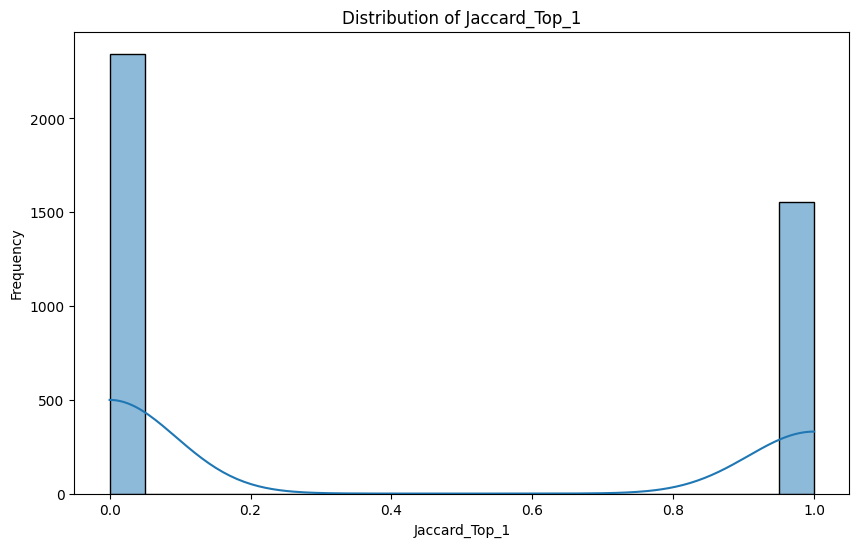

=== Statistical Summary for Jaccard_Top_1 ===
Mean: 0.39825506800102645
Standard Deviation: 0.4895385263822698
Median: 0.0
1st Quartile: 0.0
3rd Quartile: 1.0




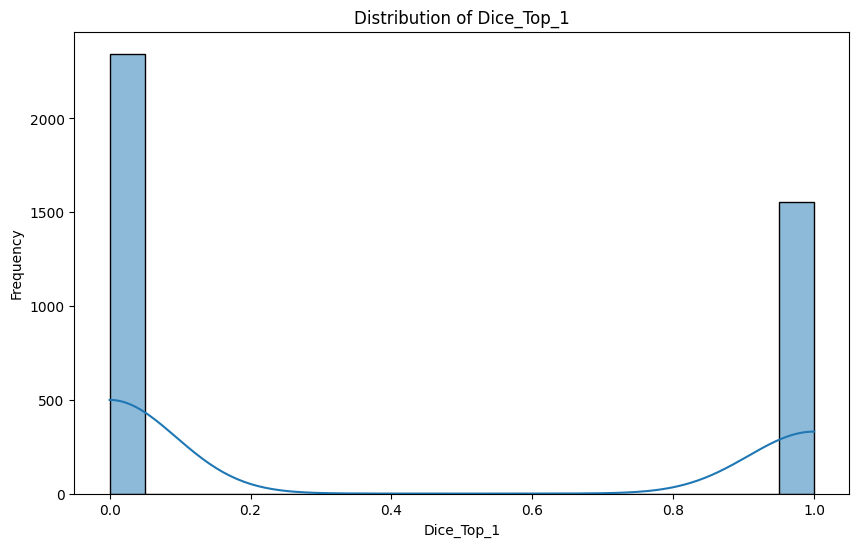

=== Statistical Summary for Dice_Top_1 ===
Mean: 0.39825506800102645
Standard Deviation: 0.4895385263822698
Median: 0.0
1st Quartile: 0.0
3rd Quartile: 1.0




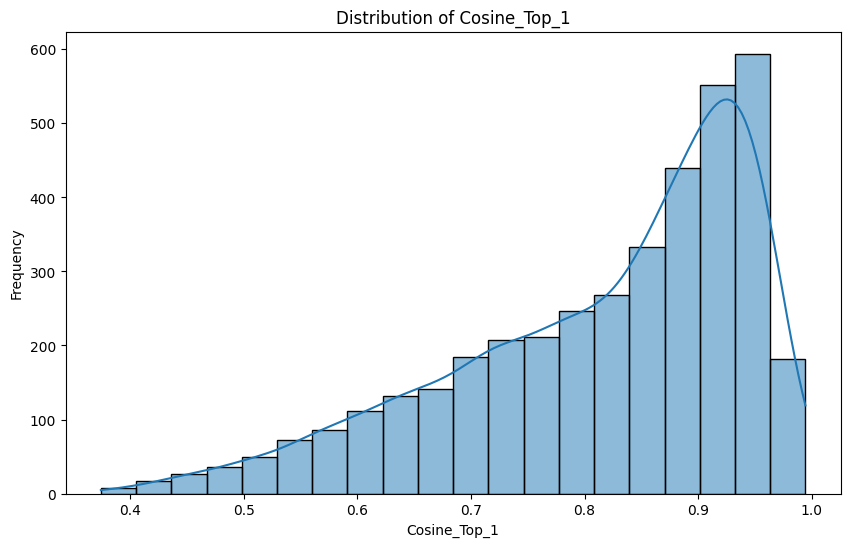

=== Statistical Summary for Cosine_Top_1 ===
Mean: 0.8152525983317362
Standard Deviation: 0.1303826874505375
Median: 0.8553672432899475
1st Quartile: 0.7308001667261124
3rd Quartile: 0.9212278425693512




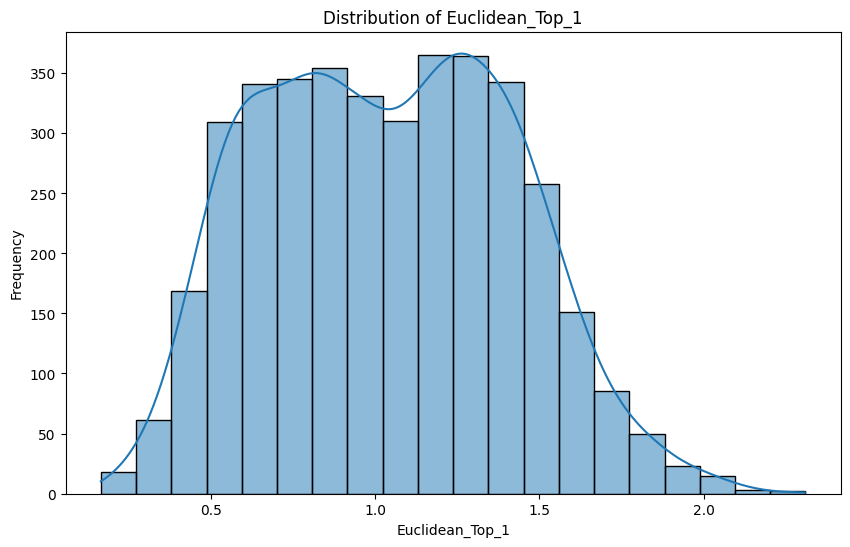

=== Statistical Summary for Euclidean_Top_1 ===
Mean: 1.0369704528739263
Standard Deviation: 0.38065076323665886
Median: 1.029848875018428
1st Quartile: 0.7224666417617207
3rd Quartile: 1.327750330986866




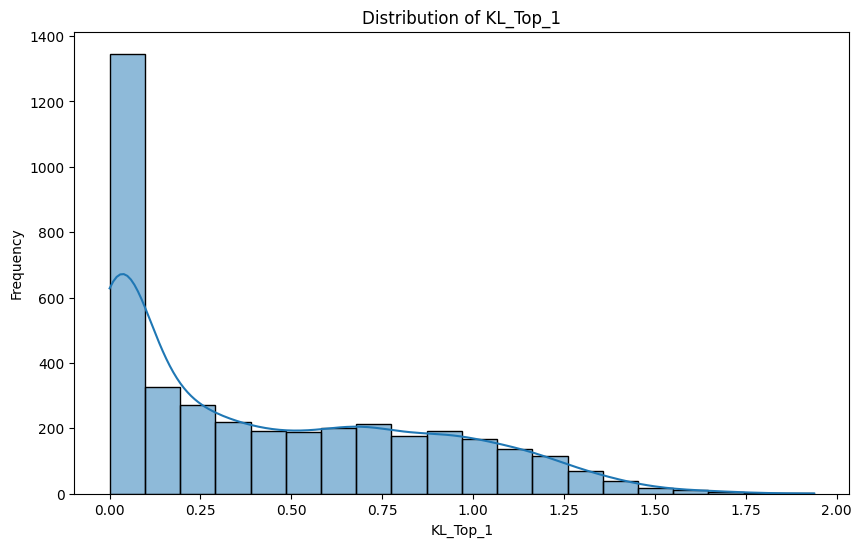

=== Statistical Summary for KL_Top_1 ===
Mean: 0.4299713345259757
Standard Deviation: 0.42394105503533464
Median: 0.29471319895741394
1st Quartile: 0.03381353533447317
3rd Quartile: 0.7533767314387666




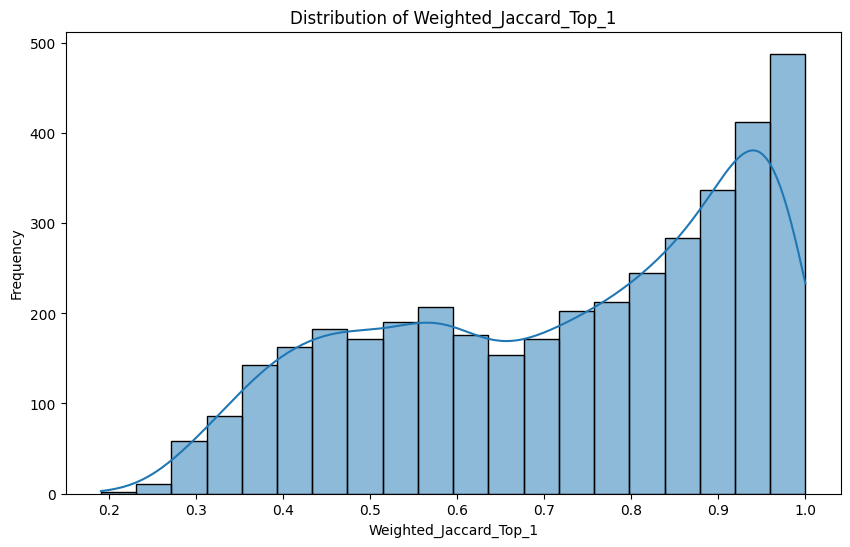

=== Statistical Summary for Weighted_Jaccard_Top_1 ===
Mean: 0.7221417565548505
Standard Deviation: 0.2070445956877699
Median: 0.7630942608988767
1st Quartile: 0.5475244895957432
3rd Quartile: 0.9106884137221148




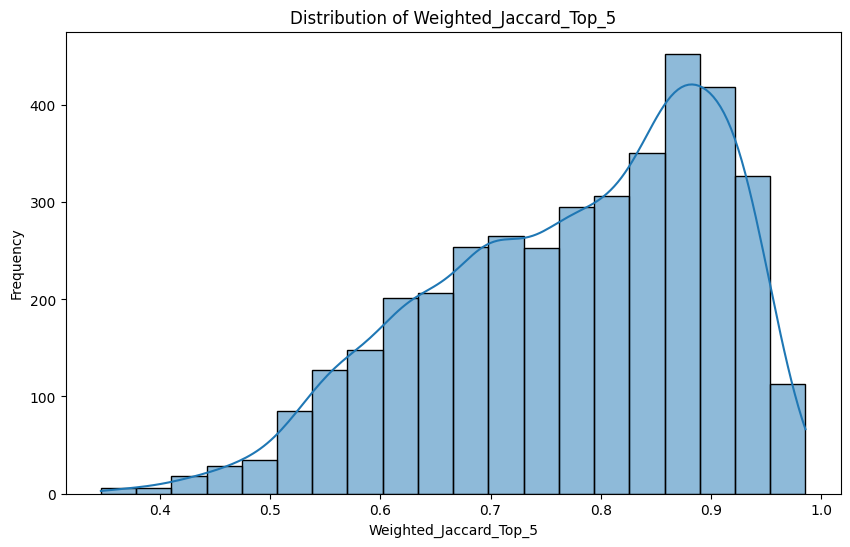

=== Statistical Summary for Weighted_Jaccard_Top_5 ===
Mean: 0.7744855196482195
Standard Deviation: 0.12812007189806154
Median: 0.7962827140901384
1st Quartile: 0.6827373687959191
3rd Quartile: 0.8804803793727592




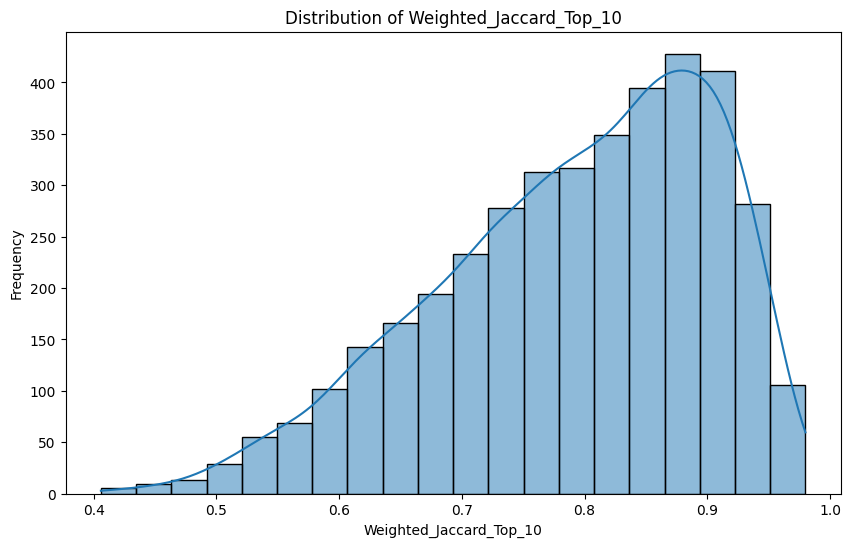

=== Statistical Summary for Weighted_Jaccard_Top_10 ===
Mean: 0.7912659065182313
Standard Deviation: 0.11193103784714385
Median: 0.809101569212658
1st Quartile: 0.7175164532011844
3rd Quartile: 0.8820273935054753




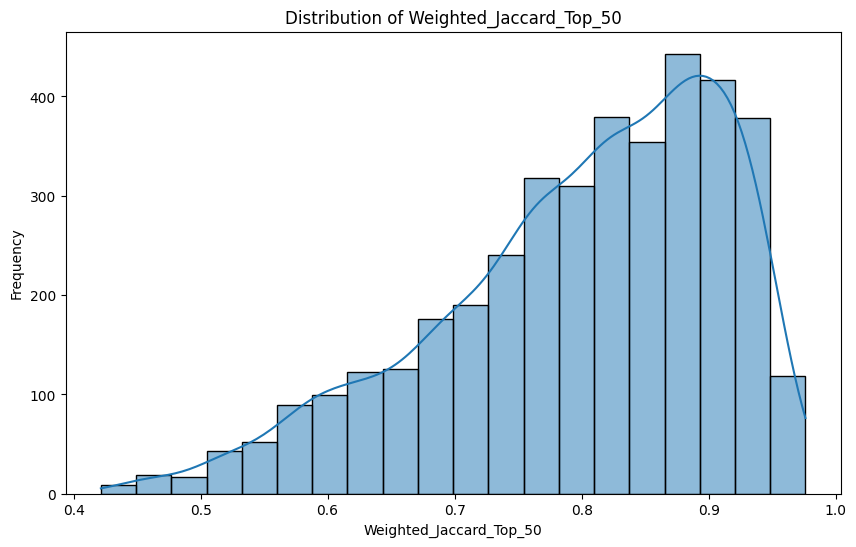

=== Statistical Summary for Weighted_Jaccard_Top_50 ===
Mean: 0.7989371721918888
Standard Deviation: 0.11287393371368473
Median: 0.8203688142299073
1st Quartile: 0.7306302328418227
3rd Quartile: 0.8885847731994556




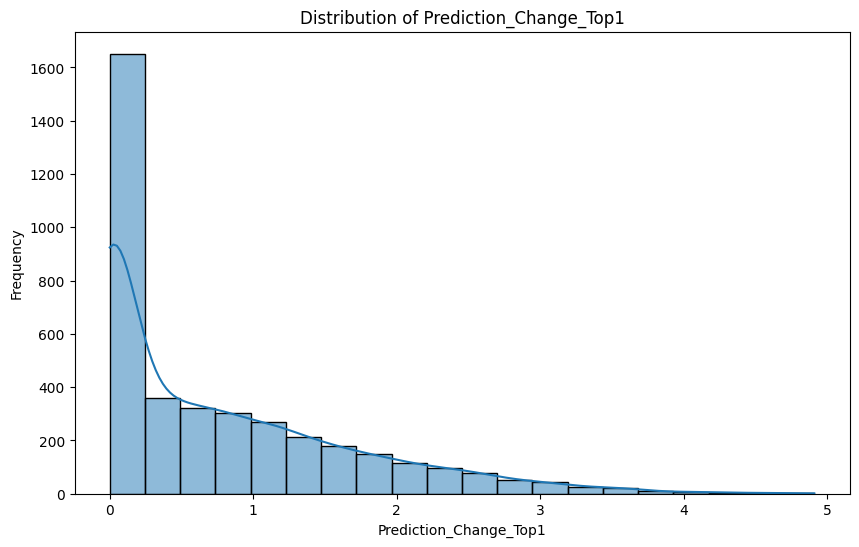

=== Statistical Summary for Prediction_Change_Top1 ===
Mean: 0.7602276486832881
Standard Deviation: 0.8929681553708433
Median: 0.44844257831573486
1st Quartile: 0.0
3rd Quartile: 1.2433412075042725




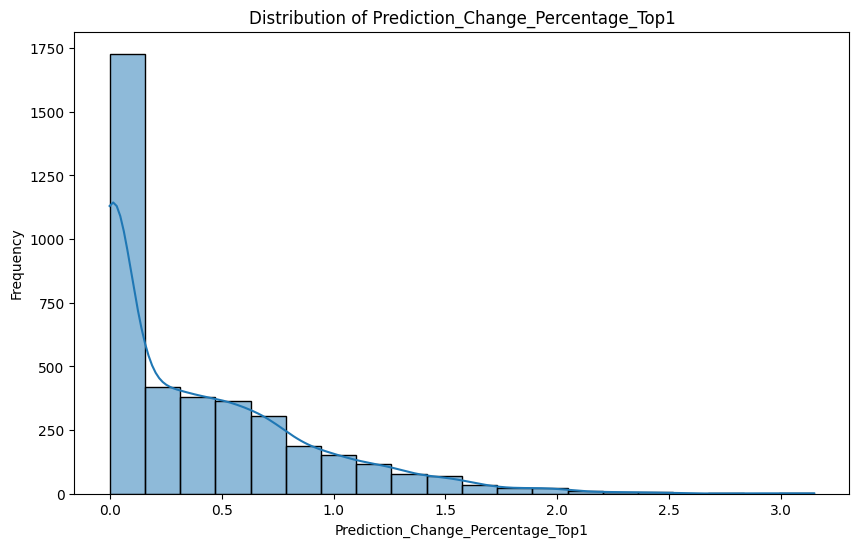

=== Statistical Summary for Prediction_Change_Percentage_Top1 ===
Mean: 0.3955667918284478
Standard Deviation: 0.4688482910810303
Median: 0.24052794277668
1st Quartile: 0.0
3rd Quartile: 0.6457459926605225




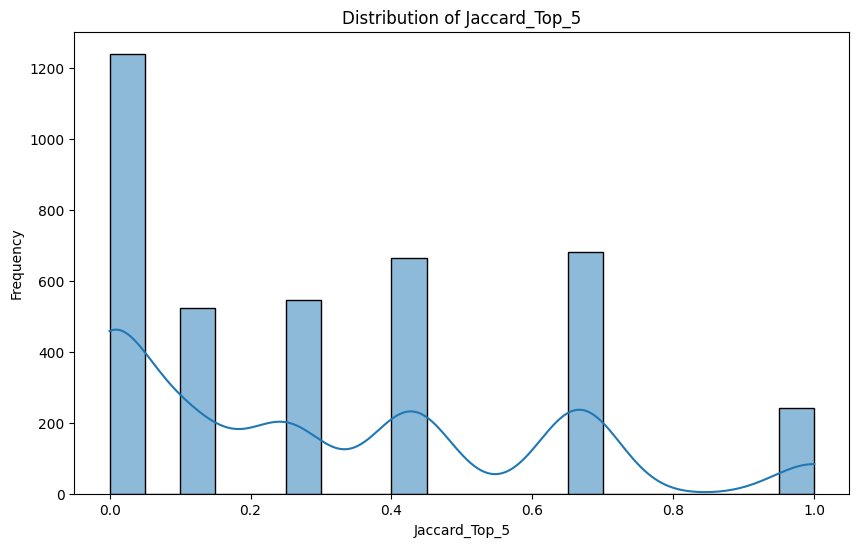

=== Statistical Summary for Jaccard_Top_5 ===
Mean: 0.30128283457767674
Standard Deviation: 0.3005335465645415
Median: 0.25
1st Quartile: 0.0
3rd Quartile: 0.42857142857142855




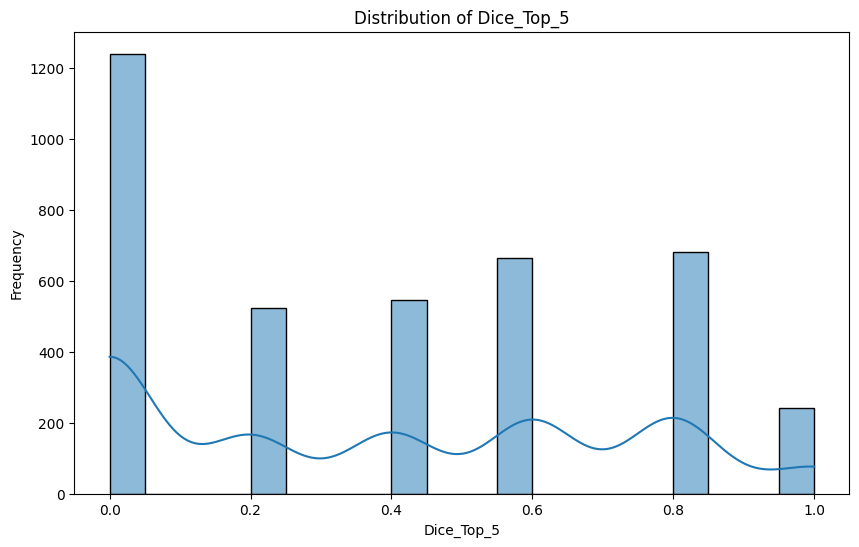

=== Statistical Summary for Dice_Top_5 ===
Mean: 0.3868103669489351
Standard Deviation: 0.33635354338645046
Median: 0.4
1st Quartile: 0.0
3rd Quartile: 0.6




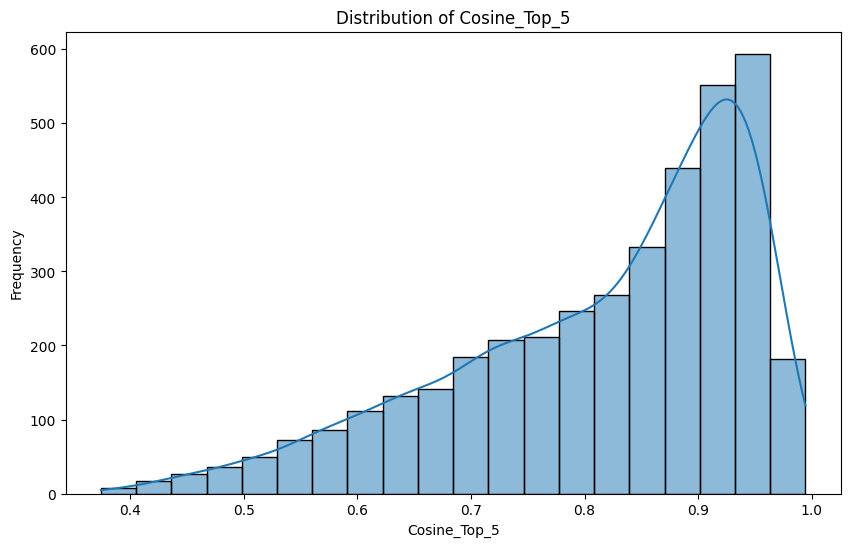

=== Statistical Summary for Cosine_Top_5 ===
Mean: 0.8152525983317362
Standard Deviation: 0.1303826874505375
Median: 0.8553672432899475
1st Quartile: 0.7308001667261124
3rd Quartile: 0.9212278425693512




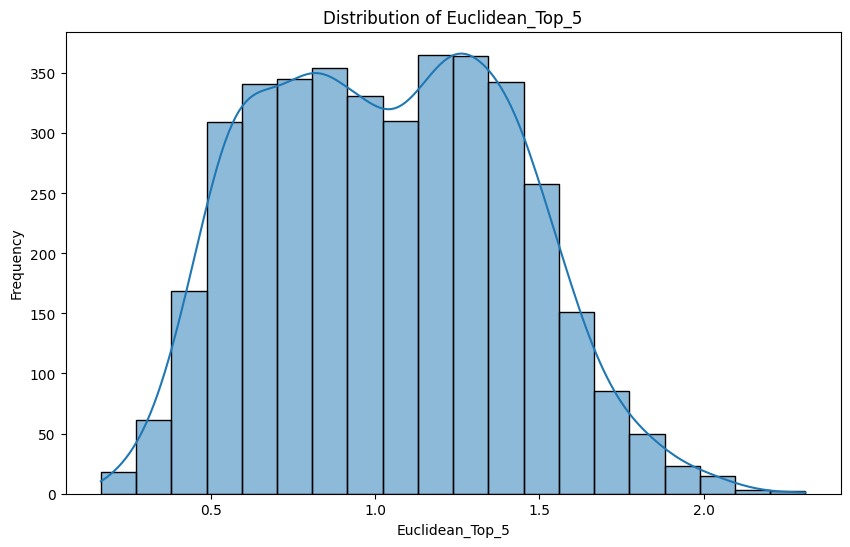

=== Statistical Summary for Euclidean_Top_5 ===
Mean: 1.0369704528739263
Standard Deviation: 0.38065076323665886
Median: 1.029848875018428
1st Quartile: 0.7224666417617207
3rd Quartile: 1.327750330986866




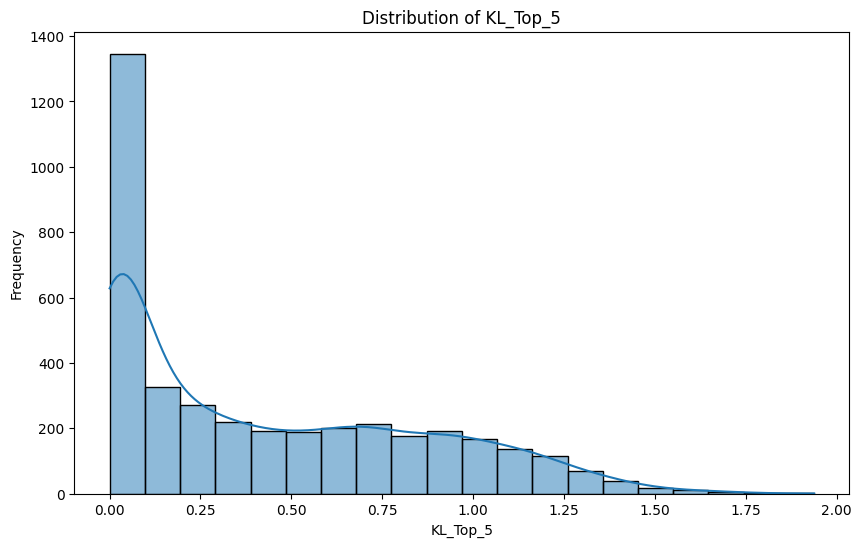

=== Statistical Summary for KL_Top_5 ===
Mean: 0.4299713345259757
Standard Deviation: 0.42394105503533464
Median: 0.29471319895741394
1st Quartile: 0.03381353533447317
3rd Quartile: 0.7533767314387666




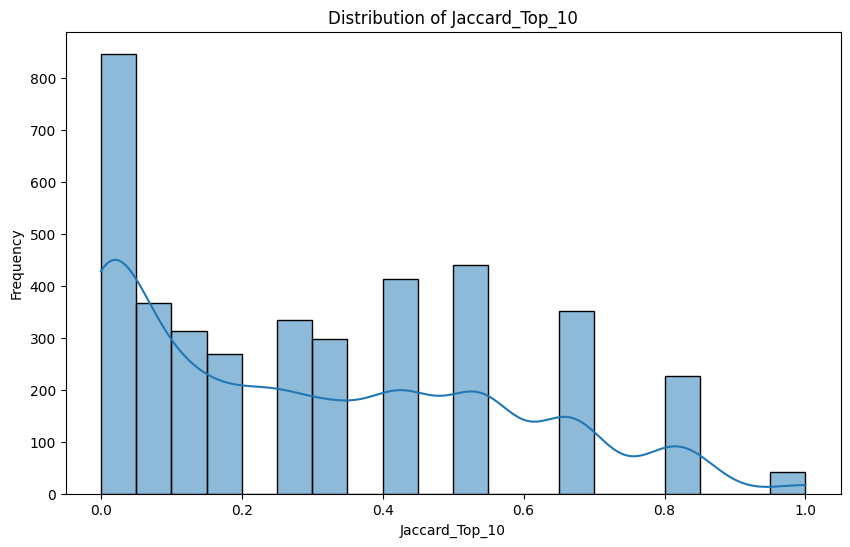

=== Statistical Summary for Jaccard_Top_10 ===
Mean: 0.2974039779649953
Standard Deviation: 0.26571381595090826
Median: 0.25
1st Quartile: 0.05263157894736842
3rd Quartile: 0.5384615384615384




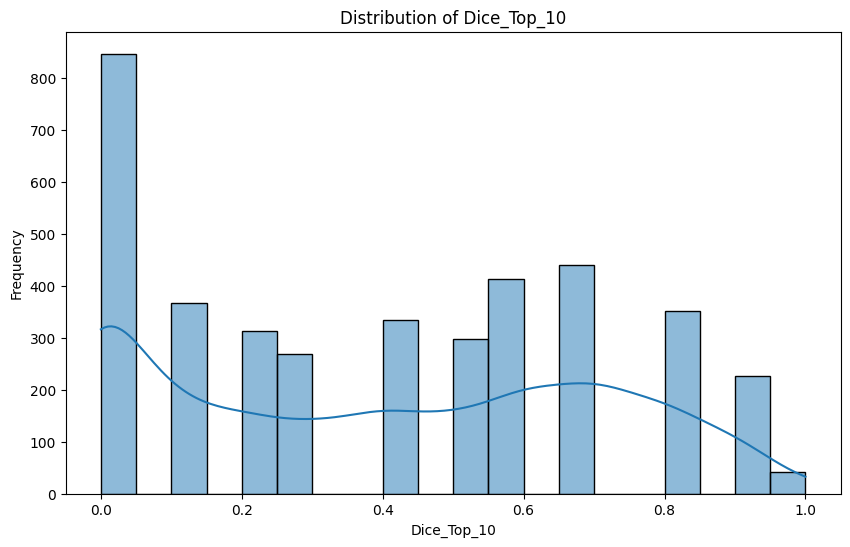

=== Statistical Summary for Dice_Top_10 ===
Mean: 0.396253528355145
Standard Deviation: 0.3082749363229068
Median: 0.4
1st Quartile: 0.1
3rd Quartile: 0.7




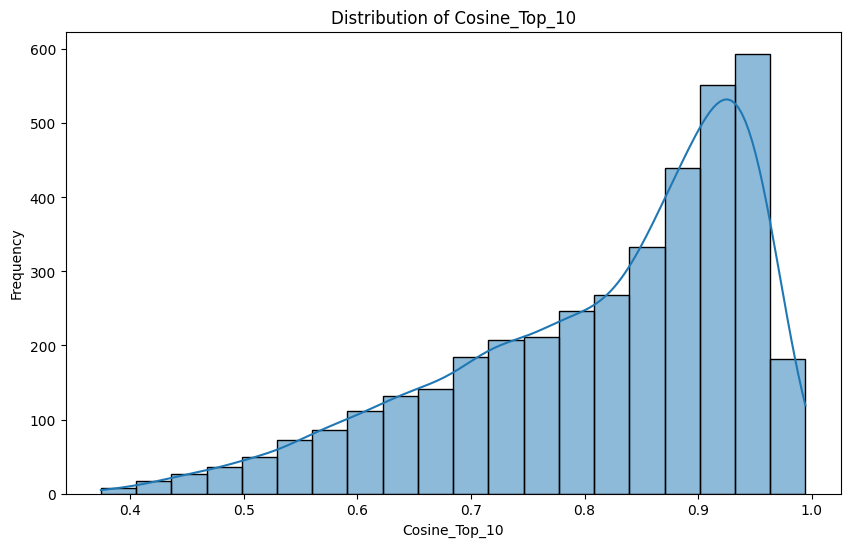

=== Statistical Summary for Cosine_Top_10 ===
Mean: 0.8152525983317362
Standard Deviation: 0.1303826874505375
Median: 0.8553672432899475
1st Quartile: 0.7308001667261124
3rd Quartile: 0.9212278425693512




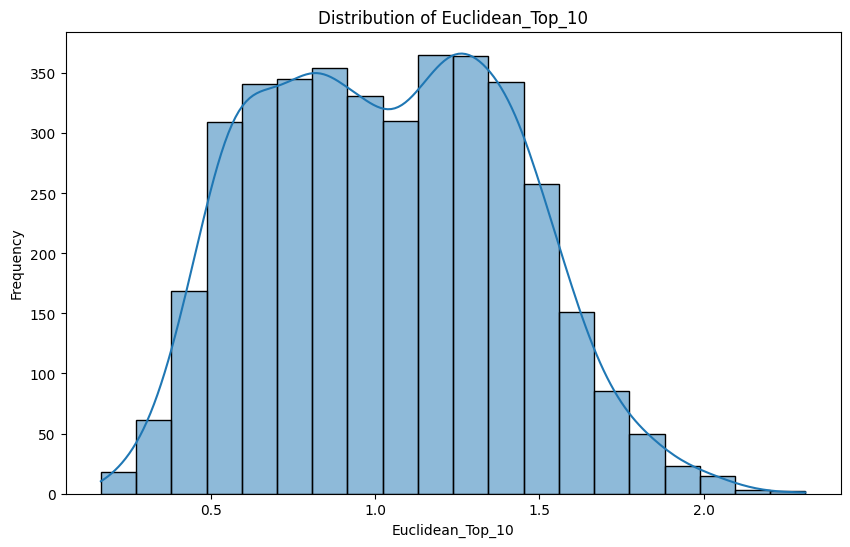

=== Statistical Summary for Euclidean_Top_10 ===
Mean: 1.0369704528739263
Standard Deviation: 0.38065076323665886
Median: 1.029848875018428
1st Quartile: 0.7224666417617207
3rd Quartile: 1.327750330986866




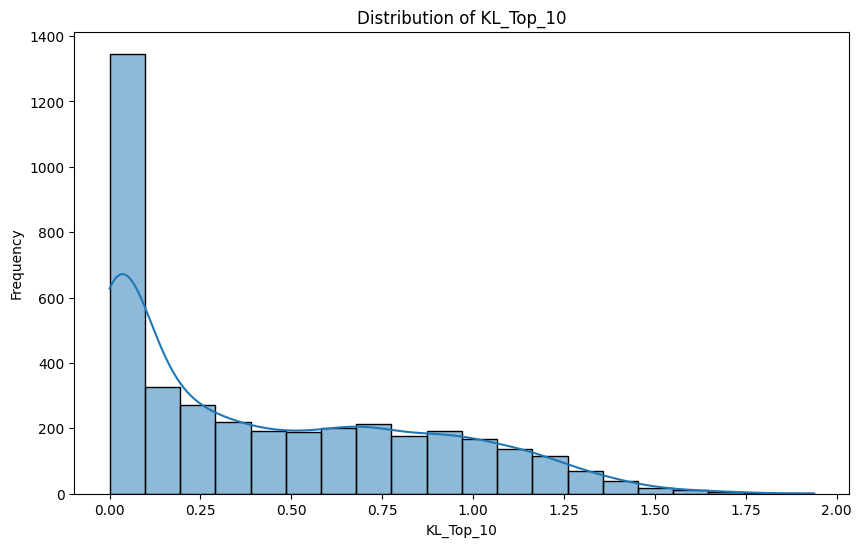

=== Statistical Summary for KL_Top_10 ===
Mean: 0.4299713345259757
Standard Deviation: 0.42394105503533464
Median: 0.29471319895741394
1st Quartile: 0.03381353533447317
3rd Quartile: 0.7533767314387666




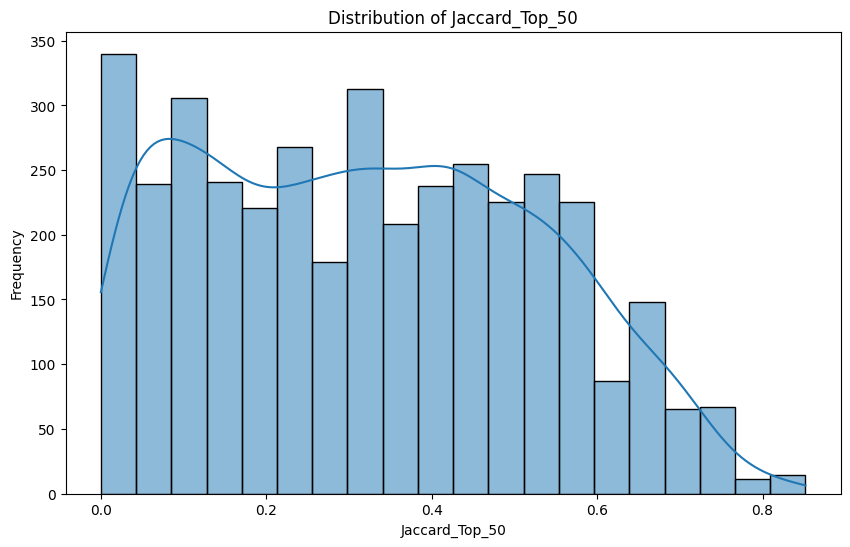

=== Statistical Summary for Jaccard_Top_50 ===
Mean: 0.322679055234162
Standard Deviation: 0.203163403280394
Median: 0.3157894736842105
1st Quartile: 0.14942528735632185
3rd Quartile: 0.4925373134328358




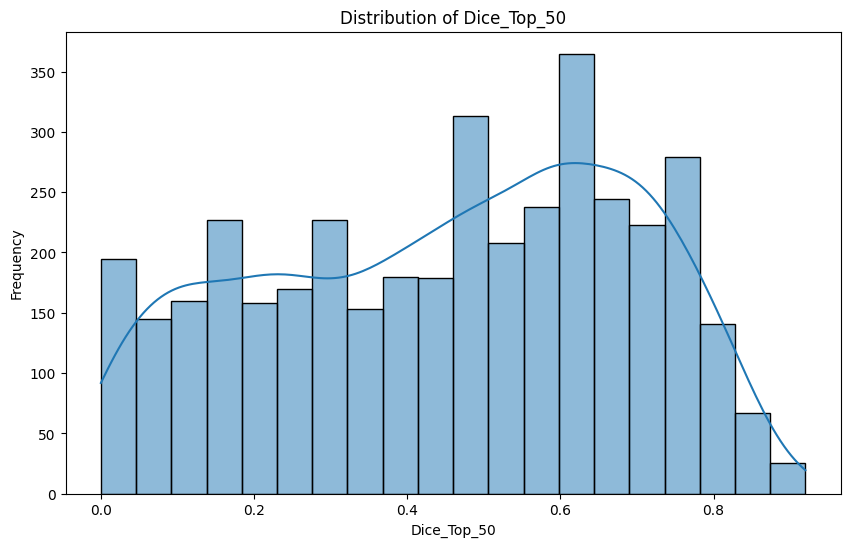

=== Statistical Summary for Dice_Top_50 ===
Mean: 0.4517321016166282
Standard Deviation: 0.23817607785658912
Median: 0.48
1st Quartile: 0.26
3rd Quartile: 0.66




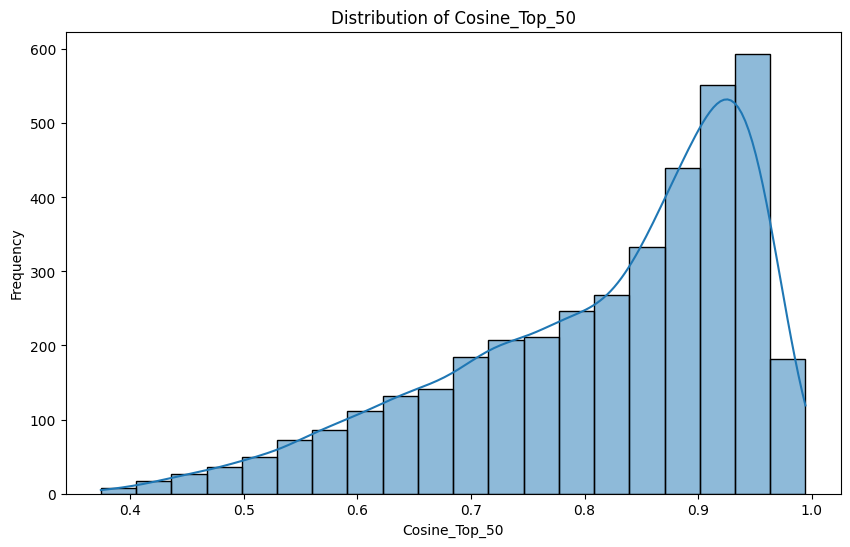

=== Statistical Summary for Cosine_Top_50 ===
Mean: 0.8152525983317362
Standard Deviation: 0.1303826874505375
Median: 0.8553672432899475
1st Quartile: 0.7308001667261124
3rd Quartile: 0.9212278425693512




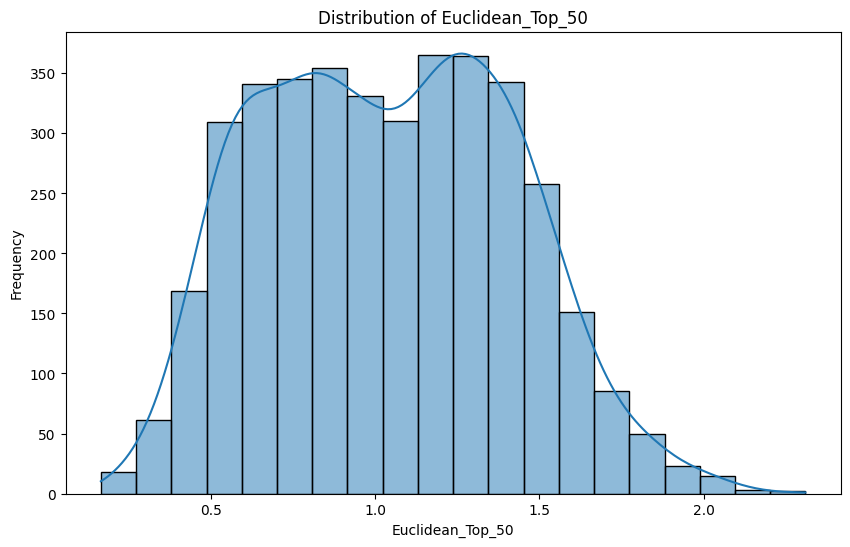

=== Statistical Summary for Euclidean_Top_50 ===
Mean: 1.0369704528739263
Standard Deviation: 0.38065076323665886
Median: 1.029848875018428
1st Quartile: 0.7224666417617207
3rd Quartile: 1.327750330986866




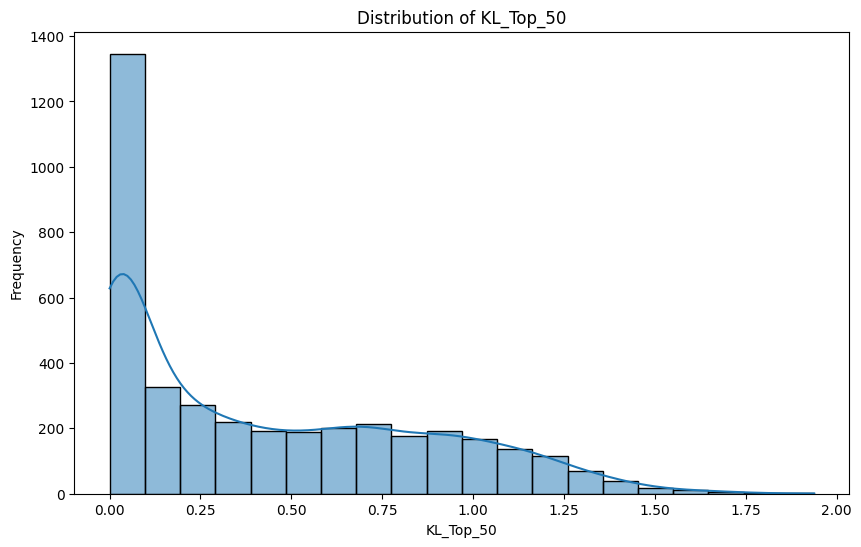

=== Statistical Summary for KL_Top_50 ===
Mean: 0.4299713345259757
Standard Deviation: 0.42394105503533464
Median: 0.29471319895741394
1st Quartile: 0.03381353533447317
3rd Quartile: 0.7533767314387666




In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 这是一个用于数据可视化的Python库

# 初始化一个用于存储所有度量数据的字典
all_metrics = {}

# 指定保存.npy文件的根目录
root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/evaluation/google/vit-large-patch32-384/GradCAM"

# 遍历根目录下的所有子目录
for subfolder in os.listdir(root_folder):
    subfolder_path = os.path.join(root_folder, subfolder)
    
    # 检查是否为目录
    if os.path.isdir(subfolder_path):
        npy_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
        
        # 检查.npy文件是否存在
        if os.path.exists(npy_file_path):
            # 加载.npy文件
            metrics = np.load(npy_file_path, allow_pickle=True).item()
            
            # 将这些度量值添加到all_metrics字典中
            for key, value in metrics.items():
                if key not in all_metrics:
                    all_metrics[key] = []
                all_metrics[key].append(value)

# 绘制直方图和进行统计分析
for metric, values in all_metrics.items():
    if 'Prediction_Change_Top_1' not in metric and 'Prediction_Change_Percentage_Top_1' not in metric:
        plt.figure(figsize=(10, 6))
        
        # 使用Seaborn库绘制带有KDE的直方图
        sns.histplot(values, bins=20, kde=True)
        
        plt.title(f'Distribution of {metric}')
        plt.xlabel(metric)
        plt.ylabel('Frequency')
        
        # 显示图像
        plt.show()
        
        # 统计分析
        mean_value = np.mean(values)
        std_dev = np.std(values)
        median_value = np.median(values)
        quartiles = np.percentile(values, [25, 75])
        
        print(f"=== Statistical Summary for {metric} ===")
        print(f"Mean: {mean_value}")
        print(f"Standard Deviation: {std_dev}")
        print(f"Median: {median_value}")
        print(f"1st Quartile: {quartiles[0]}")
        print(f"3rd Quartile: {quartiles[1]}")
        print("\n")




In [4]:
# # Importing required libraries
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import os
# import pandas as pd

# # Helper function to read all similarity metrics saved as .npy files into a list of dictionaries
# def read_saved_metrics(root_folder):
#     all_similarities = []
#     for subfolder in os.listdir(root_folder):
#         subfolder_path = os.path.join(root_folder, subfolder)
#         if os.path.isdir(subfolder_path):
#             similarity_file_path = os.path.join(subfolder_path, 'similarity_metrics.npy')
#             if os.path.exists(similarity_file_path):
#                 similarities = np.load(similarity_file_path, allow_pickle=True).item()
#                 all_similarities.append(similarities)
#     return all_similarities

# # Root folder where all the similarity metrics are saved
# root_folder = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked"  # Replace with your directory

# # Read the saved metrics
# all_similarities = read_saved_metrics(root_folder)

# # Convert the list of dictionaries to a DataFrame for easier manipulation
# df = pd.DataFrame(all_similarities)

# # Visualization and Analysis
# metrics_to_analyze = ["Jaccard_Top_1", "Dice_Top_1", "Cosine_Top_1", "Euclidean_Top_1", "KL_Top_1"]

# # Histograms
# for metric in metrics_to_analyze:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[metric], bins=20, kde=True)
#     plt.title(f'Distribution of {metric}')
#     plt.xlabel(metric)
#     plt.ylabel('Frequency')
#     plt.show()

# # Boxplots/Violin plots
# for metric in metrics_to_analyze:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df[metric])
#     plt.title(f'Boxplot of {metric}')
#     plt.xlabel(metric)
#     plt.show()

# # Heatmap for correlation
# correlation_matrix = df[metrics_to_analyze].corr()
# plt.figure(figsize=(10, 6))
# sns.heatmap(correlation_matrix, annot=True)
# plt.title('Heatmap of Correlations Between Metrics')
# plt.show()

# # Statistical Analysis
# for metric in metrics_to_analyze:
#     mean = df[metric].mean()
#     std_dev = df[metric].std()
#     median = df[metric].median()
#     q1 = df[metric].quantile(0.25)
#     q3 = df[metric].quantile(0.75)
    
#     print(f"{metric}: Mean = {mean}, Std Dev = {std_dev}, Median = {median}, Q1 = {q1}, Q3 = {q3}")

# # For further analysis like clustering or anomaly detection, you can proceed with df DataFrame
# # df now contains all your similarity metrics and can be used for advanced statistical methods.


In [5]:
# # Importing the necessary libraries to read and display .npy file contents
# import numpy as np

# def display_npy_file_content(npy_file_path):
#     """
#     Display the content of a .npy file.
#     """
#     if not os.path.exists(npy_file_path):
#         return f"File {npy_file_path} doesn't exist."
#     npy_content = np.load(npy_file_path, allow_pickle=True).item()
#     return npy_content

# # Sample usage
# # Assuming the file path is "/path/to/your/file.npy"
# file_path = "/home/workstation/code/XAImethods/hf_cam_dev/results/masked/ILSVRC2012_val_00000171/original_scores.npy"

# # Display the content
# content = display_npy_file_content(file_path)
# content
